<a href="https://colab.research.google.com/github/ShubhKansara/Vector-Search/blob/main/Products_Searching(vector_based_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSTALL THE TRANSFORMTERS LIBRARY.**

In [ ]:
!pip install  sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 7.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# **library initialization and select model**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import json

# Load the pre-trained SentenceTransformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# **INITIALIZE DATA**

In [ ]:
data = [{'product_id': '1', 'title': 'Potato - બટાકા', 'related_keywords': 'Potato, Aalo, Alo, Aalu, Batata, Bateka, B, Bat, Bataka, A, P'}, {'product_id': '2', 'title': 'Potato - બટાકા', 'related_keywords': 'Potato, Aalo, Alo, Aalu, Batata, Bateka, bataka'}, {'product_id': '3', 'title': 'Potato - બટાકા', 'related_keywords': 'Potato, Aalo, Alo, Aalu, Batata, Bateka'}, {'product_id': '4', 'title': 'Small Potato - નાના બટાકા', 'related_keywords': 'Small Potato, Nana Potato, Chota Aalo, Nana Batata, Nana Bateka'}, {'product_id': '5', 'title': 'Small Potato - નાના બટાકા', 'related_keywords': 'Small Potato, Nana Potato, Chota Aalo, Nana Batata, Nana Bateka'}, {'product_id': '6', 'title': 'Onion - ડુંગળી', 'related_keywords': 'Onion, Pyaj, Dungri, Dungli, O, Oni, D, Dun, Dungari, Dungadi, P, Payaz, Pay'}, {'product_id': '7', 'title': 'Onion - ડુંગળી', 'related_keywords': 'Onion, Pyaj, Dungri, Dungli, Pyaz, Dungdi'}, {'product_id': '8', 'title': 'Onion - ડુંગળી', 'related_keywords': 'Onion, Pyar, Dungri, Dungli'}, {'product_id': '9', 'title': 'Tameta - ટામેટા', 'related_keywords': 'Tomato, Tameta, Tamatar, Tomata, T, Tom, Tam'}, {'product_id': '10', 'title': 'Tameta - ટામેટા', 'related_keywords': 'Tomato, Tameta, Tamatar'}, {'product_id': '11', 'title': 'Tameta - ટામેટા', 'related_keywords': 'Tomato, Tameta, Tamatar'}, {'product_id': '12', 'title': 'Bhinda - ભીંડા', 'related_keywords': 'Bhindi, Bhinda, Lady Finger, Okra, B, Bhi, Fresh Bhinda, B, Bhi'}, {'product_id': '13', 'title': 'Bhinda - ભીંડા', 'related_keywords': 'Bhindi, Bhinda, Lady Finger, Okra'}, {'product_id': '14', 'title': 'Bhinda - ભીંડા', 'related_keywords': 'Bhindi, Bhinda, Lady Finger, Okra'}, {'product_id': '15', 'title': 'Marcha - મરચા', 'related_keywords': ''}, {'product_id': '16', 'title': 'Marcha - મરચા', 'related_keywords': 'Marcha, Mirch, Chilly, Green Chilly, Hari Mirch, Marchu, M, Mar'}, {'product_id': '17', 'title': 'Marcha - મરચા', 'related_keywords': 'Marcha, Mirch, Chilly, Green Chilly, Hari Mirch, Lila Marcha, Leela mracha, M, Mar'}, {'product_id': '18', 'title': 'Marcha - મરચા 50 GM', 'related_keywords': 'Marcha, Mirch, Chilly, Green Chilly, Hari Mirch'}, {'product_id': '19', 'title': 'Pikador Marcha - પિકાડોર મરચા', 'related_keywords': 'Pikador mirch, Moti Mirch, Aachar Mirch, Big Chilly, Green Big Chilly, P, Pikodar'}, {'product_id': '20', 'title': 'Pikador Marcha - પિકાડોર મરચા', 'related_keywords': 'Pikador mirch, Moti Mirch, Aachar Mirch, Big Chilly, Green Big Chilly'}, {'product_id': '21', 'title': 'Pikador Marcha - પિકાડોર મરચા', 'related_keywords': 'Pikador mirch, Moti Mirch, Aachar Mirch, Big Chilly, Green Big Chilly'}, {'product_id': '22', 'title': 'Nana Marcha - નાના મરચા', 'related_keywords': 'Nana Marcha, Small Chilly, Choti Mirch, Small Mirch, Small Mircha, M, Marcha'}, {'product_id': '23', 'title': 'Nana Marcha - નાના મરચા', 'related_keywords': 'Nana Marcha, Small Chilly, Choti Mirch, Small Mirch, Small Mircha'}, {'product_id': '24', 'title': 'Nana Marcha - નાના મરચા', 'related_keywords': 'Nana Marcha, Small Chilly, Choti Mirch, Small Mirch, Small Mircha'}, {'product_id': '25', 'title': 'Nana Marcha - નાના મરચા', 'related_keywords': 'Nana Marcha, Small Chilly, Choti Mirch, Small Mirch, Small Mircha'}, {'product_id': '26', 'title': 'Kothmir - કોથમીર', 'related_keywords': 'Kothmir, Dhaniya, Cilantro, Hara Dhaniya, Dhana, K, Koth, D, Dhaniya, Dhan'}, {'product_id': '27', 'title': 'Kothmir - કોથમીર', 'related_keywords': 'Kothmir, Dhaniya, Cilantro, Hara Dhaniya, Dhana'}, {'product_id': '28', 'title': 'Kothmir - કોથમીર', 'related_keywords': 'Kothmir, Dhaniya, Cilantro, Hara Dhaniya'}, {'product_id': '29', 'title': 'Kothmir - કોથમીર 50 GM', 'related_keywords': 'kothmir, dhana, Coriander, fresh dhana, fresh Coriander, chopped dhana, kothmi'}, {'product_id': '30', 'title': 'Fudino - ફુદિનો', 'related_keywords': 'Fudino, Pudino, Mint, Mint Leaves, Fudina, P, F, Fud, Fudino'}, {'product_id': '31', 'title': 'Fudino - ફુદિનો', 'related_keywords': 'Fudino, Pudino, Mint, Mint Leaves'}, {'product_id': '32', 'title': 'Fudino - ફુદિનો', 'related_keywords': 'Fudino, Pudino, Mint, Mint Leaves'}, {'product_id': '473', 'title': 'Long Diamond Necklace', 'related_keywords': 'Long Diamond Necklace, Diamond Necklace, Necklace'}, {'product_id': '472', 'title': 'Diamond Earring', 'related_keywords': 'Diamond Earring, Earring'}, {'product_id': '41', 'title': 'Arbi Patta - અરબી પતા 100 GM', 'related_keywords': 'Arbi Patta, Arbi, Rickwach'}, {'product_id': '42', 'title': 'Arbi Patta - અરબી પતા', 'related_keywords': 'Arbi Patta, Arbi, Rickwach'}, {'product_id': '43', 'title': 'Arbi Patta - અરબી પતા', 'related_keywords': 'Arbi Patta, Arbi, Rickwach'}, {'product_id': '44', 'title': 'Arbi Patta - અરબી પતા', 'related_keywords': 'Arbi Patta, Arbi, Rickwach'}, {'product_id': '45', 'title': 'Lemon - લીંબુ', 'related_keywords': 'Lemon, Nimbu, Citrus, Limbu, Lembu, Limbu, Nembu, L, Lim, Nim'}, {'product_id': '46', 'title': 'Lemon - લીંબુ', 'related_keywords': 'Lemon, Nimbu, Citrus'}, {'product_id': '47', 'title': 'Lemon - લીંબુ', 'related_keywords': 'Lemon, Nimbu, Citrus'}, {'product_id': '48', 'title': 'Adu - આદુ', 'related_keywords': 'Adu, Adrak, Ginger, A, G, Adr, Gin'}, {'product_id': '49', 'title': 'Adu - આદુ', 'related_keywords': 'Adu, Adrak, Ginger'}, {'product_id': '50', 'title': 'Adu - આદુ', 'related_keywords': 'Adu, Adrak, Ginger'}, {'product_id': '51', 'title': 'Beet - બીટ', 'related_keywords': 'Beet, Beetroot, Beat, Bit, B, Be'}, {'product_id': '52', 'title': 'Beet - બીટ', 'related_keywords': 'Beet, Beetroot, Beat, Bit'}, {'product_id': '53', 'title': 'Beet - બીટ', 'related_keywords': 'Beet, Beetroot, Beat, Bit'}, {'product_id': '54', 'title': 'Cabbage - કોબીજ', 'related_keywords': 'Cabbage, Patta Gobi, Gobi, Kobi, Kobij, Kubi, G, C, G, K'}, {'product_id': '55', 'title': 'American Corn - અમેરિકન મકાઈ', 'related_keywords': 'American corn, corn, makai, makai doda, Bhutta, C, Cor, M, Maka'}, {'product_id': '56', 'title': 'Flower - ફ્લાવર', 'related_keywords': 'Flower, Cauliflower, Gobi, Fool Gobi, Fulavar, F, G, C, Cau'}, {'product_id': '57', 'title': 'Ravaiya - ૨વૈયા', 'related_keywords': 'Ravaiya, Egg Plant, Hara Began, Nana Ringan, Small Ringan, R, Rai, Rin'}, {'product_id': '58', 'title': 'Ravaiya - ૨વૈયા', 'related_keywords': 'Ravaiya, Egg Plant, Hara Began, Ringan'}, {'product_id': '59', 'title': 'Ravaiya - ૨વૈયા', 'related_keywords': 'Ravaiya, Egg Plant, Hara Began, Ringan'}, {'product_id': '60', 'title': 'Kankoda - કંકોડા', 'related_keywords': 'Kankoda, Spiny gourd, Kantola, Ringan, Kankora, K, Kan'}, {'product_id': '61', 'title': 'Kankoda - કંકોડા', 'related_keywords': 'Kankoda, Spiny gourd, Kantola'}, {'product_id': '62', 'title': 'Kankoda - કંકોડા', 'related_keywords': 'Kankoda, Spiny gourd, Kantola'}, {'product_id': '63', 'title': 'Khira Kakadi - ખીરા કાકડી', 'related_keywords': 'Khira, Kakadi, Chopped Kakadi'}, {'product_id': '64', 'title': 'Khira Kakadi - ખીરા કાકડી', 'related_keywords': 'Khira, Kakadi, Chopped Khira'}, {'product_id': '65', 'title': 'Khira Kakadi - ખીરા કાકડી ', 'related_keywords': 'Khira, Kakadi, Chopped Khira'}, {'product_id': '66', 'title': 'Bhatta - ભટ્ટા', 'related_keywords': 'Bhatta, Brinjal, Began, Bhartha Began, Gor ringan'}, {'product_id': '67', 'title': 'Bhatta - ભટ્ટા', 'related_keywords': 'Bhatta, Brinjal, Began, Bhartan Began'}, {'product_id': '68', 'title': 'Bhatta - ભટ્ટા', 'related_keywords': 'Bhatta, Brinjal, Began, Bhartan Began'}, {'product_id': '69', 'title': 'Dudhi - દુધી ', 'related_keywords': 'Dudhi, Lauki, Bottle gourd, Loki, D, Dud, Loki, Lok, Lau'}, {'product_id': '876', 'title': 'Cadbury Chocobakes - 75 GM', 'related_keywords': 'Cadbury, Chocolate, Chocobakes'}, {'product_id': '875', 'title': 'Cadbury Celebration Pack - 50 Rs', 'related_keywords': 'Cadbury, Cadbury Celebration Pack, Diwali Chocolate, Diwali Celebration Pack'}, {'product_id': '874', 'title': 'Ratalu', 'related_keywords': 'Ratalu, Yam, Ratadu, Rataru, R, Rat'}, {'product_id': '73', 'title': 'Turiya - તુરીયા', 'related_keywords': 'Turiya, Galka, Torai, G, Gal, Tur, T'}, {'product_id': '74', 'title': 'Turiya - તુરીયા', 'related_keywords': 'Turiya, Galka, Torai'}, {'product_id': '75', 'title': 'Turiya - તુરીયા', 'related_keywords': 'Turiya, Galka, Torai'}, {'product_id': '76', 'title': 'Fansi - ફણસી', 'related_keywords': 'Fansi, Beans, Farsi, Fadsi, F, Far'}, {'product_id': '77', 'title': 'Fansi - ફણસી', 'related_keywords': 'Fansi, Beans, Guar, Farsi'}, {'product_id': '78', 'title': 'Fansi - ફણસી', 'related_keywords': 'Fansi, Beans, Guar, Farsi'}, {'product_id': '79', 'title': 'Suran - સુરણ', 'related_keywords': 'Suran, Jimikand, Yam, S, Su'}, {'product_id': '80', 'title': 'Suran - સુરણ', 'related_keywords': 'Suran, Jimikand, Yam'}, {'product_id': '81', 'title': 'Vatana - વટાણા', 'related_keywords': 'Vatana, Matar, Peas, Green Peas, Hara Matar, Lila vatana, Vat, V, M, Mat'}, {'product_id': '82', 'title': 'Vatana - વટાણા', 'related_keywords': 'Vatana, Matar, Peas, Green Peas, Hara Matar, Lila vatana'}, {'product_id': '83', 'title': 'Vatana - વટાણા', 'related_keywords': 'Vatana, Matar, Peas, Green Peas, Hara Matar, Lila vatana'}, {'product_id': '84', 'title': 'Tuver - તુવેર', 'related_keywords': 'Tuver, Toor, Tuer, Lili Tuver, T, Tu, To, Green Tuver'}, {'product_id': '85', 'title': 'Tuver - તુવેર', 'related_keywords': 'Tuver, Toor, Tuer, Lili Tuver'}, {'product_id': '86', 'title': 'Tuver - તુવેર', 'related_keywords': 'Tuver, Toor, Tuer, Lili Tuver'}, {'product_id': '87', 'title': 'Pili Haldar -  પીળી હળદર', 'related_keywords': 'Pili Haldar, Peeli Haldi, Yellow Turmeric, Hardar, Hardar, Lili Hardar, H'}, {'product_id': '88', 'title': 'Pili Haldar -  પીળી હળદર', 'related_keywords': 'Pili Haldar, Peeli Haldi, Yellow Turmeric, Hardar'}, {'product_id': '89', 'title': 'Pili Haldar -  પીળી હળદર', 'related_keywords': 'Pili Haldar, Peeli Haldi, Yellow Turmeric, Hardar'}, {'product_id': '90', 'title': 'Amba Haldar -   આંબા હળદર', 'related_keywords': 'Amba Haldar, Turmeric, Lili Hardar, Green Tumeric, A, H'}, {'product_id': '91', 'title': 'Amba Haldar -   આંબા હળદર', 'related_keywords': 'Amba Haldar, Turmeric, Lili Hardar, Green Tumeric'}, {'product_id': '92', 'title': 'Amba Haldar -   આંબા હળદર', 'related_keywords': 'Amba Haldar, Turmeric, Lili Hardar, Green Tumeric'}, {'product_id': '93', 'title': 'Kakadi - કાકડી', 'related_keywords': 'Kakadi, Khira, Cucumber'}, {'product_id': '94', 'title': 'Kakadi - કાકડી', 'related_keywords': 'Kakadi, Khira'}, {'product_id': '95', 'title': 'Kakadi - કાકડી', 'related_keywords': 'Kakadi, Khira'}, {'product_id': '96', 'title': 'Saragvo - સરગવો', 'related_keywords': 'Saragvo, Drumstick, Moringa, Sehjan, Sadgavo, S, Sar'}, {'product_id': '97', 'title': 'Saragvo - સરગવો', 'related_keywords': 'Saragvo, Drumstick, Moringa, Sehjan'}, {'product_id': '98', 'title': 'Saragvo - સરગવો', 'related_keywords': 'Saragvo, Drumstick, Moringa, Sehjan'}, {'product_id': '99', 'title': 'Simala Marcha - સિમલા', 'related_keywords': 'Shimla Marcha, Shimla Mirch, Capsicum, Shimla, Lila shimla, S, M, Shi'}, {'product_id': '100', 'title': 'Simala Marcha - સિમલા', 'related_keywords': 'Shimla Marcha, Shimla Mirch, Capsicum, Shimla'}, {'product_id': '101', 'title': 'Simala Marcha - સિમલા', 'related_keywords': 'Shimla Marcha, Shimla Mirch, Capsicum, Shimla'}, {'product_id': '102', 'title': 'Chori - ચોળી', 'related_keywords': 'Chori, Chauli, Green Bean, C, Cho, Choli'}, {'product_id': '103', 'title': 'Chori - ચોળી', 'related_keywords': 'Chori, Chauli'}, {'product_id': '104', 'title': 'Chori - ચોળી', 'related_keywords': 'Chori, Chauli'}, {'product_id': '105', 'title': 'Parvar - પરવર', 'related_keywords': 'Parvar, Parval, Pointed Gourd, Parvad, Par'}, {'product_id': '106', 'title': 'Parvar - પરવર', 'related_keywords': 'Parvar, Parval, Pointed Gourd'}, {'product_id': '107', 'title': 'Parvar - પરવર', 'related_keywords': 'Parvar, Parval, Pointed Gourd'}, {'product_id': '108', 'title': 'Gavar - ગવાર', 'related_keywords': 'Gavar, Guar, Gavar, Cluster Beans, G, Gav, Guar'}, {'product_id': '109', 'title': 'Gavar - ગવાર', 'related_keywords': 'Gavar, Guar, Gavar, Cluster Beans'}, {'product_id': '110', 'title': 'Gavar - ગવાર', 'related_keywords': 'Gavar, Guar, Gavar, Cluster Beans'}, {'product_id': '111', 'title': 'Karela - કારેલા', 'related_keywords': 'Karela, bitter gourd, karelu, K, Kar'}, {'product_id': '112', 'title': 'Karela - કારેલા', 'related_keywords': 'Karela, bitter gourd'}, {'product_id': '113', 'title': 'Karela - કારેલા', 'related_keywords': 'Karela, bitter gourd'}, {'product_id': '114', 'title': 'Ringan - રિંગન', 'related_keywords': 'Ringan, Brinjal, Baigan, Began, R, Rin'}, {'product_id': '115', 'title': 'Ringan - રિંગન', 'related_keywords': 'Ringan, Brinjal, Baigan, Began'}, {'product_id': '116', 'title': 'Ringan - રિંગન', 'related_keywords': 'Ringan, Brinjal, Baigan, Began'}, {'product_id': '117', 'title': 'Tindola - ટિંડોલા', 'related_keywords': 'Tindola, Ivy Gourd, Tindora, Tindi, Tinda, Tindori, T, Tin'}, {'product_id': '118', 'title': 'Tindola - ટિંડોલા', 'related_keywords': 'Tindola, Ivy Gourd'}, {'product_id': '119', 'title': 'Tindola - ટિંડોલા', 'related_keywords': 'Tindola, Ivy Gourd'}, {'product_id': '120', 'title': 'Lasan - લસણ', 'related_keywords': 'Motu Lasan, Lasan, Garlic, Lasun, L, Las, G, Gar'}, {'product_id': '121', 'title': 'Lasan - લસણ', 'related_keywords': 'Motu Lasan, Lasan, Garlic'}, {'product_id': '122', 'title': 'Lasan - લસણ', 'related_keywords': 'Motu Lasan, Lasan, Garlic'}, {'product_id': '123', 'title': 'Folelu Lasan', 'related_keywords': 'Folelu Lasan, Lasan'}, {'product_id': '124', 'title': 'Folelu Lasan', 'related_keywords': 'Folelu Lasan, Lasan'}, {'product_id': '125', 'title': 'Folelu Lasan', 'related_keywords': 'Folelu Lasan, Lasan'}, {'product_id': '126', 'title': 'Gajar - ગાજર', 'related_keywords': 'Gajar, Carrort, Red Carrot, Lal Gajar, G, Gaj, C, Car'}, {'product_id': '127', 'title': 'Gajar - ગાજર', 'related_keywords': 'Gajar, Carrort, Red Carrot'}, {'product_id': '128', 'title': 'Gajar - ગાજર', 'related_keywords': 'Gajar, Carrort, Red Carrot'}, {'product_id': '129', 'title': 'Green Onion - લીલી ડુંગળી', 'related_keywords': 'Green onion, Kaccha Pyaz, Hara Pyaz, lela Pyaz, P, Payaj'}, {'product_id': '130', 'title': 'Green Onion - લીલી ડુંગળી', 'related_keywords': 'Green onion, Kaccha Pyaz, Hara Pyaz, lela Pyaz'}, {'product_id': '131', 'title': 'Green Onion - લીલી ડુંગળી', 'related_keywords': 'Green onion, Kaccha Pyaz, Hara Pyaz, lela Pyaz'}, {'product_id': '132', 'title': 'Galaka - ગલકા', 'related_keywords': 'Galaka, Turai, Torai, Gilki, Gal, Galka'}, {'product_id': '133', 'title': 'Galaka - ગલકા', 'related_keywords': 'Galaka, Turai, Torai, Gilki'}, {'product_id': '134', 'title': 'Galaka - ગલકા', 'related_keywords': 'Galaka, Turai, Torai, Gilki'}, {'product_id': '470', 'title': 'Brown Tessal Earring', 'related_keywords': 'Brown Earring, Earring'}, {'product_id': '138', 'title': 'Cheri - ચેરી', 'related_keywords': 'Cherry'}, {'product_id': '139', 'title': 'Cheri - ચેરી', 'related_keywords': 'Cherry'}, {'product_id': '140', 'title': 'Cheri - ચેરી', 'related_keywords': 'Cherry, Cheri, Cherri, Che'}, {'product_id': '141', 'title': 'Kachu Papaiyu - કાચુ પપૈયું ', 'related_keywords': 'Papaiyu, Kachu Papaiyu, Kaccha Papita, Papita, Papaya, P, Pap'}, {'product_id': '142', 'title': 'Paku Papaiyu - પાકુ પપૈયુ', 'related_keywords': 'Papaiyu, Paku Papaiyu, Pakka Papita, Papita, Papaya, P, Pap'}, {'product_id': '143', 'title': 'Kashmiri Apple - કાશ્મીરી એપલ', 'related_keywords': 'Kashmiri Apple, Apple, Seb, Sapharajana, Sapharjan, S, Safarjan, A, Apl'}, {'product_id': '144', 'title': 'Simla Apple ( Regular Size ) - 3 Pcs', 'related_keywords': 'Regular Apple, Dark Apple, Sapharajan, Shimla safarjan, Shimla Apple, Fruit, Fru'}, {'product_id': '145', 'title': 'Simla Apple ( Regular Size ) - 6 Pcs', 'related_keywords': 'Regular Apple, Dark Apple, Sapharajana'}, {'product_id': '149', 'title': 'Falsa - ફાલસા', 'related_keywords': 'Falsa, phalsa, Black Currant, Currant, F, Fal'}, {'product_id': '150', 'title': 'Falsa - ફાલસા', 'related_keywords': 'Falsa, phalsa, Black Currant, Currant'}, {'product_id': '151', 'title': 'Falsa - ફાલસા', 'related_keywords': 'Falsa, phalsa, Black Currant, Currant'}, {'product_id': '152', 'title': 'Dadam - દાડમ', 'related_keywords': 'Dadam, Anar, Pomogranate, D, Dad, P, Pomo'}, {'product_id': '153', 'title': 'Dadam - દાડમ', 'related_keywords': 'Dadam, Anar, Pomogranate, Dadum'}, {'product_id': '154', 'title': 'Dadam - દાડમ', 'related_keywords': 'Dadam, Anar, Pomogranate'}, {'product_id': '155', 'title': 'Pinaple - અનાનસ', 'related_keywords': 'Pineapple, Ananas, Anansm P, Pin, A, Ana'}, {'product_id': '156', 'title': 'Dragon Fruit - ડ્રેગન', 'related_keywords': 'Dragon Fruit, Kamlam, D, Dra, Kam'}, {'product_id': '1560', 'title': 'Aloo Sev', 'related_keywords': 'Aloo Sev, Sev, Sev, S, Namkeen, N, Nam, S, Sna, Snacks'}, {'product_id': '162', 'title': 'Kacha Kela - કાચા કેળા', 'related_keywords': 'Kacha Kela, Kaccha Banana, Green Banana, keda, Kacha Keda, Kera, K, ke'}, {'product_id': '163', 'title': 'Golden Kiwi - ગોલ્ડન કીવી', 'related_keywords': 'Golden Kiwi, Kiwi, Ki, K'}, {'product_id': '164', 'title': 'Green Kiwi -  ગીન કીવી', 'related_keywords': 'Green Kiwi, Kiwi'}, {'product_id': '168', 'title': 'Kharek - ખારેક', 'related_keywords': 'Kharek, Dates'}, {'product_id': '169', 'title': 'Kharek - ખારેક', 'related_keywords': 'Kharek, Dates'}, {'product_id': '170', 'title': 'Kharek - ખારેક', 'related_keywords': 'Kharek, Dates'}, {'product_id': '171', 'title': 'Green Apple - લીલું સફરજન', 'related_keywords': 'Green Apple, Apple Green Sapharajana, Sapharjan, S, Safarjan, A, Apl'}, {'product_id': '172', 'title': 'Green Apple - લીલું સફરજન', 'related_keywords': 'Green Apple, Apple Green Sapharajana'}, {'product_id': '173', 'title': 'Baby Corn - બેબી કોર્ન', 'related_keywords': 'Baby Corn, Corn, nana doda, dodi, C, Cor'}, {'product_id': '174', 'title': 'Avocado - એવોકાડો', 'related_keywords': 'Avocado, Avecado, A, Avo'}, {'product_id': '175', 'title': 'Sherdi Na Tukda', 'related_keywords': 'Sherdi,Tukda'}, {'product_id': '176', 'title': 'Avocado - એવોકાડો', 'related_keywords': 'Avocado'}, {'product_id': '177', 'title': 'Broccoli - બ્રોકોલી', 'related_keywords': 'Broccoli, Brokoli, B, Bro'}, {'product_id': '178', 'title': 'Broccoli - બ્રોકોલી', 'related_keywords': 'Broccoli, Brokoli'}, {'product_id': '179', 'title': 'Broccoli - બ્રોકોલી', 'related_keywords': 'Broccoli'}, {'product_id': '180', 'title': 'Red Cabbage - લાલ કોબિ', 'related_keywords': 'Red Cabbage, Red Gobi, Patta Gobi, Gobi, Lal Cobi , C, Cab, Cabbage'}, {'product_id': '181', 'title': 'Red Cabbage - લાલ કોબિ', 'related_keywords': 'Red Cabbage, Red Gobi, Patta Gobi, Gobi'}, {'product_id': '182', 'title': 'Cherry Tometo - ચેરી ટામેટા ', 'related_keywords': 'Cherry Tomato, Small Tomato, Toamto, Tameta, Nana Tameta'}, {'product_id': '183', 'title': 'Cherry Tometo - ચેરી ટામેટા', 'related_keywords': 'Cherry Tomato, Small Tomato, Toamto, Tameta, Nana Tameta, Cherry Tameta'}, {'product_id': '184', 'title': 'Cherry Tometo - ચેરી ટામેટા', 'related_keywords': 'Cherry Tomato, Small Tomato, Toamto, Tameta, Nana Tameta, Cherry Tameta'}, {'product_id': '185', 'title': 'Bell Paper - બેલ પેપર', 'related_keywords': 'Bell Paper, Capsicum'}, {'product_id': '186', 'title': 'Bell Paper - બેલ પેપર', 'related_keywords': 'Bell Paper, Capsicum'}, {'product_id': '187', 'title': 'Bell Paper - બેલ પેપર', 'related_keywords': 'Bell Paper, Capsicum'}, {'product_id': '188', 'title': 'Mashroom - મશરૂમ', 'related_keywords': 'Mushroom, Mashroom, Mashrum, M, Mash, Mashroom'}, {'product_id': '189', 'title': 'Kolu - કોલુ', 'related_keywords': 'Kolu, Pumpkin, Kaddu, Kashifal, Kodu'}, {'product_id': '190', 'title': 'Kolu - કોલુ', 'related_keywords': 'Kolu, Pumpkin, Kaddu, Kashifal, Kodu, K, P, Pum'}, {'product_id': '191', 'title': 'Lettuce', 'related_keywords': 'Lettuce, L, Let'}, {'product_id': '192', 'title': 'Lettuce', 'related_keywords': 'Lettuce'}, {'product_id': '193', 'title': 'Zucchini Green', 'related_keywords': 'Zucchini, Jugni, Courgette, Zucchini Green, Zuchini, Z, J, Zuch'}, {'product_id': '194', 'title': 'Zucchini Green', 'related_keywords': 'Zucchini, Jugni, Courgette, Zucchini Green'}, {'product_id': '195', 'title': 'Zucchini Yellow', 'related_keywords': 'Zucchini, Jugni, Courgette, Zucchini Yellow'}, {'product_id': '196', 'title': 'Zucchini Yellow', 'related_keywords': 'Zucchini, Jugni, Courgette, Zucchini Yellow'}, {'product_id': '197', 'title': 'Washington Apple', 'related_keywords': 'Apple, Sapharajan, Washington Apple, Sfarjan, lal safarjan'}, {'product_id': '198', 'title': 'Washington Apple', 'related_keywords': 'Apple, Sapharajana, Washington Apple'}, {'product_id': '199', 'title': 'Washington Apple', 'related_keywords': 'Apple, Sapharajana, Washington Apple'}, {'product_id': '200', 'title': 'Royal Gala Apple', 'related_keywords': 'Royal Apple, Royal Gala Apple, Royal Sapharajana'}, {'product_id': '201', 'title': 'Royal Gala Apple', 'related_keywords': 'Royal Apple, Royal Gala Apple, Royal Sapharajana'}, {'product_id': '202', 'title': 'Royal Gala Apple', 'related_keywords': 'Royal Apple, Royal Gala Apple, Royal Sapharajan, Safarjan'}, {'product_id': '203', 'title': 'Regular Apple', 'related_keywords': 'Regular Apple, Apple, Sapharajana'}, {'product_id': '204', 'title': 'Super Irani Apple', 'related_keywords': 'Regular Apple, Apple, Sapharajana'}, {'product_id': '205', 'title': 'Super Irani Apple', 'related_keywords': 'Regular Apple, Apple, Sapharajana'}, {'product_id': '206', 'title': 'Orange \\/ નારંગી', 'related_keywords': 'Orange, Santra, Narangi, O, Ora, S, San, N, Nar'}, {'product_id': '207', 'title': 'Orange \\/ નારંગી (Malta Imported)', 'related_keywords': 'Orange, Santra, Narangi'}, {'product_id': '208', 'title': 'Orange \\/ નારંગી (Malta Imported)', 'related_keywords': 'Orange, Santra, Narangi'}, {'product_id': '209', 'title': 'Mosambi Size \\/ મોસંબી ( 9 to 10 KG )', 'related_keywords': 'Mosambi, Citrus, Sweet Lemon, M, Mos'}, {'product_id': '210', 'title': 'Mosambi \\/ મોસંબી ', 'related_keywords': 'Mosambi, Citrus, Sweet Lemon'}, {'product_id': '211', 'title': 'Mosambi \\/ મોસંબી', 'related_keywords': 'Mosambi, Citrus, Sweet Lemon'}, {'product_id': '212', 'title': 'Sitaphal \\/ સિતાફળ', 'related_keywords': 'Sitaphal, Sugar-apple, Sitaphad, Sitaphar, Sitafal, Sitafad, S, Si'}, {'product_id': '213', 'title': 'Sitaphal \\/ સિતાફળ', 'related_keywords': 'Sitaphal, Sugar-apple, Sitaphad, Sitaphar, Sitafal, Sitafad'}, {'product_id': '214', 'title': 'Sitaphal \\/ સિતાફળ', 'related_keywords': 'Sitaphal, Sugar-apple, Sitaphad, Sitaphar, Sitafal, Sitafad'}, {'product_id': '355', 'title': 'Butter Milk', 'related_keywords': 'Butter Milk, Amul, Amul Butter Milk, chass, chaas, Amul chass'}, {'product_id': '255', 'title': 'Amul Gold', 'related_keywords': 'Amul Gold Milk, Gold Milk, Milk, Dudh, M, Mil, D, Dud, A, Amu, Amul'}, {'product_id': '256', 'title': 'Amul Gold', 'related_keywords': 'Amul Gold Milk, Gold Milk, Milk, Dudh'}, {'product_id': '257', 'title': 'Amul Shakti', 'related_keywords': 'Amul Shakti, Shakti Milk, Milk, Dudh'}, {'product_id': '258', 'title': 'Amul Shakti', 'related_keywords': 'Amul Shakti, Shakti Milk, Milk, Dudh,M, Mil, D, Dud, A, Amu, Amul'}, {'product_id': '259', 'title': 'Amul Buffalo Milk', 'related_keywords': 'Amul Buffalo Milk, Buffalo Milk, Milk, Bhes nu Dudh, Dudh, M, Mil, D, Dud, A, Amu, Amul'}, {'product_id': '260', 'title': 'Amul Buffalo Milk', 'related_keywords': 'Amul Buffalo Milk, Buffalo Milk, Milk, Bhes nu dudh, dudh'}, {'product_id': '261', 'title': 'Amul Cheese Cube Small', 'related_keywords': 'Amul Cheese Cube, Cheese Cube, Chiz, Chij, C, Che, A, Amu, Amul'}, {'product_id': '262', 'title': 'Amul Cheese 200 GM', 'related_keywords': 'Amul Cheese, Cheese'}, {'product_id': '263', 'title': 'Amul Paneer', 'related_keywords': 'Amul Panner, Panner, P, Pan, Panir'}, {'product_id': '264', 'title': 'Amul Paneer', 'related_keywords': 'Amul Panner, Panner'}, {'product_id': '265', 'title': 'Amul Butter 100 GM', 'related_keywords': 'Amul Butter, Butter, B, But, A, Amu, Amul'}, {'product_id': '266', 'title': 'Amul Butter 200 GM', 'related_keywords': 'Amul Butter, Butter'}, {'product_id': '267', 'title': 'Amul Butter 500 GM', 'related_keywords': 'Amul Butter, Butter'}, {'product_id': '268', 'title': 'Amul Mithai Mate', 'related_keywords': 'Amul Mithai Mate, Mithai Mate, A, Amu, Amul'}, {'product_id': '269', 'title': 'Amul Spread Cheese', 'related_keywords': 'Amul Spread Cheese, Spread Cheese'}, {'product_id': '270', 'title': 'Amul Slice Cheese 5 Nos', 'related_keywords': 'Amul Slice Cheese, Amul Cheese, Slice Cheese, A, Amu, Amul'}, {'product_id': '271', 'title': 'Amul Slice Cheese 10 Nos', 'related_keywords': 'Amul Slice Cheese, Amul Cheese, Slice Cheese'}, {'product_id': '272', 'title': 'Amul Dahi', 'related_keywords': 'Amul Dahi, Dahi, Amul, Curd, Cu, D, Dah, A, Amu, Amul'}, {'product_id': '273', 'title': 'Amul Dahi 1 PC', 'related_keywords': 'Amul Dahi, Dahi, Amul'}, {'product_id': '274', 'title': 'Amul Ghee (Pouch)', 'related_keywords': 'Amul Ghee, Ghee, Amul, Ghe, G, Amul, A, Amu'}, {'product_id': '348', 'title': 'Salty Amla \\/ ખારા આમળા', 'related_keywords': 'Aaambda, Amla, Aaamla, Amboda, Avala, Mukhwas'}, {'product_id': '347', 'title': 'Salty Amla \\/ ખારા આમળા', 'related_keywords': 'Aaambda, Amla, Aaamla, Amboda, Avala, Mukhwas'}, {'product_id': '346', 'title': 'Roasted variyali \\/ શેકેલી વરીયાળી', 'related_keywords': 'Variyadi, lili Variyadi, Variyali, Fenil seeds, Mukhwas, V, Var'}, {'product_id': '345', 'title': 'Roasted variyali \\/ શેકેલી વરીયાળી', 'related_keywords': 'Variyadi, lili Variyadi, Variyali, Fenil seeds, Mukhwas'}, {'product_id': '342', 'title': 'Pan Mukhwas \\/ પાન મુખવાસ', 'related_keywords': 'Mithu Pan, Paan, Mukhwas. Mithu Paan, P, Pan, Mithu Pan'}, {'product_id': '341', 'title': 'Pan Mukhwas \\/ પાન મુખવાસ', 'related_keywords': 'Mithu Pan, Paan, Mukhwas. Mithu Paan'}, {'product_id': '340', 'title': 'Jaljira Amla \\/ જલજીરા આમળા', 'related_keywords': 'Jaljira, Amla, J, Jal'}, {'product_id': '339', 'title': 'Jaljira Amla \\/ જલજીરા આમળા', 'related_keywords': 'Jaljira, Amla'}, {'product_id': '336', 'title': 'Flax Seed Mukhwas \\/ અળસી મુખવાસ', 'related_keywords': 'Arsi, Halsi, Adsi, Mukhwas'}, {'product_id': '333', 'title': 'Chatpata Amla \\/ ચટપટા આમળા', 'related_keywords': 'Aaambda, Amla, Aaamla, Amboda, Avala, Mukhwas, M, Muk, Mukh'}, {'product_id': '332', 'title': 'Chatpata Amla \\/ ચટપટા આમળા', 'related_keywords': 'Aaambda, Amla, Aaamla, Amboda, Avala, Mukhwas'}, {'product_id': '331', 'title': 'Munchuriyan Khakhara', 'related_keywords': 'Munchuriyan Khakhara, Khakhara, Khakhara, Flavour Khakhara, K, Kha'}, {'product_id': '330', 'title': 'Munchuriyan Khakhara', 'related_keywords': 'Munchuriyan Khakhara, Khakhara, Khakhara, Flavour Khakhara'}, {'product_id': '329', 'title': 'Kurkure Khakhara', 'related_keywords': 'Kurkure Khakhara, Khakhara, Khakhara, Flavour Khakhara'}, {'product_id': '328', 'title': 'Achar Masala Khakhara', 'related_keywords': 'Achar Khakhara, Masala Khakhara, Khakhara, Flavour Khakhara, K, Kha, Kur'}, {'product_id': '327', 'title': 'Dabeli Khakhara', 'related_keywords': 'Dabeli Khakhara, Khakhara, Khakhara, Flavour Khakhara'}, {'product_id': '326', 'title': 'Cheese Khakhara', 'related_keywords': 'Cheese Khakhara, Khakhara, Khakhara, Flavour Khakhara'}, {'product_id': '325', 'title': 'Chaat Khakhara', 'related_keywords': 'Chaat Khakhara, Khakhara, Khakhara, Flavour Khakhara, C, Che, Kha, K'}, {'product_id': '324', 'title': 'Chaat Khakhara', 'related_keywords': 'Chaat Khakhara, Khakhara, Khakhara, Flavour Khakhara, Kha, K'}, {'product_id': '323', 'title': 'Jav Khakhara', 'related_keywords': 'Jav Khakhara, Khakhara, Khakhara, Diet Khakhara'}, {'product_id': '322', 'title': 'Bajri Methi Khakhara', 'related_keywords': 'Bajri Khakhara, Lasan Methi Khakhara, Khakhara, Diet Khakhara, Kha, K'}, {'product_id': '321', 'title': 'Hot & Spicy Khakhara', 'related_keywords': 'Hot Khakhara, & Spicy Khakhara, Khakhara, Flavour Khakhara'}, {'product_id': '320', 'title': 'Panipuri Khakhara', 'related_keywords': 'Panipuri Khakhara, Khakhara, Flavour Khakhara, Kha, K'}, {'product_id': '319', 'title': 'Juvar Khakhara', 'related_keywords': 'Juvar Khakhara, Khakhara, Khakhara, Diet Khakhara'}, {'product_id': '318', 'title': 'Masala Jeera Khakhara', 'related_keywords': 'Masala Khakhara, Jeera Khakhara, Khakhara, Flavour Khakhara'}, {'product_id': '317', 'title': 'Mung Khakhara', 'related_keywords': 'Masala Khakhara, Khakhara, Khakhara, Flavour Khakhara'}, {'product_id': '316', 'title': 'Home Made Methi Khakhara', 'related_keywords': 'Methi Khakhara, Khakhara, Khakhara'}, {'product_id': '315', 'title': 'Raagi Khakhara', 'related_keywords': 'Plain Khakhara, (Sada) Khakhara, Khakhara, Kha, K'}, {'product_id': '474', 'title': 'Diamond Necklace Earring Set', 'related_keywords': 'Diamond Earring, Earring Set'}, {'product_id': '475', 'title': 'Multicolor Crystal Necklace', 'related_keywords': 'Multicolor Necklace, Crystal Necklace, Necklace'}, {'product_id': '356', 'title': 'Mohanthal', 'related_keywords': 'Mohanthal, sweet, Mohanthad, Mohan, M, Moh'}, {'product_id': '357', 'title': 'Mohanthal', 'related_keywords': 'Mohanthal, sweet, Mohanthad, Mohan'}, {'product_id': '358', 'title': 'Toparapak', 'related_keywords': 'Toparapak, Koprapak, Sweet'}, {'product_id': '359', 'title': 'Toparapak', 'related_keywords': 'Barfi, Sweet'}, {'product_id': '360', 'title': 'Barfi', 'related_keywords': 'Barfi, Sweet'}, {'product_id': '361', 'title': 'Barfi', 'related_keywords': 'Barfi, Sweet'}, {'product_id': '362', 'title': 'Premium Badam', 'related_keywords': 'Premium Badam, Badam, Badam, Almond, Dry fruit, B, Bad, A, Alm, D, Dry, Suko Mevo'}, {'product_id': '363', 'title': 'Premium Badam', 'related_keywords': 'Premium Badam, Badam, Badam, Almond, Dry fruit'}, {'product_id': '364', 'title': 'Premium Badam', 'related_keywords': 'Premium Badam, Badam, Badam, Almond, Dry fruit'}, {'product_id': '365', 'title': 'Premium Kaju', 'related_keywords': 'Premium Kaju, Kaju, Kaju, Cashew, Dry fruit, K, Kaj, Cas, D, Dry, Suko Mevo'}, {'product_id': '366', 'title': 'Premium Kaju', 'related_keywords': 'Premium Kaju, Kaju, Kaju, Cashew, Dry fruit'}, {'product_id': '367', 'title': 'Premium Kaju', 'related_keywords': 'Premium Kaju, Kaju, Kaju, Cashew, Dry fruit'}, {'product_id': '368', 'title': 'Premium Kismis', 'related_keywords': 'Premium Kismis, Kismis, Kismis, Dry fruit, K, Kis, D, Dra, Dry, Suko Mevo'}, {'product_id': '369', 'title': 'Premium Kismis', 'related_keywords': 'Premium Kismis, Kismis, Kismis, Dry fruit'}, {'product_id': '370', 'title': 'Premium Kismis', 'related_keywords': 'Premium Kismis, Kismis, Kismis, Dry fruit'}, {'product_id': '371', 'title': 'Pista Rich Valley', 'related_keywords': 'Pista Valley, Rich Valley, Valley, pistachios, Pista, Dry fruit, Pis, P, D, Dry'}, {'product_id': '372', 'title': 'Green Pista', 'related_keywords': 'Pista Valley, Rich Valley, Valley, pistachios, Pista, Dry fruit'}, {'product_id': '373', 'title': 'Pista Rich Valley', 'related_keywords': 'Pista Valley, Rich Valley, Valley, pistachios, Pista, Dry fruit'}, {'product_id': '388', 'title': 'Mohanthal + Barfi + Toparapak', 'related_keywords': 'Akhrot Folela, Akhrot, Walnuts, A, Akh, D, Dry'}, {'product_id': '377', 'title': 'Akhrot Folela', 'related_keywords': 'Akhrot Folela, Akhrot, Walnuts'}, {'product_id': '378', 'title': 'Akhrot Folela', 'related_keywords': 'Akhrot Folela, Akhrot, Walnuts'}, {'product_id': '379', 'title': 'Akhrot Folela', 'related_keywords': 'Akhrot Folela, Folela, Walnuts'}, {'product_id': '380', 'title': 'Surti Sada Butter Cookies', 'related_keywords': 'Cookies, Surti Cookies, Surti Biscuits'}, {'product_id': '381', 'title': 'Surti Jeera Butter ( Makhaniya )', 'related_keywords': 'Cookies, Surti Cookies, Surti Biscuits'}, {'product_id': '382', 'title': 'Surti Jeera Butter ( Makhaniya )', 'related_keywords': 'Cookies, Surti Cookies, Nankhatai'}, {'product_id': '383', 'title': 'Surti Nankhatai', 'related_keywords': 'Cookies, Surti Cookies, Nankhatai'}, {'product_id': '384', 'title': 'Surti Nankhatai', 'related_keywords': 'Cookies, Surti Cookies, Nankhatai'}, {'product_id': '385', 'title': 'Premium Chocolate Cookies', 'related_keywords': 'Chocolate Cookies, Cookies, Chocolate Biscuits'}, {'product_id': '386', 'title': 'Premium Cashew Cookies', 'related_keywords': 'Kaju Biscuits, Kaju Cookies, Cashew Biscuits'}, {'product_id': '387', 'title': 'Premium Coconut Cookies', 'related_keywords': 'Coconut Cookies, Topara Biscuits'}, {'product_id': '389', 'title': 'Mohanthal + Barfi + Toparapak', 'related_keywords': 'Barfi, Sweet,Mohanthal, sweet, Mohanthad, Mohan, Sweet Combo, Combo, Koprapak, Toparapak'}, {'product_id': '390', 'title': 'Kaju + Badam + Pista - 750 GM', 'related_keywords': 'Dryfruits Combo, Kaju, Badam, Pista, Diwali Gifts'}, {'product_id': '391', 'title': 'Kaju + Badam + Pista - 1.5 KG', 'related_keywords': 'Dryfruits Combo, Kaju, Badam, Pista, Diwali Gifts'}, {'product_id': '392', 'title': 'Kaju + Badam + Kismis - 1.5 KG', 'related_keywords': 'Dryfruits Combo, Kaju, Badam, Pista, Diwali Gifts'}, {'product_id': '393', 'title': 'Kaju + Badam + Walnut Whole - 1.5 KG', 'related_keywords': 'Dryfruits Combo, Kaju, Badam, Pista, Diwali Gifts, Walnuts'}, {'product_id': '394', 'title': 'Kaju + Badam + Walnut Whole - 750 GM', 'related_keywords': 'Dryfruits Combo, Kaju, Badam, Pista, Diwali Gifts, Walnuts'}, {'product_id': '395', 'title': 'Kaju + Badam + Akhrot Folela - 750 GM', 'related_keywords': 'Dryfruits Combo, Kaju, Badam, Pista, Diwali Gifts, Walnuts'}, {'product_id': '396', 'title': 'Kaju + Badam + Akhrot Folela - 1.5 KG', 'related_keywords': 'Dryfruits Combo, Kaju, Badam, Pista, Diwali Gifts, Walnuts'}, {'product_id': '397', 'title': 'Surti Jeera Butter + Surti Nankhatai + Sada Butter', 'related_keywords': ''}, {'product_id': '398', 'title': 'Surti Jeera Butter + Surti Nankhatai + Sada Butter', 'related_keywords': ''}, {'product_id': '399', 'title': 'Surti Jeera Butter + Surti Nankhatai + Sada Butter', 'related_keywords': ''}, {'product_id': '400', 'title': 'Choco Crunch Cookies + Cashew Cookies + Coconut Cookies', 'related_keywords': ''}, {'product_id': '401', 'title': 'Surti Jeera Butter + Surti Nankhatai + Sada Butter + Choco Crunch Cookies + Cashew Cookies + Coconut Cookies', 'related_keywords': ''}, {'product_id': '402', 'title': 'Anjeer Small', 'related_keywords': 'Anjeer Small, Small, Small, Fig, Angir, Anjir, Dryfruit, Premium Anjeer'}, {'product_id': '403', 'title': 'Anjeer Small', 'related_keywords': 'Anjeer Small, Small, Small, Fig, Angir, Anjir, Dryfruit, Premium Anjeer'}, {'product_id': '404', 'title': 'Yash Chorafali', 'related_keywords': 'Chorafali, Chorafadi, Chorafari, Diwali'}, {'product_id': '405', 'title': 'Yash Mathiya', 'related_keywords': 'Mathiya, Mthari, Diwali'}, {'product_id': '406', 'title': 'Yash Papad', 'related_keywords': 'Yash Papad, Papad, Papad'}, {'product_id': '421', 'title': 'Jamphal', 'related_keywords': 'Jamphal, Amrood, Guava'}, {'product_id': '407', 'title': 'Surti Sada Butter Cookies', 'related_keywords': ''}, {'product_id': '408', 'title': 'Kaju Katri', 'related_keywords': 'Kaju Katdi, Kajukatli, Sweet, Diwali Mithai, Mithai, Kaju Katri'}, {'product_id': '409', 'title': 'Kaju Katri', 'related_keywords': 'Kaju Katdi, Kajukatli, Sweet, Diwali Mithai, Mithai, Kaju Katri'}, {'product_id': '410', 'title': 'Kaju Katri', 'related_keywords': 'Kaju Katdi, Kajukatli, Sweet, Diwali Mithai, Mithai, Kaju Katri'}, {'product_id': '411', 'title': 'Fulwadi', 'related_keywords': 'Fulwadi, Namkeen, snacks, Diwali snacks, Fulvadi, Fulvdi'}, {'product_id': '412', 'title': 'Fulwadi', 'related_keywords': 'Fulwadi, Namkeen, snacks, Diwali snacks, Fulvadi, Fulvdi'}, {'product_id': '423', 'title': 'Mooli', 'related_keywords': 'Mooli, Radish, Muli, Muda, Muli'}, {'product_id': '413', 'title': 'Amla', 'related_keywords': 'Amla, Aamla, gooseberry, Aamda, Aavla'}, {'product_id': '414', 'title': 'Amla', 'related_keywords': 'Amla, Aamla, gooseberry, Aamda, Aavla'}, {'product_id': '415', 'title': 'Amla', 'related_keywords': 'Amla, Aamla, gooseberry, Aamda, Aavla'}, {'product_id': '416', 'title': 'Fruit Biscuit', 'related_keywords': 'Cookies, Fruit Cookies, Fruit Biscuits'}, {'product_id': '417', 'title': 'Green Coconut', 'related_keywords': 'Green Coconut, Nariyal, Kaccha nariyal'}, {'product_id': '418', 'title': 'Tikhi Sev', 'related_keywords': 'Sev, Tikhi Sev, Jadi Sev'}, {'product_id': '419', 'title': 'Tikhi Sev', 'related_keywords': 'Sev, Tikhi Sev, Jadi Sev'}, {'product_id': '420', 'title': 'Surti Jeera Butter + Surti Nankhatai + Buter Cookies + Choco Crunch Cookies + Cashew Cookies + Coconut Cookies ', 'related_keywords': ''}, {'product_id': '422', 'title': 'Jamphal', 'related_keywords': 'Jamphal, Amrood, Guava, Jamfad, Jamphad'}, {'product_id': '430', 'title': 'Amul Dark Chocolate Small', 'related_keywords': 'Amul Dark Chocolate, Amul Chocolate, Dark Chocolate'}, {'product_id': '429', 'title': 'Amul Dark Chocolate Big', 'related_keywords': 'Amul Dark Chocolate, Amul Chocolate, Dark Chocolate'}, {'product_id': '428', 'title': 'Mozzrella Cheese', 'related_keywords': 'Mozzrella Cheese, Amul, Cheese'}, {'product_id': '442', 'title': 'Crunchy Chikki', 'related_keywords': 'Crunchy Chikki, Chikki, Chikki, Chiki'}, {'product_id': '426', 'title': 'Methi', 'related_keywords': 'Methi, fenugreek'}, {'product_id': '425', 'title': 'Palak ', 'related_keywords': 'Palak, Spinach'}, {'product_id': '424', 'title': 'Mooli', 'related_keywords': 'Mooli, Radish, Muli, Muda, Mura'}, {'product_id': '431', 'title': 'Amul White Chocolate Small', 'related_keywords': 'Amul White Chocolate, Amul Chocolate, White Chocolate'}, {'product_id': '432', 'title': 'Amul Cow Milk', 'related_keywords': 'Amul Cow Milk, Cow Milk, Milk, Dudh, Amul Dudh, Gaay nu dudh'}, {'product_id': '433', 'title': 'Amul Deshi Cow Milk', 'related_keywords': 'Amul Desi Cow Milk, Desi Cow Milk, Milk, Amul,Dudh, Desi Gaay nu dudh'}, {'product_id': '434', 'title': 'Green Grapes', 'related_keywords': 'Grapes, Draksh, Angoor, Angur'}, {'product_id': '435', 'title': 'Banana', 'related_keywords': 'Banana, Kela, Keda, Kera'}, {'product_id': '436', 'title': 'Banana', 'related_keywords': 'Kela, Banana, Keda, kera'}, {'product_id': '437', 'title': 'Bhartha Ringan ( 400 To 600 GM )', 'related_keywords': 'Bhatta, Brinjal, Began, Bhartan Began, Ringan'}, {'product_id': '438', 'title': 'Bhartha Ringan (', 'related_keywords': 'Bhatta, Brinjal, Began, Bhartan Began, Ringan'}, {'product_id': '450', 'title': 'Anjeer Medium', 'related_keywords': 'Anjeer Medium, Medium, Medium'}, {'product_id': '439', 'title': 'Super Salted Chana', 'related_keywords': 'Super Chana, Salted Chana, Chana, Salted Peas'}, {'product_id': '440', 'title': 'Plain Rosted Chana', 'related_keywords': 'Plain Chana, Rosted Chana, Chana, Salted Peas'}, {'product_id': '441', 'title': 'Salted Chana', 'related_keywords': 'Salted Chana, Chana, Chana, Salted Peas'}, {'product_id': '471', 'title': 'Pearl Earring', 'related_keywords': 'Pearl Earring, Earring'}, {'product_id': '443', 'title': 'Nandini Special Mix Chikki', 'related_keywords': 'Nandini Chikki, Special Mix Chikki, Chikki'}, {'product_id': '444', 'title': 'Chocolate Chikki', 'related_keywords': 'Chocolate Chikki, Chikki, Chikki'}, {'product_id': '445', 'title': 'Nandini Special Mava Chikki', 'related_keywords': 'Nandini Chikki, Special Mava Chikki, Chikki'}, {'product_id': '446', 'title': 'Nandini Special Sing Chikki', 'related_keywords': 'Nandini Chikki, Special Sing Chikki, Chikki, Penut Chikki'}, {'product_id': '447', 'title': 'Nandini Special Til Chikki', 'related_keywords': 'Nandini Chikki, Special Til Chikki, Chikki'}, {'product_id': '448', 'title': 'Nandini Special White Tal Kachariyu', 'related_keywords': 'Nandini Kachariyu, Special White Tal Kachariyu, Kachariyu'}, {'product_id': '449', 'title': 'Nandini Special Black Tal Kachariyu', 'related_keywords': 'Nandini Kachariyu, Special Black Tal Kachariyu, Kachariyu'}, {'product_id': '451', 'title': 'Anjeer Medium', 'related_keywords': 'Anjeer Small, Small, Small, Fig, Angir, Anjir, Dryfruit, Premium Anjeer'}, {'product_id': '452', 'title': 'Anjeer Jumbo', 'related_keywords': 'Anjeer Small, Small, Small, Fig, Angir, Anjir, Dryfruit, Premium Anjeer'}, {'product_id': '453', 'title': 'Anjeer Jumbo', 'related_keywords': 'Anjeer Small, Small, Small, Fig, Angir, Anjir, Dryfruit, Premium Anjeer'}, {'product_id': '454', 'title': 'Antique Oxidised Earring', 'related_keywords': 'Earring, Antique Earring'}, {'product_id': '455', 'title': 'Pink Flower Earring', 'related_keywords': 'Pink Earring, Earring'}, {'product_id': '456', 'title': 'Red Tessal Earring', 'related_keywords': 'Red Earring, Earring'}, {'product_id': '457', 'title': 'Red Flower Earring', 'related_keywords': 'Red Earring, Earring'}, {'product_id': '458', 'title': 'Brown Choker Necklace', 'related_keywords': 'Choker Necklace'}, {'product_id': '459', 'title': 'Long Coin Necklace', 'related_keywords': 'Necklace, Long Necklace'}, {'product_id': '460', 'title': 'Multicolor Tessal Earring', 'related_keywords': 'Multicolor Earring, Earring'}, {'product_id': '461', 'title': 'Silver Oxidised Earring', 'related_keywords': 'Silver Earring, Earring'}, {'product_id': '462', 'title': 'Big Flower Designer Earring', 'related_keywords': 'Designer Earring, Earring'}, {'product_id': '463', 'title': 'Designer Big Flower Earring', 'related_keywords': 'Designer Earring, Earring'}, {'product_id': '464', 'title': 'Crystal Earring', 'related_keywords': 'Earring, Crystal Earring'}, {'product_id': '465', 'title': 'Black Crystal Necklace', 'related_keywords': 'Black Necklace, Necklace'}, {'product_id': '466', 'title': 'Seasell Anklet', 'related_keywords': 'Anklet, Seasell Anklet'}, {'product_id': '467', 'title': 'Black Choker Necklace', 'related_keywords': 'Black Choker Necklace, Choker Necklace'}, {'product_id': '468', 'title': 'Diamond Silver Plated Choker Necklace', 'related_keywords': 'Diamond Choker Necklace, Chocker Necklace, Silver Necklace'}, {'product_id': '469', 'title': 'Diamond Choker Necklace', 'related_keywords': 'Diamond Choker Necklace, Chocker Necklace, Silver Necklace'}, {'product_id': '476', 'title': 'Multicolor Bracelet', 'related_keywords': 'Multicolor Bracelet, Bracelet, Bracelet'}, {'product_id': '477', 'title': 'Multicolor Necklace', 'related_keywords': 'Multicolor Necklace, Necklace, Necklace'}, {'product_id': '478', 'title': 'Stone Necklace', 'related_keywords': 'Stone Necklace, Necklace, Necklace'}, {'product_id': '479', 'title': 'Black Stone Earring', 'related_keywords': 'Black Earring, Stone Earring, Earring'}, {'product_id': '480', 'title': 'Multicolor Zircon Necklace Set', 'related_keywords': 'Multicolor Set, Zircon Necklace Set, Set'}, {'product_id': '481', 'title': 'Walnut Whole', 'related_keywords': 'Walnut Whole, Whole, Whole, Akhrot, Akha Akhrot'}, {'product_id': '482', 'title': 'Walnut Whole', 'related_keywords': 'Walnut Whole, Whole, Whole, Akhrot, Akha Akhrot'}, {'product_id': '483', 'title': 'Walnut Whole', 'related_keywords': 'Walnut Whole, Whole, Whole, Akhrot, Akha Akhrot'}, {'product_id': '484', 'title': 'Seedless Khajoor (dates)', 'related_keywords': 'Seedless dates), Khajoor (dates), dates), Khajur'}, {'product_id': '485', 'title': 'Dubai Black Dates', 'related_keywords': 'Dubai Dates, Black Dates, Dates, Khajur, Khajoor, K, Khaj, D, Dry'}, {'product_id': '486', 'title': 'Black Kismis', 'related_keywords': 'Black Kismis, Kismis, Kismis, Kadi Draksh'}, {'product_id': '487', 'title': 'Black Kismis', 'related_keywords': 'Black Kismis, Kismis, Kismis, Kadi Draksh, Draksh, D, Dra, Dry'}, {'product_id': '488', 'title': 'Black Kismis', 'related_keywords': 'Black Kismis, Kismis, Kismis, Kadi Draksh, Draksh'}, {'product_id': '489', 'title': 'Multicolor Zircon Bracelet', 'related_keywords': 'Multicolor Bracelet, Zircon Bracelet, Bracelet'}, {'product_id': '490', 'title': 'Pink Contemprary Necklace', 'related_keywords': 'Pink Necklace, Contemprary Necklace, Necklace'}, {'product_id': '491', 'title': 'Zircon Bracelet', 'related_keywords': 'Zircon Bracelet, Bracelet, Bracelet'}, {'product_id': '492', 'title': 'Pearl Earring', 'related_keywords': 'Pearl Earring, Earring, Earring'}, {'product_id': '493', 'title': 'Neon Yellow Long Necklace', 'related_keywords': 'Neon Necklace, Yellow Long Necklace, Necklace'}, {'product_id': '494', 'title': 'Crystal Necklace Earring Set', 'related_keywords': 'Crystal Set, Necklace Earring Set, Set'}, {'product_id': '495', 'title': 'Diamond Earring And Ring', 'related_keywords': 'Diamond Ring, Earring And Ring, Ring'}, {'product_id': '496', 'title': 'Bangals', 'related_keywords': 'Bangals,Bangals'}, {'product_id': '498', 'title': 'Green Garlic - લીલું લસણ', 'related_keywords': 'Green Garlic, Garlic, Leela Garlic, Hara Garlic, Lasun, Lasan, G, Gar, L, Las'}, {'product_id': '497', 'title': 'Strawberry 1 Box', 'related_keywords': 'Strawberry, Stoberry, Red Strawberry, Laal strawberry'}, {'product_id': '499', 'title': 'Green Garlic - લીલું લસણ', 'related_keywords': 'Green Garlic, Garlic, Leela Garlic, Hara Garlic, Lassun, Lassan, Lilu Lasan'}, {'product_id': '806', 'title': 'Balaji Punjabi Tadka', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Punjabi Tadka, Balaji Chips, Chips'}, {'product_id': '805', 'title': 'Balaji Punjabi Tadka', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Punjabi Tadka, Balaji Chips, Chips'}, {'product_id': '804', 'title': 'Balaji Bhel Mix', 'related_keywords': 'Balaji Bhel, Bhed, Bher, Bhel, Masala Bhel'}, {'product_id': '803', 'title': 'Balaji Masala Sev Mamara', 'related_keywords': 'Mamara, Balalji Sev Mamara, Masala Mamara, Sev Mamara, Snacks'}, {'product_id': '802', 'title': 'Balaji Masala Sev Mamara', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Masala Sev Mamra, Masala Mamara, Sev Mamara, B, Bal, Balaji, M, Mamara, Masala Mamara'}, {'product_id': '801', 'title': 'Balaji Masala Sev Mamara', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Masala Sev Mamra, Masala Mamara, Sev Mamara'}, {'product_id': '800', 'title': 'Balaji Sev Mamara', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Masala Sev Mamra, Masala Mamara, Sev Mamara'}, {'product_id': '799', 'title': 'Balaji Sev Mamara', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Sev Mamra, Sev Mamra,Masala Mamara'}, {'product_id': '798', 'title': 'Balaji Sev Mamara', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Sev Mamra, Sev Mamra,Masala Mamara'}, {'product_id': '797', 'title': 'Balaji Yumstix', 'related_keywords': 'Yumstix, Balalji, Snacks, B, Bal, Balaji'}, {'product_id': '796', 'title': 'Balaji Yumstix', 'related_keywords': 'Yumstix, Balalji, Snacks'}, {'product_id': '795', 'title': 'Balaji Nimbu Chatka', 'related_keywords': 'Balaji wafers, Balaji Chips, Chips, Wafers, Chat Chatka, B, Bal, Balaji'}, {'product_id': '794', 'title': 'Balaji Sing Bhujiya 400 GM', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Sing, Sing Bhujiya, B, Bal, Balaji, S, Sing Bhujiya'}, {'product_id': '793', 'title': 'Balaji Sing Bhujiya 210 GM', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Sing, Sing Bhujiya'}, {'product_id': '792', 'title': 'Balaji Sing Bhujiya', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Sing, Sing Bhujiya'}, {'product_id': '791', 'title': 'Balaji Sing Bhujiya', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Sing, Sing Bhujiya'}, {'product_id': '790', 'title': 'Balaji Gathiya 300 GM', 'related_keywords': ''}, {'product_id': '789', 'title': 'Balaji Gathiya', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Gathiya, Gathiya, B, Bal, Balaji, G'}, {'product_id': '788', 'title': 'Balaji Gathiya', 'related_keywords': ''}, {'product_id': '787', 'title': 'Balaji Chataka Pataka Flamin Hot', 'related_keywords': 'Kurkure, Chataka Pataka, Balaji Kurkure, Flamin Hot, B, Bal, Balaji, K, Kur'}, {'product_id': '786', 'title': 'Balaji Chataka Pataka Chinese', 'related_keywords': 'Kurkure, Chataka Pataka, Balaji Kurkure, Balaji Chinese'}, {'product_id': '785', 'title': 'Balaji Chataka Pataka Tomato', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chataka Pataka Tomato, Chataka Pataka'}, {'product_id': '784', 'title': 'Balaji Chataka Pataka Tomato', 'related_keywords': ''}, {'product_id': '783', 'title': 'Balaji Chataka Pataka Masala Masti', 'related_keywords': 'Balaji Chataka Pataka, Balaji Masala Masti, Masala Masti, Balalji Kurkure, Kurkure'}, {'product_id': '782', 'title': 'Balaji Chataka Pataka Masala Masti', 'related_keywords': ''}, {'product_id': '781', 'title': 'Balaji Moon Crunchies', 'related_keywords': ''}, {'product_id': '780', 'title': 'Balaji Funne', 'related_keywords': ''}, {'product_id': '779', 'title': 'Balaji Scoopitos', 'related_keywords': ''}, {'product_id': '778', 'title': 'Balaji Wheels', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Wheels, B, Bal, Balaji, W, Wheels'}, {'product_id': '777', 'title': 'Balaji Wheels', 'related_keywords': ''}, {'product_id': '776', 'title': 'Balaji Masala Peas', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Masala Peas, B, Bal, Balaji, Peas'}, {'product_id': '775', 'title': 'Balaji Mung Dal 250 GM', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Mung Dal'}, {'product_id': '774', 'title': 'Balaji Mung Dal', 'related_keywords': ''}, {'product_id': '773', 'title': 'Balaji Mung Dal', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Mung Dal, B, Bal, Balaji, M, Mung, Mung Dal'}, {'product_id': '772', 'title': 'Balaji Mung Dal', 'related_keywords': ''}, {'product_id': '771', 'title': 'Balaji Chana Dal 250 GM', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chana Dal, B, Bal, Balaji, C, Chana, Chana Dal'}, {'product_id': '770', 'title': 'Balaji Chana Dal', 'related_keywords': ''}, {'product_id': '769', 'title': 'Balaji Chana Dal', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chana Dal'}, {'product_id': '768', 'title': 'Balaji Chana Dal', 'related_keywords': ''}, {'product_id': '767', 'title': 'Balaji Masala Masti Nachos', 'related_keywords': 'Balaji Nachos, Masala Nachos, Cheese Nachos, Chilly Nachos, Spicy Nachos, B, Bal, Balaji'}, {'product_id': '766', 'title': 'Balaji Masala Masti Nachos', 'related_keywords': ''}, {'product_id': '765', 'title': 'Balaji Cheese Chilli Nachos', 'related_keywords': 'Balaji Nachos, Nachos, Cheese Nachos, Chilly Nachos, Spicy Nachos, B, Bal, Balaji'}, {'product_id': '764', 'title': 'Balaji Cheese Chilli Nachos', 'related_keywords': ''}, {'product_id': '763', 'title': 'Balaji Tomato Nachos', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Nachos, Balaji Tomato Nachos, Tomato Nachos, nachos,B, Bal, Balaji'}, {'product_id': '762', 'title': 'Balaji Tomato Nachos', 'related_keywords': ''}, {'product_id': '761', 'title': "Balaji Flamin' Hot Nachos", 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Flamin Hot Nachos, Balaji Nachos, Nachos, B, Bal, Balaji'}, {'product_id': '760', 'title': "Balaji Flamin' Hot Nachos", 'related_keywords': ''}, {'product_id': '759', 'title': 'Balaji Masala Sing', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Masal Sing, Masala Sing, B, Bal, Balaji'}, {'product_id': '758', 'title': 'Balaji Mitho Farali Chevdo', 'related_keywords': ''}, {'product_id': '757', 'title': 'Balaji Mitho Farali Chevdo', 'related_keywords': ''}, {'product_id': '756', 'title': 'Balaji Farali Chevdo 450 GM', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Farali Chevdo, Farali Chevdo, F, Farali, B, Bal, Balaji'}, {'product_id': '755', 'title': 'Balaji Farali Chevdo 235 GM', 'related_keywords': ''}, {'product_id': '754', 'title': 'Balaji Farali Chevdo', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Farali Chevdo, Farali Chevdo'}, {'product_id': '753', 'title': 'Balaji Farali Chevdo', 'related_keywords': ''}, {'product_id': '752', 'title': 'Balaji Banana Masala', 'related_keywords': ''}, {'product_id': '751', 'title': 'Balaji Banana Masala', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Banana, B, Bal, Balaji, Banana Wafer, B, Ban, K, Keda Wafer, Kela Wafer'}, {'product_id': '750', 'title': 'Balaji Cruncex Chilli Tadka', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Crunchex, Crunchex'}, {'product_id': '749', 'title': 'Balaji Cruncex Simply Salted', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Crunchex, Crunchex, Balaji Salted,B, Bal, Balaji'}, {'product_id': '748', 'title': 'Balaji Rumbles', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Rumbles, Rumbles'}, {'product_id': '747', 'title': 'Balaji Peri Peri', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Peri Peri, B, Bal, Balaji'}, {'product_id': '746', 'title': 'Balaji Peri Peri', 'related_keywords': ''}, {'product_id': '745', 'title': 'Balaji Pizzy Masala', 'related_keywords': 'Balaji Pizza Masala, Balaji Wafer, Balaji, B, Bal'}, {'product_id': '744', 'title': 'Balaji Cream & Onion', 'related_keywords': ''}, {'product_id': '743', 'title': 'Balaji Cream & Onion', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Cream & Onion, B, Bal, Balaji, C, Cream & Onion, O'}, {'product_id': '742', 'title': 'Balaji Cream & Onion', 'related_keywords': ''}, {'product_id': '741', 'title': 'Balaji Chaat Chaska', 'related_keywords': ''}, {'product_id': '740', 'title': 'Balaji Chaat Chaska', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Chaat Chaska, B, Bal, Balaji, Chat, C, Chat Chaska'}, {'product_id': '739', 'title': 'Balaji Chaat Chaska', 'related_keywords': ''}, {'product_id': '738', 'title': 'Balaji Tomato Twist 150 GM', 'related_keywords': ''}, {'product_id': '737', 'title': 'Balaji Tomato Twist', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Tomato, B, Bal, Balaji, Tomato Twist, T, Tomato, Tom, B, Bal, Balaji'}, {'product_id': '736', 'title': 'Balaji Tomato Twist', 'related_keywords': ''}, {'product_id': '735', 'title': 'Balaji Masala Masti 150 GM', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji masala masti,B, Bal, Balaji'}, {'product_id': '734', 'title': 'Balaji Masala Masti', 'related_keywords': ''}, {'product_id': '733', 'title': 'Balaji Masala Masti', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji masala masti, B, Bal, Balaji, M, Masala Wafer, Mas, Balaji Masala'}, {'product_id': '732', 'title': 'Balaji Masala Masti', 'related_keywords': ''}, {'product_id': '731', 'title': 'Balaji Simply Salted 150 GM', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Simply Salted, Simply Salted, S, Salted Wafer, Sal, Balaji Salted Wafer'}, {'product_id': '730', 'title': 'Balaji Simply Salted', 'related_keywords': ''}, {'product_id': '729', 'title': 'Balaji Simply Salted', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chips, Balaji Simply Salted, Simply Salted'}, {'product_id': '728', 'title': 'Balaji Simply Salted', 'related_keywords': ''}, {'product_id': '727', 'title': 'Sugar Free Gold', 'related_keywords': 'Sugar Gold, Free Gold, Gold, S, Sugar Free'}, {'product_id': '726', 'title': 'Sugar Free Gold', 'related_keywords': 'Sugar Gold, Free Gold, Gold'}, {'product_id': '725', 'title': 'Sugar Free Gold', 'related_keywords': 'Sugar Gold, Free Gold, Gold'}, {'product_id': '724', 'title': 'Cadbury Perk', 'related_keywords': 'Cadbury, Cadbury Perk, Perk, Chocolate, Choclate, C, Cho, P, Per'}, {'product_id': '723', 'title': 'Cadbury 5star', 'related_keywords': 'Cadbury 5 Star, 5 Star, Chocolate, Choclate, C, Cho, Cadbury, 5'}, {'product_id': '721', 'title': 'Cadbury Silk Roast Almond 143 GM', 'related_keywords': 'Cadbury Silk, Cadbury Silk Roasted Almond, Cadbury Almond, Chocolate, Choclate, C, Cadbury'}, {'product_id': '722', 'title': 'Cadbury 5star', 'related_keywords': 'Cadbury 5 Star, 5 Star, Chocolate, Choclate'}, {'product_id': '720', 'title': 'Cadbury Silk Roast Almond 58 GM', 'related_keywords': 'Cadbury Silk, Cadbury Silk Roasted Almond, Cadbury Almond, Chocolate, Choclate'}, {'product_id': '719', 'title': 'Cadbury Silk Fruit & Nut 137 GM', 'related_keywords': 'Cadbury Silk, Fruit and Nut, Cadbury Fruit and Nut, Chocolate, Choclate, C, Cadbury'}, {'product_id': '718', 'title': 'Cadbury Silk Fruit & Nut 55 GM', 'related_keywords': 'Cadbury Silk, Fruit and Nut, Cadbury Fruit and Nut, Chocolate, Choclate'}, {'product_id': '717', 'title': 'Cadbury Silk Oreo 130GM', 'related_keywords': 'Cadbury Silk, Silk Oreo, Cadbury Oreo, Chocolate, Choclate, S, Silk, Silk Oreo, C, Cadbury'}, {'product_id': '716', 'title': 'Cadbury Silk Oreo 60GM', 'related_keywords': 'Cadbury Silk, Silk Oreo, Cadbury Oreo, Chocolate, Choclate'}, {'product_id': '715', 'title': 'Cadbury Silk Bubbly 120GM', 'related_keywords': 'Cadbury Silk, Cadbury Silk Bubby, Silk Bubbly,Chocolate, Choclate'}, {'product_id': '714', 'title': 'Cadbury Silk Bubbly 50 GM', 'related_keywords': 'Cadbury Silk, Cadbury Silk Bubby, Silk Bubbly, S, Silk, Silk Bubbly, C, Cadbury'}, {'product_id': '713', 'title': 'Cadbury Dairy Milk Shots', 'related_keywords': 'Cadbury Silk, Cadbury Chocolate, Dairy Milk Shots, Cadbury Dairy Milk Shots, Chocolate, Choclate'}, {'product_id': '712', 'title': 'Cadbury Dairy Milk Silk 60GM', 'related_keywords': 'Cadbury Silk, Cadbury Chocolate, Dairy Milk, Cadbury Dairy Milk, Chocolate, Choclate'}, {'product_id': '711', 'title': 'Cadbury Dairy Milk Silk 150 GM', 'related_keywords': 'Cadbury Silk, Cadbury Chocolate, Dairy Milk, Cadbury Dairy Milk'}, {'product_id': '710', 'title': 'Bourn Vita Pouch 130 GM', 'related_keywords': 'Bourn Pouch, Vita Pouch, Pouch, Bourn Vita, B, Bour'}, {'product_id': '709', 'title': 'Bourn Vita Chocolate Health Drink 1 KG', 'related_keywords': 'Bourn Refil, Vita Refil, Refil'}, {'product_id': '708', 'title': 'Bourn Vita Jar 200 GM', 'related_keywords': 'Bourn Jar, Vita Jar, Jar'}, {'product_id': '707', 'title': 'Bourn Vita Jar 500 GM', 'related_keywords': 'Bourn Jar, Vita Jar, Jar'}, {'product_id': '706', 'title': 'Bourn Vita Jar 1 KG', 'related_keywords': 'Bourn Jar, Vita Jar, Jar'}, {'product_id': '705', 'title': 'Complan Royal Chocolate Jar', 'related_keywords': 'Complan Jar, Royal Chocolate Jar, Jar, Complian, C, Com, C, Chocolate Powder'}, {'product_id': '704', 'title': 'Complan Royal Chocolate', 'related_keywords': 'Complan Chocolate, Royal Chocolate, Chocolate'}, {'product_id': '703', 'title': 'Complan Kesar Badam', 'related_keywords': 'Complan Badam, Kesar Badam, Badam, Kesar Badam Powder'}, {'product_id': '702', 'title': 'Complan Pista Badam', 'related_keywords': 'Complan Badam, Pista Badam, Badam, Badam Pista Powder'}, {'product_id': '701', 'title': 'Complan Chocolate', 'related_keywords': 'Complan Chocolate, Chocolate, Chocolate'}, {'product_id': '700', 'title': 'Colgate Visible White', 'related_keywords': 'Colgate, Toothpaste,Colgate Tube, T, Tooth, Paste, C, Col, Tube'}, {'product_id': '699', 'title': 'Colgate Visible White', 'related_keywords': 'Colgate, Toothpaste,Colgate Tube, T, Tooth, Paste, C, Col, Tube'}, {'product_id': '698', 'title': 'Colgate Plax Fresh Tea Mouthwash', 'related_keywords': 'Colgate, Plax, Mouthwash, M, Mouth, Mouth Freshner, C, Col'}, {'product_id': '697', 'title': 'Colgate Plax Freshmint Splash Mouthwash', 'related_keywords': 'Colgate, Plax, Mouthwash'}, {'product_id': '696', 'title': 'Colgate Plax Complete Care Mouthwash', 'related_keywords': 'Colgate, Plax, Mouthwash'}, {'product_id': '695', 'title': 'Colgate Plax Peperment Fresh Mouthwash', 'related_keywords': 'Colgate, Plax, Mouthwash'}, {'product_id': '694', 'title': 'Colgate Sensitive Brush', 'related_keywords': 'Colgate, Toothbrush, Brush, B, Bru'}, {'product_id': '693', 'title': 'Colgate Zigzag Brush', 'related_keywords': 'Colgate, Toothbrush Zigzag'}, {'product_id': '692', 'title': 'Colgate Super Flexy Brush ( Buy 2 Get 1)', 'related_keywords': 'Colgate, Toothbrush'}, {'product_id': '691', 'title': 'Colgate Tooth Powder', 'related_keywords': 'Colgate, Toothpowder, Colgate Powder, Col, Colgate Powder'}, {'product_id': '690', 'title': 'Colgate Tooth Powder', 'related_keywords': 'Colgate, Toothpowder, Colgate Powder'}, {'product_id': '689', 'title': 'Colgate Tooth Powder', 'related_keywords': 'Colgate, Toothpowder, Colgate Powder'}, {'product_id': '688', 'title': 'Colgate Dabour Red', 'related_keywords': 'Colgate, Toothpaste, Dabur Red Colgate, D, Colgate Dabur'}, {'product_id': '687', 'title': 'Colgate Dabour Red', 'related_keywords': 'Colgate, Toothpaste, C, Col, T, Tooth Paste'}, {'product_id': '686', 'title': 'Dabour Red', 'related_keywords': 'Colgate, Toothpaste, C, Col, T, Tooth Paste'}, {'product_id': '685', 'title': 'Colgate Vedshakti', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '684', 'title': 'Colgate Vedshakti', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '683', 'title': 'Colgate Vedshakti', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '682', 'title': 'Colgate Active Salt Neem', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '681', 'title': 'Colgate Active Salt Neem', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '680', 'title': 'Colgate Healthy White Lemon', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '679', 'title': 'Colgate Healthy White Lemon', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '678', 'title': 'Colgate Active Salt', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '677', 'title': 'Colgate Active Salt', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '676', 'title': 'Colgate Active Salt', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '675', 'title': 'Colgate Herbal', 'related_keywords': 'Colgate, Toothpaste, Herbal Colgate, H, Herbal, C, Col, Herbal Tube'}, {'product_id': '674', 'title': 'Colgate Herbal', 'related_keywords': 'Colgate, Toothpaste, Herbal Colgate'}, {'product_id': '673', 'title': 'Colgate Cdc', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '672', 'title': 'Colgate Cdc', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '671', 'title': 'Colgate Cdc', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '670', 'title': 'Colgate Cdc', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '669', 'title': 'Colgate Cdc', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '668', 'title': 'Colgate Cdc', 'related_keywords': 'Colgate, Toothpaste'}, {'product_id': '807', 'title': 'Balaji Aloo Sev', 'related_keywords': ''}, {'product_id': '808', 'title': 'Balaji Aloo Sev', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Aloo Sev, Aloo Sev, Snacks, Sev , Alo'}, {'product_id': '809', 'title': 'Balaji Aloo Sev 400 GM', 'related_keywords': ''}, {'product_id': '810', 'title': 'Balaji Aloo Sev 210 GM', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Aloo Sev, Aloo Sev, Snacks, Sev'}, {'product_id': '811', 'title': 'Balaji Ratlami Sev', 'related_keywords': ''}, {'product_id': '812', 'title': 'Balaji Ratlami Sev', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Ratlami Sev, Ratlami Sev, Snacks, Sev, R, Rat, Ratlami Sev'}, {'product_id': '813', 'title': 'Balaji Ratlami Sev 400 GM', 'related_keywords': ''}, {'product_id': '814', 'title': 'Balaji Ratlami Sev 200 GM', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Ratlami Sev, Ratlami Sev, Snacks, Sev, B, Bal'}, {'product_id': '815', 'title': 'Balaji Classic Sev', 'related_keywords': ''}, {'product_id': '816', 'title': 'Balaji Classic Sev', 'related_keywords': ''}, {'product_id': '817', 'title': 'Balaji Bhujia Sev', 'related_keywords': ''}, {'product_id': '818', 'title': 'Balaji Tikha Mitha Mix', 'related_keywords': ''}, {'product_id': '819', 'title': 'Balaji Tikha Mitha Mix', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Tikha Mitha Mix, Tikha Mitha Mix, B, Bal, Tikha Mix, Balaji'}, {'product_id': '820', 'title': 'Balaji Tikha Mitha Mix', 'related_keywords': ''}, {'product_id': '821', 'title': 'Balaji Tikha Mitha Mix 500 GM', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Tikha Mitha Mix, Tikha Mitha Mix'}, {'product_id': '822', 'title': 'Balaji Khatta Mitha Mix', 'related_keywords': ''}, {'product_id': '823', 'title': 'Balaji Khatta Mitha Mix', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Khatta Mitha Mix, Khatta Mitha Mix, B, Bal, Balalji'}, {'product_id': '824', 'title': 'Balaji Khatta Mitha Mix Large', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Khatta Mitha Mix, Khatta Mitha Mix'}, {'product_id': '825', 'title': 'Balaji Navratna Mix', 'related_keywords': ''}, {'product_id': '826', 'title': 'Balaji Chana Jor Garam', 'related_keywords': ''}, {'product_id': '827', 'title': 'Balaji Chana Jor Garam', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Chana Jor Garm, Chana Jor Garam, C, Chana, Chana Chor, Chana Jor, B, Bal, Balaji'}, {'product_id': '828', 'title': 'Balaji Chana Jor Garam', 'related_keywords': ''}, {'product_id': '829', 'title': 'Balaji Pop Rings Masala', 'related_keywords': ''}, {'product_id': '830', 'title': 'Balaji Pop Rings Masala', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Pop Rings, Pop Rings Masala, P, Pop, Pop Rings, B, Bal, Balaji'}, {'product_id': '831', 'title': 'Balaji Pop Rings Yummy Cheese', 'related_keywords': ''}, {'product_id': '832', 'title': 'Balaji Pop Rings Yummy Cheese', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Pop Rings, Pop Rings Cheese'}, {'product_id': '833', 'title': 'Balaji Gippi Masala Noodles', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Gippi Masala Noodles, Masala Noodles'}, {'product_id': '834', 'title': 'Balaji Sago Balls', 'related_keywords': 'Balaji Wafer, Wafer, Balaji Sago Balls, Sago Balls'}, {'product_id': '835', 'title': 'Balaji Stack Up Simply Salted', 'related_keywords': ''}, {'product_id': '836', 'title': 'Diamond Gold Plating Choker Necklace', 'related_keywords': 'Diamond Necklace, Gold Plating Choker Necklace, Necklace'}, {'product_id': '837', 'title': 'Pearl Earring', 'related_keywords': 'Pearl Earring, Earring, Earring'}, {'product_id': '838', 'title': 'Heart Shape Diamond Ring', 'related_keywords': 'Heart Ring, Shape Diamond Ring, Ring'}, {'product_id': '839', 'title': 'Pink Stone Bracelet', 'related_keywords': 'Pink Bracelet, Stone Bracelet, Bracelet'}, {'product_id': '840', 'title': 'Diamond Ring', 'related_keywords': 'Diamond Ring, Ring, Ring'}, {'product_id': '841', 'title': 'Heart Shape Ring', 'related_keywords': 'Heart Ring, Shape Ring, Ring'}, {'product_id': '842', 'title': 'Diamond Two Ring Set', 'related_keywords': 'Diamond Set, Two Ring Set, Set'}, {'product_id': '843', 'title': 'Wide Diamond Ring', 'related_keywords': 'Wide Ring, Diamond Ring, Ring'}, {'product_id': '844', 'title': 'Antique Necklace', 'related_keywords': 'Antique Necklace, Necklace, Necklace'}, {'product_id': '845', 'title': 'Multicolor Zircon Ring', 'related_keywords': 'Multicolor Ring, Zircon Ring, Ring'}, {'product_id': '846', 'title': 'Hanging Earring', 'related_keywords': 'Hanging Earring, Earring, Earring'}, {'product_id': '864', 'title': 'Colgate Zig Zag Brush ( Buy 2 Get 1)', 'related_keywords': 'Colgate, Toothbrush'}, {'product_id': '847', 'title': 'Pink Diamond Earring', 'related_keywords': 'Pink Earring, Diamond Earring, Earring'}, {'product_id': '848', 'title': 'Sakkariya', 'related_keywords': 'Sakkariya, Sweet Potato, Sakargandi'}, {'product_id': '849', 'title': 'Sakkariya', 'related_keywords': 'Sakkariya, Sweet Potato, Sakargandi'}, {'product_id': '850', 'title': 'Amul Cow Ghee', 'related_keywords': 'Amul Cow Ghee, Cow Ghee, Ghee'}, {'product_id': '851', 'title': 'Black And Golden Ring', 'related_keywords': 'Black Ring, And Golden Ring, Ring'}, {'product_id': '852', 'title': 'Emoji Necklace', 'related_keywords': 'Emoji Necklace, Necklace, Necklace'}, {'product_id': '853', 'title': 'Vintagev Eye Earring', 'related_keywords': 'Vintagev Earring, Eye Earring, Earring'}, {'product_id': '854', 'title': 'Flower Design Ring', 'related_keywords': 'Flower Ring, Design Ring, Ring'}, {'product_id': '855', 'title': 'Flower Zircon Ring', 'related_keywords': 'Flower Ring, Zircon Ring, Ring'}, {'product_id': '856', 'title': 'Antique Green Earring', 'related_keywords': 'Antique Earring, Green Earring, Earring'}, {'product_id': '857', 'title': 'One Diamond Ring', 'related_keywords': 'One Ring, Diamond Ring, Ring'}, {'product_id': '858', 'title': 'Long Harram Necklace', 'related_keywords': 'Long Necklace, Harram Necklace, Necklace'}, {'product_id': '859', 'title': 'Long Multicolor Necklace', 'related_keywords': 'Long Necklace, Multicolor Necklace, Necklace'}, {'product_id': '860', 'title': 'Emoji Keychain', 'related_keywords': 'Emoji Keychain, Keychain, Keychain'}, {'product_id': '861', 'title': 'Unique Diamond Ring', 'related_keywords': 'Unique Ring, Diamond Ring, Ring'}, {'product_id': '862', 'title': 'Owl Shape Necklace', 'related_keywords': 'Owl Necklace, Shape Necklace, Necklace'}, {'product_id': '863', 'title': 'Pearl Bracelet Kada', 'related_keywords': 'Pearl Kada, Bracelet Kada, Kada'}, {'product_id': '865', 'title': 'Cadbury Dairy Milk Mini', 'related_keywords': 'Cadbury, Cadbury Dairy Milk Mini, Mini, C, Cad, D, Dairy, Dairy Milk, Mini Dairy Milk'}, {'product_id': '866', 'title': 'Cadbury Dairy Milk Small', 'related_keywords': 'Cadbury, Cadbury Dairy Milk Mini, Mini'}, {'product_id': '867', 'title': 'Cadbury Dairy Milk Medium', 'related_keywords': 'Cadbury, Cadbury Dairy Milk Mini, Mini'}, {'product_id': '868', 'title': 'Cadbury Celebration Pack - 199 Rs', 'related_keywords': 'Cadbury, Cadbury Celebration Pack, C, Celebration'}, {'product_id': '869', 'title': 'Cadbury Celebration Pack 130.9 GM', 'related_keywords': 'Cadbury, Cadbury Celebration Pack'}, {'product_id': '870', 'title': 'Valor Papadi', 'related_keywords': 'Valor Papadi, Field Beans, Sem ki phali, Broad Beans, V, Val, Valor, Valod Papadi'}, {'product_id': '871', 'title': 'Valor Papadi', 'related_keywords': 'Valor Papadi, Field Beans, Sem ki phali, Broad Beans'}, {'product_id': '872', 'title': 'Valor Papadi', 'related_keywords': 'Valor Papadi, Field Beans, Sem ki phali, Broad Beans'}, {'product_id': '873', 'title': 'Ratalu', 'related_keywords': 'Ratalu, Yam, R, Rat, Rataru, Ratadu'}, {'product_id': '1288', 'title': 'Felix Time Blue Dial Metal Strap', 'related_keywords': 'Felix Strap, Time Blue Dial Metal Strap, Strap'}, {'product_id': '1108', 'title': 'Nivea Soft Light Moisturizing Cream', 'related_keywords': 'Nivea Cream Soft, Nivea, N, Winter, Winter Cream'}, {'product_id': '1107', 'title': 'Nivea Soft Cream', 'related_keywords': 'Nivea Soft Cream, Nivea'}, {'product_id': '1106', 'title': 'Nivea Soft Moistiurizing Cream', 'related_keywords': 'Nivea Soft Cream, Nivea Creaam'}, {'product_id': '1105', 'title': 'Nivea Soft Chilled Mint', 'related_keywords': 'Nivea Soft Chilled Mint, Nivea Mint, Nivea, N, Winter, Winter Cream'}, {'product_id': '1104', 'title': 'Nivea Soft Chilled Mint', 'related_keywords': 'Nivea Soft Chilled Mint, Nivea Mint'}, {'product_id': '1103', 'title': 'Nivea Soft Chilled Mint', 'related_keywords': 'Nivea Soft Chilled Mint, Nivea Mint'}, {'product_id': '1102', 'title': 'Nivea Soft Berry Blossom', 'related_keywords': 'Nivea Soft Berry Blossom, Nivea Berry, Nivea, N, Winter, Winter Cream'}, {'product_id': '1101', 'title': 'Nivea Soft Berry Blossom', 'related_keywords': 'Nivea Soft Berrry Blossom, Nivea Berry'}, {'product_id': '1100', 'title': 'Nivea Soap Cream Soft', 'related_keywords': 'Nivea Soap, Nivea, S, Soa, Sabu, N, Nivea'}, {'product_id': '1099', 'title': 'Nivea Screen Refining Scrub', 'related_keywords': 'Clean & Clear Facewash, Lemon Fresh Facewash, Face Wash'}, {'product_id': '1098', 'title': 'Nivea Shower Jel Waterlily & Oil', 'related_keywords': 'Nivea Shower Gel, Shower Gel, Body Care, Gel, G, Shower Gel, Nivea Shower Gel, Waterlily & Oil Gel'}, {'product_id': '1097', 'title': 'Nivea Shower Jel Vitality Fresh', 'related_keywords': 'Nivea Shower Gel, Shower Gel, Body Care, Gel, G, Shower Gel, Nivea Shower Gel, Vitaly Fresh Gel, Jel'}, {'product_id': '1096', 'title': 'Nivea Shower Jel Pure Impact', 'related_keywords': 'Nivea Shower Gel, Shower Gel Pure Impact, Gel, G, Shower Gel, Nivea Shower Gel, Pure Impact Gel, Jel'}, {'product_id': '1095', 'title': 'Nivea Shower Jel Protect & Care', 'related_keywords': 'Nivea Shower Gel Vitality Fresh, Shower Gel, Nivea Show Fresh, Gel, G, Shower Gel, Nivea Shower Gel, Protect & Care Gel, Jel'}, {'product_id': '1094', 'title': 'Nivea Shower Jel Power Refresh', 'related_keywords': 'Nivea Shower Gel, Shower Gel Ginger and Basil, Nivea Gel Shower, Gel'}, {'product_id': '1093', 'title': 'Nivea Shower Jel Fresh Powerfruit', 'related_keywords': 'Nivea Shower Gel, Shower Gel Ginger and Basil, Nivea Gel Shower, Gel'}, {'product_id': '1092', 'title': 'Nivea Shower Jel Lemon & Oil', 'related_keywords': 'Nivea Shower Gel, Shower Gel Ginger and Basil, Nivea Gel Shower, Gel'}, {'product_id': '1090', 'title': 'Nivea Shower Gel Fresh Pure', 'related_keywords': 'Nivea Shower Gel, Shower Gel, Gel, G, Shower Gel, Nivea Shower Gel, Jel'}, {'product_id': '1091', 'title': 'Nivea Shower Jel Ginger & Basil Scent', 'related_keywords': 'Nivea Shower Gel, Shower Gel Ginger and Basil, Nivea Gel Shower'}, {'product_id': '1089', 'title': 'Nivea Shower Gel Frangipani & Oil', 'related_keywords': 'Nivea Shower Gel, Shower Fresh Pure, Gel'}, {'product_id': '1088', 'title': 'Nivea Shower Gel Energy', 'related_keywords': 'Nivea Shhower Gel Oil, Shower gel, Gel, Shower Gel, Gel, G, Shower Gel, Nivea Shower Gel, Jel'}, {'product_id': '1087', 'title': 'Nivea Men Cool Kick Shower Gel', 'related_keywords': 'Nivea Shower Gel, Nivea Cool Kick, Gel'}, {'product_id': '1086', 'title': 'Nivea Men Active Clean Shower Gel ', 'related_keywords': 'Nivea Shower Gel, Shower Gel, Gel'}, {'product_id': '1085', 'title': 'Nivea Deo Whitening Smooth', 'related_keywords': 'Nivea Deo White Smooth, Nivea Perfumes, Nivea Deo, Deo, Perfumes'}, {'product_id': '1084', 'title': 'Nivea Deo Whitening Floral Touch', 'related_keywords': 'Nivea Deo White Smooth, Nivea Perfumes, Nivea Deo, Deo, Perfumes'}, {'product_id': '1083', 'title': 'Nivea Deo Sport', 'related_keywords': 'Nivea Deo Sport, Nivea Perfumes, Nivea Deo, Deo, Perfumes'}, {'product_id': '1082', 'title': 'Nivea Deo Pearl & Beauty', 'related_keywords': 'Nivea Deo, Pearl and Beauty, Nivea Beauty Deo, Perfumes, Nivea Deo, Nivea Perfumes'}, {'product_id': '1081', 'title': 'Nivea Fresh Ocean Deadront (150ml)', 'related_keywords': 'Nivea Deo Men, Deo, Perfumes, Nivea Deo, Nivea Perfumes'}, {'product_id': '1080', 'title': 'Nivea Fresh Natural Deodorant Spray', 'related_keywords': 'Nivea Deo Fresh Natual, Nivea Deo, Nivea Fresh Flower Deo, Deo, Perfumes'}, {'product_id': '1079', 'title': 'Nivea Deo Fresh Flower', 'related_keywords': 'Nivea Deo Fresh Flower, Nivea Deo, Nivea Perfumes, Nivea Flower'}, {'product_id': '1077', 'title': 'Nivea Deo Fresh Active', 'related_keywords': 'Nivea Deo Fresh Active, Nivea Deo, Nivea Perfumes, Perfumes, Deo'}, {'product_id': '1078', 'title': 'Nivea Deo Fresh Comfort', 'related_keywords': 'Nivea Deo Fresh, Nivea Deo, Nivea Perfumes, Perfumes, Deo'}, {'product_id': '1025', 'title': 'Nivea After Shave Sensitive Lotion', 'related_keywords': 'Nivea After Shave, Nivea Shave, After Shave'}, {'product_id': '1026', 'title': 'Nivea Aloe Hydration Cream', 'related_keywords': 'Nivea Aloe Cream, Nivea Aloe Hydration, Nivea Cream'}, {'product_id': '1027', 'title': 'Nivea Body Lotion Aloe Hydration', 'related_keywords': 'Nivea Body Lotion, Body Lotion, Nivea Aloe'}, {'product_id': '1028', 'title': 'Nivea Body Lotion Aloe Protection', 'related_keywords': 'Nivea Body Lotion, Body Lotion, Nivea Aloe'}, {'product_id': '1029', 'title': 'Nivea Body Lotion Body Milk', 'related_keywords': 'Nivea Body Lotion, Body Lotion, Nivea Body Lotion Body Milk, Lotion, L, Lot, Winter Lotion'}, {'product_id': '1030', 'title': 'Nivea Body Lotion Body Milk', 'related_keywords': 'Nivea Body Lotion, Body Lotion, Nivea Body Lotion Body Milk, Lotion, L, Lot, Winter Lotion'}, {'product_id': '1031', 'title': 'Nivea Body Lotion Body Milk', 'related_keywords': 'Nivea Body Lotion, Body Lotion, Nivea Body Lotion Body Milk, Lotion, L, Lot, Winter Lotion'}, {'product_id': '1032', 'title': 'Nivea Cocoa Nurish Moisturizing Lotion', 'related_keywords': 'Nivea Body Lotion, Body Lotion, Nivea Body Lotion Body Milk, Lotion, L, Lot, Winter Lotion, Cocoa Lotion, N, Nivea Lotion, Nivea'}, {'product_id': '1033', 'title': 'Nivea Body Lotion Cocoa Nourish 400 ML', 'related_keywords': 'Nivea Body Lotion, Nivea Cocoa, Lotion'}, {'product_id': '1034', 'title': 'Nivea Body Lotion Cool Sensation', 'related_keywords': 'Nivea Body Lotion, Nivea Sensation, L, Lot, Winter Lotion, N, Nivea Lotion, Nivea'}, {'product_id': '1035', 'title': 'Nivea Body Lotion Express Hydration', 'related_keywords': 'Nivea Body Lotion Express, Body Lotion, L, Lot, Winter Lotion, N, Nivea Lotion, Nivea'}, {'product_id': '1036', 'title': 'Nivea Body Lotion Extra Whitening Cell Repair', 'related_keywords': 'Nivea Body Lotion, Nivea Extra White Lotion'}, {'product_id': '1037', 'title': 'Nivea Body Lotion Smooth Milk', 'related_keywords': 'Nivea Body Lotion, Body Lotion Smooth, Nivea Body Lotion Smooth White'}, {'product_id': '1038', 'title': 'Nivea Body Lotion Smooth Milk', 'related_keywords': 'Nivea Body Lotion, Body Lotion Smooth, Nivea Body Lotion Smooth White'}, {'product_id': '1039', 'title': 'Nivea Body Lotion Smooth Milk', 'related_keywords': 'Nivea Body Lotion, Body Lotion Smooth, Nivea Body Lotion Smooth White'}, {'product_id': '1040', 'title': 'Nivea Body Lotion Whitening', 'related_keywords': 'Nivea Body Lotion, Body Lotion Smooth, Nivea Body Lotion Smooth White'}, {'product_id': '1041', 'title': 'Nivea Body Lotion Whitening Even Tone', 'related_keywords': 'Nivea Body Lotion, Nivea Body Even tone, Body Lotion'}, {'product_id': '1042', 'title': 'Nivea Body Lotion Whitening Cool Sensation', 'related_keywords': 'Nivea Body, Lotion, Body Lotion, Nivea Body Lotion, Body Lotion Whitening'}, {'product_id': '1043', 'title': 'Nivea Blue Crem', 'related_keywords': 'Nivea Cream, Creme, C, Cream, Face Cream, W, Win, Winter Cream'}, {'product_id': '1044', 'title': 'Nivea Creme', 'related_keywords': 'Nivea Cream, Creme'}, {'product_id': '1045', 'title': 'Nivea Face Wash Acne', 'related_keywords': 'Nivea Face Wash Acne, Nivea Face Wash, Face Wash, F, Face, Acne Face Wash'}, {'product_id': '1046', 'title': 'Nivea Face Wash Acne', 'related_keywords': 'Nivea Face Wash Acne, Nivea Face Wash, Face Wash'}, {'product_id': '1047', 'title': 'Nivea Face Wash All In One', 'related_keywords': 'Nivea Face Wash Acne, Nivea Face Wash, Face Wash'}, {'product_id': '1048', 'title': 'Nivea Face Wash All In One', 'related_keywords': 'Nivea Face Wash Acne, Nivea Face Wash, Face Wash, F, Face, Acne Face Wash, Rose Care Facewash'}, {'product_id': '1049', 'title': 'Nivea Face Wash Rose Care', 'related_keywords': 'Nivea Face Wash Acne, Nivea Face Wash, Face Wash'}, {'product_id': '1050', 'title': 'Nivea Face Wash Rose Care', 'related_keywords': 'Nivea Face Wash Acne, Nivea Face Wash, Face Wash'}, {'product_id': '1051', 'title': 'Nivea Face Wash Charcol', 'related_keywords': 'Nivea Face Wash Charcoal, Nivea Face Wash, Face Wash, F, Face, Acne Face Wash, Charcol Facewash'}, {'product_id': '1052', 'title': 'Nivea Face Wash Charcol', 'related_keywords': 'Nivea Face Wash Charcoal, Nivea Face Wash, Face Wash'}, {'product_id': '1053', 'title': 'Nivea Face Wash Dark Spot Reduction', 'related_keywords': 'Nivea Face Wash Dark Spot, Nivea Dark Spot, Face wash'}, {'product_id': '1054', 'title': 'Nivea Face Wash Dark Spot Reduction', 'related_keywords': 'Nivea Face Wash Dark Spot, Nivea Dark Spot, Face wash, F, Face, Acne Face Wash, Dark Spot Facewash'}, {'product_id': '1055', 'title': 'Nivea Face Wash Oil Control', 'related_keywords': 'Nivea Face Wash Rose, Nivea Face Oil Control, Face Wash'}, {'product_id': '1056', 'title': 'Nivea Milk Delight  Rose Face Wash', 'related_keywords': 'Nivea Face Rose, Nivea Face Wash Rose, Nivea Face wash'}, {'product_id': '1057', 'title': 'Nivea Face Wash Fine Gramflour', 'related_keywords': 'Nivea Face wash, Face wash, F, Face, Acne Face Wash'}, {'product_id': '1058', 'title': 'Nivea Milk Delights Face Wash', 'related_keywords': 'Nivea Face Wash, Oil Face Wash, Nivea Face, Face Wash'}, {'product_id': '1059', 'title': 'Nivea Face Wash Moisturizing Honey', 'related_keywords': 'Nivea Face Wash, Oil Face Wash, Nivea Face, Face Wash'}, {'product_id': '1060', 'title': 'Nivea Face Wash Oil Control', 'related_keywords': 'Nivea Face Wash Rose, Nivea Face Oil Control'}, {'product_id': '1061', 'title': 'Nivea Face Wash Purifying', 'related_keywords': 'Nivea Face wash, Face Wash, Nivea, Purifying Face Wash'}, {'product_id': '1062', 'title': 'Nivea Face Wash Purifying', 'related_keywords': 'Nivea Face wash, Face Wash, Nivea'}, {'product_id': '1063', 'title': 'Nivea Face Wash Refreshing', 'related_keywords': 'Nivea Face wash, Face Wash, Nivea'}, {'product_id': '1064', 'title': 'Nivea Face Wash Refreshing', 'related_keywords': 'Nivea Face wash, Face Wash, Nivea'}, {'product_id': '1065', 'title': 'Nivea Face Wash Saffron', 'related_keywords': 'Nivea Face wash, Face Wash, Nivea'}, {'product_id': '1066', 'title': 'Nivea Face Wash Total Cleanup', 'related_keywords': 'Nivea Face wash, Face Wash, Nivea'}, {'product_id': '1067', 'title': 'Nivea Face Wash Total Cleanup', 'related_keywords': 'Nivea Face wash, Face Wash, Nivea'}, {'product_id': '1068', 'title': 'Nivea Face Wash Turmeric', 'related_keywords': 'Nivea Face wash, Face Wash, Nivea Turmeric'}, {'product_id': '1069', 'title': 'Nivea Hand Cream Aloe Vera', 'related_keywords': 'Nivea Hand Cream Aloe Vera, Nivea Alo Vera, Nivea Cream'}, {'product_id': '1070', 'title': 'Nivea Hand Cream Glycerin & Beeswax', 'related_keywords': 'Nivea Hand Cream Cream, Nivea Glycerine'}, {'product_id': '1071', 'title': 'Nivea Hand Cream Glycerin & Olive', 'related_keywords': 'Nivea Hand Cream, Glycerine & Olive Nivea Cream'}, {'product_id': '1072', 'title': 'Nivea Men Creme', 'related_keywords': 'Nivea Men Cream, Nivea Cream'}, {'product_id': '1073', 'title': 'Nivea Men Dark Spot Creme', 'related_keywords': 'Nivea Men Dark Spot, Dark Spot Cream, Nivea Dark Spot Cream'}, {'product_id': '1074', 'title': 'Nivea Oil Control Moisturiser', 'related_keywords': 'Nivea Oil Control Moisturiser, Nivea Moisturiser'}, {'product_id': '1075', 'title': 'Nivea Deo Deep Impact Energy', 'related_keywords': 'Nivea Deo Deep Energy, Nivea Deo, Perfumes'}, {'product_id': '1076', 'title': 'Nivea Deo Cool Kick', 'related_keywords': 'Nivea Deo Cool Kick, Nivea Deo, Deo, Perfumes'}, {'product_id': '1109', 'title': 'Nivea Soft Tropical Fruit', 'related_keywords': 'Nivea Soft Tropical Fruit, Nivea Tropical Fruit'}, {'product_id': '1110', 'title': 'Nivea Sun Lotion Spf 50+', 'related_keywords': 'Nivea Sun protection, Nivea SPF50+'}, {'product_id': '1111', 'title': 'Nivea Sun Lotion Spf 30', 'related_keywords': 'Nivea Sun Lotion SPF 30, Nivea Lotion'}, {'product_id': '1112', 'title': 'Nivea Musk Talc', 'related_keywords': 'Nivea Musk Talc, Nivea Musk'}, {'product_id': '1113', 'title': 'Nivea Musk Talc', 'related_keywords': 'Nivea Musk Talc'}, {'product_id': '1190', 'title': 'Colgate Max Fresh ( 150 + 150 + 150 )', 'related_keywords': 'Colgate, Toothpaste, Tube'}, {'product_id': '1117', 'title': 'Ramdev Potato Wafer Salted', 'related_keywords': ''}, {'product_id': '1118', 'title': 'Ramdev Potato Wafer Tomato', 'related_keywords': ''}, {'product_id': '1119', 'title': 'Ramdev Potato Wafer Masala', 'related_keywords': ''}, {'product_id': '1120', 'title': 'Ramdev Potato Wafer Cream & Onion', 'related_keywords': ''}, {'product_id': '1121', 'title': 'Ramdev Banana Wafer', 'related_keywords': ''}, {'product_id': '1122', 'title': 'Ramdev Moong Dal', 'related_keywords': ''}, {'product_id': '1123', 'title': 'Ramdev Moong Dal', 'related_keywords': ''}, {'product_id': '1124', 'title': 'Ramdev Chana Dal', 'related_keywords': ''}, {'product_id': '1125', 'title': 'Ramdev Chana Dal', 'related_keywords': ''}, {'product_id': '1126', 'title': 'Ramdev Sing Bhujiya', 'related_keywords': ''}, {'product_id': '1127', 'title': 'Ramdev Sing Bhujiya', 'related_keywords': ''}, {'product_id': '1128', 'title': 'Ramdev Chana Jor Garam', 'related_keywords': ''}, {'product_id': '1129', 'title': 'Ramdev Chana Jor Garam', 'related_keywords': ''}, {'product_id': '1130', 'title': 'Ramdev Ratlami Sev', 'related_keywords': ''}, {'product_id': '1131', 'title': 'Ramdev Ratlami Sev', 'related_keywords': ''}, {'product_id': '1132', 'title': 'Ramdev Bikaneri Sev', 'related_keywords': ''}, {'product_id': '1133', 'title': 'Ramdev Bikaneri Sev', 'related_keywords': ''}, {'product_id': '1134', 'title': 'Ramdev Aloo Sev', 'related_keywords': ''}, {'product_id': '1135', 'title': 'Ramdev Aloo Sev', 'related_keywords': ''}, {'product_id': '1136', 'title': 'Ramdev Gathiya', 'related_keywords': ''}, {'product_id': '1137', 'title': 'Ramdev Nadiyadi Mix', 'related_keywords': ''}, {'product_id': '1138', 'title': 'Ramdev Nadiyadi Mix', 'related_keywords': ''}, {'product_id': '1139', 'title': 'Ramdev Khatta Mitha Mix', 'related_keywords': ''}, {'product_id': '1140', 'title': 'Ramdev Khatta Mitha Mix', 'related_keywords': ''}, {'product_id': '1141', 'title': 'Ramdev Sev Mamara Regular', 'related_keywords': ''}, {'product_id': '1142', 'title': 'Ramdev Sev Mamara Regular', 'related_keywords': ''}, {'product_id': '1143', 'title': 'Ramdev Sev Mamara Masala', 'related_keywords': ''}, {'product_id': '1144', 'title': 'Ramdev Sev Mamara Masala', 'related_keywords': ''}, {'product_id': '1145', 'title': 'Ramdev Farari Chevdo Mitho', 'related_keywords': ''}, {'product_id': '1146', 'title': 'Ramdev Farari Chevdo Mitho', 'related_keywords': ''}, {'product_id': '1147', 'title': 'Ramdev Farari Chevdo Tikho', 'related_keywords': ''}, {'product_id': '1148', 'title': 'Ramdev Farari Chevdo Tikho', 'related_keywords': ''}, {'product_id': '1191', 'title': 'Bhaji Pav \\/ Vadapav 12 Pcs', 'related_keywords': 'Bhaji Pcs, Pav Vadapav 12 Pcs, B, Bhaji, Bhaji Pav, Pau, P, Pau'}, {'product_id': '1192', 'title': 'Bhaji Pav \\/ Vadapav 6 Pcs', 'related_keywords': 'Bhaji Pcs, Pav \\/ Vadapav 6 Pcs'}, {'product_id': '1193', 'title': 'Brown Bread 800 GM', 'related_keywords': 'Brown Bread, Bread'}, {'product_id': '1194', 'title': 'Brown Bread 400 GM', 'related_keywords': 'Brown Bread, Bread, B, Brown, Super Brown Bread, Bre'}, {'product_id': '1195', 'title': 'Brown Cutting Bread 300 GM', 'related_keywords': 'Brown Bread, Cutting Bread, B, Brown, Super Brown Bread, Bre, Cutting Bread'}, {'product_id': '1196', 'title': 'Bun 12 Pcs ( Small )', 'related_keywords': 'Bun Small 12 Pcs Small, Bun, B, Pav Bun'}, {'product_id': '1197', 'title': 'Dabeli 6 Pcs', 'related_keywords': 'Dabeli Pcs, 6 Pcs, D, Dab, Dabeli Bun'}, {'product_id': '1198', 'title': 'Fancy Bun', 'related_keywords': 'Fancy Bun, Bun'}, {'product_id': '1199', 'title': 'Fruit Bread', 'related_keywords': 'Fruit Bread, Bread, B, Bre, Bread, F, Fru, Fruit Bread'}, {'product_id': '1200', 'title': 'Super Multigrain Bread 400 GM', 'related_keywords': 'Multigrain Bread, Bread, M, Mul, Multigrain, B, Bre, Bread'}, {'product_id': '1201', 'title': 'Pizza 12 Pcs', 'related_keywords': 'Pizza Pcs, 12 Pcs, Pi, Piz, Pizza Base'}, {'product_id': '1202', 'title': 'Pizza 12 Pcs Small', 'related_keywords': 'Pizza Small, 12 Pcs Small'}, {'product_id': '1203', 'title': 'Pizza 4 Pcs', 'related_keywords': 'Pizza Pcs, 4 Pcs'}, {'product_id': '1204', 'title': 'Sandwich \\/ Milky Bread 200 GM', 'related_keywords': 'Sandwich Bread, Milky Bread, S, Sand, Sandwich, B, Bre, Sandwich Bread'}, {'product_id': '1205', 'title': 'Sandwich Bread 1100 GM', 'related_keywords': 'Sandwich Bread, Bread, S, Sand, Sandwich, B, Bre, Sandwich Bread'}, {'product_id': '1206', 'title': 'Sandwich Bread 800 GM', 'related_keywords': 'Sandwich Bread, Bread,S, Sand, Sandwich, B, Bre, Sandwich Bread'}, {'product_id': '1207', 'title': 'Sandwich Bread', 'related_keywords': 'Sandwich Bread, Bread'}, {'product_id': '1208', 'title': 'Sandwich Bread', 'related_keywords': 'Sandwich Bread, Bread'}, {'product_id': '1209', 'title': 'Sandwich Bread', 'related_keywords': 'Sandwich Bread, Bread'}, {'product_id': '1210', 'title': 'Sandwich Bread', 'related_keywords': 'Sandwich Bread, Bread'}, {'product_id': '1211', 'title': 'Sandwich Bread 400 GM', 'related_keywords': 'Sandwich Bread, Bread'}, {'product_id': '1212', 'title': 'Sandwich Bread', 'related_keywords': 'Sandwich Bread, Bread'}, {'product_id': '1213', 'title': 'Sandwich Bread', 'related_keywords': 'Sandwich Bread, Bread'}, {'product_id': '1214', 'title': 'Sandwich Cutting Bread 600 GM', 'related_keywords': 'Sandwich Bread, Cutting Bread, C, Cut, Cutting Bread, B, Bre, Bread'}, {'product_id': '1215', 'title': 'Sandwich Cutting Bread 300 GM', 'related_keywords': 'Sandwich Bread, Cutting Bread, Bread'}, {'product_id': '1216', 'title': 'Ramdev Chilli Powder', 'related_keywords': 'Ramdev Powder, Chilli Powder, Powder, Ramdev Marchu, L, Lal Marchu, R, Ram'}, {'product_id': '1217', 'title': 'Ramdev Chilli Powder', 'related_keywords': 'Ramdev Powder, Chilli Powder, Powder'}, {'product_id': '1218', 'title': 'Ramdev Chilli Powder', 'related_keywords': 'Ramdev Powder, Chilli Powder, Powder'}, {'product_id': '1219', 'title': 'Ramdev Chilli Powder', 'related_keywords': 'Ramdev Powder, Chilli Powder, Powder'}, {'product_id': '1220', 'title': 'Ramdev Turmeric Powder', 'related_keywords': 'Ramdev Powder, Turmeric Powder, Powder, R, Ram, Haldar, Haldi, T, Turmeric, H, Hal'}, {'product_id': '1221', 'title': 'Ramdev Turmeric Powder', 'related_keywords': 'Ramdev Powder, Turmeric Powder, Powder'}, {'product_id': '1222', 'title': 'Ramdev Turmeric Powder', 'related_keywords': 'Ramdev Powder, Turmeric Powder, Powder'}, {'product_id': '1223', 'title': 'Ramdev Turmeric Powder', 'related_keywords': 'Ramdev Powder, Turmeric Powder, Powder'}, {'product_id': '1224', 'title': 'Ramdev Coriander Powder', 'related_keywords': 'Ramdev Powder, Coriander Powder, Powder'}, {'product_id': '1225', 'title': 'Ramdev Coriander Powder', 'related_keywords': 'Ramdev Powder, Coriander Powder, Powder'}, {'product_id': '1226', 'title': 'Ramdev Coriander Powder', 'related_keywords': 'Ramdev Powder, Coriander Powder, Powder'}, {'product_id': '1227', 'title': 'Ramdev Coriander Cumin Powder', 'related_keywords': 'Ramdev Powder, Coriander Cumin Powder, Powder R, Ram, Jeera Powder, J, jeera, Cumin'}, {'product_id': '1228', 'title': 'Ramdev Coriander Cumin Powder', 'related_keywords': 'Ramdev Powder, Coriander Cumin Powder, Powder'}, {'product_id': '1229', 'title': 'Ramdev Coriander Cumin Powder', 'related_keywords': 'Ramdev Powder, Coriander Cumin Powder, Powder'}, {'product_id': '1230', 'title': 'Ramdev Coriander Cumin Powder', 'related_keywords': 'Ramdev Powder, Coriander Cumin Powder, Powder'}, {'product_id': '1231', 'title': 'Ramdev Super Hing', 'related_keywords': 'Ramdev Hing, Super Hing, Hing, R, Ram, Hing, H, Hin, Ramdev Hing'}, {'product_id': '1232', 'title': 'Ramdev Super Hing', 'related_keywords': 'Ramdev Hing, Super Hing, Hing'}, {'product_id': '1233', 'title': 'Ramdev Super Hing', 'related_keywords': 'Ramdev Hing, Super Hing, Hing'}, {'product_id': '1234', 'title': 'Ramdev Strong Hing', 'related_keywords': 'Ramdev Hing, Strong Hing, Hing'}, {'product_id': '1235', 'title': 'Ramdev Strong Hing 50GM', 'related_keywords': 'Ramdev GM, Strong Hing 50GM, GM'}, {'product_id': '1236', 'title': 'Ramdev Strong Hing 100GM', 'related_keywords': 'Ramdev GM, Strong Hing 100GM, GM'}, {'product_id': '1237', 'title': 'Ramdev Strong Hing', 'related_keywords': 'Ramdev Hing, Strong Hing, Hing, R, Ram, Hing, H, Hin, Ramdev Hing'}, {'product_id': '1238', 'title': 'Ramdev Super Garam Masala', 'related_keywords': 'Ramdev Masala, Super Garam Masala, Masala, G, Garam, Garam Masalo, R, Ram, Ramdev Garam Masalo'}, {'product_id': '1239', 'title': 'Ramdev Super Garam Masala', 'related_keywords': 'Ramdev Masala, Super Garam Masala, Masala'}, {'product_id': '1240', 'title': 'Ramdev Super Garam Masala', 'related_keywords': 'Ramdev Masala, Super Garam Masala, Masala'}, {'product_id': '1241', 'title': 'Ramdev Super Garam Masala', 'related_keywords': 'Ramdev Masala, Super Garam Masala, Masala'}, {'product_id': '1242', 'title': 'Ramdev Super Garam Masala', 'related_keywords': 'Ramdev Masala, Super Garam Masala, Masala'}, {'product_id': '1243', 'title': 'Ramdev Super Garam Masala', 'related_keywords': 'Ramdev Masala, Super Garam Masala, Masala'}, {'product_id': '1244', 'title': 'Ramdev Premium Garam Masala', 'related_keywords': 'Ramdev Masala, Premium Garam Masala, MasalaG, Garam, Garam Masalo, R, Ram, Ramdev Garam Masalo, Ramdev Premium Garam Masalo'}, {'product_id': '1245', 'title': 'Ramdev Premium Garam Masala', 'related_keywords': 'Ramdev Masala, Premium Garam Masala, Masala'}, {'product_id': '1246', 'title': 'Ramdev Premium Garam Masala', 'related_keywords': 'Ramdev Masala, Premium Garam Masala, Masala'}, {'product_id': '1247', 'title': 'Ramdev Premium Garam Masala', 'related_keywords': 'Ramdev Masala, Premium Garam Masala, Masala'}, {'product_id': '1248', 'title': 'Ramdev Premium Tea', 'related_keywords': 'Ramdev Tea, Premium Tea, Tea, T, R, Ram, Ramdev Premium Tea, Cha'}, {'product_id': '1249', 'title': 'Ramdev Premium Tea', 'related_keywords': 'Ramdev Tea, Premium Tea, Tea'}, {'product_id': '1250', 'title': 'Ramdev Premium Tea', 'related_keywords': 'Ramdev Tea, Premium Tea, Tea'}, {'product_id': '1251', 'title': 'Ramdev Premium Pavbhaji Masala', 'related_keywords': 'Ramdev Masala, Premium Pavbhaji Masala, Masala, R, Ram, Ramdev Pau Bhaji masalo, Pav Bhaji Masalo'}, {'product_id': '1252', 'title': 'Ramdev Premium Pavbhaji Masala', 'related_keywords': 'Ramdev Masala, Premium Pavbhaji Masala, Masala'}, {'product_id': '1253', 'title': 'Ramdev Premium Chole Masala', 'related_keywords': 'Ramdev Masala, Premium Chole Masala, Masala, R, Ram, Ramdev Chole Masalo, C, Chole Masala'}, {'product_id': '1254', 'title': 'Ramdev Premium Chole Masala', 'related_keywords': 'Ramdev Masala, Premium Chole Masala, Masala'}, {'product_id': '1255', 'title': 'Ramdev Premium Panipuri Masala', 'related_keywords': 'Ramdev Masala, Premium Panipuri Masala, Masala, R, Ramdev, P, Pani, Panipuri Masala, Panipuri'}, {'product_id': '1256', 'title': 'Ramdev Premium Sambhar Masala', 'related_keywords': 'Ramdev Masala, Premium Sambhar Masala, Masala'}, {'product_id': '1257', 'title': 'Ramdev Premium Sambhar Masala', 'related_keywords': 'Ramdev Masala, Premium Sambhar Masala, Masala, R, Ramdev, S, Sambhar, Sambhar Masala, Idli Sambhar'}, {'product_id': '1258', 'title': 'Ramdev Premium Chat Masala', 'related_keywords': 'Ramdev Masala, Premium Chat Masala, Masala, R, Ramdev, C, Chat Masala, Chat'}, {'product_id': '1259', 'title': 'Ramdev Premium Chat Masala', 'related_keywords': 'Ramdev Masala, Premium Chat Masala, Masala'}, {'product_id': '1260', 'title': 'Ramdev Premium Jaljira Masala', 'related_keywords': 'Ramdev Masala, Premium Jaljira Masala, Masala, J, Jal, Jaljeera'}, {'product_id': '1261', 'title': 'Ramdev Premium Jaljira Masala', 'related_keywords': 'Ramdev Masala, Premium Jaljira Masala, Masala'}, {'product_id': '1262', 'title': 'Ramdev Premium Kitchen King Masala', 'related_keywords': 'Ramdev Masala, Premium Kitchen King Masala, Masala, K, Kit, Kitchen King Masala, s, spices'}, {'product_id': '1263', 'title': 'Ramdev Premium Kitchen King Masala', 'related_keywords': 'Ramdev Masala, Premium Kitchen King Masala, Masala'}, {'product_id': '1264', 'title': 'Ramdev Premium Kitchen King Masala', 'related_keywords': 'Ramdev Masala, Premium Kitchen King Masala, Masala'}, {'product_id': '1265', 'title': 'Ramdev Premium Biryani \\/ Pulav Masala', 'related_keywords': 'Ramdev Masala, Premium Biryani \\/ Pulav Masala, Masala, R, Ram, Ramdev Biriyani Masala, B, Bir, Biryani'}, {'product_id': '1266', 'title': 'Ramdev Premium Kasuri Methi Masala', 'related_keywords': 'Ramdev Masala, Premium Kasuri Methi Masala, Masala'}, {'product_id': '1267', 'title': 'Ramdev Premium Kasuri Methi Masala', 'related_keywords': 'Ramdev Masala, Premium Kasuri Methi Masala, Masala'}, {'product_id': '1268', 'title': 'Ramdev Premium Kasuri Methi Masala', 'related_keywords': 'Ramdev Masala, Premium Kasuri Methi Masala, Masala'}, {'product_id': '1269', 'title': 'Ramdev Achar Masala', 'related_keywords': 'Ramdev Masala, Achar Masala, Masala, Athanu Masalo, Athanu Masala, Pickle Masala, R, Ram, S, Spices'}, {'product_id': '1270', 'title': 'Ramdev Achar Masala', 'related_keywords': 'Ramdev Masala, Achar Masala, Masala'}, {'product_id': '1271', 'title': 'Ramdev Achar Masala', 'related_keywords': 'Ramdev Masala, Achar Masala, Masala'}, {'product_id': '1272', 'title': 'Ramdev Achar Masala', 'related_keywords': 'Ramdev Masala, Achar Masala, Masala'}, {'product_id': '1273', 'title': 'Ramdev Achar Masala Sweet', 'related_keywords': 'Ramdev Sweet, Achar Masala Sweet, Sweet, Athanu masala, Pickle Masala'}, {'product_id': '1274', 'title': 'Ramdev Achar Masala Sweet', 'related_keywords': 'Ramdev Sweet, Achar Masala Sweet, Sweet'}, {'product_id': '1275', 'title': 'Ramdev Gota Instant Mix', 'related_keywords': 'Ramdev Mix, Gota Instant Mix, Mix, G, Gota Mix, Ramdev Gota Mix, I, Instant Mix'}, {'product_id': '1276', 'title': 'Ramdev Khaman Instant Mix', 'related_keywords': 'Ramdev Mix, Khaman Instant Mix, Mix, k, Khaman, R, Ram, Ramdev Khaman'}, {'product_id': '1277', 'title': 'Ramdev Dalwada Instant Mix', 'related_keywords': 'Ramdev Mix, Dalwada Instant Mix, Mix, D, Dal, Dalwada, R, Ram, Ramdev Dalwada, Dalvada, Instant Mix'}, {'product_id': '1278', 'title': 'Ramdev Dahiwada Instant Mix', 'related_keywords': 'Ramdev Mix, Dahiwada Instant Mix, Mix, D, Dahi, Dahiwada, R, Ram, Ramdev Dahiwada, Dahivada, Instant Mix'}, {'product_id': '1279', 'title': 'Ramdev Idli Instant Mix', 'related_keywords': 'Ramdev Mix, Idli Instant Mix, Mix, I, idli, R, Ram, Ramdev Idli, Instant Mix'}, {'product_id': '1280', 'title': 'Ramdev Dhosa Instant Mix', 'related_keywords': 'Ramdev Mix, Dhosa Instant Mix, Mix, D, Dhosa, Dosa, R, Ram, Ramdev Dhosa, Instant Mix'}, {'product_id': '1281', 'title': 'Ramdev Dhokla Instant Mix', 'related_keywords': 'Ramdev Mix, Dhokla Instant Mix, Mix, D, Dhokla, Dho, R, ram, Ramdev Dhokla, Instant Mix'}, {'product_id': '1282', 'title': 'Ramdev Pizza Instant Mix', 'related_keywords': 'Ramdev Mix, Pizza Instant Mix, Mix, P, Piz, Pizza, R, Ram, Ramdev, Ramdev Piza, Instant Mix'}, {'product_id': '1283', 'title': 'Ramdev Gulab Jamun Instant Mix', 'related_keywords': 'Ramdev Mix, Gulab Jamun Instant Mix, Mix, G, Gulab Jamun, R, Ramdev Gulab Jamun, Sweet, Ram'}, {'product_id': '1284', 'title': 'Ramdev Gulab Jamun Instant Mix', 'related_keywords': 'Ramdev Mix, Gulab Jamun Instant Mix, Mix'}, {'product_id': '1285', 'title': 'Ramdev Handvo Instant Mix', 'related_keywords': 'Ramdev Mix, Handvo Instant Mix, Mix, H, Han, Handavo, R, Ram, Ramdev Handvo'}, {'product_id': '1286', 'title': 'Undhiyu Vegetables Only ( For 5 To 6 Person )', 'related_keywords': 'Undhiyu'}, {'product_id': '1287', 'title': 'Undhiyu Vegetables Only ( For 2 To 3 Person )', 'related_keywords': 'Undhiyu'}, {'product_id': '1289', 'title': 'Felix Time White Dial White Strap', 'related_keywords': 'Felix Strap, Time White Dial White Strap, Strap'}, {'product_id': '1290', 'title': 'Custom Black Dial Metal Strap', 'related_keywords': 'Custom Strap, Black Dial Metal Strap, Strap'}, {'product_id': '1291', 'title': 'Felix Time Blue Black Dial Blue Strap', 'related_keywords': 'Felix Strap, Time Blue Black Dial Blue Strap, Strap'}, {'product_id': '1292', 'title': 'Felix Time Pink Dial Metal Strap', 'related_keywords': 'Felix Strap, Time Pink Dial Metal Strap, Strap'}, {'product_id': '1293', 'title': 'Felix Time Unique Watch', 'related_keywords': 'Felix Watch, Time Unique Watch, Watch'}, {'product_id': '1294', 'title': 'Custom White Dial Metal Strap', 'related_keywords': 'Custom Strap, White Dial Metal Strap, Strap'}, {'product_id': '1295', 'title': 'Felix White Dial Leather Strap', 'related_keywords': 'Felix Strap, White Dial Leather Strap, Strap'}, {'product_id': '1296', 'title': 'Custom White Dial Metal Strap Unique', 'related_keywords': 'Custom Unique, White Dial Metal Strap Unique, Unique'}, {'product_id': '1297', 'title': 'Felix Black Dial Black Strap', 'related_keywords': 'Felix Strap, Black Dial Black Strap, Strap'}, {'product_id': '1298', 'title': 'Custom White Dial Metal Strap Small', 'related_keywords': 'Custom Small, White Dial Metal Strap Small, Small'}, {'product_id': '1299', 'title': 'Felix Classic Women Watch', 'related_keywords': 'Felix Watch, Classic Women Watch, Watch'}, {'product_id': '1300', 'title': 'Felix White Dial White Strap', 'related_keywords': 'Felix Strap, White Dial White Strap, Strap'}, {'product_id': '1301', 'title': 'Felix Pink Dial Metal Strap', 'related_keywords': 'Felix Strap, Pink Dial Metal Strap, Strap'}, {'product_id': '1302', 'title': 'Pink Tessal Earring', 'related_keywords': 'Pink Earring, Tessal Earring, Earring'}, {'product_id': '1303', 'title': 'Golden Seasell Anklet', 'related_keywords': 'Golden Anklet, Seasell Anklet, Anklet'}, {'product_id': '1304', 'title': 'Unique Seasell Anklet', 'related_keywords': 'Unique Anklet, Seasell Anklet, Anklet'}, {'product_id': '1305', 'title': 'Gold Plated Oxidiced Earring', 'related_keywords': 'Gold Earring, Plated Oxidiced Earring, Earring'}, {'product_id': '1306', 'title': 'Golden Oxidiced Earring', 'related_keywords': 'Golden Earring, Oxidiced Earring, Earring'}, {'product_id': '1307', 'title': 'White Seacell Necklace', 'related_keywords': 'White Necklace, Seacell Necklace, Necklace'}, {'product_id': '1308', 'title': 'Blue Owl Necklace', 'related_keywords': 'Blue Necklace, Owl Necklace, Necklace'}, {'product_id': '1309', 'title': 'Silver Seasell Necklace', 'related_keywords': 'Silver Necklace, Seasell Necklace, Necklace'}, {'product_id': '1310', 'title': 'Golden Choker Necklace', 'related_keywords': 'Golden Necklace, Choker Necklace, Necklace'}, {'product_id': '1311', 'title': 'Silver Choker Necklace', 'related_keywords': 'Silver Necklace, Choker Necklace, Necklace'}, {'product_id': '1312', 'title': 'Handmade Necklace', 'related_keywords': 'Handmade Necklace, Necklace, Necklace'}, {'product_id': '1313', 'title': 'Handmade Golden Necklace', 'related_keywords': 'Handmade Necklace, Golden Necklace, Necklace'}, {'product_id': '1314', 'title': 'Gold Color Handmade Necklace', 'related_keywords': 'Gold Necklace, Color Handmade Necklace, Necklace'}, {'product_id': '1315', 'title': 'Choker Necklace', 'related_keywords': 'Choker Necklace, Necklace, Necklace'}, {'product_id': '1316', 'title': 'Blue Seasell Anklet', 'related_keywords': 'Blue Anklet, Seasell Anklet, Anklet'}, {'product_id': '1317', 'title': 'Pearl Style Earring', 'related_keywords': 'Pearl Earring, Style Earring, Earring'}, {'product_id': '1318', 'title': 'Pearl Earring', 'related_keywords': 'Pearl Earring, Earring, Earring'}, {'product_id': '1319', 'title': 'Tiki Work Necklace', 'related_keywords': 'Tiki Necklace, Work Necklace, Necklace'}, {'product_id': '1320', 'title': 'Antique Coin Necklace', 'related_keywords': 'Antique Necklace, Coin Necklace, Necklace'}, {'product_id': '1321', 'title': 'Silver Handmade Necklace', 'related_keywords': 'Silver Necklace, Handmade Necklace, Necklace'}, {'product_id': '1322', 'title': 'Sea Sell Anklet', 'related_keywords': 'Sea Anklet, Sell Anklet, Anklet'}, {'product_id': '1323', 'title': 'Choker Seasell Necklace', 'related_keywords': 'Choker Necklace, Seasell Necklace, Necklace'}, {'product_id': '1324', 'title': 'Golden Heart Pendant Chain', 'related_keywords': 'Golden Chain, Heart Pendant Chain, Chain'}, {'product_id': '1325', 'title': 'Yellow Symetrical Earring', 'related_keywords': 'Yellow Earring, Symetrical Earring, Earring'}, {'product_id': '1326', 'title': 'Heart Choker Necklace', 'related_keywords': 'Heart Necklace, Choker Necklace, Necklace'}, {'product_id': '1327', 'title': 'Crystal Pearl Necklace', 'related_keywords': 'Crystal Necklace, Pearl Necklace, Necklace'}, {'product_id': '1328', 'title': 'Yellow Crystal Ring', 'related_keywords': 'Yellow Ring, Crystal Ring, Ring'}, {'product_id': '1329', 'title': 'Vatana Dana', 'related_keywords': 'Vatana Dana, Dana Vatana'}, {'product_id': '1330', 'title': 'Smily Emoji Keychain', 'related_keywords': 'Smily Keychain, Emoji Keychain, Keychain'}, {'product_id': '1331', 'title': 'Emoji Necklace', 'related_keywords': 'Emoji Necklace, Necklace, Necklace'}, {'product_id': '1332', 'title': 'Kiss Emoji Necklace', 'related_keywords': 'Kiss Necklace, Emoji Necklace, Necklace'}, {'product_id': '1333', 'title': 'Emoji Earring', 'related_keywords': 'Emoji Earring, Earring, Earring'}, {'product_id': '1334', 'title': 'Emoji Style Earring', 'related_keywords': 'Emoji Earring, Style Earring, Earring'}, {'product_id': '1335', 'title': 'Emoji Style Keychain', 'related_keywords': 'Emoji Keychain, Style Keychain, Keychain'}, {'product_id': '1336', 'title': 'Emoji Kiss Keychain', 'related_keywords': 'Emoji Keychain, Kiss Keychain, Keychain'}, {'product_id': '1337', 'title': 'Purple Leather Anklet', 'related_keywords': 'Purple Anklet, Leather Anklet, Anklet'}, {'product_id': '1338', 'title': 'Green Leather Anklet', 'related_keywords': 'Green Anklet, Leather Anklet, Anklet'}, {'product_id': '1339', 'title': 'Red Triangle Earring', 'related_keywords': 'Red Earring, Triangle Earring, Earring'}, {'product_id': '1340', 'title': 'Cross Necklace', 'related_keywords': 'Cross Necklace, Necklace, Necklace'}, {'product_id': '1341', 'title': 'Ball Earring Set', 'related_keywords': 'Ball Set, Earring Set, Set'}, {'product_id': '1342', 'title': 'Sea Green Triangle Earring', 'related_keywords': 'Sea Earring, Green Triangle Earring, Earring'}, {'product_id': '1343', 'title': 'Smily Emoji Earring', 'related_keywords': 'Smily Earring, Emoji Earring, Earring'}, {'product_id': '1344', 'title': 'Blue Owl Earring', 'related_keywords': 'Blue Earring, Owl Earring, Earring'}, {'product_id': '1345', 'title': 'Brown Owl Earring', 'related_keywords': 'Brown Earring, Owl Earring, Earring'}, {'product_id': '1346', 'title': 'White Owl Earring', 'related_keywords': 'White Earring, Owl Earring, Earring'}, {'product_id': '1347', 'title': 'Earring Set', 'related_keywords': 'Earring Set, Set, Set'}, {'product_id': '1348', 'title': 'Long Jumkha Earring', 'related_keywords': 'Long Earring, Jumkha Earring, Earring'}, {'product_id': '1349', 'title': 'Ethnic Jumkha Earring', 'related_keywords': 'Ethnic Earring, Jumkha Earring, Earring'}, {'product_id': '1350', 'title': 'Red Jumkha Earring', 'related_keywords': 'Red Earring, Jumkha Earring, Earring'}, {'product_id': '1351', 'title': 'Golden And Red Jumkha Earring', 'related_keywords': 'Golden Earring, And Red Jumkha Earring, Earring'}, {'product_id': '1352', 'title': 'Blue Golden Jumkha Earring', 'related_keywords': 'Blue Earring, Golden Jumkha Earring, Earring'}, {'product_id': '1353', 'title': 'Orange And Golden Jumkha Earring', 'related_keywords': 'Orange Earring, And Golden Jumkha Earring, Earring'}, {'product_id': '1354', 'title': 'Green N Golden Jumkha Earring', 'related_keywords': 'Green Earring, N Golden Jumkha Earring, Earring'}, {'product_id': '1355', 'title': 'Smart Smily Earring', 'related_keywords': 'Smart Earring, Smily Earring, Earring'}, {'product_id': '1356', 'title': 'E Moji Earring', 'related_keywords': 'E Earring, Moji Earring, Earring'}, {'product_id': '1357', 'title': 'Royal Golden Earring ', 'related_keywords': 'Royal Earring, Golden Earring, Earring'}, {'product_id': '1358', 'title': 'Makhana', 'related_keywords': ''}, {'product_id': '1359', 'title': 'Makhana', 'related_keywords': 'Makhana Makhana, Makhana, Diet Makhana, Diet Snacks, Diet, M, Mak'}, {'product_id': '1360', 'title': 'Makhana', 'related_keywords': 'Makhana Makhana,, Makhana'}, {'product_id': '1427', 'title': 'Tata Salt', 'related_keywords': 'Tata Salt, Salt, Salt, mithu, meethu, Namak, Tata, M, S'}, {'product_id': '1361', 'title': 'Sugar', 'related_keywords': 'Sugar, Khaand, Khand, S, Sug, K, Kha, Chini, Chi'}, {'product_id': '1362', 'title': 'Sugar', 'related_keywords': 'Sugar'}, {'product_id': '1363', 'title': 'Sugar', 'related_keywords': 'Sugar'}, {'product_id': '1364', 'title': 'Sugar 5 KG', 'related_keywords': 'Sugar'}, {'product_id': '1365', 'title': 'Jaggery', 'related_keywords': 'Jaggery, Goar, God, Goad, Gud, Gur, G, Jag'}, {'product_id': '1366', 'title': 'Jaggery', 'related_keywords': 'Jaggery'}, {'product_id': '1367', 'title': 'Chana Dal Loose', 'related_keywords': 'Chana Loose, Dal Loose, Loose, Daad, Grains, Pulses, Dal, Cha'}, {'product_id': '1368', 'title': 'Chana Dal Loose', 'related_keywords': 'Chana Loose, Dal Loose, Loose'}, {'product_id': '1369', 'title': 'Chana Dal Loose', 'related_keywords': 'Chana Loose, Dal Loose, Loose'}, {'product_id': '1370', 'title': 'Mung Dal Loose', 'related_keywords': 'Mung Loose, Dal Loose, Loose, Mag Dal, Mag Daad, Pulses, M, Mag'}, {'product_id': '1371', 'title': 'Mung Dal Loose', 'related_keywords': 'Mung Loose, Dal Loose, Loose'}, {'product_id': '1372', 'title': 'Mung Dal Loose', 'related_keywords': 'Mung Loose, Dal Loose, Loose'}, {'product_id': '1373', 'title': 'Tuver Dal Kori Loose', 'related_keywords': 'Tuver Loose, Dal Kori Loose, Loose, Tuer Daal, Tuvar Dal, Pulses , T, Tuv'}, {'product_id': '1374', 'title': 'Tuver Dal Kori Loose', 'related_keywords': 'Tuver Loose, Dal Kori Loose, Loose'}, {'product_id': '1375', 'title': 'Tuver Dal Kori Loose', 'related_keywords': 'Tuver Loose, Dal Kori Loose, Loose'}, {'product_id': '1376', 'title': 'Mug Mogar Dal Loose', 'related_keywords': 'Mug Loose, Mogar Dal Loose, Loose, Mag ni mogar, Pulses, M, Mog'}, {'product_id': '1377', 'title': 'Mug Mogar Dal Loose', 'related_keywords': 'Mug Loose, Mogar Dal Loose, Loose'}, {'product_id': '1378', 'title': 'Mug Mogar Dal Loose', 'related_keywords': 'Mug Loose, Mogar Dal Loose, Loose'}, {'product_id': '1379', 'title': 'Alad Dal Loose', 'related_keywords': 'Alad Loose, Dal Loose, Loose, Adad Dal, Urad Dal, Pulses, Ura, Ada'}, {'product_id': '1380', 'title': 'Alad Dal Loose', 'related_keywords': 'Alad Loose, Dal Loose, Loose'}, {'product_id': '1381', 'title': 'Alad Dal Loose', 'related_keywords': 'Alad Loose, Dal Loose, Loose'}, {'product_id': '1382', 'title': 'Maisur Dal Loose', 'related_keywords': 'Maisur Loose, Dal Loose, Loose, Maisur Daad, Pulses, M, Mai, Maisur'}, {'product_id': '1383', 'title': 'Maisur Dal Loose', 'related_keywords': 'Maisur Loose, Dal Loose, Loose'}, {'product_id': '1384', 'title': 'Maisur Dal Loose', 'related_keywords': 'Maisur Loose, Dal Loose, Loose'}, {'product_id': '1385', 'title': 'Kabuli Chana', 'related_keywords': 'Kabuli Chana, Chana, Chana, Kabuli Peas, Peas, K, Kab, Kabuli'}, {'product_id': '1386', 'title': 'Kabuli Chana', 'related_keywords': 'Kabuli Chana, Chana, Chana'}, {'product_id': '1387', 'title': 'Kabuli Chana', 'related_keywords': 'Kabuli Chana, Chana, Chana'}, {'product_id': '1388', 'title': 'Tuver Loose', 'related_keywords': 'Tuver Loose, Loose, Loose, Tuv, Tuver, Tuver Dal'}, {'product_id': '1389', 'title': 'Tuver Loose', 'related_keywords': 'Tuver Loose, Loose, Loose'}, {'product_id': '1390', 'title': 'Tuver Loose', 'related_keywords': 'Tuver Loose, Loose, Loose'}, {'product_id': '1391', 'title': 'Vatana Green Loose', 'related_keywords': 'Vatana Loose, Green Loose, Loose, Matar, pulses , vat, Vatana, V'}, {'product_id': '1392', 'title': 'Vatana Green Loose', 'related_keywords': 'Vatana Loose, Green Loose, Loose'}, {'product_id': '1393', 'title': 'Vatana Green Loose', 'related_keywords': 'Vatana Loose, Green Loose, Loose'}, {'product_id': '1394', 'title': 'Desi Chana Loose', 'related_keywords': 'Desi Loose, Chana Loose, Loose, pulses, Cha, Chana Dal'}, {'product_id': '1395', 'title': 'Desi Chana Loose', 'related_keywords': 'Desi Loose, Chana Loose, Loose'}, {'product_id': '1396', 'title': 'Desi Chana Loose', 'related_keywords': 'Desi Loose, Chana Loose, Loose'}, {'product_id': '1397', 'title': 'Mug Loose', 'related_keywords': 'Mug Loose, Loose, Loose, Mag Dal, Pulses, Mug, Mag'}, {'product_id': '1398', 'title': 'Mug Loose', 'related_keywords': 'Mug Loose, Loose, Loose'}, {'product_id': '1399', 'title': 'Mug Loose', 'related_keywords': 'Mug Loose, Loose, Loose'}, {'product_id': '1400', 'title': 'Chora Red Loose', 'related_keywords': 'Chora Loose, Red Loose, Loose, Lal Chora, Chora, Kathod'}, {'product_id': '1401', 'title': 'Chora Red Loose', 'related_keywords': 'Chora Loose, Red Loose, Loose'}, {'product_id': '1402', 'title': 'Chora Red Loose', 'related_keywords': 'Chora Loose, Red Loose, Loose'}, {'product_id': '1403', 'title': 'Vatana White Loose', 'related_keywords': 'Vatana Loose, White Loose, Loose, Safed Vatana, Vat, Kathod'}, {'product_id': '1404', 'title': 'Vatana White Loose', 'related_keywords': 'Vatana Loose, White Loose, Loose'}, {'product_id': '1405', 'title': 'Vatana White Loose', 'related_keywords': 'Vatana Loose, White Loose, Loose'}, {'product_id': '1406', 'title': 'Val White Loose', 'related_keywords': 'Val Loose, White Loose, Loose, vaal, Val'}, {'product_id': '1407', 'title': 'Val White Loose', 'related_keywords': 'Val Loose, White Loose, Loose'}, {'product_id': '1408', 'title': 'Val White Loose', 'related_keywords': 'Val Loose, White Loose, Loose'}, {'product_id': '1409', 'title': 'Rajma Red Loose', 'related_keywords': 'Rajma Loose, Red Loose, Loose, Pulses, Raj, Rajma'}, {'product_id': '1410', 'title': 'Rajma Red Loose', 'related_keywords': 'Rajma Loose, Red Loose, Loose, Pulses'}, {'product_id': '1411', 'title': 'Rajma Red Loose', 'related_keywords': 'Rajma Loose, Red Loose, Loose'}, {'product_id': '1412', 'title': 'Mix Dal', 'related_keywords': 'Mix Dal, Dal, Dal'}, {'product_id': '1413', 'title': 'Mix Dal', 'related_keywords': 'Mix Dal, Dal, Dal'}, {'product_id': '1414', 'title': 'Mix Dal', 'related_keywords': 'Mix Dal, Dal, Dal'}, {'product_id': '1415', 'title': 'Mamara', 'related_keywords': 'Mamara, Mamara, Murmure, Mam'}, {'product_id': '1416', 'title': 'Pauva Regular', 'related_keywords': 'Pauva Regular, Regular, Regular, Poha, Pova, P, Poh'}, {'product_id': '1417', 'title': 'Elaichi', 'related_keywords': 'Elaichi, Elaichi, E, Elai'}, {'product_id': '1418', 'title': 'Elaichi', 'related_keywords': 'Elaichi Elaichi, Elaichi'}, {'product_id': '1419', 'title': 'Elaichi', 'related_keywords': 'Elaichi Elaichi, Elaichi'}, {'product_id': '1420', 'title': 'Alad Fotra Dal Loose', 'related_keywords': 'Alad Loose, Fotra Dal Loose, Loose, Pulses, A, Alad, Adad'}, {'product_id': '1421', 'title': 'Alad Fotra Dal Loose', 'related_keywords': 'Alad Loose, Fotra Dal Loose, Loose, Pulses'}, {'product_id': '1422', 'title': 'Alad Fotra Dal Loose', 'related_keywords': 'Alad Loose, Fotra Dal Loose, Loose, Pulses'}, {'product_id': '1429', 'title': 'Tata Premium Tea 1 KG', 'related_keywords': 'Tata Tea, Premium Tea, Tea, Chaa'}, {'product_id': '1423', 'title': 'Wagh Bakri Tea 250 GM', 'related_keywords': 'Wagh Tea, Bakri Tea, Tea, Chaa'}, {'product_id': '1424', 'title': 'Wagh Bakri Tea 500 GM', 'related_keywords': 'Wagh Tea, Bakri Tea, Tea'}, {'product_id': '1425', 'title': 'Wagh Bakri Tea 1 KG', 'related_keywords': 'Wagh Tea, Bakri Tea, Tea'}, {'product_id': '1426', 'title': 'Nirma Salt', 'related_keywords': 'Nirma Salt, Salt, Salt, Mithu, Meethu, Namak'}, {'product_id': '1428', 'title': 'Maggi 2 Minute Instant Noodles 70 GM', 'related_keywords': 'Maggi Gm, 2 Minute Instant Noodles 70 Gm, Gm, Instant Food, Meggi'}, {'product_id': '1430', 'title': 'Tata Premium Tea 500 GM', 'related_keywords': 'Tata Tea, Premium Tea, Tea'}, {'product_id': '1431', 'title': 'Tata Gold Tea 1 KG', 'related_keywords': 'Tata Tea, Gold Tea, Tea'}, {'product_id': '1432', 'title': 'Tata Gold Tea 500 GM', 'related_keywords': 'Tata Tea, Gold Tea, Tea'}, {'product_id': '1433', 'title': 'Tata Agni Dust Tea', 'related_keywords': 'Tata Tea, Agni Dust Tea, Tea, Chaa'}, {'product_id': '1434', 'title': 'Tata Agni Dust Tea', 'related_keywords': 'Tata Tea, Agni Dust Tea, Tea'}, {'product_id': '1435', 'title': 'Tata Agni Tea', 'related_keywords': 'Tata Tea, Agni Tea, Tea'}, {'product_id': '1436', 'title': 'Tata Agni Tea 500 GM', 'related_keywords': 'Tata Tea, Agni Tea, Tea'}, {'product_id': '1437', 'title': 'Tata Agni Tea 1.5 KG', 'related_keywords': 'Tata Tea, Agni Tea, Tea'}, {'product_id': '1438', 'title': 'Tata Salt Lite', 'related_keywords': 'Tata Lite, Salt Lite, Lite'}, {'product_id': '1707', 'title': 'Watermelon ( 2.5 To 3 KG )', 'related_keywords': 'Watermelon, Tarbuj'}, {'product_id': '1519', 'title': 'Buffalo Milk', 'related_keywords': ''}, {'product_id': '1706', 'title': 'Madhur Desi Jaggery', 'related_keywords': 'Madhur Jaggery, Desi Jaggery, Jaggery, Gor, Madhur Gor'}, {'product_id': '1701', 'title': 'Cadbury Celebrations Treasure Basket', 'related_keywords': 'Dairy milk, Dairy Milk Family Pack, Chocolate'}, {'product_id': '1439', 'title': 'Maggi Combo (1 Pack)', 'related_keywords': ''}, {'product_id': '1440', 'title': 'Nescafe Coffee', 'related_keywords': 'Nescafe Coffee, Coffee, Coffee, Kofi'}, {'product_id': '1441', 'title': 'Nescafe Coffee Jar 24 GM', 'related_keywords': 'Nescafe Jar, Coffee Jar, Jar, Kofi, Cofi, Cof'}, {'product_id': '1442', 'title': 'Nescafe Coffee Jar 48 GM', 'related_keywords': 'Nescafe Jar, Coffee Jar, Jar'}, {'product_id': '1443', 'title': 'Tata Rock Salt', 'related_keywords': 'Tata Salt, Rock Salt, Salt'}, {'product_id': '1444', 'title': 'Maggi Family Pack 560 GM', 'related_keywords': 'Maggi Pack, Family Pack, Pack'}, {'product_id': '1445', 'title': 'Parachute  Oil', 'related_keywords': 'Parachute Oil, Hair Oil, Parachute Hair Oil, Koprel, Para, Cop'}, {'product_id': '1446', 'title': 'Parachute  Oil', 'related_keywords': 'Parachute Oil, Hair Oil, Parachute Hair Oil'}, {'product_id': '1447', 'title': 'Parachute  Oil', 'related_keywords': 'Parachute Oil, Hair Oil, Parachute Hair Oil'}, {'product_id': '1448', 'title': 'Parachute  Oil', 'related_keywords': 'Parachute Oil, Hair Oil, Parachute Hair Oil'}, {'product_id': '1449', 'title': 'Parachute  Oil', 'related_keywords': 'Parachute Oil, Hair Oil, Parachute Hair Oil'}, {'product_id': '1450', 'title': 'Hair & Care Fruit Oil', 'related_keywords': 'Hair and Care Oil, Hair Oil, Hair Care Oil, F, Fru, Fruit Oil'}, {'product_id': '1451', 'title': 'Hair & Care Fruit Oil Multivitamin', 'related_keywords': 'Hair and Care Oil, Hair Oil, Hair Care Oil'}, {'product_id': '1452', 'title': 'Hair & Care Aloevera', 'related_keywords': 'Hair and Care Oil, Hair Oil, Hair Care Oil, A, Aloe, Aloevera Oil'}, {'product_id': '1453', 'title': 'Dettol Handwash Refil 675 ml', 'related_keywords': 'Dettol Handwash, Dettol, Dettol liquid, D, Det, Handwash liquid'}, {'product_id': '1454', 'title': 'Dettol Handwash', 'related_keywords': 'Dettol Handwash, Dettol'}, {'product_id': '1455', 'title': 'Dettol Original Soap - 125GM', 'related_keywords': 'Dettol Soap, Dettol Sabun, S, Sabu, Soap'}, {'product_id': '1456', 'title': 'Harpic 500ML', 'related_keywords': 'H, Har, Harpic, Bathroom Cleaner'}, {'product_id': '1457', 'title': 'Vicks Vapo Rub 50ML', 'related_keywords': 'Vicks Vapo Rub, Vicks, V, Vic, Vicks'}, {'product_id': '1458', 'title': 'Dettol Instant Hand Sanitizer', 'related_keywords': 'Dettol Santizer, Dettol Hand Sanitizer, Hand Santizer'}, {'product_id': '1536', 'title': 'Pooja Cotton Divet ( Aadi Vat )', 'related_keywords': 'D, Div, Diver, Cotton Divet, Vat, Aadi Vat'}, {'product_id': '1459', 'title': 'Maggi 2 Minute Instant Noodles 140 GM', 'related_keywords': 'Maggi Gm, 2 Minute Instant Noodles 140 Gm, Gm, Meggi'}, {'product_id': '1460', 'title': 'Maggi 2 Minute Instant Noodles 280 Gm', 'related_keywords': 'Maggi Gm, 2 Minute Instant Noodles 280 Gm, Gm, Meggi'}, {'product_id': '1461', 'title': 'Black Forest Cake', 'related_keywords': 'Cake, Cakes, Black Forest Cake, Cak'}, {'product_id': '1462', 'title': 'Black Forest Cake', 'related_keywords': 'Cake, Cakes, Black Forest Cake, Cak'}, {'product_id': '1463', 'title': 'White Forest Cake', 'related_keywords': 'Cake, Cakes, White Forest Cake, Cak'}, {'product_id': '1464', 'title': 'White Forest Cake', 'related_keywords': 'Cake, Cakes, White Forest Cake'}, {'product_id': '1465', 'title': 'Brown Choco Cake', 'related_keywords': 'Cake, Cakes, Brown Choco Cake'}, {'product_id': '1466', 'title': 'Brown Choco Cake', 'related_keywords': 'Cake, Cakes, Brown Choco Cake'}, {'product_id': '1467', 'title': 'Pineapple Cake', 'related_keywords': 'Cake, Cakes, Pineapple Cake, Gaay Cake'}, {'product_id': '1468', 'title': 'Pineapple Cake', 'related_keywords': 'Cake, Cakes, Pineapple Cake, Gaay Cake'}, {'product_id': '1469', 'title': 'Green Apple Cake', 'related_keywords': 'Cake, Cakes, Green Apple Cake'}, {'product_id': '1470', 'title': 'Green Apple Cake', 'related_keywords': 'Cake, Cakes, Green Apple Cake'}, {'product_id': '1471', 'title': 'Strawberry Cake', 'related_keywords': 'Cake, Cakes, Strawberry Cake, Gaay Cake'}, {'product_id': '1472', 'title': 'Strawberry Cake', 'related_keywords': 'Cake, Cakes, Strawberry Cake, Gaay Cake'}, {'product_id': '1473', 'title': 'Kiwi Cake', 'related_keywords': 'Cake, Cakes, Kiwi Cake, Gaay Cake'}, {'product_id': '1474', 'title': 'Kiwi Cake', 'related_keywords': 'Cake, Cakes, Kiwi Cake, Gaay Cake'}, {'product_id': '1475', 'title': 'Orange Cake', 'related_keywords': 'Cake, Cakes, Orange Cake, Gaay Cake'}, {'product_id': '1476', 'title': 'Orange Cake', 'related_keywords': 'Cake, Cakes, Orange Cake, Gaay Cake'}, {'product_id': '1477', 'title': 'Black Current Cake', 'related_keywords': 'Cake, Cakes, Black Current Cake'}, {'product_id': '1478', 'title': 'Black Current Cake', 'related_keywords': 'Cake, Cakes, Black Current Cake'}, {'product_id': '1479', 'title': 'Blue Berry Cake', 'related_keywords': 'Cake, Cakes, Blue Berry Cake'}, {'product_id': '1480', 'title': 'Blue Berry Cake', 'related_keywords': 'Cake, Cakes, Blue Berry Cake'}, {'product_id': '1481', 'title': 'Mango Cake', 'related_keywords': 'Cake, Cakes, Mango Cake, Gaay Cake'}, {'product_id': '1482', 'title': 'Mango Cake', 'related_keywords': 'Cake, Cakes, Mango Cake, Gaay Cake'}, {'product_id': '1483', 'title': 'Butter Scotch Cake', 'related_keywords': 'Cake, Cakes, Butter Scotch Cake'}, {'product_id': '1484', 'title': 'Butter Scotch Cake', 'related_keywords': 'Cake, Cakes, Butter Scotch Cake'}, {'product_id': '1485', 'title': 'Chocolate Chips Cake', 'related_keywords': 'Cake, Cakes, Chocolate Chips Cake'}, {'product_id': '1486', 'title': 'Chocolate Chips Cake', 'related_keywords': 'Cake, Cakes, Chocolate Chips Cake'}, {'product_id': '1487', 'title': 'Chocolate Premium Cake', 'related_keywords': 'Cake, Cakes, Chocolate Premium Cake'}, {'product_id': '1488', 'title': 'Chocolate Premium Cake', 'related_keywords': 'Cake, Cakes, Chocolate Premium Cake'}, {'product_id': '1489', 'title': 'Chocolate Caramel Cake', 'related_keywords': 'Cake, Cakes, Chocolate Caramel Cake'}, {'product_id': '1490', 'title': 'Chocolate Caramel Cake', 'related_keywords': 'Cake, Cakes, Chocolate Caramel Cake'}, {'product_id': '1491', 'title': 'Chocolate Mud Cake', 'related_keywords': 'Cake, Cakes, Chocolate Mud Cake'}, {'product_id': '1492', 'title': 'Chocolate Mud Cake', 'related_keywords': 'Cake, Cakes, Chocolate Mud Cake'}, {'product_id': '1493', 'title': 'Chocolate Fuz Cake', 'related_keywords': 'Cake, Cakes, Chocolate Fuz Cake'}, {'product_id': '1494', 'title': 'Chocolate Fuz Cake', 'related_keywords': 'Cake, Cakes, Chocolate Fuz Cake'}, {'product_id': '1495', 'title': 'Chocolate Orange Cake', 'related_keywords': 'Cake, Cakes, Chocolate Orange Cake'}, {'product_id': '1496', 'title': 'Chocolate Orange Cake', 'related_keywords': 'Cake, Cakes, Chocolate Orange Cake'}, {'product_id': '1497', 'title': 'Chocolate Kitkat Cake', 'related_keywords': 'Cake, Cakes, Chocolate Kitkat Cake'}, {'product_id': '1498', 'title': 'Chocolate Kitkat Cake', 'related_keywords': 'Cake, Cakes, Chocolate Kitkat Cake'}, {'product_id': '1499', 'title': 'Chocolate Excess Cake', 'related_keywords': 'Cake, Cakes, Chocolate Excess Cake'}, {'product_id': '1500', 'title': 'Chocolate Excess Cake', 'related_keywords': 'Cake, Cakes, Chocolate Excess Cake'}, {'product_id': '1501', 'title': 'Chocolate Oreo Cake', 'related_keywords': 'Cake, Cakes, Chocolate Oreo Cake'}, {'product_id': '1502', 'title': 'Chocolate Oreo Cake', 'related_keywords': 'Cake, Cakes, Chocolate Oreo Cake'}, {'product_id': '1503', 'title': 'Chocolate Vanila Chips Cake', 'related_keywords': 'Chocolate Cake, Tini Mini Chocolates, Cake'}, {'product_id': '1504', 'title': 'Chocolate Vanila Chips Cake', 'related_keywords': 'Chocolate Cake, Tini Mini Chocolates, Cake'}, {'product_id': '1505', 'title': 'Chocolate Crunch Cake', 'related_keywords': 'Cake, Cakes, Chocolate Crunch Cake'}, {'product_id': '1506', 'title': 'Chocolate Crunch Cake', 'related_keywords': 'Cake, Cakes, Chocolate Crunch Cake'}, {'product_id': '1507', 'title': 'Chocolate Zebra Cake', 'related_keywords': 'Cake, Cakes, Chocolate Zebra Cake'}, {'product_id': '1508', 'title': 'Chocolate Zebra Cake', 'related_keywords': 'Cake, Cakes, Chocolate Zebra Cake'}, {'product_id': '1509', 'title': 'Chocolate Gems Cake', 'related_keywords': 'Cake, Cakes, Chocolate Gems Cake'}, {'product_id': '1510', 'title': 'Chocolate Gems Cake', 'related_keywords': 'Cake, Cakes, Chocolate Gems Cake'}, {'product_id': '1511', 'title': 'Chocolate Hazel Nut Cake', 'related_keywords': 'Chocolate Cake, Tini Mini Chocolates, Cake'}, {'product_id': '1512', 'title': 'Chocolate Hazel Nut Cake', 'related_keywords': 'Chocolate Cake, Tini Mini Chocolates, Cake'}, {'product_id': '1513', 'title': 'Fresh Fruit Cake', 'related_keywords': 'Cake, Cakes, Fresh Fruit Cake'}, {'product_id': '1514', 'title': 'Fresh Fruit Cake', 'related_keywords': 'Cake, Cakes, Fresh Fruit Cake'}, {'product_id': '1515', 'title': 'Chocolate Truffle Cake', 'related_keywords': 'Cake, Cakes, Chocolate Truffle Cake'}, {'product_id': '1516', 'title': 'Chocolate Truffle Cake', 'related_keywords': 'Cake, Cakes, Chocolate Truffle Cake'}, {'product_id': '1517', 'title': 'Chocolate Strawberry Cake', 'related_keywords': 'Cake, Cakes, Chocolate Strawberry Cake'}, {'product_id': '1518', 'title': 'Chocolate Strawberry Cake', 'related_keywords': 'Cake, Cakes, Chocolate Strawberry Cake'}, {'product_id': '1520', 'title': 'Cow Milk', 'related_keywords': 'Milk, Cakes, Cow Milk, Gaay Milk'}, {'product_id': '1521', 'title': 'Gir Cow Milk', 'related_keywords': 'Milk, Cakes, Gir Cow Milk'}, {'product_id': '1522', 'title': 'Buffalo Milk', 'related_keywords': 'Milk, Cakes, Buffalo Milk, Gaay Milk'}, {'product_id': '1523', 'title': 'Cow Milk', 'related_keywords': 'Milk, Cakes, Cow Milk, Gaay Milk'}, {'product_id': '1524', 'title': 'Gir Cow Milk', 'related_keywords': 'Milk, Cakes, Gir Cow Milk'}, {'product_id': '1525', 'title': 'Valentine Special - 1', 'related_keywords': 'Valentine Special, Valentine'}, {'product_id': '1526', 'title': 'Valentine Special - 2', 'related_keywords': 'Valentine Special, Valentine'}, {'product_id': '1527', 'title': 'Maggi Rich Tomato Sauce - 500 Gm', 'related_keywords': 'Maggi Gm, Rich Tomato Sauce - 500 Gm, Meggi Sauce, Ketchup, Tomato Sauce'}, {'product_id': '1528', 'title': 'Maggi Rich Tomato Sauce - 1 Kg', 'related_keywords': 'Maggi Kg, Rich Tomato Sauce - 1 Kg'}, {'product_id': '1529', 'title': 'Maggi Rich Tomato Ketchup - 1kg', 'related_keywords': 'Maggi kg, Rich Tomato Ketchup - 1kg'}, {'product_id': '1530', 'title': 'Maggi Rich Tomato Sauce - 200 Gm', 'related_keywords': 'Maggi Gm, Rich Tomato Sauce - 200 Gm'}, {'product_id': '1531', 'title': 'Maggi Rich Tomato Ketchup - 200 Gm', 'related_keywords': 'Maggi Gm, Rich Tomato Ketchup - 200 Gm'}, {'product_id': '1532', 'title': 'Maggi Hot & Sweet - 200 Gm', 'related_keywords': 'Maggi Gm, Hot & Sweet - 200 Gm, Meggi Sauce, Ketchup, Tomato Sauce, Hot & Sweet Sauce'}, {'product_id': '1533', 'title': 'Maggi Rich Tomato Ketchup - 90 GM ( Pichkoo )', 'related_keywords': 'Maggi Pichkoo ), Rich Tomato Ketchup - 90 Gm ( Pichkoo )'}, {'product_id': '1534', 'title': 'Maggi Masala Instant Onion Poha - 65 Gm', 'related_keywords': 'Maggi Gm, Masala Instant Onion Poha - 65 Gm, Gm'}, {'product_id': '1535', 'title': 'Maggi Masala Instant Tadks Upma - 65 Gm', 'related_keywords': 'Maggi Gm, Masala Instant Tadks Upma - 65 Gm, Gm'}, {'product_id': '1537', 'title': 'Pooja Cotton Divet ( Ubhi Vat )', 'related_keywords': 'Pooja Vat ), Cotton Divet ( Ubhi Vat ), Vat ), Meggi'}, {'product_id': '1538', 'title': 'Pooja Cotton Pack ( Rui )', 'related_keywords': 'Pooja Rui ), Cotton Pack ( Rui ), Rui ), Meggi'}, {'product_id': '1539', 'title': 'Dettol Antiseptic Liquid', 'related_keywords': 'Dettol Antiseptic Liquid, Antiseptic Liquid'}, {'product_id': '1540', 'title': 'Dettol Antiseptic Liquid', 'related_keywords': 'Dettol Antiseptic Liquid, Antiseptic Liquid'}, {'product_id': '1541', 'title': 'Sambar Onion ( Small )', 'related_keywords': 'Sambar Onion, Onion, Sambar Pyaaz'}, {'product_id': '1542', 'title': 'Black Grapes', 'related_keywords': 'Kale Angoor, Black Grapes, Black Draksh, Draksh'}, {'product_id': '1543', 'title': 'Chikoo', 'related_keywords': 'Chikoo, Sapota, Chiku'}, {'product_id': '1544', 'title': 'Chikoo', 'related_keywords': 'Chikoo, Sapota'}, {'product_id': '1545', 'title': 'Kharek', 'related_keywords': 'Kharek, Suki Kharek'}, {'product_id': '1546', 'title': 'Kharek', 'related_keywords': 'Kharek, Suki Kharek'}, {'product_id': '1547', 'title': 'Kharek', 'related_keywords': 'Kharek'}, {'product_id': '1548', 'title': 'Laving', 'related_keywords': 'Laving, Long'}, {'product_id': '1549', 'title': 'Laving', 'related_keywords': 'Laving'}, {'product_id': '1550', 'title': 'Laving', 'related_keywords': 'Laving'}, {'product_id': '1551', 'title': 'Mariya', 'related_keywords': 'Mariya, Mari, Kadi Mari'}, {'product_id': '1552', 'title': 'Mariya', 'related_keywords': 'Mariya, Mari, Kadi Mari'}, {'product_id': '1553', 'title': 'Mariya', 'related_keywords': 'Mariya Mariya,, Mariya'}, {'product_id': '1554', 'title': 'Sabudana', 'related_keywords': 'Sabudana'}, {'product_id': '1555', 'title': 'Sabudana', 'related_keywords': 'Sabudana'}, {'product_id': '1556', 'title': 'Sabudana', 'related_keywords': 'Sabudana'}, {'product_id': '1557', 'title': 'Taj', 'related_keywords': 'Taj, cinnamon'}, {'product_id': '1558', 'title': 'Taj', 'related_keywords': 'Taj'}, {'product_id': '1559', 'title': 'Taj', 'related_keywords': 'Taj'}, {'product_id': '1588', 'title': 'Sakkarteti 1pc', 'related_keywords': 'Sakkarteti, Muskmelon, Kharbuj, Teti'}, {'product_id': '1561', 'title': 'Bhavnagari Ganthiya', 'related_keywords': 'Bhavnagari Ganthiya, Ganthiya, Snacks, Nasto'}, {'product_id': '1562', 'title': 'Chakari', 'related_keywords': 'Chakari, Chakkari, Snacks, Nasto'}, {'product_id': '1563', 'title': 'Chana Jor Garam Masala', 'related_keywords': 'Chana Masala, Jor Garam Masala, Masala, Chana Chor, Nasto, Chana jor, Snacks, Chana chor'}, {'product_id': '1564', 'title': 'Chana Jor Garam Regular', 'related_keywords': 'Chana Regular, Jor Garam Regular, Regular'}, {'product_id': '1565', 'title': 'Bhavnagari Gathiya', 'related_keywords': 'Chokdi Gathiya, Gathiya, Snacks, Nasto'}, {'product_id': '1566', 'title': 'Farai Chevdo Tikho', 'related_keywords': 'Farai Tikho, Chevdo Tikho, Tikho, Teekho Chevdo, Snacks, Nasto'}, {'product_id': '1567', 'title': 'Farsi Puri', 'related_keywords': 'Farsi Puri, Puri, Puri, Snacks, Nasto'}, {'product_id': '1568', 'title': 'Special Fulwadi', 'related_keywords': 'Special Fulwadi, Fulwadi, Fulwadi, Mamari, Mamri, Nasto, Snacks'}, {'product_id': '1569', 'title': 'Jadi Sev ( Red Sev )', 'related_keywords': 'Jadi Sev, Sev, Tikhi Sev, Spicy Sev, snacks, Nasto'}, {'product_id': '1570', 'title': 'Shravan Special Farari Kachori', 'related_keywords': 'Shravan Kachori, Tini Mini Chocolates, Kachori'}, {'product_id': '1571', 'title': 'Khatta Mittha Chavana', 'related_keywords': 'Khatta Chavana, Mittha Chavana, Chavana'}, {'product_id': '1572', 'title': 'Mag', 'related_keywords': 'Mag, Mug'}, {'product_id': '1573', 'title': 'Math Puri', 'related_keywords': 'Math Puri, Puri, Snacks'}, {'product_id': '1574', 'title': 'Farai Bhakharwadi', 'related_keywords': 'Bhakharwadi, Farai Bhakharwadi, Snacks, Nasto'}, {'product_id': '1575', 'title': 'Mori Mamari', 'related_keywords': 'Mori Mamari, Mamari, Snacks, Nasto'}, {'product_id': '1576', 'title': 'Mung Dal', 'related_keywords': 'Mung Dal, Mug Dal, Mag Dal, Pulses'}, {'product_id': '1577', 'title': 'Nylon Ganthiya', 'related_keywords': 'Nylon Ganthiya, Snacks, Gathiya, Nasto'}, {'product_id': '1578', 'title': 'Nylon Sev', 'related_keywords': 'Nylon Sev, Sev'}, {'product_id': '1579', 'title': 'Papadi', 'related_keywords': 'Papadi, Snacks, Nasto'}, {'product_id': '1580', 'title': 'Tikha Mitha Mix', 'related_keywords': 'Rajwadi Chavana, Chavana, Chavanu'}, {'product_id': '1581', 'title': 'Ratlami Sev', 'related_keywords': 'Ratlami Sev, Sev, Snacks, Nasto'}, {'product_id': '1582', 'title': 'Sakkarpara', 'related_keywords': 'Sakkarpara, Sakkarpara'}, {'product_id': '1583', 'title': 'Sing Bhujiya', 'related_keywords': 'Sing Bhujiya, Bhujiya, Bhujiya, Snacks'}, {'product_id': '1584', 'title': 'Tamtam', 'related_keywords': 'Tamtam, Tamtam, Snacks'}, {'product_id': '1585', 'title': 'Tikhi Mamari ( Bundi )', 'related_keywords': 'Tikhi Bundi, Mamari, Bundi, Snacks'}, {'product_id': '1586', 'title': 'Jini Sev', 'related_keywords': 'Jini Sev, Sev'}, {'product_id': '1587', 'title': 'Chocolate Sakkarpara', 'related_keywords': 'Chocolate Sakkarpara, Sakkarpara, Sakkarpara'}, {'product_id': '1590', 'title': 'Buffalo Milk 14 Days Subscription(1 Litre Per Day)', 'related_keywords': 'Buffalo Day), Milk 14 Days Subscription(1 Litre Per Day), Day), Meggi'}, {'product_id': '1591', 'title': 'Cow Milk Subscription (Morning 6-9 AM)', 'related_keywords': 'Cow AM), Milk Subscription (Morning 6-9 AM), AM), Meggi'}, {'product_id': '1592', 'title': 'Punjabi Dinner Tiffin ( Delivery Time 6PM to 8PM )', 'related_keywords': 'Tifin,Lunch,Dinner'}, {'product_id': '1593', 'title': 'Gir Cow Milk 7 Days Subscription(1 Litre Per Day)', 'related_keywords': 'Gir Day), Cow Milk 7 Days Subscription(1 Litre Per Day), Day), Meggi'}, {'product_id': '1594', 'title': 'Gir Cow Milk 14 Days Subscription(1 Litre Per Day)', 'related_keywords': 'Gir Day), Cow Milk 14 Days Subscription(1 Litre Per Day), Day), Meggi'}, {'product_id': '1595', 'title': 'Surf Excel Matic Top Load', 'related_keywords': 'Surf Load, Excel Matic Top Load, Surfexcel Liquid'}, {'product_id': '1596', 'title': 'Surf Excel Matic Front Load', 'related_keywords': 'Surf Load, Excel Matic Front Load, Load'}, {'product_id': '1597', 'title': 'Sunsilk Thick & Long Pink Shampoo', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo, Shampoo, Hair Care'}, {'product_id': '1598', 'title': 'Sunsilk Thick & Long Pink Shampoo', 'related_keywords': 'Sunsilk Think & Long Pink Shampoo, Sunsilk Shampoo, Shampoo, Hair Care'}, {'product_id': '1599', 'title': 'Sunsilk Thick & Long Pink Shampoo', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo, Shampoo, Hair Care'}, {'product_id': '1600', 'title': 'Sunsilk Thick & Long Pink Conditioner', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo, Conditioner'}, {'product_id': '1601', 'title': 'Sunsilk Thick & Long Pink Conditioner', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo, Conditioner'}, {'product_id': '1602', 'title': 'Sunsilk Soft & Smooth Yellow Shampoo', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo, Shampoo, Hair Care'}, {'product_id': '1603', 'title': 'Sunsilk Soft & Smooth Yellow Shampoo', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo, Shampoo, Hair Care'}, {'product_id': '1604', 'title': 'Sunsilk Soft & Smooth Yellow Shampoo', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo'}, {'product_id': '1605', 'title': 'Sunsilk Soft & Smooth Yellow Conditioner', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo, Conditioner'}, {'product_id': '1606', 'title': 'Sunsilk Soft & Smooth Yellow Conditioner', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo, Conditioner, Hair Care'}, {'product_id': '1607', 'title': 'Sunsilk Black Shine Shampoo', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo, Conditionar, Hair Care'}, {'product_id': '1608', 'title': 'Sunsilk Black Shine Shampoo', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo'}, {'product_id': '1609', 'title': 'Sunsilk Black Shine Shampoo', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Shampoo'}, {'product_id': '1610', 'title': 'Sunsilk Black Shine Conditioner', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Conditioner'}, {'product_id': '1611', 'title': 'Sunsilk Long & Healthy Growth Green Shampoo', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Conditioner'}, {'product_id': '1612', 'title': 'Sunsilk Long & Healthy Growth Green Shampoo', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Conditioner'}, {'product_id': '1613', 'title': 'Sunsilk Long & Healthy Growth Green Shampoo', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Conditioner'}, {'product_id': '1614', 'title': 'Sunsilk Long & Healthy Growth Green Conditioner', 'related_keywords': 'Sunsilk Thick and Long Shampoo, Sunsilk Conditioner'}, {'product_id': '1615', 'title': 'Dove Antidandruff Shampoo', 'related_keywords': 'Dove Antidandruff Shampoo, Antidandruff Shampoo'}, {'product_id': '1616', 'title': 'Dove Antidandruff Shampoo', 'related_keywords': 'Dove Antidandruff Shampoo, Antidandruff Shampoo'}, {'product_id': '1617', 'title': 'Dove Daily Shine Shampoo', 'related_keywords': 'Dove Antidandruff Shampoo, Antidandruff Shampoo'}, {'product_id': '1618', 'title': 'Dove Daily Shine Shampoo', 'related_keywords': 'Dove Antidandruff Shampoo, Antidandruff Shampoo'}, {'product_id': '1619', 'title': 'Dove Daily Shine Shampoo 650 ML', 'related_keywords': 'Dove Antidandruff Shampoo, Antidandruff Shampoo'}, {'product_id': '1620', 'title': 'Dove Daily Shine Conditioner', 'related_keywords': 'Dove Antidandruff Shampoo, Antidandruff Shampoo, Conditioner'}, {'product_id': '1621', 'title': 'Dove Daily Shine Conditioner', 'related_keywords': 'Dove Antidandruff Shampoo, Antidandruff Shampoo, Conditioner'}, {'product_id': '1622', 'title': 'Dove Dryness Care Shampoo', 'related_keywords': 'Dove Antidandruff Shampoo, Antidandruff Shampoo'}, {'product_id': '1623', 'title': 'Dove Dryness Care Shampoo', 'related_keywords': 'Dove Dryness Shampoo, Antidandruff Shampoo, Shmapoo, Hair Care'}, {'product_id': '1624', 'title': 'Dove Dryness Care Shampoo', 'related_keywords': 'Dove Dryness Shampoo, Antidandruff Shampoo'}, {'product_id': '1625', 'title': 'Dove Dryness Care Conditioner', 'related_keywords': 'Dove Dryness Shampoo, Conditioner'}, {'product_id': '1626', 'title': 'Dove Dryness Care Conditioner', 'related_keywords': 'Dove Dryness Shampoo, Conditioner'}, {'product_id': '1627', 'title': 'Dove Intense Repair Shampoo 340 ML', 'related_keywords': 'Dove Shampoo, Dove Dryness Care, Shampoo, Hair Care'}, {'product_id': '1628', 'title': 'Dove Intense Repair Shampoo 650 ML', 'related_keywords': 'Dove Shampoo, Dove Dryness Care, Shampoo'}, {'product_id': '1629', 'title': 'Dove Intense Repair Shampoo 1 Litre', 'related_keywords': 'Dove Shampoo, Dove Dryness Care, Shampoo'}, {'product_id': '1630', 'title': 'Dove Intense Repair Conditioner', 'related_keywords': 'Dove Shampoo, Dove Conditioner, Conditioner, Hair Care'}, {'product_id': '1631', 'title': 'Dove Intense Repair Conditioner', 'related_keywords': 'Dove Shampoo, Dove Conditioner, Conditioner'}, {'product_id': '1632', 'title': 'Dove Hairfall Rescue Conditioner', 'related_keywords': 'Dove Shampoo, Dove Conditioner, Conditioner'}, {'product_id': '1633', 'title': 'Dove Hairfall Rescue Conditioner 175 ML', 'related_keywords': 'Dove Shampoo, Dove Conditioner, Conditioner'}, {'product_id': '1634', 'title': 'Clinic Plus Strength & ShineEgg With Protein Shampoo', 'related_keywords': 'Clinic Plus Shampoo, Shampoo, Hair Care'}, {'product_id': '1635', 'title': 'Clinic Plus Strength & ShineEgg With Protein Shampoo', 'related_keywords': 'Clinic Plus Shampoo, Shampoo, Hair Care'}, {'product_id': '1636', 'title': 'Clinic Plus Strength & ShineEgg With Protein Shampoo', 'related_keywords': 'Clinic Plus Shampoo, Shampoo, Hair Care'}, {'product_id': '1637', 'title': 'Clinic Plus Strength & Long Shampoo', 'related_keywords': 'Clinic Plus Shampoo, Shampoo, Hair Care'}, {'product_id': '1638', 'title': 'Clinic Plus Strong & Long Shampoo 340 ML', 'related_keywords': 'Clinic Plus Shampoo, Shampoo, Hair Care'}, {'product_id': '1639', 'title': 'Clinic Plus Antidandruff Shampoo', 'related_keywords': 'Clinic Plus Shampoo, Shampoo, Hair Care'}, {'product_id': '1640', 'title': 'Clinic Plus Antidandruff Shampoo', 'related_keywords': 'Clinic Plus Shampoo, Shampoo, Hair Care'}, {'product_id': '1641', 'title': 'Ponds Dream Flower Talc', 'related_keywords': 'Ponds Dream Flower Talc, Ponds Talc, Ponds Flower'}, {'product_id': '1642', 'title': 'Ponds Dream Flower Talc', 'related_keywords': 'Ponds Talc, Ponds Flower Talc, Ponds Dream Flower Talc'}, {'product_id': '1643', 'title': 'Ponds Dream Flower Talc ( Free 15g facewash )', 'related_keywords': 'Ponds Dream Flower Talc, Ponds Powder , Ponds Talc'}, {'product_id': '1644', 'title': 'Ponds Dream Flower Talc', 'related_keywords': 'Ponds Dream Flower Talc, Ponds Powder , Ponds Talc'}, {'product_id': '1645', 'title': 'Tressemme Keratin Smooth Shampoo 185 ML', 'related_keywords': 'Tressemme Keratin Smooth Shampoo'}, {'product_id': '1646', 'title': 'Tressemme Keratin Smooth Shampoo 580 ML', 'related_keywords': 'Tressemme Keratin Smooth Shampoo'}, {'product_id': '1647', 'title': 'Tressemme Keratin Smooth Conditioner', 'related_keywords': 'Tressemme Keratin Smooth Conditioner'}, {'product_id': '1648', 'title': 'Tressemme Keratin Smooth Conditioner', 'related_keywords': 'Tressemme Keratin Smooth Conditioner'}, {'product_id': '1649', 'title': 'Tressemme Hair Fall Defense Shampoo', 'related_keywords': 'Tressemme Hair Fall Defense Shampoo, Tressemme Shampoo, Hair Care'}, {'product_id': '1650', 'title': 'Tressemme Hair Fall Defense Shampoo 185 ML', 'related_keywords': 'Tressemme Hair Fall Defense Shampoo, Tressemme Shampoo'}, {'product_id': '1651', 'title': 'Tressemme Hair Fall Defense Shampoo 1 Litre', 'related_keywords': 'Tressemme Hair Fall Defense Shampoo, Tressemme Shampoo'}, {'product_id': '1652', 'title': 'Tressemme Hair Fall Defense Conditioner', 'related_keywords': 'Tressemme Hair Fall Defense Conditioner, Tressmme Conditioner'}, {'product_id': '1653', 'title': 'Tressemme Hair Fall Defense Conditioner 190 ML', 'related_keywords': 'Tressemme Shampoo, Shampoo'}, {'product_id': '1654', 'title': 'Tressemme Climate Protection Shampoo', 'related_keywords': 'Tressemme Shampoo, Conditioner, Hair Care'}, {'product_id': '1655', 'title': 'Tressemme Climate Protection Conditioner', 'related_keywords': 'Tressemme Shampoo, Conditioner'}, {'product_id': '1656', 'title': 'Tressemme Smooth & Shine Shampoo', 'related_keywords': 'Tressemme Smooth Shampoo'}, {'product_id': '1657', 'title': 'Tressemme Smooth & Shine Shampoo 180 ML', 'related_keywords': 'Tressemme Smooth Shampoo'}, {'product_id': '1658', 'title': 'Tressemme Smooth & Shine Shampoo 580 ML', 'related_keywords': 'Tressemme Smooth Shampoo'}, {'product_id': '1659', 'title': 'Tressemme Smooth & Shine Conditioner', 'related_keywords': 'Tressemme Smooth Conditioner'}, {'product_id': '1660', 'title': 'Fair & Lovely Multivitamin', 'related_keywords': 'Fair & Lovely, Glow & Lovely, Fair and Lovely Cream, Face Cream'}, {'product_id': '1661', 'title': 'Fair & Lovely Multivitamin', 'related_keywords': 'Fair & Lovely, Glow & Lovely, Fair and Lovely Cream, Face Cream'}, {'product_id': '1662', 'title': 'Fair & Lovely Multivitamin', 'related_keywords': 'Fair & Lovely, Glow & Lovely, Fair and Lovely Cream, Face Cream'}, {'product_id': '1663', 'title': 'Lux Jasmine & Vitamin Soap', 'related_keywords': 'Lux Soap, Lux Jasmine, Soap, Sabu'}, {'product_id': '1664', 'title': 'Lux Velvet Glow & Jasmine ( 3 * 150gm )', 'related_keywords': 'Lux Soap, Lux Jasmine, Soap, Sabu'}, {'product_id': '1665', 'title': 'Lux Rose & Vitamin Soap ( 3 * 150gm )', 'related_keywords': 'Lux Soap, Lux Jasmine'}, {'product_id': '1666', 'title': 'Lux Fresh Splash Water Lily & Cooling Mint Soap ( 3 * 150gm ) ', 'related_keywords': 'Lux Soap, Lux Jasmine, Buy 3 Get 1 Free, Free'}, {'product_id': '1667', 'title': 'Lux Rose & Vitamin Soap ( Buy 3 Get 1 )', 'related_keywords': 'Lux Soap, Lux Jasmine'}, {'product_id': '1668', 'title': 'Lifeboy Soap', 'related_keywords': 'Lifebouy, Lifeboy Soap, Bathing Soap, Soap, Sabu'}, {'product_id': '1669', 'title': 'Lifeboy Soap ( Pack Of 4 )', 'related_keywords': 'Lifebouy, Lifeboy Soap, Bathing Soap'}, {'product_id': '1670', 'title': 'Lifeboy Soap ( Buy 3 Get 1 )', 'related_keywords': 'Lifebouy, Lifeboy Soap, Bathing Soap'}, {'product_id': '1671', 'title': 'Pepsodent Cavity Protection', 'related_keywords': 'Pepsodent Toothpaste, Toothpaste, Pepsodent, Tube'}, {'product_id': '1672', 'title': 'Pepsodent Cavity Protection', 'related_keywords': 'Pepsodent Toothpaste, Toothpaste, Pepsodent, Tube'}, {'product_id': '1673', 'title': 'Pepsodent Cavity Protection', 'related_keywords': 'Pepsodent Toothpaste, Toothpaste, Pepsodent, Tube'}, {'product_id': '1674', 'title': 'Close Up Triple Fresh Formula', 'related_keywords': 'Closeup, Toothpaste'}, {'product_id': '1675', 'title': 'Close Up Triple Fresh Formula ( Pack Of 2 )', 'related_keywords': 'Closeup, Toothpaste Triple Fresh'}, {'product_id': '1676', 'title': 'Kissan Mix Fruit Jam', 'related_keywords': 'Kissan Jam, Mix Fruit Jam, Jam, Kissan jam'}, {'product_id': '1677', 'title': 'Kissan Fresh Tomato Sauce 500 GM', 'related_keywords': 'Kissan Sauce, Fresh Tomato Sauce, Sauce, ketchup'}, {'product_id': '1678', 'title': 'Kissan Fresh Tomato Ketchup 200 Gm', 'related_keywords': 'Kissan Gm, Fresh Tomato Ketchup 200 Gm, Sauce, ketchup'}, {'product_id': '1679', 'title': 'Kissan Fresh Tomato Ketchup 500 Gm', 'related_keywords': 'Kissan Gm, Fresh Tomato Ketchup 500 Gm'}, {'product_id': '1680', 'title': 'Kissan Fresh Tomato Ketchup 1 Kg', 'related_keywords': 'Kissan Kg, Fresh Tomato Ketchup 1 Kg'}, {'product_id': '1681', 'title': 'Kissan Fresh Tomato Ketchup Refil', 'related_keywords': 'Kissan Refil, Fresh Tomato Ketchup Refil, Refil, Sauce, ketchup'}, {'product_id': '1682', 'title': 'Kissan Fresh Tomato Ketchup Refil', 'related_keywords': 'Kissan Refil, Fresh Tomato Ketchup Refil, Refil, Sauce, ketchup'}, {'product_id': '1683', 'title': 'Tamal Patra', 'related_keywords': 'Tamal Patra, Patra, Patr'}, {'product_id': '1684', 'title': 'Tamal Patra', 'related_keywords': 'Tamal Patra, Patra, Patra, Tamal Patr'}, {'product_id': '1685', 'title': 'Tamal Patra', 'related_keywords': 'Tamal Patra, Patra, Patra'}, {'product_id': '1686', 'title': 'Regular Wafer', 'related_keywords': 'Regular Wafer, Salted Chips, Chips'}, {'product_id': '1687', 'title': 'Tikhi Wafer', 'related_keywords': 'Tikhi Wafer, Wafer, Wafer, Chips, Spicy Wafer, Spicy Chips'}, {'product_id': '1688', 'title': 'Chana Dal', 'related_keywords': 'Chana Dal, Dal, Loose Dal'}, {'product_id': '1689', 'title': 'Moraiyo', 'related_keywords': 'Moraiyo, Moryio'}, {'product_id': '1690', 'title': 'Khaskhas', 'related_keywords': 'Khaskhas, khskhs'}, {'product_id': '1691', 'title': 'Khaskhas', 'related_keywords': 'Khaskhas, khskhs'}, {'product_id': '1692', 'title': 'Khaskhas', 'related_keywords': 'Khaskhas, khskhs'}, {'product_id': '1693', 'title': 'Jayphal', 'related_keywords': 'Jayphal, Jayphad, Jayphar'}, {'product_id': '1694', 'title': 'Jayphal', 'related_keywords': 'Jayphal, Jayphad, Jayphar'}, {'product_id': '1695', 'title': 'Jayphal', 'related_keywords': 'Jayphal Jayphal,, Jayphal'}, {'product_id': '1696', 'title': 'Buru Khand', 'related_keywords': 'Buru Khand, Sugar, Powder Sugar'}, {'product_id': '1697', 'title': 'Buru Khand', 'related_keywords': 'Buru Khand, Khand, Khand'}, {'product_id': '1698', 'title': 'Limboo Na Phool', 'related_keywords': 'Limboo Phool, Phool, Nimbu Phool, Lemon Phool, Ful, Fool'}, {'product_id': '1699', 'title': 'Limboo Na Phool', 'related_keywords': 'Limboo Phool, Na Phool, Phool'}, {'product_id': '1700', 'title': 'Ramdev Methi Gota Instant Mix', 'related_keywords': 'Ramdev Mix, Methi Gota Instant Mix, Mix, Ramdev Gota Mix'}, {'product_id': '1702', 'title': 'Chat Puri', 'related_keywords': 'Chat Puri, Puri, Snacks, Homemade'}, {'product_id': '1703', 'title': 'Khichiya Papad ', 'related_keywords': 'Khichiya Papad, Papad'}, {'product_id': '1704', 'title': 'Mitho Limdo', 'related_keywords': 'Mitho Limdo, curry patta, Curry Leaves, Mitho Limdo, Mitho Limbdo'}, {'product_id': '1705', 'title': 'Mitho Limdo', 'related_keywords': 'Mitho Limdo, curry patta, Curry Leaves'}, {'product_id': '1709', 'title': 'Big Bhakharwadi', 'related_keywords': 'Big Bhakharwadi, Bhakharwadi, Moti Bhakharwadi, Bhakharvadi'}, {'product_id': '1710', 'title': 'Big Bhakharwadi', 'related_keywords': 'Big Bhakharwadi, Bhakharwadi, Bhakharwadi'}, {'product_id': '1712', 'title': 'Soft Centered And Flavered Homemade Chocolate', 'related_keywords': 'Homemade Chocolate, Chocolate'}, {'product_id': '1715', 'title': 'Hershey Cocoa Filled Dark Chocolate', 'related_keywords': 'Hershey Cocoa Filled Dark Chocolate, Dark Chocolate'}, {'product_id': '1858', 'title': 'Green Apple Agarbatti 100gm', 'related_keywords': 'Bharat, Agarbatti'}, {'product_id': '1815', 'title': 'Veet Hair Removal Cream Normal Skin', 'related_keywords': 'Veet Hair Removal, Veet, Hair Removal Cream'}, {'product_id': '1816', 'title': 'Veet Hair Removal Cream Sensitive Skin', 'related_keywords': 'Veet Hair Removal, Veet'}, {'product_id': '1817', 'title': 'Dettol Intense Cool Buy 4 Get 1', 'related_keywords': 'Dettol Intense Cool, Dettol, Dettol Soap, Soap, Sabu'}, {'product_id': '1818', 'title': 'Dettol Handwash Refil', 'related_keywords': 'Dettol, Handwash Refill, Handwash Refill'}, {'product_id': '1819', 'title': 'Lizol Surface Cleaner Pack Of 3', 'related_keywords': 'Lizol Surface Cleaner, Lizol Cleaner, Surface Cleaner, Floor Cleaner'}, {'product_id': '1820', 'title': 'Lizol Surface Cleaner', 'related_keywords': 'Lizol Surface Cleaner, Lizol Cleaner, Surface Cleaner, Floor Cleaner'}, {'product_id': '1821', 'title': 'Harpic Bathroom Cleaner', 'related_keywords': 'Cleaner, Harpic Bathroom Cleaner'}, {'product_id': '1822', 'title': 'Ujala Supreme', 'related_keywords': 'Supreme, Ujala Supreme'}, {'product_id': '1823', 'title': 'Tata Soda', 'related_keywords': 'Tata Soda, Soda'}, {'product_id': '1824', 'title': 'Good Knight Maha Jumbo Coil', 'related_keywords': 'Good Knight Jumbo, Good night'}, {'product_id': '1825', 'title': 'Good Knight Gold Flash Combo Pack (2 Refil + 1 Machine )', 'related_keywords': 'Good Knight Jumbo'}, {'product_id': '1826', 'title': 'Godrej Rich Creame Black Brown Color', 'related_keywords': 'Godrej Cream Black and Brown Color, Dye'}, {'product_id': '1827', 'title': 'Godrej Rich Creame Brown Color', 'related_keywords': 'Godrej Rich Cream Black Color, Godrej, Dye'}, {'product_id': '1828', 'title': 'Godrej Rich Creame Black Color', 'related_keywords': 'Godrej Rich Cream Black Color, Godrej, Dye'}, {'product_id': '1829', 'title': 'Vicks Vaporub 25ml', 'related_keywords': 'Vicks Vapo Rub, Vicks'}, {'product_id': '1830', 'title': 'Vicks Enhaler 0.5 Ml', 'related_keywords': 'Vicks Enhaler, Vicks'}, {'product_id': '1831', 'title': 'Joddar Agarbatti', 'related_keywords': 'Agarbatti, Joddar Agarbatti, Gaay Agarbatti'}, {'product_id': '1832', 'title': 'Kapoor Gugal Agarbatti', 'related_keywords': 'Agarbatti, Kapoor Gugal Agarbatti, Kapur'}, {'product_id': '1833', 'title': 'Sugandh Sarita Agarbatti', 'related_keywords': 'Agarbatti, Sugandh Sarita Agarbatti'}, {'product_id': '1834', 'title': 'Wooden Box Agarbatti', 'related_keywords': 'Agarbatti, Wooden Box Agarbatti'}, {'product_id': '1835', 'title': 'Firdosh Agarbatti', 'related_keywords': 'Agarbatti, Firdosh Agarbatti, Gaay Agarbatti'}, {'product_id': '1836', 'title': 'Fruttela Agarbatti', 'related_keywords': 'Agarbatti, Fruttela Agarbatti, Gaay Agarbatti'}, {'product_id': '1837', 'title': 'Gulab Dhoop Corn', 'related_keywords': 'Corn, Gulab Dhoop Corn'}, {'product_id': '1838', 'title': 'Chandan Dhoop Corn', 'related_keywords': 'Corn, Chandan Dhoop Corn'}, {'product_id': '1839', 'title': 'Lavender Dhoop Corn', 'related_keywords': 'Corn, Lavender Dhoop Corn'}, {'product_id': '1840', 'title': 'Mogra Dhoop Corn', 'related_keywords': 'Corn, Mogra Dhoop Corn'}, {'product_id': '1841', 'title': 'Pandadi Agarbatti', 'related_keywords': 'Agarbatti, Pandadi Agarbatti, Gaay Agarbatti'}, {'product_id': '1842', 'title': 'Kewda Agarbatti', 'related_keywords': 'Agarbatti, Kewda Agarbatti, Gaay Agarbatti'}, {'product_id': '1843', 'title': 'Gulab Agarbatti', 'related_keywords': 'Agarbatti, Gulab Agarbatti, Gaay Agarbatti'}, {'product_id': '1844', 'title': 'Chandan Agarbatti', 'related_keywords': 'Agarbatti, Chandan Agarbatti, Gaay Agarbatti'}, {'product_id': '1845', 'title': 'Mogra Agarbatti', 'related_keywords': 'Agarbatti, Mogra Agarbatti, Gaay Agarbatti'}, {'product_id': '1846', 'title': 'Ratrani Agarbatti', 'related_keywords': 'Agarbatti, Ratrani Agarbatti, Gaay Agarbatti'}, {'product_id': '1847', 'title': 'Kapoor 5gm', 'related_keywords': 'gm, Kapoor gm, Gaay gm'}, {'product_id': '1848', 'title': 'Kapoor 10gm', 'related_keywords': 'gm, Kapoor gm, Gaay gm'}, {'product_id': '1849', 'title': 'BlueBerry Agarbatti 100gm', 'related_keywords': 'gm, Gulab Agarbatti gm'}, {'product_id': '1850', 'title': 'Magnet Agarbatti 100gm', 'related_keywords': 'gm, Magnet Agarbatti gm'}, {'product_id': '1851', 'title': "Pound's Agarbatti 100gm", 'related_keywords': 'gm, Pounds Agarbatti gm'}, {'product_id': '1852', 'title': 'Mogra Agarbatti 100gm', 'related_keywords': 'gm, Mogra Agarbatti gm'}, {'product_id': '1853', 'title': 'Mari Gold Agarbatti 100gm', 'related_keywords': 'Mari gm, Tini Mini Chocolates, gm'}, {'product_id': '1854', 'title': 'Strawberry Agarbatti  100gm', 'related_keywords': 'gm, Pinaple Agarbatti gm'}, {'product_id': '1855', 'title': 'Pandadi Agarbatti 100gm', 'related_keywords': 'gm, Pandadi Agarbatti gm'}, {'product_id': '1856', 'title': 'Lavender Agarbatti 100gm', 'related_keywords': 'gm, Lavender Agarbatti gm'}, {'product_id': '1857', 'title': 'Kasturi Agarbatti 100gm', 'related_keywords': 'gm, Chandan Agarbatti gm'}, {'product_id': '1814', 'title': 'Veet Hair Removal Cream Dry Skin', 'related_keywords': 'Veet Hair Removal, Veet'}, {'product_id': '1813', 'title': 'Regular Puri', 'related_keywords': 'Regular Puri, Puri, Puri'}, {'product_id': '1812', 'title': 'Tikhi Puri', 'related_keywords': 'Tikhi Puri, Puri, Puri, Spicy Puri'}, {'product_id': '1859', 'title': 'Horlics Chocolate Flavour Refil', 'related_keywords': 'Horlics Refil, Chocolate Flavour Refil, Refil, Chocolate Powder, Milk Powder'}, {'product_id': '1860', 'title': 'Horlics Chocolate Flavour Refil 1 KG', 'related_keywords': 'Horlics Jar, Chocolate Flavour Jar, Jar'}, {'product_id': '1861', 'title': 'Horlics Chocolate Flavour Jar', 'related_keywords': 'Horlics Jar, Chocolate Flavour Jar, Jar'}, {'product_id': '1862', 'title': 'Horlics Chocolate Flavour Jar', 'related_keywords': 'Horlics Jar, Chocolate Flavour Jar, Jar'}, {'product_id': '1863', 'title': 'Horlics Classic Malt Jar', 'related_keywords': 'Horlics Jar, Classic Malt Jar, Jar'}, {'product_id': '1864', 'title': 'Cadbury Bourn Vita 5star Magic Pouch', 'related_keywords': 'Bournvita,Bourn Vita, 5Star,star'}, {'product_id': '1865', 'title': 'Boost New Taste 3* More Stamina Jar', 'related_keywords': 'Boost Jar, New Taste 3* More Stamina Jar, Jar'}, {'product_id': '1866', 'title': 'Boost New Taste 3* More Stamina Refil', 'related_keywords': 'Boost Refil, New Taste 3* More Stamina Refil, Refil'}, {'product_id': '1867', 'title': 'Horlicks Woomen Plus', 'related_keywords': 'Horlics Plus, Woomen Plus, Plus'}, {'product_id': '1868', 'title': 'Eno Regular Flavour', 'related_keywords': 'Eno Orange, Eno'}, {'product_id': '1869', 'title': 'Eno Lemon Flavour', 'related_keywords': 'Eno Lemon, Eno'}, {'product_id': '1870', 'title': 'Allout Ultra Power + Slider', 'related_keywords': 'Allout Ultra, Allout'}, {'product_id': '1871', 'title': 'Allout Ultra Power + Slider Refil', 'related_keywords': 'Allout Ultra, Allout'}, {'product_id': '1872', 'title': 'Allout Flash Cards', 'related_keywords': 'Allout Flash Card, Allout'}, {'product_id': '1873', 'title': 'Iodex', 'related_keywords': 'Iodex, Pain Relief'}, {'product_id': '1874', 'title': 'Iodex', 'related_keywords': 'Iodex, pain Relief'}, {'product_id': '1875', 'title': 'Johnon Baby Top-to-toe Bathwash', 'related_keywords': 'Johnson Baby, Baby Soap, Baby Care, Baby Soap'}, {'product_id': '1876', 'title': 'Johnson Baby Top-to-toe Bathwash', 'related_keywords': 'Johnson Baby, Baby Soap, Baby Care'}, {'product_id': '1877', 'title': 'Johnson Baby Top-to-toe Bathwash', 'related_keywords': 'Johnson Baby, Baby Soap, Baby Care'}, {'product_id': '1878', 'title': 'Johnon Baby Top-to-toe Bathwash', 'related_keywords': 'Johnson Baby, Baby Soap, Baby Care'}, {'product_id': '1879', 'title': 'Johnson Baby Shampoo', 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap'}, {'product_id': '1880', 'title': 'Johnson Baby Shampoo', 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap'}, {'product_id': '1881', 'title': 'Johnson Baby Shampoo', 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap'}, {'product_id': '1882', 'title': 'Johnson Baby Oil', 'related_keywords': 'Johnson Baby, Baby oil, Baby Care, Jhonson Oil, Jhonson baby oil'}, {'product_id': '1883', 'title': 'Johnson Baby Oil', 'related_keywords': 'Johnson Baby, Baby oil, Baby Care, Jhonson Oil, Jhonson baby oil'}, {'product_id': '1884', 'title': 'Johnson Baby Oil', 'related_keywords': 'Johnson Baby, Baby oil, Baby Care, Jhonson Oil, Jhonson baby oil'}, {'product_id': '1885', 'title': 'Johnson Baby Oil', 'related_keywords': 'Johnson Baby, Baby oil, Baby Care, Jhonson Oil, Jhonson baby oil'}, {'product_id': '1886', 'title': 'Johnson Baby Hair Oil', 'related_keywords': 'Johnson Baby, Baby oil, Baby Care, Jhonson Oil, Jhonson baby hair oil'}, {'product_id': '1887', 'title': 'Johnson Baby Hair Oil', 'related_keywords': 'Johnson Baby, Baby oil, Baby Care, Jhonson Oil, Jhonson baby hair oil'}, {'product_id': '1888', 'title': 'Johnson Baby Hair Oil', 'related_keywords': 'Johnson Baby, Baby oil, Baby Care, Jhonson Oil, Jhonson baby oil'}, {'product_id': '1889', 'title': 'Listerine Coolmint Moutwash', 'related_keywords': 'Listerine Mouthwash, Mouthwash, Listerine, Mouth Freshner'}, {'product_id': '1890', 'title': 'Listerine Coolmint Moutwash', 'related_keywords': 'Listerine Mouthwash, Mouthwash, Listerine'}, {'product_id': '1891', 'title': 'Listerine Freshbrust Moutwash', 'related_keywords': 'Listerine Mouthwash, Mouthwash, Listerine'}, {'product_id': '1892', 'title': 'Listerine Freshbrust Moutwash', 'related_keywords': 'Listerine Mouthwash, Mouthwash, Listerine'}, {'product_id': '1893', 'title': 'Clean & Clear Lemon Fresh Facewash', 'related_keywords': 'Clean & Clear Facewash, Lemon Fresh Facewash, Face Wash, Face Cleanser'}, {'product_id': '1894', 'title': 'Clean & Clear Lemon Fresh Facewash', 'related_keywords': 'Clean & Clear Facewash, Lemon Fresh Facewash, Face Wash'}, {'product_id': '1895', 'title': 'Clean & Clear Aqua Splash Facewash', 'related_keywords': 'Clean & Clear Facewash, Fresh Facewash, Face Wash'}, {'product_id': '1896', 'title': 'Clean & Clear Aqua Splash Facewash', 'related_keywords': 'Clean & Clear Facewash, Fresh Facewash, Face Wash'}, {'product_id': '1897', 'title': 'Clean & Clear Foaming Facewash', 'related_keywords': 'Clean & Clear Facewash, Fresh Facewash, Face Wash'}, {'product_id': '1898', 'title': 'Clean & Clear Foaming Facewash', 'related_keywords': 'Clean & Clear Facewash, Fresh Facewash, Face Wash'}, {'product_id': '1899', 'title': 'Clean & Clear Berry Blast Facewash', 'related_keywords': 'Clean & Clear Facewash, Fresh Facewash, Face Wash'}, {'product_id': '1900', 'title': 'Clean & Clear Berry Blast Facewash', 'related_keywords': 'Clean & Clear Facewash, Fresh Facewash, Face Wash'}, {'product_id': '1901', 'title': "Johnson's Ear Buds", 'related_keywords': 'Johnson Ear Buds, Ear Buds'}, {'product_id': '1902', 'title': "Johnson's Ear Buds", 'related_keywords': 'Johnson Ear Buds, Ear Buds'}, {'product_id': '1903', 'title': "Johnson's Ear Buds", 'related_keywords': 'Johnson Ear Buds, Ear Buds'}, {'product_id': '1904', 'title': "Johnson's Baby Soap", 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap'}, {'product_id': '1905', 'title': "Johnson's Baby Soap", 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap'}, {'product_id': '1906', 'title': "Johnson's Baby Soap", 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap'}, {'product_id': '1907', 'title': "Johnson's Baby Soap", 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap'}, {'product_id': '1908', 'title': "Johnson's Baby Soap", 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap'}, {'product_id': '1909', 'title': "Johnson's Baby Soap Blossom", 'related_keywords': 'Johnson Baby Soap Blossom, Baby Shampoo, Baby Care, Baby Soap'}, {'product_id': '1910', 'title': "Johnson's Baby Milk Soap", 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap'}, {'product_id': '1911', 'title': "Johnson's Baby Cream", 'related_keywords': 'Johnson Baby, Baby Cream, Baby Care, Jhonson Cream, Jhonson baby Cream'}, {'product_id': '1912', 'title': "Johnson's Baby Cream", 'related_keywords': 'Johnson Baby, Baby Cream, Baby Care, Jhonson Cream, Jhonson baby Cream'}, {'product_id': '1913', 'title': "Johnson's Baby Cream", 'related_keywords': 'Johnson Baby, Baby Cream, Baby Care, Jhonson Cream, Jhonson baby Cream'}, {'product_id': '1914', 'title': "Johnson's Baby Skincare Wipes 10n", 'related_keywords': 'Jhonson Baby Wipes, Jhonson Baby Care, Jhonson Wipes, Baby Wipes'}, {'product_id': '1915', 'title': "Johnson's Baby Skincare Wipes 20n", 'related_keywords': 'Jhonson Baby Wipes, Jhonson Baby Care, Jhonson Wipes, Baby Wipes'}, {'product_id': '1916', 'title': "Johnson's Baby Skincare Wipes 72 N", 'related_keywords': 'Jhonson Baby Wipes, Jhonson Baby Care, Jhonson Wipes, Baby Wipes'}, {'product_id': '1917', 'title': "Johnson's Milk + Rice Cream", 'related_keywords': 'Johnson Baby, Baby Cream, Baby Care, Jhonson Cream, Jhonson baby Cream'}, {'product_id': '1918', 'title': "Johnson's Milk + Rice Cream", 'related_keywords': 'Johnson Baby, Baby Cream, Baby Care, Jhonson Cream, Jhonson baby Cream'}, {'product_id': '1919', 'title': 'Premier Kitchen Towels', 'related_keywords': 'Kitchen Towel'}, {'product_id': '1920', 'title': 'Premier Toilet Tissue', 'related_keywords': 'Toilet Tissue, Tissue'}, {'product_id': '1921', 'title': 'Tulip Cotton Pads', 'related_keywords': 'Cotton Pads, Pads, Makeup Cleaner Pads'}, {'product_id': '1922', 'title': 'Premier Special Face Tissue', 'related_keywords': 'Face Tissue, Tissues, Tis'}, {'product_id': '1923', 'title': 'Cotton Balls White', 'related_keywords': 'Cotton Balls White, Cotton Balls'}, {'product_id': '1924', 'title': 'Cotton Balls Colour', 'related_keywords': 'Cotton Balls White, Cotton Balls'}, {'product_id': '1925', 'title': 'Tulip Wet Wipes', 'related_keywords': 'Wet Wipes, Wipes'}, {'product_id': '1926', 'title': 'Iodex Ultra Gel', 'related_keywords': 'Iodex Ultra Gel, Iodex'}, {'product_id': '1927', 'title': 'Iodex Ultra Gel', 'related_keywords': 'Iodex Ultra Gel, Iodex'}, {'product_id': '1928', 'title': 'Johnson Baby Toothbrush', 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap, Jhonson'}, {'product_id': '1929', 'title': "Johnson's Baby Lotion", 'related_keywords': 'Johnson Baby Lotion, Johnson lotion, baby lotion'}, {'product_id': '1930', 'title': "Johnson's Baby Lotion", 'related_keywords': 'Johnson Baby Lotion, Johnson lotion, baby lotion'}, {'product_id': '1931', 'title': "Johnson's Baby Lotion", 'related_keywords': 'Johnson Baby Lotion, Johnson lotion, baby lotion, Lot'}, {'product_id': '1932', 'title': "Johnson's Milk + Rice Lotion", 'related_keywords': 'Johnson Baby Lotion, Johnson lotion, baby rice lotion'}, {'product_id': '1933', 'title': "Johnson's Milk + Rice Lotion", 'related_keywords': 'Johnson Baby Lotion, Johnson lotion, baby rice lotion'}, {'product_id': '1934', 'title': "Johnson's Milk + Rice Lotion", 'related_keywords': 'Johnson Baby Lotion, Johnson lotion, baby rice lotion'}, {'product_id': '1935', 'title': "Johnson's Baby Care Collection Mini", 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap, Jhonson, Jhonson Baby Collection'}, {'product_id': '1936', 'title': "Johnson's Baby Care Collection Small", 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap, Jhonson, Jhonson Baby Collection'}, {'product_id': '1937', 'title': "Johnson's Baby Care Collection Large", 'related_keywords': 'Johnson Baby, Baby Shampoo, Baby Care, Baby Soap, Jhonson, Jhonson Baby Collection Large'}, {'product_id': '1938', 'title': 'Sofy Anti Bacteria Xxl 10 Pads', 'related_keywords': 'Sofy Anti bacteria, Pads, Sofy Pads, Period Pads, Pad'}, {'product_id': '1939', 'title': 'Sofy Anti Bacteria Xxl 7 Pads', 'related_keywords': 'Sofy Anti bacteria, Pads, Sofy Pads, Period Pads'}, {'product_id': '1940', 'title': 'Sofy Body Fit Xl 14 Pads', 'related_keywords': 'Sofy Anti bacteria, Pads, Sofy Pads'}, {'product_id': '1941', 'title': 'Sofy Body Fit Xl 6 Pads', 'related_keywords': 'Sofy Anti bacteria, Pads, Sofy Pads'}, {'product_id': '1942', 'title': 'Stayfree Advance All Night Ultra Comfort Xl 28 Pads', 'related_keywords': 'Stayfree Pads, Pads, Period Pads'}, {'product_id': '1943', 'title': 'Stayfree Advance All Night Ultra Comfort Xl 7 Pads', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1944', 'title': 'Stayfree Cottony Soft Cover Regular', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1945', 'title': 'Stayfree Cottony Soft Cover Regular', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1946', 'title': 'Stayfree Cottony Extra Large 18 Pads', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1947', 'title': 'Stayfree Cottony Extra Large 18 Pads', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1948', 'title': 'Stayfree Secure Dry Cover Extra Large', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1949', 'title': 'Stayfree Secure Xl Ultra Thin With Wings', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1950', 'title': 'Stayfree Advanced Ultra Comfort Xl 7 Pads', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1951', 'title': 'Stayfree Advanced Ultra Comfort Xl 14 Pads', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1952', 'title': 'Stayfree Ultra Dry Xl With Cover 28 Pads', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1953', 'title': 'Stayfree Ultra Dry Xl With Cover 14 Pads', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1954', 'title': 'Stayfree Ultra Dry Xl With Cover 7 Pads', 'related_keywords': 'Stayfree Pads, Pads'}, {'product_id': '1955', 'title': 'Bhatta Chopped', 'related_keywords': 'Bhatta Chopped, Chopped Bhatta, Cutting, Cut vegetables , Cut'}, {'product_id': '1956', 'title': 'Bhatta Chopped', 'related_keywords': 'Bhatta Chopped, Chopped Bhatta, Cutting, Cut vegetables , Cut'}, {'product_id': '1957', 'title': 'Bhinda Chopped', 'related_keywords': 'Bhinda Chopped, Chopped Bhinda'}, {'product_id': '1958', 'title': 'Bhinda Chopped', 'related_keywords': 'Bhinda Chopped, Chopped Bhinda, Cutting, Cut vegetables , Cut'}, {'product_id': '1959', 'title': 'Cabbage Chopped', 'related_keywords': 'Cabbage Chopped, Chopped Cabbage,Cutting, Cut vegetables , Cut'}, {'product_id': '1960', 'title': 'Cabbage Chopped', 'related_keywords': 'Cabbage Chopped, Chopped Cabbage,Cutting, Cut vegetables , Cut'}, {'product_id': '1961', 'title': 'Dudhi Chopped', 'related_keywords': 'Dudhi Chopped, Chopped Dudhi,Cutting, Cut vegetables , Cut'}, {'product_id': '1962', 'title': 'Dudhi Chopped', 'related_keywords': 'Dudhi Chopped, Chopped Dudhi,Cutting, Cut vegetables , Cut'}, {'product_id': '1963', 'title': 'Flower Chopped', 'related_keywords': 'Flower Chopped, Chopped Flower,Cutting, Cut vegetables , Cut'}, {'product_id': '1964', 'title': 'Flower Chopped', 'related_keywords': 'Flower Chopped, Chopped Flower,Cutting, Cut vegetables , Cut'}, {'product_id': '1965', 'title': 'Gavar Chopped', 'related_keywords': 'Gavar Chopped, Chopped Gavar,Cutting, Cut vegetables , Cut'}, {'product_id': '1966', 'title': 'Gavar Chopped', 'related_keywords': 'Gavar Chopped, Chopped Gavar,Cutting, Cut vegetables , Cut'}, {'product_id': '1967', 'title': 'Karela Chopped', 'related_keywords': 'Karela Chopped, Chopped Karela,Cutting, Cut vegetables , Cut'}, {'product_id': '1968', 'title': 'Karela Chopped', 'related_keywords': 'Karela Chopped, Chopped Karela,Cutting, Cut vegetables , Cut'}, {'product_id': '1969', 'title': 'Onion Chopped', 'related_keywords': 'Onion Chopped, Chopped Onion,Cutting, Cut vegetables , Cut'}, {'product_id': '1970', 'title': 'Onion Chopped', 'related_keywords': 'Onion Chopped, Chopped Onion,Cutting, Cut vegetables , Cut'}, {'product_id': '1971', 'title': 'Potato Chopped', 'related_keywords': 'Potato Chopped, Chopped Potato,Cutting, Cut vegetables , Cut'}, {'product_id': '1972', 'title': 'Potato Chopped', 'related_keywords': 'Potato Chopped, Chopped Potato,Cutting, Cut vegetables , Cut'}, {'product_id': '1973', 'title': 'Beat Chopped', 'related_keywords': 'Beat Chopped, Chopped Beat,Cutting, Cut vegetables , Cut'}, {'product_id': '1974', 'title': 'Beat Chopped', 'related_keywords': 'Beat Chopped, Chopped Beat,Cutting, Cut vegetables , Cut'}, {'product_id': '1975', 'title': 'Fansi Chopped ', 'related_keywords': 'Fansi Chopped, Chopped Fansi,Cutting, Cut vegetables , Cut'}, {'product_id': '1976', 'title': 'Fansi Chopped ', 'related_keywords': 'Fansi Chopped, Chopped Fansi,Cutting, Cut vegetables , Cut'}, {'product_id': '1977', 'title': 'Gajar Chopped', 'related_keywords': 'Gajar Chopped, Chopped Gajar,Cutting, Cut vegetables , Cut'}, {'product_id': '1978', 'title': 'Gajar Chopped', 'related_keywords': 'Gajar Chopped, Chopped Gajar,Cutting, Cut vegetables , Cut'}, {'product_id': '1979', 'title': 'Khira Kakadi Chopped', 'related_keywords': 'Khira, Kakadi, Chopped Khira, Chopped Kakdi,Cutting, Cut vegetables , Cut'}, {'product_id': '1980', 'title': 'Khira Kakadi Chopped', 'related_keywords': 'Simla Marcha Chopped, Shimla Mirch, Chopped, Capsicum Chopped,Cutting, Cut vegetables , Cut'}, {'product_id': '1981', 'title': 'Simla Marcha Chopped', 'related_keywords': 'Simla Marcha Chopped, Shimla Mirch, Chopped, Capsicum Chopped,Cutting, Cut vegetables , Cut'}, {'product_id': '1982', 'title': 'Simla Marcha Chopped', 'related_keywords': 'Simla Marcha Chopped, Shimla Mirch, Chopped, Capsicum Chopped,Cutting, Cut vegetables , Cut'}, {'product_id': '1983', 'title': 'Kothmi Chopped', 'related_keywords': 'Kothmi Chopped, Chopped Kothmi,Cutting, Cut vegetables , Cut'}, {'product_id': '1984', 'title': 'Kothmi Chopped', 'related_keywords': 'Kothmi Chopped, Chopped Kothmi,Cutting, Cut vegetables , Cut'}, {'product_id': '1985', 'title': 'Amul Cheese 500 GM', 'related_keywords': 'Amul Cheese, Amul, Cheese'}, {'product_id': '1986', 'title': 'Kachi Tota Keri', 'related_keywords': 'Kachi Tota Keri, Tota Keri, Totapuri'}, {'product_id': '1987', 'title': 'Kachi Tota Keri', 'related_keywords': 'Kachi Tota Keri, Tota Keri, Totapuri'}, {'product_id': '1988', 'title': 'Badam Keri', 'related_keywords': 'Badam Keri, Keri, Almond Mango, Aam'}, {'product_id': '1989', 'title': 'Badam Keri', 'related_keywords': 'Badam Keri, Keri, Almond Mango'}, {'product_id': '1990', 'title': 'Hand Sanitizer 5 Litre', 'related_keywords': 'Hand Santizer'}, {'product_id': '1991', 'title': 'Pulse Oximeter', 'related_keywords': 'Pulse Oximeter, Oximeter'}, {'product_id': '1992', 'title': 'Steamer Vaporizer', 'related_keywords': 'Steamer Vaporizer, Vaporizer'}, {'product_id': '1993', 'title': 'Amul Buffalo Ghee', 'related_keywords': 'Amul, Amul Buffalo Ghee, Buffalo Ghee, Ghee'}, {'product_id': '1994', 'title': 'Amul Shrikhand Badam Pista', 'related_keywords': 'Amul Shrikhand, Shrikhand, Badam Pista, Amul'}, {'product_id': '1995', 'title': 'Amul Shrikhand Rajbhog Delight', 'related_keywords': 'Amul Shrikhand, Shrikhand, Rajbhog, Amul, Shrikhand Rajbhog'}, {'product_id': '1996', 'title': 'Amul Shrikhand Elaichi', 'related_keywords': 'Amul Shrikhand, Shrikhand, Elaichi Shrikhand, Amul, Shrikhand Elaichi'}, {'product_id': '1997', 'title': 'Amul Shrikhand Kesar', 'related_keywords': 'Amul Shrikhand, Shrikhand Kesar, Amul, Kesar Shrikhand'}, {'product_id': '1998', 'title': 'Amul Shrikhand Mango', 'related_keywords': 'Amul Shrikhand, Shrikhand Mango, Amul, Mango Shrikhand'}, {'product_id': '1999', 'title': 'Kitchen Express Mirch Powder', 'related_keywords': 'Kitchen Powder, Express Mirch Powder, Powder'}, {'product_id': '2000', 'title': 'Kitchen Express Mirch Powder', 'related_keywords': 'Kitchen Powder, Express Mirch Powder, Powder'}, {'product_id': '2001', 'title': 'Kitchen Express Haldi Powder', 'related_keywords': 'Kitchen Powder, Express Haldi Powder, Powder'}, {'product_id': '2002', 'title': 'Kitchen Express Haldi Powder', 'related_keywords': 'Kitchen Powder, Express Haldi Powder, Powder'}, {'product_id': '2003', 'title': 'Kitchen Express Dhana Jeeru', 'related_keywords': 'Kitchen Jeeru, Express Dhana Jeeru, Jeeru'}, {'product_id': '2004', 'title': 'Kitchen Express Dhana Jeeru', 'related_keywords': 'Kitchen Jeeru, Express Dhana Jeeru, Jeeru'}, {'product_id': '2005', 'title': 'Kichen Express Chaat Masala', 'related_keywords': 'Kichen Masala, Express Chaat Masala, Masala'}, {'product_id': '2006', 'title': 'Kitchen Express Sambhar Masala', 'related_keywords': 'Kitchen Masala, Express Sambhar Masala, Masala'}, {'product_id': '2007', 'title': 'Kitchen Express Chole Masala', 'related_keywords': 'Kitchen Masala, Express Chole Masala, Masala'}, {'product_id': '2008', 'title': 'Kitchen Express Pavbhaji Masala', 'related_keywords': 'Kitchen Masala, Express Pavbhaji Masala, Masala'}, {'product_id': '2009', 'title': 'Kitchen Express Kitchen King', 'related_keywords': 'Kitchen King, Express Kitchen King, King'}, {'product_id': '2010', 'title': 'Kitchen Express Garam Masala', 'related_keywords': 'Kitchen Masala, Express Garam Masala, Masala'}, {'product_id': '2011', 'title': 'Kitchen Express Biryani Masala', 'related_keywords': 'Kitchen Masala, Express Biryani Masala, Masala'}, {'product_id': '2012', 'title': 'Gowardhan Cow Ghee', 'related_keywords': 'Gowardhan Cow Ghee, Cow Ghee, Gowardhan'}, {'product_id': '2013', 'title': 'Gowardhan Cow Ghee Big', 'related_keywords': 'Gowardhan Cow Ghee, Cow Ghee, Gowardhan'}, {'product_id': '2014', 'title': 'Lotto Choco Pie', 'related_keywords': 'Lotto Choco Pie, Choco Pie'}, {'product_id': '2015', 'title': 'Kitchen Express Garam Masala Pouch', 'related_keywords': 'Kitchen Pouch, Express Garam Masala Pouch, Pouch'}, {'product_id': '2016', 'title': 'Santoor Soap (4 Pack ) + Handwash  Refil (1 Pack)', 'related_keywords': 'Santoor Pack), Soap (4 Pack ) + Handwash Refil (1 Pack), Pack), Meggi'}, {'product_id': '2017', 'title': 'Harpic + Bathroom Cleaner', 'related_keywords': 'Harpic Cleaner, Tini Mini Chocolates, Cleaner'}, {'product_id': '2018', 'title': 'Dettol Handwash + Refil', 'related_keywords': 'Dettol Refil, Tini Mini Chocolates, Refil'}, {'product_id': '2019', 'title': 'Kitchen Express Panipuri Masala', 'related_keywords': 'Kitchen Masala, Express Panipuri Masala, Masala'}, {'product_id': '2020', 'title': 'Khenaizi Dates', 'related_keywords': 'Khenaizi Dates, Dates, Dates'}, {'product_id': '2021', 'title': 'Aloo Sev', 'related_keywords': 'Aloo Sev, Sev, Sev'}, {'product_id': '2065', 'title': 'Oreo Biscuit Small', 'related_keywords': 'Oreo Biscuit, Oreo'}, {'product_id': '2063', 'title': 'Nylon Pauva', 'related_keywords': 'Nylon Pauva, Pauva, Pauva'}, {'product_id': '2022', 'title': 'Green Chocolates', 'related_keywords': 'Chocolates, Cakes, Green Chocolates, Gaay Chocolates'}, {'product_id': '2023', 'title': 'Orange Chocolates', 'related_keywords': 'Chocolates, Cakes, Orange Chocolates, Gaay Chocolates'}, {'product_id': '2024', 'title': 'Kesari Chocolates', 'related_keywords': 'Chocolates, Cakes, Kesari Chocolates, Gaay Chocolates'}, {'product_id': '2025', 'title': 'Tutti Frutti - 100 GM', 'related_keywords': 'Tutti GM, Frutti - 100 GM, GM, Meggi'}, {'product_id': '2026', 'title': 'Mix Tutti Frutti - 100 GM', 'related_keywords': 'Mix GM, Tutti Frutti - 100 GM, GM, Meggi'}, {'product_id': '2027', 'title': 'Jelly - 30 GM', 'related_keywords': 'Jelly GM, Tini Mini Chocolates, GM'}, {'product_id': '2028', 'title': 'Black Chocolates', 'related_keywords': 'Black Chocolates, Gaay Chocolates, Candies'}, {'product_id': '2029', 'title': 'Jini Kesari Chocolates', 'related_keywords': 'Cakes, Jini Kesari Chocolates, Candies'}, {'product_id': '2030', 'title': 'Jini Red Chocolates', 'related_keywords': 'Chocolates, Cakes, Jini Red Chocolates'}, {'product_id': '2031', 'title': 'Jini Silver Chocolates', 'related_keywords': 'Jini Silver Chocolates'}, {'product_id': '2032', 'title': 'Multi Tini Mini Chocolates', 'related_keywords': 'Multi Chocolates, Tini Mini Chocolates, Chocolates'}, {'product_id': '2033', 'title': 'Colour Tini Mini Chocolates', 'related_keywords': 'Colour Chocolates, Tini Mini Chocolates, Chocolates'}, {'product_id': '2034', 'title': 'Sweet Tini Mini Chocolates', 'related_keywords': 'Sweet Chocolates, Tini Mini Chocolates, Chocolates, Candies'}, {'product_id': '2035', 'title': 'Sweet Mukhwas', 'related_keywords': 'Mukhwas, Cakes, Sweet Mukhwas, Gaay Mukhwas'}, {'product_id': '2036', 'title': 'Hingoli', 'related_keywords': 'Hingoli, Sapota, Hingu'}, {'product_id': '2037', 'title': 'Tikha Amboliya', 'related_keywords': 'Amboliya, Cakes, Tikha Amboliya, Gaay Amboliya'}, {'product_id': '2038', 'title': 'Hing Vati', 'related_keywords': 'Vati, Cakes, Hing Vati, Gaay Vati'}, {'product_id': '2039', 'title': 'Jeera Goli', 'related_keywords': 'Goli, Cakes, Jeera Goli, Gaay Goli'}, {'product_id': '2040', 'title': 'Gotali', 'related_keywords': 'Gotali, Sapota, Gotau'}, {'product_id': '2041', 'title': 'Adu Sali', 'related_keywords': 'Sali, Cakes, Adu Sali, Gaay Sali'}, {'product_id': '2042', 'title': 'Sweet Amboliya', 'related_keywords': 'Amboliya, Cakes, Sweet Amboliya, Gaay Amboliya'}, {'product_id': '2043', 'title': 'Fudina Vati', 'related_keywords': 'Vati, Cakes, Fudina Vati, Gaay Vati'}, {'product_id': '2044', 'title': 'Masala Kharek', 'related_keywords': 'Kharek, Cakes, Masala Kharek, Gaay Kharek'}, {'product_id': '2045', 'title': 'Drakshadi Vati', 'related_keywords': 'Vati, Cakes, Drakshadi Vati, Gaay Vati'}, {'product_id': '2046', 'title': 'Drakshadi Vati Red', 'related_keywords': 'Red, Cakes, Drakshadi Vati Red'}, {'product_id': '2047', 'title': 'Soonth Vati', 'related_keywords': 'Vati, Cakes, Soonth Vati, Gaay Vati'}, {'product_id': '2048', 'title': 'Drakshadi Vati Black', 'related_keywords': 'Black, Cakes, Drakshadi Vati Black'}, {'product_id': '2049', 'title': 'Ambali', 'related_keywords': 'Ambali, Sapota, Ambau'}, {'product_id': '2050', 'title': 'Sweet Goli', 'related_keywords': 'Goli, Cakes, Sweet Goli, Gaay Goli'}, {'product_id': '2051', 'title': 'Dadam Vati', 'related_keywords': 'Vati, Cakes, Dadam Vati, Gaay Vati'}, {'product_id': '2052', 'title': 'White Gotali', 'related_keywords': 'Gotali, Cakes, White Gotali, Gaay Gotali'}, {'product_id': '2053', 'title': 'Mayur Salwar Suits & Dress Materials - 001', 'related_keywords': 'Mayur Materials - 001, Salwar Suits & Dress Materials - 001, Materials - 001'}, {'product_id': '2054', 'title': 'Mayur Salwar Suits & Dress Materials - 002', 'related_keywords': 'Mayur Materials - 002, Salwar Suits & Dress Materials - 002, Materials - 002'}, {'product_id': '2055', 'title': 'Mayur Salwar Suits & Dress Materials - 003', 'related_keywords': 'Mayur Materials - 003, Salwar Suits & Dress Materials - 003, Materials - 003'}, {'product_id': '2056', 'title': 'Mayur Salwar Suits & Dress Materials - 004', 'related_keywords': 'Mayur Materials - 004, Salwar Suits & Dress Materials - 004, Materials - 004'}, {'product_id': '2057', 'title': 'Mayur Salwar Suits & Dress Materials - 005', 'related_keywords': 'Mayur Materials - 005, Salwar Suits & Dress Materials - 005, Materials - 005'}, {'product_id': '2058', 'title': 'Mayur Salwar Suits & Dress Materials - 006', 'related_keywords': 'Mayur Materials - 006, Salwar Suits & Dress Materials - 006, Materials - 006'}, {'product_id': '2059', 'title': 'Mayur Salwar Suits & Dress Materials - 007', 'related_keywords': 'Mayur Materials - 007, Salwar Suits & Dress Materials - 007, Materials - 007'}, {'product_id': '2060', 'title': 'Mayur Salwar Suits & Dress Materials - 008', 'related_keywords': 'Mayur Materials - 008, Salwar Suits & Dress Materials - 008, Materials - 008'}, {'product_id': '2061', 'title': 'Mayur Salwar Suits & Dress Materials - 009', 'related_keywords': 'Mayur Materials - 009, Salwar Suits & Dress Materials - 009, Materials - 009'}, {'product_id': '2062', 'title': 'Balaji Salwar Suits & Dress Materials - 006', 'related_keywords': 'Balaji Materials - 006, Salwar Suits & Dress Materials - 006, Materials - 006'}, {'product_id': '2064', 'title': 'Vijay Makai Pauva', 'related_keywords': 'Vijay Pauva, Makai Pauva, Pauva, Poha'}, {'product_id': '2066', 'title': 'Oreo Biscuit', 'related_keywords': 'Oreo Biscuit, Cream Biscuit'}, {'product_id': '2067', 'title': 'Parle G 100 GM', 'related_keywords': 'Parle G, Biscuits, Parle G Biscuits'}, {'product_id': '2068', 'title': 'Parle G 25rs', 'related_keywords': 'Parle G, Biscuits, Parle G Biscuits'}, {'product_id': '2069', 'title': 'Parle G 800GM', 'related_keywords': 'Parle G, Biscuits, Parle G Biscuits'}, {'product_id': '2070', 'title': 'Parle G Gold 75 GM', 'related_keywords': 'Parle G, Biscuits, Parle G Biscuits'}, {'product_id': '2071', 'title': 'Parle G Gold 200 GM', 'related_keywords': 'Parle G, Biscuits, Parle G Biscuits'}, {'product_id': '2072', 'title': 'Parle Merry 250 GM', 'related_keywords': 'Parle Monaco, Monaco, Biscuits'}, {'product_id': '2073', 'title': 'Parle Monaco 200 GM', 'related_keywords': 'Parle Monaco, Monaco'}, {'product_id': '2074', 'title': 'Parle Krackjack 200GM', 'related_keywords': 'Parle Krackjack, Krackjack'}, {'product_id': '2075', 'title': 'Parle 20-20 Butter Cookies 150GM', 'related_keywords': 'Parle 20-20 Butter, Biscuits, Parle Biscuits'}, {'product_id': '2076', 'title': 'Parle 20-20 Cashew Cookies 150GM', 'related_keywords': 'Parle 20-20 Butter, Biscuits, Parle Biscuits'}, {'product_id': '2077', 'title': 'Hide & Seek 100GM', 'related_keywords': 'Hide and Seek, Biscuits, Chocolate Chips, Chocolate Chips Biscuits'}, {'product_id': '2078', 'title': 'Parle Hide & Seek 100 GM', 'related_keywords': 'Hide and Seek, Biscuits'}, {'product_id': '2079', 'title': 'Parle Bourbon 30rs', 'related_keywords': 'Parle, Burbon, Parle Burbon'}, {'product_id': '2080', 'title': 'Parle Rusk Toast', 'related_keywords': 'Parle Rusk Toast, Rusk Toast'}, {'product_id': '2081', 'title': 'Medium Size Kesar Keri ( 9- 9.5 KG )', 'related_keywords': 'Kesar Keri, Kesar Mango, mango, Aam, Kesar Aam'}, {'product_id': '2082', 'title': 'Madhur Sugar', 'related_keywords': 'Madhur Sugar, Sugar, khaand, chini, Cheeni'}, {'product_id': '2083', 'title': 'Kitkat 10rs', 'related_keywords': 'Kitkat, Chocolate'}, {'product_id': '2084', 'title': 'Kitkat 20rs', 'related_keywords': 'Kitkat, Chocolate'}, {'product_id': '2085', 'title': 'Kitkat 50rs - 57 GM', 'related_keywords': 'Kitkat, Chocolate'}, {'product_id': '2086', 'title': 'Kitkat 160rs', 'related_keywords': 'Kitkat, Chocolate'}, {'product_id': '2087', 'title': 'Topru', 'related_keywords': 'Topru, kopru, Suku Topru'}, {'product_id': '2088', 'title': 'Topru', 'related_keywords': 'Topru, kopru, Suku Topru'}, {'product_id': '2089', 'title': 'Ajmo', 'related_keywords': 'Ajmo Ajmo,, Ajmo, Ajwayin'}, {'product_id': '2090', 'title': 'Ajmo', 'related_keywords': 'Ajmo Ajmo,, Ajmo, Ajwayin'}, {'product_id': '2091', 'title': 'Soonth', 'related_keywords': 'Soonth Soonth, Soonth, Sunth'}, {'product_id': '2092', 'title': 'Soonth', 'related_keywords': 'Soonth Soonth, Soonth'}, {'product_id': '2093', 'title': 'Soonth', 'related_keywords': 'Soonth Soonth, Soonth'}, {'product_id': '2094', 'title': 'Ganthola', 'related_keywords': 'Ganthola Ganthola,, Ganthola, Ganthoda'}, {'product_id': '2095', 'title': 'Ganthola', 'related_keywords': 'Ganthola Ganthola,, Ganthola'}, {'product_id': '2096', 'title': 'Ganthola', 'related_keywords': 'Ganthola Ganthola,, Ganthola'}, {'product_id': '2097', 'title': 'Mari Gold Dhoop Corn', 'related_keywords': 'Mari, Dhoop, Dhup'}, {'product_id': '2098', 'title': 'Mari Gold Dhoop Corn 100 GM', 'related_keywords': 'Mari GM, Gold Dhoop Corn 100 GM, GM'}, {'product_id': '2099', 'title': 'Amul Shrikhand Amarakhand', 'related_keywords': 'Amul Shrikhand, Shrikhand Amarkhand, Amul, Amarkhand Shrikhand'}, {'product_id': '2100', 'title': 'Alphanso Mango', 'related_keywords': 'Rajapuri Keri, Keri Rajapuri, keri, Aam, Mango'}, {'product_id': '2101', 'title': 'Rajapuri Keri 2.5kg', 'related_keywords': 'Rajapuri Keri, Keri Rajapuri, keri, Aam'}, {'product_id': '2102', 'title': 'Rajapuri Keri With Athana Cutting', 'related_keywords': 'Rajapuri Keri, Keri Rajapuri, Athana Keri'}, {'product_id': '2103', 'title': 'Rajapuri Keri With Chunda Cutting', 'related_keywords': 'Rajapuri Keri, Chunda Cutting, Rajapuri Chunda'}, {'product_id': '2104', 'title': 'Balaji Salwar Suits & Dress Materials - 001', 'related_keywords': 'Balaji Materials - 001, Salwar Suits & Dress Materials - 001, Materials - 001'}, {'product_id': '2105', 'title': 'Balaji Salwar Suits & Dress Materials - 002', 'related_keywords': 'Balaji Materials - 002, Salwar Suits & Dress Materials - 002, Materials - 002'}, {'product_id': '2106', 'title': 'Balaji Salwar Suits & Dress Materials - 003', 'related_keywords': 'Balaji Materials - 003, Salwar Suits & Dress Materials - 003, Materials - 003'}, {'product_id': '2107', 'title': 'Balaji Salwar Suits & Dress Materials - 004', 'related_keywords': 'Balaji Materials - 004, Salwar Suits & Dress Materials - 004, Materials - 004'}, {'product_id': '2108', 'title': 'Balaji Salwar Suits & Dress Materials - 005', 'related_keywords': 'Balaji Materials - 005, Salwar Suits & Dress Materials - 005, Materials - 005'}, {'product_id': '2109', 'title': 'Balaji Salwar Suits & Dress Materials - 006', 'related_keywords': 'Balaji Materials - 006, Salwar Suits & Dress Materials - 006, Materials - 006'}, {'product_id': '2110', 'title': 'Balaji Salwar Suits & Dress Materials - 007', 'related_keywords': 'Balaji Materials - 007, Salwar Suits & Dress Materials - 007, Materials - 007'}, {'product_id': '2111', 'title': 'Balaji Salwar Suits & Dress Materials - 008', 'related_keywords': 'Balaji Materials - 008, Salwar Suits & Dress Materials - 008, Materials - 008'}, {'product_id': '2112', 'title': 'Balaji Salwar Suits & Dress Materials - 009', 'related_keywords': 'Balaji Materials - 009, Salwar Suits & Dress Materials - 009, Materials - 009'}, {'product_id': '2113', 'title': 'Balaji Salwar Suits & Dress Materials - 010', 'related_keywords': 'Balaji Materials - 010, Salwar Suits & Dress Materials - 010, Materials - 010'}, {'product_id': '2114', 'title': 'Balaji Salwar Suits & Dress Materials - 011', 'related_keywords': 'Balaji Materials - 011, Salwar Suits & Dress Materials - 011, Materials - 011'}, {'product_id': '2115', 'title': 'Balaji Salwar Suits & Dress Materials - 012', 'related_keywords': 'Balaji Materials - 012, Salwar Suits & Dress Materials - 012, Materials - 012'}, {'product_id': '2116', 'title': 'Balaji Salwar Suits & Dress Materials - 013', 'related_keywords': 'Balaji Materials - 013, Salwar Suits & Dress Materials - 013, Materials - 013'}, {'product_id': '2117', 'title': 'Pink Printed Short Cotton Top', 'related_keywords': 'Pink Top, Printed Short Cotton Top, Top'}, {'product_id': '2118', 'title': 'Pink Printed Short Cotton Top', 'related_keywords': 'Pink Top, Printed Short Cotton Top, Top'}, {'product_id': '2119', 'title': 'Pink Printed Short Cotton Top', 'related_keywords': 'Pink Top, Printed Short Cotton Top, Top'}, {'product_id': '2120', 'title': 'White Green Printed Cotton Top', 'related_keywords': 'White Top, Green Printed Cotton Top, Top'}, {'product_id': '2121', 'title': 'White Green Printed Cotton Top', 'related_keywords': 'White Top, Green Printed Cotton Top, Top'}, {'product_id': '2122', 'title': 'White Green Printed Cotton Top', 'related_keywords': 'White Top, Green Printed Cotton Top, Top'}, {'product_id': '2123', 'title': 'White Green Printed Cotton Top', 'related_keywords': 'White Top, Green Printed Cotton Top, Top'}, {'product_id': '2124', 'title': 'Blue White Printed Kurti', 'related_keywords': 'Blue Kurti, White Printed Kurti, Kurti'}, {'product_id': '2125', 'title': 'Blue White Printed Kurti', 'related_keywords': 'Blue Kurti, White Printed Kurti, Kurti'}, {'product_id': '2126', 'title': 'Blue White Printed Kurti', 'related_keywords': 'Blue Kurti, White Printed Kurti, Kurti'}, {'product_id': '2127', 'title': 'Blue White Printed Kurti', 'related_keywords': 'Blue Kurti, White Printed Kurti, Kurti'}, {'product_id': '2128', 'title': 'Red Flower Printed Short Cotton Top', 'related_keywords': 'Red Top, Flower Printed Short Cotton Top, Top'}, {'product_id': '2129', 'title': 'Pink Flower Printed Short Top', 'related_keywords': 'Pink Top, Flower Printed Short Top, Top'}, {'product_id': '2130', 'title': 'Black Flower Printed Short Top', 'related_keywords': 'Black Top, Flower Printed Short Top, Top'}, {'product_id': '2131', 'title': 'Blue Flower Printed Short Top', 'related_keywords': 'Blue Top, Flower Printed Short Top, Top'}, {'product_id': '2132', 'title': 'Green Flower Printed Short Top', 'related_keywords': 'Green Top, Flower Printed Short Top, Top'}, {'product_id': '2133', 'title': 'Kela Wafer Long', 'related_keywords': 'Kela Wafer, Wafer, Wafer, Keda Wafer, Chips, Snacks'}, {'product_id': '2134', 'title': 'Sandwich Bhakharwadi', 'related_keywords': 'Sandwich Bhakharwadi, Bhakharwadi, Bhakharwadi, Bhakharvadi'}, {'product_id': '2135', 'title': 'Nature Plus Khari Sing', 'related_keywords': 'Nature Sing, Plus Khari Sing, Sing, Singh'}, {'product_id': '2142', 'title': 'Thums Up Medium', 'related_keywords': 'Medium, Thums Up Medium, Cold drinks, Drinks'}, {'product_id': '2143', 'title': 'Thums Up Big', 'related_keywords': 'Big, Thums Up Big, Cold Drinks, Drinks'}, {'product_id': '2144', 'title': 'Sprite 2.25 Litre', 'related_keywords': 'Litre, Sprite Litre, Cold Drinks, Drinks'}, {'product_id': '2145', 'title': 'Fanta 2.25 Litre', 'related_keywords': 'Litre, Cakes, Fanta Litre, Cold Drinks, Drinks'}, {'product_id': '2146', 'title': 'Coca Cola 2.25 Litre', 'related_keywords': 'Coca Litre, Litre, Cold Drinks, Drinks'}, {'product_id': '2147', 'title': 'Limca 750 Ml', 'related_keywords': 'Ml, Cakes, Limca Ml, Cold Drinks, Drinks'}, {'product_id': '2148', 'title': 'Mazza 600 Ml', 'related_keywords': 'Ml, Cakes, Mazza Ml, Cold Drinks, Drinks'}, {'product_id': '2149', 'title': 'Maaza 600 ML', 'related_keywords': 'ML, Cakes, Maaza ML'}, {'product_id': '2150', 'title': 'Kinley Soda 750 Ml', 'related_keywords': 'Kinley Ml, Ml, Water Bottle, Water, Pani'}, {'product_id': '2151', 'title': 'Kinley Water 1 Litre', 'related_keywords': 'Kinley Litre, Litre, Water Bottle, Water, Pani'}, {'product_id': '2155', 'title': 'Aashirwad Chakki Atta 10 KG', 'related_keywords': 'Aashirwad, Chakki Atta 2kg, Atta, Gau Lot'}, {'product_id': '2156', 'title': 'Aashirwad Chakki Atta 5kg', 'related_keywords': 'Aashirwad, Chakki Atta 5kg, Gau Lot'}, {'product_id': '2157', 'title': 'Aashirwad Multigrain Atta', 'related_keywords': 'Aashirwad Atta, Multigrain Atta, Atta, Lot, Flour'}, {'product_id': '2158', 'title': 'Aashirwad Select Atta', 'related_keywords': 'Aashirwad Atta, Select Atta, Atta, Lot, Flour'}, {'product_id': '2159', 'title': 'Dark Fantasty Bourbon 10rs', 'related_keywords': 'Dark Fantasy, Burbon, Biscuit, Cream Biscuit, Chocolate Biscuit'}, {'product_id': '2160', 'title': 'Dark Fantasty Choco Chip 30rs', 'related_keywords': 'Dark Fantasy, Choco Fills, Biscuit, Chocolate Biscuit'}, {'product_id': '2161', 'title': 'Dark Fantasty Choco Fills 75GM', 'related_keywords': 'Dark Fantasy, Choco Fills'}, {'product_id': '2162', 'title': 'Dark Fantasty Choco Fills (300gm)', 'related_keywords': 'Dark Fantasy, Choco Fills'}, {'product_id': '2163', 'title': 'Kapas Match Box Set', 'related_keywords': 'Kapas Set, Matchis Box, Machis, Divasadi, Divasari'}, {'product_id': '2164', 'title': 'Sunfeast Marie Light Active 10rs', 'related_keywords': 'Sunfeast Marie Light, Sunfeast Biscuits, Biscuits'}, {'product_id': '2165', 'title': 'Sunfeast Marie Light Active 186 GM', 'related_keywords': 'Sunfeast Marie Light, Sunfeast Biscuits, Biscuits'}, {'product_id': '2166', 'title': 'Sunfeast Marie Light Orange 10rs', 'related_keywords': 'Sunfeast Marie Light, Sunfeat Biscuits, Sunfeast Orange, Biscuits'}, {'product_id': '2167', 'title': "Mom's Magic Butter 10rs", 'related_keywords': 'Moms Magic Butter, Biscuits, Cookies'}, {'product_id': '2168', 'title': "Mom's Magic Butter 20rs", 'related_keywords': 'Moms Magic Butter, Biscuits, Cookies'}, {'product_id': '2169', 'title': "Mom's Magic Cashew & Almond 10rs", 'related_keywords': 'Moms Magic Butter, Biscuits, Cookies, Cashew Biscuits, Almond Biscuits'}, {'product_id': '2170', 'title': "Mom's Magic Cashew & Almond 20rs", 'related_keywords': 'Moms Magic Butter, Biscuits, Cookies'}, {'product_id': '2171', 'title': "Mom's Magic Cashew & Almond 35rs", 'related_keywords': 'Moms Magic Butter, Biscuits, Cookies'}, {'product_id': '2172', 'title': "Mom's Magic Fruit & Milk 10rs", 'related_keywords': 'Moms Magic Butter, Biscuits, Cookies, Fruit Biscuits, Fruit Cookies'}, {'product_id': '2173', 'title': "Mom's Magic Nuts Red 30rs", 'related_keywords': 'Moms Magic Butter, Biscuits, Cookies'}, {'product_id': '2174', 'title': 'Engage Citrus Fresh Pocket Spray', 'related_keywords': 'Pocket Perfumes, Engage Pocket Perfumes, Engage Citrus, Perfume'}, {'product_id': '2175', 'title': 'Engage Classic Woody Pocket Spray', 'related_keywords': 'Pocket Perfumes, Engage Pocket Perfumes, Engage Classic Woody'}, {'product_id': '2176', 'title': 'Engage Cool Marine Pocket Spray ', 'related_keywords': 'Engage Cool Marine Pocket Spray, Pocket Perfumes, Pocket Spray'}, {'product_id': '2177', 'title': 'Engage M1 Perfume Spray', 'related_keywords': 'Pocket Perfumes, Engage Pocket Perfumes, perfume'}, {'product_id': '2178', 'title': 'Engage M2 Perfume Spray', 'related_keywords': 'Pocket Perfumes, Engage Pocket Perfumes, perfume'}, {'product_id': '2179', 'title': 'Engage M3 Perfume Spray', 'related_keywords': 'Pocket Perfumes, Engage Pocket Perfumes, perfume'}, {'product_id': '2180', 'title': 'Engage Man Citrus Sundower No Gas Spray', 'related_keywords': 'Pocket Perfumes, Engage Pocket Perfumes, perfume'}, {'product_id': '2181', 'title': 'Engage Man Classic Woodey No Gas Spray', 'related_keywords': 'Pocket Perfumes, Engage Pocket Perfumes, Engage Spray'}, {'product_id': '2182', 'title': 'Engage Man Cool Marine No Gas Spray', 'related_keywords': 'Pocket Perfumes, Engage Pocket Perfumes, Engage Spray'}, {'product_id': '4984', 'title': 'Loreal 6 Oil Nourish Hair Shampoo 650 ML', 'related_keywords': ''}, {'product_id': '4985', 'title': 'Loreal Paris Anti Hairfall Shampoo 650 ML', 'related_keywords': ''}, {'product_id': '4986', 'title': 'Clinic Plus Strong & Long Shampoo 1 LTR', 'related_keywords': ''}, {'product_id': '4987', 'title': 'Dove Daily Shine Shampoo 1 LTR', 'related_keywords': ''}, {'product_id': '4988', 'title': 'Sunsilk Stunning Black Shine Shampoo 1 LTR', 'related_keywords': ''}, {'product_id': '4989', 'title': 'Tresseme Hair Fall Defense Shampoo 1 LTR', 'related_keywords': ''}, {'product_id': '2185', 'title': 'Butter Cube Small', 'related_keywords': 'Butter Cube, Butter, Amul Butter'}, {'product_id': '4983', 'title': 'Loreal Total Repair 5 Shampoo 650 ML', 'related_keywords': ''}, {'product_id': '2191', 'title': 'Sing Dana', 'related_keywords': 'Sing Dana, Dana'}, {'product_id': '2192', 'title': 'Sing Dana', 'related_keywords': 'Sing Dana, Dana'}, {'product_id': '2193', 'title': 'Sing Dana', 'related_keywords': 'Sing Dana, Dana'}, {'product_id': '2194', 'title': 'Ambali', 'related_keywords': 'Ambali, Aambli'}, {'product_id': '2195', 'title': 'Ambali', 'related_keywords': 'Ambali, Aambli'}, {'product_id': '2196', 'title': 'Green Panasonic Cell', 'related_keywords': 'Cell, Green Panasonic Cell, power'}, {'product_id': '2197', 'title': 'Yellow Panasonic Cell Big', 'related_keywords': 'Yellow Big, cell, Power'}, {'product_id': '2198', 'title': 'Yellow Panasonic Cell Thin', 'related_keywords': 'Yellow Thin, Tini Mini Chocolates, Thin'}, {'product_id': '2199', 'title': 'Blue Panasonic Cell Small', 'related_keywords': 'Blue Small, Tini Mini Chocolates, Small'}, {'product_id': '2200', 'title': 'Super Nirma Blue Soap', 'related_keywords': 'Super Soap, Tini Mini Chocolates, Soap'}, {'product_id': '2201', 'title': 'Super Nirma Pink Soap', 'related_keywords': 'Super Soap, Tini Mini Chocolates, Soap'}, {'product_id': '2202', 'title': 'Nirma Extra Power Shakti Soap', 'related_keywords': 'Nirma Soap, Extra Power Shakti Soap, Soap, Meggi'}, {'product_id': '2203', 'title': 'Nirma Washing Powder', 'related_keywords': 'Powder, Cakes, Nirma Washing Powder'}, {'product_id': '2204', 'title': 'Maggi Rich Tomato Ketchup - 500gm', 'related_keywords': 'Maggi gm, Rich Tomato Ketchup - 500gm'}, {'product_id': '2205', 'title': 'Vijay Kolhapuri Mamara', 'related_keywords': 'Vijay Mamara, Kolhapuri Mamara, Mamara'}, {'product_id': '2206', 'title': 'Vijay Premium Mamara', 'related_keywords': 'Vijay Mamara, Premium Mamara, Mamara'}, {'product_id': '2207', 'title': 'Maggi Tomato Pasta 75 GM', 'related_keywords': 'Maggi Pasta, Tomato Pasta, Pasta'}, {'product_id': '2208', 'title': 'Maggi Masala Penne Pasta', 'related_keywords': 'Maggi Pasta, Masala Penne Pasta, Pasta'}, {'product_id': '2209', 'title': 'Maggi Cheese Macrroni Pasta', 'related_keywords': 'Maggi Pasta, Cheese Macrroni Pasta, Pasta'}, {'product_id': '2210', 'title': 'Kitchen Express Paneer Masala', 'related_keywords': 'Kitchen Masala, Express Paneer Masala, Masala'}, {'product_id': '2211', 'title': 'Scrotch Brite Stainless Steel & 2 Scrub Pads', 'related_keywords': 'Scrotch Pads, Brite Stainless Steel & 2 Scrub Pads, Pads, Meggi'}, {'product_id': '2212', 'title': 'Daawat Dilkhush', 'related_keywords': 'Dilkhush, Cakes, Daawat Dilkhush, Gaay Dilkhush'}, {'product_id': '2213', 'title': 'Daawat Rozana Super Basmati Rice', 'related_keywords': 'Daawat Rice, Rozana Super Basmati Rice, Rice, Meggi'}, {'product_id': '5059', 'title': 'Gulab Sunflower Oil 15 Ltr', 'related_keywords': ''}, {'product_id': '5060', 'title': 'Fortune Sunlite Refined Sunflowe Oil', 'related_keywords': ''}, {'product_id': '5061', 'title': 'Gulab Sunflower Oil 5 Ltr', 'related_keywords': ''}, {'product_id': '2218', 'title': 'Dish Wash Liquid ( Best Quality )', 'related_keywords': 'Liquid, Dish Wash Liquid'}, {'product_id': '2219', 'title': 'Babupocha', 'related_keywords': 'Babupocha, Babugocha, Pear'}, {'product_id': '2220', 'title': 'Babupocha', 'related_keywords': 'Babupocha, Babugocha, Pear'}, {'product_id': '2227', 'title': 'Parle Krackjack 400GM', 'related_keywords': 'Parle Krackjack, Krackjack'}, {'product_id': '2221', 'title': 'Balaji Masala Sing', 'related_keywords': 'Sing, Balaji Masala Sing'}, {'product_id': '2222', 'title': 'Daawat Biryani Basmati Rice', 'related_keywords': 'Daawat Rice, Rice, Chokha, Bhaat'}, {'product_id': '2223', 'title': 'Daawat Pulav Basmati Rice', 'related_keywords': 'Daawat Rice, Rice'}, {'product_id': '2224', 'title': 'Daawat Super Basmati Rice', 'related_keywords': 'Daawat Rice, Rice'}, {'product_id': '2225', 'title': 'Parle G Gold 1 KG', 'related_keywords': 'Parle Gold, Parle G, Biscuits'}, {'product_id': '2226', 'title': 'Parle Monaco 400GM', 'related_keywords': 'Parle Monaco, Monaco, Biscuits'}, {'product_id': '2228', 'title': 'Dettol Original Soap ( Buy 3 Get 1 )', 'related_keywords': 'Dettol Soap, Dettol Sabun'}, {'product_id': '2229', 'title': 'Dettol Cool Soap ( Buy 3 Get 1 )', 'related_keywords': 'Santoor Soap, Santoor'}, {'product_id': '2230', 'title': 'Santoor Sandal & Tumeric Soap ( 4 * 100gm )', 'related_keywords': 'Santoor Soap, Santoor'}, {'product_id': '2231', 'title': 'Santoor Almond Soft ( Buy 4 Get 1 )', 'related_keywords': 'Santoor Soap, Santoor'}, {'product_id': '2232', 'title': 'Jaldaru', 'related_keywords': 'Jaldaru, Jaldharu'}, {'product_id': '2233', 'title': 'Jaldaru', 'related_keywords': 'Jaldaru, Jaldharu'}, {'product_id': '2234', 'title': 'Jaldaru', 'related_keywords': 'Jaldaru, Jaldharu'}, {'product_id': '2235', 'title': 'Novofit Protein Powder Chocolate Flavour', 'related_keywords': 'Novofit Flavour, Protein Powder Chocolate Flavour, Flavour'}, {'product_id': '2236', 'title': 'Maharshi Tulsi Herbal Cough Syrup', 'related_keywords': 'Maharishi Tulsi Herbal Syrup, Herbal Syrup'}, {'product_id': '2237', 'title': 'Methi Khakhara', 'related_keywords': 'Methi Khakhara, Khakhara, Khakhara'}, {'product_id': '2238', 'title': 'Masala Khakhara', 'related_keywords': 'Masala Khakhara, Khakhara, Khakhara'}, {'product_id': '2239', 'title': 'Jeera Khakhara', 'related_keywords': 'Jeera Khakhara, Khakhara, Khakhara'}, {'product_id': '2240', 'title': 'Plain Khakhara', 'related_keywords': 'Plain Khakhara, Khakhara, Khakhara'}, {'product_id': '2241', 'title': 'Muth Khakhara', 'related_keywords': 'Muth Khakhara, Khakhara, Khakhara'}, {'product_id': '2242', 'title': 'Khatta Mittha Chavana', 'related_keywords': 'Khatta Chavana, Mittha Chavana, Chavana, Chvanu'}, {'product_id': '2243', 'title': 'Rajwadi Chavana', 'related_keywords': 'Rajwadi Chavana, Chavana, Chavana'}, {'product_id': '2244', 'title': 'Rajasthani Chavana', 'related_keywords': 'Rajasthani Chavana, Chavana, Chavana'}, {'product_id': '2245', 'title': 'Rajasthani Chavana', 'related_keywords': 'Rajasthani Chavana, Chavana, Chavana'}, {'product_id': '2246', 'title': 'Tikha Mitha Chavana', 'related_keywords': 'Tikha Chavana, Mitha Chavana, Chavana'}, {'product_id': '2247', 'title': 'Tikha Chavana', 'related_keywords': 'Tikha Chavana, Chavana, Chavana'}, {'product_id': '2248', 'title': 'Ratlami Sev', 'related_keywords': 'Ratlami Sev, Sev, Sev'}, {'product_id': '2249', 'title': 'Double Ratlami Sev', 'related_keywords': 'Double Sev, Ratlami Sev, Sev'}, {'product_id': '2250', 'title': 'Double Ratlami Sev', 'related_keywords': 'Double Sev, Ratlami Sev, Sev'}, {'product_id': '2251', 'title': 'Phudina Sev', 'related_keywords': 'Phudina Sev, Sev, Sev'}, {'product_id': '2252', 'title': 'Red Sev', 'related_keywords': 'Red Sev, Sev, Sev'}, {'product_id': '2253', 'title': 'Jini Sev', 'related_keywords': 'Jini Sev, Sev, Sev'}, {'product_id': '2254', 'title': 'Sabji Sev', 'related_keywords': 'Jini Sev, Sev, Sev'}, {'product_id': '2255', 'title': 'Bhavnagari Ganthiya', 'related_keywords': 'Bhavnagari Ganthiya, Ganthiya, Ganthiya'}, {'product_id': '2256', 'title': 'Chokdi Gathiya', 'related_keywords': 'Chokdi Gathiya, Gathiya, Gathiya'}, {'product_id': '2257', 'title': 'Sandwich Bhakharwadi', 'related_keywords': 'Sandwich Bhakharwadi, Bhakharwadi, Bhakharwadi'}, {'product_id': '2258', 'title': 'Butter Bhakharwadi', 'related_keywords': 'Butter Bhakharwadi, Bhakharwadi, Bhakharwadi'}, {'product_id': '2259', 'title': 'Regular Wafer Salted - 200 GM', 'related_keywords': 'Regular Salted, Wafer Salted, Salted'}, {'product_id': '2260', 'title': 'Regular Wafer Salted - 400 GM', 'related_keywords': 'Regular Salted, Wafer Salted, Salted'}, {'product_id': '2261', 'title': 'Regular Wafer Salted', 'related_keywords': 'Regular Salted, Wafer Salted, Salted, Salted Chips'}, {'product_id': '2262', 'title': 'Regular Wafer Tikhi', 'related_keywords': 'Regular Tikhi, Wafer Tikhi, Tikhi'}, {'product_id': '2263', 'title': 'Regular Wafer Mori', 'related_keywords': 'Regular Mori, Wafer Mori, Mori, Chips'}, {'product_id': '2264', 'title': 'Regular Wafer Mori', 'related_keywords': 'Regular Mori, Wafer Mori, Mori'}, {'product_id': '2265', 'title': 'Keri Gadyu Athanu', 'related_keywords': 'Keri Athanu, Gadyu Athanu, Athanu, Pickle, Sweet Pickle, Achar'}, {'product_id': '2266', 'title': 'Keri Gadyu Athanu', 'related_keywords': 'Keri Athanu, Gadyu Athanu, Athanu'}, {'product_id': '2267', 'title': 'Keri Khatu Athanu', 'related_keywords': 'Keri Athanu, Khatu Athanu, Athanu'}, {'product_id': '2268', 'title': 'Keri Khatu Athanu', 'related_keywords': 'Keri Athanu, Khatu Athanu, Athanu'}, {'product_id': '2269', 'title': 'Sweet Lemon Athanu', 'related_keywords': 'Sweet Athanu, Lemon Athanu, Athanu'}, {'product_id': '2270', 'title': 'Sweet Lemon Athanu', 'related_keywords': 'Sweet Athanu, Lemon Athanu, Athanu'}, {'product_id': '2271', 'title': 'Chunda', 'related_keywords': 'Chunda Chunda,, Chunda'}, {'product_id': '2272', 'title': 'Chunda', 'related_keywords': 'Chunda Chunda,, Chunda'}, {'product_id': '2273', 'title': 'Kaida Athanu', 'related_keywords': 'Kaida Athanu, Athanu, Athanu, Pickle'}, {'product_id': '2274', 'title': 'Kaida Athanu', 'related_keywords': 'Kaida Athanu, Athanu, Athanu'}, {'product_id': '2275', 'title': 'Panchtara Moraiyo', 'related_keywords': 'Moraiyo, Cakes, Panchtara Moraiyo, Gaay Moraiyo'}, {'product_id': '2276', 'title': 'Panchtara Sabudana', 'related_keywords': 'Sabudana, Cakes, Panchtara Sabudana, Gaay Sabudana'}, {'product_id': '2277', 'title': 'Panchtara Rajgara Lot', 'related_keywords': 'Rajgaro, Cakes, Panchtara Rajgaro, Gaay Rajgaro'}, {'product_id': '2278', 'title': 'Panchtara Sault - Sindhav Powder', 'related_keywords': 'Panchtara Sault, Salt, Panchtara Salt'}, {'product_id': '2279', 'title': 'Vanila Gulab Jamun Cake Jar + Chocolate Mousse Cake Jar + Customize Cup Cake 2Pic', 'related_keywords': 'Vanila Pic, Gulab Jamun Cake Jar + Chocolate Mousse Cake Jar + Customize Cup Cake 2Pic, Pic, Meggi'}, {'product_id': '2280', 'title': 'Hamper 1 ( 1 Cake Jar + 1 Brownie + 2 Cupcake )', 'related_keywords': 'Hamper Cupcake ), 1 ( 1 Cake Jar + 1 Brownie + 2 Cupcake ), Cupcake ), Meggi'}, {'product_id': '2281', 'title': 'Hamper 2 ( 2 Cake Jar + 1 Brownie + 4 Cupcake + 1 Healthy Cake )', 'related_keywords': 'Hamper Cake ), 2 ( 2 Cake Jar + 1 Brownie + 4 Cupcake + 1 Healthy Cake ), Cake ), Meggi'}, {'product_id': '2282', 'title': 'Chocolate Set', 'related_keywords': 'Set, Cakes, Chocolate Set'}, {'product_id': '2283', 'title': 'Chocolate Truffle Cake Jar + Chocolate Oreo Cake Jar', 'related_keywords': 'Chocolate Jar, Truffle Cake Jar + Chocolate Oreo Cake Jar, Jar, Meggi'}, {'product_id': '2284', 'title': 'Red Velvet Creame Cheese Cake Jar 2 PC', 'related_keywords': 'Red PC, Velvet Creame Cheese Cake Jar 2 PC, PC, Meggi'}, {'product_id': '2285', 'title': 'Classic Vanila Cupcake Pack Of 4', 'related_keywords': 'Classic Of 4, Vanila Cupcake Pack Of 4, Of 4, Meggi'}, {'product_id': '2286', 'title': 'Signature Chocolate Cupcake Pack Of 4', 'related_keywords': 'Signature Of 4, Chocolate Cupcake Pack Of 4, Of 4, Meggi'}, {'product_id': '2287', 'title': 'Vanila Rose Pistachio Cake Jar', 'related_keywords': 'Vanila Jar, Rose Pistachio Cake Jar, Jar, Meggi'}, {'product_id': '2288', 'title': 'Vanila Pinaple Cake Jar', 'related_keywords': 'Vanila Jar, Tini Mini Chocolates, Jar'}, {'product_id': '2289', 'title': 'Chocolate Truffle Cake Jar', 'related_keywords': 'Chocolate Jar, Tini Mini Chocolates, Jar'}, {'product_id': '2290', 'title': 'Chocolate Oreo Cake Jar', 'related_keywords': 'Chocolate Jar, Tini Mini Chocolates, Jar'}, {'product_id': '2291', 'title': 'Black Forest Cake Jar', 'related_keywords': 'Black Jar, Tini Mini Chocolates, Jar'}, {'product_id': '2292', 'title': 'Fudgy Oreo Brownie 1PC', 'related_keywords': 'Fudgy PC, Tini Mini Chocolates, PC'}, {'product_id': '2293', 'title': 'Classic Walnut Brownie', 'related_keywords': 'Brownie, Cakes, Classic Walnut Brownie'}, {'product_id': '2294', 'title': 'Special Khichu 1 Plate ( Regular )', 'related_keywords': 'Special Regular ), Khichu 1 Plate ( Regular ), Regular ), Meggi'}, {'product_id': '2295', 'title': 'Special Sabudana Khichdi 1 Plate', 'related_keywords': 'Special Plate, Sabudana Khichdi 1 Plate, Plate, Meggi'}, {'product_id': '2296', 'title': 'Bajari vada', 'related_keywords': 'vada, Cakes, Bajari vada, Gaay vada'}, {'product_id': '2297', 'title': 'Bajari vada', 'related_keywords': 'vada, Cakes, Bajari vada, Gaay vada'}, {'product_id': '2298', 'title': 'Chakari', 'related_keywords': 'Chakari, Sapota, Chakdi'}, {'product_id': '2299', 'title': 'Chakari', 'related_keywords': 'Chakari, Sapota, Chakdi'}, {'product_id': '2300', 'title': 'Dudhi Thepla', 'related_keywords': 'Thepla, Dudhi Thepla, Gaay Thepla'}, {'product_id': '2301', 'title': 'Methi Thepla', 'related_keywords': 'Thepla, Methi Thepla, Gaay Thepla'}, {'product_id': '2302', 'title': 'Farsi Puri', 'related_keywords': 'Puri, Farsi Puri, Puri'}, {'product_id': '2303', 'title': 'Farsi Puri', 'related_keywords': 'Puri, Farsi Puri, Puri'}, {'product_id': '2304', 'title': 'Ghau Puri', 'related_keywords': 'Puri, Ghau Puri, Puri, Gav Puri'}, {'product_id': '2305', 'title': 'Ghau Puri', 'related_keywords': 'Puri, Ghau Puri, Puri, Gav Puri'}, {'product_id': '2306', 'title': 'Jini Sev', 'related_keywords': 'Sev, Jini Sev, Sev, Naylon Sev'}, {'product_id': '2307', 'title': 'Jini Sev', 'related_keywords': 'Sev, Jini Sev, Gaay Sev'}, {'product_id': '2308', 'title': 'Tikhi Sev', 'related_keywords': 'Sev, Tikhi Sev, Gaay Sev'}, {'product_id': '2309', 'title': 'Tikhi Sev', 'related_keywords': 'Sev, Tikhi Sev, Gaay Sev'}, {'product_id': '2310', 'title': 'Poha Chevdo', 'related_keywords': 'Chevdo, Poha Chevdo, Gaay Chevdo'}, {'product_id': '2311', 'title': 'Poha Chevdo', 'related_keywords': 'Chevdo, Poha Chevdo, Gaay Chevdo'}, {'product_id': '2312', 'title': 'Makai Chevdo', 'related_keywords': 'Chevdo, Makai Chevdo, Gaay Chevdo, Corn, Chevro'}, {'product_id': '2313', 'title': 'Makai Chevdo', 'related_keywords': 'Chevdo, Makai Chevdo, Gaay Chevdo'}, {'product_id': '2314', 'title': 'Makai Vada', 'related_keywords': 'Vada, Makai Vada, Gaay Vada'}, {'product_id': '2315', 'title': 'Makai Vada', 'related_keywords': 'Vada, Makai Vada, Gaay Vada'}, {'product_id': '2316', 'title': 'Sakkar Para (Spicey)', 'related_keywords': 'Spicey, Sakkar Para Spicey, Spicy'}, {'product_id': '2317', 'title': 'Sakkar Para (Spicey)', 'related_keywords': 'Spicey, Sakkar Para Spicey'}, {'product_id': '2318', 'title': 'Sakkar Para (Sweet)', 'related_keywords': 'Sweet, Sakkar Para Sweet'}, {'product_id': '2319', 'title': 'Sakkar Para (Sweet)', 'related_keywords': 'Sweet, Sakkar Para Sweet'}, {'product_id': '2320', 'title': 'Churma Ladu', 'related_keywords': 'Ladu, Churma Ladu, Gaay Ladu, Laddu, Ladoo'}, {'product_id': '2321', 'title': 'Churma Ladu', 'related_keywords': 'Ladu, Churma Ladu, Gaay Ladu'}, {'product_id': '2322', 'title': 'Magas Ladu', 'related_keywords': 'Ladu, Magas Ladu, Gaay Ladu'}, {'product_id': '2323', 'title': 'Magas Ladu', 'related_keywords': 'Ladu, Magas Ladu, Gaay Ladu'}, {'product_id': '2324', 'title': 'Milk Cake', 'related_keywords': 'Cake, Milk Cake, Gaay Cake'}, {'product_id': '2325', 'title': 'Milk Cake', 'related_keywords': 'Cake, Cakes, Milk Cake, Gaay Cake'}, {'product_id': '2326', 'title': 'Gulab Jamun', 'related_keywords': 'Jamun, Cakes, Gulab Jamun, Gaay Jamun'}, {'product_id': '2327', 'title': 'PrakriTea - GreenTea Lemongrass ', 'related_keywords': 'PrakriTea Lemongrass, - GreenTea Lemongrass, Lemongrass'}, {'product_id': '2328', 'title': 'PrakriTea - Green & Blue Tea', 'related_keywords': 'PrakriTea Tea, - Green & Blue Tea, Tea'}, {'product_id': '2329', 'title': 'PrakriTea - Blue Tea Lemongrass', 'related_keywords': 'PrakriTea Lemongrass, - Blue Tea Lemongrass, Lemongrass'}, {'product_id': '2330', 'title': 'PrakriTea - Herbal & Ayurvedic ', 'related_keywords': 'PrakriTea Ayurvedic, - Herbal & Ayurvedic, Ayurvedic'}, {'product_id': '2331', 'title': 'PrakriTea -Regular Tea ', 'related_keywords': 'PrakriTea Tea, -Regular Tea, Tea'}, {'product_id': '2332', 'title': 'PrakriTea -Regular Tea ', 'related_keywords': 'PrakriTea Tea, -Regular Tea, Tea'}, {'product_id': '2333', 'title': 'PrakriTea -Master Blend Tea ', 'related_keywords': 'PrakriTea Tea, -Master Blend Tea, Tea'}, {'product_id': '2334', 'title': 'PrakriTea -Master Blend Tea ', 'related_keywords': 'PrakriTea Tea, -Master Blend Tea, Tea'}, {'product_id': '2335', 'title': 'Nirma Beauty Pink Soap', 'related_keywords': 'Nirma Soap, Nirma Bathing Soap, Nirma Sabun, Sabu, Soap'}, {'product_id': '2336', 'title': 'Kitchen Express Chat Masala', 'related_keywords': 'Kitchen Masala, Express Chat Masala, Masala, Kitchen express masala'}, {'product_id': '2337', 'title': 'Tata Coffee', 'related_keywords': 'Tata Coffee, Coffee, Coffee'}, {'product_id': '2338', 'title': 'Oral B Brush', 'related_keywords': 'Oral B Brush, Brush, Tooth brush'}, {'product_id': '2339', 'title': 'Head & Shoulders Smooth & Silk 180 ML', 'related_keywords': 'Head and Shoulder Shampoo, Shampoo'}, {'product_id': '2340', 'title': 'Head & Shoulders Smooth & Silk 72 ML', 'related_keywords': 'Head and Shoulder Shampoo, Shampoo'}, {'product_id': '2341', 'title': 'Head & Shoulders Cool Menthol 180 ML', 'related_keywords': 'Head and Shoulder Shampoo, Shampoo'}, {'product_id': '2342', 'title': 'Head & Shoulders Cool Menthol 72 ML', 'related_keywords': 'Head and Shoulder Shampoo, Shampoo'}, {'product_id': '2343', 'title': 'Loreal 6 Oil Nourish Conditioner 192 ML', 'related_keywords': 'Loreal Conditioner, Conditioner'}, {'product_id': '2344', 'title': 'Loreal Total Advance Repairing Conditioner 175 ML', 'related_keywords': 'Loreal Conditioner, Conditioner'}, {'product_id': '2345', 'title': 'Loreal Total Advance Repairing Shampoo 180 ML', 'related_keywords': 'Loreal Shampoo, Loreal, Hair Care'}, {'product_id': '2346', 'title': 'Loreal Dream Length Shampoo 192 ML', 'related_keywords': 'Loreal Shampoo, Loreal'}, {'product_id': '2347', 'title': 'Loreal Anti Hair Fall Conditioner 180 ML', 'related_keywords': 'Loreal Anti Hari Fall Conditioner'}, {'product_id': '2348', 'title': 'Madhur Jaggery Tukda', 'related_keywords': 'Madhur Tukda, Jaggery Tukda, Gor, Jaggery Cube'}, {'product_id': '2349', 'title': 'Madhur Jaggery Powder', 'related_keywords': 'Madhur Powder, Jaggery Powder, Gor powder, Geggery'}, {'product_id': '2350', 'title': 'Ghanshyam Aamchoor Powder', 'related_keywords': 'Ghanshyam Powder, Aamchoor Powder, Powder, Achar Powder'}, {'product_id': '2351', 'title': 'Ghanshyam Sanchar Powder', 'related_keywords': 'Ghanshyam Powder, Sanchar Powder, Powder'}, {'product_id': '2352', 'title': 'Ghanshyam Limbo Na Phool', 'related_keywords': 'Ghanshyam Phool, Limbo Na Phool, Phool, Ful, Fool'}, {'product_id': '2353', 'title': 'Ghanshyam Custard Powder', 'related_keywords': 'Ghanshyam Powder, Custard Powder, Powder, Fruit Salad Powder'}, {'product_id': '2354', 'title': 'GM Super Methi', 'related_keywords': 'GM Methi, Super Methi, Methi'}, {'product_id': '2355', 'title': 'G.M. Super Ajwayan (ajmo)', 'related_keywords': 'G ajmo), Super Ajwayan (ajmo), ajmo)'}, {'product_id': '2356', 'title': 'GM Super Jeera', 'related_keywords': 'GM Jeera, Super Jeera, Jeera, jeeru, jiru'}, {'product_id': '2357', 'title': 'GM Super Rai', 'related_keywords': 'GM Rai, Super Rai, Rai, Rayi'}, {'product_id': '2358', 'title': 'Shree Hari Palak Paneer Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Palak Paneer Masala - 1 Packet, Packet, Spices'}, {'product_id': '2359', 'title': 'Shree Hari Paneer Tikka Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Paneer Tikka Masala - 1 Packet, Packet'}, {'product_id': '2360', 'title': 'Shree Hari Veg Kolhapuri Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Veg Kolhapuri Masala - 1 Packet, Packet'}, {'product_id': '2361', 'title': 'Shree Hari Chinese Manchuriyan + Gravy Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Chinese Manchuriyan + Gravy Masala - 1 Packet, Packet'}, {'product_id': '2362', 'title': 'Shree Hari Vegetable Pulav Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Vegetable Pulav Masala - 1 Packet, Packet'}, {'product_id': '2363', 'title': 'Shree Hari Chaas Salad Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Chaas Salad Masala - 1 Packet, Packet, Butter Milk Masala'}, {'product_id': '2364', 'title': 'Shree Hari Paneer Kaju Kari Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Paneer Kaju Kari Masala - 1 Packet, Packet, kaju Kari Masala'}, {'product_id': '2365', 'title': 'Shree Hari Pav Bhaji Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Pav Bhaji Masala - 1 Packet, Packet, Bhaji Masala'}, {'product_id': '2366', 'title': 'Shree Hari Paneer Aloo Matar Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Paneer Aloo Matar Masala - 1 Packet, Packet'}, {'product_id': '2367', 'title': 'Shree Hari Punjabi Chole Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Punjabi Chole Masala - 1 Packet, Packet'}, {'product_id': '2368', 'title': 'Shree Hari PaniPuri Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari PaniPuri Masala - 1 Packet, Packet'}, {'product_id': '2369', 'title': 'Shree Hari Samosa Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Samosa Masala - 1 Packet, Packet'}, {'product_id': '2370', 'title': 'Shree Hari Batata Vada Masala - 1 Packet', 'related_keywords': 'Shree Packet, Hari Batata Vada Masala - 1 Packet, Packet'}, {'product_id': '2371', 'title': 'Shree Hari Sev Usal Masala  - 1 Packet', 'related_keywords': 'Shree Packet, Hari Sev Usal Masala - 1 Packet, Packet'}, {'product_id': '2372', 'title': 'Shree Hari Spicy Chutney - 1 Packet', 'related_keywords': 'Shree Packet, Hari Spicy Chutney - 1 Packet, Packet'}, {'product_id': '2373', 'title': 'Shree Hari Tea Masala - 50 GM', 'related_keywords': 'Shree GM, Hari Tea Masala - 50 GM, GM'}, {'product_id': '2374', 'title': 'Shree Hari Khati Mitthi Chatani - 1 Packet', 'related_keywords': 'Shree Packet, Hari Khati Mitthi Chatani - 1 Packet, Packet'}, {'product_id': '2375', 'title': 'Premchand Dhana Dal - 1 Packet', 'related_keywords': 'Premchand Packet, Dhana Dal - 1 Packet, Packet, Meggi'}, {'product_id': '2376', 'title': 'GM Super Variyali', 'related_keywords': 'GM Variyali, Super Variyali, Variyali, variyadi, Variyari'}, {'product_id': '2377', 'title': 'Raagi', 'related_keywords': 'Raagi Raagi, Raagi, Ragi'}, {'product_id': '2378', 'title': 'Raagi', 'related_keywords': 'Raagi Raagi,, Raagi'}, {'product_id': '2379', 'title': 'Raagi', 'related_keywords': 'Raagi Raagi,, Raagi'}, {'product_id': '2380', 'title': 'Bundi Ladu', 'related_keywords': 'Ladu, Cakes, Bundi Ladu, Gaay Ladu'}, {'product_id': '2381', 'title': 'Bundi Ladu', 'related_keywords': 'Ladu, Cakes, Bundi Ladu, Gaay Ladu'}, {'product_id': '2382', 'title': 'Chocolate Modak', 'related_keywords': 'Modak, Cakes, Chocolate Modak, Gaay Modak'}, {'product_id': '2383', 'title': 'Chocolate Modak', 'related_keywords': 'Modak, Cakes, Chocolate Modak, Gaay Modak'}, {'product_id': '2384', 'title': 'White Modak', 'related_keywords': 'Modak, Cakes, Coconut Modak, Gaay Modak'}, {'product_id': '2385', 'title': 'White Modak', 'related_keywords': 'Modak, Cakes, Coconut Modak, Gaay Modak'}, {'product_id': '2386', 'title': 'Coconut Rose Modak', 'related_keywords': 'Modak, Cakes, Goad Laddu Modak'}, {'product_id': '2387', 'title': 'Coconut Rose Modak', 'related_keywords': 'Modak, Cakes, Goad Laddu Modak'}, {'product_id': '2388', 'title': 'Mava Kesar Modak', 'related_keywords': 'Modak, Cakes, Kesar Mava Modak'}, {'product_id': '2389', 'title': 'Mava Kesar Modak', 'related_keywords': 'Modak, Cakes, Kesar Mava Modak'}, {'product_id': '2390', 'title': 'MotiChur Laddu', 'related_keywords': 'Laddu, Cakes, MotiChur Laddu, Gaay Laddu'}, {'product_id': '2391', 'title': 'MotiChur Laddu', 'related_keywords': 'Laddu, Cakes, MotiChur Laddu, Gaay Laddu'}, {'product_id': '2392', 'title': 'Elaichi Penda', 'related_keywords': 'Penda, Cakes, Elaichi Penda, Gaay Penda'}, {'product_id': '2393', 'title': 'Elaichi Penda', 'related_keywords': 'Penda, Cakes, Elaichi Penda, Gaay Penda'}, {'product_id': '2394', 'title': 'Elaichi Penda', 'related_keywords': 'Penda, Cakes, Elaichi Penda, Gaay Penda'}, {'product_id': '2395', 'title': 'Malai Kesar Penda', 'related_keywords': 'Penda, Cakes, Malai Kesar Penda'}, {'product_id': '2396', 'title': 'Malai Kesar Penda', 'related_keywords': 'Penda, Cakes, Malai Kesar Penda'}, {'product_id': '2397', 'title': 'Malai Kesar Penda', 'related_keywords': 'Penda, Cakes, Malai Kesar Penda'}, {'product_id': '2398', 'title': 'Prasadiya Penda', 'related_keywords': 'Penda, Cakes, Prasadiya Penda, Gaay Penda'}, {'product_id': '2399', 'title': 'Prasadiya Penda', 'related_keywords': 'Penda, Cakes, Prasadiya Penda, Gaay Penda'}, {'product_id': '2400', 'title': 'Prasadiya Penda', 'related_keywords': 'Penda, Cakes, Prasadiya Penda, Gaay Penda'}, {'product_id': '2401', 'title': 'Thabdi Penda', 'related_keywords': 'Penda, Cakes, Thabdi Penda, Gaay Penda'}, {'product_id': '2402', 'title': 'Thabdi Penda', 'related_keywords': 'Penda, Cakes, Thabdi Penda, Gaay Penda'}, {'product_id': '2403', 'title': 'Thabdi Penda', 'related_keywords': 'Penda, Cakes, Thabdi Penda, Gaay Penda'}, {'product_id': '2404', 'title': 'Iodex', 'related_keywords': 'Iodex'}, {'product_id': '2405', 'title': 'Sheetal Kulfi  Flavour Milk', 'related_keywords': 'Sheetal, Sheetal Kulfi Milk, Kulfi Flavour Milk, Flavour milk'}, {'product_id': '2406', 'title': 'Sheetal Elaichi  Flavour Milk', 'related_keywords': 'Sheetal, Sheetal Elaichi Milk, Elaichi Flavour Milk, Flavour milk'}, {'product_id': '2407', 'title': 'Sheetal Kesar Flavour Milk', 'related_keywords': 'Sheetal, Sheetal Kesar Milk, Kesar Flavour Milk, Flavour milk'}, {'product_id': '2408', 'title': 'Sheetal Rose  Flavour Milk', 'related_keywords': 'Sheetal, Sheetal Rose Milk, Rose Flavour Milk, Flavour milk'}, {'product_id': '2409', 'title': 'Sheetal Badam Pista Cookies', 'related_keywords': 'Sheetal, Sheetal Badam Pista Milk, Badam Pista Flavour Milk, Flavour milk'}, {'product_id': '2410', 'title': 'Sheetal Chocolate Chips Cookies', 'related_keywords': 'Sheetal, Sheetal Chocolate Chips, Chocolate Cookies, Cookies'}, {'product_id': '2411', 'title': 'Sheetal Chocolate Cream Roll', 'related_keywords': 'Sheetal, Sheetal Chocolate Cream Roll, Cream Roll'}, {'product_id': '2412', 'title': 'Sheetal Strawberry Cream Roll', 'related_keywords': 'Sheetal, Sheetal Strawberry Cream Roll, Strawberry Cream Roll, Cream Roll'}, {'product_id': '2413', 'title': 'Sheetal Special Butter Khari', 'related_keywords': 'Sheetal, Sheetal Butter Khari, Butter Khari, Khari'}, {'product_id': '2414', 'title': 'Sheetal Special Jeera Khari', 'related_keywords': 'Sheetal, Sheetal Jeera Khari, Jeera Khari, Khari'}, {'product_id': '2415', 'title': 'Sheetal Special Masala Khari', 'related_keywords': 'Sheetal, Sheetal Masala Khari, Masala Khari, Khari'}, {'product_id': '2416', 'title': 'Sheetal Special Jeera Rusk (Toast)', 'related_keywords': 'Sheetal, Sheetal Jeera Rusk, Jeera Rusk, Rusk'}, {'product_id': '2417', 'title': 'Sheetal Special Gulab Jamun', 'related_keywords': 'Sheetal, Sheetal Gulab Jamun, Gulab Jamun'}, {'product_id': '2418', 'title': 'Sheetal Special Big Bhakharwadi Box', 'related_keywords': 'Sheetal, Sheetal Big Bakharwadi, Bakharwadi, Big Bakharwadi'}, {'product_id': '2419', 'title': 'Sheetal Special Chakri Box', 'related_keywords': 'Sheetal, Sheetal Chakri, Chakri'}, {'product_id': '2420', 'title': 'Sheetal Special Dry Kachori Box', 'related_keywords': 'Sheetal, Sheetal Dry Kachori, Dry Kachori'}, {'product_id': '2421', 'title': 'Sheetal Special Dry Samosa Box', 'related_keywords': 'Sheetal, Sheetal Dry Samosa, Dry Samosa'}, {'product_id': '2422', 'title': "Sheetal Special Dry Nut's Kachori Box", 'related_keywords': 'Sheetal, Sheetal Dry Nut Kachori, Nut Kachori'}, {'product_id': '2423', 'title': 'Sheetal Masala Pop Corn', 'related_keywords': 'Sheetal, Sheetal Masala Pop corn, Popcorn'}, {'product_id': '2424', 'title': 'Sheetal Cheese Pop Corn', 'related_keywords': 'Sheetal, Sheetal Cheese Pop corn, Popcorn'}, {'product_id': '2425', 'title': 'Sheetal Moong Dal', 'related_keywords': 'Sheetal, Sheetal Mong Dal'}, {'product_id': '2426', 'title': 'Sheetal Ratlami Sev', 'related_keywords': 'Sheetal, Sheetal Ratlami Sev, Ratlami Sev'}, {'product_id': '2427', 'title': 'Sheetal Sing Bhujiya', 'related_keywords': 'Sheetal, Sheetal Sing Bhujiya, Sing Bhujiya'}, {'product_id': '2428', 'title': 'Sheetal Masala Sing', 'related_keywords': 'Sheetal, Sheetal Masala Sing, Masala Sing'}, {'product_id': '2429', 'title': 'Sheetal Chana Dal', 'related_keywords': 'Sheetal, Sheetal Chana Dal'}, {'product_id': '2430', 'title': 'Sheetal Chana Jor Garam', 'related_keywords': 'Sheetal, Sheetal Chana Jor Garam'}, {'product_id': '2431', 'title': 'Sheetal Bombay Bhel', 'related_keywords': 'Sheetal, Sheetal Bombay Bhel, Bombay bhel'}, {'product_id': '2432', 'title': 'Sheetal French Fries', 'related_keywords': 'Sheetal, Sheetal French Fries, French Fries'}, {'product_id': '2433', 'title': 'Sheetal Chorafali', 'related_keywords': 'Sheetal, Sheetal Chorafali, Chorafali'}, {'product_id': '2434', 'title': 'Sheetal Sev Mamara Medium', 'related_keywords': 'Sheetal, Sheetal Sev Mamara, Sev Mamra'}, {'product_id': '2435', 'title': 'Sheetal Ratlami Sev Medium', 'related_keywords': 'Sheetal, Sheetal Ratlami Sev, Ratlami Sev'}, {'product_id': '2436', 'title': 'Sheetal Chana Jor Garam Medium', 'related_keywords': 'Sheetal, Sheetal Chana Jor Garam, Chana Jor Garam'}, {'product_id': '2437', 'title': 'Sheetal Sing Bhujiya Medium', 'related_keywords': 'Sheetal, Sheetal Sing Bhujiya, Sing Bhujiya'}, {'product_id': '2438', 'title': 'Sheetal Garlic Sev Mamara', 'related_keywords': 'Sheetal, Sheetal Garlic Sev Mamara, Garlic Sev Mamara, Sev Mamara'}, {'product_id': '2439', 'title': 'Sheetal Sev Mamara', 'related_keywords': 'Sheetal, Sheetal Sev Mamara, Sev Mamra'}, {'product_id': '2440', 'title': 'Sheetal Premium Chana Dal - 400GM', 'related_keywords': 'Sheetal, Sheetal Chana Dal'}, {'product_id': '2441', 'title': 'Sheetal Premium Chana Jor Garam - 400GM', 'related_keywords': 'Sheetal, Sheetal Chana Jor Garam'}, {'product_id': '2442', 'title': 'Sheetal Premium Ratlami Sev - 400GM', 'related_keywords': 'Sheetal, Sheetal Ratlami Sev'}, {'product_id': '2443', 'title': 'Sheetal Premium Bhavnagri Gathiya - 400GM', 'related_keywords': 'Sheetal, Sheetal Bhavnagi Gathiya, Bhavnagri Gathiya'}, {'product_id': '2444', 'title': 'Sheetal Premium Khatta Mitha Mix - 400GM', 'related_keywords': 'Sheetal, Sheetal Khatta Mitha Mix, Khatta Mitha Mix'}, {'product_id': '2445', 'title': 'Sheetal Salted Wafer', 'related_keywords': 'Sheetal, Sheetal Salted wafer, Salted Wafer'}, {'product_id': '2446', 'title': 'Sheetal Tomato Wafer', 'related_keywords': 'Sheetal, Sheetal Tomato Wafer, Tomato Wafer'}, {'product_id': '2447', 'title': 'Sheetal Masala Wafer', 'related_keywords': 'Sheetal, Sheetal Masala Wafer, Masala Wafer'}, {'product_id': '2448', 'title': 'Sheetal Banana Wafer Mari', 'related_keywords': 'Sheetal, Sheetal Banana wafer, Bnaana Wafer'}, {'product_id': '2449', 'title': 'Sheetal Bhavnagari Gathiya', 'related_keywords': 'Sheetal, Bhavnagri Gathiya'}, {'product_id': '2450', 'title': 'Milk Subscription Test', 'related_keywords': 'Test, Cakes, Milk Subscription Test'}, {'product_id': '2451', 'title': 'Uttam Soji', 'related_keywords': 'Uttam Soji, Soji, Soji'}, {'product_id': '2457', 'title': 'Detergent Liquid ( Washing Machine Liquid )', 'related_keywords': 'Hiya Liquid ), Detergent Liquid ( Washing Machine Liquid ), Liquid ), Meggi'}, {'product_id': '2452', 'title': 'Sheetal Vanila Cream Roll', 'related_keywords': 'Sheetal, Sheetal Vanila Creal Roll, Vanila Cream Roll, Cream Roll'}, {'product_id': '2453', 'title': 'Rin Soap 1 PC', 'related_keywords': 'Rin PC, Tini Mini Chocolates, PC'}, {'product_id': '2454', 'title': 'Rin Big Bar ( Pack Of 4)', 'related_keywords': 'Rin Of 6), Big Bar ( Pack Of 6), Of 6), Meggi'}, {'product_id': '2455', 'title': 'Pears Pure and Gentle ( 125gm each )', 'related_keywords': 'Pears Pure Soap'}, {'product_id': '2456', 'title': 'Bourn Vita Refil 500GM', 'related_keywords': 'Bourn GM, Vita Refil 500GM, GM'}, {'product_id': '2458', 'title': 'Pandadi Dhoop Corn', 'related_keywords': 'Corn, Cakes, Pandadi Dhoop Corn'}, {'product_id': '2459', 'title': 'Kapoor Gugal Dhoop Corn', 'related_keywords': 'Kapoor Corn, Tini Mini Chocolates, Corn'}, {'product_id': '2460', 'title': 'Namo Namah Cup Dhoop', 'related_keywords': 'Namo Dhoop, Tini Mini Chocolates, Dhoop'}, {'product_id': '2461', 'title': 'Gulab Cup Dhoop', 'related_keywords': 'Dhoop, Cakes, Gulab Cup Dhoop'}, {'product_id': '2462', 'title': 'Namo Namah Gulab Cup Dhoop', 'related_keywords': 'Namo Dhoop, Namah Gulab Cup Dhoop, Dhoop, Meggi'}, {'product_id': '2463', 'title': 'Sai Dham Perfumed Cup Dhoop', 'related_keywords': 'Sai Dhoop, Dham Perfumed Cup Dhoop, Dhoop, Meggi'}, {'product_id': '2464', 'title': 'White Musk Perfumed Cup Dhoop', 'related_keywords': 'White Dhoop, Musk Perfumed Cup Dhoop, Dhoop, Meggi'}, {'product_id': '2467', 'title': 'Colgate Max Fresh', 'related_keywords': 'Colgate max Fresh, Colgate, Toothpaster'}, {'product_id': '2465', 'title': 'Colgate Max Fresh 80 GM', 'related_keywords': 'Colgate max Fresh, Colgate, Toothpaster'}, {'product_id': '2466', 'title': 'Sheetal Special Fruit Toast', 'related_keywords': 'Sheeta, Sheetal Fruit Toast, Fruti Toast'}, {'product_id': '2468', 'title': 'Colgate Max Fresh 70GM', 'related_keywords': 'Colgate max Fresh, Colgate, Toothpaster'}, {'product_id': '2469', 'title': 'Colgate Strong Teeth Super Pack 500 GM', 'related_keywords': 'Colgate Super Pack, Toothpaste'}, {'product_id': '2470', 'title': 'Ready To Cook Smoke Paneer', 'related_keywords': 'Ready Paneer, To Cook Smoke Paneer, Paneer, Meggi'}, {'product_id': '2471', 'title': 'Ready To Cook Jain Dal Makhani', 'related_keywords': 'Ready Makhani, To Cook Jain Dal Makhani, Makhani, Meggi'}, {'product_id': '2472', 'title': 'Ready To Cook Dal Makhani', 'related_keywords': 'Ready Makhani, To Cook Dal Makhani, Makhani, Meggi'}, {'product_id': '2473', 'title': 'Ready To Cook Mumbai Bhaji', 'related_keywords': 'Ready Bhaji, To Cook Mumbai Bhaji, Bhaji, Meggi'}, {'product_id': '2474', 'title': 'Ready To Cook Jain Chana Masala', 'related_keywords': 'Ready Masala, To Cook Jain Chana Masala, Masala, Meggi'}, {'product_id': '2475', 'title': 'Ready To Cook Chana Masala', 'related_keywords': 'Ready Masala, To Cook Chana Masala, Masala, Meggi'}, {'product_id': '2476', 'title': 'Ready To Cook Paneer Methi Malai', 'related_keywords': 'Ready Malai, To Cook Paneer Methi Malai, Malai, Meggi'}, {'product_id': '2477', 'title': 'Hocco Special Gulab Jamun - 10 Pieces', 'related_keywords': 'Hocco Pieces, Special Gulab Jamun - 10 Pieces, Pieces, Meggi'}, {'product_id': '2478', 'title': 'Choco Crunch Cookies', 'related_keywords': 'Cookies, Cakes, Choco Crunch Cookies'}, {'product_id': '2479', 'title': 'Choco Vanila Cookies', 'related_keywords': 'Cookies, Cakes, Choco Vanila Cookies'}, {'product_id': '2480', 'title': 'Karkari Figure 8 Cookies', 'related_keywords': 'Karkari Cookies, Tini Mini Chocolates, Cookies'}, {'product_id': '2481', 'title': 'Sheetal Diwali Special Box', 'related_keywords': 'Sheetal Box, Tini Mini Chocolates, Box'}, {'product_id': '2482', 'title': 'Surti Special Mix Cookies - 8 Flavour', 'related_keywords': 'Surti Flavour, Special Mix Cookies - 8 Flavour, Flavour, Meggi'}, {'product_id': '2483', 'title': 'Dry Fruit Combo 6 Items', 'related_keywords': 'Dry Items, Fruit Combo 6 Items, Items, Meggi'}, {'product_id': '2484', 'title': 'Dry Fruit Combo 5 Items', 'related_keywords': 'Dry Items, Fruit Combo 5 Items, Items, Meggi'}, {'product_id': '2485', 'title': 'Sarikaben Special Chorafali', 'related_keywords': 'Chorafali, Cakes, Sarikaben Special Chorafali'}, {'product_id': '2486', 'title': 'Sarikaben Special Mathiya Regular', 'related_keywords': 'Sarikaben Regular, Tini Mini Chocolates, Regular'}, {'product_id': '2487', 'title': 'Sarikaben Special Mathiya Green Marcha', 'related_keywords': 'Sarikaben Marcha, Special Mathiya Green Marcha, Marcha, Meggi'}, {'product_id': '2488', 'title': 'Khushbu Special Mathiya Regular', 'related_keywords': 'Khushbu Regular, Tini Mini Chocolates, Regular'}, {'product_id': '2489', 'title': 'Khushbu Special Mathiya Green Marcha', 'related_keywords': 'Khushbu Marcha, Special Mathiya Green Marcha, Marcha, Meggi'}, {'product_id': '2490', 'title': 'Diwali Special Diwa Combo Pack of 12', 'related_keywords': 'Diwali of 12, Special Diwa Combo Pack of 12, of 12, Meggi'}, {'product_id': '2491', 'title': 'Talod Special Mathiya', 'related_keywords': 'Mathiya, Cakes, Talod Special Mathiya'}, {'product_id': '2492', 'title': 'Namo Special Humpty Dumpty Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Humpty Dumpty Mukhwas, Mukhwas, Meggi'}, {'product_id': '2493', 'title': 'Namo Special Delight Masti Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Delight Masti Mukhwas, Mukhwas, Meggi'}, {'product_id': '2494', 'title': 'Namo Special Choco Lover Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Choco Lover Mukhwas, Mukhwas, Meggi'}, {'product_id': '2495', 'title': 'Namo Special Pachak Mix Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Pachak Mix Mukhwas, Mukhwas, Meggi'}, {'product_id': '2496', 'title': 'Namo Special Variyali Chatpata Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Variyali Chatpata Mukhwas, Mukhwas, Meggi'}, {'product_id': '2497', 'title': 'Namo Special Til Alsi Chatpata Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Til Alsi Chatpata Mukhwas, Mukhwas, Meggi'}, {'product_id': '2498', 'title': 'Namo Special Dhana Dal', 'related_keywords': 'Namo Dal, Tini Mini Chocolates, Dal'}, {'product_id': '2499', 'title': 'Namo Special Variyali Masti Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Variyali Masti Mukhwas, Mukhwas, Meggi'}, {'product_id': '2500', 'title': 'Namo Special Diabetic Mukhwas', 'related_keywords': 'Namo Mukhwas, Tini Mini Chocolates, Mukhwas'}, {'product_id': '2501', 'title': 'Namo Special Gujarati Lovers Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Gujarati Lovers Mukhwas, Mukhwas, Meggi'}, {'product_id': '2502', 'title': 'Namo Special Mix Chatpata Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Mix Chatpata Mukhwas, Mukhwas, Meggi'}, {'product_id': '2503', 'title': 'Namo Special Kathiyawadi Mukhwas', 'related_keywords': 'Namo Mukhwas, Tini Mini Chocolates, Mukhwas'}, {'product_id': '2504', 'title': 'Namo Special Til Chatpata Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Til Chatpata Mukhwas, Mukhwas, Meggi'}, {'product_id': '2505', 'title': 'Namo Special Til Gotli Chatpata Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Til Gotli Chatpata Mukhwas, Mukhwas, Meggi'}, {'product_id': '2506', 'title': 'Namo Special Til Dhanadal Alsi Gotli Mix Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Til Dhanadal Alsi Gotli Mix Mukhwas, Mukhwas, Meggi'}, {'product_id': '2507', 'title': 'Namo Special Alsi Chatpata Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Alsi Chatpata Mukhwas, Mukhwas, Meggi'}, {'product_id': '2508', 'title': 'Namo Special Keri Ni Gotli Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Keri Ni Gotli Mukhwas, Mukhwas, Meggi'}, {'product_id': '2509', 'title': 'Namo Special Chocolatee Mukhwas', 'related_keywords': 'Namo Mukhwas, Tini Mini Chocolates, Mukhwas'}, {'product_id': '2510', 'title': 'Namo Special Ginger Amla Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Ginger Amla Mukhwas, Mukhwas, Meggi'}, {'product_id': '2511', 'title': 'Namo Special Ginger Amla Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Ginger Amla Mukhwas, Mukhwas, Meggi'}, {'product_id': '2512', 'title': 'Namo Special Ginger Amla Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Ginger Amla Mukhwas, Mukhwas, Meggi'}, {'product_id': '2513', 'title': 'Namo Special Paachak Mix Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Paachak Mix Mukhwas, Mukhwas, Meggi'}, {'product_id': '2514', 'title': 'Namo Special Diabetic Mix Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Diabetic Mix Mukhwas, Mukhwas, Meggi'}, {'product_id': '2515', 'title': 'Namo Special Diabetic Mix Mukhwas', 'related_keywords': 'Namo Mukhwas, Special Diabetic Mix Mukhwas, Mukhwas, Meggi'}, {'product_id': '2516', 'title': 'Anjeer Kaju Katri', 'related_keywords': 'Katri, Cakes, Anjeer Kaju Katri'}, {'product_id': '2517', 'title': 'Anjeer Kaju Katri', 'related_keywords': 'Katri, Cakes, Anjeer Kaju Katri'}, {'product_id': '2518', 'title': 'Butterscotch Barfi', 'related_keywords': 'Barfi, Cakes, Butterscotch Barfi, Gaay Barfi'}, {'product_id': '2519', 'title': 'Butterscotch Barfi', 'related_keywords': 'Barfi, Cakes, Butterscotch Barfi, Gaay Barfi'}, {'product_id': '2520', 'title': 'Butterscotch Bites', 'related_keywords': 'Bites, Cakes, Butterscotch Bites, Gaay Bites'}, {'product_id': '2521', 'title': 'Butterscotch Bites', 'related_keywords': 'Bites, Cakes, Butterscotch Bites, Gaay Bites'}, {'product_id': '2522', 'title': 'Chocolate Kaju Katri', 'related_keywords': 'Katri, Cakes, Chocolate Kaju Katri'}, {'product_id': '2523', 'title': 'Chocolate Kaju Katri', 'related_keywords': 'Katri, Cakes, Chocolate Kaju Katri'}, {'product_id': '2524', 'title': 'Chocolate Mango Barfi', 'related_keywords': 'Barfi, Cakes, Chocolate Mango Barfi'}, {'product_id': '2525', 'title': 'Chocolate Mango Barfi', 'related_keywords': 'Barfi, Cakes, Chocolate Mango Barfi'}, {'product_id': '2526', 'title': 'Chocolate Mava Bite', 'related_keywords': 'Bite, Cakes, Chocolate Mava Bite'}, {'product_id': '2527', 'title': 'Chocolate Mava Bite', 'related_keywords': 'Bite, Cakes, Chocolate Mava Bite'}, {'product_id': '2528', 'title': 'Dryfruit Bite', 'related_keywords': 'Bite, Cakes, Dryfruit Bite, Gaay Bite'}, {'product_id': '2529', 'title': 'Dryfruit Bite', 'related_keywords': 'Bite, Cakes, Dryfruit Bite, Gaay Bite'}, {'product_id': '2530', 'title': 'Kesar Kaju Katri', 'related_keywords': 'Katri, Cakes, Kesar Kaju Katri'}, {'product_id': '2531', 'title': 'Kesar Kaju Katri', 'related_keywords': 'Katri, Cakes, Kesar Kaju Katri'}, {'product_id': '2532', 'title': 'Kesar Pista Barfi', 'related_keywords': 'Barfi, Cakes, Kesar Pista Barfi'}, {'product_id': '2533', 'title': 'Kesar Pista Barfi', 'related_keywords': 'Barfi, Cakes, Kesar Pista Barfi'}, {'product_id': '2534', 'title': 'Mango Barfi', 'related_keywords': 'Barfi, Cakes, Mango Barfi, Gaay Barfi'}, {'product_id': '2535', 'title': 'Mango Barfi', 'related_keywords': 'Barfi, Cakes, Mango Barfi, Gaay Barfi'}, {'product_id': '2536', 'title': 'Orange Barfi', 'related_keywords': 'Barfi, Cakes, Orange Barfi, Gaay Barfi'}, {'product_id': '2537', 'title': 'Orange Barfi', 'related_keywords': 'Barfi, Cakes, Orange Barfi, Gaay Barfi'}, {'product_id': '2538', 'title': 'Orange Mava Bite', 'related_keywords': 'Bite, Cakes, Orange Mava Bite'}, {'product_id': '2539', 'title': 'Orange Mava Bite', 'related_keywords': 'Bite, Cakes, Orange Mava Bite'}, {'product_id': '2540', 'title': 'Rajasthani Barfi', 'related_keywords': 'Barfi, Cakes, Rajasthani Barfi, Gaay Barfi'}, {'product_id': '2541', 'title': 'Rajasthani Barfi', 'related_keywords': 'Barfi, Cakes, Rajasthani Barfi, Gaay Barfi'}, {'product_id': '2542', 'title': 'Rose Mava Bite', 'related_keywords': 'Bite, Cakes, Rose Mava Bite'}, {'product_id': '2543', 'title': 'Rose Mava Bite', 'related_keywords': 'Bite, Cakes, Rose Mava Bite'}, {'product_id': '2544', 'title': 'White Kaju Katri', 'related_keywords': 'Katri, Cakes, White Kaju Katri'}, {'product_id': '2545', 'title': 'White Kaju Katri', 'related_keywords': 'Katri, Cakes, White Kaju Katri'}, {'product_id': '2546', 'title': 'Sangam Kaju Katri', 'related_keywords': 'Katri, Cakes, Sangam Kaju Katri'}, {'product_id': '2547', 'title': 'Sangam Kaju Katri', 'related_keywords': 'Katri, Cakes, Sangam Kaju Katri'}, {'product_id': '2548', 'title': 'Kaju Mix Sweet Combo 300 GM', 'related_keywords': 'Kaju GM, Mix Sweet Combo 300 GM, GM, Meggi'}, {'product_id': '2549', 'title': 'Kaju Mix Sweet Combo 1 KG', 'related_keywords': 'Kaju KG, Mix Sweet Combo 1 KG, KG, Meggi'}, {'product_id': '2550', 'title': 'Dryfruit Mava Bite Combo 1KG', 'related_keywords': 'Dryfruit KG, Mava Bite Combo 1KG, KG, Meggi'}, {'product_id': '2551', 'title': 'Dryfruit Mava Bite Combo 500 GM', 'related_keywords': 'Dryfruit GM, Mava Bite Combo 500 GM, GM, Meggi'}, {'product_id': '2552', 'title': 'Deluxe Mava Sweet Combo 1 KG', 'related_keywords': 'Deluxe KG, Mava Sweet Combo 1 KG, KG, Meggi'}, {'product_id': '2553', 'title': 'Deluxe Mava Sweet Combo 500 GM', 'related_keywords': 'Deluxe GM, Mava Sweet Combo 500 GM, GM, Meggi'}, {'product_id': '2554', 'title': 'Kaju Mix Sweet Combo 500 GM', 'related_keywords': 'Kaju GM, Mix Sweet Combo 500 GM, GM, Meggi'}, {'product_id': '2555', 'title': 'Deluxe Mava Sweet Combo 250 GM', 'related_keywords': 'Deluxe GM, Mava Sweet Combo 250 GM, GM, Meggi'}, {'product_id': '2556', 'title': 'Dryfruit Mava Bite Combo 250 GM', 'related_keywords': 'Dryfruit GM, Mava Bite Combo 250 GM, GM, Meggi'}, {'product_id': '2557', 'title': 'Amul Butter Pack - 10PC', 'related_keywords': 'Amul, Amul Butter Pack, Butter Pack'}, {'product_id': '2558', 'title': 'Nivea Aloe Hydration Body Lotion', 'related_keywords': 'Fair & Lovely, Glow & Lovely, Fair and Lovely Cream'}, {'product_id': '2559', 'title': 'Nivea Aloe Hydration Cream', 'related_keywords': 'Nivea Aloe Hydration Cream, Nivea Cream, Nivea Aloe Cream'}, {'product_id': '2560', 'title': 'Vaseline Revitalizing Green Tea Body Lotion', 'related_keywords': 'Vaseline Revitalizing Green Tea Lotion, Vaseline Lotion, Vaseline Body Lotion'}, {'product_id': '2561', 'title': 'Vaseline Ice Cool Hydration Body Lotion', 'related_keywords': 'Vaseline Ice Cool Hydration Lotion, Vaseline Lotion, Lotion'}, {'product_id': '2562', 'title': 'Vaseline Aloe Fresh Body Lotion', 'related_keywords': 'Vaseline Aloe Fresh Body Lotion, Vaseline Lotion, Body Lotion'}, {'product_id': '2563', 'title': 'Vaseline Calming Lavender Body Lotion', 'related_keywords': 'Vaseline Calming Lavender Lotion, Body Lotion, Vaseline Body Lotion'}, {'product_id': '2564', 'title': 'Vaseline Deep Moisture Body Lotion 400 ML', 'related_keywords': 'Vaseline Deep Moisture Body Lotion, Vaseline Lotion, Vaseline Body Lotion, Body Lotion'}, {'product_id': '2565', 'title': 'Vaseline Cocoa Glow Body Lotion', 'related_keywords': 'Vaseline Cocoa Lotion, Vaseline Body Lotion, Body Lotion'}, {'product_id': '2566', 'title': 'Amul T Special', 'related_keywords': 'Amul T Special Milk, Amul Tea Milk'}, {'product_id': '2567', 'title': 'Green Garlic ( લીલું લસણ )', 'related_keywords': 'Green Garlic, Garlic, Leela Garlic, Hara Garlic, Lassun, Lassan'}, {'product_id': '2568', 'title': 'Green Garlic ( લીલું લસણ )', 'related_keywords': 'Green Garlic, Garlic, Leela Garlic, Hara Garlic, Lassun, Lassan'}, {'product_id': '2569', 'title': 'Lemino Special Mix Fruit Jam', 'related_keywords': 'Lemino Jam, Special Mix Fruit Jam, Jam'}, {'product_id': '2570', 'title': 'Lemino Special Strawberry Jam', 'related_keywords': 'Lemino Jam, Special Strawberry Jam, Jam'}, {'product_id': '2571', 'title': 'Lemino Special Pinaple Jam', 'related_keywords': 'Lemino Jam, Special Pinaple Jam, Jam'}, {'product_id': '2572', 'title': 'Lemino Special Mix Fruit Jam Slices -  5 Pcs', 'related_keywords': 'Lemino Pcs, Special Mix Fruit Jam Slices - 5 Pcs, Pcs'}, {'product_id': '2573', 'title': 'Lemino Special Pinapple Jam Slices - 5 Slices', 'related_keywords': 'Lemino Slices, Special Pinapple Jam Slices - 5 Slices, Slices'}, {'product_id': '2574', 'title': 'Lemino Special Strawberry Jam Slices - 5 Slices', 'related_keywords': 'Lemino Slices, Special Strawberry Jam Slices - 5 Slices, Slices'}, {'product_id': '2575', 'title': 'Lemino Jelly Kachha Mango Bites', 'related_keywords': 'Lemino Bites, Jelly Kachha Mango Bites, Bites'}, {'product_id': '2576', 'title': 'Lemino Jelly Gauva Bites', 'related_keywords': 'Lemino Bites, Jelly Gauva Bites, Bites'}, {'product_id': '2577', 'title': 'Lemino Jelly Strawberry Bites', 'related_keywords': 'Lemino Bites, Jelly Strawberry Bites, Bites'}, {'product_id': '2578', 'title': 'Lemino Jelly Imli Bites', 'related_keywords': 'Lemino Bites, Jelly Imli Bites, Bites'}, {'product_id': '2579', 'title': 'Lemino Jelly Jamun Bites', 'related_keywords': 'Lemino Bites, Jelly Jamun Bites, Bites'}, {'product_id': '2580', 'title': 'Lemino Jelly Kiwi Bites', 'related_keywords': 'Lemino Bites, Jelly Kiwi Bites, Bites'}, {'product_id': '2581', 'title': 'Lemino Jelly Lichi Bites', 'related_keywords': 'Lemino Bites, Jelly Lichi Bites, Bites'}, {'product_id': '2582', 'title': 'Lemino Jelly Mango Bites', 'related_keywords': 'Lemino Bites, Jelly Mango Bites, Bites'}, {'product_id': '2583', 'title': 'Lemino Jelly Mix Fruit Bites', 'related_keywords': 'Lemino Bites, Jelly Mix Fruit Bites, Bites'}, {'product_id': '2584', 'title': 'Lemino Jelly Orange Bites', 'related_keywords': 'Lemino Bites, Jelly Orange Bites, Bites'}, {'product_id': '2585', 'title': 'Lemino Jelly Pinapple Bites', 'related_keywords': 'Lemino Bites, Jelly Pinapple Bites, Bites'}, {'product_id': '2586', 'title': 'Sikandar  Special Khari Sing Pack', 'related_keywords': 'Sikandar Pack, Special Khari Sing Vaccum Pack, Pack'}, {'product_id': '2587', 'title': 'Sikandar Special Khara Chana', 'related_keywords': 'Sikandar Chana, Special Khara Chana, Chana'}, {'product_id': '2588', 'title': 'Sikandar Special Masala Chana', 'related_keywords': 'Sikandar Chana, Special Masala Chana, Chana'}, {'product_id': '2589', 'title': 'Sikandar Special Haldi Chana', 'related_keywords': 'Sikandar Chana, Special Haldi Chana, Chana'}, {'product_id': '2590', 'title': 'Satyavijay Special Green Sandwich Chutney', 'related_keywords': 'Satyavijay Chutney, Special Green Sandwich Chutney, Chutney'}, {'product_id': '2591', 'title': 'Satyavijay Special Khajur Chutney', 'related_keywords': 'Satyavijay Chutney, Special Khajur Chutney, Chutney'}, {'product_id': '2592', 'title': 'Satyavijay Special Coconut Chutney', 'related_keywords': 'Satyavijay Chutney, Special Coconut Chutney, Chutney'}, {'product_id': '2593', 'title': 'Satyavijay Toofani Garlic Chutney', 'related_keywords': 'Satyavijay Chutney, Toofani Garlic Chutney, Chutney'}, {'product_id': '2594', 'title': 'Satyavijay Panipuri Chutney', 'related_keywords': 'Satyavijay Chutney, Panipuri Chutney, Chutney'}, {'product_id': '2595', 'title': 'Regular Khajur ( Dates )', 'related_keywords': 'Regular Motson, Dates Motson, Motson'}, {'product_id': '2596', 'title': 'Dubai Crown Dates', 'related_keywords': 'Dubai Dates, Crown Dates, Dates'}, {'product_id': '2597', 'title': 'Uttam Maida', 'related_keywords': 'Uttam Maida, Maida, Maida'}, {'product_id': '2598', 'title': 'Tuver Dana', 'related_keywords': 'Tuver Dana, Dana Tuver'}, {'product_id': '2599', 'title': 'Valor Papadi Dana', 'related_keywords': 'Valor Papadi, Field Beans, Sem ki phali, Broad Beans'}, {'product_id': '2600', 'title': 'Vatana Dana', 'related_keywords': 'Vatana Dana, Dana Vatana'}, {'product_id': '2601', 'title': 'Bavad Gund', 'related_keywords': 'Bavad Gund, Gund, Winter Gund'}, {'product_id': '2602', 'title': 'Bavad Gund', 'related_keywords': 'Bavad Gund, Gund'}, {'product_id': '2603', 'title': 'Kheri Gund', 'related_keywords': 'Kheri Gund, Gund'}, {'product_id': '2604', 'title': 'Kheri Gund', 'related_keywords': 'Kheri Gund, Gund'}, {'product_id': '2605', 'title': 'Kani Gund', 'related_keywords': 'Kani Gund, Gund'}, {'product_id': '2606', 'title': 'Kani Gund', 'related_keywords': 'Kani Gund, Gund'}, {'product_id': '2607', 'title': 'Bavad Gund Powder', 'related_keywords': 'Bavad Powder, Gund Powde, Powder'}, {'product_id': '2608', 'title': 'Bavad Gund Powder', 'related_keywords': 'Bavad Powder, Gund Powder, Powder'}, {'product_id': '2609', 'title': 'Kheri Gund Powder', 'related_keywords': 'Kheri Powder, Gund Powder, Powder'}, {'product_id': '2610', 'title': 'Kheri Gund Powder', 'related_keywords': 'Kheri Powder, Gund Powder, Powder'}, {'product_id': '2611', 'title': 'Daawat Rozana Super Basmati Rice 5KG', 'related_keywords': 'Daawat KG, Rozana Super Basmati Rice 5KG, KG, Meggi'}, {'product_id': '2612', 'title': 'Daawat Super Basmati Rice 5KG', 'related_keywords': 'Daawat KG, Super Basmati Rice 5KG, KG, Meggi'}, {'product_id': '2613', 'title': 'India Gate Super Basmati Rice 5KG', 'related_keywords': 'India KG, Gate Super Basmati Rice 5KG, KG, Meggi'}, {'product_id': '2614', 'title': 'India Gate Dubar Basmati Rice 5KG', 'related_keywords': 'India KG, Gate Dubar Basmati Rice 5KG, KG, Meggi'}, {'product_id': '2615', 'title': 'Fortune Sunlite Refined Oil 5 Litre', 'related_keywords': 'Fortune Litre, Sunlite Refined Oil 5 Litre'}, {'product_id': '2616', 'title': 'Fortune Sunlite Refined Sunflower Oil 15 litre Jar', 'related_keywords': 'Fortune Jar, Sunlite Refined Sunflower Oil 15 litre Jar'}, {'product_id': '2617', 'title': 'Fortune Plus Cotton Refined Cottonseed Oil 5 Litre', 'related_keywords': 'Fortune Litre, Plus Cotton Refined Cottonseed Oil 5 Litre'}, {'product_id': '2618', 'title': 'Gulab Double Filter Groundnut Oil 15 LITRE', 'related_keywords': 'Gulab, Double Filter Groundnut Oil 15KG'}, {'product_id': '2619', 'title': 'Gulab Double Filter Groundnut Oil 5 Litre', 'related_keywords': 'Gulab Litre, Double Filter Groundnut Oil 5 Litre'}, {'product_id': '2620', 'title': 'Gulab Double Filter Groundnut Oil 1 Litre Pouch', 'related_keywords': 'Gulab Pouch, Double Filter Groundnut Oil 1 Litre Pouch'}, {'product_id': '2621', 'title': 'Gulab Health Refined Cottonseed Oil 5 Litre', 'related_keywords': 'Gulab Litre, Health Refined Cottonseed Oil 5 Litre'}, {'product_id': '2622', 'title': 'Tirupati Refined Cottonseed Oil 1 Litre Pouch', 'related_keywords': 'Tirupati Pouch, Refined Cottonseed Oil 1 Litre Pouch'}, {'product_id': '2623', 'title': 'Tirupati Refined Cottonseed Oil 5 Litre', 'related_keywords': 'Tirupati Litre, Refined Cottonseed Oil 5 Litre'}, {'product_id': '2624', 'title': 'Angur Tuver Dal', 'related_keywords': 'Dal, Cakes, Angur Tuver Dal'}, {'product_id': '2625', 'title': 'Suhana Paneer Tikka Masala 50GM', 'related_keywords': 'Panner Tikka Masala, Suhana Masala'}, {'product_id': '2626', 'title': 'Suhana Paneer Butter Masala 50 GM', 'related_keywords': 'Suhana Masala, Panner Butter Masala'}, {'product_id': '2627', 'title': 'Suhana Mutter Paneer Masala 50 GM', 'related_keywords': 'Suhana Masala, Panner Butter Masala'}, {'product_id': '2628', 'title': 'Suhana Shahi Paneer Masala 50 GM', 'related_keywords': 'Suhana Masala, Palak Panner Butter Masala'}, {'product_id': '2629', 'title': 'Suhana Palak Paneer Masala 50 GM', 'related_keywords': 'Suhana Masala, Panner Masala'}, {'product_id': '2630', 'title': 'Suhana Paneer Makhana Masala 50 GM', 'related_keywords': 'Suhana Masala, Panner Makhana Masala'}, {'product_id': '2631', 'title': 'Suhana Paneer Bhurji Masala 50 GM', 'related_keywords': 'Suhana Masala, Panner Burji Masala'}, {'product_id': '2632', 'title': 'Suhana Paneer Kadhai Masala 50 GM', 'related_keywords': 'Suahana Masala, Panner Kadhai Masala'}, {'product_id': '2633', 'title': 'Suhana Veg Biryani Masala 50 GM', 'related_keywords': 'Suhana Masala,Veg Biryani Masala'}, {'product_id': '2634', 'title': 'Suhana Khoya Kaju Masala 50 GM', 'related_keywords': 'Suhana Masala, Khoya Kaju masala'}, {'product_id': '2635', 'title': 'Suhana Kaju Curry Masala 50 GM', 'related_keywords': 'Suhana Masala, Kaju Curry Masala'}, {'product_id': '2636', 'title': 'Suhana Kashmiri Dum Aloo Masala 50 GM', 'related_keywords': 'Suhana Masala, Kashmiri Dum Aalo'}, {'product_id': '2637', 'title': 'Suhana Dal Makhani Masala 50 GM', 'related_keywords': 'Suhana Masala, Dal Makhani Masala'}, {'product_id': '2638', 'title': 'Suhana Pav Bhaji Masala 50 GM', 'related_keywords': 'Suhana Masala, Pav Bhaji Masala'}, {'product_id': '2639', 'title': 'Suhana Chole Chana Gravy Masala 50 GM', 'related_keywords': 'Suhana Masala, Chole Chana Masala'}, {'product_id': '2640', 'title': 'Suhana Biryani Masala 12 GM', 'related_keywords': 'Suhana Biryani Masala, Suhana Masala'}, {'product_id': '2641', 'title': 'Suhana Paneer Masala 15 GM', 'related_keywords': 'Suahana Masala, Panner Masala'}, {'product_id': '2642', 'title': 'Suhana Pav Bhaji Masala 15 GM', 'related_keywords': 'Suhana Masala, Pav Bhaji Masala'}, {'product_id': '2643', 'title': 'Suhana Sambhar Masala 15 GM', 'related_keywords': 'Suhana Masala, Sambhar Masala'}, {'product_id': '2644', 'title': 'Suhana Pani Puri Masala 15 GM', 'related_keywords': 'Suhana Masala, Pani Puri Masala'}, {'product_id': '2645', 'title': 'Suhana Shahi Garam Masala 15 GM', 'related_keywords': 'Suhana Masala, Sahi Garm Masala'}, {'product_id': '2646', 'title': 'Suhana Chole Masala 15 GM', 'related_keywords': 'Suhana Masala, Chole Masala'}, {'product_id': '2647', 'title': 'Punjabi Lunch Tiffin ( Delivery Time 11.30AM to 01.30PM)', 'related_keywords': 'Tifin,Lunch,Dinner'}, {'product_id': '2648', 'title': 'Cow Milk Subscription  (Morning 6-9 AM)', 'related_keywords': 'Cow AM), Milk Subscription (Morning 6-9 AM), AM), Meggi'}, {'product_id': '2649', 'title': 'India Gate Rice 5kg + Aashirwad Chakki Atta 5kg + Fortune Refined Oil 5 Ltr.', 'related_keywords': 'India Ltr., Gate Rice 5kg + Aashirwad Chakki Atta 5kg + Fortune Refined Oil 5 Ltr., Ltr., Meggi'}, {'product_id': '2650', 'title': 'Potato 1kg + Tomato 1kg + Onion 1kg', 'related_keywords': 'Potato kg, 1kg + Tomato 1kg + Onion 1kg, kg, Meggi'}, {'product_id': '2651', 'title': 'Makhana 500g + Dates 500g + Anjeer 500g', 'related_keywords': 'Makhana g, 500g + Dates 500g + Anjeer 500g, g, Meggi'}, {'product_id': '2652', 'title': 'Lotion 400ml + Santoor Soap 4pcs + Facewash 100ml', 'related_keywords': 'Lotion ml, 400ml + Santoor Soap 4pcs + Facewash 100ml, ml, Meggi'}, {'product_id': '2653', 'title': 'Pauva 500g + Mamara 400g + Sabudana 500g', 'related_keywords': 'Pauva g, 500g + Mamara 400g + Sabudana 500g, g, Meggi'}, {'product_id': '2654', 'title': 'Dettol Intense Cool + Colgate Pack of 4 + Listerine 80ml', 'related_keywords': 'Dettol ml, Intense Cool + Colgate Pack of 4 + Listerine 80ml, ml, Meggi'}, {'product_id': '2689', 'title': 'Mammypoko Extra Absorb Pants(M) 42 Count (7 - 12 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko'}, {'product_id': '2690', 'title': 'Mammypoko Extra Absorb Pants(M) 72 Count (7 - 12 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko'}, {'product_id': '2691', 'title': 'Mammypoko Extra Absorb Pants(M) 12 Count (7 - 12 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko'}, {'product_id': '2692', 'title': 'Mammypoko Extra Absorb Pants(S) 40 Count (4 - 8 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko'}, {'product_id': '2693', 'title': 'Mammypoko Extra Absorb Pants(S) 84 Count (4 - 8 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko'}, {'product_id': '2694', 'title': 'Mammypoko Extra Absorb Pants(XL) 64 Count (12 - 17 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko'}, {'product_id': '2695', 'title': 'Mammypoko Extra Absorb Pants(XL) 14 Count (12 - 17 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko'}, {'product_id': '2696', 'title': 'Mammypoko Extra Absorb Pants(L) 74 Count (9 - 14 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko'}, {'product_id': '2697', 'title': 'Mammypoko Extra Absorb Pants(L) 12 Count (9 - 14 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko'}, {'product_id': '2698', 'title': 'Mammypoko Extra Absorb Pants(XL) 30 Count (12 - 17 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko'}, {'product_id': '2699', 'title': 'Mammypoko Extra Absorb Pants(XXL) 15 Count (15 - 25 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko'}, {'product_id': '2700', 'title': 'Mammypoko Extra Absorb Pants(XXXL) 24 Count (18 - 35 KG', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko, Baby Pants'}, {'product_id': '2701', 'title': 'Mammypoko Extra Absorb Pants New Born - 1 Pants 66 Count (Upto 5 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko, Baby Diaper'}, {'product_id': '2702', 'title': 'Mammypoko Extra Absorb Pants New Born - 1 Pants (93+6) Count (Upto 5 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko, Baby Pants'}, {'product_id': '2703', 'title': 'Mammypoko Extra Absorb Pants(XXL) 22 Count (15 - 25 KG)', 'related_keywords': 'Mamypoko pants, Mamypoko Pants Extra Absorb, Mamypoko, Baby Pants'}, {'product_id': '2704', 'title': 'Pampers Baby Dry Pants (M) 80 Count ( 7 - 12 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper'}, {'product_id': '2705', 'title': 'Pampers Baby Dry Pants (M) 44 Count ( 7 - 12 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper'}, {'product_id': '2706', 'title': 'Pampers Baby Dry Pants (L) 70 Count ( 9 - 14 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper'}, {'product_id': '2707', 'title': 'Pampers Baby Dry Pants (XL) 32 Count ( 12 - 17KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper'}, {'product_id': '2708', 'title': 'Pampers Baby Dry Pants (S) 94 Count ( 4 - 8 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper'}, {'product_id': '2709', 'title': 'Pampers Baby Dry Pants (S) 20 Count ( 4 - 8 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper'}, {'product_id': '2710', 'title': 'Pampers Baby Dry Pants (L) 20 Count ( 9 - 14 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper'}, {'product_id': '2711', 'title': 'Pampers Baby Dry Pants (M) 80 Count ( 7 - 12 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper'}, {'product_id': '2712', 'title': 'Pampers Baby Dry Pants (S) 86 Count ( 4 - 8 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper'}, {'product_id': '2713', 'title': 'Pampers All Round Protection Pants(XXL)28 Counts (15-25KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper All round protection'}, {'product_id': '2714', 'title': 'Pampers Premium Care Pants (XL) 58 Count ( 12 - 17 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper Premium Pants'}, {'product_id': '2715', 'title': 'Pampers Premium Care Pants (M) 54 Count ( 7 - 12 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper Premium Pants'}, {'product_id': '2716', 'title': 'Pampers Premium Care Pants (S) 70 Count ( 4 - 8 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper Premium Pants'}, {'product_id': '2717', 'title': 'Pampers New Born Baby Diapers 72 Count (upto 5 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper Premium Pants, Pamper New born'}, {'product_id': '2718', 'title': 'Pampers Premium Care Pants (L) 44 Count ( 9 - 14 KG)', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper Premium Pants'}, {'product_id': '2719', 'title': 'Pampers Active Baby Diapers (M) 90 Count ( 6 - 11 KG )', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper Premium Pants, Pamper Active Diapers'}, {'product_id': '2720', 'title': 'Pampers Active Baby Diapers (S) 46 Count ( 3 - 8 KG )', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper Premium Pants, Pamper Active Diapers'}, {'product_id': '2721', 'title': 'Pampers Active Baby Diapers (S) 92 Count ( 3 - 8 KG )', 'related_keywords': 'Pamper Pants, Pamper baby dry pants, Pamper Premium Pants, Pamper Active Diapers'}, {'product_id': '2722', 'title': 'Parle Monaco 700 GM', 'related_keywords': 'Parle Monaco, Monaco'}, {'product_id': '2723', 'title': 'Surf Excel Soap', 'related_keywords': 'Soap, Cakes, Surf Excel Soap'}, {'product_id': '2724', 'title': 'Surf Excel Soap Pack of 4', 'related_keywords': 'Surf of 4, Excel Soap Pack of 4, of 4, Meggi'}, {'product_id': '2725', 'title': 'Surf Excel Matic Liquid For Top Load 500 ML', 'related_keywords': 'Surf ML, Excel Matic Liquid For Top Load 500 ML, ML, Meggi'}, {'product_id': '2726', 'title': 'Surf Excel Matic Liquid For Top Load 1 Litre', 'related_keywords': 'Surf Litre, Excel Matic Liquid For Top Load 1 Litre, Litre, Meggi'}, {'product_id': '2727', 'title': 'Surf Excel Matic Liquid For Front Load 500 ML', 'related_keywords': 'Surf ML, Excel Matic Liquid For Front Load 500 ML, ML, Meggi'}, {'product_id': '2728', 'title': 'Surf Excel Matic Liquid For Front Load 1 Litre', 'related_keywords': 'Surf Litre, Excel Matic Liquid For Front Load 1 Litre, Litre, Meggi'}, {'product_id': '2729', 'title': 'Shree Hari Tea Masala 1 Packet', 'related_keywords': 'Shree Packet, Hari Tea Masala 1 Packet, Packet'}, {'product_id': '2730', 'title': 'Strawberry Big Size', 'related_keywords': 'Strawberry'}, {'product_id': '2739', 'title': 'Valentine Special Card', 'related_keywords': 'Card, Cakes, Valentine Special Card'}, {'product_id': '2731', 'title': 'Valentine Special box With Teddy and Roses', 'related_keywords': 'Valentine Roses, Special box With Teddy and Roses, Roses, Meggi'}, {'product_id': '2732', 'title': 'Valentine Special Chocolate Box', 'related_keywords': 'Valentine Box, Tini Mini Chocolates, Box'}, {'product_id': '2733', 'title': 'Valentine Special Pink Chocolate Box', 'related_keywords': 'Valentine Box, Special Pink Chocolate Box, Box, Meggi'}, {'product_id': '2734', 'title': 'Valentine Special Gift', 'related_keywords': 'Gift, Cakes, Valentine Special Gift'}, {'product_id': '2735', 'title': 'Valentine Special Box With Necklace and Roses', 'related_keywords': 'Valentine Roses, Special Box With Necklace and Roses, Roses, Meggi'}, {'product_id': '2736', 'title': 'Valentine Special Card With Messages', 'related_keywords': 'Valentine Messages, Special Card With Messages, Messages, Meggi'}, {'product_id': '2737', 'title': 'Valentine Special Gift Card Big Size', 'related_keywords': 'Valentine Size, Special Gift Card Big Size, Size, Meggi'}, {'product_id': '2738', 'title': 'Valentine Special Big Size Gift Card', 'related_keywords': 'Valentine Card, Special Big Size Gift Card, Card, Meggi'}, {'product_id': '2740', 'title': 'Valentine Special Flower With Chocolate', 'related_keywords': 'Valentine Chocolate, Special Flower With Chocolate, Chocolate, Meggi'}, {'product_id': '2741', 'title': 'Valentine Special Couple Teddy', 'related_keywords': 'Valentine Teddy, Tini Mini Chocolates, Teddy'}, {'product_id': '2742', 'title': 'Valentine Special Teddy Small', 'related_keywords': 'Valentine Small, Tini Mini Chocolates, Small'}, {'product_id': '2743', 'title': 'Valentine Special Pink Small Teddy', 'related_keywords': 'Valentine Teddy, Special Pink Small Teddy, Teddy, Meggi'}, {'product_id': '2744', 'title': 'Valentine Special Heart Shape Big Size', 'related_keywords': 'Valentine Size, Special Heart Shape Big Size, Size, Meggi'}, {'product_id': '2745', 'title': 'Valentine Special Heart Shape Medium Size', 'related_keywords': 'Valentine Size, Special Heart Shape Medium Size, Size, Meggi'}, {'product_id': '2746', 'title': 'Valentine Special Heart Shape Small Size', 'related_keywords': 'Valentine Size, Special Heart Shape Small Size, Size, Meggi'}, {'product_id': '2747', 'title': 'Valentine Special White and Red Teddy', 'related_keywords': 'Valentine Teddy, Special White and Red Teddy, Teddy, Meggi'}, {'product_id': '2748', 'title': 'Valentine Special Pink and Red Teddy', 'related_keywords': 'Valentine Teddy, Special Pink and Red Teddy, Teddy, Meggi'}, {'product_id': '2749', 'title': 'Valentine Special Teddy With Cap Red Color', 'related_keywords': 'Valentine Color, Special Teddy With Cap Red Color, Color, Meggi'}, {'product_id': '2750', 'title': 'Valentine Spercial Card with Bag', 'related_keywords': 'Valentine Bag, Spercial Card with Bag, Bag, Meggi'}, {'product_id': '2751', 'title': "Mother's Gor Keri Pickle", 'related_keywords': 'Mothers Paste, Special Ginger Garlic Paste, Paste'}, {'product_id': '2752', 'title': "Mother's Special Tamrind Date Chutney", 'related_keywords': 'Mothers Chutney, Special Tamrind Date Chutney, Chutney'}, {'product_id': '2753', 'title': "Mother's Green Chilli Pickle 200GM", 'related_keywords': 'Mothers GM, Green Chilli Pickle 200GM, GM'}, {'product_id': '2754', 'title': "Mother's Stuffed Green Chilli Pickle 200GM", 'related_keywords': 'Mothers GM, Stuffed Green Chilli Pickle 200GM, GM'}, {'product_id': '2755', 'title': "Mother's Lime Pickle 200GM", 'related_keywords': 'Mothers GM, Lime Pickle 200GM, GM'}, {'product_id': '2756', 'title': "Mother's Stuffed Red Chilli Pickle 200GM", 'related_keywords': 'Mothers GM, Stuffed Red Chilli Pickle 200GM, GM'}, {'product_id': '2757', 'title': "Mother's Mango Pickle 200GM", 'related_keywords': 'Mothers GM, Mango Pickle 200GM, GM'}, {'product_id': '2758', 'title': "Mother's Mixed Pickle 200GM", 'related_keywords': 'Mothers GM, Mixed Pickle 200GM, GM'}, {'product_id': '2759', 'title': "Mother's Gujarati Chundo 200GM", 'related_keywords': 'Mothers GM, Gujarati Gor Keri Pickle 200GM, GM'}, {'product_id': '2760', 'title': "Mother's Mango Pickle 400GM", 'related_keywords': 'Mothers GM, Mango Pickle 400GM, GM'}, {'product_id': '2761', 'title': "Mother's GorKeri Pickle 500GM", 'related_keywords': 'Mothers GM, GorKeri Pickle 500GM, GM'}, {'product_id': '2762', 'title': "Mother's Mix Pickle 400GM", 'related_keywords': 'Mothers GM, Mix Pickle 400GM, GM'}, {'product_id': '2763', 'title': "Mother's Sweet Mango Pickle 500GM (Chundo)", 'related_keywords': 'Mothers Chundo), Sweet Mango Pickle 500GM (Chundo), Chundo)'}, {'product_id': '2764', 'title': "Mother's Sweet Lime Pickle 200GM", 'related_keywords': 'Mothers GM, Panipuri Paste Special 200GM, GM'}, {'product_id': '2765', 'title': 'Organic Potato', 'related_keywords': 'Organic Potato, Potato Organic'}, {'product_id': '2766', 'title': 'Green Grapes', 'related_keywords': 'Grapes, Draksh, Angoor'}, {'product_id': '2767', 'title': 'Black Grapes', 'related_keywords': 'Black Grapes, Black Angoor, Black Draksh'}, {'product_id': '2768', 'title': 'Cabbage 1pc + Flower 1 pc', 'related_keywords': 'Cabbage pc, 1pc + Flower 1 pc, pc, Meggi'}, {'product_id': '2769', 'title': 'Lemon(500g) + Pudina(250g) + Ginger(500g)', 'related_keywords': 'Lemon g), + Pudina(250g) + Ginger(500g), g), Meggi'}, {'product_id': '2770', 'title': 'Beetroot(500g) + Gajar(1kg) + Shimla(500g)', 'related_keywords': 'Beetroot g), + Gajar(1kg) + Shimla(500g), g), Meggi'}, {'product_id': '2771', 'title': 'Potato(1kg) + Ringan(500g) + Onion(1kg)', 'related_keywords': 'Potato kg), + Ringan(500g) + Onion(1kg), kg), Meggi'}, {'product_id': '2772', 'title': 'Dudhi(1pc) + Bhatta(500g) + Tindola(500g)', 'related_keywords': 'Dudhi g), + Bhatta(500g) + Tindola(500g), g), Meggi'}, {'product_id': '2773', 'title': 'Apple(6pcs) + Dadam(6pcs)', 'related_keywords': 'pcs), Cakes, Apple pcs Dadam pcs'}, {'product_id': '2774', 'title': 'Chikoo(1kg) + Pineapple(1pc) + Banana(12pc) ', 'related_keywords': 'Chikoo pc), + Pineapple(1pc) + Banana(12pc), pc), Meggi'}, {'product_id': '2775', 'title': 'Black Grapes(500g) + Green Grapes(500g)', 'related_keywords': 'Black g), Grapes(500g) + Green Grapes(500g), g), Meggi'}, {'product_id': '2776', 'title': 'Khari + Toast + Chakri', 'related_keywords': 'Khari Chakri, + Toast + Chakri, Chakri, Meggi'}, {'product_id': '2777', 'title': 'Poha(500g) + Mamra(500g)', 'related_keywords': 'g), Cakes, Poha g Mamra g'}, {'product_id': '2778', 'title': 'Maggi(280g) + Kissan Ketchup Refil Pack(950g) + Maggi Tomato Pasta', 'related_keywords': 'Maggi Pasta, + Kissan Ketchup Refil Pack(950g) + Maggi Tomato Pasta, Pasta, Meggi'}, {'product_id': '2779', 'title': 'Madhur Sugar(5kg) + Madhur Jaggery(950g) + Wagh Bakri Tea(1kg)', 'related_keywords': 'Madhur kg), Sugar(5kg) + Madhur Jaggery(950g) + Wagh Bakri Tea(1kg), kg), Meggi'}, {'product_id': '2780', 'title': 'Tuver Dal(1kg) + Mug Mogar(1kg) + Maisur Loose(1kg)', 'related_keywords': 'Tuver kg), Dal(1kg) + Mug Mogar(1kg) + Maisur Loose(1kg), kg), Meggi'}, {'product_id': '2781', 'title': 'Kaju(250g) + Badam(250g) + Kismis(250g)', 'related_keywords': 'Kaju g), + Badam(250g) + Kismis(250g), g), Meggi'}, {'product_id': '2782', 'title': 'Coffee(50g) + Wagh Bakri(500g) + Tea Masala(50g)', 'related_keywords': 'Coffee g), + Wagh Bakri(500g) + Tea Masala(50g), g), Meggi'}, {'product_id': '2783', 'title': 'Colgate Max Fresh(300g) + Listerine(250g) + Colgate Sensitive Brush(4pc)', 'related_keywords': 'Colgate pc), Max Fresh(300g) + Listerine(250g) + Colgate Sensitive Brush(4pc), pc), Meggi'}, {'product_id': '2784', 'title': 'Madhur Sugar(5kg) + Wagh Bakri Tea(1kg) + Aadu FREE(250g)', 'related_keywords': 'Madhur g), Sugar(5kg) + Wagh Bakri Tea(1kg) + Aadu FREE(250g), g), Meggi'}, {'product_id': '2785', 'title': 'Chilli Powder(1kg) + Coriander Powder (1kg) + Turmeric Powder(1kg)', 'related_keywords': 'Chilli kg), Powder(1kg) + Coriander Powder (1kg) + Turmeric Powder(1kg), kg), Meggi'}, {'product_id': '2786', 'title': 'Tuver Loose(1kg) + Desi Chana(1kg) + Mug Loose(1kg)', 'related_keywords': 'Tuver kg), Loose(1kg) + Desi Chana(1kg) + Mug Loose(1kg), kg), Meggi'}, {'product_id': '2787', 'title': 'Chana(470g) + Sing(450g) + Kela Wafer(200g)', 'related_keywords': 'Chana g), + Sing(450g) + Kela Wafer(200g), g), Meggi'}, {'product_id': '2788', 'title': 'Pav Bhaji Veggies Combo', 'related_keywords': 'Pav Combo, Tini Mini Chocolates, Combo'}, {'product_id': '2789', 'title': 'A2 Bilona Ghee (Premium Quality) - 500ml', 'related_keywords': 'A2 Bilona Ghee, Bilona Ghee, Ghee 500ml'}, {'product_id': '2790', 'title': 'A2 Bilona Ghee (Premium Quality) - 1 ltr', 'related_keywords': 'A2 Bilona Ghee, Bilona Ghee, Ghee 1 Litre'}, {'product_id': '2791', 'title': 'Potato(1kg) + Tomato(1kg) + Onion(1kg)', 'related_keywords': ''}, {'product_id': '2794', 'title': 'Lajwab Special Sweet Chatni', 'related_keywords': 'Lajwab Chatni, Special Sweet Chatni, Chatni'}, {'product_id': '2792', 'title': 'Red Potato ( Special For Chips )', 'related_keywords': 'Red Potato, Lal Potato, Red Aalo'}, {'product_id': '2793', 'title': 'Red Potato (  Special For Chips  )', 'related_keywords': 'Red Potato, Lal Potato, Red Aalo'}, {'product_id': '2795', 'title': 'Ghav na Papad', 'related_keywords': 'Ghav Papad, na Papad, Papad'}, {'product_id': '2796', 'title': 'Rice Papad', 'related_keywords': 'Rice Papad, Papad, Papad'}, {'product_id': '2797', 'title': 'Ghav Ni Sev', 'related_keywords': 'Ghav Sev, Ni Sev, Sev'}, {'product_id': '2798', 'title': 'Rice Sev', 'related_keywords': 'Rice Sev, Sev, Sev'}, {'product_id': '2799', 'title': 'Potato Wafer Regular', 'related_keywords': 'Potato Regular, Wafer Regular, Regular'}, {'product_id': '2800', 'title': 'Potato Wafer Jari Vali', 'related_keywords': 'Potato Vali, Wafer Jari Vali, Vali'}, {'product_id': '2801', 'title': 'Sabudana And Potato Chakri', 'related_keywords': 'Sabudana Chakri, And Potato Chakri, Chakri'}, {'product_id': '2802', 'title': 'Sabudana Papad Mora', 'related_keywords': 'Sabudana Mora, Papad Mora, Mora'}, {'product_id': '2803', 'title': 'Potato Katri Jari Vali', 'related_keywords': 'Potato Vali, Katri Jari Vali, Vali'}, {'product_id': '2804', 'title': 'Sabudana Papad Tikha', 'related_keywords': 'Sabudana Tikha, Papad Tikha, Tikha'}, {'product_id': '2805', 'title': 'Himalaya Neem Facial Wipes', 'related_keywords': 'Himalya, Himalya Neem Facial Wipes, Facial Wipes, Wipes'}, {'product_id': '2806', 'title': 'Himalaya Moisturing Aloe Vera Facial Wipes', 'related_keywords': 'Himalya, Himalya Neem Facial Wipes, Facial Wipes, Wipes'}, {'product_id': '2807', 'title': 'Himalaya Protective Sunscreen Lotion', 'related_keywords': 'Himalya Sunscreen Lotion, Sunscreen Lotion'}, {'product_id': '2808', 'title': 'Himalaya Clear Complextion Face Sheet Mask', 'related_keywords': 'Himalaya Face Sheet Mask, Himalya Face Mask'}, {'product_id': '2809', 'title': 'Himalaya Oil Clear Strawberry Face Mask', 'related_keywords': 'Himalaya Face Sheet Mask, Himalya Face Mask'}, {'product_id': '2810', 'title': 'Himalaya Oil Clear Blue Barry Face Mask', 'related_keywords': 'Himalaya Face Sheet Mask, Himalya Face Mask'}, {'product_id': '2811', 'title': 'Himalaya Anti Dandruff Shampoo 100 ML', 'related_keywords': 'Himalya Antidandruff Shampoo, Himalaya Shampoo, Shampoo'}, {'product_id': '2812', 'title': 'Himalaya Anti Dandruff Shampoo 200 ML', 'related_keywords': 'Himalya Antidandruff Shampoo, Himalaya Shampoo, Shampoo'}, {'product_id': '2813', 'title': 'Himalaya Anti Hair Fall Shampoo 100 ML', 'related_keywords': 'Himalya Antidandruff Shampoo, Himalaya Shampoo, Shampoo'}, {'product_id': '2814', 'title': 'Himalaya Anti Dandruff Shampoo 200 ML', 'related_keywords': 'Himalya Antidandruff Shampoo, Himalaya Shampoo, Shampoo'}, {'product_id': '2815', 'title': 'Himalaya Gentle Care Protection Shampoo 100 ML', 'related_keywords': 'Himalya Gentle Care Shampoo, Shampoo, Himalya Shampoo'}, {'product_id': '2816', 'title': 'Himalaya Gentle Care Protection Shampoo 200 ML', 'related_keywords': 'Himalya Gentle Care Shampoo, Shampoo, Himalya Shampoo'}, {'product_id': '2817', 'title': 'Himalaya Clear Complexion Whitening Scrub', 'related_keywords': 'Himalya Scrub, Himalya Clear Scrub, Himalya'}, {'product_id': '2818', 'title': 'A2 Desi Cow Milk Subscription (Morning 6-9 AM)', 'related_keywords': ''}, {'product_id': '2819', 'title': 'A2 Desi Cow Milk Subscription  (Morning 6-9 AM)', 'related_keywords': ''}, {'product_id': '2820', 'title': 'Makai Dhani Popcorn', 'related_keywords': ''}, {'product_id': '2821', 'title': 'Jowar Dhani Popcorn', 'related_keywords': ''}, {'product_id': '2822', 'title': 'Himalaya Blackhead Clearing Walnut Facescrub', 'related_keywords': 'Himalaya Face Scrub, Face Scrub, Himalaya Scrub'}, {'product_id': '2823', 'title': 'Himalaya Men Skin Protect Shaving Gel Sensitive', 'related_keywords': 'Himalya Shaving Gel, Shaving Gel, Men Shaving Gel'}, {'product_id': '2824', 'title': 'Himalaya Foot Cream', 'related_keywords': 'Himalaya Foot Cream, Foot Cream, Himalaya'}, {'product_id': '2825', 'title': 'Himalaya Natural Glow Kesar Face Cream', 'related_keywords': 'Himalaya Natural Glow Cream, Himalaya Cream'}, {'product_id': '2826', 'title': 'Himalaya Neem Turmeric Soap 4N * 125 GM', 'related_keywords': 'Himalaya Neem Soap'}, {'product_id': '2827', 'title': 'Himalaya Neem Turmeric Soap 4N * 75 GM', 'related_keywords': 'Himalaya Neem Soap, Neem Soap, Himalaya'}, {'product_id': '2828', 'title': 'Himalaya Moisturizing Aloe Vera Face Gel', 'related_keywords': 'Himalaya Aloe Vera Gel, Himalaya Gel, Alovera Gel'}, {'product_id': '2829', 'title': 'Himalaya Purifying Neem Face Gel', 'related_keywords': 'Himalaya Neem Face Gel, Neem Gel, Himalaya'}, {'product_id': '2830', 'title': 'Himalaya Natural Glow Kesar face Gel', 'related_keywords': 'Himalaya Natural Glow Cream, Himalaya Cream, Himalaya'}, {'product_id': '2831', 'title': 'Himalaya Natural Glow Rose Face Gel', 'related_keywords': 'Himalaya Face Gel, Himalaya, Face Gel'}, {'product_id': '2832', 'title': 'Himalaya Protection Hair Cream Extra Nourishment', 'related_keywords': 'Himalaya Hair Cream, Hair Cream, Himalaya'}, {'product_id': '2833', 'title': 'Himalaya Anti Hair Fall Cream', 'related_keywords': 'Himalaya Hair Cream, Hair Cream, Himalaya'}, {'product_id': '2834', 'title': 'Himalaya Anti Dandruff Hair Cream', 'related_keywords': 'Himalaya Hair Cream, Hair Cream, Himalaya'}, {'product_id': '2835', 'title': 'Himalaya Anti Dandruff Conditioner', 'related_keywords': 'Himalaya Hair Cream, Hair Cream, Himalaya'}, {'product_id': '2836', 'title': 'Himalaya Anti Dandruff Hair Fall Conditioner', 'related_keywords': 'Himalaya Hair Cream, Hair Cream, Himalaya, Conditioner'}, {'product_id': '2837', 'title': 'Himalaya Gentle Daily Care Protection Conditioner', 'related_keywords': 'Himalaya Hair Cream, Hair Cream, Himalaya, Conditioner'}, {'product_id': '2838', 'title': 'Himalaya Damage Repair Protection Conditioner', 'related_keywords': 'Himalaya Hair Cream, Hair Cream, Himalaya, Conditioner'}, {'product_id': '2839', 'title': 'Himalaya Pure Hands Tulsi Purifying Hand Wash', 'related_keywords': 'Himalay Tulsi Hand Wash, Himalaya Hand Wash, Handwash'}, {'product_id': '2840', 'title': 'Himalaya Pure Hands Tulsi & Lemon Deep Cleaning Hand Wash', 'related_keywords': 'Himalay Tulsi Hand Wash, Himalaya Hand Wash, Handwash'}, {'product_id': '2841', 'title': 'Himalaya Pure Hands Tulsi & Aloe Moisturizing Hand Wash', 'related_keywords': 'Himalay Tulsi Hand Wash, Himalaya Hand Wash, Handwash'}, {'product_id': '2842', 'title': 'Himalaya Fresh Start Strawberry Oil Clear Face Wash', 'related_keywords': 'Himalaya Face Wash, Himalaya Strawberry Face Wash, Himalaya'}, {'product_id': '2843', 'title': 'Himalaya Fresh Start Oil Clear Lemon Face Wash', 'related_keywords': 'Himalaya Face Wash, Himalaya Lemon Face Wash, Himalaya'}, {'product_id': '2844', 'title': 'Himalaya Neem Face Wash', 'related_keywords': 'Himalaya Face Wash, Himalaya Neem Face Wash, Himalaya'}, {'product_id': '2845', 'title': 'Himalaya Neem Face Wash 400 ML', 'related_keywords': 'Himalaya Face Wash, Himalaya Neem Face Wash, Himalaya'}, {'product_id': '2846', 'title': 'Himalaya Neem Face Wash 300 ML', 'related_keywords': 'Himalaya Face Wash, Himalaya Neem Face Wash, Himalaya'}, {'product_id': '2847', 'title': 'Himalaya Neem Face Wash 100 ML', 'related_keywords': 'Himalaya Face Wash, Himalaya Neem Face Wash, Himalaya'}, {'product_id': '2848', 'title': 'Himalaya Neem Face Wash 50 ML', 'related_keywords': 'Himalaya Face Wash, Himalaya Neem Face Wash, Himalaya'}, {'product_id': '2849', 'title': 'Himalaya Lemon Face Wash 50 ML', 'related_keywords': 'Himalaya Face Wash, Himalaya Neem Face Wash, Himalaya'}, {'product_id': '2850', 'title': 'Himalaya Men Neem Face Wash 100 ML', 'related_keywords': 'Himalaya Face Wash, Himalaya Neem Face Wash, Himalaya'}, {'product_id': '2851', 'title': 'Himalaya Men Neem Face Wash 50 ML', 'related_keywords': 'Himalaya Face Wash, Himalaya Neem Face Wash, Himalaya'}, {'product_id': '2852', 'title': 'Himalaya Men Intense Oil Clear Lemon Face Wash 100 ML', 'related_keywords': 'Himalaya Face Wash, Himalaya Neem Face Wash, Himalaya, Oil Clear, Oil Face Wash'}, {'product_id': '2853', 'title': 'Himalaya Men Intense Oil Clear Lemon Face Wash 50 ML', 'related_keywords': 'Himalaya Face Wash, Face Wash, Himalaya'}, {'product_id': '2854', 'title': 'Himalaya Men Active Sport Face Wash 100 ML', 'related_keywords': 'Himalaya Face Wash, Face Wash, Himalaya'}, {'product_id': '2855', 'title': 'Himalaya Men Active Sport Face Wash 50 ML', 'related_keywords': 'Himalaya Face Wash, Face Wash, Himalaya'}, {'product_id': '2856', 'title': 'Himalaya Men Power Glow Licorice Face Wash 100 ML', 'related_keywords': 'Himalaya Face Wash, Face Wash, Himalaya'}, {'product_id': '2857', 'title': 'Himalaya Men Power Glow Licorice Face Wash 50 ML', 'related_keywords': 'Himalaya Face Wash, Face Wash, Himalaya'}, {'product_id': '2858', 'title': 'Himalaya Fresh Start Oil Clear Peach Face Wash', 'related_keywords': 'Himalaya Face Wash, Face Wash, Himalaya'}, {'product_id': '2859', 'title': 'Himalaya Fresh Start Oil Clear Lemon Face Wash', 'related_keywords': 'Himalaya Face Wash, Face Wash, Himalaya'}, {'product_id': '2860', 'title': 'Himalaya Fresh Start Oil Clear Strawberry Face Wash', 'related_keywords': 'Himalaya Face Wash, Face Wash, Himalaya Strawberry'}, {'product_id': '2861', 'title': 'Himalaya Fresh Start Oil Clear BlueBerry Face Wash', 'related_keywords': 'Himalaya Face Wash, Face Wash, Himalaya Strawberry'}, {'product_id': '2862', 'title': 'Himalaya Neem Scrub 50 ML', 'related_keywords': 'Himalaya Neem Scrub, Himlaya Scrub, Neem Scrub, Himalaya'}, {'product_id': '2863', 'title': 'Himalaya Neem Scrub 100 ML', 'related_keywords': 'Himalaya Neem Scrub, Himlaya Scrub, Neem Scrub, Himalaya'}, {'product_id': '2864', 'title': 'Himalaya Gentle Exfoliating Apricot Scrub', 'related_keywords': 'Himalaya Neem Scrub, Himlaya Scrub, Neem Scrub, Himalaya'}, {'product_id': '2865', 'title': 'Himalaya Tan Removal Orange Face Scrub', 'related_keywords': 'Himalaya Neem Scrub, Himlaya Scrub, Neem Scrub, Himalaya'}, {'product_id': '2866', 'title': 'Britannia Good Day Cashew Cookies', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2867', 'title': 'Britannia Bournbon', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2868', 'title': 'Britannia Good Day Pista Badam Cookies', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2869', 'title': 'Britannia Treat Funky Choco Biscuit', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2870', 'title': 'Britannia Jim Jam Biscuit', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2871', 'title': 'Britannia Marie Gold Biscuit', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2872', 'title': 'Britannia Jim Jam Biscuit 62GM', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2873', 'title': 'Britannia Nutri Choice Digestive 100 GM', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2874', 'title': 'Britannia Marie Gold Biscuit 250 GM', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2875', 'title': 'Britannia Toastea 275 GM', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2876', 'title': 'Britannia Toastea 63GM', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2877', 'title': 'Britannia Good Day Choco Chips Cookies', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2878', 'title': 'Britannia Gobbles Fruity Fun Cake 35GM', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2879', 'title': 'Britannia Gobbles Fruity Fun Cake 60 GM', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2880', 'title': 'Britannia Gobbles Pineapple Plunge Cake 50GM', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2881', 'title': 'Britannia Bournbon 50GM', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2882', 'title': 'Britannia Nutri Choice Digestive 200 GM', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2883', 'title': 'Britannia Cheese Cubes - 10Cubes', 'related_keywords': 'Britannia Cheese cube, Cheese Cube, Cheese'}, {'product_id': '2884', 'title': 'Potato (1kg) + Dudhi (600g) + Tameta (1kg)', 'related_keywords': ''}, {'product_id': '2885', 'title': 'Potato (1kg) + Onion (1kg) + Tameta (1kg) ', 'related_keywords': ''}, {'product_id': '2886', 'title': 'Bhinda (500g) + Shimla (500g) + Tindola (500g)', 'related_keywords': ''}, {'product_id': '2887', 'title': 'Cabbage (1pc) + Flower (1pc) + Tameta (1kg) ', 'related_keywords': ''}, {'product_id': '2888', 'title': 'Green Grapes (1kg) + Watermelon (3kg) + Sakkerteti (1.3 kg)', 'related_keywords': ''}, {'product_id': '2889', 'title': 'Apple (6pcs) + Orange (1kg) + Banana (12pcs) ', 'related_keywords': ''}, {'product_id': '2890', 'title': 'Kiwi (4pcs) + Coconut (1pc) + Dadam (6pcs)', 'related_keywords': ''}, {'product_id': '2891', 'title': 'Pineapple (1pc) + Apple (6pcs) + Mosambi (1kg) ', 'related_keywords': ''}, {'product_id': '4520', 'title': 'Vaseline Incentive Care Deep Moisture Body Lotion(400ml)', 'related_keywords': ''}, {'product_id': '2893', 'title': 'Lemon(500g) + Pudina (250g) + Ginger (250g)', 'related_keywords': ''}, {'product_id': '2894', 'title': 'Beetroot (500g) + Gajar (500g) + Shimla (500g)', 'related_keywords': ''}, {'product_id': '2895', 'title': 'Ringan (500g) + Onion (1kg) + Potato (1kg)', 'related_keywords': ''}, {'product_id': '2896', 'title': 'Dudhi (1pc) + Bhatta (500g) + Tindola (1kg) ', 'related_keywords': ''}, {'product_id': '3186', 'title': "Mom's Cream And Onion Makhana", 'related_keywords': ''}, {'product_id': '2898', 'title': 'Fanta (2.25L) + Maggi + Salted Wafer (450g)', 'related_keywords': ''}, {'product_id': '2899', 'title': 'Sprite (2.25L) + Dry Kachori + Popcorn', 'related_keywords': ''}, {'product_id': '2900', 'title': 'Coke (2.25L) + Chat Puri + Banana Chips (200g)', 'related_keywords': ''}, {'product_id': '2901', 'title': 'Kitchen Xpress Chilly Powder (500g) + Haldi Powder (500g) + Dana Jeeru (500g) ', 'related_keywords': ''}, {'product_id': '2902', 'title': 'GM Super Variyali (100g) + Jeera (100g) + Super Rai (100g)', 'related_keywords': ''}, {'product_id': '2903', 'title': 'Suhana Mix Mutter Panner  + Panner Burji Mix + Veg Biryani ', 'related_keywords': ''}, {'product_id': '2904', 'title': 'Ajwain (100g) + Sonth (100g) + Taj (50g)', 'related_keywords': ''}, {'product_id': '2905', 'title': 'Laung (100g) + Ganthola (50g) + Jaifal (50g)', 'related_keywords': ''}, {'product_id': '2906', 'title': 'Tamalpatra (100g) + Mariya (100g) + Sing Dana (500g', 'related_keywords': ''}, {'product_id': '4521', 'title': 'Fair & Lovely Multivitamin Face Cream(110gm)', 'related_keywords': ''}, {'product_id': '2908', 'title': 'Ketchu Refill (950g) + Kissan Mix Fruit Jam (100g) + Bread Multigrain (400g)', 'related_keywords': ''}, {'product_id': '2909', 'title': 'Special Makai Papad', 'related_keywords': 'Special Papad, Makai Papad, Papad'}, {'product_id': '2910', 'title': 'Special Bajri Na Papad', 'related_keywords': 'Special Papad, Bajri Na Papad, Papad'}, {'product_id': '2911', 'title': 'Special Raagi Na Papad', 'related_keywords': 'Special Papad, Raagi Na Papad, Papad'}, {'product_id': '2912', 'title': 'Frooti Mango Drink 160 ML', 'related_keywords': ''}, {'product_id': '2913', 'title': 'B Natural Guava Flavour 180ML', 'related_keywords': 'Juice, J, B, B Natural, B Natural Juice, Fresh Juice, G, Guava Juice, Jamphal Juice, Jamphal, Jamfal, Jamfal Juice, Cold Drinks'}, {'product_id': '2914', 'title': 'B Natural Mixed Fruit Flavour 180 ML', 'related_keywords': 'Juice, Mixed Fruit Juice, B, B Natural, Fresh Juice, Fruit Juice, Cold Drinks'}, {'product_id': '2915', 'title': 'B Natural Litchi Flavour 180 ML', 'related_keywords': 'Juice, Lichi Juice, Litchi Juice, B, B Natural, Fresh Juice, Fruit Juice, Cold Drinks'}, {'product_id': '2916', 'title': 'Tropicana Apple Delight Flavour 200ML', 'related_keywords': 'Juice, Apple Juice, Safarjan Juice, B, B Natural, Fresh Juice, Fruit Juice, Sapharjan Juice, Cold Drinks, S'}, {'product_id': '2917', 'title': 'Paper Boat Aam Panna 200ML', 'related_keywords': 'Paper Boat, Paper Boat Juice, Cold Drinks, G, Guava Juice, Jamphal Juice, Jamphal, Jamfal, Jamfal Juice, Cold Drinks'}, {'product_id': '2918', 'title': 'Paper Boat Chilli Guava Flavour 200ML', 'related_keywords': 'Paper Boat, Aam Juice, Paper Boat Juice, Cold Drinks'}, {'product_id': '2919', 'title': 'Ramdev Kashmiri Chilli ( Red Gold ) - 100 GM', 'related_keywords': 'Ramdev GM, Kashmiri Chilli ( Red Gold ) - 100 GM, GM, Kashmiri Marchu, Marchu, Tikhu Marchu, Spicy, Red Chily'}, {'product_id': '2920', 'title': 'Ramdev Kashmiri Chilli ( Red Gold ) - 200 GM', 'related_keywords': 'Ramdev GM, Kashmiri Chilli ( Red Gold ) - 200 GM, GM, Marchu, Marchu, Tikhu Marchu, Spicy, Red Chily, Lal Marchu'}, {'product_id': '2921', 'title': 'Ramdev Kashmiri Chilli ( Red Gold ) - 1 KG', 'related_keywords': 'Ramdev KG, Kashmiri Chilli ( Red Gold ) - 1 KG, KG,, Marchu, Tikhu Marchu, Spicy, Red Chily, Lal Marchu'}, {'product_id': '2922', 'title': 'GM Super Methi - 1KG', 'related_keywords': 'GM KG, Super Methi - 1KG, KG, Methi, Suki Methi, Dry Methi, M, Fenugreek'}, {'product_id': '2923', 'title': 'GM Super Ajwayan (ajmo)', 'related_keywords': 'GM GM, Super Ajwayan (ajmo) - 500 GM, GM, G, A, Ajwayin, Ajmo, Ajvayin'}, {'product_id': '2924', 'title': 'GM Super Jeera - 1KG', 'related_keywords': 'GM KG, Super Jeera - 1KG, KG, jeeru, Jeera, J, G, Cumin'}, {'product_id': '2925', 'title': 'GM Super Rai', 'related_keywords': 'GM KG, Super Rai - 1KG, KG, Rai, Rayi, R, G'}, {'product_id': '2926', 'title': 'GM Super Variyali - 1KG', 'related_keywords': 'GM KG, Super Variyali - 1KG, KG, V, Var, Variyadi, Variyali, G'}, {'product_id': '2927', 'title': 'Banana 12 pcs', 'related_keywords': 'Banana, Fruits, Kela, Keda, Kera, Ban, Ke, K, Fresh Fruits, Fru, Fad, Fal'}, {'product_id': '2928', 'title': 'Sakar Teti (1kg)', 'related_keywords': 'Teti, Sakkar Teti, Sakar Teti, Te, T, Mithi Tetti, Sweet Sakkar Teti , Mithi Teti, Fresh Fruits, Fru, Fad, Fal, Fruits'}, {'product_id': '2929', 'title': 'Chikoo (1kg)', 'related_keywords': 'Chiku, Chikoo, Chiko, C, Chi, Sapodilla, Fresh Chikku, Mitha Chiku, Fresh Fruits, Fru, Fad, Fal, Fruits'}, {'product_id': '2930', 'title': 'Watermelon (3kg)', 'related_keywords': 'W, Water, Watermelon, Tadbuj, Tadbuch, Tarbuj, Kharbuj, Fresh Fruits, Fru, Fad, Fal, Fruits'}, {'product_id': '2931', 'title': 'Balaji Tomato Twist (pack of 3)', 'related_keywords': 'Balaji Tomato T, Balaj, Balaji Tomato Twist,Chips, Wafer, Tomato, Snacks, B, Ba'}, {'product_id': '2932', 'title': 'Balaji Chaat & Chaska (pack of 3)', 'related_keywords': 'B, Ba, Bal, Balaji, Balaji Chat Chaska, Chat Chaska, Chat, Chips, Wafers, C, W, Snacks'}, {'product_id': '2933', 'title': 'Balaji Cream & Onion (pack of 3)', 'related_keywords': 'B, Ba, Bal, Balaji, Balaji Cream & Onion, Cream & Onion, Onion, Cream, Chips, Wafers, C, W, Snacks'}, {'product_id': '2934', 'title': 'Balaji Crunchex (pack of 3)', 'related_keywords': 'B, Ba, Bal, Balaji, Balaji Crunchex, Cream & Onion, Onion, Cream, Chips, Wafers, C, W, Snacks'}, {'product_id': '2935', 'title': 'Balaji Masala Masti (pack of 3)', 'related_keywords': 'B, Ba, Bal, Balaji, Masala Masti, Masala wafer, Balaji Masala Wafer, Chips, C, Snacks'}, {'product_id': '2936', 'title': 'Balaji Rumbles (pack of 3)', 'related_keywords': 'B, Ba, Bal, Balalji, Rumbles, Balaji Rumbles, Chips, C, Snacks, Wafers, Chips'}, {'product_id': '2937', 'title': 'Balaji Simply Salted (pack of 3)', 'related_keywords': 'B, Ba, Bal, Balaji, Balaji Salted, Sa, S, Salted Wafer, C, Chips, Wafers'}, {'product_id': '2938', 'title': 'Balaji (Tomato Twist + Cream & Onion + Chaat Chaska)', 'related_keywords': ''}, {'product_id': '2939', 'title': 'Balaji Wafers (pack of 7)', 'related_keywords': ''}, {'product_id': '2940', 'title': 'B Natural 180ML (Guava + MIxed Fruits)', 'related_keywords': ''}, {'product_id': '2941', 'title': 'B Natural 180 ML (Guava + Litchi + Mixed Fruits)', 'related_keywords': ''}, {'product_id': '2942', 'title': 'Thums Up (2.25L) ', 'related_keywords': 'Thums Up, Thumbs Up, T, Thu, Cold Drinks, Soft Drinks, C, Co, Chilled Thumbs up, Thumbs up Big Bottle, 2 ltr'}, {'product_id': '2943', 'title': 'Fanta (2.25L)', 'related_keywords': 'Fanta, Fanata, F, Fan, Big Bottle, Cold Drink, Chilled Fanta, 2 ltr'}, {'product_id': '2944', 'title': 'Sprite (2.25L)', 'related_keywords': 'Sprite, S, Spr, Big Bottle, Cold Drink, Chilled Sprite, 2 ltr'}, {'product_id': '2945', 'title': 'Coke (2.25L)', 'related_keywords': 'Coke, Cocacola, Koke, Big Bottle, Cold Drink, Chilled Coke, 2 ltr, C, Co'}, {'product_id': '2946', 'title': 'Amul Shrikhand Badam Pista (500gm)', 'related_keywords': 'Shrikhand, Amul, A, Am, Amu, Amul Shrikhand, Srikhand, Badam Pista Shrikhand, Badam, Pista, S, Sri, Shri, 500gm'}, {'product_id': '2947', 'title': 'Amul Shrikhand Elaichi (500gm)', 'related_keywords': 'Shrikhand, Amul, A, Am, Amu, Amul Shrikhand, Eliachi Srikhand, S, Sri, Shri, 500gm'}, {'product_id': '2948', 'title': 'Amul Shrikhand Kesar (500gm)', 'related_keywords': 'Shrikhand, Amul, A, Am, Amu, Amul Shrikhand, Kesar Shrikhand, Srikhnd, S, Sri, Shri, 500gm'}, {'product_id': '2949', 'title': 'Amul Shrikhand Mango (500gm)', 'related_keywords': 'Shrikhand, Amul, A, Am, Amu, Amul Shrikhand, Mango Shrikhand, Srikhnd, S, Sri, Shri, 500gm'}, {'product_id': '2950', 'title': 'B Natural Guava Flavour Juice', 'related_keywords': 'Juice, B Natural, B, J, B Nat, Gauva Juice, Jamphal Juice, Jamphal, Jamfal, Jamphar Juice, jamfar, Jamfad, jamphr, Natural Juice'}, {'product_id': '2951', 'title': 'B Natural Cranberry Flavour juice', 'related_keywords': 'B, B Nat, B Natural, Mixed Fruit Juice, Juice, Fresh Juice, Natural Juice, J, Jui'}, {'product_id': '2952', 'title': 'B Natural Litchi Flavour', 'related_keywords': 'B, B Nat, B Natural, Lichi Juice, Juice, Fresh Juice, Natural Juice, J, Jui, litchi Juice, Litchi, Lichi'}, {'product_id': '2953', 'title': 'B Natural Apple Flavour juice', 'related_keywords': 'B, B Nat, B Natural, Apple Juice, Juice, Fresh Juice, Natural Juice, J, Jui, Safarjan Juice, Safadjan Juice, Safaljan Juice'}, {'product_id': '2954', 'title': 'B Natural Guava Flavour 1 Litre', 'related_keywords': 'Juice, B Natural, B, J, B Nat, Gauva Juice, Jamphal Juice, Jamphal, Jamfal, Jamphar Juice, jamfar, Jamfad, jamphr, Natural Juice, 1ltr'}, {'product_id': '2955', 'title': 'B Natural Mixed Fruit Flavour 1 Litre', 'related_keywords': 'B, B Nat, B Natural, Mixed Fruit Juice, Juice, Fresh Juice, Natural Juice, J, Jui, 1ltr'}, {'product_id': '2956', 'title': 'B Natural Litchi Flavour 1 Litre', 'related_keywords': 'B, B Nat, B Natural, Lichi Juice, Juice, Fresh Juice, Natural Juice, J, Jui, litchi Juice, Litchi, Lichi, 1ltr'}, {'product_id': '2957', 'title': 'B Natural Apple Flavour 1 Litre', 'related_keywords': 'B, B Nat, B Natural, Apple Juice, Juice, Fresh Juice, Natural Juice, J, Jui, Safarjan Juice, Safadjan Juice, Safaljan Juice, 1ltr'}, {'product_id': '2958', 'title': 'Amul Cool Kesar Flavour', 'related_keywords': 'A, Amu, Amul, Amul Cool, Amul Kool, Kool, Kesar, Kesar Milk, Flavoured Milk'}, {'product_id': '2959', 'title': 'Amul Cool Badam Flavour', 'related_keywords': 'A, Amu, Amul, Amul Cool Badam, Amul Cool, Kool , Amul Kool, Flavoured Milk'}, {'product_id': '2960', 'title': 'Amul Cool Elaichi Flavour', 'related_keywords': 'A, Amu, Amul, Amul Cool Eliachi, Amul Cool, Kool , Amul Kool, Flavoured Milk, Eliachi'}, {'product_id': '2961', 'title': 'Amul Pro Chocolate Flavour', 'related_keywords': ''}, {'product_id': '2962', 'title': 'Kurta With Dupatta and Bottom Wear - L Size', 'related_keywords': 'Kurta Size, With Dupatta and Bottom Wear - L Size, Size'}, {'product_id': '2963', 'title': 'Kurta With Dupatta and Bottom Wear  -  L Size', 'related_keywords': 'Kurta Size, With Dupatta and Bottom Wear - L Size, Size'}, {'product_id': '2964', 'title': 'Kurta With Dupatta and Bottom Wear - L Size', 'related_keywords': 'Kurta Size, With Dupatta and Bottom Wear - L Size, Size'}, {'product_id': '2965', 'title': 'Kurta With Dupatta and Bottom Wear  -  4XL Size', 'related_keywords': 'Kurta Size, With Dupatta and Bottom Wear - 4XL Size, Size'}, {'product_id': '2966', 'title': 'Bhinda (1KG)', 'related_keywords': 'Bhinda, Bhindi, Okara, Okra, Vegetables, Vegie, Sakbhaji, Fresh, Fresh Bhinda'}, {'product_id': '2967', 'title': 'Badam Keri (1KG)', 'related_keywords': ''}, {'product_id': '2968', 'title': 'Gavar (1kg)', 'related_keywords': 'G, Gav, Guvar, Guar, Gavar, Cluster bean, Fresh, Fresh Gavar, Vegetables, Fresh Vegetables'}, {'product_id': '2969', 'title': 'Parvar (1kg)', 'related_keywords': 'P, Par, Parvar, parvad, Pointed Gourd, Prvar, Fresh Vegetables, Fresh Parvar, Saakbhaji, Shakbhaji'}, {'product_id': '2970', 'title': 'Birds Water Feeder', 'related_keywords': ''}, {'product_id': '2971', 'title': 'Paper Boat Aam Ras 200ML', 'related_keywords': ''}, {'product_id': '2972', 'title': 'Potato', 'related_keywords': 'Potato, P, Pot, B, Bat, Batata, P, Bateka, Mota Batata, Bataka, Fresh, Fresh Bataka, Vegetables, sakbhaji, Shakbhaji'}, {'product_id': '2973', 'title': 'Orange (1kg)', 'related_keywords': 'Orange, Narangi, O, Ora, N, Na, Nar, Fruit, Fresh Orange'}, {'product_id': '2974', 'title': 'Cadbury Dairy Milk Hazel Nut 55 GM', 'related_keywords': 'Cadbury, Cadbury Dairy Milk, Dairy Milk Hazel Nut'}, {'product_id': '2975', 'title': 'Britannia Good Day Butter Cookies', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2976', 'title': 'Britannia Goobles Choco Chill Cakes - 10Rs', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2977', 'title': 'Britannia Goobles Choco Chill Cakes - 15Rs', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '2978', 'title': 'Frooti Bottle - 20Rs', 'related_keywords': 'Frooti, F, Fro, Fruti, Fru, Cold Drinks, Soft Drinks, Drink, Frooti Bottle'}, {'product_id': '2979', 'title': 'Appy Fizz 250 ML', 'related_keywords': 'A, App, F, Fi, Fizz, Fizz Bottle, Cold Drinks, Soft Drinks'}, {'product_id': '2980', 'title': 'Appy Fizz B - 250 ML', 'related_keywords': ''}, {'product_id': '2981', 'title': 'Galka (1kg)', 'related_keywords': 'Galka, G, Ga, Gal, Fresh Galka, Sponge Gourd, Vegetables, Sakbhaji, Shakbhaji'}, {'product_id': '2982', 'title': 'Sheetal Tomato Wafer + Masala Wafer + Salted Wafer', 'related_keywords': ''}, {'product_id': '2983', 'title': "Johnson's Baby Toothbrush + Get 1 Free ", 'related_keywords': ''}, {'product_id': '2984', 'title': 'Hocco Ready to cook Smoke Paneer + Get 1 Free ', 'related_keywords': ''}, {'product_id': '2985', 'title': 'Hocco Ready to cook Dal Makhani + Get 1 Free', 'related_keywords': ''}, {'product_id': '2986', 'title': 'Hocco Ready to cook Jain Chana Masala + Get 1 Free ', 'related_keywords': ''}, {'product_id': '2987', 'title': 'Lemino Jamun Jelly  + Get 1 Free\t', 'related_keywords': ''}, {'product_id': '2988', 'title': 'Lamino Mango Jelly + Get 1 Free', 'related_keywords': ''}, {'product_id': '2989', 'title': 'Lemino Orange Jelly + Get 1 Free ', 'related_keywords': ''}, {'product_id': '2990', 'title': 'Relish King Chat Masala + Get 1 Free ', 'related_keywords': ''}, {'product_id': '2991', 'title': 'Relish King Garam Masala + Get 1 Free ', 'related_keywords': ''}, {'product_id': '2992', 'title': 'Relish King Kitchen King Masala + Get 1 Free ', 'related_keywords': ''}, {'product_id': '3205', 'title': 'Relish King Chat Masala - 50GM', 'related_keywords': 'Spices'}, {'product_id': '3204', 'title': 'Rajapuri Athana Keri (2.5 KG)', 'related_keywords': ''}, {'product_id': '3203', 'title': 'Appy Fizz Red ', 'related_keywords': ''}, {'product_id': '2996', 'title': 'Angur Tuver Dal(5kg)  + Dawaat Rozana Rice (1kg)', 'related_keywords': ''}, {'product_id': '2997', 'title': 'Tirupati Refined Cottonseed Oil (5ltr)', 'related_keywords': ''}, {'product_id': '2998', 'title': 'Aashirwad Chakki Atta (5kg)', 'related_keywords': ''}, {'product_id': '2999', 'title': 'Fortune soya health(15ltr) + Amul Pure Ghee(5ltr)', 'related_keywords': ''}, {'product_id': '3000', 'title': 'Fortune Groundnutt activ (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3001', 'title': 'Fortune Sun lite (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3002', 'title': 'Fortune Filter Groundnutt  (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3003', 'title': 'Ankur Sunfit Refined sunflower oil (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3004', 'title': ' Ankur Groundnut oil (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3005', 'title': 'Ankur Refined Kapasiya Oil (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3006', 'title': 'Tirupati Refined Kapasiya Oil (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3007', 'title': 'Tirupati Refined Kapasiya Oil (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3008', 'title': 'Fortune Cotton lite (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3009', 'title': 'Gulab Double Filtered Groundnut oil (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3010', 'title': 'Gulab Refined Sunflower oil (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3011', 'title': 'Gulab sing oil (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3012', 'title': 'Gulab Refined Corn oil (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3013', 'title': 'Gulab Refined Sunflower Oil (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3014', 'title': 'Tirupati active Refined Corn Oil (15ltr) + Amul Pure Ghee (5ltr)', 'related_keywords': ''}, {'product_id': '3015', 'title': 'Gulab Refined Sunflower Oil (15ltr) + Amul Pure Ghee (5ltr) + India Gate Basamti Rice (5kg)', 'related_keywords': ''}, {'product_id': '3016', 'title': 'Fortune Refined Sun lite Oil (15ltr) + Amul Pure Ghee (5ltr) + India Gate Dubar Basamti Rice (5kg)', 'related_keywords': ''}, {'product_id': '3017', 'title': 'Gulab Refined Groundnut Oil (15ltr) + Amul Pure Ghee (5ltr) + Daawat Super Basamti Rice (5kg)', 'related_keywords': ''}, {'product_id': '3018', 'title': 'Ankur Groundnut oil (15ltr) + Amul Pure Ghee (5ltr) + Daawat Rozana Basmati Rice (5kg)', 'related_keywords': ''}, {'product_id': '3019', 'title': 'Bhatta', 'related_keywords': 'Bhatta, Ringan, B, Bht, Bhtta, R, Rin, Mota Ringan, Gor Bhatta, Vegetables, Fresh Vegetables, Sakbhaji, Shakbhaji'}, {'product_id': '3020', 'title': 'Cabbage ', 'related_keywords': 'Cabbage, C, Cab, Kobi, Cobi, K, Kobij, Cobij, Fresh Vegetables , Vegetable, Sakbhaji, Shakbhaji'}, {'product_id': '3021', 'title': 'Dudhi 1 pc', 'related_keywords': 'Dudhi, D, Dud, Du, Bottle Gourd, B, Lauki, Loki, L, Lok, Lau, Fresh Dudhi, Vegetables, Sakbhaji, Sahkbhaji'}, {'product_id': '3101', 'title': 'Ramdev Strong Hing (100GM)', 'related_keywords': 'Hing, Hig, Spices, H, Hi, Hin, Ramdev, Ramdev Hing, Ram, Masala, M, Mas'}, {'product_id': '3022', 'title': 'Ramdev Garam Masala - 100GM', 'related_keywords': 'Garam, Garam Masala, Spices, G, Gar, Mas, Masala'}, {'product_id': '3023', 'title': 'Aashirwad Chakki Atta (5KG)', 'related_keywords': 'Atta, At, Att, Aashirwad Atta, Loat, A, L, Chakki Atta, Fresh Atta, Flour, Gau Loat'}, {'product_id': '3024', 'title': 'Ramdev Achar Masala ', 'related_keywords': 'R, Ram, Ramdev, Ramdev Achar Masala, Achar, A, Ach, Pickle Masala, P, Aamchuran'}, {'product_id': '3025', 'title': 'Akhrot (100GM)', 'related_keywords': 'A, Akh, Akhrot, Walnut, Walnuts, W, Wal, Dryfruits, D, Dry, Suko Mevo'}, {'product_id': '3026', 'title': 'Urad Dal Loose (1KG)', 'related_keywords': 'Urad Dal, U, Ur, Adad Dal, A, Ad, Loose Dal, Pulses, Arad Dal, D, Dal'}, {'product_id': '3027', 'title': 'Urad Fotra Dal (1KG)', 'related_keywords': 'Urad Dal, U, Ur, Adad Dal, A, Ad, Loose Dal, Pulses, Arad Dal, D, Dal, Fotra Dal, Fotda Dal, Daad'}, {'product_id': '3028', 'title': 'Amul Cow Ghee ', 'related_keywords': 'G, Ghe, Ghee, A, Amu, Amul, Amul Ghee, Cow Ghee, Pure Ghee'}, {'product_id': '3029', 'title': 'Kela Wafer Long Tikhi', 'related_keywords': 'Kela Tikhi, Wafer Long Tikhi, Tikhi, B, Banana Chips, Wafer, Tikhi Wafer, Keda Wafer, Kera Wafer, K, B, Ke'}, {'product_id': '3030', 'title': 'Anjeer (1KG)', 'related_keywords': 'Anjeer, A, Anj, Anjir, Fig, F, D, Dry, Dry Fruits, Suko Mevo'}, {'product_id': '3031', 'title': 'Kela Wafer Round Tikhi', 'related_keywords': 'Kela Tikhi, Wafer Round Tikhi, Tikhi, B, Banana Chips, Wafer, Tikhi Wafer, Keda Wafer, Kera Wafer, K, B, Ke'}, {'product_id': '3032', 'title': 'Tikhi Papadi', 'related_keywords': 'Tikhi Papadi, Papadi, Papadi, P, Pap, Snacks, S, N, Nam, Namkeens'}, {'product_id': '3033', 'title': 'Black Kismis (1KG)', 'related_keywords': 'K, Kismis, Suki Draksh, Dry Kismis, Kadi Draksh, Kari Draksh, D, Dry, Dry Fruits'}, {'product_id': '3034', 'title': 'Dubai Black Dates (500GM)', 'related_keywords': 'Black Dates , D, Dates, Black Khajur, Khajoor, Dubai Khajur, D, Dry, Dry Fruits'}, {'product_id': '3035', 'title': 'Chana Dal Loose (1KG)', 'related_keywords': 'Chana Dal, Pulses, Chana Daad, C, Chana Dal Loose, D, Dal, 1kg Dal'}, {'product_id': '3036', 'title': 'Ramdev Biryani \\/ Pulav  Masala (15GM)', 'related_keywords': 'R, Ram, Ramdev, Ramdev masala, B, Bir, Biryani Masala, Ramdev Biryani Masala, P, Pul, Pulav Masala, S, Spi, Spices'}, {'product_id': '3037', 'title': 'Chora Dal Loose (1KG)', 'related_keywords': ''}, {'product_id': '3038', 'title': 'Desi Chana(1KG)', 'related_keywords': 'C, Cha, Desi Chana, Kabuli Chana, Chana, Pulses, D, Desi, Chickpeas, Kathor, Kathod, K'}, {'product_id': '3039', 'title': 'Kabuli Chana(1KG)', 'related_keywords': 'C, Cha, Desi Chana, Kabuli Chana, Chana, Pulses, D, Desi, Chickpeas'}, {'product_id': '3040', 'title': 'Maisur Dal (1KG)', 'related_keywords': 'Dal, Maisur Dal, D, Da, Pulses, Kathor, Kathod, K, Maisur'}, {'product_id': '3041', 'title': 'Mix Dal Loose (1KG)', 'related_keywords': 'Mix Dal, D, Dal, Daad, Daar, Pulses, Loose Mix Dal, Loose, Kathod, Kathor'}, {'product_id': '3042', 'title': 'Mug Mogar Dal Loose ', 'related_keywords': 'Mug Mogar, Mogar, Mug Dal, M, D, Dal, Mug, Kathod, Kathor,Pulses, P'}, {'product_id': '3043', 'title': 'Poha (1KG)', 'related_keywords': 'Pauva, Poha, P, Puva, Pau, Naylon Poha, Breakfast'}, {'product_id': '3044', 'title': 'Raagi (1KG)', 'related_keywords': 'Raagi, Ragi, R, Ra, Ragi Loat, L, Loa, F, Flour, Ragi Atta, Ata'}, {'product_id': '3045', 'title': 'Harpic Bathroom Cleaner', 'related_keywords': 'Harpic, H, Har, B, Bath, Bathroom, C, Cleaner, Bathroom Cleaner'}, {'product_id': '3046', 'title': 'Nirma Detergent', 'related_keywords': 'N, Nir, Nirma, D, Det, Detergent, Nirma Detergent Powder, P, Pow, Powder'}, {'product_id': '3047', 'title': 'Rajama Loose (1KG)', 'related_keywords': 'R, Raj, Rajama, K, Kid, Kidney Beans, Loose Rajama, Rajma, Loose'}, {'product_id': '3048', 'title': 'Nirma Xtra Power Detegent', 'related_keywords': 'N, Nir, Nirma, D, Det, Detergent, Nirma Detergent Powder, P, Pow, Powder'}, {'product_id': '3049', 'title': 'Harpic Power Plus', 'related_keywords': 'Harpic, H, Har, B, Bath, Bathroom, C, Cleaner, Bathroom Cleaner'}, {'product_id': '3050', 'title': 'Tuver Dal Loose (1KG)', 'related_keywords': 'Tuver Dal, Tuver Dal Loose, T, Tuv, Toor, Tuvar, Dals, Tuvar'}, {'product_id': '3051', 'title': 'Surf Excel Matic Front Load', 'related_keywords': 'Surfexcel, Surf, S, D, Det, Detergent Powder, Washing Machine Powder, Machine Liquid, L, Surf Excel Liquid, Front Load Liquid'}, {'product_id': '3052', 'title': 'Surf Excel Matic Liquid Front Load', 'related_keywords': 'Surfexcel, Surf, S, D, Det, Detergent Powder, Washing Machine Powder, Machine Liquid, L, Surf Excel Liquid, Front Load Liquid'}, {'product_id': '3053', 'title': 'Surf Excel Matic Top Load', 'related_keywords': 'Surfexcel, Surf, S, D, Det, Detergent Powder, Washing Machine Powder, Machine Liquid, L, Surf Excel Liquid, Top Load Liquid'}, {'product_id': '3054', 'title': 'Tuver Loose (1KG)', 'related_keywords': ''}, {'product_id': '3055', 'title': 'Super Nirma Soap', 'related_keywords': 'S, Soap, Sabu, N, Nir, Soa, Nirma Soap'}, {'product_id': '3056', 'title': 'New Rin', 'related_keywords': 'S, Soap, Sabu, R, Rin, Soa, Rin Soap'}, {'product_id': '3057', 'title': 'Surf Excel Matic Liquid Top Load', 'related_keywords': ''}, {'product_id': '3058', 'title': 'Surf Excel Strain Eraser Soap', 'related_keywords': 'S, Surf, Surf Excel, Soap, Sop, Sab, Sabu'}, {'product_id': '3059', 'title': 'Ujala Supreme', 'related_keywords': 'U, Uja, Ujala, Ujala Liquid'}, {'product_id': '3060', 'title': 'White Val Loose (1KG)', 'related_keywords': 'V, Val, Pulses, P, Wal, L, Loose Val, Kathor, Kathod, K, Kat'}, {'product_id': '3061', 'title': 'Mung Dal(1KG)', 'related_keywords': 'Dal, D, M, Mung, Mug, L, Loose, Pulses, Dalo, Kathor, Kathod'}, {'product_id': '3062', 'title': 'Daawat Biryani Basmati Rice', 'related_keywords': 'Rice, R, Ric, Cho, C, Chokha, Bi, Bir, Biryani Rice, Daawat Rice, Daawat, D'}, {'product_id': '3063', 'title': 'Daawat Super Basmati Rice', 'related_keywords': 'Rice, R, Ric, Cho, C, Chokha, Bi, Bir, Biryani Rice, Daawat Rice, Daawat, D'}, {'product_id': '3064', 'title': 'Green Loose Vatana (1KG)', 'related_keywords': 'V, Vatana, Vat, Loose Vatana, Lela Vatana, Green Peas, Peas, Matar, M, Mat'}, {'product_id': '3065', 'title': 'India Gate Basmati Rice', 'related_keywords': 'Rice, R, Ric, Cho, C, Chokha, Bi, Bir, Biryani Rice, I, India Gate Rice, Basmati Rice, B, Bas, India Gate Basamati Rice'}, {'product_id': '3066', 'title': 'Daawat Pulav Basmati Rice', 'related_keywords': 'Rice, R, Ric, Cho, C, Chokha, Bi, Bir, Pulav Rice, Daawat Rice, Daawat, P, Pul, Pulav'}, {'product_id': '3067', 'title': 'White Loose Vatana(1KG)', 'related_keywords': 'V, Vatana, Vat, Loose Vatana, White Vatana, White Peas, Peas, Matar, M, Mat'}, {'product_id': '3068', 'title': 'Daawat Rozana Super Rice', 'related_keywords': ''}, {'product_id': '3069', 'title': 'Bournvita Jar', 'related_keywords': 'B, Bou, Bourn Vita, Jar, Bourn Vita Jar'}, {'product_id': '3070', 'title': 'Bournvita Refil', 'related_keywords': 'B, Bou, Bourn Vita, Jar, Bourn Vita Refil'}, {'product_id': '3071', 'title': 'Bournvita Refil', 'related_keywords': 'B, Bou, Bourn Vita, Jar, Bourn Vita Refil'}, {'product_id': '3072', 'title': 'walnut whole (1KG)', 'related_keywords': 'Walnut, W, Wal, A, Akh, Akhrot, D, Dry, Dry Fruit, Suko Mevo'}, {'product_id': '3073', 'title': 'Bournvita Jar', 'related_keywords': ''}, {'product_id': '3074', 'title': 'Bournivita Jar', 'related_keywords': ''}, {'product_id': '3075', 'title': 'Ramdev Tea Masala (15GM)', 'related_keywords': 'R, Ra, Ramdev, T, Tea, Tea Masala, C, Ch, Cha Masalo, Ramdev Cha Masala'}, {'product_id': '3076', 'title': 'Maggi', 'related_keywords': 'Maggi, Meegi, Noodles, M, Mag, Meg, Nood, N, Instant Maggi'}, {'product_id': '3077', 'title': 'Maggi ', 'related_keywords': ''}, {'product_id': '3078', 'title': 'Nescafe Coffee', 'related_keywords': ''}, {'product_id': '3079', 'title': 'Nescafe Coffee', 'related_keywords': 'Coffee, Coffie, Kofi, C, Cof, K, Kof, Nes, N, Nescafe'}, {'product_id': '3080', 'title': 'Nirma Sudh Salt', 'related_keywords': ''}, {'product_id': '3081', 'title': 'Poha', 'related_keywords': 'S, Sal, Salt, N, Ni, Nir, Nirma Salt, Suddh Salt'}, {'product_id': '3082', 'title': 'Sooji', 'related_keywords': 'Pauva, Poha, P, Puva, Pau, Naylon Poha, Breakfast'}, {'product_id': '3084', 'title': 'Madhur Sugar', 'related_keywords': 'S, Soj, Soji, Suji, Suj, Sooji'}, {'product_id': '3085', 'title': 'Sugar', 'related_keywords': 'S, Sug, Sugar, M, Mad, Madhur, Chini, Cheeni, C, K, Kha, Khand, Madhur Sugar'}, {'product_id': '3086', 'title': 'Tata Agni', 'related_keywords': 'Tata, T, Tat, Tata Tea, Cha, C, Chai Patti, T, Tea, Tata Agni'}, {'product_id': '3087', 'title': 'Tata Agni Tea', 'related_keywords': 'Tata, T, Tat, Tata Tea, Cha, C, Chai Patti, T, Tea, Tata Agni'}, {'product_id': '3088', 'title': 'Tata Agni Tea', 'related_keywords': ''}, {'product_id': '3089', 'title': 'Tata Agni Tea Dust', 'related_keywords': ''}, {'product_id': '3090', 'title': 'Tata Agni Tea Dust', 'related_keywords': ''}, {'product_id': '3091', 'title': 'Tata Gold Tea', 'related_keywords': 'Tata, T, Tat, Tata Tea, Cha, C, Chai Patti, T, Tea, Tata Gold'}, {'product_id': '3092', 'title': 'Tata Gold Tea', 'related_keywords': ''}, {'product_id': '3093', 'title': 'Tata Premium Tea', 'related_keywords': 'Tata, T, Tat, Tata Tea, Cha, C, Chai Patti, T, Tea, Tata Premium Tea'}, {'product_id': '3094', 'title': 'Tata Premium Tea', 'related_keywords': ''}, {'product_id': '3095', 'title': 'Tata Salt', 'related_keywords': 'Tata Salt, Salt, S, Sal, N, Nam, Namak, M, Mithu, Methu'}, {'product_id': '3096', 'title': 'Maida', 'related_keywords': 'M, Mai, Ma, Maido, Maida'}, {'product_id': '3097', 'title': 'Poha', 'related_keywords': ''}, {'product_id': '3098', 'title': 'Wagh Bakri', 'related_keywords': 'Wagh Bakari, T, Tea, Wagh Bakari Tea, Cha, C, Chai Patti, T, Tea, Vagh Bakari'}, {'product_id': '3099', 'title': 'Wagh Bakri', 'related_keywords': ''}, {'product_id': '3100', 'title': 'Wagh Bakri', 'related_keywords': ''}, {'product_id': '3102', 'title': 'Sing Bhujiya (200gm)', 'related_keywords': 'S, Sin, Sing, Sing Bhujiya, Namkeen, Snacks, N, Nam, S, Sna'}, {'product_id': '3103', 'title': 'Kaju (500GM)', 'related_keywords': 'Kaju, K, Cashew, C, Dry Fruit, D, Suko Mevo'}, {'product_id': '3104', 'title': 'Madhur Jaggery Tukda', 'related_keywords': 'M, Mad, Madhur, J, Jag, Jaggery, Gor, God, G, Madhur Jaggery, Madhur Cube Jaggery, Madhur Tukda Gor'}, {'product_id': '3105', 'title': 'Madhur Jaggery Powder', 'related_keywords': 'M, Mad, Madhur, J, Jag, Jaggery, Gor, God, G, Madhur Jaggery, Madhur Powder Jaggery, Madhur Powder Gor'}, {'product_id': '3106', 'title': 'Pista ', 'related_keywords': 'P, Pista, Pis, Pesta, Pistachio, D, Dry, Dry Fruits'}, {'product_id': '3107', 'title': 'Premium Kismis ', 'related_keywords': 'Kismis, K, D, Draksh, S, Suki Draksh, Dry Fruits, D, Dry, Suko Mevo'}, {'product_id': '3108', 'title': 'Gulab Health Refined Cottonseed Oil 5 Litre', 'related_keywords': 'O, Oi, Oil, C, Cook, Cooking Oil, G, Gulab Cottonseed Oil, Cottonseed Oil, C, Tel, T'}, {'product_id': '3109', 'title': 'Gulab Double Filter Groundnut Oil', 'related_keywords': 'O, Oi, Oil, C, Cook, Cooking Oil, G, Gulab Groundnut Oil, Groundnut Oil, C, Tel, T'}, {'product_id': '3110', 'title': 'Fortune Sunlite Refined Oil', 'related_keywords': 'O, Oi, Oil, C, Cook, Cooking Oil, F, Fortune Sunlite Oil, Refined Oil, C, Tel, T'}, {'product_id': '3111', 'title': 'Banana Wafer Spicy', 'related_keywords': 'B, Ban, Banana wafer, Banana Chips, S, Spicy, Keda Wafer, Kela Wafer, Kera Wafer'}, {'product_id': '3112', 'title': 'Farari Chevdo ', 'related_keywords': 'F, Far, Farali, Farali Chevdo, C, Che, Chevdo, Faradi, Farari'}, {'product_id': '3113', 'title': 'Tikhi Papadi ', 'related_keywords': 'P, Pap, Papadi, S, Spi, Spicy Papadi, T, Tik, Tikhi Papadi, S, Sna, Snacks, N, Nam, Namkeen'}, {'product_id': '3114', 'title': 'Chana Dal ', 'related_keywords': 'C, Cha, Chana Dal, Spicy Chana Dal, N, Nam, Namkeen, S, Sna, Snacks'}, {'product_id': '3115', 'title': 'Jadi Sev ', 'related_keywords': 'S, Se, Sev, J, Jad, Jadi Sev, Tikhi Sev, N, Nam, Namkeen, S, Sna, Snacks'}, {'product_id': '3116', 'title': 'Big Bhakharwadi ', 'related_keywords': 'B, Bh, Bhakharwadi, B, Big, Big Bhakharwadi, Tikhi Bhakharwadi, N, Nam, Namkeen, B, Sna, Snacks'}, {'product_id': '3117', 'title': 'Kela Wafer Regular', 'related_keywords': 'B, Ban, Banana wafer, Banana Chips, S, Spicy, Keda Wafer, Kela Wafer, Kera Wafer'}, {'product_id': '3118', 'title': 'Mini Bhakharwadi ', 'related_keywords': 'B, Bh, Bhakharwadi, B, Big, Big Bhakharwadi, Tikhi Bhakharwadi, N, Nam, Namkeen, B, Sna, Snacks'}, {'product_id': '3119', 'title': 'Tam - Tam ', 'related_keywords': ''}, {'product_id': '3120', 'title': 'Shivam Fryums', 'related_keywords': 'Shivam Fryums, Fryums, Fryums'}, {'product_id': '3121', 'title': 'Gunchda Sev Jadi', 'related_keywords': 'Gunchda Jadi, Sev Jadi, Jadi'}, {'product_id': '3122', 'title': 'Kela Wafer Yellow Small', 'related_keywords': 'Banana Small, Wafer Yellow Small, Small'}, {'product_id': '3123', 'title': 'Tamtam', 'related_keywords': 'T, Tam, Tam Tam, N, Nam, Namkeen, B, Sna, Snacks'}, {'product_id': '3124', 'title': 'Madhur Sugar 5 kg', 'related_keywords': 'S, Sug, Sugar, M, Mad, Madhur, Chini, Cheeni, C, K, Kha, Khand, Madhur Sugar'}, {'product_id': '3125', 'title': 'Kachi Tota Keri 1 Kg', 'related_keywords': ''}, {'product_id': '3126', 'title': 'Bhindi 1 Kg', 'related_keywords': 'B, Bhi, Bhinda, O, Ok, Okara, F, Fre, Fresh Bhinda, V, Veg, Vegetables, Bhindi'}, {'product_id': '3127', 'title': 'Aashirwad Atta 5 Kg', 'related_keywords': ''}, {'product_id': '3128', 'title': 'Bhindi 1 Kg', 'related_keywords': ''}, {'product_id': '3129', 'title': 'Parle G Gold (1KG)', 'related_keywords': 'P, Par, Parle, Parle Biscuit, B, Biscuit, Parle G Gold, Bis'}, {'product_id': '3130', 'title': 'Parle G', 'related_keywords': 'P, Par, Parle, Parle Biscuit, B, Biscuit, Parle G Gold, Bis'}, {'product_id': '3131', 'title': 'Roasted Chana', 'related_keywords': 'C, Cha, Chana, R, Ros, Rosted Chana, Haldi Chana'}, {'product_id': '3132', 'title': 'Appy Fizz', 'related_keywords': 'A, App, F, Fi, Fizz, Fizz Bottle, Cold Drinks, Soft Drinks'}, {'product_id': '3133', 'title': 'Apple Royal Gala', 'related_keywords': 'A, App, Apple, S, Saf, Safarjan, Sapharjan, F, Fru, Fruit'}, {'product_id': '3134', 'title': 'Dadam 1KG', 'related_keywords': 'A, App, Apple, S, Saf, Safarjan, Sapharjan, F, Fru, Fruit, R, Roy, Royal Gala Apple'}, {'product_id': '3135', 'title': 'Orange 1 KG', 'related_keywords': 'O, Ora, Orange, N, Nar, Narangi, F, Fruits, Fad, Fal, Far'}, {'product_id': '3136', 'title': 'Aachar Masala Khakhara', 'related_keywords': 'A, Ach, Achar, K, Kha, Khakhara, Achar Masala Khakhara, S, Sna, Snacks, N, Nas, Nasto'}, {'product_id': '3137', 'title': 'Adu', 'related_keywords': 'A, Ad, Adu, G, Gin, Ginger, F, Fresh Ginger, Adarak, Ada'}, {'product_id': '3185', 'title': "Mom's Cheddar-Cheese Makhana ", 'related_keywords': ''}, {'product_id': '3139', 'title': 'Potato 1 KG', 'related_keywords': 'P, Pot, Potato, B, Bat, Batata, Bataka, Bateka, V, Veg, Vegetables, S, Sakbhaji, Sak'}, {'product_id': '3140', 'title': 'Badam Keri 1KG', 'related_keywords': ''}, {'product_id': '3141', 'title': 'Lemon 250 gm', 'related_keywords': 'L, Lem, Lemon, Limbu, Lim, N, Nem, Neembu, Nim, Nimbu, Lime'}, {'product_id': '3142', 'title': 'Dudhi 1pc', 'related_keywords': 'D, Dud, Dudhi, Loki, L, Lauki, B,Bot, Bottle Gourd, V, Vegetables, Veg, S, Sabji, Shakbhaji, Sakbhaji'}, {'product_id': '3143', 'title': 'Shimla Marcha 250 gm', 'related_keywords': 'C, Cap, Capcicum, S, Shimla Marcha, Shi, Shimla Mirch, H, Her, Herbs'}, {'product_id': '3144', 'title': 'Bhindi 1KG', 'related_keywords': ''}, {'product_id': '3145', 'title': 'Tindola 250gm', 'related_keywords': 'T, Tin, Tindola, Tindodi, Tindoli, Tindori, Tindi, V, Veg, Vegetables'}, {'product_id': '3146', 'title': 'Tameta 1 KG', 'related_keywords': 'T, Tomato, Tom, Tam, Tamatar, Tameta, V, Vegetables, Veg'}, {'product_id': '3147', 'title': 'Onion 1KG', 'related_keywords': 'O, Oni, Onion, D, Dun, Dungadi, Dungari, P, Pay, Payaz, Payaj, V, Veg, Vegetables'}, {'product_id': '3148', 'title': 'Cabbage 1 pc', 'related_keywords': 'C, Cab, Cabbage, Cobi, Kobi, Kobij, Cobij, V, Vegetables'}, {'product_id': '3149', 'title': 'Banana 12 pcs', 'related_keywords': 'B, Ban, Banana, Keda, Kera, Kela, K, Ke, Fruits, Fru'}, {'product_id': '3150', 'title': 'Gavar 500gm', 'related_keywords': 'G, Gav, Guvar, Guar, Gavar, Cluster bean, Fresh, Fresh Gavar, Vegetables, Fresh Vegetables'}, {'product_id': '3151', 'title': 'Khira Kakadi 250gm', 'related_keywords': 'K, Ka, Kakadi, C, Cucu, Cucumber, Fresh Kakakdi, V, Veg, Vegetables, Khi, Khira Kakadi'}, {'product_id': '3152', 'title': 'Gajar 250 gm', 'related_keywords': 'G, Gaj, Gajar, C, Car, Carrot, Red Gajar, Lal Gajar, V, Veg, Vegetables'}, {'product_id': '3153', 'title': 'Sheetal Masala Wafer + Salted + Tomato', 'related_keywords': ''}, {'product_id': '3154', 'title': 'Flower 1 pc', 'related_keywords': 'F, Flower, Fulavar, F, Fresh Vegetables, V, Veg, Vegatebles'}, {'product_id': '3155', 'title': 'Chori 250 gm', 'related_keywords': 'C, Cho, Chori, Choli, F, French Beans, B, Beans, F, Fresh Vegetables, V, Veg, Vegatebles'}, {'product_id': '3156', 'title': 'Bhatta 250 gm', 'related_keywords': ''}, {'product_id': '3157', 'title': 'Motu Lasan 250gm', 'related_keywords': ''}, {'product_id': '3158', 'title': 'Beet 250 gm', 'related_keywords': ''}, {'product_id': '3159', 'title': 'Royal Gala Apple', 'related_keywords': ''}, {'product_id': '3160', 'title': 'Dadam 3 Pcs', 'related_keywords': ''}, {'product_id': '3161', 'title': 'Orange 1KG', 'related_keywords': ''}, {'product_id': '3163', 'title': 'Premium Badam', 'related_keywords': ''}, {'product_id': '3164', 'title': 'Chana Dal 1KG', 'related_keywords': ''}, {'product_id': '3165', 'title': 'Tuver Dal Kori Loose 1 KG', 'related_keywords': ''}, {'product_id': '3166', 'title': 'Maisur Dal Loose 1KG', 'related_keywords': ''}, {'product_id': '3167', 'title': 'Desi Chana Loose 1 KG', 'related_keywords': ''}, {'product_id': '3168', 'title': 'Mug Loose 1 KG', 'related_keywords': ''}, {'product_id': '3169', 'title': 'Vatana White Loose 1 KG', 'related_keywords': ''}, {'product_id': '3170', 'title': 'Mix Dal 1 KG', 'related_keywords': ''}, {'product_id': '3171', 'title': 'Pauva Regular', 'related_keywords': ''}, {'product_id': '3172', 'title': 'Dudhi 1 pc', 'related_keywords': ''}, {'product_id': '3173', 'title': "Mom's Special Cheddar Cheese Makhana - 60 GM", 'related_keywords': 'Makhana, Mom Makhana, Cheese Makhana'}, {'product_id': '3174', 'title': "Mom's Special Cream And Onion Makhana - 60 GM", 'related_keywords': 'Makhana, Mom Makhana, Onion Makhana'}, {'product_id': '3175', 'title': "Mom's Special Desi Chaat Makhana - 60 GM", 'related_keywords': 'Makhana, Mom Makhana, Chaat Makhana'}, {'product_id': '3176', 'title': "Mom's Special Himalayan Salt N Pepper  Makhana - 60 GM", 'related_keywords': 'Makhana, Mom Makhana, Salt N Pepper Makhana'}, {'product_id': '3177', 'title': "Mom's Special Peri Peri Makhana - 60 GM", 'related_keywords': 'Makhana, Mom Makhana, Peri Peri Makhna'}, {'product_id': '3178', 'title': "Mom's Special Smoky BBQ Makhana - 60 GM", 'related_keywords': 'Makhana, Mom Makhana, BBQ Makhana'}, {'product_id': '3179', 'title': "Mom's Special Tomato Achaari Makhana - 60 GM", 'related_keywords': 'Makhana, Mom Makhana, Achaari Makhana'}, {'product_id': '3180', 'title': "Mom's Chatapata Phudina Multigrain Stix - 40 GM", 'related_keywords': 'Moms Chatpata Pudina, Chatpata Pudina'}, {'product_id': '3181', 'title': "Mom's Cheddar Cheese Multigrain Stix - 40 GM", 'related_keywords': 'Mom Cheddar Cheese, Cheddar Cheese'}, {'product_id': '3182', 'title': "Mom's Masala Chaat Multigrain Stix - 40 GM", 'related_keywords': 'Mom Masala Chaat, Mom Masala'}, {'product_id': '3183', 'title': "Mom's Thai Chilli Rosted Oats Puff - 25 GM", 'related_keywords': 'Mom Thai Chilli Roasted, Mom Oats, Oats'}, {'product_id': '3193', 'title': 'Thums Up(2.5 Ltr) + Combo Of Sheetal Wafers', 'related_keywords': ''}, {'product_id': '3202', 'title': 'Amul Buttermilk (500ml)', 'related_keywords': 'A, Amu, Amul, Amul Chas Amul Buttermilk, B'}, {'product_id': '3184', 'title': 'Kesar Keri 1 KG', 'related_keywords': ''}, {'product_id': '3187', 'title': "Mom's Desi Chaat Makhana", 'related_keywords': ''}, {'product_id': '3188', 'title': "Mom's Himalayan Salt N Pepper Makhana", 'related_keywords': ''}, {'product_id': '3189', 'title': "Mom's Peri Peri Makhana", 'related_keywords': ''}, {'product_id': '3190', 'title': "Mom's Smoky BBQ Makhana", 'related_keywords': ''}, {'product_id': '3191', 'title': "Mom's Tomato Achaari Makhana", 'related_keywords': ''}, {'product_id': '3192', 'title': 'Medium Size Kesar Keri ( 9 - 9.5 KG )', 'related_keywords': ''}, {'product_id': '3194', 'title': 'Coca Cola(2.5 Ltr) + Combo Of Sheetal Wafers', 'related_keywords': ''}, {'product_id': '3195', 'title': 'Sloopy Masala Noodles + Get 1 Free', 'related_keywords': ''}, {'product_id': '3196', 'title': 'Sloopy Tomato Ketchup + Get 1 Free', 'related_keywords': ''}, {'product_id': '3197', 'title': 'Sheetal Salted Wafer + Get 1 Free', 'related_keywords': ''}, {'product_id': '3198', 'title': 'Sheetal Masala Wafer + Get 1 Free', 'related_keywords': ''}, {'product_id': '3199', 'title': 'Sheetal Tomato Wafer + Get 1 Free', 'related_keywords': ''}, {'product_id': '3200', 'title': 'Black Forest Pastry 1pc', 'related_keywords': ''}, {'product_id': '3201', 'title': 'White Forest Pastry 1pc', 'related_keywords': ''}, {'product_id': '3206', 'title': 'Relish King Chhole Masala - 50GM', 'related_keywords': 'Spices'}, {'product_id': '3207', 'title': 'Relish King Chicken Masala - 50GM', 'related_keywords': 'Spices'}, {'product_id': '3208', 'title': 'Relish King Garam Masala - 50GM', 'related_keywords': 'Spices'}, {'product_id': '3209', 'title': 'Relish King Kitchen King Masala - 50GM', 'related_keywords': 'Spices'}, {'product_id': '3210', 'title': 'Relish King Pani Puri Masala - 50GM', 'related_keywords': 'Spices'}, {'product_id': '3211', 'title': 'Relish King Pav Bhaji Masala - 50GM', 'related_keywords': 'Spices'}, {'product_id': '3212', 'title': 'Relish King Sambhar Masala - 50GM ', 'related_keywords': 'Spices'}, {'product_id': '3213', 'title': 'Amul Gold Milk (500mL)', 'related_keywords': ''}, {'product_id': '3214', 'title': 'Ramdev Mirch (1kg) + Coriander (1kg) + Turmeric (1kg)', 'related_keywords': ''}, {'product_id': '3215', 'title': 'Rostic Super Salted Chana (470gm)  Kela Wafer (200gm) + Sikander Khari Sing (500gm)', 'related_keywords': ''}, {'product_id': '3216', 'title': 'Amul Masti Dahi (200gm)', 'related_keywords': ''}, {'product_id': '3217', 'title': 'Surf Excel Easy Wash Detergent Powder', 'related_keywords': ''}, {'product_id': '3218', 'title': 'Ghadi Detergent Powder 3 KG ', 'related_keywords': ''}, {'product_id': '3219', 'title': 'Surf Excel Easy Wash Detergent Powder 5 KG', 'related_keywords': ''}, {'product_id': '3220', 'title': 'Tide Plus Lemon and Mint Detergent Powder ( 6 + 2 KG FREE )', 'related_keywords': ''}, {'product_id': '3221', 'title': 'Tide Plus Jasmine and Rose Detergent Powder ( 6 + 2 KG FREE )', 'related_keywords': ''}, {'product_id': '3222', 'title': 'Ghadi Detergent Soap Pack Of 5', 'related_keywords': ''}, {'product_id': '3223', 'title': 'Adu (500gm)', 'related_keywords': ''}, {'product_id': '3224', 'title': 'Adu (250gm)', 'related_keywords': ''}, {'product_id': '3225', 'title': 'Aashirvaad Chakki Atta (5kg)', 'related_keywords': ''}, {'product_id': '3226', 'title': 'Banana (12pcs)', 'related_keywords': ''}, {'product_id': '3227', 'title': 'Beet (250gm)', 'related_keywords': ''}, {'product_id': '3228', 'title': 'Bhinda (1kg)', 'related_keywords': ''}, {'product_id': '3229', 'title': 'Bhinda (500gm)', 'related_keywords': ''}, {'product_id': '3230', 'title': 'Cabbage (500 to 700gm)', 'related_keywords': ''}, {'product_id': '3231', 'title': 'Capsicum (500gm)', 'related_keywords': ''}, {'product_id': '3232', 'title': 'Gulab Refined Cottonseed Oil (5ltr)', 'related_keywords': ''}, {'product_id': '3233', 'title': 'Fortune Lite Cottonseed Oil (5ltr)', 'related_keywords': ''}, {'product_id': '3234', 'title': 'Amul Pure Ghee (500ml)', 'related_keywords': ''}, {'product_id': '3235', 'title': 'Gulab Double Filtered Groundnut Oil (5ltr)', 'related_keywords': ''}, {'product_id': '3236', 'title': 'lemon (250gm)', 'related_keywords': ''}, {'product_id': '3237', 'title': 'lemon (500gm)', 'related_keywords': ''}, {'product_id': '3238', 'title': 'Aashirvaad Multigrains Atta (5kg)', 'related_keywords': ''}, {'product_id': '3239', 'title': 'Orange (1kg)', 'related_keywords': ''}, {'product_id': '3241', 'title': 'Potato (1kg)', 'related_keywords': ''}, {'product_id': '3242', 'title': 'Aashirvaad Select Sharbatti Atta (5kg)', 'related_keywords': ''}, {'product_id': '3243', 'title': 'Fortune Sunlite Refined Sunflower Oil (5ltr)', 'related_keywords': ''}, {'product_id': '3244', 'title': 'Tameta (500gm)', 'related_keywords': ''}, {'product_id': '3245', 'title': 'Tameta (1kg)', 'related_keywords': ''}, {'product_id': '3246', 'title': 'Tirupati Refined Cottonseed Oil (5ltr)', 'related_keywords': ''}, {'product_id': '3247', 'title': "Mom's Special Cheddar Cheese Makhana - 60 GM", 'related_keywords': ''}, {'product_id': '3248', 'title': "Mom's Special Cream And Onion Makhana - 60 GM", 'related_keywords': ''}, {'product_id': '3249', 'title': "Mom's Special Desi Chaat Makhana - 60 GM", 'related_keywords': ''}, {'product_id': '3250', 'title': "Mom's Special Himalayan Salt N Pepper  Makhana - 60 GM", 'related_keywords': ''}, {'product_id': '3251', 'title': "Mom's Special Peri Peri Makhana - 60 GM", 'related_keywords': ''}, {'product_id': '3252', 'title': "Mom's Special Smoky BBQ Makhana - 60 GM", 'related_keywords': ''}, {'product_id': '3253', 'title': 'Amul Cow Ghee (500ML)', 'related_keywords': ''}, {'product_id': '3254', 'title': "Mom's Special Tomato Achaari Makhana - 60 GM", 'related_keywords': ''}, {'product_id': '3255', 'title': 'Amul Ghee (1 Ltr)', 'related_keywords': ''}, {'product_id': '3256', 'title': 'Amul Ghee (5 Ltr)', 'related_keywords': ''}, {'product_id': '3257', 'title': 'Aashirvaad Chakki Atta (10Kg)', 'related_keywords': ''}, {'product_id': '3258', 'title': 'Cauliflower (500-700gm)', 'related_keywords': ''}, {'product_id': '3259', 'title': 'Fansi (500gm)', 'related_keywords': ''}, {'product_id': '3260', 'title': 'Fansi (1kg)', 'related_keywords': ''}, {'product_id': '3261', 'title': 'Royal Gala Apple (3pcs)', 'related_keywords': ''}, {'product_id': '3262', 'title': 'Royal Gala Apple (6pcs)', 'related_keywords': ''}, {'product_id': '3263', 'title': 'Dadam (6pcs)', 'related_keywords': ''}, {'product_id': '3264', 'title': 'Dadam (3pcs)', 'related_keywords': ''}, {'product_id': '3265', 'title': 'Gajar (500gm)', 'related_keywords': ''}, {'product_id': '3266', 'title': 'Gavar (500gm)', 'related_keywords': ''}, {'product_id': '3267', 'title': 'Gavar (1kg)', 'related_keywords': ''}, {'product_id': '3268', 'title': 'Khira Kakadi (500gm)', 'related_keywords': ''}, {'product_id': '3269', 'title': 'Khira Kakadi (250gm)', 'related_keywords': ''}, {'product_id': '3270', 'title': 'Raviaya (250gm)', 'related_keywords': ''}, {'product_id': '3271', 'title': 'Raviaya (500gm)', 'related_keywords': ''}, {'product_id': '3272', 'title': 'Tindola (250gm)', 'related_keywords': ''}, {'product_id': '3273', 'title': 'Tindola (500gm)', 'related_keywords': ''}, {'product_id': '3274', 'title': 'Achar Masala Khakhra (400gm)', 'related_keywords': ''}, {'product_id': '3275', 'title': 'Bajri Lasan Methi Khakhra', 'related_keywords': ''}, {'product_id': '3276', 'title': 'Jav Khakhra (400gm)', 'related_keywords': ''}, {'product_id': '3277', 'title': 'Jeera Khakhra (400gm)', 'related_keywords': ''}, {'product_id': '3278', 'title': 'Masala Khakhra (400gm)', 'related_keywords': ''}, {'product_id': '3279', 'title': 'Methi Khakhra (400gm)', 'related_keywords': ''}, {'product_id': '3280', 'title': 'Muth Khakhra (400gm)', 'related_keywords': ''}, {'product_id': '3281', 'title': 'Plain Khakhra (400gm)', 'related_keywords': ''}, {'product_id': '3282', 'title': 'Sheetal Sev Mamara - 5 Rs', 'related_keywords': ''}, {'product_id': '3283', 'title': 'Sheetal Garlic Sev Mamara - 5 Rs', 'related_keywords': ''}, {'product_id': '3284', 'title': 'Sheetal Sing Bhujiya - 5 Rs', 'related_keywords': ''}, {'product_id': '3285', 'title': 'Sheetal Chana Jor Garam - 5 Rs', 'related_keywords': ''}, {'product_id': '3286', 'title': 'Sheetal Ratlami Sev - 5 Rs', 'related_keywords': ''}, {'product_id': '3287', 'title': 'Sheetal Chana Dal - 5 Rs', 'related_keywords': ''}, {'product_id': '3288', 'title': 'Cream N Onion Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3289', 'title': 'Cheddar Cheese Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3290', 'title': 'Desi Chaat Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3291', 'title': 'Himalayan Salt Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3292', 'title': 'Peri Peri Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3293', 'title': 'Smoky BBQ Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3294', 'title': 'Tomato Achaari Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3295', 'title': 'Alad Fotra Dal Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3296', 'title': 'Alad Fotra Dal Loose (500gm)', 'related_keywords': ''}, {'product_id': '3297', 'title': 'Chana Dal Loose (500gm)', 'related_keywords': ''}, {'product_id': '3298', 'title': 'Chana Dal Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3299', 'title': 'Mung Dal Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3300', 'title': 'Mung Dal Loose (500gm)', 'related_keywords': ''}, {'product_id': '3301', 'title': 'Raagi (1Kg)', 'related_keywords': ''}, {'product_id': '3302', 'title': 'Raagi (500gm)', 'related_keywords': ''}, {'product_id': '3303', 'title': 'Tuver Dal Kori Loose (500gm)', 'related_keywords': ''}, {'product_id': '3304', 'title': 'Tuver Dal Kori Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3305', 'title': 'Relish King Chat Masala (50gm)', 'related_keywords': ''}, {'product_id': '3306', 'title': 'Relish King Chhole Masala (50gm)', 'related_keywords': ''}, {'product_id': '3307', 'title': 'Relish King Chicken Masala (50gm)', 'related_keywords': ''}, {'product_id': '3308', 'title': 'Relish King Garam Masala (50gm)', 'related_keywords': ''}, {'product_id': '3309', 'title': 'Relish King Kitchen King Masala (50gm)', 'related_keywords': ''}, {'product_id': '3310', 'title': 'Relish King Panipuri Masala (50gm)', 'related_keywords': ''}, {'product_id': '3311', 'title': 'Relish King Pav Bhaji Masala (50gm)', 'related_keywords': ''}, {'product_id': '3312', 'title': 'Relish King Sambhar Masala (50gm)', 'related_keywords': ''}, {'product_id': '3313', 'title': 'Alad Dal Loose (500gm)', 'related_keywords': ''}, {'product_id': '3314', 'title': 'Alad Dal Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3315', 'title': 'Chora Red Loose (500gm)', 'related_keywords': ''}, {'product_id': '3316', 'title': 'Chora Red Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3317', 'title': 'Desi Chana Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3318', 'title': 'Desi Chana Loose (500gm)', 'related_keywords': ''}, {'product_id': '3319', 'title': 'Kabuli Chana (1Kg)', 'related_keywords': ''}, {'product_id': '3320', 'title': 'Kabuli Chana (500gm)', 'related_keywords': ''}, {'product_id': '3321', 'title': 'Maisur Dal Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3322', 'title': 'Maisur Dal Loose (500gm)', 'related_keywords': ''}, {'product_id': '3323', 'title': 'Mix Dal (1Kg)', 'related_keywords': ''}, {'product_id': '3324', 'title': 'Mix Dal (500gm)', 'related_keywords': ''}, {'product_id': '3325', 'title': 'Mug Mogar Dal Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3326', 'title': 'Mug Mogar Dal Loose (500gm)', 'related_keywords': ''}, {'product_id': '3327', 'title': 'Mug Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3328', 'title': 'Mug Loose (500gm)', 'related_keywords': ''}, {'product_id': '3329', 'title': 'Rajma Red Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3330', 'title': 'Rajma Red Loose (500gm)', 'related_keywords': ''}, {'product_id': '3331', 'title': 'Tuver Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3332', 'title': 'Tuver Loose (500gm)', 'related_keywords': ''}, {'product_id': '3333', 'title': 'Val White Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3334', 'title': 'Val White Loose (500gm)', 'related_keywords': ''}, {'product_id': '3335', 'title': 'Vatana Loose (1kg)', 'related_keywords': ''}, {'product_id': '3336', 'title': 'Vatana Loose (500gm)', 'related_keywords': ''}, {'product_id': '3337', 'title': 'Vatana White Loose (1Kg)', 'related_keywords': ''}, {'product_id': '3338', 'title': 'Vatana White Loose (500gm)', 'related_keywords': ''}, {'product_id': '3339', 'title': 'Badam (1Kg)', 'related_keywords': ''}, {'product_id': '3340', 'title': 'Kaju (1Kg)', 'related_keywords': ''}, {'product_id': '3341', 'title': 'Kishmis (1Kg)', 'related_keywords': ''}, {'product_id': '3342', 'title': 'Akhrot Regular (1Kg)', 'related_keywords': ''}, {'product_id': '3343', 'title': 'Akhrot Medium (1Kg)', 'related_keywords': ''}, {'product_id': '3344', 'title': 'Anjeer Medium (1Kg)', 'related_keywords': ''}, {'product_id': '3345', 'title': 'Anjeer Jumbo (1Kg)', 'related_keywords': ''}, {'product_id': '3346', 'title': 'Jumbo Jaldharu (1Kg)', 'related_keywords': ''}, {'product_id': '3347', 'title': 'Topra Chhin (1Kg)', 'related_keywords': ''}, {'product_id': '3348', 'title': 'Panchtara Sabudana (500gm)', 'related_keywords': ''}, {'product_id': '3349', 'title': 'Panchtara Moriyo (500gm)', 'related_keywords': ''}, {'product_id': '3350', 'title': 'Panchtara Rajgara No Lot (500gm)', 'related_keywords': ''}, {'product_id': '3351', 'title': 'Daawat Super Basmati Rice (5Kg)', 'related_keywords': ''}, {'product_id': '3353', 'title': 'Daawat Super Basmati Rice (1Kg)', 'related_keywords': ''}, {'product_id': '3354', 'title': 'Daawat Pulav Basmati Rice (1kg)', 'related_keywords': ''}, {'product_id': '3355', 'title': 'India Gate Dabur Basmati Rice (5Kg)', 'related_keywords': ''}, {'product_id': '3671', 'title': 'Uttam Maida (500gm)', 'related_keywords': ''}, {'product_id': '3357', 'title': 'India Gate Super Basmati Rice (5Kg)', 'related_keywords': ''}, {'product_id': '3670', 'title': 'Besan (1Kg)', 'related_keywords': ''}, {'product_id': '3359', 'title': 'Daawat Rozana Super Basmati Rice (5Kg)', 'related_keywords': ''}, {'product_id': '3360', 'title': 'Angur Toor Dal (5Kg)', 'related_keywords': ''}, {'product_id': '3361', 'title': 'Mushroom (200gm)', 'related_keywords': ''}, {'product_id': '3362', 'title': 'Suran (1Kg)', 'related_keywords': ''}, {'product_id': '3363', 'title': 'Galaka (500gm)', 'related_keywords': ''}, {'product_id': '3364', 'title': 'Galaka (1kg)', 'related_keywords': ''}, {'product_id': '3365', 'title': 'Onion (500gm)', 'related_keywords': ''}, {'product_id': '3366', 'title': 'Potato (5Kg)', 'related_keywords': ''}, {'product_id': '3367', 'title': 'Chori (500gm)', 'related_keywords': ''}, {'product_id': '3368', 'title': 'Chori (1Kg)', 'related_keywords': ''}, {'product_id': '3369', 'title': 'Suran (500gm)', 'related_keywords': ''}, {'product_id': '3370', 'title': 'Broccoli (500gm)', 'related_keywords': ''}, {'product_id': '3371', 'title': 'Broccoli (1Kg)', 'related_keywords': ''}, {'product_id': '3372', 'title': 'Onion (1Kg)', 'related_keywords': ''}, {'product_id': '3373', 'title': 'Onion (2Kg)', 'related_keywords': ''}, {'product_id': '3374', 'title': 'Coconut 1pc', 'related_keywords': ''}, {'product_id': '3375', 'title': 'Dragon Fruit 1pc - Medium Size', 'related_keywords': ''}, {'product_id': '3376', 'title': 'American Sweet Corn (5pcs)', 'related_keywords': ''}, {'product_id': '3377', 'title': 'American Sweet Corn (2pcs)', 'related_keywords': ''}, {'product_id': '3378', 'title': 'Panchtara Rajgaro Kakaro Lot', 'related_keywords': ''}, {'product_id': '3392', 'title': 'Dudhi (500-700gm)', 'related_keywords': ''}, {'product_id': '3379', 'title': 'Sheetal Khatta Mitha Mix - 5 Rs', 'related_keywords': ''}, {'product_id': '3380', 'title': 'Sheetal Ratlami Sev - 5 Rs', 'related_keywords': ''}, {'product_id': '3381', 'title': 'Sheetal Papadi Gathiya - 5Rs', 'related_keywords': ''}, {'product_id': '3382', 'title': 'Sheetal Farari Chevdo Spicy - 5 Rs', 'related_keywords': ''}, {'product_id': '3383', 'title': 'Sheetal Nylon Gathiya - 5 Rs', 'related_keywords': ''}, {'product_id': '3384', 'title': 'Sheetal Tikha Gathiya', 'related_keywords': ''}, {'product_id': '3385', 'title': 'Sheetal Papadi Gathiya - 5 Rs', 'related_keywords': ''}, {'product_id': '3386', 'title': 'Sheetal Bhavnagari Gathiya - 5 Rs', 'related_keywords': ''}, {'product_id': '3387', 'title': 'Sheetal Papad Chavanu - 5 Rs', 'related_keywords': ''}, {'product_id': '3388', 'title': 'Sheetal Sabji Sev - 5 Rs', 'related_keywords': ''}, {'product_id': '3389', 'title': 'Sheetal Sev Bundi - 5 Rs', 'related_keywords': ''}, {'product_id': '3390', 'title': 'Sheetal Dal Muth - 5 Rs', 'related_keywords': ''}, {'product_id': '3391', 'title': 'Sheetal Tikha Mitha Mix - 5 Rs', 'related_keywords': ''}, {'product_id': '3393', 'title': 'Flower(500-600gm)', 'related_keywords': ''}, {'product_id': '3394', 'title': 'Gajar(250gm)', 'related_keywords': ''}, {'product_id': '3395', 'title': 'Gajar(500gm)', 'related_keywords': ''}, {'product_id': '3396', 'title': 'Karela(250gm)', 'related_keywords': ''}, {'product_id': '3397', 'title': 'Karela(500gm)', 'related_keywords': ''}, {'product_id': '3398', 'title': 'Kiwi(4pcs)', 'related_keywords': ''}, {'product_id': '3399', 'title': 'Mushroom(200gm)', 'related_keywords': ''}, {'product_id': '3400', 'title': 'Panner Aloo Matar Masala(25gm)', 'related_keywords': ''}, {'product_id': '3401', 'title': 'Bataka Vada Masala(40gm)', 'related_keywords': ''}, {'product_id': '3402', 'title': 'Butter Milk & Salad Masala - 1 Packet', 'related_keywords': ''}, {'product_id': '3403', 'title': 'Punjabi Chhole Masala(25gm)', 'related_keywords': ''}, {'product_id': '3404', 'title': 'Khati Mithee Chutney(25gm)', 'related_keywords': ''}, {'product_id': '3405', 'title': 'Veg Kolhapuri Masala(25gm)', 'related_keywords': ''}, {'product_id': '3406', 'title': 'Chinese Manchurian + Gravy Masala(20gm)', 'related_keywords': ''}, {'product_id': '3407', 'title': 'Palak Panner Masala(25gm)', 'related_keywords': ''}, {'product_id': '3408', 'title': 'Panipuri Masala - 1 Packet', 'related_keywords': ''}, {'product_id': '3409', 'title': 'Panner Aloo Matar Masala(25gm)', 'related_keywords': ''}, {'product_id': '3410', 'title': 'Panner Kaju Curry Masala(25gm)', 'related_keywords': ''}, {'product_id': '3411', 'title': 'Panner Tikka Masala(25gm)', 'related_keywords': ''}, {'product_id': '3412', 'title': 'Pav Bhaji Masala - 1 Packet', 'related_keywords': ''}, {'product_id': '3413', 'title': 'Samosa Masala - 1 Packet', 'related_keywords': ''}, {'product_id': '3414', 'title': 'Sev Usal Masala - 1 Packet', 'related_keywords': ''}, {'product_id': '3415', 'title': 'Spicy Chutney - 1 Packet', 'related_keywords': ''}, {'product_id': '3416', 'title': 'Tea Masala - 1 Packet', 'related_keywords': ''}, {'product_id': '3417', 'title': 'Vegetable Pulav Masala - 1 Packet', 'related_keywords': ''}, {'product_id': '3418', 'title': 'Maggi(280gm)', 'related_keywords': ''}, {'product_id': '3419', 'title': 'Tata Salt(1kg)', 'related_keywords': ''}, {'product_id': '3420', 'title': 'Tata Salt Lite(1Kg)', 'related_keywords': ''}, {'product_id': '3421', 'title': 'Tata Agni Tea(500gm)', 'related_keywords': ''}, {'product_id': '3422', 'title': 'Tata Tea Gold(500gm)', 'related_keywords': ''}, {'product_id': '3423', 'title': 'Tata tea Premium(500gm)', 'related_keywords': ''}, {'product_id': '3424', 'title': 'Chana Jor Garam Regular (200gm)', 'related_keywords': ''}, {'product_id': '3425', 'title': 'Papadi (200gm)', 'related_keywords': ''}, {'product_id': '3426', 'title': 'Rajwadi Chavana (200gm)', 'related_keywords': ''}, {'product_id': '3427', 'title': 'Sing Bhujiya (200gm)', 'related_keywords': ''}, {'product_id': '3429', 'title': 'Sheetal Masala Wheels - 5 Rs', 'related_keywords': ''}, {'product_id': '3430', 'title': 'Sheetal Tameta Wheels - 5 Rs', 'related_keywords': ''}, {'product_id': '3431', 'title': 'Sheetal Masala Moon Chips - 5 Rs', 'related_keywords': ''}, {'product_id': '3432', 'title': 'Sheetal Tameta Moon Chips - 5 Rs', 'related_keywords': ''}, {'product_id': '3433', 'title': 'Sheetal Masala Crunch - 5 Rs', 'related_keywords': ''}, {'product_id': '3434', 'title': 'Sheetal Tameta Crunch -  5 Rs', 'related_keywords': ''}, {'product_id': '3435', 'title': 'Sheetal Noodles', 'related_keywords': ''}, {'product_id': '3436', 'title': 'Sheetal Mix Fryums - 5 Rs', 'related_keywords': ''}, {'product_id': '3437', 'title': 'Bell Pepper (250gm)', 'related_keywords': ''}, {'product_id': '3438', 'title': 'Bell Pepper (500gm)', 'related_keywords': ''}, {'product_id': '3439', 'title': 'Complan Chocolate (500gm)', 'related_keywords': ''}, {'product_id': '3440', 'title': 'Complan Kesar Badam (500gm)', 'related_keywords': ''}, {'product_id': '3441', 'title': 'Complan Pista Badam (500gm)', 'related_keywords': ''}, {'product_id': '3442', 'title': 'Complan Royale Chocolate (500gm)', 'related_keywords': ''}, {'product_id': '3443', 'title': 'Nirmal Salt (1kg)', 'related_keywords': ''}, {'product_id': '3444', 'title': 'Pineapple (1pc)', 'related_keywords': ''}, {'product_id': '3445', 'title': 'Complan Royale Chocolate Jar (500gm)', 'related_keywords': ''}, {'product_id': '3446', 'title': 'Kela Wafer Regular', 'related_keywords': ''}, {'product_id': '3447', 'title': 'Chakari (200gm)', 'related_keywords': ''}, {'product_id': '3448', 'title': 'Babupocha (250gm)', 'related_keywords': ''}, {'product_id': '3449', 'title': 'Babupocha (500gm)', 'related_keywords': ''}, {'product_id': '3450', 'title': 'Babupoch (1kg)', 'related_keywords': ''}, {'product_id': '3451', 'title': 'Banana (12pcs)', 'related_keywords': ''}, {'product_id': '3452', 'title': 'Banana (6pcs)', 'related_keywords': ''}, {'product_id': '3453', 'title': 'Balaji Farali Chevdo 450GM', 'related_keywords': ''}, {'product_id': '3454', 'title': 'Kharek Red', 'related_keywords': ''}, {'product_id': '3455', 'title': 'Kharek Red', 'related_keywords': ''}, {'product_id': '3456', 'title': 'Kharkek Red (1kg)', 'related_keywords': ''}, {'product_id': '3457', 'title': 'Kharek Yellow (250gm)', 'related_keywords': ''}, {'product_id': '3458', 'title': 'Kharek Yellow (500gm)', 'related_keywords': ''}, {'product_id': '3459', 'title': 'Kharek Yellow (1kg)', 'related_keywords': ''}, {'product_id': '3460', 'title': 'Madhur Sugar (5kg)', 'related_keywords': ''}, {'product_id': '3461', 'title': 'Panchtara Rajgara No Karkaro Lot (500gm)', 'related_keywords': ''}, {'product_id': '3462', 'title': 'Sheetal Farali Chevdo Sweet (400gm)', 'related_keywords': ''}, {'product_id': '3463', 'title': 'Panchtara Shindhav Salt', 'related_keywords': ''}, {'product_id': '3464', 'title': 'Raspberry (250gm)', 'related_keywords': ''}, {'product_id': '3465', 'title': 'Raspberry (500gm)', 'related_keywords': ''}, {'product_id': '3466', 'title': 'Raspberry (1kg)', 'related_keywords': ''}, {'product_id': '3467', 'title': 'Badam (250gm)', 'related_keywords': ''}, {'product_id': '3468', 'title': 'Badam (500gm)', 'related_keywords': ''}, {'product_id': '3469', 'title': 'Badam (1kg)', 'related_keywords': ''}, {'product_id': '3470', 'title': 'Kaju(250gm)', 'related_keywords': ''}, {'product_id': '3471', 'title': 'Kaju  (500gm)', 'related_keywords': ''}, {'product_id': '3472', 'title': 'Kaju(1kg)', 'related_keywords': ''}, {'product_id': '3473', 'title': 'Farali Chevdo Loose(250gm)', 'related_keywords': ''}, {'product_id': '3474', 'title': 'Kismis(250gm)', 'related_keywords': ''}, {'product_id': '3475', 'title': 'Kismis(500gm)', 'related_keywords': ''}, {'product_id': '3476', 'title': 'Kismis(1kg)', 'related_keywords': ''}, {'product_id': '3519', 'title': 'Fortune Sunlite Refined Sunflower Oil 15 Ltr', 'related_keywords': ''}, {'product_id': '3477', 'title': 'Banana (6pcs)', 'related_keywords': ''}, {'product_id': '3478', 'title': 'Banana (12pcs)', 'related_keywords': ''}, {'product_id': '3479', 'title': 'Bhatta (500gm)', 'related_keywords': ''}, {'product_id': '3480', 'title': 'Bhatta (1kg)', 'related_keywords': ''}, {'product_id': '3481', 'title': 'Broccoli (250gm)', 'related_keywords': ''}, {'product_id': '3482', 'title': 'Broccoli (500gm)', 'related_keywords': ''}, {'product_id': '3483', 'title': 'GM Ajwayan (500gm)', 'related_keywords': ''}, {'product_id': '3484', 'title': 'GM Jeera (100gm)', 'related_keywords': ''}, {'product_id': '3485', 'title': 'GM Jeera (1kg)', 'related_keywords': ''}, {'product_id': '3486', 'title': 'GM Methi(100gm)', 'related_keywords': ''}, {'product_id': '3487', 'title': 'GM Methi (1kg)', 'related_keywords': ''}, {'product_id': '3488', 'title': 'GM Rai(1kg)', 'related_keywords': ''}, {'product_id': '3489', 'title': 'GM Variyali (100gm)', 'related_keywords': ''}, {'product_id': '3490', 'title': 'GM Variyali (100gm)', 'related_keywords': ''}, {'product_id': '3492', 'title': 'Sugar Loose(500gm)', 'related_keywords': ''}, {'product_id': '3493', 'title': 'Sugar Loose (1kg)', 'related_keywords': ''}, {'product_id': '3494', 'title': 'Tomato (500gm)', 'related_keywords': ''}, {'product_id': '3495', 'title': 'Tomato (1kg)', 'related_keywords': ''}, {'product_id': '3496', 'title': 'Wagh Bakri(250gm)', 'related_keywords': ''}, {'product_id': '3497', 'title': 'Wagh Bakri(500gm)', 'related_keywords': ''}, {'product_id': '3498', 'title': 'Wagh Bakri(1kg)', 'related_keywords': ''}, {'product_id': '3499', 'title': 'Suhana Biryani Masala (12gm)', 'related_keywords': ''}, {'product_id': '3500', 'title': 'Suhana Chhole Masala (15gm)', 'related_keywords': ''}, {'product_id': '3501', 'title': 'Suhana Chhole\\/Chana Gravy Mix (50gm)', 'related_keywords': ''}, {'product_id': '3502', 'title': 'Suhana Dal Makhni Mix (50gm)', 'related_keywords': ''}, {'product_id': '3503', 'title': 'Suhana Kaju Curry Mix(50gm)', 'related_keywords': ''}, {'product_id': '3504', 'title': 'Suhana Kashmiri Dum Aloo Mix(50gm)', 'related_keywords': ''}, {'product_id': '3505', 'title': 'Suhana Kaju Mix (50gm)', 'related_keywords': ''}, {'product_id': '3506', 'title': 'Suhana Mutter Panner Mix (50gm)', 'related_keywords': ''}, {'product_id': '3507', 'title': 'Suhana Palak Panner Mix(50gm)', 'related_keywords': ''}, {'product_id': '3508', 'title': 'Suhana Pani Puri Masala (15gm)', 'related_keywords': ''}, {'product_id': '3509', 'title': 'Suhana Panner Makhanwala Mix(50gm)', 'related_keywords': ''}, {'product_id': '3510', 'title': 'Suhana Panner Masala(15gm)', 'related_keywords': ''}, {'product_id': '3511', 'title': 'Suhana Pavbhaji Masala(15gm)', 'related_keywords': ''}, {'product_id': '3512', 'title': 'Suhana Pavbhajji Mix (50gm)', 'related_keywords': ''}, {'product_id': '3513', 'title': 'Suhana Panner Butter Masala Mix (50gm)', 'related_keywords': ''}, {'product_id': '3514', 'title': 'Suhana Panner Tikka Masala Mix (50gm)', 'related_keywords': ''}, {'product_id': '3515', 'title': 'Suhana Sambar Masala (15gm)', 'related_keywords': ''}, {'product_id': '3516', 'title': 'Suhana Shahi Garam Masala(15gm)', 'related_keywords': ''}, {'product_id': '3517', 'title': 'Shahi Panner Mix(50gm)', 'related_keywords': ''}, {'product_id': '3518', 'title': 'Suhana Veg Biryani Mix (50gm)', 'related_keywords': ''}, {'product_id': '3520', 'title': 'Gulab Cottonseed Oil 15 Ltr', 'related_keywords': ''}, {'product_id': '3521', 'title': 'Gulab Groundnut Oil 15 Ltr', 'related_keywords': ''}, {'product_id': '3522', 'title': 'Tirupati Cottonseed Oil  16.5 Ltr', 'related_keywords': ''}, {'product_id': '3523', 'title': 'Amul Cow Ghee (TIN)', 'related_keywords': ''}, {'product_id': '3524', 'title': 'Ringan (500gm)', 'related_keywords': ''}, {'product_id': '3525', 'title': 'Ringan (1kg)', 'related_keywords': ''}, {'product_id': '3526', 'title': 'Ghanshyam Aamchoor Powder (100gm)', 'related_keywords': ''}, {'product_id': '3527', 'title': 'Ghanshyam Sanchar Powder (100gm)', 'related_keywords': ''}, {'product_id': '3528', 'title': 'Ghanshyam Limbo Na Phool (100gm)', 'related_keywords': ''}, {'product_id': '3529', 'title': 'Ghanshyam Custard Powder (100gm)', 'related_keywords': ''}, {'product_id': '3530', 'title': 'Madhur Jaggery Tukda (950gm)', 'related_keywords': ''}, {'product_id': '3531', 'title': 'Madhur Jaggery Powder (950gm)', 'related_keywords': ''}, {'product_id': '3532', 'title': 'Bournvita Jar (1kg)', 'related_keywords': ''}, {'product_id': '3533', 'title': 'Bournvita Refill (500gm)', 'related_keywords': ''}, {'product_id': '3534', 'title': 'Oreo Biscuit (120gm)', 'related_keywords': ''}, {'product_id': '3535', 'title': 'Britannia Jim Jam Biscuit (150gm)', 'related_keywords': ''}, {'product_id': '3536', 'title': 'Red Cabbage (500gm)', 'related_keywords': ''}, {'product_id': '3537', 'title': 'Red Cabbage (1 kg)', 'related_keywords': ''}, {'product_id': '3543', 'title': 'Amul Cow Ghee (1ltr)', 'related_keywords': ''}, {'product_id': '3538', 'title': 'Sloopy Pasta Masala + Get 1 FREE', 'related_keywords': ''}, {'product_id': '3539', 'title': 'Sloopy Hakka Noodles Masala + Get 1 FREE', 'related_keywords': ''}, {'product_id': '3540', 'title': 'Arbo Patta', 'related_keywords': ''}, {'product_id': '3541', 'title': 'Babupocha (1kg)', 'related_keywords': ''}, {'product_id': '3542', 'title': 'Karela (500gm)', 'related_keywords': ''}, {'product_id': '3544', 'title': 'Amul Ghee (1ltr)', 'related_keywords': ''}, {'product_id': '3545', 'title': 'Arbi - Patta (250gm)', 'related_keywords': ''}, {'product_id': '3546', 'title': 'B Natural Guava Juice (1ltr)', 'related_keywords': ''}, {'product_id': '3547', 'title': 'B Natural Litchi Juice (1 ltr)', 'related_keywords': ''}, {'product_id': '3548', 'title': 'B natural Mixed Fruit juice (1ltr)', 'related_keywords': ''}, {'product_id': '3549', 'title': 'MOM Cheddar Cheese Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3550', 'title': 'Closeup Triple fresh Formula (2*150gm)', 'related_keywords': ''}, {'product_id': '3551', 'title': 'Colgate Max Fresh (150gm + 150gm)', 'related_keywords': ''}, {'product_id': '3552', 'title': 'MOM Cream & Onion Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3553', 'title': 'Daawat Rozana Super Basmati Rice (5kg)', 'related_keywords': ''}, {'product_id': '3554', 'title': 'Daawat Super Basmati Rice (5kg)', 'related_keywords': ''}, {'product_id': '3555', 'title': 'MOM Desi Chaat Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3556', 'title': 'Dudhi - 500\\/600gm', 'related_keywords': ''}, {'product_id': '3557', 'title': 'Gulab Cottonseed Oil ( 15KG )', 'related_keywords': ''}, {'product_id': '3558', 'title': 'Gulab Groundnut Oil (15ltr)', 'related_keywords': ''}, {'product_id': '3559', 'title': 'MOM Himalayan Salt Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3560', 'title': 'India Gate Super Basmati Rice (5kg) ', 'related_keywords': ''}, {'product_id': '3561', 'title': 'India Gate Dubar Basmati Rice (5kg)', 'related_keywords': ''}, {'product_id': '3562', 'title': 'Kankoda (1kg)', 'related_keywords': ''}, {'product_id': '3563', 'title': 'Kankoda (500gm)', 'related_keywords': ''}, {'product_id': '3564', 'title': 'Karela (1kg)', 'related_keywords': ''}, {'product_id': '3565', 'title': 'Karela (500gm)', 'related_keywords': ''}, {'product_id': '3566', 'title': 'Kothmir (500gm)', 'related_keywords': ''}, {'product_id': '3567', 'title': 'Madhur Sugar (5kg)', 'related_keywords': ''}, {'product_id': '3568', 'title': 'Mamara (400gm) + Poha (500gm)', 'related_keywords': ''}, {'product_id': '3569', 'title': 'Marcha (500gm)', 'related_keywords': ''}, {'product_id': '3570', 'title': 'Panchtara Moriyo (500gm)', 'related_keywords': ''}, {'product_id': '3571', 'title': 'Parle -G Gold (1kg)', 'related_keywords': ''}, {'product_id': '3572', 'title': 'Parle Hide & Seek (400gm)', 'related_keywords': ''}, {'product_id': '3573', 'title': 'Parle Monaco (700gm)', 'related_keywords': ''}, {'product_id': '3574', 'title': 'Parle Krackjack (800 GM)', 'related_keywords': ''}, {'product_id': '3575', 'title': 'MOM Peri Peri Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3576', 'title': 'Pikador Marcha (500gm)', 'related_keywords': ''}, {'product_id': '3577', 'title': 'Potato (1kg)', 'related_keywords': ''}, {'product_id': '3578', 'title': 'Panchtara Rajgarano loat (500gm)', 'related_keywords': ''}, {'product_id': '3579', 'title': 'Plain Roasted Chana(470gm) + Super Salted Chana (470gm) + Salted Chana (470gm)', 'related_keywords': ''}, {'product_id': '3580', 'title': 'panchtara Sabudana (500gm)', 'related_keywords': ''}, {'product_id': '3581', 'title': 'panchtara Sabudana (500gm)', 'related_keywords': ''}, {'product_id': '3582', 'title': 'Sheetal Choco Chips cookies + Badam pista cookies', 'related_keywords': ''}, {'product_id': '3583', 'title': 'Sloopy Hakka Noodles + Get 1 FREE ', 'related_keywords': ''}, {'product_id': '3584', 'title': 'Sloppy Patsa Masala + Grt 1 FREE ', 'related_keywords': ''}, {'product_id': '3585', 'title': 'MOM Smoke BBQ Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3586', 'title': 'Dark Fantasy Biscuit (300gm)', 'related_keywords': ''}, {'product_id': '3587', 'title': 'Tirupati Cottonseed Oil ( 15KG )', 'related_keywords': ''}, {'product_id': '3588', 'title': 'MOM Tomato Makhana (60gm)', 'related_keywords': ''}, {'product_id': '3589', 'title': 'Tomato (500gm)', 'related_keywords': ''}, {'product_id': '3590', 'title': 'Bajari no Vagharelo Rotlo (1plate)', 'related_keywords': ''}, {'product_id': '3591', 'title': 'Basundi ( 500 GM )', 'related_keywords': ''}, {'product_id': '3592', 'title': 'Bhrela Marcha ( 500 GM )', 'related_keywords': ''}, {'product_id': '3593', 'title': 'Bharela Raivya( 500 GM )', 'related_keywords': ''}, {'product_id': '3594', 'title': 'Ghau kadak puri ( 500 GM )', 'related_keywords': ''}, {'product_id': '3595', 'title': 'Gulab Jamun - 1 Nos', 'related_keywords': ''}, {'product_id': '3596', 'title': 'Handavo ( 500 GM )', 'related_keywords': ''}, {'product_id': '3597', 'title': 'Magas Laddu (1kg)', 'related_keywords': ''}, {'product_id': '3598', 'title': 'Sukhi bhaji ( 500 GM )', 'related_keywords': ''}, {'product_id': '3599', 'title': 'Thepla (3pcs)', 'related_keywords': ''}, {'product_id': '3600', 'title': 'Tikhi Chatni (1kg)', 'related_keywords': ''}, {'product_id': '3601', 'title': 'Vatidar Khaman ( 500 GM )', 'related_keywords': ''}, {'product_id': '3602', 'title': 'Vatidar Patrra ( 500 GM )', 'related_keywords': ''}, {'product_id': '3603', 'title': 'Adu (250gm)', 'related_keywords': ''}, {'product_id': '3604', 'title': 'American Corn (1pc)', 'related_keywords': ''}, {'product_id': '3605', 'title': 'Banana (12pcs)', 'related_keywords': ''}, {'product_id': '3606', 'title': 'Bhinda (500gm)', 'related_keywords': ''}, {'product_id': '3607', 'title': 'Cabbage (500-700gm)', 'related_keywords': ''}, {'product_id': '3608', 'title': 'Dudhi (500-600gm)', 'related_keywords': ''}, {'product_id': '3609', 'title': 'Tindola (500gm)', 'related_keywords': ''}, {'product_id': '3610', 'title': 'Tindola (250gm)', 'related_keywords': ''}, {'product_id': '3611', 'title': 'Lemon (250gm)', 'related_keywords': ''}, {'product_id': '3612', 'title': 'Lemon (500gm)', 'related_keywords': ''}, {'product_id': '3613', 'title': 'Achar Masala Khakhara (400gm)', 'related_keywords': ''}, {'product_id': '3614', 'title': 'Home Made Methi Khakhara (500gm)', 'related_keywords': ''}, {'product_id': '3615', 'title': 'Jav Khakhara (400gm)', 'related_keywords': ''}, {'product_id': '3616', 'title': 'Jeera Khakhara (400gm)', 'related_keywords': ''}, {'product_id': '3617', 'title': 'Masala Khakhara (400gm)', 'related_keywords': ''}, {'product_id': '3618', 'title': 'Methi Khakhara (400gm)', 'related_keywords': ''}, {'product_id': '3619', 'title': 'Muth Khakhara (400gm)', 'related_keywords': ''}, {'product_id': '3620', 'title': 'Plain Khakhara (400gm)', 'related_keywords': ''}, {'product_id': '3621', 'title': 'Hot & Spicy Khakhara (400gm)', 'related_keywords': ''}, {'product_id': '3622', 'title': 'Yash Papad (500gm)', 'related_keywords': ''}, {'product_id': '3623', 'title': 'Bajri Lasan Methi Khakhara (400gm)', 'related_keywords': ''}, {'product_id': '3624', 'title': 'Butter Khari (150gm)', 'related_keywords': ''}, {'product_id': '3625', 'title': 'Jeera Khari (150gm)', 'related_keywords': ''}, {'product_id': '3626', 'title': 'Masala Khari (150gm)', 'related_keywords': ''}, {'product_id': '3627', 'title': 'Sheetal Pista Cookies ', 'related_keywords': ''}, {'product_id': '3628', 'title': 'Sheetal Chocolate Chips Cookies ', 'related_keywords': ''}, {'product_id': '3629', 'title': 'Sheetal Khatta Meetha (400gm)', 'related_keywords': ''}, {'product_id': '3630', 'title': 'Sikandar Sing (500gm)', 'related_keywords': ''}, {'product_id': '3631', 'title': 'Sikandar Roasted Chana', 'related_keywords': ''}, {'product_id': '3632', 'title': 'Onion (500gm)', 'related_keywords': ''}, {'product_id': '3633', 'title': 'Tomato (500gm)', 'related_keywords': ''}, {'product_id': '3634', 'title': 'Harpic Bathroom Cleaner - 1 Litre', 'related_keywords': ''}, {'product_id': '3635', 'title': 'Harpic 1 Litre', 'related_keywords': ''}, {'product_id': '3636', 'title': 'Vim Dish Wash Liquid', 'related_keywords': ''}, {'product_id': '3637', 'title': 'A 2 Z Herbal Cleaner', 'related_keywords': ''}, {'product_id': '3638', 'title': 'Gaay Chhap Besan', 'related_keywords': ''}, {'product_id': '3639', 'title': 'Gaay Chhap Besan - 1 KG', 'related_keywords': ''}, {'product_id': '3640', 'title': 'Bundi Laddu (Ghee) (500gm)', 'related_keywords': ''}, {'product_id': '3641', 'title': 'Bundi Laddu ( Ghee ) (1kg)', 'related_keywords': ''}, {'product_id': '3642', 'title': 'Chocolate Modak (500gm)', 'related_keywords': ''}, {'product_id': '3643', 'title': 'Chocolate Modak (1kg)', 'related_keywords': ''}, {'product_id': '3644', 'title': 'Coconut Modak (500gm)', 'related_keywords': ''}, {'product_id': '3645', 'title': 'Coconut Modak (1kg)', 'related_keywords': ''}, {'product_id': '3646', 'title': 'Elaichi Penda (250gm)', 'related_keywords': ''}, {'product_id': '3647', 'title': 'Elaichi Penda(500gm)', 'related_keywords': ''}, {'product_id': '3648', 'title': 'Elaichi Penda(1kg)', 'related_keywords': ''}, {'product_id': '3649', 'title': 'Kesar Mava Modak (Ghee) (500gm)', 'related_keywords': ''}, {'product_id': '3650', 'title': 'Kesar Mava Modak (1kg)', 'related_keywords': ''}, {'product_id': '3651', 'title': 'Malai Kesar Penda (250gm)', 'related_keywords': ''}, {'product_id': '3652', 'title': 'Malai Kesar Penda (500gm)', 'related_keywords': ''}, {'product_id': '3653', 'title': 'Malai Kesar Penda (1kg)', 'related_keywords': ''}, {'product_id': '3654', 'title': 'Motichur Laddu (Ghee) (500gm)', 'related_keywords': ''}, {'product_id': '3655', 'title': 'Motichur Laddu (1kg)', 'related_keywords': ''}, {'product_id': '3656', 'title': 'Prasadiya Penda (250gm)', 'related_keywords': ''}, {'product_id': '3657', 'title': 'Prasadiya Penda (500gm)', 'related_keywords': ''}, {'product_id': '3658', 'title': 'Prasadiya Penda (1kg)', 'related_keywords': ''}, {'product_id': '3659', 'title': 'Thabdi Penda (250gm)', 'related_keywords': ''}, {'product_id': '3660', 'title': 'Thabdi Penda (500gm)', 'related_keywords': ''}, {'product_id': '3661', 'title': 'Thabdi Penda (1kg)', 'related_keywords': ''}, {'product_id': '3662', 'title': 'Sheetal Sev Mamara - 5 Rs', 'related_keywords': ''}, {'product_id': '3663', 'title': 'Sheetal Garlic Sev Mamara - 5 Rs', 'related_keywords': ''}, {'product_id': '3664', 'title': 'Sheetal Salted Wafer - 5 Rs', 'related_keywords': ''}, {'product_id': '3665', 'title': 'Sheetal Masala Wafer - 5 Rs', 'related_keywords': ''}, {'product_id': '3666', 'title': 'Sheetal Tameta Wafer - 5 Rs', 'related_keywords': ''}, {'product_id': '3669', 'title': 'Besan (500gm)', 'related_keywords': ''}, {'product_id': '3667', 'title': 'Shree Hari Veg Pulav Masala - 50 GM', 'related_keywords': ''}, {'product_id': '3668', 'title': 'Shree Hari Sev Usal Masala  - 50 GM', 'related_keywords': ''}, {'product_id': '3672', 'title': 'Pan Modak (500gm)', 'related_keywords': ''}, {'product_id': '3673', 'title': 'Pan Modak (1Kg)', 'related_keywords': ''}, {'product_id': '3674', 'title': 'Amul Masti Butter Milk - Tetra Pack', 'related_keywords': ''}, {'product_id': '3675', 'title': 'Amul Lassi - Tetra Pack', 'related_keywords': 'Lassi, Las, Amul Lassi, Amul Lassi Tetra Pack, Amu'}, {'product_id': '3676', 'title': 'Suhana Chicken Masala 15 GM', 'related_keywords': 'Suh, Suhana Chicken Masala, Chicken, Chi'}, {'product_id': '3677', 'title': 'Suhana Sabji Masala 15GM', 'related_keywords': ''}, {'product_id': '3678', 'title': 'Suhana Chat Masala 15 GM', 'related_keywords': ''}, {'product_id': '3679', 'title': 'Sloopy Schezwan Chutney + Get 1 Free', 'related_keywords': ''}, {'product_id': '3738', 'title': 'Balaji Tomato Twist Large', 'related_keywords': ''}, {'product_id': '3681', 'title': 'Amul Taaza Toned Fresh Milk 500 ML', 'related_keywords': 'Tazza Toned Milk , Amul Toned Milk, Mil, Milk, Amul Fresh Milk, Amul Dudh'}, {'product_id': '3682', 'title': 'Amul Kool Badam Milk Shake 200 ML', 'related_keywords': 'A, Amul Kool Badam, Cool Badam, Amu, Amul Badam Milk Shake'}, {'product_id': '3683', 'title': 'Amul Creami Cheese Spread 180 GM', 'related_keywords': 'A, Amul Fresh Cheese, Che, Chiz, Chis, Creamy Cheese Spread'}, {'product_id': '3684', 'title': 'Amul Fresh Cream 1 LITRE', 'related_keywords': 'A, Amul Fresh Cream, Fresh Cream, Amul Cream, Cream'}, {'product_id': '3685', 'title': 'Amul Garlic & Herbs Butter 100 GM', 'related_keywords': 'B, But, Butter, Amul Butter, Amul Garlic & Herbs Butter, A, Amu'}, {'product_id': '3686', 'title': 'Amul Spicy Garlic Cheese Spread 200 GM', 'related_keywords': 'Amul Cheese, Che, Chesse, Chiz, Chis, Garlic Cheese, Amul Garlic Cheese, Amul Cheese Spread'}, {'product_id': '3687', 'title': 'Amul Gold Milk 1 LITRE ', 'related_keywords': 'A, Amu, Amul Gold, Amul Gold 1 ltr, Amul Milk, Gold, Amul Dudh, Dudh'}, {'product_id': '3688', 'title': 'Amul Lite Milk Fat Spread 500 GM', 'related_keywords': 'A, Amu, Amul Lite Milk, Fat Spread Milk, Amul Milk, Milk, Dudh'}, {'product_id': '3689', 'title': 'Amul Lactose Free Milk 250 ML', 'related_keywords': 'A, Amu, Amul Lactose Free Milk, Lactos Free, Amul Milk, Milk, Dudh'}, {'product_id': '3690', 'title': "Amul Kool Cafe Milk 'n' Coffee Flavoured Milk 200 ML", 'related_keywords': ''}, {'product_id': '3691', 'title': 'Amul Punchy Pepper Cheese Spread 200 GM', 'related_keywords': ''}, {'product_id': '3692', 'title': 'Amul Taaza Homogenised Toned Milk 1 LITRE', 'related_keywords': 'A, Amu, Amul Tazza Toned Milk, Toned Milk, Tazza Milk, Milk, Amul Tazza Dudh, Diet Milk'}, {'product_id': '3693', 'title': 'Amulya Dairy Whitener 500 GM', 'related_keywords': 'Amu, Amulya Dairy Whitener, Amulya Cream'}, {'product_id': '3694', 'title': 'Nestle Everyday Dairy Whitener 400 GM', 'related_keywords': 'N, Nes, Whitener, Nestle Dairy Whitener, Nestle Cream'}, {'product_id': '3695', 'title': 'Britannia Cheese Slices 480 GM', 'related_keywords': 'Bri, Britannia Cheese, Che, Chiz, Chis, Cheese Slices'}, {'product_id': '3696', 'title': "Cavin's Chocolate Milk Shake (Tetra Pak) 200 ML", 'related_keywords': 'Milk, Milkshake, Cho, Chocolate Milk Shake, Cavin Milkshake'}, {'product_id': '3697', 'title': "D'lecta Cheese Cubes 200 GM (10 Cubes)", 'related_keywords': ''}, {'product_id': '3698', 'title': "D'lecta Cheese Spread 180 GM", 'related_keywords': ''}, {'product_id': '3699', 'title': "D'lecta Dairy Cream 200 ML", 'related_keywords': 'Dlecta Dairy Cream Cheese, Che, Cheese, Chis, Chiz, Dairy Cream Cheese'}, {'product_id': '3700', 'title': "D'lecta Cream Cheese 150 GM", 'related_keywords': 'Dlecta, Che, Cheese, Cream Cheese, Chiz, Chis'}, {'product_id': '3701', 'title': "D'lecta Natural Feta Cheese 100 GM", 'related_keywords': 'Dlecta, Che, Cheese, Natural Cheese, Chiz, Chis, Feta Cheese, Shredded Cheese'}, {'product_id': '3702', 'title': "D'lecta Shredded Mozzarella Cheese 500 GM", 'related_keywords': 'Dlecta, Che, Cheese, Cheese Mozzarella, Chiz, Chis, Shredded Cheese'}, {'product_id': '3703', 'title': "D'lecta Cheese Block 200 GM", 'related_keywords': 'Dlecta Cheese Block, Che, Cheese Block, Chis, Chiz'}, {'product_id': '3704', 'title': 'Epigamia Blueberry Greek Yogurt 90 GM', 'related_keywords': 'Yog, Yogurt, Greek Yogurt, Epigamia Blue Berry Yogurt, Greek Dahi, Epigamia, Blue Berry'}, {'product_id': '3705', 'title': 'Epigamia Alphonso Mango Greek Yogurt 90 GM', 'related_keywords': 'Yog, Yogurt, Greek Yogurt, Epigamia Mango Yogurt, Greek Dahi, Epigamia, Alphonso Mango Yogurt'}, {'product_id': '3706', 'title': 'Epigamia Natural Greek Yogurt 90 GM', 'related_keywords': 'Yog, Yogurt, Greek Yogurt, Epigamia Natural Yogurt, Greek Dahi, Epigamia, Natural Yogurt'}, {'product_id': '3707', 'title': 'Epigamia Strawberry Greek Yogurt 90 GM', 'related_keywords': 'Yog, Yogurt, Greek Yogurt, Epigamia Strawberry Yogurt, Greek Dahi, Epigamia'}, {'product_id': '3708', 'title': 'Go Cheese Slices 200 GM', 'related_keywords': 'Che, Cheese, Cheese Slices, Chiz, Chis, Go Cheese Slices'}, {'product_id': '3709', 'title': 'Go Olive & Herbs Cheese Spread 200 GM', 'related_keywords': 'Che, Cheese, Cheese Spread, Chiz, Chis, Go Pizza Cheese Spread, Olive & Herbs Cheese Spread'}, {'product_id': '3710', 'title': 'Go Jalapeno Cheese Spread 200 GM', 'related_keywords': 'Che, Cheese, Cheese Spread, Chiz, Chis, Jalpeno Cheese Spread, Jalpeno, Jal'}, {'product_id': '3711', 'title': 'Go Pizza Cheese Block 200 GM', 'related_keywords': 'Che, Cheese, Cheese Cubes, Chiz, Chis, Plain Cheese Block, Go Pizza Cheese Blocks'}, {'product_id': '3712', 'title': 'Go Plain Cheese Spread 200 GM', 'related_keywords': 'Che, Cheese, Cheese Cubes, Chiz, Chis, Plain Cheese Spread'}, {'product_id': '3713', 'title': 'Go Squares Processed Cheese Cubes 200 GM', 'related_keywords': 'Che, Cheese, Cheese Cubes, Chiz, Chis, Go Squares Cheese, Processed Cheese'}, {'product_id': '3714', 'title': 'Gowardhan Salted Butter 500 GM', 'related_keywords': 'But, Butter, Gowardhan Butter, Salted Butter, Sal'}, {'product_id': '3715', 'title': 'Sleepy Owl Classic Cold Coffee 200 ML', 'related_keywords': 'Sleepy Owl Cold Coffee, C, Cold, Cold Coffee, Clasic Cold Coffee, Cold Cofi, Kofi, Classic Cold Coffee'}, {'product_id': '3716', 'title': 'Sleepy Owl Hazelnut Cold Coffee 200 ML', 'related_keywords': 'Sleepy Owl Cold Coffee, C, Cold, Cold Coffee, Hazelnut Cold Coffee, Cold Cofi, Kofi'}, {'product_id': '3717', 'title': "Hershey's Chocolate Milk Shake 180 ML", 'related_keywords': 'Her, Hershyes, Harshis, Chocolate Milk shake, Milk, Milk Shake, Hershyes Chocolate Milk Shake'}, {'product_id': '3718', 'title': "Hershey's Cookies 'n' Creme Milk Shake 180 ML", 'related_keywords': 'Her, Hershyes, Harshis, Cream Milk shake, Milk, Milk Shake, Hershyes Cookies Milk Shake'}, {'product_id': '3719', 'title': "Hershey's Strawberry Milk Shake 180 ML", 'related_keywords': 'Her, Hershyes, Harshis, Strawberry Milk shake, Milk, Milk Shake, Hershyes Strawberry Milk Shake, Strowberi Milkshake'}, {'product_id': '3720', 'title': "Hershey's Vanilla Milk Shake 180 ML", 'related_keywords': 'Her, Hershyes, Harshis, Vanila Milk shake, Milk, Milk Shake, Hershyes Vanila Milk Shake'}, {'product_id': '3721', 'title': 'Kabhi B Double Roti Whol Wheat Bread 400 GM ', 'related_keywords': 'B, Bre, Bread, Kabhi B Bread, Double Roti Bread Healthy Bread, Diet Bread, Whole Wheat Bread'}, {'product_id': '3722', 'title': 'Kabhi B Multigrain Bread 400 GM', 'related_keywords': 'B, Bre, Bread, Kabhi B Bread, Multigrain Breadm Healthy Bread, Diet Bread'}, {'product_id': '3723', 'title': 'Kabhi B White Bread 400 GM', 'related_keywords': 'B, Bre, Bread, Kabhi B Bread, White Bread'}, {'product_id': '3724', 'title': 'MTR Badam Drink Mix 500 GM ', 'related_keywords': 'Mtr, Badam Drink, Badam, MTR Badam Drink, Almond Milk Drinlk'}, {'product_id': '3725', 'title': 'Nescafe Iced Latte Cold Coffee 180 ML', 'related_keywords': 'Cold, Cold Coffee, Nes, Nescafe Cold Coffee, Kold Kofi, Intense Cold Coffee, Iced Cold Coffee'}, {'product_id': '3726', 'title': 'Nescafe Intense Cappuccino Cold Coffee 180 ML', 'related_keywords': 'Cold, Cold Coffee, Nes, Nescafe Cold Coffee, Kold Kofi, Intense Cold Coffee, Cappuccino Cold Coffee'}, {'product_id': '3727', 'title': 'Nescafe Intense Cafe Cold Coffee 180 ML', 'related_keywords': 'Cold, Cold Coffee, Nes, Nescafe Cold Coffee, Kold Kofi, Intense Cold Coffee'}, {'product_id': '3728', 'title': 'Nutralite DoodhShakti Probiotic Spread Salted Butter 500 GM ', 'related_keywords': 'But, Butter, Nutralite Butter, Probiotic Butter, Salted Butter'}, {'product_id': '3729', 'title': 'Super Garlic Bread 300 GM', 'related_keywords': 'G, Gar, Garlic Bread, Bre, Bread, Super Bread, Super Gralic Bread'}, {'product_id': '3730', 'title': 'Kitkat Dessert Delight Brownie Rubes - 50 GM', 'related_keywords': 'Kit, Kitkat, Dessart, Brownie Cubes, Dessert, Kitkat Brownie'}, {'product_id': '3731', 'title': 'Kitkat Dessert Delight Tempting Truffle - 50 GM', 'related_keywords': 'Kit, Kitkat, Dessart, Tempting Truffle, Dessert, Kitkat Truffle'}, {'product_id': '3732', 'title': 'Kitkat  Dessert Delight Choco Pudding - 50 GM', 'related_keywords': 'Kit, Kitkat, Dessart, Choco Pudding, Dessert, Kitkat Choco'}, {'product_id': '3733', 'title': 'Parle Fab Bournbon 60 GM', 'related_keywords': 'P, Par, Parle, B, Bour, Bournbon, B, Bis, Biscuits, C, Cho, Chocolate Biscuit'}, {'product_id': '3734', 'title': 'Parle Fab Jim In 55 GM', 'related_keywords': 'P, Par, Parle, Fab, Jim Jam, Parle Jim Jam, B, Bis, Biscuit'}, {'product_id': '3735', 'title': 'Parle Hide and Seek 33 GM', 'related_keywords': 'P, Par, Parle, Hide & Seek, Choclate Chips Biscuit, Chocolate Biscuit'}, {'product_id': '3736', 'title': 'Parle Marie 65 GM', 'related_keywords': ''}, {'product_id': '3737', 'title': 'Parle Marie - 250 GM', 'related_keywords': 'P, Par, Marie, Marie Gold, B, Bis, Biscuit, Marie Gold Biscuit'}, {'product_id': '3739', 'title': 'Balaji Cream and Onion 150 GM', 'related_keywords': ''}, {'product_id': '3740', 'title': 'Balaji Orange Cream Wafer', 'related_keywords': 'B, Bal, Balaji Cream Wafer, Balaji Orange Cream Wafer, O, Ora, Orange Cream Wafer'}, {'product_id': '3741', 'title': 'Balaji Chocolate Cream Wafer', 'related_keywords': 'B, Bal, Balaji Cream Wafer, Balaji Chocolate Cream Wafer, C, Cho, Choclate Cream Wafer'}, {'product_id': '3742', 'title': 'Chana Methi Athanu', 'related_keywords': 'A, Athana, Pic, Pickle, Chana Methi Athanu'}, {'product_id': '3743', 'title': 'Soyastick', 'related_keywords': 'S, Soya, Soyasticks, Snacks, Sna, Nam, Namkeens'}, {'product_id': '3744', 'title': 'Alsi Puri', 'related_keywords': 'A, Alsi Puri, Pu, Puri, Snacks, Nmkeens'}, {'product_id': '3745', 'title': 'Chaska Puri', 'related_keywords': 'C, Cha, Chaska Puri, Snacks, P, Puri, N, Namkeens'}, {'product_id': '3746', 'title': 'Thepla Puri', 'related_keywords': 'T, The, Thepla Puri, P, Puri, Snacks, N, Namkeens'}, {'product_id': '3747', 'title': 'Sloopy Masala Noodles Family Pack - Buy 1 Get 1', 'related_keywords': ''}, {'product_id': '3748', 'title': 'Sloopy Vermicelli - Buy 1 Get 1', 'related_keywords': 'V, Vermicelli, Free, Buy 1 Get 1 Free'}, {'product_id': '3749', 'title': 'Sloopy Masala Master - Buy 1 Get 1', 'related_keywords': ''}, {'product_id': '3750', 'title': 'Sloopy Tomato Ketchup - Buy 1 Get 1', 'related_keywords': 'S, Slo, Sloppy, K, Ket, Ketchup, Free, Buy 1 Get 1 Free, Tomato Ketchup'}, {'product_id': '3751', 'title': 'Sloopy Spicy Masala Noodles - Buy 1 Get 1', 'related_keywords': 'S, Slo, Sloppy, N, Nod, Noodles, Free, Buy 1 Get 1 Free'}, {'product_id': '3752', 'title': 'Sloopy Masala Penne Pasta - Buy 1 Get 1', 'related_keywords': 'S, Slo, Sloppy, P, Pas, Pasta, Penne Pasta, Free, Buy 1 Get 1 Free'}, {'product_id': '3753', 'title': 'Batter Chatter Kaju Pista Cookies', 'related_keywords': 'C, Co, Cookies, K, Kaju, Kaju Badam Cookies, Batter Cookies, B, Bis, Biscuits, Cukies, Almond, Cashew'}, {'product_id': '3754', 'title': 'Batter Chatter Ajwain Cookies', 'related_keywords': 'C, Co, Cookies, A, Ajawayin, Ajawayin Cookies, Batter Cookies, B, Bis, Biscuits, Cukies'}, {'product_id': '3755', 'title': 'Batter Chatter Tooty Fruity Cookies', 'related_keywords': 'C, Co, Cookies, j, Tooty Fruity, Tuti Fruity Cookies, Batter Cookies, B, Bis, Biscuits, Cukies, Tutti Futti'}, {'product_id': '3756', 'title': 'Batter Chatter Jeera Cookies', 'related_keywords': 'C, Co, Cookies, j, Jeera, Jeera Cookies, Batter Cookies, B, Bis, Biscuits, Cukies'}, {'product_id': '3757', 'title': 'Batter Chatter Coconut Cookies', 'related_keywords': 'C, Co, Cookies, Coconut Cookies, Coconut, Batter Cookies, B, Bis, Biscuits, Cukies'}, {'product_id': '3758', 'title': 'Bauli Moonfils Chocolate Puff Roll', 'related_keywords': 'Bauli, Chocolate Puff Roll, P, Puff, Puf, R, Roll, Moonfils, C, Cho, Chocolate'}, {'product_id': '3759', 'title': 'Bauli Moonfils Vanilla Puff Roll', 'related_keywords': 'Bauli, Vanila Puff Roll, P, Puff, Puf, R, Roll, Moonfils'}, {'product_id': '3760', 'title': 'Britannia Pure Magic Chocolush Center Filled Biscuits', 'related_keywords': 'B, Bri, Brita, Britania, Britannia, C, Cho, Chocolush Biscuits, Cream Biscuit, B, Bis, Biscuits'}, {'product_id': '3761', 'title': 'Britannia Bourbon Vanilla Cheesecake Biscuit', 'related_keywords': 'S, Sun, Sunfeast, B, Bourbon, Vanila Cheese cake, Britania Vanila Cheese Cake, C, Chee, Cheese Cake'}, {'product_id': '3762', 'title': 'Sunfeast Dark Fantasy Choco Chip Chocolate Cookies', 'related_keywords': ''}, {'product_id': '3763', 'title': 'Britania Good Day Cashew Cookies Family Pack', 'related_keywords': ''}, {'product_id': '3764', 'title': 'Parle Hide & Seek Biscuit - Choco Milano', 'related_keywords': 'P, Par, Parle, H, Hid, Hide & Seek, Hide & Seek Biscuits, C, Cho, Chocolate Biscuits, B, Bis, Biscuits'}, {'product_id': '3765', 'title': "McVitie's Ginger Cookies - Buy 2 Get 2 Free", 'related_keywords': ''}, {'product_id': '3766', 'title': 'Open Secret Assorted Chocolate Cookies - Choco Almonds, White Choco Cashews & Peanuts Butter', 'related_keywords': ''}, {'product_id': '3767', 'title': 'Open Secret Chocolate Almond Cookies', 'related_keywords': 'O, Open Secret, C, Chocolate Almond Cookies, Almond, A, Almond Cookies, B, Bad, Badam Cookies'}, {'product_id': '3768', 'title': 'Open Secret Peanut Butter Nutty Cookies', 'related_keywords': 'O, Open Secret, P, Penut Butter Cookies, B, Butter Cookies, C, Cook, Cookies, Nutty Cookies'}, {'product_id': '3769', 'title': 'Open Secret White Chocolate Cashew Cookies', 'related_keywords': 'O, Open Secret White Chocolate Cookies, White Chocolate Cookies, C, Cook, Cookies, Cashew Cookies, Kaju Cookies, Biscuits'}, {'product_id': '3770', 'title': 'Parle 20-20 Gold Cashew Almond Cookies', 'related_keywords': 'P, Parle, Par, C, 20 -20, Cashew Biscuit, Almond Biscuitm, Kaju Badam Biscuit, B, Bis, Biscuits'}, {'product_id': '3771', 'title': 'Parle Happy Happy Choco Chip Cookies', 'related_keywords': 'P, Parle, Par, C, Choco Chip Cookies, C, Co, Cookies, Parle Happy Chocolate Cookies, B, Bis, Biscuits'}, {'product_id': '3772', 'title': 'Sunfeast Nice Biscuit', 'related_keywords': 'S, Sun, Sunfeast, Sunfeast Nice Biscuit, B, Biscuit'}, {'product_id': '3773', 'title': 'Dukes Butter Cookies', 'related_keywords': 'D, Duk, Dukes, B, But, Butter Cookies, C, Cook, Cookies'}, {'product_id': '3774', 'title': 'Britannia Tiger Krunch Chocochips Biscuit', 'related_keywords': 'B, Bri, Brita, Britania, Britannia, C, Cho, Chocochips Biscuit, Tiger Krunch Biscuit, B, Bis, Biscuits'}, {'product_id': '3775', 'title': 'Unibic Choco Chip Cookies 500 GM', 'related_keywords': 'U, Uni, Unibic, C, Choco Cookies, C, Cookies, Choco Chip Cookies'}, {'product_id': '3776', 'title': 'Unibic Cashew Badam Cookies 500 GM', 'related_keywords': 'U, Uni, Unibic, C, Badam Cookies, C, Cookies, A, Almond Cookies'}, {'product_id': '3777', 'title': 'Unibic Choco Nut Cookies', 'related_keywords': 'U, Uni, Unibic, C, Nut Cookies, C, Cookies'}, {'product_id': '3778', 'title': 'Unibic Choco Kiss Cookies 250 GM', 'related_keywords': 'U, Uni, Unibic, C, Choco Cookies, C, Cookies'}, {'product_id': '3779', 'title': 'Del Monte Eggless Mayonnaise', 'related_keywords': 'D, Del, Del Monte, Veg Mayonniase, Mayonniase, May, C, Cream, Egg, Eggless Mayoniase, E'}, {'product_id': '3780', 'title': "Hellmann's Veg Mayonnaise", 'related_keywords': 'H, Hel, Hellmanns Mayoniase, Mayonniase, Mayoniase, M, Mayo, Veg Mayoniase, C, Cream'}, {'product_id': '3781', 'title': "Hershey's Cocoa Chocolate Spread 150 GM", 'related_keywords': ''}, {'product_id': '3782', 'title': "Hershey's Almond Chocolate Spread", 'related_keywords': 'H, Her, Hershyes, A, Alm, Almond Spread, C, Cho, Chocolate Spread'}, {'product_id': '3783', 'title': "Hershey's Cocoa with Cookies Spread", 'related_keywords': 'H, Her, Hershyes, C, Coo, Cookies Spread, C, Cho, Chocolate Spread'}, {'product_id': '3784', 'title': 'Nutella Ferrero Hazelnut Chocolate Spread', 'related_keywords': 'N, Nut, Nutella, F, Fer, Ferrero Nutella, C, Cho, Chocolate, Chocolate Spread'}, {'product_id': '3785', 'title': 'Nutralite Cheesy Garlic Flavoured Mayonnaise (Eggless) - With 25g extra', 'related_keywords': 'N, Nutralite, Nutr, M, Veg Mayonniase, Mayonniase, May, C, Cream, Egg, Eggless Mayoniase, E'}, {'product_id': '3786', 'title': 'Veeba American Mustard Sauce', 'related_keywords': 'V, Veb, Veeba, Viba, M, Mus, Mustered Sauce, S, Sau, Sauce'}, {'product_id': '3787', 'title': 'Veeba Cheese & Chilli Sandwich Spread', 'related_keywords': 'V, Veb, Veeba, Viba, C, Che, Cheese Chilli Spread, S, Sau, Sauce'}, {'product_id': '3788', 'title': 'Veeba Cheese & Jalapeno Dip', 'related_keywords': 'V, Veb, Veeba, Viba, C, Che, Cheesy Sauce, S, Sauce, J, Jal, Jalpeno, Jalpeno Sauce'}, {'product_id': '3789', 'title': "Veeba Eggless Chef's Special Mayonnaise", 'related_keywords': 'M, Veg Mayonniase, Mayonniase, May, C, Cream, V, Veb, Veeba, Viba, Egg, Eggless Mayonniase, E'}, {'product_id': '3790', 'title': 'Veeba Eggless Tandoori Flavoured Mayonnaise', 'related_keywords': 'V, Veb, Veeba, S, T, Tan, Tandoori Sauce, Tanduri Sauce, S, Sau, Sauce, Egg, Eggless Mayonniase'}, {'product_id': '3791', 'title': 'Veeba Mint Flavoured Mayonnaise', 'related_keywords': 'V, Veb, Veeba, S, Viba, M, Mint Mayonniase, Mayoniase, May'}, {'product_id': '3792', 'title': 'Veeba Peri Peri Sauce', 'related_keywords': 'V, Veb, Veeba, S, Viba, Sau, Sauce, P, Per, Peri Peri Sauce'}, {'product_id': '3793', 'title': 'Veeba Salsa Dip', 'related_keywords': 'V, Veb, Veeba, S, Salsa, Salsa Dip, D, Dip, Cheese Dip, C, Chee, Viba'}, {'product_id': '3794', 'title': 'Veeba Sriracha Chilli Garlic Sauce', 'related_keywords': 'V, Veb, Veeba, S, Sauce, G, Gar, Garlic Sauce, Chilli Sauce, Chilli Garlic Sauce, Viba'}, {'product_id': '3795', 'title': 'Veeba Thousand Island Sandwich Spread', 'related_keywords': 'V, Veb, Veeba, S, Sand, Sandwich Spread, Cream, Sandwich Cream'}, {'product_id': '3796', 'title': 'Wingreens Farms Cheesy Chipotle Sauce', 'related_keywords': ''}, {'product_id': '3797', 'title': 'Wingreens Farms Cheesy Jalapeno Sauce', 'related_keywords': 'Win, Wingreens Farms, C, Che, Cheesy Sauce, S, Sauce, J, Jal, Jalpeno, Jalpeno Sauce'}, {'product_id': '3798', 'title': 'Wingreens Farms Cheesy Sauce', 'related_keywords': 'Win, Wingreens Farms, C, Che, Cheesy Sauce, S, Sauce'}, {'product_id': '3799', 'title': 'Wingreens Farms Chipotle Flavoured Mayonnaise', 'related_keywords': 'Win, Wingreens Farms, M, Chipotle Mayonniase, Mayonniase, May, Mayonise'}, {'product_id': '3800', 'title': 'Wingreens Farms Honey Mustard Aioli Sandwich Spread', 'related_keywords': 'Win, Wingreens Farms, M, Mustered Aioli Sandwich Spread, S, Sand, Sandwich Spread'}, {'product_id': '3801', 'title': 'Wingreens Farms Italian Herb Mayonnaise', 'related_keywords': 'Win, Wingreens Farms, M, Herb Mayonniase, Mayonniase, May'}, {'product_id': '3802', 'title': 'Wingreens Farms Jalapeno Cheese Dip', 'related_keywords': 'Win, Wingreens Farms, J, Jal, Jalapeno, C, Cheese Dip, Cream'}, {'product_id': '3803', 'title': 'Wingreens Farms Mint Flavoured Mayonnaise', 'related_keywords': 'Win, Wingreens Farms, M, Mint Mayonniase, Mayonniase, May'}, {'product_id': '3804', 'title': 'Wingreens Farms Premium Veg Mayonnaise', 'related_keywords': 'Win, Wingreens Farms, M, Veg Mayonniase, Mayonniase, May, C, Cream'}, {'product_id': '3805', 'title': 'Wingreens Farms Tandoori Sauce', 'related_keywords': 'Win, Wingreens Farms, T, Tan, Tandoori Sauce, Tanduri Sauce, S, Sau, Sauce'}, {'product_id': '3806', 'title': 'Thums Up Charged Energy Drink (Berry Bolt)', 'related_keywords': 'T, Thu, Thums Up, Thums Up Energy Drink, E, Ene, Energy Drink, Berry Bolt'}, {'product_id': '3807', 'title': 'Red Bull Energy Drink (250 ml)', 'related_keywords': ''}, {'product_id': '3808', 'title': 'Tang Mango Instant Concentrated Drink Mix', 'related_keywords': 'T, Tan, Tang, Tang Mango, Tang Drink, D, Dri, Energy Drink'}, {'product_id': '3809', 'title': 'Sting Energy Drink', 'related_keywords': 'S, Sti, Sting, E, Ene, Energy Drink, Sting Energy Drink'}, {'product_id': '3810', 'title': 'Red Bull Sugar Free Energy Drink', 'related_keywords': 'R, Red, Red Bull, Sugar Free Red Bull, E, Ene, Energy Drink'}, {'product_id': '3811', 'title': 'Monster Energy Drink', 'related_keywords': 'M, Mon, Monster Energy Drink, Energy Drink,D, Drink'}, {'product_id': '3812', 'title': 'Bambino Premium Roasted Vermicelli', 'related_keywords': 'S, Sei, Seviyan, V, Vermi, Rice Vermicelli, Bambino Vremicelli, Roasted Vermicelli'}, {'product_id': '3813', 'title': 'ITC Master Chef Alphabytes', 'related_keywords': 'I, IT, ITC, F, Fro, Frozen, Frozen Food, R, Ready, Ready to Eat, A, Alp, Alpha Bytes, Master Chef Alpha Bytes'}, {'product_id': '3814', 'title': 'ITC Master Chef Mumbai Vada Pops', 'related_keywords': 'I, IT, ITC, F, Fro, Frozen, Frozen Food, R, Ready, Ready to Eat, A, Alo, Aloo Tikki, Master Chef Aloo Tikki'}, {'product_id': '3815', 'title': 'ITC Master Chef Viggie Pizza Pocket', 'related_keywords': 'I, IT, ITC, F, Fro, Frozen, Frozen Food, R, Ready, Ready to Eat, C, Corn, Corn Cheese Triangle'}, {'product_id': '3816', 'title': 'McCain Aloo Tikki', 'related_keywords': 'F, Fro, Frozen, Frozen Food, M, Mcc, Mccain, Veg Mccain, Mccain Aloo Tikki, R, Ready, Ready to eat, A, Aloo, Aloo Tikki'}, {'product_id': '3817', 'title': 'McCain Chilli Garlic Potato Bites Nuggets', 'related_keywords': 'F, Fro, Frozen, Frozen Food, M, Mcc, Mccain, Veg Mccain, Mccain Chilli Garlic Potato, R, Ready, Ready to eat, N, Nug, Nugets, Nuggets'}, {'product_id': '3818', 'title': 'McCain French Fries', 'related_keywords': 'F, Fro, Frozen, Frozen Food, M, Mcc, Mccain, Veg Mccain,Mccain French Fries, R, Ready, Ready to eat, F, Fries, French, Fre, French Fries'}, {'product_id': '3819', 'title': 'McCain Masala French Fries', 'related_keywords': 'F, Fro, Frozen, Frozen Food, M, Mcc, Mccain, Veg Mccain,Mccain French Fries, R, Ready, Ready to eat, F, Fries, French, Fre, French Fries, Masala Fries, Peri Peri Fries'}, {'product_id': '3820', 'title': 'McCain Potato Cheese Shotz Nuggets', 'related_keywords': 'F, Fro, Frozen, Frozen Food, M, Mcc, Mccain, Veg Mccain, Mccain Nuggets, N, Nug, Nugets, C, Cheese Shotz, Mccain Cheese Shotz'}, {'product_id': '3821', 'title': 'McCain Smiles', 'related_keywords': 'F, Fro, Frozen, Frozen Food, M, Mcc, Mccain, Veg Mccain,Mccain Smiles, R, Ready, Ready to eat, S, Smi, Smiles'}, {'product_id': '3822', 'title': 'McCain Veggie Burger', 'related_keywords': 'F, Fro, Frozen, Frozen Food, M, Mcc, Mccain, Veg Mccain,Mccain Burger Patty, R, Ready, Ready to eat, B, Bur, Burger Patty'}, {'product_id': '3823', 'title': 'McCain Veggie Fingers', 'related_keywords': 'F, Fro, Frozen, Frozen Food, M, Mcc, Mccain, Veg Mccain, Veggie Fingers, R, Ready, Ready to eat'}, {'product_id': '3824', 'title': 'MTR (Seviyan) Regular Vermicelli', 'related_keywords': 'M, MT, MTR, MTR Vermicelli, S, Sei, Seviyan, V, Vermi, Rice Vermicelli'}, {'product_id': '3825', 'title': 'MTR Rice Regular Vermicelli', 'related_keywords': 'M, MT, MTR, MTR Vermicelli, S, Sei, Seviyan, V, Vermi, Rice Vermicelli'}, {'product_id': '3826', 'title': 'Prasuma Cheesy Spicy Veg Momos', 'related_keywords': 'M, Mom, Momos, F, Fro, Frozen, Frozen Momos, Veg Momos, Prasuma Momos, Cheesy Spicy Momos, Spicy Momos'}, {'product_id': '3827', 'title': 'Prasuma Veg and Paneer Momos', 'related_keywords': 'M, Mom, Momos, F, Fro, Frozen, Frozen Momos, Veg Momos, Prasuma Momos, Paneer Momos'}, {'product_id': '3828', 'title': 'Safal Sweet Corn', 'related_keywords': 'C, Cor, Corn, S, Sweet Corn, M, Mak, Makai Dana, F, Fro, Froxen Corn'}, {'product_id': '3829', 'title': 'Yakult Probiotic Health Drink - 5 PC', 'related_keywords': ''}, {'product_id': '3830', 'title': 'Yakult Light Probiotic Health Drink - 5 PC', 'related_keywords': 'Y, Yal, Yalkut, Yalkut Pribiotic, Healthy Drink'}, {'product_id': '3831', 'title': 'Protinex Mama Health And Nutritional Drink Mix (Chocolate Flavour)', 'related_keywords': 'P, Pro, Protinex, C, Cho, Chocolate Protinx, Nutritioanl Drink, M, Mil, Milk Powder, Chocolate'}, {'product_id': '3832', 'title': 'PediaSure Vanilla Delight Health Drink', 'related_keywords': 'N, Nes, Nestle, H, Hea, Health Drink, P, Pedia, Pediasure, Pediasure Vanila, Nutritious Health Drink, M, Milk, Milk Powder'}, {'product_id': '3833', 'title': 'Nestle Lactogrow Nutritious Health Drink', 'related_keywords': ''}, {'product_id': '3834', 'title': 'Zandu Detox Herbal Juice (Wheatgrass & Amla)', 'related_keywords': 'Z, Zan, Zandu Detox Water, D, Detox Water, Wheatgrass & Amla Juice, W, A, J, Jui, Juice, H, Healthy Juice'}, {'product_id': '3835', 'title': 'Patanjali Amla Herbal Juice', 'related_keywords': 'Amla, Am, A, Imu, Immunity Booster, J, Jui, Juice, H, Her, Amla Juice,Healthy Juice, D, Dubar, Patanjali Amla Juice, Avala Juice, Aambada juice'}, {'product_id': '3836', 'title': 'Dabur Amla Immunity Booster Herbal Juice', 'related_keywords': 'Amla, Am, A, Imu, Immunity Booster, J, Jui, Juice, H, Her, Amla Juice, Healthy Juice, D, Dubar, Dubar Amla Juice, Herbal Juice'}, {'product_id': '3837', 'title': 'Baidyanath Giloy Immunity Booster Giloy Herbal Juice', 'related_keywords': 'Giloy, G, I, Imu, Immunity Booster, J, Jui, Juice, H, Her, Herbal Juice, Giloy Juice, Healthy Juice'}, {'product_id': '3838', 'title': 'Keya Oregano Seasoning', 'related_keywords': ''}, {'product_id': '3839', 'title': 'Keya Pizza Oregano', 'related_keywords': ''}, {'product_id': '3840', 'title': 'Keya Red Chilli Flakes', 'related_keywords': ''}, {'product_id': '3841', 'title': 'Keya Oregano Seasoning', 'related_keywords': 'O, Ore, Oregano, Pizza Oregano, Ore, Sea, Seasoning, S, H, Her, Herbs'}, {'product_id': '3842', 'title': 'Keya Pizza Oregano', 'related_keywords': 'O, Ore, Oregano, Pizza Oregano, Ore'}, {'product_id': '3843', 'title': 'Keya Red Chilli Flakes', 'related_keywords': 'K, Key, Keya Chilli Flakes, C, Chil, Chilly Flakes, R, Red, Red Chilli Flakes'}, {'product_id': '3844', 'title': 'Tropicana Guava Delight Juice', 'related_keywords': 'T, Tro, Tropicana, Tropicana Juice, J, Jui, Juice, Guava Juice, Guava, Jamphal, Jamfal, Jamfad'}, {'product_id': '3845', 'title': 'Tropicana Cranberry Delight Juice', 'related_keywords': 'T, Tro, Tropicana, Tropicana Juice, J, Jui, Juice, Cranberry Juice, C, Cra'}, {'product_id': '3846', 'title': 'Tropicana Apple Delight Juice', 'related_keywords': 'T, Tro, Tropicana, Tropicana Juice, J, Jui, Juice, Apple Juice, Safarjan Juice, Fresh Juice, Sapharjan'}, {'product_id': '3847', 'title': 'Storia 100% Tender Coconut Water', 'related_keywords': 'J, Jui, Juice, Storia Juice, R, C, Coco, Coconut water, Fresh Juice, Healthy Juice, N, Nariyed, Nariyel Pani'}, {'product_id': '3848', 'title': 'Slice Thickest Mango Drink', 'related_keywords': 'S, Sli, Slice, C, Col, Col Drink, M, Mango Drink, Slice Mango Drink'}, {'product_id': '3849', 'title': 'Real Fruit Power Guava Juice', 'related_keywords': 'R, Rea, Real, Real Juice, Fruit Juice, Fresh Juice, Healthy Juice, M, Mix, J, Jui, juice, G, Guava Juice, G, Gau, J, Jamphal, Jamfal, Jamfad, Jam, Jamfar, Zamphal, Zamphar, Jamphal Juice'}, {'product_id': '3850', 'title': 'Real Fruit Power Pomegranate Juice', 'related_keywords': 'R, Rea, Real, Real Juice, Fruit Juice, Fresh Juice, Healthy Juice, M, Mix, J, Jui, juice, P, Pomegranate Juice, D, Dad, Dadam, Dadam Juice'}, {'product_id': '3851', 'title': 'Real Fruit Power Pineapple Juice', 'related_keywords': 'R, Rea, Real, Real Juice, Fruit Juice, Fresh Juice, Healthy Juice, M, Mix, J, Jui, juice, P, Pin, Pinapple Juice, A, Ananas Juice'}, {'product_id': '3852', 'title': 'Real Fruit Power Mixed Fruit Juice', 'related_keywords': ''}, {'product_id': '3853', 'title': 'Real Fruit Power Litchi Juice', 'related_keywords': 'R, Rea, Real, Real Juice, Fruit Juice, Fresh Juice, Healthy Juice, M, Mix, J, Jui, juice, L, Lit, Lichi Juice, Litchi'}, {'product_id': '3854', 'title': 'Real Fruit Power Apple Juice', 'related_keywords': 'R, Rea, Real, Real Juice, Fruit Juice, Fresh Juice, Healthy Juice, M, Mix, Orange Juice, J, Jui, juice, A, Apl, Apple Juice, Safarjan Juice, Sapharjan, S, Sa'}, {'product_id': '3855', 'title': 'Real Activ Fibre+ Multi Fruit Juice', 'related_keywords': 'R, Rea, Real, Real Juice, Fruit Juice, Fresh Juice, Healthy Juice, M, Mix, Orange Juice, J, Jui, juice, O, Ora'}, {'product_id': '3856', 'title': 'Real Activ 100% Orange Juice', 'related_keywords': 'R, Rea, Real, Real Juice, Fruit Juice, Fresh Juice, Healthy Juice, M, Mix, J, Jui, juice, O, Ora'}, {'product_id': '3857', 'title': 'Real Activ 100% Mixed Fruit Juice', 'related_keywords': 'R, Rea, Real, Real Juice, Fruit Juice, Fresh Juice, Healthy Juice, M, Mix, Mixed Fruit Juice, J, Jui, juice'}, {'product_id': '3858', 'title': 'Raw Pressery Valencia Orange Cold Pressed Juice', 'related_keywords': 'J, Jui, Juice, Raw Juice, R, F, Fru, Fruit Juice, Fresh Juice, Healthy Juice, Mixed, Mixed Fruit Juice, Raw Pressery, O, Orange Juice, Orange, Cold Pressed Juice'}, {'product_id': '3859', 'title': 'Raw Pressery Sugarcane Cold Pressed Juice', 'related_keywords': 'J, Jui, Juice, Raw Juice, R, F, Fru, Fruit Juice, Fresh Juice, Healthy Juice, Mixed, Mixed Fruit Juice, Raw Pressery, Sugarcane Juice, S, Shirdi, Sherdi Juice, Sherdi, Cold Pressed Juice'}, {'product_id': '3860', 'title': 'Raw Pressery Pomegranate Cold Pressed Juice', 'related_keywords': 'J, Jui, Juice, Raw Juice, R, F, Fru, Fruit Juice, Fresh Juice, Healthy Juice, Mixed, Mixed Fruit Juice, Raw Pressery, Pomegranate Juice, D, Dad, Dadam Juice, Cold Pressed Juice'}, {'product_id': '3861', 'title': 'Raw Pressery Mixed Fruit Cold Pressed Juice', 'related_keywords': 'J, Jui, Juice, Raw Juice, R, F, Fru, Fruit Juice, Fresh Juice, Healthy Juice, Mixed, Mixed Fruit Juice, Raw Pressery'}, {'product_id': '3862', 'title': 'Raw Pressery Coconut Water', 'related_keywords': 'J, Jui, Juice, Raw Juice, R, C, Coco, Coconut water, Fresh Juice, Healthy Juice, N, Nariyed, Nariyel Pani'}, {'product_id': '3863', 'title': "Bagrry's 100% Whole Grain White Oats", 'related_keywords': 'Oats ,O, Masala Oats, Breakfast, Healthy Breakfast, Grain, Grain Oats'}, {'product_id': '3864', 'title': "Bagrry's Corn Flakes Plus With Almonds & Honey (2x Fibre Power)", 'related_keywords': ''}, {'product_id': '3865', 'title': "Bagrry's Crunchy Muesli With Almonds, Raisins & Honey", 'related_keywords': ''}, {'product_id': '3866', 'title': "Bagrry's Crunchy Muesli With Almonds, Raisins & Honey", 'related_keywords': 'Museli, Muesli, Healthy Breakfast, B, Breakfast, Healthy Food, H, Fruits & Nuts Museli, A, Alm, Almond'}, {'product_id': '3867', 'title': 'Del Monte Black Sliced Olives', 'related_keywords': 'O, Oli, Olives, B, Black Olives, S, Sli, Sliced Olives'}, {'product_id': '3868', 'title': 'Del Monte Green Sliced Olives', 'related_keywords': 'O, Oli, Olives, G, Green Olives, S, Sli, Sliced Olives'}, {'product_id': '3869', 'title': 'Fortune Super Food Bengali Bhog Khichuri Ready to Eat', 'related_keywords': ''}, {'product_id': '3870', 'title': 'Fortune Super Food Punjabi Khichdi Ready to Eat', 'related_keywords': 'K, Khi, Khichdi, I, Ins, Instant food, Ready, Ready to Eat, Punjabi khichdi, Fortune Khichdi'}, {'product_id': '3871', 'title': "Kellogg's All Bran Wheat Flakes", 'related_keywords': ''}, {'product_id': '3872', 'title': "Kellogg's Chocos Fills Double Chocolaty Cereal", 'related_keywords': ''}, {'product_id': '3873', 'title': "Kellogg's Froot Loops, Crunchy Multigrain Cereal", 'related_keywords': ''}, {'product_id': '3874', 'title': "Kellogg's Moons & Stars Cereals Chocos", 'related_keywords': ''}, {'product_id': '3875', 'title': "Kellogg's Muesli with 21% Fruit, Nut & Seeds", 'related_keywords': ''}, {'product_id': '3876', 'title': "Kellogg's Original Cereals Corn Flakes ", 'related_keywords': 'C, Cor, Corn, Cornflakes, Almond & Honey Corn Flakes, Healthy Breakfast, B, Breakfast, Healthy Food, S, Str, Straw, K, Kel, Kelloggs, Ke, Kelogs'}, {'product_id': '3877', 'title': "Kellogg's Real Almond Honey Corn Flakes", 'related_keywords': 'C, Cor, Corn, Cornflakes, Almond & Honey Corn Flakes, Healthy Breakfast, B, Breakfast, Healthy Food, S, Str, Straw, K, Kel, Kelloggs, Ke, Kelogs'}, {'product_id': '3878', 'title': "Kellogg's Real Almond Honey Corn Flakes", 'related_keywords': 'C, Cor, Corn, Cornflakes, Almond & Honey Corn Flakes, Healthy Breakfast, B, Breakfast, Healthy Food, S, Str, Straw, K, Kel, Kelloggs, Ke, Kelogs'}, {'product_id': '3879', 'title': "Kellogg's Special K Cereal", 'related_keywords': 'K, Kel, Kelloggs, Ke, Kelogs, C, Cer, Ceral'}, {'product_id': '3880', 'title': "Kellogg's Strawberry Corn Flakes", 'related_keywords': 'C, Cor, Corn, Cornflakes,Strawberry Corn Flakes, Healthy Breakfast, B, Breakfast, Healthy Food, S, Str, Straw, K, Kel, Kelloggs, Ke, Kelogs'}, {'product_id': '3881', 'title': "Kellogg's with 22% Fruit Magic Muesli ", 'related_keywords': 'Museli, Muesli, Healthy Breakfast, B, Breakfast, Healthy Food, H, Fruits & Nuts Museli, Seeds, K, Kel, Kelloggs, Ke, Kelogs'}, {'product_id': '3882', 'title': "Kellogg's with 20% Nuts Delight Muesli", 'related_keywords': 'Museli, Muesli, Healthy Breakfast, B, Breakfast, Healthy Food, H, Fruits & Nuts Museli, Seeds, K, Kel, Kelloggs, Ke, Kelogs'}, {'product_id': '3883', 'title': 'Keya Oregano Seasoning', 'related_keywords': 'Oregano, O, Pizza Oregano, Ore'}, {'product_id': '3884', 'title': 'Monsoon Harvest Crunchy Muesli with Fruit, Nuts and Seeds', 'related_keywords': 'Museli, Muesli, Healthy Breakfast, B, Breakfast, Healthy Food, H, Fruits & Nuts Museli, Seeds'}, {'product_id': '3885', 'title': 'Monsoon Harvest Crunchy Muesli with Raisins', 'related_keywords': 'Museli, Muesli, Healthy Breakfast, B, Breakfast, Healthy Food, H, Raisins'}, {'product_id': '3886', 'title': 'MTR 3 Minute Khatta Meetha Poha Breakfast Mix', 'related_keywords': 'M, Mtr, Mtr Poha, B, Bre, Breakfast, I, Instant Mix, South indian food, P, Poha, Pauva'}, {'product_id': '3887', 'title': 'MTR Badam Drink Mix', 'related_keywords': 'A, Almond Milk, Almond, M, Mtr, Badam Milk'}, {'product_id': '3888', 'title': 'MTR Dal Makhani Ready to Eat', 'related_keywords': 'M, Mtr, D, Dal, Dal Makhani, R, Ready to Eat, I, Instant Food'}, {'product_id': '3889', 'title': 'MTR Dosa Breakfast Mix', 'related_keywords': ''}, {'product_id': '3890', 'title': 'MTR Elbow Macaroni', 'related_keywords': 'M, Mtr, Mtr Macroni, B, Bre, Breakfast, I, Instant Mix, Maccroni, Mekroni, M, Mac, Pasta'}, {'product_id': '3891', 'title': 'MTR Rava Idli Breakfast Mix', 'related_keywords': ''}, {'product_id': '3892', 'title': 'MTR Upma Breakfast Mix', 'related_keywords': ''}, {'product_id': '3893', 'title': 'MTR Paneer Butter Masala Ready to Eat', 'related_keywords': 'M, Mtr, Mtr Paneer Butter Masala, B, Bre, Breakfast, I, Instant Mix, South indian food, P, Paneer, Butter'}, {'product_id': '3894', 'title': 'MTR Dosa Breakfast Mix', 'related_keywords': 'M, Mtr, Mtr Dosa, B, Bre, Breakfast, I, Instant Mix, South indian food, D, Dosa, Dhosa'}, {'product_id': '3895', 'title': 'MTR Rava Idli Breakfast Mix', 'related_keywords': 'M, Mtr, Mtr Rava Idli, B, Bre, Breakfast, I, Instant Mix, South indian food, R, Rava Idli'}, {'product_id': '3896', 'title': 'MTR Rice Idli Breakfast Mix', 'related_keywords': 'M, Mtr, Mtr Idli, B, Bre, Breakfast, I, Instant Mix, South indian food, I, Idli'}, {'product_id': '3897', 'title': 'MTR Sambhar Instant Mix', 'related_keywords': 'M, Mtr, Mtr Sambhar, B, Bre, Breakfast, I, Instant Mix, South indian food, S, Sambhar'}, {'product_id': '3898', 'title': 'MTR Uttappam Breakfast Mix', 'related_keywords': 'M, Mtr, Mtr Uttpam, B, Bre, Breakfast, I, Instant Mix, South indian food, U, Uttpam'}, {'product_id': '3899', 'title': 'MTR Vada Breakfast Mix', 'related_keywords': 'M, Mtr, Mtr Vada, B, Bre, Breakfast, I, Instant Mix, South indian food, V, Vada'}, {'product_id': '3900', 'title': 'Nestle Koko Krunch Cereal', 'related_keywords': ''}, {'product_id': '3901', 'title': 'Nestle Koko Krunch Choco Burst Breakfast Cereal', 'related_keywords': 'N, Nes, Nestle, B, Bre, Breakfast, Nestle Koko Crunch, Coco Krunch'}, {'product_id': '3902', 'title': 'Quaker Rolled Oats', 'related_keywords': ''}, {'product_id': '3903', 'title': 'Rasoi Magic Paneer Butter Masala Instant Mix', 'related_keywords': 'Butter Oats, Butter Masala Oats, O, Paneer Oats, Ots, Oats'}, {'product_id': '3904', 'title': 'Saffola Classic Masala Oats 38 GM', 'related_keywords': ''}, {'product_id': '3905', 'title': 'Saffola Classic Masala Oats', 'related_keywords': 'Masala Oats, O, Sffola, Saffola Oats, Oat, Masala Oats, Oats'}, {'product_id': '3906', 'title': 'Saffola Masala Peppy Tomato Oats', 'related_keywords': 'Tomato, Oats, Tomato Oats, O, Pappy Oats, Masala Oats, Saffola Oats, Saffola'}, {'product_id': '3907', 'title': 'Saffola Masala Veggie Twist Oats', 'related_keywords': 'Veg Masala Oats, O, Vegetable Oats, Masala Oats, Oat'}, {'product_id': '3908', 'title': 'Shan Tikka Boti BBQ Instant Mix', 'related_keywords': 'BBQ, Instant Mix, Ready to Eat, Tikka Boti, Shan Boti BBQ'}, {'product_id': '3909', 'title': 'Tata Soulfull Desi Veggie Masala Oats + with Millets', 'related_keywords': 'Veg Masala Oats, O, Vegetable Oats, Masala Oats, Oat'}, {'product_id': '3910', 'title': 'Tata Soulfull Mast Masala Oats + with Millets', 'related_keywords': 'Oats ,O, Masala Oats, Breakfast, Healthy Breakfast, Tata, Tata Oats'}, {'product_id': '3911', 'title': 'Tata Soulfull Ragi Bites Chocos (No Maida)', 'related_keywords': 'Chocos, C, Ragi Chocos, Tata Chocos, Ragi, No Maida Chocos'}, {'product_id': '3912', 'title': 'Top Ramen Masala Noodles', 'related_keywords': 'Noodles, Ramen, Ramen Noodles, R, Masala Noodles, N'}, {'product_id': '3913', 'title': 'Weikfield Kesar Pista Falooda Dessert Mix', 'related_keywords': 'Falooda, Faluda, Fluda, F, Dessert, Kear, Kesar Falooda, Pista, Pista Falooda'}, {'product_id': '3914', 'title': 'Weikfield Rose Falooda Dessert Mix', 'related_keywords': 'Falooda, Faluda, Fluda, F, Dessert, Rose, Rose Falooda'}, {'product_id': '3915', 'title': 'Yoga Bar Dark Chocolate + Cranberry Muesli', 'related_keywords': ''}, {'product_id': '3916', 'title': 'Yoga Bar Dark Chocolate Cranberry Muesli - 700 GM', 'related_keywords': 'Museli, Muesli, Fruits Muesli, M, Breakfast, Diet Food, Cranberry Museli, Kalogs'}, {'product_id': '3917', 'title': 'Yoga Bar Fruits + Nuts & Seeds Muesli', 'related_keywords': 'Museli, Muesli, Fruits Muesli, M, Breakfast, Diet Food, Fruits & Nuts Museli, Kalogs'}, {'product_id': '3918', 'title': 'Yoga Bar Quick Cooking Oats', 'related_keywords': 'O, Oats, Cooking Oats, Quick Oats, Ots, Diet Food'}, {'product_id': '3919', 'title': 'Bambino Pep Macaroni', 'related_keywords': 'M, Mac, Macroni, Macroni Pasta, Maccroni, P'}, {'product_id': '3920', 'title': 'Bambino Premium Spirali Pasta', 'related_keywords': 'Pasta, Spirali Pasta, P, Pa, Premium Pasta'}, {'product_id': '3921', 'title': 'Borges Spaghetti Pasta', 'related_keywords': 'Spaghetti, Pasta, P, Pasta, Sp, Spagheti, Noodles'}, {'product_id': '3922', 'title': "Chef's Basket Durum Wheat Elbow Domestic Pasta", 'related_keywords': ''}, {'product_id': '3923', 'title': "Ching's Secret Hot & Sour Veg Soup", 'related_keywords': 'S, Soup, Chings Soup, Hot & Sour, Vegetable, Sup, So'}, {'product_id': '3924', 'title': "Ching's Secret Hot Garlic Flavoured Instant Noodles", 'related_keywords': 'Noodles, N, S, Garlic Noodles, Chings Noodles, Maggi, Flavoured Noodles, Garlic'}, {'product_id': '3925', 'title': "Ching's Secret Manchurian Flavoured Instant Noodles", 'related_keywords': 'Noodles, N, S, Manchurian Noodles, Chings Noodles, Maggi, Flavoured Noodles, Manchurian'}, {'product_id': '3926', 'title': "Ching's Secret Schezwan Flavoured Instant Noodles", 'related_keywords': 'Noodles, N, S, Schezwan Noodles, Chings Noodles, Maggi, Flavoured Noodles'}, {'product_id': '3927', 'title': "Ching's Secret Sweet Corn Veg Soup", 'related_keywords': 'Soup, S, C, Corn Soup, Chings, Sweet Soup, So, Sup'}, {'product_id': '3928', 'title': 'Disano Pastalicious Fusilli Domestic Pasta', 'related_keywords': 'P, Pa, Pasta, Makhana Pasta, M, Mac, Maccroni, Macroni Pasta, M'}, {'product_id': '3929', 'title': 'Farmley Makhana Macaroni Pasta', 'related_keywords': 'P, Pa, Pasta, Makhana Pasta, M, Mac, Maccroni, Macroni Pasta, M'}, {'product_id': '3930', 'title': 'Farmley Makhana Penne Pasta', 'related_keywords': 'P, Pa, Pasta, Makhana Pasta, M, Mac, Maccroni, Macroni Pasta, M'}, {'product_id': '3931', 'title': 'Knorr Hot & Sour Vegetable Soup', 'related_keywords': 'S, Soup, Knoor Soup, Hot & Sour, Vegetable, Sup, So'}, {'product_id': '4225', 'title': 'Cream Roll Strawberry 70 GM', 'related_keywords': 'Cream Roll, Radhe Cream Roll, Cream Role, Strawberry Cream Roll, Stroberry Role, Role, Roll'}, {'product_id': '4224', 'title': 'Khari Methi 250 GM', 'related_keywords': 'Khari, Methi Khari, Radhe Khari, Radhe Snacks, Radhe Namkeens, Nasto'}, {'product_id': '4223', 'title': 'Khari Masala 250 GM', 'related_keywords': 'Khari, Masala Khari, Radhe Masala Khari, Radhe, Radhe Snacks, Radhe Namkeens'}, {'product_id': '4222', 'title': 'Khari Jeera 250 GM', 'related_keywords': 'Jeera Khari, Jira Khari, Radhe Khari, Khari, Snacks, Namkeens, Radhe'}, {'product_id': '4221', 'title': 'Khari Plain 400 GM', 'related_keywords': 'Plain Khari, Sadi Khari, Khari, Radhe Khari, Snacks, Namkeens'}, {'product_id': '4220', 'title': 'Khari Plain 250 GM', 'related_keywords': ''}, {'product_id': '4219', 'title': 'Fruit Toast 250 GM', 'related_keywords': 'Toast, Rusk, Fruit Toast, Fruit Rusk, Fruit Tost, Toste, Toast, Radhe, Radhe Snacks'}, {'product_id': '4218', 'title': 'Jeera Toast 250 GM', 'related_keywords': 'Jeera Toast, Jeera Tost, Jira Toast, Rusk, Toast, Radhe, Radhe Snacks'}, {'product_id': '4217', 'title': 'Milk Toast 400 GM', 'related_keywords': 'Milk Toast, Milk Toste, Milk Rusk, Toast, Toste, Rusk, Radhe, Snacks, Namkeens'}, {'product_id': '4216', 'title': 'Milk Toast 250 GM', 'related_keywords': ''}, {'product_id': '4215', 'title': 'Vanilla Dry Fruit Biscuit 250 GM', 'related_keywords': 'Vanila Biscuits, Biscuits, Cookies, Dry Fruit Biscuits, Vanila Cookies, Radhe Biscuits'}, {'product_id': '4214', 'title': 'Tutti Frutti Biscuit 250 GM', 'related_keywords': 'Tuti Futi Biscuits, Tutti Frutti Biscuits, Cookies, Biscuits, Radhe Cookies, Tuti Futi, Trutti Frutti'}, {'product_id': '4213', 'title': 'Jeera Biscuit 250 GM', 'related_keywords': 'Biscuits, Cookies, Jeera Biscuits, Jira Biscuits, Radhe Cookies, Radhe Biscuits'}, {'product_id': '4212', 'title': 'Atta Nankhatai Biscuit 250 GM', 'related_keywords': 'Nankhatai, Naankhtayi, Atta Nankhatai, Radhe Nankhatai, Cookies, Radhe'}, {'product_id': '4211', 'title': 'Jam Coconut Biscuit 250 GM', 'related_keywords': 'Oats Biscuit, Diert Biscuit, Honey, Oats, Cookies, Biscoot, Radhe Cookies, Radhe, Radhe Biscuits'}, {'product_id': '4210', 'title': 'Honey Oats Biscuit 250 GM', 'related_keywords': 'Chocolate Cookies, Chocolate Chips Cookies, Choclate Biscuits, Radhe Cookies, Cookies, biscoot, Biscit'}, {'product_id': '4209', 'title': 'Chocolate Chips Biscuit 250 GM', 'related_keywords': 'Choco Gems Biscuit, Gems Cookies, Chocolate Cookies, Choclate Cookies, Choklate Biscuits, Radhe Cookie, Radhe'}, {'product_id': '4208', 'title': 'Choco Gems Biscuit 250 GM', 'related_keywords': 'Atta Biscuits, Kaju Biscuits, Cashew Cookie, Atta Cookies, Radhe Cookies, Radhe Biscuits, Radhe'}, {'product_id': '4207', 'title': 'Cashew Atta Biscuit 250 GM', 'related_keywords': 'Butter Biscuits, Butter Cookies, Cookies, Biscuits, Radhe, Radhe Cookies'}, {'product_id': '4206', 'title': 'Butter Supreme Biscuit 250 GM', 'related_keywords': 'Badam Biscuit, Almond Biscuits, Cookies, Biscoot, Radhe, Radhe Cookie'}, {'product_id': '4205', 'title': 'Badam Coconut Biscuit 250 GM', 'related_keywords': 'Badam Biscuit, Almond Biscuits, Cookies, Biscoot, Radhe, Radhe Cookie'}, {'product_id': '4204', 'title': 'Roasted Khatta Meetha Mix 200 GM', 'related_keywords': 'Roasted Mix, Khatta Mitha Mix, Khatta Meetha Chavanu, Snacks, Namkeens, Radhe'}, {'product_id': '4203', 'title': 'Roasted Jwar Puff 200 GM', 'related_keywords': 'Roasted Juvar Puff, Puf, Juar, Jwar, zuvar, Radhe Namkeen, Radhe Snacks, Snacks, Healthy Snacks'}, {'product_id': '4202', 'title': 'Roasted Gur Chana 200 GM', 'related_keywords': ''}, {'product_id': '4201', 'title': 'Roasted Diet Mix 200 GM', 'related_keywords': 'Diet, Diet Food, Diet Snacks, Diet Namkeens, Diet Mix, Healthy Snacks, Healthy Nmakeen, Radhe, Radhe Snacks'}, {'product_id': '4200', 'title': 'Roasted Chana Jhor 200 GM', 'related_keywords': 'Roasted Chana jor, Chana Chor, Chana Jor Garam, Jor, Radhe Chana Jor, Radhe Chana Chor, Radhe'}, {'product_id': '4199', 'title': 'Roasted Chana Daal 200 GM', 'related_keywords': ''}, {'product_id': '4198', 'title': 'Roasted Black Pepper Chana 200 GM', 'related_keywords': ''}, {'product_id': '4197', 'title': 'Roasted Bajra Puff 200 GM', 'related_keywords': 'Roasted Bajara Puff, Puf, Radhe Namkeen, Radhe Snacks, Snacks, Healthy Snacks, Bjari, Bajari'}, {'product_id': '4196', 'title': 'Roasted Afgani Chana 200 GM', 'related_keywords': 'Afgani Chana, Chana Rosted Chana, Radhe, Namkeen, Snacks'}, {'product_id': '4195', 'title': 'Nylon Ganthiya 350 GM', 'related_keywords': ''}, {'product_id': '4194', 'title': 'Sanchar Sev 400 GM', 'related_keywords': 'Sev, Masala Sev, Sanchar Sev, Snchar Sev, Khatti Mitthi Sev, Radhe, Radhe Snacks, Radhe Nmakeens'}, {'product_id': '4193', 'title': 'Jini Sev 400 GM', 'related_keywords': ''}, {'product_id': '4192', 'title': 'Lahsun Sev 400 GM', 'related_keywords': 'Garlic Sev, Sev, Lasan Sev, Spicy Sev, Lasun Sev, Save, Snacks, Namkeens'}, {'product_id': '4191', 'title': 'Mini Bhakharwadi 400 GM', 'related_keywords': ''}, {'product_id': '4190', 'title': 'Rajwadi Mixture 400 GM', 'related_keywords': ''}, {'product_id': '4189', 'title': 'Rajasthani Mixture 400 GM', 'related_keywords': ''}, {'product_id': '4188', 'title': 'Farali Masala Chevda 400 GM', 'related_keywords': ''}, {'product_id': '4187', 'title': 'Makhana Salted 100 GM', 'related_keywords': 'Makhana, Makhana Salted, Salted Makhana, Healthy Makhana, Healthy Food, Diet, Diet Food, Mkhana'}, {'product_id': '4186', 'title': 'Makhana Tomato 100 GM', 'related_keywords': ''}, {'product_id': '4185', 'title': 'Makhana Mint Pudina 100 GM', 'related_keywords': ''}, {'product_id': '4184', 'title': 'Rajwadi Mix 200 GM', 'related_keywords': 'Rajwadi Mix, Rajwadi chavanu, Snacks, Namkeens'}, {'product_id': '4183', 'title': 'Rajasthani Mix 200 GM', 'related_keywords': ''}, {'product_id': '4182', 'title': 'Papdi Plain 250 GM', 'related_keywords': ''}, {'product_id': '4181', 'title': 'Papdi Masala 250 GM', 'related_keywords': ''}, {'product_id': '4180', 'title': 'Wheat Puff 250 GM', 'related_keywords': ''}, {'product_id': '4179', 'title': 'Tam Tam 200 GM', 'related_keywords': 'Tam, Tum Tum, Tam Tam Gathiya, Snacks, Namkeens'}, {'product_id': '4178', 'title': 'Soya Stick 200 GM', 'related_keywords': ''}, {'product_id': '4177', 'title': 'Soya Chips 200 GM', 'related_keywords': 'Soya chips, Chips, Healthy Chips, Snacks, Namkeens, Radhe, Radhe Namkeens'}, {'product_id': '4176', 'title': 'Sing Bhujiya 200 GM', 'related_keywords': ''}, {'product_id': '4175', 'title': 'Sev Tomato 200 GM', 'related_keywords': ''}, {'product_id': '4174', 'title': 'Sev Nylon 200 GM', 'related_keywords': 'Naylon Sev, Jini Sev, Small Sev, Nani Sev, Sev, Save, Namkeens'}, {'product_id': '4173', 'title': 'Sev Mamra 250 GM', 'related_keywords': ''}, {'product_id': '4172', 'title': 'Sev Lahsun 200 GM', 'related_keywords': ''}, {'product_id': '4171', 'title': 'Sev Jadi Tikhi 200 GM', 'related_keywords': ''}, {'product_id': '4170', 'title': 'Sev Gunchada 250 GM', 'related_keywords': ''}, {'product_id': '4169', 'title': 'Sev Pudina 200 GM', 'related_keywords': ''}, {'product_id': '4168', 'title': 'Sev Bikaneri 200 GM', 'related_keywords': 'Bikaneri Sev, Sev, Khatti Mitthi Sev, Radhe Sev, Radhe , Namkeens, Snacks'}, {'product_id': '4167', 'title': 'Sev Aloo Bhujiya 200 GM', 'related_keywords': ''}, {'product_id': '4166', 'title': 'Sakkarpara 200 GM', 'related_keywords': ''}, {'product_id': '4165', 'title': 'Ratlami Sev 400 GM', 'related_keywords': ''}, {'product_id': '4164', 'title': 'Ratlami Sev 200 GM', 'related_keywords': 'Ratlami Sev, Tikhi Sev, Spicy Sev, Sev, Nankeen, Snacks, Radhe'}, {'product_id': '4163', 'title': 'Punjabi Mixture 400 GM', 'related_keywords': ''}, {'product_id': '4162', 'title': 'Punjabi Mixture 200 GM', 'related_keywords': ''}, {'product_id': '4161', 'title': 'Potato 2D Chips 100 GM', 'related_keywords': ''}, {'product_id': '4160', 'title': "Pethapur's Bhel 400 GM", 'related_keywords': 'Bhel, Bhed, Bher, Bhel Mixture, ChatpatI bhel, Snacks'}, {'product_id': '4159', 'title': "Pethapur's Bhel 200 GM", 'related_keywords': ''}, {'product_id': '4158', 'title': 'Papdi Plain 200 GM', 'related_keywords': ''}, {'product_id': '4157', 'title': 'Papdi Masala 200 GM', 'related_keywords': ''}, {'product_id': '4156', 'title': 'Navratna Mix 250 GM', 'related_keywords': 'Navrtana Chavnu, Chvanu, Snacks, Namkeens, Radhe'}, {'product_id': '4155', 'title': 'Mung Masala 200 GM', 'related_keywords': ''}, {'product_id': '4154', 'title': 'Mung Jhor 200 GM', 'related_keywords': ''}, {'product_id': '4153', 'title': 'Mung Daal 200 GM', 'related_keywords': 'Mung Dal, Mag Dal, Mung Daad, Mung Dar, Snacks, Namkeens, Radhe'}, {'product_id': '4152', 'title': 'Mix Chavanu 400 GM', 'related_keywords': ''}, {'product_id': '4151', 'title': 'Mix Chavanu 200 GM', 'related_keywords': ''}, {'product_id': '4150', 'title': 'Mini Farsi Puri 300 GM', 'related_keywords': ''}, {'product_id': '4149', 'title': 'Mini Bhakharwadi 200 GM', 'related_keywords': 'Bhakharwadi, Mini Bhakharvadi, Nani Bhakharvadi, Small Bhakharwadi, Snacks, Radhe, Namkeens'}, {'product_id': '4148', 'title': 'Methi Puri 300 GM', 'related_keywords': 'Methi Puri, Puri, Spicy Puri, Masala Puri, Radhe Puri, Snacks, Namkeens'}, {'product_id': '4147', 'title': 'Methi Para 250 GM', 'related_keywords': 'Sakkar Para, Shakkar Para, Sakkar Pada, Methi Para, Radhe Nmakeens, Snacks'}, {'product_id': '4146', 'title': 'Masala Puri 300 GM', 'related_keywords': 'Masala Puri, Puri, Tikhi puri, Spicy Puri, Radhe Puri, Radhe, Namkeens, Snacks, Nasto'}, {'product_id': '4145', 'title': 'Mamri Salted 200 GM', 'related_keywords': 'Saltd Mamari, Dahi Mamari, Mamari, Snacks, Namkeens, Radhe'}, {'product_id': '4144', 'title': 'Mamri Masala 200 GM', 'related_keywords': 'Masala Mamari, Mamari, Spicy Mamari, Dahi Mamari, Snacks, Namkeens, Radhe'}, {'product_id': '4143', 'title': 'Khatta Meetha Mix 400 GM', 'related_keywords': 'Khatta meetha Mix Chvanu, Chavanu, Khata Mitha Mix, Snacks, Namkeens, Radhe'}, {'product_id': '4142', 'title': 'Khatta Meetha Mix 200 GM', 'related_keywords': ''}, {'product_id': '4141', 'title': 'Jini Sev 200 GM', 'related_keywords': 'Sev, Jini Sev, Naylon Sev, Nani Sev, Patli Sev, Radhe Sev, Radhe Namkeen, Snacks'}, {'product_id': '4140', 'title': 'Jina Ganthiya 200 GM', 'related_keywords': 'Small Ganthiya, Gathiya, Nana Gathiya, Ganthiya, Jina Ganthiya, Snacks, Namkeen, Radhe, Radhe Snacks'}, {'product_id': '4139', 'title': 'Ganthiya Vanela 250 GM', 'related_keywords': 'Vanela Gathiya,Ganthiya, Jina Ganthiya, Snacks, Namkeen, Radhe, Radhe Snacks'}, {'product_id': '4138', 'title': 'Ganthiya Mari 200 GM', 'related_keywords': ''}, {'product_id': '4137', 'title': 'Ganthiya Chakri 200 GM', 'related_keywords': 'Gathiya, Ganthiya, Snacks, Namkeems, Radhe Snacks, Nasto'}, {'product_id': '4136', 'title': 'Fulvadi 200 GM', 'related_keywords': 'Fulvadi, Fulwadi, Fulvari, Mamari, Radhe Mamri, Snacks, Radhe Namkeen, Radhe Snacks, Nasto'}, {'product_id': '4135', 'title': 'Farsi Puri 300 GM', 'related_keywords': 'Farsi Puri, Fadsi Puri, Puri, Diwali Snacks, Masala Puri, Namkeen, Nasto, Snacks, Diwali Snacks'}, {'product_id': '4134', 'title': 'Farali Masala Sing 250 GM', 'related_keywords': 'Farari, Farali, Faradi, Farali Sing, Faradi Sing, Snacks, Namkeen, Nasto, Radhe, Radhe Nasto'}, {'product_id': '4133', 'title': 'Farali Masala Chevda 200 GM', 'related_keywords': ''}, {'product_id': '4132', 'title': 'Farali Dryfruit Chevda 400 GM', 'related_keywords': 'Farari, Farali, Faradi, Farali Chevdo, Faradi Chevdo, Snacks, Namkeen, Nasto, Radhe, Radhe Nasto'}, {'product_id': '4131', 'title': 'Farali Dryfruit Chevda 200 GM', 'related_keywords': ''}, {'product_id': '4130', 'title': 'Fafda 250 GM', 'related_keywords': 'Fafada, Fafara, Radhe Fafada, Snacks, Namkeen, Nasto, Radhe, Radhe Nasto'}, {'product_id': '4129', 'title': 'Dry Fruit Kachori 400 GM', 'related_keywords': 'Kachori, Kachodi, Dry fruit Kachori, Suki Kachori, Small Kachori, Dry Kachori, Snacks, Namkeen, Nasto, Radhe, Radhe Nasto'}, {'product_id': '4128', 'title': 'Chips Potato Unsalted 140 GM', 'related_keywords': 'Unsalted Chips, Chips, Wafers, Potato Unsalted Chips, Unsalted Wafer, Bataka, Batata, Potato, Snacks, Namkeen, Nasto'}, {'product_id': '4127', 'title': 'Chips Potato Salted 300 GM', 'related_keywords': ''}, {'product_id': '4126', 'title': 'Chips Potato Salted 140 GM', 'related_keywords': 'Potato Chips, Potato Wafer, Salted Potato Chips, Salted Wafer, Bataka, Batata, Potato, Chips, Wafers, Snacks, Namkeen, Nasto'}, {'product_id': '4125', 'title': 'Chips Potato Masala 140 GM', 'related_keywords': ''}, {'product_id': '4124', 'title': 'Chips Banana Mari 200 GM', 'related_keywords': 'Banana Chips, Banana Wafer, Keda Wafer, Kera, Keda, Kela, Banana Mari Chips, Keda Mari Chips, Snacks, Namkeen, Nasto'}, {'product_id': '4123', 'title': 'Chevda Pouva Nylon 500 GM', 'related_keywords': ''}, {'product_id': '5084', 'title': 'Shreenath Ji Special Buffalo Ghee 200 ML', 'related_keywords': ''}, {'product_id': '4122', 'title': 'Chevda Pouva Nylon 200 GM', 'related_keywords': 'Naylon Pauva, Naylon Poha, Naylon Chevdo, Naylon Chevro, Snacks, Namkeen, Nasto'}, {'product_id': '4121', 'title': 'Kolhapuri Chevda Pouva Masala 400 GM', 'related_keywords': ''}, {'product_id': '4120', 'title': 'Kolhapuri Chevda Pouva Masala 200 GM', 'related_keywords': ''}, {'product_id': '4119', 'title': 'Chevda Pouva Dryfruit 400 GM', 'related_keywords': 'Dry Fruit Chevdo, Chevdo, Makai Chevdo, Corn Chevdo, Corn, Makai, Poha Chevdo, Poha, Pauva, Chevro, Makai Pauva, Snacks, Namkeen, Nasto'}, {'product_id': '4118', 'title': 'Chevda Pouva Dryfruit 200 GM', 'related_keywords': ''}, {'product_id': '4117', 'title': 'Chevda Makai Pouva 500 GM', 'related_keywords': 'Chevdo, Makai Chevdo, Corn Chevdo, Corn, Makai, Poha Chevdo, Poha, Pauva, Chevro, Makai Pauva, Snacks, Namkeen, Nasto'}, {'product_id': '4116', 'title': 'Chana Nuts 200 GM', 'related_keywords': 'Nuts, Chana Nuts, Snacks, Namkeen, Nasto'}, {'product_id': '4115', 'title': 'Chana Jhor 200 GM', 'related_keywords': 'Chana jor garam, Chana Chor, Chana Jhor,Spicy Chana Jor, Snacks, Namkeen, Nasto'}, {'product_id': '4114', 'title': 'Chana Daal 200 GM', 'related_keywords': 'Chana Dal, Chana Dad, Chana Daad, Chana Daal, Spicy Chana Dal, Snacks, Namkeen, Nasto'}, {'product_id': '4113', 'title': 'Chakri Wheat 400 GM', 'related_keywords': 'Chakri, Chakdi, Chakli, Wheat Chakri, Gau Chakri, Snacks, Namkeens, Namkeen, Snack, Nasto'}, {'product_id': '4112', 'title': 'Butter Bhakharwadi 500 GM', 'related_keywords': ''}, {'product_id': '4111', 'title': 'Bhel Puri 300 GM', 'related_keywords': 'Bhel Puri, Puri, Bhed Puri, Chaat Puri, Snacks, Namkeens, Namkeen, Snack, Nasto'}, {'product_id': '4110', 'title': 'Garlic Bhakharwadi 250 GM', 'related_keywords': 'Butter Bhakharwadi, Butter Bhakharvadi, Bhakharvari, Radhe Bhakharwadi, Snacks, Namkeens, Nasto'}, {'product_id': '4109', 'title': 'Bhakharwadi 400 GM', 'related_keywords': ''}, {'product_id': '4108', 'title': 'Bhakharwadi 250 GM', 'related_keywords': 'Bhakharwadi, Bhakharvadi, Bhakharvari, Radhe Bhakharwadi, Snacks, Namkeens, Nasto'}, {'product_id': '4107', 'title': 'Aloo Papdi Masala 250 GM', 'related_keywords': 'Aalu Papadi, Aloo Papadi, Aalu, Aalu Papari, Snacks, Spicy Snacks, Radhe Snacks, Namkeens, Radhe Namkeens, Nasto'}, {'product_id': '4106', 'title': 'Ajmeri Dalmuth 250 GM', 'related_keywords': 'Dalmuth, Ajmeri Dalmuth, Snacks, Spicy Snacks, Radhe Snacks, Namkeens, Radhe Namkeens, Daadmuth, Nasto'}, {'product_id': '4226', 'title': 'Cream Roll Vanilla 70 GM', 'related_keywords': 'Vanila Cream Roll, Vanila Roll, Radhe Role, Radhe Roll, Cream Roll, Role, Rol'}, {'product_id': '4227', 'title': 'Cream Roll Chocolate 70 GM', 'related_keywords': 'Crem Roll, Chocolate Cream Roll, Radhe Roll, Radhe Cream Roll, Rol, Radhe Rol'}, {'product_id': '4228', 'title': 'Rajbhog Connection Biscuit 250 GM', 'related_keywords': 'Rajbhog Cookies, Rajbhog Biscuits, Nankhtai, Radhe Biscuits, Radhe Cookies, Radhe Biscuits'}, {'product_id': '4229', 'title': 'Cake Rusk 250 GM', 'related_keywords': 'Cake Rusk, Rusk, Toast, Tost, Radhe Rusk, Cookies'}, {'product_id': '4230', 'title': 'Kaju Honey Biscuit 250 GM', 'related_keywords': 'Kaju Honey Biscuits, Biscuit, Cookies, Cookie, Biscoot, Radhe Cookies'}, {'product_id': '4231', 'title': 'Sesame Toast 250 GM', 'related_keywords': 'Sesame Toast,Rusk, Toast, Tost, Radhe Toast, Snacks, Cashew Toast'}, {'product_id': '4232', 'title': 'Kaju Toast 250 GM', 'related_keywords': 'Kaju Toast, Kaju Rusk, Rusk, Toast, Tost, Radhe Toast, Snacks, Cashew Toast'}, {'product_id': '4233', 'title': 'Soan Papdi 250 GM', 'related_keywords': ''}, {'product_id': '4234', 'title': 'Soan Papdi 450 GM', 'related_keywords': 'Soan Papadi, Son Papadi, Soan Papari, Son Papadi, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Diwali Gift'}, {'product_id': '4235', 'title': 'Bombay Ice Halwa 250 GM', 'related_keywords': ''}, {'product_id': '4236', 'title': 'Bombay Ice Halwa 500 GM', 'related_keywords': ''}, {'product_id': '4237', 'title': 'Motichoor Laddu 500 GM', 'related_keywords': 'Motichoor Laddu, Motichur Ladu, Motichoor Ladoo, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Diwali Gift'}, {'product_id': '4238', 'title': 'Motichoor Laddu 250 GM', 'related_keywords': ''}, {'product_id': '4239', 'title': 'Magas Laddu 250 GM', 'related_keywords': ''}, {'product_id': '4240', 'title': 'Magas Laddu 500 GM', 'related_keywords': 'Magas Laddu, Magas Ladu, Laddu, Ladu, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Diwali Gift'}, {'product_id': '4241', 'title': 'Churma Laddu 250 GM', 'related_keywords': ''}, {'product_id': '4242', 'title': 'Churma Laddu 500 GM', 'related_keywords': 'Churma Laddu, Churma Ladu, Ladava, Khaskhas Laddu, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Diwali Gift'}, {'product_id': '4243', 'title': 'Kesar Mohanthal 250 GM', 'related_keywords': ''}, {'product_id': '4244', 'title': 'Kesar Mohanthal 500 GM', 'related_keywords': 'Mohanthal, Mohanthad, Mohamnthar, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Diwali Gift'}, {'product_id': '4245', 'title': 'Halwasan 250 GM', 'related_keywords': ''}, {'product_id': '4246', 'title': 'Halwasan 500 GM', 'related_keywords': 'Halwa, Halva, Halwasan, Halvasan, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Diwali Gift'}, {'product_id': '4247', 'title': 'South Mysore Paak 250 GM', 'related_keywords': ''}, {'product_id': '4248', 'title': 'South Mysore Paak 500 GM', 'related_keywords': 'Maysore Pak, Maisure Paak, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Diwali Gift'}, {'product_id': '4249', 'title': 'Cow Milk Penda 250 GM', 'related_keywords': ''}, {'product_id': '4250', 'title': 'Cow Milk Penda 500 GM', 'related_keywords': 'Milk Penda, Milk Peda, Penda, Peda, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Diwali'}, {'product_id': '4251', 'title': 'Thabdi Penda 250 GM', 'related_keywords': ''}, {'product_id': '4252', 'title': 'Thabdi Penda 500 GM', 'related_keywords': 'Thabdi Penda, Thabdi Peda, Peda, Penda, Thabri Penda, Thabri Peda, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Diwali'}, {'product_id': '4253', 'title': 'Kesar Rajwadi Penda 250 GM', 'related_keywords': ''}, {'product_id': '4254', 'title': 'Kesar Rajwadi Penda 500 GM', 'related_keywords': 'Rajwadi Penda, Peda, Rajvadi Penda, Rajvadi Peda, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Diwali'}, {'product_id': '4255', 'title': 'Safed Malai Penda 250 GM', 'related_keywords': ''}, {'product_id': '4256', 'title': 'Safed Malai Penda 500 GM', 'related_keywords': 'Malai Penda, Peda, Safed Penda, Malai Peda, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali, Anjir'}, {'product_id': '4257', 'title': 'Mathura Penda 250 GM', 'related_keywords': ''}, {'product_id': '4258', 'title': 'Mathura Penda 500 GM', 'related_keywords': 'Mathura Penda, Peda, Mathura Penda, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali, Anjir'}, {'product_id': '4259', 'title': 'Anjeer Halwa 500 GM', 'related_keywords': 'Anjeer Halwa, Halwa, Halvo, Anjeer Halvo, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali, Anjir'}, {'product_id': '4260', 'title': 'Anjeer Halwa 250 GM', 'related_keywords': ''}, {'product_id': '4261', 'title': 'Akhrot Halwa 250 GM', 'related_keywords': ''}, {'product_id': '4262', 'title': 'Akhrot Halwa 500 GM', 'related_keywords': 'Akhrot Halwa, Halwa, Walnut Halwa, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4263', 'title': 'Coconut Katri 250 GM', 'related_keywords': ''}, {'product_id': '4264', 'title': 'Coconut Katri 500 GM', 'related_keywords': 'Coconut Katri, Coconut Katli, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4265', 'title': 'Kalakand 250 GM', 'related_keywords': ''}, {'product_id': '4266', 'title': 'Kalakand 500 GM', 'related_keywords': 'Kalakand, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4267', 'title': 'Chocolate Barfi 250 GM', 'related_keywords': 'Barfi, Chocolate Barfi, Chocolate Sweet, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4268', 'title': 'Topra Paak 250 GM', 'related_keywords': 'Topra Paak, Kopra Paak, Topda Paak, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4269', 'title': 'Kaju Katri 250 GM', 'related_keywords': ''}, {'product_id': '4270', 'title': 'Kaju Katri 500 GM', 'related_keywords': 'Kaju Katri, Kaju Katli, Kaju katdi, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4271', 'title': 'Kaju Kesar Katri 250 GM', 'related_keywords': ''}, {'product_id': '4272', 'title': 'Kaju Kesar Katri 500 GM', 'related_keywords': 'Kaju Katri, Kesar Katri, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4273', 'title': 'Kaju Anjeer Roll 250 GM', 'related_keywords': 'Anjeer, Anjeer Mithai, Anjeer Roll, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4274', 'title': 'Kaju Kesar Roll 250 GM', 'related_keywords': 'Kaju Mithai, Kaju Sweet, Kaju Kesar Roll, kesar Roll, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4275', 'title': 'Sugarless Khajur Roll Cut 450 GM', 'related_keywords': 'Khajur Roll, Sugerless Sweet, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4276', 'title': 'Gulabjamun 10 PC (360 GM)', 'related_keywords': ''}, {'product_id': '4277', 'title': 'Gulabjamun 20 PC (740 GM)', 'related_keywords': 'Gulabjamun, Gulabjaamu, Gulab Jambu, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4278', 'title': 'Rasgulla 5 PC (270 GM)', 'related_keywords': ''}, {'product_id': '4279', 'title': 'Rasgulla 10 PC (570 GM)', 'related_keywords': 'Rasgulla, Rasgula, Rosgula, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4280', 'title': 'Assorted Katri Mix 500 GM', 'related_keywords': 'Kaju, Kaju Sweet, Kaju Mix Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4281', 'title': 'Assorted Baklwa 9 PC', 'related_keywords': ''}, {'product_id': '4282', 'title': 'Assorted Dry Fruit Bites 500 GM', 'related_keywords': ''}, {'product_id': '4283', 'title': 'Assorted Kaju Mix Sweet 500 GM', 'related_keywords': 'Kaju, Kaju Sweet, Kaju Mix Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4284', 'title': 'Balushahi 250 GM', 'related_keywords': 'Balushahi, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4285', 'title': 'Balushahi 500 GM', 'related_keywords': ''}, {'product_id': '4286', 'title': 'Chocolate Kaju Katri 250 GM', 'related_keywords': ''}, {'product_id': '4287', 'title': 'Chocolate Kaju Katri 500 GM', 'related_keywords': 'Kajukatri, Kajukatli, Kajukatdi, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4303', 'title': 'Dry Fruit Bites Butterscotch 250 GM', 'related_keywords': ''}, {'product_id': '4289', 'title': 'Choco Strawberry Barfi 250 GM', 'related_keywords': ''}, {'product_id': '4290', 'title': 'Choco Strawberry Barfi 500 GM', 'related_keywords': 'Strawberry Barfi, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4291', 'title': 'Cream Barfi 250 GM', 'related_keywords': ''}, {'product_id': '4292', 'title': 'Cream Barfi 500 GM', 'related_keywords': 'Barfi, Mithai, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4293', 'title': 'KalaJam 250 GM', 'related_keywords': ''}, {'product_id': '4294', 'title': 'KalaJam 500 GM', 'related_keywords': 'Kalajam, Gulabjamun, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4295', 'title': 'Bundi Pure Ghee 250 GM', 'related_keywords': ''}, {'product_id': '4296', 'title': 'Bundi Pure Ghee 500 GM', 'related_keywords': 'Bundi, Budi, Boodi, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4297', 'title': 'Galefa 250 GM', 'related_keywords': ''}, {'product_id': '4298', 'title': 'Galefa 500 GM', 'related_keywords': 'Galefa, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, Gift, Diwali'}, {'product_id': '4299', 'title': 'Kesar Kalakand 250 GM', 'related_keywords': ''}, {'product_id': '4300', 'title': 'Kesar Kalakand 500 GM', 'related_keywords': 'Kesar Kalkand, Sweet, Mithai, Diwali Sweet, Radhe Sweet, Diwali Sweet, kalkand, Diwali'}, {'product_id': '4301', 'title': 'Mango Kalakand 250 GM', 'related_keywords': 'Sweet, Dry Fruit Sweet, Rose Bites, Diwali Sweets, Diwali Gifts, Radhe Sweet, Mithai, Diwali'}, {'product_id': '4302', 'title': 'Mango Kalakand 500 GM', 'related_keywords': ''}, {'product_id': '4304', 'title': 'Dry Fruit Bites Butterscotch 500 GM', 'related_keywords': 'Sweet, Dry Fruit Sweet, Butterscotch Bites, Diwali Sweets, Diwali Gifts, Radhe Sweet, Mithai'}, {'product_id': '4305', 'title': 'Dry Fruit Bites Chocolate 250 GM', 'related_keywords': ''}, {'product_id': '4306', 'title': 'Dry Fruit Bites Chocolate 500 GM', 'related_keywords': 'Sweet, Dry Fruit Sweet, Chocolate Bites, Diwali Sweets, Diwali Gifts, Radhe Sweet, Mithai'}, {'product_id': '4307', 'title': 'Dry Fruit Bites Mango 250 GM', 'related_keywords': ''}, {'product_id': '4308', 'title': 'Dry Fruit Bites Mango 500 GM', 'related_keywords': 'Sweet, Dry Fruit Sweet, Mango Bites, Diwali Sweets, Diwali Gifts, Radhe Sweet, Mithai'}, {'product_id': '4309', 'title': 'Dry Fruit Bites Orange 250 GM', 'related_keywords': ''}, {'product_id': '4310', 'title': 'Dry Fruit Bites Orange 500 GM', 'related_keywords': 'Sweet, Dry Fruit Sweet, Orange Bites, Diwali Sweets, Diwali Gifts, Radhe Sweet, Mithai'}, {'product_id': '4311', 'title': 'Dry Fruit Bites Rose 250 GM', 'related_keywords': ''}, {'product_id': '4312', 'title': 'Dry Fruit Bites Rose 500 GM', 'related_keywords': 'Sweet, Dry Fruit Sweet, Rose Bites, Diwali Sweets, Diwali Gifts, Radhe Sweet, Mithai'}, {'product_id': '4313', 'title': 'Assorted Mawa Sweet 500 GM', 'related_keywords': 'Mawa Sweet, Mix Sweet, Sweet, Radhe Sweet, Gift, Diwali Gift, Mithai'}, {'product_id': '4314', 'title': 'Kismis + Pista + Makhana - 750 GM', 'related_keywords': 'Dryfruits Combo, Dryfruits, Suko Meva, Mewa, Diwali Gift, Gift, Kismis, Makhana, Pista, suko Mevo'}, {'product_id': '4315', 'title': 'Kismis + Pista + Makhana - 1.5 KG', 'related_keywords': ''}, {'product_id': '4316', 'title': 'Cadbury Dairy Milk Silk Pralines Chocolate Gift Box - 217 GM', 'related_keywords': ''}, {'product_id': '4317', 'title': 'Cadbury Celebrations Milk Chocolate', 'related_keywords': 'Cadbury, Cadbury Chocolates, Chocolate Truffle, Diwali Chocolate Pack, Diwali Celebration Pack, Diwali Gift'}, {'product_id': '4318', 'title': 'Cadbury Celebrations Premium Assorted Chocolate Gift 401 GM', 'related_keywords': ''}, {'product_id': '4319', 'title': 'Cadbury Celebrations Silk Special Selection Gift Pack - 233 GM', 'related_keywords': 'Cadbury, Cadbury Chocolates, Chocolate Truffle, Diwali Chocolate Pack, Diwali Celebration Pack, Diwali Gift, Mithai'}, {'product_id': '4320', 'title': 'Cadbury Celebrations Rich Dry Fruit Collection Truffles - 177 GM', 'related_keywords': 'Cadbury, Cadbury Chocolates, Chocolate Truffle, Diwali Chocolate Pack, Diwali Celebration Pack, Diwali Gift, Mithai'}, {'product_id': '4321', 'title': 'Diwali Regular Diya Design 1 -  5 Pcs ', 'related_keywords': ''}, {'product_id': '4322', 'title': 'Diwali Special Diya Design 1 - 12 Pcs ', 'related_keywords': ''}, {'product_id': '4323', 'title': 'Diwali Regular Diya Design 2 -  5 Pcs ', 'related_keywords': 'Diya, Diva, Maati Diva, Mitti Diva, Diya Combo, Diva Combo'}, {'product_id': '4324', 'title': 'Diwali Special Diya Design 2 - 12 Pcs', 'related_keywords': 'Diya, Diva, Maati Diva, Mitti Diva, Diya Combo, Diva Combo'}, {'product_id': '4325', 'title': 'Diwali Regular Diya Design 3 -  5 Pcs ', 'related_keywords': 'Diya, Diva, Maati Diva, Mitti Diva, Diya Combo, Diva Combo'}, {'product_id': '4326', 'title': 'Diwali Special Diya Design 3 - 12 Pcs', 'related_keywords': 'Diya, Diva, Maati Diva, Mitti Diva, Diya Combo, Diva Combo'}, {'product_id': '4327', 'title': 'Diwali Regular Diya Design 4 -  5 Pcs ', 'related_keywords': 'Diya, Diva, Maati Diva, Mitti Diva, Diya Combo, Diva Combo'}, {'product_id': '4328', 'title': 'Diwali Special Diya Design 4 - 12 Pcs', 'related_keywords': 'Diya, Diva, Maati Diva, Mitti Diva, Diya Combo, Diva Combo'}, {'product_id': '4329', 'title': 'Diwali Special Design Diya Pack of 9', 'related_keywords': 'Diya, Diva, Maati Diva, Mitti Diva, Diya Combo, Diva Combo'}, {'product_id': '4330', 'title': 'Diwali Special Design Diya Pack of 6', 'related_keywords': 'Diya, Diva, Maati Diva, Mitti Diva, Diya Combo, Diva Combo'}, {'product_id': '4331', 'title': 'Diwali Special Lantern Design 1', 'related_keywords': ''}, {'product_id': '4332', 'title': 'Diwali Special Lantern Design 2', 'related_keywords': ''}, {'product_id': '4333', 'title': 'Diwali Special Lantern Design 3', 'related_keywords': ''}, {'product_id': '4334', 'title': 'Diwali Special Lantern Design 4', 'related_keywords': ''}, {'product_id': '4335', 'title': 'Diwali Special Lantern Design 5', 'related_keywords': ''}, {'product_id': '4336', 'title': 'Diwali Special Lantern Design 6', 'related_keywords': ''}, {'product_id': '4470', 'title': 'Amul Ghee (TIN)', 'related_keywords': ''}, {'product_id': '4338', 'title': 'Daawat Rozana Super Basmati Rice', 'related_keywords': ''}, {'product_id': '4339', 'title': 'Daawat Biryani Basmati Rice', 'related_keywords': ''}, {'product_id': '4340', 'title': 'Daawat Pulav Basmati Rice 5 KG', 'related_keywords': ''}, {'product_id': '4341', 'title': 'Daawat Super Basmati Rice', 'related_keywords': ''}, {'product_id': '4342', 'title': 'Daawat Rozana Super Basmati Rice 5KG', 'related_keywords': ''}, {'product_id': '4343', 'title': 'Daawat Super Basmati Rice 5KG', 'related_keywords': ''}, {'product_id': '4344', 'title': 'India Gate Super Basmati Rice 5KG', 'related_keywords': ''}, {'product_id': '4345', 'title': 'India Gate Dubar Basmati Rice 5KG', 'related_keywords': ''}, {'product_id': '4346', 'title': 'Angur Tuver Dal', 'related_keywords': ''}, {'product_id': '4347', 'title': 'Tata Salt', 'related_keywords': 'Tata Salt, Salt, Salt'}, {'product_id': '4348', 'title': 'Sugar', 'related_keywords': 'Sugar'}, {'product_id': '4349', 'title': 'Sugar', 'related_keywords': 'Sugar'}, {'product_id': '4350', 'title': 'Sugar', 'related_keywords': 'Sugar'}, {'product_id': '4351', 'title': 'Sugar', 'related_keywords': 'Sugar'}, {'product_id': '4353', 'title': 'Jaggery', 'related_keywords': 'Jaggery'}, {'product_id': '4354', 'title': 'Nirma Salt', 'related_keywords': 'Nirma Salt, Salt, Salt'}, {'product_id': '4355', 'title': 'Tata Salt Lite', 'related_keywords': 'Tata Lite, Salt Lite, Lite'}, {'product_id': '4356', 'title': 'Madhur Desi Jaggery', 'related_keywords': 'Madhur Jaggery, Desi Jaggery, Jaggery'}, {'product_id': '4361', 'title': 'Madhur Sugar', 'related_keywords': 'Madhur Sugar, Sugar'}, {'product_id': '4362', 'title': 'Madhur Jaggery Tukda', 'related_keywords': 'Madhur Tukda, Jaggery Tukda'}, {'product_id': '4363', 'title': 'Madhur Jaggery Powder', 'related_keywords': 'Madhur Powder, Jaggery Powder'}, {'product_id': '4381', 'title': 'Aashirwad Chakki Atta 10 KG', 'related_keywords': 'Aashirwad, Chakki Atta 2kg'}, {'product_id': '4382', 'title': 'Aashirwad Chakki Atta 5kg', 'related_keywords': 'Aashirwad, Chakki Atta 5kg,'}, {'product_id': '4383', 'title': 'Aashirwad Multigrain Atta', 'related_keywords': 'Aashirwad Atta, Multigrain Atta, Atta'}, {'product_id': '4384', 'title': 'Aashirwad Select Atta', 'related_keywords': 'Aashirwad Atta, Select Atta, Atta'}, {'product_id': '4396', 'title': 'Uttam Soji', 'related_keywords': 'Uttam Soji, Soji, Soji'}, {'product_id': '4397', 'title': 'Uttam Maida', 'related_keywords': 'Uttam Maida, Maida, Maida'}, {'product_id': '4398', 'title': 'Fortune Sunlite Refined Oil 5 Litre', 'related_keywords': 'Fortune Litre, Sunlite Refined Oil 5 Litre'}, {'product_id': '4400', 'title': 'Fortune Plus Cotton Refined Cottonseed Oil 5 Litre', 'related_keywords': 'Fortune Litre, Plus Cotton Refined Cottonseed Oil 5 Litre'}, {'product_id': '4401', 'title': 'Gulab Double Filter Groundnut Oil 15KG', 'related_keywords': 'Gulab, Double Filter Groundnut Oil 15KG'}, {'product_id': '4402', 'title': 'Gulab Double Filter Groundnut Oil 5 Litre', 'related_keywords': 'Gulab Litre, Double Filter Groundnut Oil 5 Litre'}, {'product_id': '4403', 'title': 'Gulab Double Filter Groundnut Oil 1 Litre Pouch', 'related_keywords': 'Gulab Pouch, Double Filter Groundnut Oil 1 Litre Pouch'}, {'product_id': '4404', 'title': 'Gulab Health Refined Cottonseed Oil 5 Litre', 'related_keywords': 'Gulab Litre, Health Refined Cottonseed Oil 5 Litre'}, {'product_id': '4405', 'title': 'Tirupati Refined Cottonseed Oil 1 Litre Pouch', 'related_keywords': 'Tirupati Pouch, Refined Cottonseed Oil 1 Litre Pouch'}, {'product_id': '4406', 'title': 'Tirupati Refined Cottonseed Oil 5 Litre', 'related_keywords': 'Tirupati Litre, Refined Cottonseed Oil 5 Litre'}, {'product_id': '4407', 'title': 'Fortune Sunlite Refined Sunflower Oil', 'related_keywords': ''}, {'product_id': '4408', 'title': 'Gulab Cottonseed Oil 15 KG', 'related_keywords': ''}, {'product_id': '4409', 'title': 'Gulab Groundnut Oil 15 Litre', 'related_keywords': ''}, {'product_id': '4410', 'title': 'Tirupati Cottonseed Oil ( 15KG )', 'related_keywords': ''}, {'product_id': '4411', 'title': 'Gaay Chhap Besan', 'related_keywords': ''}, {'product_id': '4412', 'title': 'Gaay Chhap Besan - 1 KG', 'related_keywords': ''}, {'product_id': '4414', 'title': 'Premium Badam 250 GM', 'related_keywords': 'Premium Badam, Badam, Badam'}, {'product_id': '4415', 'title': 'Premium Badam 500 GM', 'related_keywords': 'Premium Badam, Badam, Badam'}, {'product_id': '4417', 'title': 'Premium Kaju 250 GM', 'related_keywords': 'Premium Kaju, Kaju, Kaju'}, {'product_id': '4418', 'title': 'Premium Kaju 500 GM', 'related_keywords': 'Premium Kaju, Kaju, Kaju'}, {'product_id': '4420', 'title': 'Premium Kismis 250 GM', 'related_keywords': 'Premium Kismis, Kismis, Kismis'}, {'product_id': '4421', 'title': 'Premium Kismis 500 GM', 'related_keywords': 'Premium Kismis, Kismis, Kismis'}, {'product_id': '4480', 'title': 'Wagh Bakri Tea', 'related_keywords': ''}, {'product_id': '4423', 'title': 'Pista Loose 200 GM', 'related_keywords': 'Pista Valley, Rich Valley, Valley'}, {'product_id': '4424', 'title': 'Pista Loose 400 GM', 'related_keywords': 'Pista Valley, Rich Valley, Valley'}, {'product_id': '4426', 'title': 'Akhrot Folela 250 GM', 'related_keywords': 'Akhrot Folela, Folela, Folela'}, {'product_id': '4427', 'title': 'Akhrot Folela 500 GM', 'related_keywords': 'Akhrot Folela, Folela, Folela'}, {'product_id': '4477', 'title': 'Gwalia Soan Papadi 500 GM - Buy 1 Get 1', 'related_keywords': ''}, {'product_id': '4478', 'title': 'Bikaji Golam Gol Gulab Jamun - 20 PC', 'related_keywords': ''}, {'product_id': '4479', 'title': 'Bikaji Gol Matol Rasgulla - 20 PC', 'related_keywords': ''}, {'product_id': '4432', 'title': 'Anjeer Jumbo 500 GM', 'related_keywords': 'Anjeer Jumbo, Jumbo, Jumbo'}, {'product_id': '4433', 'title': 'Anjeer Jumbo 250 GM', 'related_keywords': 'Anjeer Jumbo, Jumbo, Jumbo'}, {'product_id': '4434', 'title': 'Walnut Whole 1 KG', 'related_keywords': 'Walnut Whole, Whole, Whole'}, {'product_id': '4435', 'title': 'Walnut Whole 500 GM', 'related_keywords': 'Walnut Whole, Whole, Whole'}, {'product_id': '4473', 'title': 'Dark Fantasty Bourbon 120 GM', 'related_keywords': ''}, {'product_id': '4471', 'title': 'Amul Buffalo Ghee', 'related_keywords': ''}, {'product_id': '4472', 'title': 'Cadbury Silk Oreo 130GM', 'related_keywords': ''}, {'product_id': '4440', 'title': 'Black Kismis 500 GM', 'related_keywords': 'Black Kismis, Kismis, Kismis'}, {'product_id': '4441', 'title': 'Black Kismis 250 GM', 'related_keywords': 'Black Kismis, Kismis, Kismis'}, {'product_id': '4442', 'title': 'Makhana 100 GM', 'related_keywords': 'Makhana Makhana,, Makhana'}, {'product_id': '4443', 'title': 'Makhana 250 GM', 'related_keywords': 'Makhana Makhana,, Makhana'}, {'product_id': '4474', 'title': 'Bikaji Manbhavan Soan Papadi 450GM - Buy 1 Get 1', 'related_keywords': ''}, {'product_id': '4447', 'title': 'Kharek 250 GM', 'related_keywords': 'Kharek Kharek,, Kharek'}, {'product_id': '4448', 'title': 'Kharek 500 GM', 'related_keywords': 'Kharek Kharek,, Kharek'}, {'product_id': '4475', 'title': 'Madhur Soan Papadi 500 GM', 'related_keywords': ''}, {'product_id': '4476', 'title': 'Haldiram Soan Papadi 500 GM', 'related_keywords': ''}, {'product_id': '4452', 'title': 'Jaldaru 250 GM', 'related_keywords': 'Jaldaru Jaldaru,, Jaldaru'}, {'product_id': '4453', 'title': 'Jaldaru 500 GM', 'related_keywords': 'Jaldaru Jaldaru,, Jaldaru'}, {'product_id': '4457', 'title': 'Ferrero Rocher 300 GM - 24 PC', 'related_keywords': 'Amul Dark Chocolate, Amul Chocolate, Dark Chocolate'}, {'product_id': '4458', 'title': 'Amul Dark Chocolate Big', 'related_keywords': 'Amul Dark Chocolate, Amul Chocolate, Dark Chocolate'}, {'product_id': '4460', 'title': 'Cadbury Dairy Milk Silk 150 GM', 'related_keywords': 'Cadbury Silk, Cadbury Silk Roasted Almond,  Cadbury Almond'}, {'product_id': '4461', 'title': 'Cadbury Silk Fruit & Nut 137 GM', 'related_keywords': 'Cadbury Silk, Fruit and Nut, Cadbury Fruit and Nut'}, {'product_id': '4462', 'title': 'Cadbury Silk Bubbly 120GM', 'related_keywords': 'Cadbury Silk, Cadbury Silk Bubby, Silk Bubbly'}, {'product_id': '4469', 'title': 'Kitkat 170rs', 'related_keywords': ''}, {'product_id': '4464', 'title': 'Cadbury Dairy Milk Medium', 'related_keywords': 'Cadbury, Cadbury Dairy Milk Mini, Mini'}, {'product_id': '4465', 'title': 'Ferrer Rocher 200 GM - 16 PC', 'related_keywords': 'Dairy milk, Dairy Milk Family Pack, Chocolate'}, {'product_id': '4466', 'title': 'Kitkat Dessert Delight Brownie Rubes - 50 GM', 'related_keywords': ''}, {'product_id': '4467', 'title': 'Kitkat Dessert Delight Tempting Truffle - 50 GM', 'related_keywords': ''}, {'product_id': '4468', 'title': 'Kitkat  Dessert Delight Choco Pudding - 50 GM', 'related_keywords': ''}, {'product_id': '4481', 'title': 'Harpic 200ML', 'related_keywords': ''}, {'product_id': '4482', 'title': 'Vaseline Deep Moisture Body Lotion', 'related_keywords': ''}, {'product_id': '4483', 'title': 'Clinic Plus Strong & Long Shampoo 650 ML', 'related_keywords': ''}, {'product_id': '4484', 'title': 'Clinic Plus Strong & Long Shampoo 1 Litre', 'related_keywords': ''}, {'product_id': '4485', 'title': 'Maharaja Chikki 80 GM', 'related_keywords': ''}, {'product_id': '4486', 'title': 'Jain Vijay Dry Kachori 250 GM', 'related_keywords': ''}, {'product_id': '4487', 'title': 'Krishna Double Diamond Sing 200 GM', 'related_keywords': ''}, {'product_id': '4488', 'title': 'Relish King Butter Milk Masala', 'related_keywords': ''}, {'product_id': '4489', 'title': 'Premium Badam (250gm)', 'related_keywords': ''}, {'product_id': '4490', 'title': 'Premium Badam (500gm)', 'related_keywords': ''}, {'product_id': '4491', 'title': 'Premium Kaju (250gm)', 'related_keywords': ''}, {'product_id': '4492', 'title': 'Premioum kaju (500gm)', 'related_keywords': ''}, {'product_id': '4493', 'title': 'Kismis (250gm)', 'related_keywords': ''}, {'product_id': '4494', 'title': 'Kismis (500gm)', 'related_keywords': ''}, {'product_id': '4495', 'title': 'Akhrot Folela (250gm)', 'related_keywords': ''}, {'product_id': '4496', 'title': 'Akhrot Folela (500gm)', 'related_keywords': ''}, {'product_id': '4497', 'title': 'Black Kismis (250gm)', 'related_keywords': ''}, {'product_id': '4498', 'title': 'Black kismis (500gm)', 'related_keywords': ''}, {'product_id': '4499', 'title': 'Makhana (250gm)', 'related_keywords': ''}, {'product_id': '4500', 'title': 'Makhana (500gm)', 'related_keywords': ''}, {'product_id': '4501', 'title': 'Pista(250gm)', 'related_keywords': ''}, {'product_id': '4502', 'title': 'Pista (500gm)', 'related_keywords': ''}, {'product_id': '4503', 'title': 'Nivea Aloe Hydration Lotion (400ml)', 'related_keywords': ''}, {'product_id': '4504', 'title': 'Nivea Body Milk Lotion(200ml)', 'related_keywords': ''}, {'product_id': '4505', 'title': 'Vaseline Deep Mostiure (400ml)', 'related_keywords': ''}, {'product_id': '4506', 'title': 'Vaseline COCO Butter Lotion (400ml)', 'related_keywords': ''}, {'product_id': '4507', 'title': 'Nandani White Kachariyu (450gm)', 'related_keywords': ''}, {'product_id': '4508', 'title': 'Nandani Til Chikki (450gm)', 'related_keywords': ''}, {'product_id': '4509', 'title': 'Nandani Mava Chikki (450gm)', 'related_keywords': ''}, {'product_id': '4510', 'title': 'Nandani Mix Chikki (450gm)', 'related_keywords': ''}, {'product_id': '4511', 'title': 'Nandani Sing Chikki (450gm)', 'related_keywords': ''}, {'product_id': '4512', 'title': 'Wagh - Bakari Tea (1 KG)', 'related_keywords': ''}, {'product_id': '4513', 'title': 'Rajgara Ladu', 'related_keywords': ''}, {'product_id': '4514', 'title': 'Tal Ladu', 'related_keywords': ''}, {'product_id': '4515', 'title': 'Mamara Ladu', 'related_keywords': ''}, {'product_id': '4516', 'title': 'Nutrela Soya Granules 220 GM', 'related_keywords': ''}, {'product_id': '4517', 'title': 'Nutrela Soya Mini Chunks 220 GM', 'related_keywords': ''}, {'product_id': '4518', 'title': 'Nutrela Soya Chunks 220 GM', 'related_keywords': ''}, {'product_id': '4519', 'title': 'Nutrela Soya Chunks', 'related_keywords': ''}, {'product_id': '4522', 'title': 'Vaseline Insentive Cocoa Body Lotion (400ml)', 'related_keywords': ''}, {'product_id': '4523', 'title': 'Vaseline Daily Brightening Body Lotion(400ml)', 'related_keywords': ''}, {'product_id': '4524', 'title': 'Vaseline Insentive Care Lavender Body Lotion', 'related_keywords': ''}, {'product_id': '4525', 'title': 'Nivea Almond Oil Body Lotion (200ml)', 'related_keywords': ''}, {'product_id': '4526', 'title': 'Nivea Cocoa Nourish Lotion', 'related_keywords': ''}, {'product_id': '4527', 'title': 'Nivea Milk Delight with Honey Facewash (100ml)', 'related_keywords': ''}, {'product_id': '4528', 'title': 'Nivea Body Lotion Body Milk (400ml)', 'related_keywords': ''}, {'product_id': '4529', 'title': 'Nivea Body Lotion Body Milk (600ml)', 'related_keywords': ''}, {'product_id': '4530', 'title': 'Nivea Fresh Ocean Deadront (150ml)', 'related_keywords': ''}, {'product_id': '4531', 'title': 'Nivea All in One Charcoal Facewash (100gm)', 'related_keywords': ''}, {'product_id': '4532', 'title': 'Nandani Chikki Mix', 'related_keywords': ''}, {'product_id': '4533', 'title': 'Nandani Sing Chikki (450gm)', 'related_keywords': ''}, {'product_id': '4534', 'title': 'Nandani Mix Chikki (450gm)', 'related_keywords': ''}, {'product_id': '4535', 'title': 'Nandani Kachariyu (450gm)', 'related_keywords': ''}, {'product_id': '4536', 'title': 'Loose Sugar (1kg)', 'related_keywords': ''}, {'product_id': '4537', 'title': 'Surf Excel Easy Detergent  1.5 KG', 'related_keywords': ''}, {'product_id': '4538', 'title': 'Parle G (800gm)', 'related_keywords': ''}, {'product_id': '4539', 'title': 'Gulab Cottonseed Oil (5ltr)', 'related_keywords': ''}, {'product_id': '4540', 'title': 'Gulab Double Filtered Groundnut Oil (15kg)', 'related_keywords': ''}, {'product_id': '4541', 'title': 'Gulab Cottonseed Oil(5ltr)', 'related_keywords': ''}, {'product_id': '4542', 'title': 'Gulab Cottonseed Oil (15kg)', 'related_keywords': ''}, {'product_id': '4543', 'title': 'Harpic Bathroom Cleaner (500ml)', 'related_keywords': ''}, {'product_id': '4544', 'title': 'Rin Detergent Bar 250gm (Pack 4)', 'related_keywords': ''}, {'product_id': '4545', 'title': 'Saffola Creamy Oats (200gm)', 'related_keywords': ''}, {'product_id': '4546', 'title': 'Soonth Powder ', 'related_keywords': ''}, {'product_id': '4547', 'title': 'Ganthoda Powder', 'related_keywords': ''}, {'product_id': '4548', 'title': 'Gundar na Ladu Combo', 'related_keywords': ''}, {'product_id': '4549', 'title': 'Green Onion and Gajar Mix Veggie Combo', 'related_keywords': ''}, {'product_id': '4550', 'title': 'Mix Sabji Combo', 'related_keywords': ''}, {'product_id': '4551', 'title': 'Palak Panner Sabji Combo', 'related_keywords': ''}, {'product_id': '4552', 'title': 'Fogg Master Royal Intense Body Spray 120ML', 'related_keywords': ''}, {'product_id': '4553', 'title': 'Fogg Absolute Fragrance Body Spray 150 ML', 'related_keywords': ''}, {'product_id': '4554', 'title': 'Denver hamilton Green Body Spray 200 ML', 'related_keywords': ''}, {'product_id': '4555', 'title': 'Denver hamilton Red Body Spray 200 ML', 'related_keywords': ''}, {'product_id': '4556', 'title': 'Denver Hamilton Blue Body Spray 200 ML', 'related_keywords': ''}, {'product_id': '4705', 'title': 'Parle Monaco 58 GM', 'related_keywords': ''}, {'product_id': '4557', 'title': 'Black Forest Cake (500gm)', 'related_keywords': ''}, {'product_id': '4558', 'title': 'White Forest Cake (500gm)', 'related_keywords': ''}, {'product_id': '4559', 'title': 'Black Current Cake (500gm)', 'related_keywords': ''}, {'product_id': '4560', 'title': 'Blue Berry Cake (500gm)', 'related_keywords': ''}, {'product_id': '4561', 'title': 'Brown Choco Cake (500gm)', 'related_keywords': ''}, {'product_id': '4562', 'title': 'Butterscotch Cake (500gm)', 'related_keywords': ''}, {'product_id': '4563', 'title': 'Chocolate Vanila Cake (500gm)', 'related_keywords': ''}, {'product_id': '4564', 'title': 'Chocolate Caramel Cake (500gm)', 'related_keywords': ''}, {'product_id': '4565', 'title': 'Chocolate Chips Cake (500gm)', 'related_keywords': ''}, {'product_id': '4566', 'title': 'Chocolate Crunch Cake (500gm)', 'related_keywords': ''}, {'product_id': '4567', 'title': 'Chocolate Excces Cake (500gm)', 'related_keywords': ''}, {'product_id': '4568', 'title': 'Chocolate Gems Cake (500gm)', 'related_keywords': ''}, {'product_id': '4569', 'title': 'Chocolate Kitkat Cake (500gm)', 'related_keywords': ''}, {'product_id': '4570', 'title': 'Chocolate Orange Cake (500gm)', 'related_keywords': ''}, {'product_id': '4571', 'title': 'Chocolate Oreo Cake (500gm)', 'related_keywords': ''}, {'product_id': '4572', 'title': 'Chocolate Premium Cake (500gm)', 'related_keywords': ''}, {'product_id': '4573', 'title': 'Chocolate Zebra Cake (500gm)', 'related_keywords': ''}, {'product_id': '4574', 'title': 'Green Apple Cake (500gm)', 'related_keywords': ''}, {'product_id': '4575', 'title': 'Kiwi Cake (500gm)', 'related_keywords': ''}, {'product_id': '4576', 'title': 'Mango Cake (500gm)', 'related_keywords': ''}, {'product_id': '4577', 'title': 'Orange Cake (500gm)', 'related_keywords': ''}, {'product_id': '4578', 'title': 'Pineapple Cake (500gm)', 'related_keywords': ''}, {'product_id': '4579', 'title': 'Strawberry Cake (500gm)', 'related_keywords': ''}, {'product_id': '4580', 'title': 'Balaji Aloo Sev (Small)', 'related_keywords': ''}, {'product_id': '4581', 'title': 'Balaji Banana Mari Wafer (Small)', 'related_keywords': ''}, {'product_id': '4582', 'title': 'Balaji Chana Dal 250 GM', 'related_keywords': ''}, {'product_id': '4583', 'title': 'Balaji Chana Jor Garam(Small)', 'related_keywords': ''}, {'product_id': '4584', 'title': 'Balaji Chat Chaska Wafer (Small)', 'related_keywords': ''}, {'product_id': '4585', 'title': 'Balaji Chataka Pataka (Small)', 'related_keywords': ''}, {'product_id': '4586', 'title': 'Balaji Cheese Chilli Nachos (Small)', 'related_keywords': ''}, {'product_id': '4587', 'title': 'Balaji Cream & Onion (Small)', 'related_keywords': ''}, {'product_id': '4588', 'title': 'Balaji Crunchex Salted (Small)', 'related_keywords': ''}, {'product_id': '4589', 'title': 'Balaji Farali Chevdo 450 GM', 'related_keywords': ''}, {'product_id': '4590', 'title': 'Balaji Flamin Hot Nachos (Small)', 'related_keywords': ''}, {'product_id': '4591', 'title': 'Balaji Gathiya (Small)', 'related_keywords': ''}, {'product_id': '4592', 'title': 'Balaji Khatta Meetha Mix (Small)', 'related_keywords': ''}, {'product_id': '4593', 'title': 'Balaji Masala Wafer (Large)', 'related_keywords': ''}, {'product_id': '4594', 'title': 'Balaji Cheese Pop Rings (Small)', 'related_keywords': ''}, {'product_id': '4595', 'title': 'Balaji Ratlami Sev 400 GM ', 'related_keywords': ''}, {'product_id': '4596', 'title': 'Balaji Rumbles (Small)', 'related_keywords': ''}, {'product_id': '4597', 'title': 'Balaji Salted Wafer (Large)', 'related_keywords': ''}, {'product_id': '4598', 'title': 'Balaji Sev Mamara (Small)', 'related_keywords': ''}, {'product_id': '4599', 'title': 'Balaji Sing Bhujiya (Small)', 'related_keywords': ''}, {'product_id': '4600', 'title': 'Balaji Tikha Meetha Mix 500 GM', 'related_keywords': ''}, {'product_id': '4601', 'title': 'Balaji Tomato Twist (Medium)', 'related_keywords': ''}, {'product_id': '4602', 'title': 'Balaji Wheels (Small)', 'related_keywords': ''}, {'product_id': '4603', 'title': 'Balaji Crunchex Salted', 'related_keywords': ''}, {'product_id': '4604', 'title': 'Appy Fizz (250ml)', 'related_keywords': ''}, {'product_id': '4605', 'title': 'Coca Cola (2.25ltr)', 'related_keywords': ''}, {'product_id': '4606', 'title': 'Maaza (1.2 ltr)', 'related_keywords': ''}, {'product_id': '4607', 'title': 'Fanta (2.25 ltr)', 'related_keywords': ''}, {'product_id': '4608', 'title': 'Sprite (2.25 ltr)', 'related_keywords': ''}, {'product_id': '4609', 'title': 'Thumbs Up (2.25ltr)', 'related_keywords': ''}, {'product_id': '4610', 'title': 'Thumbs Up Charged Energy Drink (250ml)', 'related_keywords': ''}, {'product_id': '4611', 'title': 'Sting Energy Drink (250ml)', 'related_keywords': ''}, {'product_id': '4612', 'title': 'Red Bull Sugar Free (250ml)', 'related_keywords': ''}, {'product_id': '4613', 'title': 'B natural Apple Juice (1ltr)', 'related_keywords': ''}, {'product_id': '4614', 'title': 'B Natural Litchi Juice (1ltr)', 'related_keywords': ''}, {'product_id': '4615', 'title': 'B Natural Mix Fruit Juice (1ltr)', 'related_keywords': ''}, {'product_id': '4616', 'title': 'Slice (1.75ltr)', 'related_keywords': ''}, {'product_id': '4617', 'title': 'Raw Mixed Fruit Juice (1ltr)', 'related_keywords': ''}, {'product_id': '4618', 'title': 'Raw Pressary Sugarcane Juice (1ltr)', 'related_keywords': ''}, {'product_id': '4619', 'title': 'Raw Pressary Orange Juice (1ltr)', 'related_keywords': ''}, {'product_id': '4620', 'title': 'Real Fruit Power Mixed Juice', 'related_keywords': ''}, {'product_id': '4621', 'title': 'Real Pomegranate Juice (1ltr)', 'related_keywords': ''}, {'product_id': '4622', 'title': 'Real Fruit Power Guava Juice', 'related_keywords': ''}, {'product_id': '4623', 'title': 'Real Orange juice (1ltr)', 'related_keywords': ''}, {'product_id': '4624', 'title': 'Real Mixed Fruit Juice (1ltr)', 'related_keywords': ''}, {'product_id': '4625', 'title': 'Cadbury Dark Noir Celebration Section', 'related_keywords': ''}, {'product_id': '4626', 'title': 'Kitkat Fudge (150gm)', 'related_keywords': ''}, {'product_id': '4627', 'title': 'Cadbury Dairy Milk Hazel Nut (1pc)', 'related_keywords': ''}, {'product_id': '4628', 'title': 'Cadbury Dairy Milk Silk (150gm)', 'related_keywords': ''}, {'product_id': '4629', 'title': 'Cadbury Silk Fruit & Nut 60 GM', 'related_keywords': ''}, {'product_id': '4630', 'title': 'Cadbury Silk Bubbly (1pc)', 'related_keywords': ''}, {'product_id': '4631', 'title': 'Cadbury Silk Almond (58gm)', 'related_keywords': ''}, {'product_id': '4632', 'title': '5 Star Chocolate (1 Pc)', 'related_keywords': ''}, {'product_id': '4633', 'title': 'Lotte Choco Pie (1pc)', 'related_keywords': ''}, {'product_id': '4634', 'title': 'Batter Chatter Ajwain Cookies (200gm)', 'related_keywords': ''}, {'product_id': '4635', 'title': 'Batter Kaju Pista Cookies (200gm)', 'related_keywords': ''}, {'product_id': '4636', 'title': 'Batter Chatter Coconut Cookies (200gm)', 'related_keywords': ''}, {'product_id': '4637', 'title': 'Batter Chatter Jeera Cookies (200GM)', 'related_keywords': ''}, {'product_id': '4638', 'title': 'Batter Chatter Tooty Fruity Cookies (200Gm)', 'related_keywords': ''}, {'product_id': '4639', 'title': 'Britannia Nutri Choice Digestive Biscuits (250gm)', 'related_keywords': ''}, {'product_id': '4640', 'title': 'Britannia Choco lush(1 box)', 'related_keywords': ''}, {'product_id': '4641', 'title': 'Britannia Good Day Cashew Biscuits 600 GM', 'related_keywords': ''}, {'product_id': '4642', 'title': 'Dark Fantasy Choco fills (300gm)', 'related_keywords': ''}, {'product_id': '4643', 'title': 'Duke Butter Cookies (40gm)', 'related_keywords': ''}, {'product_id': '4644', 'title': 'Open Secret Assorted Box (75gm)', 'related_keywords': ''}, {'product_id': '4645', 'title': 'Open secret chocolate almond cookies (75gm)', 'related_keywords': ''}, {'product_id': '4646', 'title': 'Open Secret Penut Butter Nutty Cookies (75gm)', 'related_keywords': ''}, {'product_id': '4647', 'title': 'Open Secret White Choaolate Cashew Cookies (75gm)', 'related_keywords': ''}, {'product_id': '4648', 'title': 'Parle Hide & Seek 200 GM', 'related_keywords': ''}, {'product_id': '4649', 'title': 'Parle Hide & Seek Choco Milano (250gm)', 'related_keywords': ''}, {'product_id': '4650', 'title': 'Unibic Choco Chip Cookies (500gm)', 'related_keywords': ''}, {'product_id': '4651', 'title': 'Ajmeri Dalmuth (250gm)', 'related_keywords': ''}, {'product_id': '4652', 'title': 'Aloo Papadi Masla (250gm)', 'related_keywords': ''}, {'product_id': '4653', 'title': 'Bhakharwadi (250gm)', 'related_keywords': ''}, {'product_id': '4654', 'title': 'Bhakharwadi Butter (250gm)', 'related_keywords': ''}, {'product_id': '4655', 'title': 'Bhel Puri (300gm)', 'related_keywords': ''}, {'product_id': '4656', 'title': 'Chakri Wheat (400gm)', 'related_keywords': ''}, {'product_id': '4657', 'title': 'Chana Dal (200gm)', 'related_keywords': ''}, {'product_id': '4658', 'title': 'Chana jor Garam (200gm)', 'related_keywords': ''}, {'product_id': '4659', 'title': 'Chana Nuts (200gm)', 'related_keywords': ''}, {'product_id': '4660', 'title': 'Chevda Nylon Pauva (200gm)', 'related_keywords': ''}, {'product_id': '4661', 'title': 'Chevda Dryfruit Pauva (200gm)', 'related_keywords': ''}, {'product_id': '4662', 'title': 'Chevda Pauva Masala (400gm)', 'related_keywords': ''}, {'product_id': '4663', 'title': 'Chevda Pauva Naylon (500gm)', 'related_keywords': ''}, {'product_id': '4664', 'title': 'Banana Mari Chips (200gm)', 'related_keywords': ''}, {'product_id': '4665', 'title': 'Potato Masala Chips (140gm)', 'related_keywords': ''}, {'product_id': '4666', 'title': 'Potato Salted Chips (300gm)', 'related_keywords': ''}, {'product_id': '4667', 'title': 'Chips Potato Unsalted (140gm)', 'related_keywords': ''}, {'product_id': '4668', 'title': 'Fafda (250gm)', 'related_keywords': ''}, {'product_id': '4669', 'title': 'Farali Dry fruits Chevdo (400gm)', 'related_keywords': ''}, {'product_id': '4670', 'title': 'Farali Masala Chevda (200gm)', 'related_keywords': ''}, {'product_id': '4671', 'title': 'Farali Masala Sing (250gm)', 'related_keywords': ''}, {'product_id': '4672', 'title': 'Farsi Puri (300gm)', 'related_keywords': ''}, {'product_id': '4673', 'title': 'Fulwadi (200gm)', 'related_keywords': ''}, {'product_id': '4674', 'title': 'Chakri Gathiya (200gm)', 'related_keywords': ''}, {'product_id': '4675', 'title': 'Vanela Gathiya (250gm)', 'related_keywords': ''}, {'product_id': '4676', 'title': 'Jini Sev (200gm)', 'related_keywords': ''}, {'product_id': '4677', 'title': 'Khatta Meetha Mix (400gm)', 'related_keywords': ''}, {'product_id': '4678', 'title': 'Masala Mamri (200gm)', 'related_keywords': ''}, {'product_id': '4679', 'title': 'Masala Puri (300gm)', 'related_keywords': ''}, {'product_id': '4680', 'title': 'Methi Para (250gm)', 'related_keywords': ''}, {'product_id': '4681', 'title': 'Methi Puri (300gm)', 'related_keywords': ''}, {'product_id': '4682', 'title': 'Mini Bhakhrwadi (200gm)', 'related_keywords': ''}, {'product_id': '4683', 'title': 'Mini Farsi Puri (300gm)', 'related_keywords': ''}, {'product_id': '4684', 'title': 'Mix Chavanu (200gm)', 'related_keywords': ''}, {'product_id': '4685', 'title': 'Mung Dal (200gm)', 'related_keywords': ''}, {'product_id': '4686', 'title': 'Mung Masala (200gm)', 'related_keywords': ''}, {'product_id': '4687', 'title': 'Navratna Mix (250gm)', 'related_keywords': ''}, {'product_id': '4688', 'title': 'Plain Papdi (200gm)', 'related_keywords': ''}, {'product_id': '4689', 'title': "Pethapur's Bhel (400gm)", 'related_keywords': ''}, {'product_id': '4690', 'title': 'Potato 2D chips (100gm)', 'related_keywords': ''}, {'product_id': '4691', 'title': 'Punjabi Mixture (400gm)', 'related_keywords': ''}, {'product_id': '4692', 'title': 'Ratlami Sev (400gm)', 'related_keywords': ''}, {'product_id': '4693', 'title': 'Sakkarpara (200gm)', 'related_keywords': ''}, {'product_id': '4694', 'title': 'Aloo Bhujiya Sev (200gm)', 'related_keywords': ''}, {'product_id': '4695', 'title': 'Bikaneri Sev (200gm)', 'related_keywords': ''}, {'product_id': '4696', 'title': 'Gunchada Sev (250gm)', 'related_keywords': ''}, {'product_id': '4697', 'title': 'Sev Mamara (250gm)', 'related_keywords': ''}, {'product_id': '4698', 'title': 'Naylon Sev (200gm)', 'related_keywords': ''}, {'product_id': '4699', 'title': 'Soya Chips (200gm)', 'related_keywords': ''}, {'product_id': '4700', 'title': 'Soya Stick (200gm)', 'related_keywords': ''}, {'product_id': '4701', 'title': 'Tam Tam (200gm)', 'related_keywords': ''}, {'product_id': '4702', 'title': 'Wheat Puff (250gm)', 'related_keywords': ''}, {'product_id': '4703', 'title': 'Mini Bhakharwadi (400gm)', 'related_keywords': ''}, {'product_id': '4704', 'title': 'Sing Bhujiya (200gm)', 'related_keywords': ''}, {'product_id': '4706', 'title': 'Parle Krackjack 75GM', 'related_keywords': ''}, {'product_id': '4707', 'title': 'Bavad Gund 250 GM', 'related_keywords': ''}, {'product_id': '4708', 'title': 'Kheri Gund 250 GM', 'related_keywords': ''}, {'product_id': '4709', 'title': 'Kitkat Dessert Delight Brownie Rubes - 50 GM', 'related_keywords': ''}, {'product_id': '4710', 'title': 'Kitkat Dessert Delight Tempting Truffle - 50 GM', 'related_keywords': ''}, {'product_id': '4711', 'title': 'Kitkat Dessert Delight Choco Pudding', 'related_keywords': ''}, {'product_id': '4712', 'title': 'Secret Cutting Vegetable', 'related_keywords': ''}, {'product_id': '4713', 'title': 'Pasta 200 GM', 'related_keywords': ''}, {'product_id': '4717', 'title': 'Aashirwad Atta (5kg)', 'related_keywords': ''}, {'product_id': '4714', 'title': 'Fryums', 'related_keywords': ''}, {'product_id': '4715', 'title': 'Bhungara', 'related_keywords': ''}, {'product_id': '4716', 'title': 'Rin soap pack of 4', 'related_keywords': ''}, {'product_id': '4718', 'title': 'Aashirwad Multigrain Atta (5kg)', 'related_keywords': ''}, {'product_id': '4719', 'title': 'Aashirvaad Select Atta (5kg)', 'related_keywords': ''}, {'product_id': '4720', 'title': 'Amul Cow Ghee (1ltr)', 'related_keywords': ''}, {'product_id': '4721', 'title': 'Amul Pure Ghee Tin (1ltr)', 'related_keywords': ''}, {'product_id': '4722', 'title': 'Closeup Triple Fresh Formula', 'related_keywords': ''}, {'product_id': '4723', 'title': 'Colgate Max Fresh (300gm)', 'related_keywords': ''}, {'product_id': '4724', 'title': 'Colgate strong teeth (500gm)', 'related_keywords': ''}, {'product_id': '4725', 'title': 'Daawat Biryani Basmati Rice (1kg)', 'related_keywords': ''}, {'product_id': '4726', 'title': 'Daawat Brown Basamti Rice (1kg)', 'related_keywords': ''}, {'product_id': '4727', 'title': 'Daawat Pulav Rice (1kg)', 'related_keywords': ''}, {'product_id': '4728', 'title': 'Daawat Super Basamti Rice (1kg)', 'related_keywords': ''}, {'product_id': '4729', 'title': 'Dettol Handwash Refil (675ml)', 'related_keywords': ''}, {'product_id': '4730', 'title': 'Fortune sunlite Refined Sunflower oil (5ltr)', 'related_keywords': ''}, {'product_id': '4731', 'title': 'Fortune Sunlite Flower Refined Oil (15ltr)', 'related_keywords': ''}, {'product_id': '4732', 'title': 'Gaay Chap Besan (1kg)', 'related_keywords': ''}, {'product_id': '4733', 'title': 'Ghadi Detergent Powder 1 KG', 'related_keywords': ''}, {'product_id': '4734', 'title': 'Gowardhan Cow Ghee (1ltr)', 'related_keywords': ''}, {'product_id': '4735', 'title': 'Gulab Cottonseed Oil (5ltr)', 'related_keywords': ''}, {'product_id': '4736', 'title': 'Gulab Cottonseed Oil (15kg)', 'related_keywords': ''}, {'product_id': '4737', 'title': 'Gulab Filtered Grounut Oil (5ltr)', 'related_keywords': ''}, {'product_id': '4738', 'title': 'Gulab Groundnut Oil (15LTR)', 'related_keywords': ''}, {'product_id': '4739', 'title': 'Harpic Bathroom Cleaner (500ml)', 'related_keywords': ''}, {'product_id': '4740', 'title': 'Harpic Toilet Cleaner (1ltr)', 'related_keywords': ''}, {'product_id': '4741', 'title': 'India Gate Dubar Basamti Rice (1kg)', 'related_keywords': ''}, {'product_id': '4742', 'title': 'India Gate Super Basamti Rice (1kg)', 'related_keywords': ''}, {'product_id': '4743', 'title': 'Lux Rose & Vita pack of 8 (150gm)', 'related_keywords': ''}, {'product_id': '4744', 'title': 'Mamara (400gm)', 'related_keywords': ''}, {'product_id': '4745', 'title': 'Nescafe Coffee (95gm)', 'related_keywords': ''}, {'product_id': '4746', 'title': 'Pauva (500gm)', 'related_keywords': ''}, {'product_id': '4747', 'title': 'Santoor Sandal  & Tumeric Soap ( 4 * 125gm )', 'related_keywords': ''}, {'product_id': '4748', 'title': 'Wagh - Bakari Tea (1kg)', 'related_keywords': ''}, {'product_id': '4749', 'title': 'Sugar (1kg)', 'related_keywords': ''}, {'product_id': '4750', 'title': 'Surf ExceLFront Load Liquid (1ltr)', 'related_keywords': ''}, {'product_id': '4751', 'title': 'Surfexcel Matic Frontload (4kg)', 'related_keywords': ''}, {'product_id': '4752', 'title': 'Surfexcel Top Load Liquid (1ltr)', 'related_keywords': ''}, {'product_id': '4753', 'title': 'Surf Excel Matic Top Load (4KG + 2KG)', 'related_keywords': ''}, {'product_id': '4754', 'title': 'Surfexcel Top Load Powder (4kg)', 'related_keywords': ''}, {'product_id': '4755', 'title': 'Tata Gold Tea (1kg)', 'related_keywords': ''}, {'product_id': '4756', 'title': 'Tide Jasmine & Rose Powder (5kg)', 'related_keywords': ''}, {'product_id': '4757', 'title': 'Tide Lemon & Mint (5kg)', 'related_keywords': ''}, {'product_id': '4758', 'title': 'Tirupati Cottonseed Oil (5ltr)', 'related_keywords': ''}, {'product_id': '4759', 'title': 'Uttam Maida (1kg)', 'related_keywords': ''}, {'product_id': '4760', 'title': 'Uttam Sooji (1kg)', 'related_keywords': ''}, {'product_id': '4761', 'title': 'Loose Tuver Dal Kori (500gm)', 'related_keywords': ''}, {'product_id': '4767', 'title': 'Undhiyu ( Without Onion and Garlic ) 250 GM', 'related_keywords': ''}, {'product_id': '4762', 'title': 'Maisur Dal (500gm)', 'related_keywords': ''}, {'product_id': '4763', 'title': 'Urad Dal (500gm)', 'related_keywords': ''}, {'product_id': '4764', 'title': 'Mogar Dal (500gm)', 'related_keywords': ''}, {'product_id': '4765', 'title': 'Mung Dal (500gm)', 'related_keywords': ''}, {'product_id': '4766', 'title': 'Kabuli Chana (500gm)', 'related_keywords': ''}, {'product_id': '4768', 'title': 'Undhiyu ( Without Onion and Garlic ) 500 GM', 'related_keywords': ''}, {'product_id': '4769', 'title': 'Undhiyu 250 GM', 'related_keywords': ''}, {'product_id': '4770', 'title': 'Undhiyu 500 GM', 'related_keywords': ''}, {'product_id': '4771', 'title': 'Kesar Jalebi 250 GM', 'related_keywords': ''}, {'product_id': '4772', 'title': 'Kesar Jalebi 500 GM', 'related_keywords': ''}, {'product_id': '4773', 'title': 'Paneer Jalebi 250 GM', 'related_keywords': ''}, {'product_id': '4774', 'title': 'Paneer Jalebi 500 GM', 'related_keywords': ''}, {'product_id': '4775', 'title': 'Imarati Jalebi 250 GM', 'related_keywords': ''}, {'product_id': '4776', 'title': 'Imarati Jalebi 500 GM', 'related_keywords': ''}, {'product_id': '4777', 'title': 'Oil Jalebi 250 GM', 'related_keywords': ''}, {'product_id': '4778', 'title': 'Oil Jalebi 500 GM', 'related_keywords': ''}, {'product_id': '4779', 'title': 'Gajar Halwa 250 GM', 'related_keywords': ''}, {'product_id': '4780', 'title': 'Gajar Halwa 500 GM', 'related_keywords': ''}, {'product_id': '4781', 'title': 'Lilva Kachori 250 GM', 'related_keywords': ''}, {'product_id': '4782', 'title': 'Lilva Kachori 500 GM', 'related_keywords': ''}, {'product_id': '4783', 'title': 'Kashta Kachori 1PC', 'related_keywords': ''}, {'product_id': '4784', 'title': 'Navtad Samosa 10 PC', 'related_keywords': ''}, {'product_id': '4785', 'title': 'Punjabi Samosa 1 PC', 'related_keywords': ''}, {'product_id': '4786', 'title': 'Chinese Samosa 10 PC', 'related_keywords': ''}, {'product_id': '4787', 'title': 'Regular Dhokla 250 GM', 'related_keywords': ''}, {'product_id': '4788', 'title': 'Regular Dhokla 500 GM', 'related_keywords': ''}, {'product_id': '4789', 'title': 'Sandwich Dhokla 250 GM', 'related_keywords': ''}, {'product_id': '4790', 'title': 'Sandwich Dhokla 500 GM', 'related_keywords': ''}, {'product_id': '4791', 'title': 'Nylon Khaman 250 GM', 'related_keywords': ''}, {'product_id': '4792', 'title': 'Nylon Khaman 500 GM', 'related_keywords': ''}, {'product_id': '4793', 'title': 'Vatidar Khaman 500 GM', 'related_keywords': ''}, {'product_id': '4794', 'title': 'Vatidar Khaman 250 GM', 'related_keywords': ''}, {'product_id': '4795', 'title': 'Patra 250 GM', 'related_keywords': ''}, {'product_id': '4796', 'title': 'Patra 500 GM', 'related_keywords': ''}, {'product_id': '4797', 'title': 'Khandvi 250 GM', 'related_keywords': ''}, {'product_id': '4798', 'title': 'Khandvi 500 GM', 'related_keywords': ''}, {'product_id': '4799', 'title': 'Fafda 250 GM', 'related_keywords': ''}, {'product_id': '4800', 'title': 'Fafda 500 GM', 'related_keywords': ''}, {'product_id': '4801', 'title': 'Fafda 1 KG', 'related_keywords': ''}, {'product_id': '4802', 'title': 'Khichdo 250 GM', 'related_keywords': ''}, {'product_id': '4803', 'title': 'Khichdo 500 GM', 'related_keywords': ''}, {'product_id': '4804', 'title': 'Premium Badam (250gm)', 'related_keywords': ''}, {'product_id': '4805', 'title': 'Premium Kaju (250gm)', 'related_keywords': ''}, {'product_id': '4806', 'title': 'Real pomegranate juice (1ltr)', 'related_keywords': ''}, {'product_id': '4807', 'title': 'Real Orange Juice (1ltr)', 'related_keywords': ''}, {'product_id': '4808', 'title': 'Makhana (250gm)', 'related_keywords': ''}, {'product_id': '4809', 'title': 'Pista (250gm)', 'related_keywords': ''}, {'product_id': '4810', 'title': 'Folela Akhrot (100gm)', 'related_keywords': ''}, {'product_id': '4811', 'title': 'Krishna Double Dimond Sing(200gm) ', 'related_keywords': ''}, {'product_id': '4812', 'title': 'Maggi family pack ', 'related_keywords': ''}, {'product_id': '4813', 'title': 'Frooti (160ml)', 'related_keywords': ''}, {'product_id': '4814', 'title': 'Nutrela Soya Granuls (220gm)', 'related_keywords': ''}, {'product_id': '4815', 'title': 'Nutrela Soya Mini Chunks (220gm)', 'related_keywords': ''}, {'product_id': '4816', 'title': 'Nutrela Soya Chunks (220gm)', 'related_keywords': ''}, {'product_id': '4817', 'title': 'Panchtara Sindhav Salt (1kg)', 'related_keywords': ''}, {'product_id': '4818', 'title': 'Moriyo Loose (500gm)', 'related_keywords': ''}, {'product_id': '4819', 'title': 'Sabudana Loose(500gm)', 'related_keywords': ''}, {'product_id': '4820', 'title': 'Maggi Tomato Ketchup(1kg)', 'related_keywords': ''}, {'product_id': '4821', 'title': 'Maggi Ketchup (500gm)', 'related_keywords': ''}, {'product_id': '4822', 'title': 'Maggi Ketchup (200gm)', 'related_keywords': ''}, {'product_id': '4823', 'title': 'Mango Sweet Pickle (500gm)', 'related_keywords': ''}, {'product_id': '4824', 'title': 'Keri Khatu - Meethu Athanu (500gm)', 'related_keywords': ''}, {'product_id': '4825', 'title': 'Chana - Methi Athanu (500gm)', 'related_keywords': ''}, {'product_id': '4826', 'title': 'Lemon(250gm) + Adu(250gm) + Fudina(250gm)', 'related_keywords': ''}, {'product_id': '4842', 'title': 'Zandu Balm 50 ML', 'related_keywords': ''}, {'product_id': '4827', 'title': 'Lemon(500gm) + Adu(500gm) + Fudina(500gm)\t', 'related_keywords': ''}, {'product_id': '4828', 'title': 'Beet(250gm) + Gajar(250gm) + Capcicum(250gm)', 'related_keywords': ''}, {'product_id': '4829', 'title': 'Beet(500gm) + Gajar(500gm) + Capcicum(500gm)', 'related_keywords': ''}, {'product_id': '4830', 'title': 'Beet(1kg) + Gajar(1kg) + Capcicum(1kg)', 'related_keywords': ''}, {'product_id': '4831', 'title': 'Batata(250gm) + Onion(250gm) + Ringan(250gm)', 'related_keywords': ''}, {'product_id': '4832', 'title': 'Batata(500gm) + Onion(500gm) + Ringan(500gm)', 'related_keywords': ''}, {'product_id': '4833', 'title': 'Batata(1kg) + Onion(1kg) + Ringan(1kg)', 'related_keywords': ''}, {'product_id': '4834', 'title': 'Tindoli (250gm) + Dudhi (250gm) + Bhatta(250gm)', 'related_keywords': ''}, {'product_id': '4835', 'title': 'Tindoli (500gm) + Dudhi (500gm) + Bhatta(500gm)', 'related_keywords': ''}, {'product_id': '4836', 'title': 'Tindoli (1kg) + Dudhi (1kg) + Bhatta(1kg)', 'related_keywords': ''}, {'product_id': '4837', 'title': 'Potato (250gm) + Oniom (250gm) + Tomato (250gm)', 'related_keywords': ''}, {'product_id': '4838', 'title': 'Potato (500gm) + Onion (500gm) + Tomato (500gm)', 'related_keywords': ''}, {'product_id': '4839', 'title': 'Potato (1kg) + Onion (1kg) + Tomato (1kg)', 'related_keywords': ''}, {'product_id': '4840', 'title': 'Cadbury Dairy Milk Hazel Nut 143 GM', 'related_keywords': ''}, {'product_id': '4841', 'title': 'Cadbury Silk Oreo 60 GM', 'related_keywords': ''}, {'product_id': '4843', 'title': 'Coca Cola 300 ML', 'related_keywords': ''}, {'product_id': '4844', 'title': 'Coconut ( Pack of 2 )', 'related_keywords': ''}, {'product_id': '4845', 'title': 'Coconut ( Pack of 3 )', 'related_keywords': ''}, {'product_id': '4846', 'title': 'Unibic Fruit and Nut Cookies', 'related_keywords': ''}, {'product_id': '4847', 'title': 'Unibic Choco Chips Cookies', 'related_keywords': ''}, {'product_id': '4848', 'title': 'Unibic Milk Cookies', 'related_keywords': ''}, {'product_id': '4849', 'title': 'Pav Bhaji Combo ( 2 to 3 Person )', 'related_keywords': ''}, {'product_id': '4850', 'title': 'Pav Bhaji Combo With Butter ( 2 to 3 Person ) - Pav Free', 'related_keywords': ''}, {'product_id': '4851', 'title': 'Unibic Cashew Badam Cookies', 'related_keywords': ''}, {'product_id': '4852', 'title': 'Unibic Oatmeal Digestive Cookies', 'related_keywords': ''}, {'product_id': '4853', 'title': 'Big Potato - મોટા બટાટા', 'related_keywords': ''}, {'product_id': '4854', 'title': 'Mawa Gujiya', 'related_keywords': ''}, {'product_id': '4855', 'title': 'Mawa Gujiya', 'related_keywords': ''}, {'product_id': '4856', 'title': 'Mawa Gujiya', 'related_keywords': ''}, {'product_id': '4857', 'title': 'Chocolate Gujiya', 'related_keywords': ''}, {'product_id': '4858', 'title': 'Chocolate Gujiya', 'related_keywords': ''}, {'product_id': '4859', 'title': 'Chocolate Gujiya', 'related_keywords': ''}, {'product_id': '4860', 'title': 'Plain Ghevar', 'related_keywords': ''}, {'product_id': '4861', 'title': 'Plain Ghevar', 'related_keywords': ''}, {'product_id': '4862', 'title': 'Plain Ghevar', 'related_keywords': ''}, {'product_id': '4864', 'title': 'Special Potato For Chips', 'related_keywords': ''}, {'product_id': '4863', 'title': 'Pani Puri Combo', 'related_keywords': ''}, {'product_id': '4866', 'title': 'Kurkure Solid Masti', 'related_keywords': ''}, {'product_id': '4865', 'title': 'Special Potato For Chips 5KG', 'related_keywords': ''}, {'product_id': '4867', 'title': 'Doritos Sweet Chilli Flavour Nachos 153 GM', 'related_keywords': ''}, {'product_id': '4868', 'title': 'Pani Puri Packet ( 90 to 100 PC)', 'related_keywords': ''}, {'product_id': '4869', 'title': 'Soyabin ', 'related_keywords': ''}, {'product_id': '4870', 'title': 'Soyabin', 'related_keywords': ''}, {'product_id': '4871', 'title': 'Soyabin', 'related_keywords': ''}, {'product_id': '4872', 'title': 'Amul Dahi 1 KG', 'related_keywords': ''}, {'product_id': '4873', 'title': 'Rajbhog Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4874', 'title': 'Taj Mahal Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4875', 'title': 'Mava Badam Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4876', 'title': 'Kesar Pista Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4877', 'title': 'Almond Carnival Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4878', 'title': 'Black Forest Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4879', 'title': 'American Nuts Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4880', 'title': 'Alphonso Mango Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4881', 'title': 'Black Current Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4882', 'title': 'Butter Scotch Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4883', 'title': 'Cookie Cream Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4884', 'title': 'Chocolate Chips Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4885', 'title': 'Kaju Draksh Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4886', 'title': 'Lonavali Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4887', 'title': 'Strawberry Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4888', 'title': 'Vanilla Family Pack 700 ML', 'related_keywords': ''}, {'product_id': '4889', 'title': 'America Mud Cake  Ice Cream', 'related_keywords': ''}, {'product_id': '4890', 'title': 'Choco Brownie Ice Cream', 'related_keywords': ''}, {'product_id': '4891', 'title': 'Dry Fruit Malai Ice Cream', 'related_keywords': ''}, {'product_id': '4892', 'title': 'Havmor Kulfi Ice Cream', 'related_keywords': ''}, {'product_id': '4893', 'title': 'Maple Walnut Praline Ice Cream', 'related_keywords': ''}, {'product_id': '4894', 'title': 'Mocha Brownie Fudge Ice Cream', 'related_keywords': ''}, {'product_id': '4895', 'title': 'Premium Butter Scotch Ice Cream', 'related_keywords': ''}, {'product_id': '4896', 'title': 'Taj Mahal Ice Cream', 'related_keywords': ''}, {'product_id': '4897', 'title': 'Butter Milk 700 ML', 'related_keywords': ''}, {'product_id': '4898', 'title': 'Dark Chocolate Shooties', 'related_keywords': ''}, {'product_id': '4899', 'title': 'Choco Crunch Shooties', 'related_keywords': ''}, {'product_id': '4900', 'title': 'Signature Nutty Belgion Dark Chocolate', 'related_keywords': ''}, {'product_id': '4901', 'title': 'Signature Kesar Malti', 'related_keywords': ''}, {'product_id': '4902', 'title': 'havmor Blockbuster Almond Mocha 90 ML', 'related_keywords': ''}, {'product_id': '4903', 'title': 'Havmor Blockbuster Choco Truffle 90 ML', 'related_keywords': ''}, {'product_id': '4904', 'title': 'Havmor Blockbuster Mango Magic 90 ML', 'related_keywords': ''}, {'product_id': '4905', 'title': 'Havmor Blockbuster Triple Chocolate 90 ML', 'related_keywords': ''}, {'product_id': '4906', 'title': 'Havmor Kulfi ( Tubs )', 'related_keywords': ''}, {'product_id': '4907', 'title': 'Havmor Special Matka', 'related_keywords': ''}, {'product_id': '4908', 'title': 'Havmor Special Choco Block Cone 135 ML', 'related_keywords': ''}, {'product_id': '4909', 'title': 'Havmor Special Dark Chocolate Cone 110 ML', 'related_keywords': ''}, {'product_id': '4910', 'title': 'Havmor Special Nutty French Vanilla 150 ML', 'related_keywords': ''}, {'product_id': '4911', 'title': 'Havmor Special Swiss Choco Brownie Cone 150 ML', 'related_keywords': ''}, {'product_id': '4912', 'title': 'Havmor Special Turbo ( Chocolate Disk ) Cone 110 ML', 'related_keywords': ''}, {'product_id': '4913', 'title': 'Havmor Special Double Belgian Chocolate 150 ML', 'related_keywords': ''}, {'product_id': '4914', 'title': 'Farki Special Kesar Elaichi Matho', 'related_keywords': ''}, {'product_id': '4915', 'title': 'Farki Special kesar Elaichi Matho', 'related_keywords': ''}, {'product_id': '4916', 'title': 'Farki Special Rajbhog Matho', 'related_keywords': ''}, {'product_id': '4917', 'title': 'Farki Special Rajbhog Matho', 'related_keywords': ''}, {'product_id': '4918', 'title': 'Farki Special Mango Matho', 'related_keywords': ''}, {'product_id': '4919', 'title': 'Farki Special Mango Matho', 'related_keywords': ''}, {'product_id': '4920', 'title': 'Farki Special Butterscotch Matho', 'related_keywords': ''}, {'product_id': '4921', 'title': 'Farki Special Butterscotch Matho', 'related_keywords': ''}, {'product_id': '4922', 'title': 'Farki Special Kaju Anjeer Matho', 'related_keywords': ''}, {'product_id': '4923', 'title': 'Farki Special Kaju Anjeer Matho', 'related_keywords': ''}, {'product_id': '4924', 'title': 'Farki Special Panchgini Matho', 'related_keywords': ''}, {'product_id': '4925', 'title': 'Farki Special Panchgini Matho', 'related_keywords': ''}, {'product_id': '4926', 'title': 'Farki Special American Nuts Matho', 'related_keywords': ''}, {'product_id': '4927', 'title': 'Farki Special American Nuts Matho', 'related_keywords': ''}, {'product_id': '4930', 'title': 'Rich valley Roasted Cashew', 'related_keywords': ''}, {'product_id': '4928', 'title': 'Punjabi Lunch Tiffin ( Delivery Time 11.30AM to 01.30PM)  1 Pack', 'related_keywords': ''}, {'product_id': '4929', 'title': 'Punjabi Dinner Tiffin ( Delivery Time 6PM to 8PM )  1 Pack', 'related_keywords': ''}, {'product_id': '4931', 'title': 'Special Aam Ras', 'related_keywords': ''}, {'product_id': '4932', 'title': 'Special Aam Ras', 'related_keywords': ''}, {'product_id': '4933', 'title': 'Dove Daily Shine Shampoo 1ltr - ( Buy 1 Get 1 )', 'related_keywords': ''}, {'product_id': '4934', 'title': 'Dove Hair Fall Rescue Shampoo 1 LTR', 'related_keywords': ''}, {'product_id': '4935', 'title': 'Mama Earth Onion Plant Keratin Shampoo 600ml ( Buy 1 Get 1 )', 'related_keywords': ''}, {'product_id': '4936', 'title': 'Ponds Pure Detox Face Wash 200GM', 'related_keywords': ''}, {'product_id': '4937', 'title': 'Vaseline Daily Brightening Body Lotion 400ML ( Buy 1 Get 1 )', 'related_keywords': ''}, {'product_id': '4938', 'title': 'Vaseline Skin Protection Lotion 400ML ( Buy 1 Get 1 )', 'related_keywords': ''}, {'product_id': '4939', 'title': 'Tresseme Keratin Smooth Shampoo 1ltr ( Buy 1 Get 1 )', 'related_keywords': ''}, {'product_id': '4940', 'title': 'Sunsilk Stunning Black Shine Shampoo 1LTR', 'related_keywords': ''}, {'product_id': '4941', 'title': 'Clinic Plus Strong and Long Shampoo 1ltr ( Buy 1 Get 1 )', 'related_keywords': ''}, {'product_id': '4942', 'title': 'Surf Excel Top Load Liquid  2 LTR', 'related_keywords': ''}, {'product_id': '4943', 'title': 'Surf Excel Front Load Liquid 2LTR', 'related_keywords': ''}, {'product_id': '4944', 'title': 'Basil', 'related_keywords': ''}, {'product_id': '4946', 'title': 'Parsley 100 GM', 'related_keywords': ''}, {'product_id': '4947', 'title': 'Celery 100 GM', 'related_keywords': ''}, {'product_id': '4965', 'title': 'Tetley Lemon & Honey Green Tea - 25 Bags', 'related_keywords': ''}, {'product_id': '4949', 'title': 'Cadbury Bournvita Biscuit 400 GM ', 'related_keywords': ''}, {'product_id': '4948', 'title': 'Cadbury Original Oreo Jumbo Pack 481.25 GM', 'related_keywords': ''}, {'product_id': '4950', 'title': 'Parle Hide and Seek Choco Rolls 250 GM', 'related_keywords': ''}, {'product_id': '4951', 'title': 'Cadbury Choco Bakes Cookies 150 GM', 'related_keywords': ''}, {'product_id': '4952', 'title': 'Sunfeast Dark Fantasy Vanilla Creme Biscuit 300 GM', 'related_keywords': ''}, {'product_id': '4953', 'title': 'Sunfeast Dark Fantasy Choco Creme Biscuit 300 GM', 'related_keywords': ''}, {'product_id': '4954', 'title': 'Sunfeast Dark Fantasy Yummy Pie 253 GM ( 11 PC )', 'related_keywords': ''}, {'product_id': '4955', 'title': 'Lotto Real Orange Choco Pie 336 GM', 'related_keywords': ''}, {'product_id': '4956', 'title': 'Lotto Choco Pie Cocoa Pie 336 GM', 'related_keywords': ''}, {'product_id': '4957', 'title': 'American Nuts Cup 120 ML', 'related_keywords': ''}, {'product_id': '4958', 'title': 'Butter Scotch Cup 90 ML', 'related_keywords': ''}, {'product_id': '4959', 'title': 'Kaju Draksh Cup 90 ML', 'related_keywords': ''}, {'product_id': '4960', 'title': 'Kesar Pista Cup 90 ML', 'related_keywords': ''}, {'product_id': '4961', 'title': 'Raj Bhog Cup 90 ML', 'related_keywords': ''}, {'product_id': '4962', 'title': 'Almond Carnival Cup 90 ML', 'related_keywords': ''}, {'product_id': '4963', 'title': 'Mava Badam Cup 120 ML', 'related_keywords': ''}, {'product_id': '4964', 'title': 'Chocolate Chips Cup 120 ML', 'related_keywords': ''}, {'product_id': '4966', 'title': 'Tetley Ginger , Mint & Lemon Green tea 25 Bags', 'related_keywords': ''}, {'product_id': '4967', 'title': 'Tetley Long Leaf Green Tea 100 GM', 'related_keywords': ''}, {'product_id': '4968', 'title': 'Lipton Pure & Light Green Tea 250 GM', 'related_keywords': ''}, {'product_id': '4969', 'title': 'Lipton Lemon Zest Green Tea 25 Bags', 'related_keywords': ''}, {'product_id': '4970', 'title': 'Wagh Bakri Green Tea 100 GM', 'related_keywords': ''}, {'product_id': '4971', 'title': 'Wagh Bakri Honey & Lemon Green Tea 25 Bags', 'related_keywords': ''}, {'product_id': '4972', 'title': 'Wagh Bakri Tulsi Green Tea 25 Bags', 'related_keywords': ''}, {'product_id': '4973', 'title': 'Wagh Bakri Green Tea Mint 25 Bags', 'related_keywords': ''}, {'product_id': '4974', 'title': 'Lipton Pure & Light Green Tea 25 Bags', 'related_keywords': ''}, {'product_id': '4975', 'title': 'Lipton Honey Lemon Green Tea 25 Bags', 'related_keywords': ''}, {'product_id': '4976', 'title': 'Lipton Tulsi Green Tea 25 Bags', 'related_keywords': ''}, {'product_id': '4977', 'title': 'Tang Orange Instant Mix Pouch', 'related_keywords': ''}, {'product_id': '4978', 'title': 'Gulab Cottonseed Oil Pouch', 'related_keywords': ''}, {'product_id': '4979', 'title': 'Tropicana Slice Mango Drink', 'related_keywords': ''}, {'product_id': '4980', 'title': 'ThumsUp Multi Pack ( 8 * 250ML )', 'related_keywords': ''}, {'product_id': '4981', 'title': 'Fanta Multi Pack ( 8 * 250 ML )', 'related_keywords': ''}, {'product_id': '4982', 'title': 'Coca Cola Multi Pack ( 8 * 250 ML )', 'related_keywords': ''}, {'product_id': '4990', 'title': 'Fudino - ફુદિનો', 'related_keywords': ''}, {'product_id': '4991', 'title': 'Radhe Special Chundo', 'related_keywords': ''}, {'product_id': '4992', 'title': 'Radhe Special Chundo', 'related_keywords': ''}, {'product_id': '4993', 'title': 'Radhe Special Gud Keri Pickle ( Sweet )', 'related_keywords': ''}, {'product_id': '4994', 'title': 'Radhe Special Gud Keri Pickle ( Sweet )', 'related_keywords': ''}, {'product_id': '4995', 'title': 'Radhe Special Gunda Keri Pickle', 'related_keywords': ''}, {'product_id': '4996', 'title': 'Radhe Special Gunda Keri Pickle', 'related_keywords': ''}, {'product_id': '4997', 'title': 'Radhe Chana Methi Pickle', 'related_keywords': ''}, {'product_id': '4998', 'title': 'Radhe Special Gunda Keri Pickle', 'related_keywords': ''}, {'product_id': '4999', 'title': 'Bourn Vita Chocolate Health Drink 500 GM', 'related_keywords': ''}, {'product_id': '5000', 'title': 'Parle Elaichi Rusk 400 GM', 'related_keywords': ''}, {'product_id': '5001', 'title': 'Britannia Toastea 700 GM', 'related_keywords': 'Britannia Good Day, Good Day, Biscuits, Cookies'}, {'product_id': '5002', 'title': 'Rasmalai Jaggery 5 KG', 'related_keywords': ''}, {'product_id': '5003', 'title': 'Vim Dish Wash Liquid 140 ML', 'related_keywords': 'Vim,Dishwash,Liquid,Cleaning'}, {'product_id': '5004', 'title': 'Vim Liquid Pouch 900 ML', 'related_keywords': 'Vim,Dishwash,Liquid,Cleaning'}, {'product_id': '5005', 'title': 'Vim Lemon Liquid Pouch 2 LTR', 'related_keywords': 'Vim,Dishwash,Liquid,Cleaning'}, {'product_id': '5006', 'title': 'Vim Dish Wash Liquid 750 ML', 'related_keywords': 'Vim,Dish,Wash,Liquid'}, {'product_id': '5007', 'title': 'Exo Round Dish Wash Tub 2 PC', 'related_keywords': ''}, {'product_id': '5008', 'title': 'Vim Anti Smell Pudina Bar ( Buy 4 Get 1 )', 'related_keywords': ''}, {'product_id': '5009', 'title': 'Vim Dish Wash Bar ( 4 * 200 GM )', 'related_keywords': ''}, {'product_id': '5010', 'title': 'Exo Anti Bacteria Dish Wash Tub 500 GM', 'related_keywords': ''}, {'product_id': '5011', 'title': 'Walker Phenyl 900 ML', 'related_keywords': ''}, {'product_id': '5012', 'title': 'Rin Advance Detergent 4KG', 'related_keywords': ''}, {'product_id': '5013', 'title': 'Tide Ultra 3 in 1 Clean Semi Auto & Hand Wash ( 3 + 1 KG Free )', 'related_keywords': ''}, {'product_id': '5014', 'title': 'Ariel Matic Front Load Powder ( 4 + 2 KG )', 'related_keywords': ''}, {'product_id': '5015', 'title': 'Ariel Matic Top Load Powder ( 4 + 2 KG )', 'related_keywords': ''}, {'product_id': '5016', 'title': 'Ariel Top Load Matic Liquid 2 LTR', 'related_keywords': ''}, {'product_id': '5017', 'title': 'Ariel Front Load Liquid 2 LTR', 'related_keywords': ''}, {'product_id': '5018', 'title': 'Pulav Combo With Dahi ( 3 to 4 Person ) - Dahi Free', 'related_keywords': ''}, {'product_id': '5025', 'title': 'Rasbari', 'related_keywords': ''}, {'product_id': '5019', 'title': 'Radhe Wheat Bread 400 GM', 'related_keywords': ''}, {'product_id': '5020', 'title': 'Radhe Regular Bread 400 GM', 'related_keywords': ''}, {'product_id': '5021', 'title': 'Radhe Regular Bread 700 GM', 'related_keywords': ''}, {'product_id': '5022', 'title': 'Radhe Pav 8 Pcs', 'related_keywords': ''}, {'product_id': '5023', 'title': 'Radhe Pizza Base Small 5 Pcs', 'related_keywords': ''}, {'product_id': '5024', 'title': 'Nirma Salt 2 KG', 'related_keywords': ''}, {'product_id': '5026', 'title': 'Mukti', 'related_keywords': ''}, {'product_id': '5027', 'title': 'Santoor Sandal & Turmeric Soap ( 4 * 150gm )', 'related_keywords': ''}, {'product_id': '5028', 'title': 'Santoor Sandal & Tumeric Soap ( 4 * 75gm )', 'related_keywords': ''}, {'product_id': '5029', 'title': 'Amul Garlic & Herbs Butter', 'related_keywords': ''}, {'product_id': '5030', 'title': 'Harpic 2 Litre', 'related_keywords': ''}, {'product_id': '5031', 'title': 'Colin Glass Cleaner 500 ML', 'related_keywords': ''}, {'product_id': '5032', 'title': 'Lizol Citrus Surface Cleaner 1 Ltr', 'related_keywords': ''}, {'product_id': '5033', 'title': 'Lizol Lavender Surface Cleaner 1 Ltr', 'related_keywords': ''}, {'product_id': '5034', 'title': 'Lizol Jasmine Surface Cleaner 1 Ltr', 'related_keywords': ''}, {'product_id': '5035', 'title': 'Lizol Floral Surface Cleaner 1 Ltr', 'related_keywords': ''}, {'product_id': '5036', 'title': 'Walker White Deodorant Cleaner 900 ML', 'related_keywords': ''}, {'product_id': '5037', 'title': 'Lizol Floral Surface Cleaner 2 Ltr', 'related_keywords': ''}, {'product_id': '5038', 'title': 'Lizol Citrus Surface Cleaner 2 Ltr', 'related_keywords': ''}, {'product_id': '5039', 'title': 'Prill Lime Dishwash Gel Bar ( 3 * 400GM )', 'related_keywords': ''}, {'product_id': '5040', 'title': 'Hit Cockroaches Hidden Spray', 'related_keywords': ''}, {'product_id': '5041', 'title': 'Hit For Mosquitoes and  Flies Fragrance', 'related_keywords': ''}, {'product_id': '5042', 'title': 'Hit Kills Lime Fresh Dengue & Malaria', 'related_keywords': ''}, {'product_id': '5043', 'title': 'Mortein 2 in 1 Cockroaches & Mosquitoes Spray', 'related_keywords': ''}, {'product_id': '5044', 'title': 'Mortein Mosquito Killer Spray', 'related_keywords': ''}, {'product_id': '5045', 'title': 'Haldiram Bhujiya Sev', 'related_keywords': ''}, {'product_id': '5046', 'title': 'Bikaji Bikaneri Bhujiya', 'related_keywords': ''}, {'product_id': '5047', 'title': 'Haldiram Aloo Bhujiya', 'related_keywords': ''}, {'product_id': '5048', 'title': 'Gwalia All In One Chavanu', 'related_keywords': ''}, {'product_id': '5049', 'title': 'Gwalia Khatta Mitha Chavana', 'related_keywords': ''}, {'product_id': '5050', 'title': 'Gwalia Gujarati Chavana', 'related_keywords': ''}, {'product_id': '5051', 'title': 'Haldiram All in One Chavana', 'related_keywords': ''}, {'product_id': '5052', 'title': 'Lays American Style Cream & Onion Chips', 'related_keywords': ''}, {'product_id': '5053', 'title': 'Lays American Style Cream & Onion Chips 90 GM', 'related_keywords': ''}, {'product_id': '5054', 'title': "Lays India's Magic Masala Potato Chips", 'related_keywords': ''}, {'product_id': '5055', 'title': "Lays India's Magic Masala Potato Chips 90 GM", 'related_keywords': ''}, {'product_id': '5058', 'title': 'Rin Advance Detergent 7KG', 'related_keywords': ''}, {'product_id': '5056', 'title': 'Lemon - લીંબુ', 'related_keywords': ''}, {'product_id': '5057', 'title': 'Special Herbs Combo 5 Items', 'related_keywords': ''}, {'product_id': '5064', 'title': 'Fortune Chakki Fresh Atta 5 KG', 'related_keywords': ''}, {'product_id': '5063', 'title': 'Patanjali Whole Wheat Atta 10 KG', 'related_keywords': ''}, {'product_id': '5062', 'title': 'Fortune Chakki Fresh Atta 10 KG', 'related_keywords': ''}, {'product_id': '5065', 'title': 'Wagh Bakri Strong Dust Tea', 'related_keywords': ''}, {'product_id': '5066', 'title': 'Folelu Lasan', 'related_keywords': ''}, {'product_id': '5067', 'title': 'Dettol Liquid Handwash With Free Liquid 175 ML', 'related_keywords': ''}, {'product_id': '5068', 'title': 'Radhe Special Tikha Khaja', 'related_keywords': ''}, {'product_id': '5069', 'title': 'Radhe Special Tikha Khaja', 'related_keywords': ''}, {'product_id': '5070', 'title': 'Radhe Special Mari Khaja', 'related_keywords': ''}, {'product_id': '5071', 'title': 'Radhe Special Mari Khaja', 'related_keywords': ''}, {'product_id': '5072', 'title': 'Radhe Special Sweet Khaja', 'related_keywords': ''}, {'product_id': '5073', 'title': 'Radhe Special Sweet Khaja', 'related_keywords': ''}, {'product_id': '5074', 'title': 'Bajri No Lot', 'related_keywords': ''}, {'product_id': '5075', 'title': 'Bajri No Lot', 'related_keywords': ''}, {'product_id': '5076', 'title': 'Bajri No Lot', 'related_keywords': ''}, {'product_id': '5077', 'title': 'Loose Maida', 'related_keywords': ''}, {'product_id': '5078', 'title': 'Loose Maida', 'related_keywords': ''}, {'product_id': '5079', 'title': 'Loose Besan', 'related_keywords': ''}, {'product_id': '5080', 'title': 'Loose Besan', 'related_keywords': ''}, {'product_id': '5081', 'title': 'McCain Aloo Tikki 1.24 KG', 'related_keywords': ''}, {'product_id': '5082', 'title': 'McCain Cheese Corn Samosa', 'related_keywords': ''}, {'product_id': '5083', 'title': 'Wagh Bakri 1.5 KG Dabba Pack', 'related_keywords': ''}, {'product_id': '5085', 'title': 'Shreenath Ji Special Buffalo Ghee 500 ML', 'related_keywords': ''}, {'product_id': '5086', 'title': 'Shreenath Ji Special Buffalo Ghee 500 ML Pouch', 'related_keywords': ''}, {'product_id': '5087', 'title': 'Shreenath Ji Special Buffalo Ghee 1 LTR Teen', 'related_keywords': ''}, {'product_id': '5088', 'title': 'Shreenath Ji Special Kaju Katri', 'related_keywords': ''}, {'product_id': '5089', 'title': 'Shreenath Ji Special Kaju Katri', 'related_keywords': ''}, {'product_id': '5090', 'title': 'Shreenath Ji Special Kaju Katri', 'related_keywords': ''}, {'product_id': '5091', 'title': 'Diwali Diya Design 1 ( 5 PC )', 'related_keywords': ''}, {'product_id': '5092', 'title': 'Diwali Diya Design 2 ( 5 PC )', 'related_keywords': ''}, {'product_id': '5093', 'title': 'Diwali Diya Design 3 ( 5 PC )', 'related_keywords': ''}, {'product_id': '5094', 'title': 'Diwali Diya Design 4 ( 5 PC )', 'related_keywords': ''}, {'product_id': '5095', 'title': 'Diwali Diya Design 5 ( 5 PC )', 'related_keywords': ''}, {'product_id': '5096', 'title': 'Diwali Diya Special Design 1', 'related_keywords': ''}, {'product_id': '5097', 'title': 'Diwali Diya Special Design 2', 'related_keywords': ''}, {'product_id': '5098', 'title': 'Diwali Diya Special Design 3', 'related_keywords': ''}, {'product_id': '5099', 'title': 'Diwali Diya Special Design 4', 'related_keywords': ''}, {'product_id': '5100', 'title': 'Diwali Special Rangoli Color Combo', 'related_keywords': ''}, {'product_id': '5101', 'title': 'Radhe Special Nylon Sing Chikki', 'related_keywords': ''}, {'product_id': '5102', 'title': 'Radhe Special Nylon Til Chikki', 'related_keywords': ''}, {'product_id': '5103', 'title': 'Radhe Special Mix Chikki', 'related_keywords': ''}, {'product_id': '5104', 'title': 'Radhe Special Tal Gajak', 'related_keywords': ''}, {'product_id': '5105', 'title': 'Radhe Special Muraina Gajak', 'related_keywords': ''}, {'product_id': '5106', 'title': 'Radhe Special Bhatinda Gajak', 'related_keywords': ''}, {'product_id': '5107', 'title': 'Radhe Special Sing Chikki', 'related_keywords': ''}, {'product_id': '5108', 'title': 'Radhe Special Til Chikki', 'related_keywords': ''}, {'product_id': '5109', 'title': 'Radhe Special Mix Gajak', 'related_keywords': ''}, {'product_id': '5110', 'title': 'Radhe Special Dry Fruit Chikki', 'related_keywords': ''}, {'product_id': '5111', 'title': 'Radhe Special Salam Paak', 'related_keywords': ''}, {'product_id': '5112', 'title': 'Radhe Special Salam Paak', 'related_keywords': ''}, {'product_id': '5113', 'title': 'Radhe Special Salam Paak', 'related_keywords': ''}, {'product_id': '5114', 'title': 'Radhe Special Badam Paak', 'related_keywords': ''}, {'product_id': '5115', 'title': 'Radhe Special Badam Paak', 'related_keywords': ''}, {'product_id': '5116', 'title': 'Radhe Special Badam Paak', 'related_keywords': ''}, {'product_id': '5117', 'title': 'Radhe Special Gundar Paak', 'related_keywords': ''}, {'product_id': '5118', 'title': 'Radhe Special Gundar Paak', 'related_keywords': ''}, {'product_id': '5119', 'title': 'Radhe Special Gundar Paak', 'related_keywords': ''}, {'product_id': '5120', 'title': 'Radhe Special Adadiya', 'related_keywords': ''}, {'product_id': '5121', 'title': 'Radhe Special Adadiya', 'related_keywords': ''}, {'product_id': '5122', 'title': 'Radhe Special Adadiya', 'related_keywords': ''}, {'product_id': '5123', 'title': 'Radhe Special Methi Laddu', 'related_keywords': ''}, {'product_id': '5124', 'title': 'Radhe Special Methi Laddu', 'related_keywords': ''}, {'product_id': '5125', 'title': 'Radhe Special Methi Laddu', 'related_keywords': ''}, {'product_id': '5126', 'title': 'Radhe Special Til Ladu', 'related_keywords': ''}, {'product_id': '5127', 'title': 'Radhe Special Til Ladu', 'related_keywords': ''}, {'product_id': '5128', 'title': 'Radhe Special Til Ladu', 'related_keywords': ''}, {'product_id': '5129', 'title': 'Radhe Mamara Laddu ', 'related_keywords': ''}, {'product_id': '5130', 'title': 'Vaseline Skin Protecting', 'related_keywords': ''}, {'product_id': '5131', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '5132', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '5133', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '5134', 'title': 'Bombay Vadapav ', 'related_keywords': ''}, {'product_id': '5135', 'title': 'Bombay Vadapav ', 'related_keywords': ''}, {'product_id': '5136', 'title': 'Dabeli ', 'related_keywords': ''}, {'product_id': '5137', 'title': 'Dabeli ', 'related_keywords': ''}, {'product_id': '5138', 'title': 'Dabeli ', 'related_keywords': ''}, {'product_id': '5139', 'title': 'Vegetable Burger ', 'related_keywords': ''}, {'product_id': '5140', 'title': 'Vegetable Burger ', 'related_keywords': ''}, {'product_id': '5141', 'title': 'Vegetable Hotdog ', 'related_keywords': ''}, {'product_id': '5142', 'title': 'Vegetable Hotdog ', 'related_keywords': ''}, {'product_id': '5143', 'title': 'Crunchy Burger ', 'related_keywords': ''}, {'product_id': '5144', 'title': 'Crunchy Burger ', 'related_keywords': ''}, {'product_id': '5145', 'title': 'Butter Muska Bun ', 'related_keywords': ''}, {'product_id': '5146', 'title': 'Butter Muska Bun ', 'related_keywords': ''}, {'product_id': '5147', 'title': 'Jam Muska Bun ', 'related_keywords': ''}, {'product_id': '5148', 'title': 'Jam Muska Bun ', 'related_keywords': ''}, {'product_id': '5149', 'title': 'Chocolate Muska Bun ', 'related_keywords': ''}, {'product_id': '5150', 'title': 'Chocolate Muska Bun ', 'related_keywords': ''}, {'product_id': '5151', 'title': 'Chutney Muska Bun ', 'related_keywords': ''}, {'product_id': '5152', 'title': 'Chutney Muska Bun ', 'related_keywords': ''}, {'product_id': '5153', 'title': 'Masala Maggi ', 'related_keywords': ''}, {'product_id': '5154', 'title': 'Masala Maggi ', 'related_keywords': ''}, {'product_id': '5155', 'title': 'Masala Maggi ', 'related_keywords': ''}, {'product_id': '5156', 'title': 'Vegetable Maggi ', 'related_keywords': ''}, {'product_id': '5157', 'title': 'Vegetable Maggi ', 'related_keywords': ''}, {'product_id': '5158', 'title': 'Vegetable Maggi ', 'related_keywords': ''}, {'product_id': '5159', 'title': 'Vegetable Puff ', 'related_keywords': ''}, {'product_id': '5160', 'title': 'Vegetable Puff ', 'related_keywords': ''}, {'product_id': '5161', 'title': 'Masala Puff ', 'related_keywords': ''}, {'product_id': '5162', 'title': 'Masala Puff ', 'related_keywords': ''}, {'product_id': '5163', 'title': 'French Fries ', 'related_keywords': ''}, {'product_id': '5164', 'title': 'French Fries ', 'related_keywords': ''}, {'product_id': '5165', 'title': 'Peri Peri French Fries ', 'related_keywords': ''}, {'product_id': '5166', 'title': 'Peri Peri French Fries ', 'related_keywords': ''}, {'product_id': '5167', 'title': 'Chutney Slice ', 'related_keywords': ''}, {'product_id': '5168', 'title': 'Chutney Slice ', 'related_keywords': ''}, {'product_id': '5169', 'title': 'Butter Slice ', 'related_keywords': ''}, {'product_id': '5170', 'title': 'Butter Slice ', 'related_keywords': ''}, {'product_id': '5171', 'title': 'Jam Slice ', 'related_keywords': ''}, {'product_id': '5172', 'title': 'Jam Slice ', 'related_keywords': ''}, {'product_id': '5173', 'title': 'Sev Sing Slice ', 'related_keywords': ''}, {'product_id': '5174', 'title': 'Sev Sing Slice ', 'related_keywords': ''}, {'product_id': '5175', 'title': 'Cheese Slice ', 'related_keywords': ''}, {'product_id': '5176', 'title': 'Cheese Garlic Baked Roll ', 'related_keywords': ''}, {'product_id': '5177', 'title': 'Cheese Vegetable Roll ', 'related_keywords': ''}, {'product_id': '5178', 'title': 'Cheese Roll ', 'related_keywords': ''}, {'product_id': '5179', 'title': 'Bhel ', 'related_keywords': ''}, {'product_id': '5180', 'title': 'Bhel ', 'related_keywords': ''}, {'product_id': '5181', 'title': 'Jain Bhel ', 'related_keywords': ''}, {'product_id': '5182', 'title': 'Jain Bhel ', 'related_keywords': ''}, {'product_id': '5183', 'title': 'Sev Puri ', 'related_keywords': ''}, {'product_id': '5184', 'title': 'Sev Puri ', 'related_keywords': ''}, {'product_id': '5185', 'title': 'Bread Butter ', 'related_keywords': ''}, {'product_id': '5186', 'title': 'Bread Butter ', 'related_keywords': ''}, {'product_id': '5187', 'title': 'Bread Butter ', 'related_keywords': ''}, {'product_id': '5188', 'title': 'Jam Sandwich ', 'related_keywords': ''}, {'product_id': '5189', 'title': 'Jam Sandwich ', 'related_keywords': ''}, {'product_id': '5190', 'title': 'Jam Sandwich ', 'related_keywords': ''}, {'product_id': '5191', 'title': 'Jam Sandwich ', 'related_keywords': ''}, {'product_id': '5192', 'title': 'Chutney Sandwich ', 'related_keywords': ''}, {'product_id': '5193', 'title': 'Chutney Sandwich ', 'related_keywords': ''}, {'product_id': '5194', 'title': 'Chutney Sandwich ', 'related_keywords': ''}, {'product_id': '5195', 'title': 'Chutney Sandwich ', 'related_keywords': ''}, {'product_id': '5196', 'title': 'Vegetable Sandwich ', 'related_keywords': ''}, {'product_id': '5197', 'title': 'Vegetable Sandwich ', 'related_keywords': ''}, {'product_id': '5198', 'title': 'Vegetable Sandwich ', 'related_keywords': ''}, {'product_id': '5199', 'title': 'Vegetable Sandwich ', 'related_keywords': ''}, {'product_id': '5200', 'title': 'Chocolate Sandwich ', 'related_keywords': ''}, {'product_id': '5201', 'title': 'Chocolate Sandwich ', 'related_keywords': ''}, {'product_id': '5202', 'title': 'Aloo Mutter Sandwich ', 'related_keywords': ''}, {'product_id': '5203', 'title': 'Aloo Mutter Sandwich ', 'related_keywords': ''}, {'product_id': '5204', 'title': 'Aloo Mutter Sandwich ', 'related_keywords': ''}, {'product_id': '5205', 'title': 'Aloo Mutter Sandwich ', 'related_keywords': ''}, {'product_id': '5206', 'title': 'Veg Aloo Mutter Sandwich ', 'related_keywords': ''}, {'product_id': '5207', 'title': 'Veg Aloo Mutter Sandwich ', 'related_keywords': ''}, {'product_id': '5208', 'title': 'Veg Aloo Mutter Sandwich ', 'related_keywords': ''}, {'product_id': '5209', 'title': 'Cheese Sandwich ', 'related_keywords': ''}, {'product_id': '5210', 'title': 'Cheese Sandwich ', 'related_keywords': ''}, {'product_id': '5211', 'title': 'Cheese Grilled Garlic Sandwich ', 'related_keywords': ''}, {'product_id': '5212', 'title': 'Cheese Chilli Garlic Sandwich ', 'related_keywords': ''}, {'product_id': '5213', 'title': 'Club Grill Sandwich ', 'related_keywords': ''}, {'product_id': '5214', 'title': '3 in 1 Sandwich ', 'related_keywords': ''}, {'product_id': '5215', 'title': '3 in 1 Sandwich ', 'related_keywords': ''}, {'product_id': '5216', 'title': 'C.T.C Sandwich ', 'related_keywords': ''}, {'product_id': '5217', 'title': 'Jain C.T.C Sandwich ', 'related_keywords': ''}, {'product_id': '5218', 'title': 'Bhaji Pav ', 'related_keywords': ''}, {'product_id': '5219', 'title': 'Bhaji Pav ', 'related_keywords': ''}, {'product_id': '5220', 'title': 'Bhaji Pav ', 'related_keywords': ''}, {'product_id': '5221', 'title': 'Masala Pav ', 'related_keywords': ''}, {'product_id': '5222', 'title': 'Masala Pav ', 'related_keywords': ''}, {'product_id': '5223', 'title': 'Extra Pav ', 'related_keywords': ''}, {'product_id': '5224', 'title': 'Extra Pav ', 'related_keywords': ''}, {'product_id': '5225', 'title': 'Pulav ', 'related_keywords': ''}, {'product_id': '5226', 'title': 'Pulav ', 'related_keywords': ''}, {'product_id': '5227', 'title': 'Pulav ', 'related_keywords': ''}, {'product_id': '5228', 'title': 'Jain Pulav ', 'related_keywords': ''}, {'product_id': '5229', 'title': 'Jain Pulav ', 'related_keywords': ''}, {'product_id': '5230', 'title': 'Jain Pulav ', 'related_keywords': ''}, {'product_id': '5231', 'title': 'Bhaji Only ', 'related_keywords': ''}, {'product_id': '5232', 'title': 'Bhaji Only ', 'related_keywords': ''}, {'product_id': '5233', 'title': 'Bhaji Only ', 'related_keywords': ''}, {'product_id': '5234', 'title': 'Italian Pizza ', 'related_keywords': ''}, {'product_id': '5235', 'title': 'Italian Double Cheese Pizza ', 'related_keywords': ''}, {'product_id': '5236', 'title': 'Italian Veg Pizza ', 'related_keywords': ''}, {'product_id': '5237', 'title': 'Chilli Garlic Pizza ', 'related_keywords': ''}, {'product_id': '5238', 'title': 'Masala Dosa', 'related_keywords': ''}, {'product_id': '5239', 'title': 'Masala Dosa', 'related_keywords': ''}, {'product_id': '5240', 'title': 'Masala Dosa', 'related_keywords': ''}, {'product_id': '5241', 'title': 'Plain Dosa', 'related_keywords': ''}, {'product_id': '5242', 'title': 'Plain Dosa', 'related_keywords': ''}, {'product_id': '5243', 'title': 'Plain Dosa', 'related_keywords': ''}, {'product_id': '5244', 'title': 'Paper Plain Dosa ', 'related_keywords': ''}, {'product_id': '5245', 'title': 'Paper Plain Dosa ', 'related_keywords': ''}, {'product_id': '5246', 'title': 'Paper Plain Dosa ', 'related_keywords': ''}, {'product_id': '5247', 'title': 'Mysore Masala Dosa ', 'related_keywords': ''}, {'product_id': '5248', 'title': 'Mysore Masala Dosa ', 'related_keywords': ''}, {'product_id': '5249', 'title': 'Mysore Masala Dosa ', 'related_keywords': ''}, {'product_id': '5250', 'title': 'Mysore Plain Dosa ', 'related_keywords': ''}, {'product_id': '5251', 'title': 'Mysore Plain Dosa ', 'related_keywords': ''}, {'product_id': '5252', 'title': 'Mysore Plain Dosa ', 'related_keywords': ''}, {'product_id': '5253', 'title': 'Plain Uttapam ', 'related_keywords': ''}, {'product_id': '5254', 'title': 'Plain Uttapam ', 'related_keywords': ''}, {'product_id': '5255', 'title': 'Plain Uttapam ', 'related_keywords': ''}, {'product_id': '5256', 'title': 'Masala Uttapam', 'related_keywords': ''}, {'product_id': '5257', 'title': 'Masala Uttapam', 'related_keywords': ''}, {'product_id': '5258', 'title': 'Masala Uttapam', 'related_keywords': ''}, {'product_id': '5259', 'title': 'Mixed Veg Uttapam ', 'related_keywords': ''}, {'product_id': '5260', 'title': 'Mixed Veg Uttapam ', 'related_keywords': ''}, {'product_id': '5261', 'title': 'Mixed Veg Uttapam ', 'related_keywords': ''}, {'product_id': '5262', 'title': 'Tomato Onion Uttapam ', 'related_keywords': ''}, {'product_id': '5263', 'title': 'Tomato Onion Uttapam ', 'related_keywords': ''}, {'product_id': '5264', 'title': 'Tomato Onion Uttapam ', 'related_keywords': ''}, {'product_id': '5265', 'title': 'Cold Coffee Milkshake ', 'related_keywords': ''}, {'product_id': '5266', 'title': 'Cold Coffee Milkshake ', 'related_keywords': ''}, {'product_id': '5267', 'title': 'Chocolate Milkshake ', 'related_keywords': ''}, {'product_id': '5268', 'title': 'Chocolate Milkshake ', 'related_keywords': ''}, {'product_id': '5269', 'title': 'Butterscotch Milkshake ', 'related_keywords': ''}, {'product_id': '5270', 'title': 'Butterscotch Milkshake ', 'related_keywords': ''}, {'product_id': '5271', 'title': 'Kesar Pista Milkshake ', 'related_keywords': ''}, {'product_id': '5272', 'title': 'Kesar Pista Milkshake ', 'related_keywords': ''}, {'product_id': '5273', 'title': 'Strawberry Milkshake ', 'related_keywords': ''}, {'product_id': '5274', 'title': 'Strawberry Milkshake ', 'related_keywords': ''}, {'product_id': '5275', 'title': 'Mango Milkshake ', 'related_keywords': ''}, {'product_id': '5276', 'title': 'Mango Milkshake ', 'related_keywords': ''}, {'product_id': '5277', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '5278', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '5279', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '5280', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '5281', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '5282', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '5283', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '5284', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '5285', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '5286', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '5287', 'title': 'Samosa', 'related_keywords': ''}, {'product_id': '5288', 'title': 'Samosa', 'related_keywords': ''}, {'product_id': '5289', 'title': 'Samosa', 'related_keywords': ''}, {'product_id': '5290', 'title': 'Samosa', 'related_keywords': ''}, {'product_id': '5291', 'title': 'Samosa', 'related_keywords': ''}, {'product_id': '5292', 'title': 'Samosa', 'related_keywords': ''}, {'product_id': '5293', 'title': 'Samosa', 'related_keywords': ''}, {'product_id': '5294', 'title': 'Kachori', 'related_keywords': ''}, {'product_id': '5295', 'title': 'Kachori', 'related_keywords': ''}, {'product_id': '5296', 'title': 'Kachori', 'related_keywords': ''}, {'product_id': '5297', 'title': 'Kachori', 'related_keywords': ''}, {'product_id': '5298', 'title': 'Bombey Bhel Puri', 'related_keywords': ''}, {'product_id': '5299', 'title': 'Cheese Bhel Puri', 'related_keywords': ''}, {'product_id': '5300', 'title': 'Jain Bhel Puri', 'related_keywords': ''}, {'product_id': '5301', 'title': 'Bombey Sev Puri', 'related_keywords': ''}, {'product_id': '5302', 'title': 'Cheese Sev Puri', 'related_keywords': ''}, {'product_id': '5303', 'title': 'Papadi Chaat', 'related_keywords': ''}, {'product_id': '5304', 'title': 'Delhi Chaat', 'related_keywords': ''}, {'product_id': '5305', 'title': 'Dahi Puri', 'related_keywords': ''}, {'product_id': '5306', 'title': 'Chutney Puri', 'related_keywords': ''}, {'product_id': '5307', 'title': 'Masala Puri', 'related_keywords': ''}, {'product_id': '5308', 'title': 'Amul Ragda Petish', 'related_keywords': ''}, {'product_id': '5309', 'title': 'Jumbo Sandwich', 'related_keywords': ''}, {'product_id': '5310', 'title': 'Vegetable Grill Sandwich', 'related_keywords': ''}, {'product_id': '5311', 'title': 'Vegetable Cheese Grill Sandwich', 'related_keywords': ''}, {'product_id': '5312', 'title': 'Cheese Grill Sandwich', 'related_keywords': ''}, {'product_id': '5313', 'title': 'Cheese Chutney Grill Sandwich', 'related_keywords': ''}, {'product_id': '5314', 'title': 'Aloo Mutter Grill Sandwich', 'related_keywords': ''}, {'product_id': '5315', 'title': 'Aloo Mutter Cheese Grill Sandwich', 'related_keywords': ''}, {'product_id': '5316', 'title': 'Aloo Veg Cheese Grill Sandwich', 'related_keywords': ''}, {'product_id': '5317', 'title': '3 In 1 Club Sandwich', 'related_keywords': ''}, {'product_id': '5318', 'title': 'Mix Sandwich', 'related_keywords': ''}, {'product_id': '5319', 'title': 'Bread Butter Grill Sandwich', 'related_keywords': ''}, {'product_id': '5320', 'title': 'Jam Sandwich', 'related_keywords': ''}, {'product_id': '5321', 'title': 'Cheese Jam Sandwich', 'related_keywords': ''}, {'product_id': '5322', 'title': 'Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '5323', 'title': 'Cheese Choco Sandwich', 'related_keywords': ''}, {'product_id': '5324', 'title': 'Butter Maska Bun', 'related_keywords': ''}, {'product_id': '5325', 'title': 'Butter Jam Maska Bun', 'related_keywords': ''}, {'product_id': '5326', 'title': 'Cheese Maska Bun', 'related_keywords': ''}, {'product_id': '5327', 'title': 'Cheese Jam Maska bun', 'related_keywords': ''}, {'product_id': '5328', 'title': 'Cheese Choco Maska Bun', 'related_keywords': ''}, {'product_id': '5329', 'title': 'Sing Sev Slice', 'related_keywords': ''}, {'product_id': '5330', 'title': 'Jam Slice', 'related_keywords': ''}, {'product_id': '5331', 'title': 'Chocolate Slice', 'related_keywords': ''}, {'product_id': '5332', 'title': 'Butter Slice', 'related_keywords': ''}, {'product_id': '5333', 'title': 'Cheese Slice', 'related_keywords': ''}, {'product_id': '5334', 'title': 'French Fries', 'related_keywords': ''}, {'product_id': '5335', 'title': 'Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '5336', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '5337', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '5338', 'title': 'Cheese Back Pizza', 'related_keywords': ''}, {'product_id': '5339', 'title': 'Cheese Pizza', 'related_keywords': ''}, {'product_id': '5340', 'title': 'Black Forest Cake', 'related_keywords': ''}, {'product_id': '5341', 'title': 'Black Forest Cake', 'related_keywords': ''}, {'product_id': '5342', 'title': 'White Forest Cake', 'related_keywords': ''}, {'product_id': '5343', 'title': 'White Forest Cake', 'related_keywords': ''}, {'product_id': '5344', 'title': 'Brown Choco Cake', 'related_keywords': ''}, {'product_id': '5345', 'title': 'Brown Choco Cake', 'related_keywords': ''}, {'product_id': '5346', 'title': 'Pineapple Cake', 'related_keywords': ''}, {'product_id': '5347', 'title': 'Pineapple Cake', 'related_keywords': ''}, {'product_id': '5348', 'title': 'Green Apple Cake', 'related_keywords': ''}, {'product_id': '5349', 'title': 'Green Apple Cake', 'related_keywords': ''}, {'product_id': '5350', 'title': 'Strawberry Cake', 'related_keywords': ''}, {'product_id': '5351', 'title': 'Strawberry Cake', 'related_keywords': ''}, {'product_id': '5352', 'title': 'Kiwi Cake', 'related_keywords': ''}, {'product_id': '5353', 'title': 'Kiwi Cake', 'related_keywords': ''}, {'product_id': '5354', 'title': 'Orange Cake', 'related_keywords': ''}, {'product_id': '5355', 'title': 'Orange Cake', 'related_keywords': ''}, {'product_id': '5356', 'title': 'Black Current Cake', 'related_keywords': ''}, {'product_id': '5357', 'title': 'Black Current Cake', 'related_keywords': ''}, {'product_id': '5358', 'title': 'Blue Berry Cake', 'related_keywords': ''}, {'product_id': '5359', 'title': 'Blue Berry Cake', 'related_keywords': ''}, {'product_id': '5360', 'title': 'Mango Cake', 'related_keywords': ''}, {'product_id': '5361', 'title': 'Mango Cake', 'related_keywords': ''}, {'product_id': '5362', 'title': 'Butter Scotch Cake', 'related_keywords': ''}, {'product_id': '5363', 'title': 'Butter Scotch Cake', 'related_keywords': ''}, {'product_id': '5364', 'title': 'Chocolate Chips Cake', 'related_keywords': ''}, {'product_id': '5365', 'title': 'Chocolate Chips Cake', 'related_keywords': ''}, {'product_id': '5366', 'title': 'Chocolate Premium Cake', 'related_keywords': ''}, {'product_id': '5367', 'title': 'Chocolate Premium Cake', 'related_keywords': ''}, {'product_id': '5368', 'title': 'Chocolate Caramel Cake', 'related_keywords': ''}, {'product_id': '5369', 'title': 'Chocolate Caramel Cake', 'related_keywords': ''}, {'product_id': '5370', 'title': 'Chocolate Mud Cake', 'related_keywords': ''}, {'product_id': '5371', 'title': 'Chocolate Mud Cake', 'related_keywords': ''}, {'product_id': '5372', 'title': 'Chocolate Fuz Cake', 'related_keywords': ''}, {'product_id': '5373', 'title': 'Chocolate Fuz Cake', 'related_keywords': ''}, {'product_id': '5374', 'title': 'Chocolate Orange Cake', 'related_keywords': ''}, {'product_id': '5375', 'title': 'Chocolate Orange Cake', 'related_keywords': ''}, {'product_id': '5376', 'title': 'Chocolate Kitkat Cake', 'related_keywords': ''}, {'product_id': '5377', 'title': 'Chocolate Kitkat Cake', 'related_keywords': ''}, {'product_id': '5378', 'title': 'Chocolate Excess Cake', 'related_keywords': ''}, {'product_id': '5379', 'title': 'Chocolate Excess Cake', 'related_keywords': ''}, {'product_id': '5380', 'title': 'Chocolate Oreo Cake', 'related_keywords': ''}, {'product_id': '5381', 'title': 'Chocolate Oreo Cake', 'related_keywords': ''}, {'product_id': '5382', 'title': 'Chocolate Vanila Chips Cake', 'related_keywords': ''}, {'product_id': '5383', 'title': 'Chocolate Vanila Chips Cake', 'related_keywords': ''}, {'product_id': '5384', 'title': 'Chocolate Crunch Cake', 'related_keywords': ''}, {'product_id': '5385', 'title': 'Chocolate Crunch Cake', 'related_keywords': ''}, {'product_id': '5386', 'title': 'Chocolate Zebra Cake', 'related_keywords': ''}, {'product_id': '5387', 'title': 'Chocolate Zebra Cake', 'related_keywords': ''}, {'product_id': '5388', 'title': 'Chocolate Gems Cake', 'related_keywords': ''}, {'product_id': '5389', 'title': 'Chocolate Gems Cake', 'related_keywords': ''}, {'product_id': '5390', 'title': 'Chocolate Hazel Nut Cake', 'related_keywords': ''}, {'product_id': '5391', 'title': 'Chocolate Hazel Nut Cake', 'related_keywords': ''}, {'product_id': '5392', 'title': 'Fresh Fruit Cake', 'related_keywords': ''}, {'product_id': '5393', 'title': 'Fresh Fruit Cake', 'related_keywords': ''}, {'product_id': '5394', 'title': 'Chocolate Truffle Cake', 'related_keywords': ''}, {'product_id': '5395', 'title': 'Chocolate Truffle Cake', 'related_keywords': ''}, {'product_id': '5396', 'title': 'Chocolate Strawberry Cake', 'related_keywords': ''}, {'product_id': '5397', 'title': 'Chocolate Strawberry Cake', 'related_keywords': ''}, {'product_id': '5398', 'title': 'Subzi ', 'related_keywords': ''}, {'product_id': '5399', 'title': 'Sev Tameta', 'related_keywords': ''}, {'product_id': '5400', 'title': 'Bharela Ringan', 'related_keywords': ''}, {'product_id': '5401', 'title': 'Lasaniya Batata', 'related_keywords': ''}, {'product_id': '5402', 'title': 'Dal', 'related_keywords': ''}, {'product_id': '5403', 'title': 'Rice', 'related_keywords': ''}, {'product_id': '5404', 'title': 'Kathiyawadi Dhokli', 'related_keywords': ''}, {'product_id': '5405', 'title': 'Masala Khichdi', 'related_keywords': ''}, {'product_id': '5406', 'title': 'Regular Kadhi', 'related_keywords': ''}, {'product_id': '5407', 'title': 'Darbar Kadhi', 'related_keywords': ''}, {'product_id': '5408', 'title': 'Roti', 'related_keywords': ''}, {'product_id': '5409', 'title': 'Bajri Rotlo', 'related_keywords': ''}, {'product_id': '5410', 'title': 'Puran Poli', 'related_keywords': ''}, {'product_id': '5411', 'title': 'Lunch Tiffin', 'related_keywords': ''}, {'product_id': '5412', 'title': 'Regular Lunch Thali', 'related_keywords': ''}, {'product_id': '5413', 'title': 'Executive Lunch Thali', 'related_keywords': ''}, {'product_id': '5414', 'title': 'Regular Dinner Thali', 'related_keywords': ''}, {'product_id': '5415', 'title': 'Executive Dinner Thali', 'related_keywords': ''}, {'product_id': '5812', 'title': 'Peri Peri Maggi', 'related_keywords': ''}, {'product_id': '5811', 'title': 'Cheese Tangy Burger', 'related_keywords': ''}, {'product_id': '5810', 'title': 'Cheesy Burst Burger', 'related_keywords': ''}, {'product_id': '5809', 'title': 'Cheesy Herbs Burger', 'related_keywords': ''}, {'product_id': '5808', 'title': 'Tandoori Cheese Burger', 'related_keywords': ''}, {'product_id': '5807', 'title': 'Makhani Burger', 'related_keywords': ''}, {'product_id': '5806', 'title': 'Makhani Burger', 'related_keywords': ''}, {'product_id': '5805', 'title': 'Spicy Tangy Burger', 'related_keywords': ''}, {'product_id': '5804', 'title': 'Spicy Tangy Burger', 'related_keywords': ''}, {'product_id': '5803', 'title': 'Schezwan Burger', 'related_keywords': ''}, {'product_id': '5802', 'title': 'Schezwan Burger', 'related_keywords': ''}, {'product_id': '5801', 'title': 'Peri Peri Burger', 'related_keywords': ''}, {'product_id': '5800', 'title': 'Peri Peri Burger', 'related_keywords': ''}, {'product_id': '5799', 'title': 'Cheesy Herbs Vadapav', 'related_keywords': ''}, {'product_id': '5798', 'title': 'Cheesy Herbs Vadapav', 'related_keywords': ''}, {'product_id': '5797', 'title': 'Cheesy Herbs Vadapav', 'related_keywords': ''}, {'product_id': '5796', 'title': 'Tandoori Cheese Vadapav', 'related_keywords': ''}, {'product_id': '5795', 'title': 'Tandoori Cheese Vadapav', 'related_keywords': ''}, {'product_id': '5794', 'title': 'Tandoori Cheese Vadapav', 'related_keywords': ''}, {'product_id': '5793', 'title': 'Makhani Vadapav', 'related_keywords': ''}, {'product_id': '5792', 'title': 'Makhani Vadapav', 'related_keywords': ''}, {'product_id': '5791', 'title': 'Makhani Vadapav', 'related_keywords': ''}, {'product_id': '5790', 'title': 'Spicy Tangy Vadapav', 'related_keywords': ''}, {'product_id': '5789', 'title': 'Spicy Tangy Vadapav', 'related_keywords': ''}, {'product_id': '5788', 'title': 'Spicy Tangy Vadapav', 'related_keywords': ''}, {'product_id': '5787', 'title': 'Schezwan Vadapav', 'related_keywords': ''}, {'product_id': '5786', 'title': 'Schezwan Vadapav', 'related_keywords': ''}, {'product_id': '5785', 'title': 'Schezwan Vadapav', 'related_keywords': ''}, {'product_id': '5784', 'title': 'Peri Peri Vadapav', 'related_keywords': ''}, {'product_id': '5783', 'title': 'Peri Peri Vadapav', 'related_keywords': ''}, {'product_id': '5782', 'title': 'Peri Peri Vadapav', 'related_keywords': ''}, {'product_id': '5781', 'title': 'Cheese Tangy Vadapav', 'related_keywords': ''}, {'product_id': '5780', 'title': 'Cheese Tangy Vadapav', 'related_keywords': ''}, {'product_id': '5779', 'title': 'Cheese Tangy Vadapav', 'related_keywords': ''}, {'product_id': '5778', 'title': 'Cheese Burst Vadapav', 'related_keywords': ''}, {'product_id': '5777', 'title': 'Cheese Burst Vadapav', 'related_keywords': ''}, {'product_id': '5776', 'title': 'Cheese Burst Vadapav', 'related_keywords': ''}, {'product_id': '5775', 'title': 'Pineapple Milkshake', 'related_keywords': ''}, {'product_id': '5774', 'title': 'Kesar Pista Milkshake', 'related_keywords': ''}, {'product_id': '5773', 'title': 'Shahi Gulab Milkshake', 'related_keywords': ''}, {'product_id': '5772', 'title': 'Mango Milkshake', 'related_keywords': ''}, {'product_id': '5771', 'title': 'Strawberry Milkshake', 'related_keywords': ''}, {'product_id': '5770', 'title': 'Kesariya Thandai Milkshake', 'related_keywords': ''}, {'product_id': '5769', 'title': 'Butterscotch Milkshake', 'related_keywords': ''}, {'product_id': '5768', 'title': 'Chocolate Milkshake', 'related_keywords': ''}, {'product_id': '5767', 'title': 'Cold Coffee Milkshake', 'related_keywords': ''}, {'product_id': '5766', 'title': 'Jain Dabeli', 'related_keywords': ''}, {'product_id': '5765', 'title': 'Jain Dabeli', 'related_keywords': ''}, {'product_id': '5764', 'title': 'Jain Dabeli', 'related_keywords': ''}, {'product_id': '5763', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '5762', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '5761', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '5760', 'title': 'Extra Kulcha Butter', 'related_keywords': ''}, {'product_id': '5759', 'title': 'Chole Kulcha Butter', 'related_keywords': ''}, {'product_id': '5758', 'title': 'Extra Kulcha (Oil)', 'related_keywords': ''}, {'product_id': '5757', 'title': 'Chole Kulcha (Oil)', 'related_keywords': ''}, {'product_id': '5756', 'title': 'Vegetable Puff', 'related_keywords': ''}, {'product_id': '5755', 'title': 'Vegetable Puff', 'related_keywords': ''}, {'product_id': '5754', 'title': 'Extra Pav With Butter', 'related_keywords': ''}, {'product_id': '5753', 'title': 'Extra Pav Oil', 'related_keywords': ''}, {'product_id': '5752', 'title': 'Masala Pav', 'related_keywords': ''}, {'product_id': '5751', 'title': 'Masala Pav', 'related_keywords': ''}, {'product_id': '5750', 'title': 'Masala Pav', 'related_keywords': ''}, {'product_id': '5749', 'title': 'Jain Pav Bhaji', 'related_keywords': ''}, {'product_id': '5748', 'title': 'Jain Pav Bhaji', 'related_keywords': ''}, {'product_id': '5747', 'title': 'Jain Pav Bhaji', 'related_keywords': ''}, {'product_id': '5746', 'title': 'Pav Bhaji', 'related_keywords': ''}, {'product_id': '5745', 'title': 'Pav Bhaji', 'related_keywords': ''}, {'product_id': '5744', 'title': 'Pav Bhaji', 'related_keywords': ''}, {'product_id': '5743', 'title': 'Chutney Muskabun', 'related_keywords': ''}, {'product_id': '5742', 'title': 'Chutney Muskabun', 'related_keywords': ''}, {'product_id': '5741', 'title': 'Mix Fruit Jam Maska Bun', 'related_keywords': ''}, {'product_id': '5740', 'title': 'Mix Fruit Jam Maska Bun', 'related_keywords': ''}, {'product_id': '5739', 'title': 'Chocolate Maska Bun', 'related_keywords': ''}, {'product_id': '5738', 'title': 'Chocolate Maska Bun', 'related_keywords': ''}, {'product_id': '5737', 'title': 'Jam Maska Bun', 'related_keywords': ''}, {'product_id': '5736', 'title': 'Jam Maska Bun', 'related_keywords': ''}, {'product_id': '5735', 'title': 'Butter Maska Bun', 'related_keywords': ''}, {'product_id': '5734', 'title': 'Butter Maska Bun', 'related_keywords': ''}, {'product_id': '5733', 'title': 'Jain Bhel [Serves 1]', 'related_keywords': ''}, {'product_id': '5732', 'title': 'Jain Bhel [Serves 1]', 'related_keywords': ''}, {'product_id': '5731', 'title': 'Bhel', 'related_keywords': ''}, {'product_id': '5730', 'title': 'Bhel', 'related_keywords': ''}, {'product_id': '5729', 'title': 'Vegetable Hot Dog', 'related_keywords': ''}, {'product_id': '5728', 'title': 'Vegetable Hot Dog', 'related_keywords': ''}, {'product_id': '5727', 'title': 'Cheese Slice', 'related_keywords': ''}, {'product_id': '5726', 'title': 'Sing Slice', 'related_keywords': ''}, {'product_id': '5725', 'title': 'Sing Slice', 'related_keywords': ''}, {'product_id': '5724', 'title': 'Jam Slice', 'related_keywords': ''}, {'product_id': '5723', 'title': 'Jam Slice', 'related_keywords': ''}, {'product_id': '5722', 'title': 'Butter Slice', 'related_keywords': ''}, {'product_id': '5721', 'title': 'Butter Slice', 'related_keywords': ''}, {'product_id': '5720', 'title': 'Chutney Slice', 'related_keywords': ''}, {'product_id': '5719', 'title': 'Chutney Slice', 'related_keywords': ''}, {'product_id': '5718', 'title': 'Vegetable Maggi', 'related_keywords': ''}, {'product_id': '5717', 'title': 'Vegetable Maggi', 'related_keywords': ''}, {'product_id': '5716', 'title': 'Vegetable Maggi', 'related_keywords': ''}, {'product_id': '5715', 'title': 'Cheesy Tangy Frankie', 'related_keywords': ''}, {'product_id': '5714', 'title': 'Cheesy Burst Frankie', 'related_keywords': ''}, {'product_id': '5713', 'title': 'Cheesy Herbs Frankie', 'related_keywords': ''}, {'product_id': '5712', 'title': 'Tandoori Cheese Frankie', 'related_keywords': ''}, {'product_id': '5711', 'title': 'Makhani Cheese Frankie', 'related_keywords': ''}, {'product_id': '5710', 'title': 'Spicy Tangy Cheese Frankie', 'related_keywords': ''}, {'product_id': '5709', 'title': 'Peri Peri Cheese Frankie', 'related_keywords': ''}, {'product_id': '5708', 'title': 'Kadhai Paneer Cheese Frankie', 'related_keywords': ''}, {'product_id': '5707', 'title': 'Kadhai Paneer Cheese Frankie', 'related_keywords': ''}, {'product_id': '5706', 'title': 'Mexican Cheese Frankie', 'related_keywords': ''}, {'product_id': '5705', 'title': 'Mexican Cheese Frankie', 'related_keywords': ''}, {'product_id': '5704', 'title': 'Schzewan Cheese Frankie', 'related_keywords': ''}, {'product_id': '5703', 'title': 'Schzewan Cheese Frankie', 'related_keywords': ''}, {'product_id': '5702', 'title': 'Paneer Cheese Frankie', 'related_keywords': ''}, {'product_id': '5701', 'title': 'Paneer Cheese Frankie', 'related_keywords': ''}, {'product_id': '5700', 'title': 'Veg Cheese Frankie', 'related_keywords': ''}, {'product_id': '5699', 'title': 'Veg Cheese Frankie', 'related_keywords': ''}, {'product_id': '5698', 'title': 'Vegetable Roll', 'related_keywords': ''}, {'product_id': '5697', 'title': 'Cheese Roll', 'related_keywords': ''}, {'product_id': '5696', 'title': 'Cheese Vegetable Roll', 'related_keywords': ''}, {'product_id': '5695', 'title': 'Cheese Garlic Baked Roll', 'related_keywords': ''}, {'product_id': '5694', 'title': '3 in 1 Sandwich', 'related_keywords': ''}, {'product_id': '5693', 'title': 'Jain Jb Ctc', 'related_keywords': ''}, {'product_id': '5692', 'title': 'Jb Ctc', 'related_keywords': ''}, {'product_id': '5691', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '5690', 'title': 'Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '5689', 'title': 'Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '5688', 'title': 'Aloo Matar Sandwich', 'related_keywords': ''}, {'product_id': '5687', 'title': 'Aloo Matar Sandwich', 'related_keywords': ''}, {'product_id': '5686', 'title': 'Vegetable Sandwich', 'related_keywords': ''}, {'product_id': '5685', 'title': 'Vegetable Sandwich', 'related_keywords': ''}, {'product_id': '5684', 'title': 'Chutney Sandwich', 'related_keywords': ''}, {'product_id': '5683', 'title': 'Chutney Sandwich', 'related_keywords': ''}, {'product_id': '5682', 'title': 'Jam Sandwich', 'related_keywords': ''}, {'product_id': '5681', 'title': 'Jam Sandwich', 'related_keywords': ''}, {'product_id': '5680', 'title': 'Bread Butter Sandwich', 'related_keywords': ''}, {'product_id': '5679', 'title': 'Club Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5678', 'title': '3 in 1 Veg Sandwich Grilled', 'related_keywords': ''}, {'product_id': '5677', 'title': 'Kadhai Paneer Sandwich', 'related_keywords': ''}, {'product_id': '5676', 'title': 'Mexican Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5675', 'title': 'Cheese Chilli Garlic Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5674', 'title': 'Cheese Garlic Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5673', 'title': 'Cheese Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5672', 'title': 'Aloo Matar Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5671', 'title': 'Aloo Matar Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5670', 'title': 'Vegetable Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5669', 'title': 'Vegetable Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5668', 'title': 'Chutney Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5667', 'title': 'Chutney Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5666', 'title': 'Jam Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5665', 'title': 'Jam Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5664', 'title': 'Bread Butter Grilled Sandwich', 'related_keywords': ''}, {'product_id': '5663', 'title': 'Kiddie Burger', 'related_keywords': ''}, {'product_id': '5662', 'title': 'Kiddie Burger', 'related_keywords': ''}, {'product_id': '5661', 'title': 'Crunchy Burger', 'related_keywords': ''}, {'product_id': '5660', 'title': 'Crunchy Burger', 'related_keywords': ''}, {'product_id': '5659', 'title': 'Vegetable Burger', 'related_keywords': ''}, {'product_id': '5658', 'title': 'Vegetable Burger', 'related_keywords': ''}, {'product_id': '5657', 'title': 'Cheese Kadhai Paneer Pizza', 'related_keywords': ''}, {'product_id': '5656', 'title': 'Chilli Garlic Pizza [6 inches]', 'related_keywords': ''}, {'product_id': '5655', 'title': 'Mexican Pizza [6 inches]', 'related_keywords': ''}, {'product_id': '5654', 'title': 'Italian Veg Pizza [6 inches]', 'related_keywords': ''}, {'product_id': '5653', 'title': 'Jain Mini Pizza [6 inches]', 'related_keywords': ''}, {'product_id': '5652', 'title': 'Jain Pizza [6 inches]', 'related_keywords': ''}, {'product_id': '5651', 'title': 'Mini Pizza [6 inches]', 'related_keywords': ''}, {'product_id': '5650', 'title': 'Italian Double Cheese Pizza [6 inches]', 'related_keywords': ''}, {'product_id': '5649', 'title': 'Italian Pizza [6 inches]', 'related_keywords': ''}, {'product_id': '5648', 'title': 'Special Butter Punjabi Pulav', 'related_keywords': ''}, {'product_id': '5647', 'title': 'Butter Corn Pulav', 'related_keywords': ''}, {'product_id': '5646', 'title': 'Jain Pulav', 'related_keywords': ''}, {'product_id': '5645', 'title': 'Jain Pulav', 'related_keywords': ''}, {'product_id': '5644', 'title': 'Jain Pulav', 'related_keywords': ''}, {'product_id': '5643', 'title': 'Pulav', 'related_keywords': ''}, {'product_id': '5642', 'title': 'Pulav', 'related_keywords': ''}, {'product_id': '5641', 'title': 'Pulav', 'related_keywords': ''}, {'product_id': '5640', 'title': 'Bombay Vada Pav', 'related_keywords': ''}, {'product_id': '5639', 'title': 'Bombay Vada Pav', 'related_keywords': ''}, {'product_id': '5638', 'title': 'Bombay Vada Pav', 'related_keywords': ''}, {'product_id': '5637', 'title': 'Bombay Vada Pav', 'related_keywords': ''}, {'product_id': '5636', 'title': 'Jain Vada Pav', 'related_keywords': ''}, {'product_id': '5635', 'title': 'Jain Vada Pav', 'related_keywords': ''}, {'product_id': '5634', 'title': 'Jain Vada Pav', 'related_keywords': ''}, {'product_id': '5633', 'title': 'Vada Pav', 'related_keywords': ''}, {'product_id': '5632', 'title': 'Vada Pav', 'related_keywords': ''}, {'product_id': '5631', 'title': 'Vada Pav', 'related_keywords': ''}, {'product_id': '5630', 'title': 'Samosa Chole Chaat', 'related_keywords': ''}, {'product_id': '5629', 'title': 'Aloo Samosa Chaat', 'related_keywords': ''}, {'product_id': '5628', 'title': 'Samosa Pav', 'related_keywords': ''}, {'product_id': '5627', 'title': 'Samosa Pav', 'related_keywords': ''}, {'product_id': '5813', 'title': 'Peri Peri Maggi', 'related_keywords': ''}, {'product_id': '5814', 'title': 'Schezwan Maggi', 'related_keywords': ''}, {'product_id': '5815', 'title': 'Schezwan Maggi', 'related_keywords': ''}, {'product_id': '5816', 'title': 'Spicy Tangy Maggi', 'related_keywords': ''}, {'product_id': '5817', 'title': 'Spicy Tangy Maggi', 'related_keywords': ''}, {'product_id': '5818', 'title': 'Makhani Maggi', 'related_keywords': ''}, {'product_id': '5819', 'title': 'Makhani Maggi', 'related_keywords': ''}, {'product_id': '5820', 'title': 'Tandoori Cheese Maggi', 'related_keywords': ''}, {'product_id': '5821', 'title': 'Cheesy Herbs Maggi', 'related_keywords': ''}, {'product_id': '5822', 'title': 'Cheesy Burst Maggi', 'related_keywords': ''}, {'product_id': '5823', 'title': 'Cheese Tangy Maggi', 'related_keywords': ''}, {'product_id': '5824', 'title': 'Regular French Fries', 'related_keywords': ''}, {'product_id': '5825', 'title': 'Regular French Fries', 'related_keywords': ''}, {'product_id': '5826', 'title': 'Peri Peri French Fries', 'related_keywords': ''}, {'product_id': '5827', 'title': 'Peri Peri French Fries', 'related_keywords': ''}, {'product_id': '5828', 'title': 'Chipotle Mayo French Fries', 'related_keywords': ''}, {'product_id': '5829', 'title': 'Chipotle Mayo French Fries', 'related_keywords': ''}, {'product_id': '5830', 'title': 'Schzewan Mayo French Fries', 'related_keywords': ''}, {'product_id': '5831', 'title': 'Schzewan Mayo French Fries', 'related_keywords': ''}, {'product_id': '5832', 'title': 'Cheese Mayo French Fries', 'related_keywords': ''}, {'product_id': '5833', 'title': 'Cheese Mayo French Fries', 'related_keywords': ''}, {'product_id': '5834', 'title': 'Farali Bhel', 'related_keywords': ''}, {'product_id': '5835', 'title': 'Farali Bhel', 'related_keywords': ''}, {'product_id': '5836', 'title': 'Farali French Fries', 'related_keywords': ''}, {'product_id': '5837', 'title': 'Farali French Fries', 'related_keywords': ''}, {'product_id': '5838', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '5839', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '5840', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '5841', 'title': 'Cheese Vadapav', 'related_keywords': ''}, {'product_id': '5842', 'title': 'Mayonnaise + Cheese Vadapav', 'related_keywords': ''}, {'product_id': '5843', 'title': 'Thousand Vadapav', 'related_keywords': ''}, {'product_id': '5844', 'title': 'Cheese + Thousand Vadapav', 'related_keywords': ''}, {'product_id': '5845', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '5846', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '5847', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '5848', 'title': 'Cheese Dabeli', 'related_keywords': ''}, {'product_id': '5849', 'title': 'Mayonnaise + Cheese Dabeli', 'related_keywords': ''}, {'product_id': '5850', 'title': 'Veg  Delight Sandwich', 'related_keywords': ''}, {'product_id': '5851', 'title': 'Cheese Garlic Sandwich', 'related_keywords': ''}, {'product_id': '5852', 'title': 'Mexican Grill Sandwich', 'related_keywords': ''}, {'product_id': '5853', 'title': 'Tufani Paneer Grill Sandwich', 'related_keywords': ''}, {'product_id': '5854', 'title': 'Tandoori Paneer Grill Sandwich', 'related_keywords': ''}, {'product_id': '5855', 'title': 'Bombay Grill (3 Layer) Sandwich', 'related_keywords': ''}, {'product_id': '5856', 'title': 'Barbeque Grill Sandwich', 'related_keywords': ''}, {'product_id': '5857', 'title': 'Big Bite Grill (4 Layer) Sandwich', 'related_keywords': ''}, {'product_id': '5858', 'title': 'Heart Attack Grill (6 Layer) Sandwich', 'related_keywords': ''}, {'product_id': '5859', 'title': 'Veg. Cheese Sandwich', 'related_keywords': ''}, {'product_id': '5860', 'title': 'Veg. Cheese Sandwich', 'related_keywords': ''}, {'product_id': '5861', 'title': 'Aloo Masala Cheese Sandwich', 'related_keywords': ''}, {'product_id': '5862', 'title': 'Aloo Masala Cheese Sandwich', 'related_keywords': ''}, {'product_id': '5863', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '5864', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '5865', 'title': 'Veg. Cheese Burger', 'related_keywords': ''}, {'product_id': '5866', 'title': 'Schezwan Cheese Burger', 'related_keywords': ''}, {'product_id': '5867', 'title': 'Mexican Cheese Burger', 'related_keywords': ''}, {'product_id': '5868', 'title': 'Paneer Cheese Burger', 'related_keywords': ''}, {'product_id': '5869', 'title': 'Hari Om Special Burger', 'related_keywords': ''}, {'product_id': '5870', 'title': 'Veg Cheese Pizza', 'related_keywords': ''}, {'product_id': '5871', 'title': 'Veg Cheese Pizza', 'related_keywords': ''}, {'product_id': '5872', 'title': 'Jain Cheese Pizza', 'related_keywords': ''}, {'product_id': '5873', 'title': 'Jain Cheese Pizza', 'related_keywords': ''}, {'product_id': '5874', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '5875', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '5876', 'title': 'Margerita Pizza', 'related_keywords': ''}, {'product_id': '5877', 'title': 'Margerita Pizza', 'related_keywords': ''}, {'product_id': '5878', 'title': 'Schezwan Pizza', 'related_keywords': ''}, {'product_id': '5879', 'title': 'Schezwan Pizza', 'related_keywords': ''}, {'product_id': '5880', 'title': 'Mexican Pizza', 'related_keywords': ''}, {'product_id': '5881', 'title': 'Mexican Pizza', 'related_keywords': ''}, {'product_id': '5882', 'title': 'Paneer Maxican Pizza', 'related_keywords': ''}, {'product_id': '5883', 'title': 'Paneer Maxican Pizza', 'related_keywords': ''}, {'product_id': '5884', 'title': 'Paneer Pizza', 'related_keywords': ''}, {'product_id': '5885', 'title': 'Paneer Pizza', 'related_keywords': ''}, {'product_id': '5886', 'title': 'Tandoori Paneer Pizza', 'related_keywords': ''}, {'product_id': '5887', 'title': 'Tandoori Paneer Pizza', 'related_keywords': ''}, {'product_id': '5888', 'title': 'Jaam Sweet Sandwich', 'related_keywords': ''}, {'product_id': '5889', 'title': 'Chocolate Sweet Sandwich', 'related_keywords': ''}, {'product_id': '5890', 'title': 'Cheese + Chocolate Sweet Sandwich', 'related_keywords': ''}, {'product_id': '5891', 'title': 'Chocolate + Jems Sweet Sandwich', 'related_keywords': ''}, {'product_id': '5892', 'title': 'Cheese + Jaam Sweet Sandwich', 'related_keywords': ''}, {'product_id': '5893', 'title': 'Masala Puff', 'related_keywords': ''}, {'product_id': '5894', 'title': 'Mayonnaise Puff', 'related_keywords': ''}, {'product_id': '5895', 'title': 'Cheese Puff', 'related_keywords': ''}, {'product_id': '5896', 'title': 'Mayonnaise Cheese Puff', 'related_keywords': ''}, {'product_id': '5897', 'title': 'Cheese Garlic Bread', 'related_keywords': ''}, {'product_id': '5898', 'title': 'Suprime Cheese Garlic Bread', 'related_keywords': ''}, {'product_id': '5899', 'title': 'Cheese Masala Pari Pari Garlic Bread', 'related_keywords': ''}, {'product_id': '5900', 'title': 'French Fries', 'related_keywords': ''}, {'product_id': '5901', 'title': 'Masala Peri Peri  French Fries', 'related_keywords': ''}, {'product_id': '5902', 'title': 'Cheese Masala Peri Peri French Fries', 'related_keywords': ''}, {'product_id': '5903', 'title': 'Chocolate Shake', 'related_keywords': ''}, {'product_id': '5904', 'title': 'Oreo + Chocolate Shake', 'related_keywords': ''}, {'product_id': '5905', 'title': 'Oreo + Vanila Shake', 'related_keywords': ''}, {'product_id': '5906', 'title': 'Oreo + Strawberry Shake', 'related_keywords': ''}, {'product_id': '5907', 'title': 'Kit Kat Shake', 'related_keywords': ''}, {'product_id': '5908', 'title': 'Dark Fentacy Shake', 'related_keywords': ''}, {'product_id': '5909', 'title': 'Nutela Shake', 'related_keywords': ''}, {'product_id': '5910', 'title': 'Butter Scoch Thick Shake', 'related_keywords': ''}, {'product_id': '5911', 'title': 'Mango Thick Shake', 'related_keywords': ''}, {'product_id': '5912', 'title': 'Strawberry Thick Shake', 'related_keywords': ''}, {'product_id': '5913', 'title': 'Paan Thick Shake', 'related_keywords': ''}, {'product_id': '5914', 'title': 'Black Current Thick Shake', 'related_keywords': ''}, {'product_id': '5915', 'title': 'Green Apple Thick Shake', 'related_keywords': ''}, {'product_id': '5916', 'title': 'Cheese chilli Toast', 'related_keywords': ''}, {'product_id': '5917', 'title': 'Cheese Garlic Toast', 'related_keywords': ''}, {'product_id': '5918', 'title': 'Italian Toast', 'related_keywords': ''}, {'product_id': '5919', 'title': 'CTC Toast', 'related_keywords': ''}, {'product_id': '5920', 'title': 'Mexican Panini', 'related_keywords': ''}, {'product_id': '5921', 'title': 'Tandoori Panini', 'related_keywords': ''}, {'product_id': '5922', 'title': 'Cheese & Vegetable Panini', 'related_keywords': ''}, {'product_id': '5923', 'title': 'Classic Cold Coffee', 'related_keywords': ''}, {'product_id': '5924', 'title': 'Venila Cold Coffee', 'related_keywords': ''}, {'product_id': '5925', 'title': 'Hez Colnut Cold Coffee', 'related_keywords': ''}, {'product_id': '5926', 'title': 'Coremal Cold Coffee', 'related_keywords': ''}, {'product_id': '5927', 'title': 'Can Berry Cold Coffee', 'related_keywords': ''}, {'product_id': '5928', 'title': 'Choco Currnt Cold Coffee', 'related_keywords': ''}, {'product_id': '5929', 'title': 'Spiyar Miint Cold Coffee', 'related_keywords': ''}, {'product_id': '5930', 'title': 'Cold Coco Cold Coffee', 'related_keywords': ''}, {'product_id': '5931', 'title': 'Punjabi Thali', 'related_keywords': ''}, {'product_id': '5932', 'title': 'Fix Thali', 'related_keywords': ''}, {'product_id': '5933', 'title': 'Manchurian Soup', 'related_keywords': ''}, {'product_id': '5934', 'title': 'Manchow Soup', 'related_keywords': ''}, {'product_id': '5935', 'title': 'Hot & Sour Soup', 'related_keywords': ''}, {'product_id': '5936', 'title': 'Lemon Coriander Soup', 'related_keywords': ''}, {'product_id': '5937', 'title': 'Tomato Soup', 'related_keywords': ''}, {'product_id': '5938', 'title': 'Paneer Chilli Gravy', 'related_keywords': ''}, {'product_id': '5939', 'title': 'Mushroom Chilli Dry', 'related_keywords': ''}, {'product_id': '5940', 'title': 'Paneer Chilli Dry', 'related_keywords': ''}, {'product_id': '5941', 'title': 'Spring Roll', 'related_keywords': ''}, {'product_id': '5942', 'title': 'Veg Crispy', 'related_keywords': ''}, {'product_id': '5943', 'title': 'Manchurian Gravy', 'related_keywords': ''}, {'product_id': '5944', 'title': 'Dragon Potato', 'related_keywords': ''}, {'product_id': '5945', 'title': 'Manchurian Dry', 'related_keywords': ''}, {'product_id': '5946', 'title': 'Reshmi Salad', 'related_keywords': ''}, {'product_id': '5947', 'title': 'Green Salad', 'related_keywords': ''}, {'product_id': '5948', 'title': 'Tomato Salad', 'related_keywords': ''}, {'product_id': '5949', 'title': 'Cheese Masala Papad', 'related_keywords': ''}, {'product_id': '5950', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '5951', 'title': 'Fry Papad', 'related_keywords': ''}, {'product_id': '5952', 'title': 'Roasted Papad', 'related_keywords': ''}, {'product_id': '5953', 'title': 'Manchurian Noodles', 'related_keywords': ''}, {'product_id': '5954', 'title': 'Schezwan Noodles', 'related_keywords': ''}, {'product_id': '5955', 'title': 'Singapuri Noodles', 'related_keywords': ''}, {'product_id': '5956', 'title': 'Veg Hakka Noodles', 'related_keywords': ''}, {'product_id': '5957', 'title': 'Chinese Bhel', 'related_keywords': ''}, {'product_id': '5958', 'title': 'Triple Fried Rice', 'related_keywords': ''}, {'product_id': '5959', 'title': 'Manchurian Fried Rice', 'related_keywords': ''}, {'product_id': '5960', 'title': 'Schezwan Fried Rice', 'related_keywords': ''}, {'product_id': '5961', 'title': 'Singapuri Fried Rice', 'related_keywords': ''}, {'product_id': '5962', 'title': 'Fried Rice', 'related_keywords': ''}, {'product_id': '5963', 'title': 'Haalo Kathiyawadi Special', 'related_keywords': ''}, {'product_id': '5964', 'title': 'Bharela Bhinda', 'related_keywords': ''}, {'product_id': '5965', 'title': 'Rajwadi Dhokli', 'related_keywords': ''}, {'product_id': '5966', 'title': 'Bharela Ringana', 'related_keywords': ''}, {'product_id': '5967', 'title': 'Bharela Bateka', 'related_keywords': ''}, {'product_id': '5968', 'title': 'Ringan No Odo', 'related_keywords': ''}, {'product_id': '5969', 'title': 'Lili Dungri Tameta', 'related_keywords': ''}, {'product_id': '5970', 'title': 'Sev Dungri', 'related_keywords': ''}, {'product_id': '5971', 'title': 'Sev Lasan', 'related_keywords': ''}, {'product_id': '5972', 'title': 'Lili Dungri Sev', 'related_keywords': ''}, {'product_id': '5973', 'title': 'Lasaniya Bateka', 'related_keywords': ''}, {'product_id': '5974', 'title': 'Masala Mag (Gujara Gravy)', 'related_keywords': ''}, {'product_id': '5975', 'title': 'Sev Tameta', 'related_keywords': ''}, {'product_id': '5976', 'title': 'Desi Chana', 'related_keywords': ''}, {'product_id': '5977', 'title': 'Vagharelo Rotlo', 'related_keywords': ''}, {'product_id': '5978', 'title': 'Dahi Tikhari', 'related_keywords': ''}, {'product_id': '5979', 'title': 'Suki Bhaji', 'related_keywords': ''}, {'product_id': '5980', 'title': 'Gathiya Nu Shak', 'related_keywords': ''}, {'product_id': '5981', 'title': 'Kaju Gathiya', 'related_keywords': ''}, {'product_id': '5982', 'title': 'Kathiyawadi Hariyali Handi', 'related_keywords': ''}, {'product_id': '5983', 'title': 'Veg Angara', 'related_keywords': ''}, {'product_id': '5984', 'title': 'Cheese Butter Masala', 'related_keywords': ''}, {'product_id': '5985', 'title': 'Veg Toofani', 'related_keywords': ''}, {'product_id': '5986', 'title': 'Veg Jaipuri', 'related_keywords': ''}, {'product_id': '5987', 'title': 'Veg Kadai', 'related_keywords': ''}, {'product_id': '5988', 'title': 'Veg Handi', 'related_keywords': ''}, {'product_id': '5989', 'title': 'Veg Hariyali Handi', 'related_keywords': ''}, {'product_id': '5990', 'title': 'Veg Tawa Masala', 'related_keywords': ''}, {'product_id': '5991', 'title': 'Veg Kolhapuri', 'related_keywords': ''}, {'product_id': '5992', 'title': 'Veg Makhanwala', 'related_keywords': ''}, {'product_id': '5993', 'title': 'Mix Veg', 'related_keywords': ''}, {'product_id': '5994', 'title': 'Chana Masala', 'related_keywords': ''}, {'product_id': '5995', 'title': 'Sizzling Veg', 'related_keywords': ''}, {'product_id': '5996', 'title': 'Mushroom Masala', 'related_keywords': ''}, {'product_id': '5997', 'title': 'Paneer Chef Choice', 'related_keywords': ''}, {'product_id': '5998', 'title': 'Paneer Angara', 'related_keywords': ''}, {'product_id': '5999', 'title': 'Paneer Rajwadi', 'related_keywords': ''}, {'product_id': '6000', 'title': 'Paneer Toofani', 'related_keywords': ''}, {'product_id': '6001', 'title': 'Tawa Paneer', 'related_keywords': ''}, {'product_id': '6002', 'title': 'Shahi Paneer', 'related_keywords': ''}, {'product_id': '6003', 'title': 'Paneer Lababdar', 'related_keywords': ''}, {'product_id': '6004', 'title': 'Paneer Patiyala', 'related_keywords': ''}, {'product_id': '6005', 'title': 'Paneer Zayka', 'related_keywords': ''}, {'product_id': '6006', 'title': 'Paneer Butter Masala', 'related_keywords': ''}, {'product_id': '6007', 'title': 'Paneer Kadai', 'related_keywords': ''}, {'product_id': '6008', 'title': 'Paneer Handi', 'related_keywords': ''}, {'product_id': '6009', 'title': 'Paneer Bhurji', 'related_keywords': ''}, {'product_id': '6010', 'title': 'Paneer Tikka Masala', 'related_keywords': ''}, {'product_id': '6011', 'title': 'Sizzling Paneer', 'related_keywords': ''}, {'product_id': '6012', 'title': 'Kaju Butter Masala', 'related_keywords': ''}, {'product_id': '6013', 'title': 'Malai Kofta (Sweet)', 'related_keywords': ''}, {'product_id': '6014', 'title': 'Veg Kofta', 'related_keywords': ''}, {'product_id': '6015', 'title': 'Nargisi Kofta', 'related_keywords': ''}, {'product_id': '6016', 'title': 'Kaju Curry', 'related_keywords': ''}, {'product_id': '6017', 'title': 'Gujarati Dal', 'related_keywords': ''}, {'product_id': '6018', 'title': 'Dal Tadka', 'related_keywords': ''}, {'product_id': '6019', 'title': 'Dal Butter Masala', 'related_keywords': ''}, {'product_id': '6020', 'title': 'Dal Fry', 'related_keywords': ''}, {'product_id': '6021', 'title': 'Kadhi Gujarati', 'related_keywords': ''}, {'product_id': '6022', 'title': 'Cheese Pulao', 'related_keywords': ''}, {'product_id': '6023', 'title': 'Hyderabadi Biryani', 'related_keywords': ''}, {'product_id': '6024', 'title': 'Veg Biryani', 'related_keywords': ''}, {'product_id': '6025', 'title': 'Season Biryani', 'related_keywords': ''}, {'product_id': '6026', 'title': 'Green Peas Pulao', 'related_keywords': ''}, {'product_id': '6027', 'title': 'Girnari Khichdi', 'related_keywords': ''}, {'product_id': '6028', 'title': 'Veg Pulao', 'related_keywords': ''}, {'product_id': '6029', 'title': 'Jeera Rice', 'related_keywords': ''}, {'product_id': '6030', 'title': 'Lachka Khichdi', 'related_keywords': ''}, {'product_id': '6031', 'title': 'Steam Rice', 'related_keywords': ''}, {'product_id': '6032', 'title': 'Plain Rotli', 'related_keywords': ''}, {'product_id': '6033', 'title': 'Ghee Rotli', 'related_keywords': ''}, {'product_id': '6034', 'title': 'Plain Parotha', 'related_keywords': ''}, {'product_id': '6035', 'title': 'Ghee Parotha', 'related_keywords': ''}, {'product_id': '6036', 'title': 'Plain Rotla', 'related_keywords': ''}, {'product_id': '6037', 'title': 'Ghee Rotla', 'related_keywords': ''}, {'product_id': '6038', 'title': 'Rajbhog Shrikhand', 'related_keywords': ''}, {'product_id': '6039', 'title': 'Dahi', 'related_keywords': ''}, {'product_id': '6040', 'title': 'Lassi Sweet', 'related_keywords': ''}, {'product_id': '6041', 'title': 'Lassi Salted', 'related_keywords': ''}, {'product_id': '6042', 'title': 'Masala Chass', 'related_keywords': ''}, {'product_id': '6043', 'title': 'Chaas', 'related_keywords': ''}, {'product_id': '6044', 'title': 'HOT  & SOUR SOUP', 'related_keywords': ''}, {'product_id': '6045', 'title': 'MANCHOW SOUP', 'related_keywords': ''}, {'product_id': '6046', 'title': 'TOMATO SOUP(SWEET)', 'related_keywords': ''}, {'product_id': '6047', 'title': 'PANEER CHILLI DRY', 'related_keywords': ''}, {'product_id': '6048', 'title': 'PANEER CHILLI GRAVY', 'related_keywords': ''}, {'product_id': '6049', 'title': 'MANCHURIAN DRY', 'related_keywords': ''}, {'product_id': '6050', 'title': 'MANCHURIAN GRAVY', 'related_keywords': ''}, {'product_id': '6051', 'title': 'MANCHURIAN FRY RICE', 'related_keywords': ''}, {'product_id': '6052', 'title': 'MANCHURIAN NOODLES', 'related_keywords': ''}, {'product_id': '6053', 'title': 'SCHEZWAN NOODLES', 'related_keywords': ''}, {'product_id': '6054', 'title': 'SINGAPURI NOODLES', 'related_keywords': ''}, {'product_id': '6055', 'title': 'HAKKA NOODLES', 'related_keywords': ''}, {'product_id': '6056', 'title': 'CHINESE BHEL', 'related_keywords': ''}, {'product_id': '6057', 'title': 'VEG. FRY RICE', 'related_keywords': ''}, {'product_id': '6058', 'title': 'SCHEZWAN RICE', 'related_keywords': ''}, {'product_id': '6059', 'title': 'SINGAPURI RICE', 'related_keywords': ''}, {'product_id': '6060', 'title': 'PANEER RICE', 'related_keywords': ''}, {'product_id': '6061', 'title': 'SEV TAMETA', 'related_keywords': ''}, {'product_id': '6062', 'title': 'SEV DUNGLI', 'related_keywords': ''}, {'product_id': '6063', 'title': 'ALOO MUTTER', 'related_keywords': ''}, {'product_id': '6064', 'title': 'ALOO PALAK', 'related_keywords': ''}, {'product_id': '6065', 'title': 'ALOO CHOLE', 'related_keywords': ''}, {'product_id': '6066', 'title': 'DAHI TIKHARI', 'related_keywords': ''}, {'product_id': '6067', 'title': 'VAGHARELO ROTLO', 'related_keywords': ''}, {'product_id': '6068', 'title': 'SHREE GANESH SPECIAL', 'related_keywords': ''}, {'product_id': '6069', 'title': 'PANEER ANGARA', 'related_keywords': ''}, {'product_id': '6070', 'title': 'PANEER TIKKA MASALA', 'related_keywords': ''}, {'product_id': '6071', 'title': 'PANEER KADAI', 'related_keywords': ''}, {'product_id': '6072', 'title': 'PANEER HANDI', 'related_keywords': ''}, {'product_id': '6073', 'title': 'PANEER TOOFANI', 'related_keywords': ''}, {'product_id': '6074', 'title': 'PANEER KOLHAPURI', 'related_keywords': ''}, {'product_id': '6075', 'title': 'PANEER HYDERABADI', 'related_keywords': ''}, {'product_id': '6076', 'title': 'PANEER TAWA MASALA', 'related_keywords': ''}, {'product_id': '6077', 'title': 'PANEER PALAK', 'related_keywords': ''}, {'product_id': '6078', 'title': 'PANEER LASANIYA', 'related_keywords': ''}, {'product_id': '6079', 'title': 'PANEER CHATPATA', 'related_keywords': ''}, {'product_id': '6080', 'title': 'PANEER MUTTER', 'related_keywords': ''}, {'product_id': '6081', 'title': 'PANEER CHANA MASALA', 'related_keywords': ''}, {'product_id': '6082', 'title': 'PANEER BUTTER MASALA', 'related_keywords': ''}, {'product_id': '6083', 'title': 'PANEER BHURJI', 'related_keywords': ''}, {'product_id': '6084', 'title': 'CHEESE KAJU MASALA', 'related_keywords': ''}, {'product_id': '6085', 'title': 'PANEER KAJU MASALA', 'related_keywords': ''}, {'product_id': '6086', 'title': 'KAJU MASALA', 'related_keywords': ''}, {'product_id': '6087', 'title': 'KAJU KARI', 'related_keywords': ''}, {'product_id': '6088', 'title': 'CHEESE ANGARA', 'related_keywords': ''}, {'product_id': '6089', 'title': 'CHEESE KADAI', 'related_keywords': ''}, {'product_id': '6090', 'title': 'CHEESE LASANIYA', 'related_keywords': ''}, {'product_id': '6091', 'title': 'CHEESE BUTTER MASALA', 'related_keywords': ''}, {'product_id': '6092', 'title': 'SAAHI PANEER', 'related_keywords': ''}, {'product_id': '6093', 'title': 'PANEER BALTI', 'related_keywords': ''}, {'product_id': '6094', 'title': 'PANEER KASTURI', 'related_keywords': ''}, {'product_id': '6095', 'title': 'PANEER RAJWADI', 'related_keywords': ''}, {'product_id': '6096', 'title': 'PALAK BHURJI', 'related_keywords': ''}, {'product_id': '6097', 'title': 'KAJU CHATPATA', 'related_keywords': ''}, {'product_id': '6098', 'title': 'MIX VEG', 'related_keywords': ''}, {'product_id': '6099', 'title': 'VEG. KOLAPURI', 'related_keywords': ''}, {'product_id': '6100', 'title': 'VEG. TOOFANI', 'related_keywords': ''}, {'product_id': '6101', 'title': 'VEG. HANDI', 'related_keywords': ''}, {'product_id': '6102', 'title': 'VEG. MAKHANA', 'related_keywords': ''}, {'product_id': '6103', 'title': 'VEG. TAWA MASALA', 'related_keywords': ''}, {'product_id': '6104', 'title': 'VEG. JAIPURI (SWEET)', 'related_keywords': ''}, {'product_id': '6105', 'title': 'VEG. KADAI', 'related_keywords': ''}, {'product_id': '6106', 'title': 'VEG. ANGARA', 'related_keywords': ''}, {'product_id': '6107', 'title': 'PLAIN CHAPPATI', 'related_keywords': ''}, {'product_id': '6108', 'title': 'BUTTER CHAPPATI', 'related_keywords': ''}, {'product_id': '6109', 'title': 'PLAIN MAKAI ROTLA', 'related_keywords': ''}, {'product_id': '6110', 'title': 'GHEE MAKAI ROTLA', 'related_keywords': ''}, {'product_id': '6111', 'title': 'PLAIN BAJRA ROTLA', 'related_keywords': ''}, {'product_id': '6112', 'title': 'GHEE BAJRA ROTLA', 'related_keywords': ''}, {'product_id': '6113', 'title': 'MASALA PAPAD', 'related_keywords': ''}, {'product_id': '6114', 'title': 'FRIED PAPAD', 'related_keywords': ''}, {'product_id': '6115', 'title': 'ROSTED PAPAD', 'related_keywords': ''}, {'product_id': '6116', 'title': 'BUTTER MILK', 'related_keywords': ''}, {'product_id': '6117', 'title': 'PLAIN RICE', 'related_keywords': ''}, {'product_id': '6118', 'title': 'JEERA RICE', 'related_keywords': ''}, {'product_id': '6119', 'title': 'VEG. PULAV', 'related_keywords': ''}, {'product_id': '6120', 'title': 'VEG. BIRYANI', 'related_keywords': ''}, {'product_id': '6121', 'title': 'VEG. HYDERABADI', 'related_keywords': ''}, {'product_id': '6122', 'title': 'MASALA KHICHDI', 'related_keywords': ''}, {'product_id': '6123', 'title': 'DAL FRY', 'related_keywords': ''}, {'product_id': '6124', 'title': 'DAL TADKA', 'related_keywords': ''}, {'product_id': '6125', 'title': 'BUTTER DAL FRY', 'related_keywords': ''}, {'product_id': '6126', 'title': 'DAL KHICHDA', 'related_keywords': ''}, {'product_id': '6127', 'title': 'BUTTER DAL KHICHDA', 'related_keywords': ''}, {'product_id': '6128', 'title': 'Red Yellow Capsicum Mix', 'related_keywords': ''}, {'product_id': '6129', 'title': 'Lettuce Romaine', 'related_keywords': ''}, {'product_id': '6130', 'title': 'Lettuce Iceberg', 'related_keywords': ''}, {'product_id': '6131', 'title': 'Baby Spinach', 'related_keywords': ''}, {'product_id': '6132', 'title': 'Chinese Cabbage', 'related_keywords': ''}, {'product_id': '6133', 'title': 'Lemon Grass', 'related_keywords': ''}, {'product_id': '6134', 'title': 'Pak Choi', 'related_keywords': ''}, {'product_id': '6135', 'title': 'Red Cabbage', 'related_keywords': ''}, {'product_id': '6136', 'title': 'Kale', 'related_keywords': ''}, {'product_id': '6137', 'title': 'Button Mushroom', 'related_keywords': ''}, {'product_id': '6138', 'title': 'Baby Corn', 'related_keywords': ''}, {'product_id': '6139', 'title': 'Zucchini Yellow', 'related_keywords': ''}, {'product_id': '6140', 'title': 'Zucchini Green', 'related_keywords': ''}, {'product_id': '6141', 'title': 'Broccoli', 'related_keywords': ''}, {'product_id': '6142', 'title': 'Celery', 'related_keywords': ''}, {'product_id': '6143', 'title': 'Italian Basil', 'related_keywords': ''}, {'product_id': '6144', 'title': 'Parsley Leaves', 'related_keywords': ''}, {'product_id': '6145', 'title': 'Rocket Arugula', 'related_keywords': ''}, {'product_id': '6146', 'title': 'Red Cherry Tomato', 'related_keywords': ''}, {'product_id': '6147', 'title': 'Blue Berries', 'related_keywords': ''}, {'product_id': '6148', 'title': 'Pomengrate Arrils', 'related_keywords': ''}, {'product_id': '6149', 'title': 'Seasonal Mix Fruit Dish', 'related_keywords': ''}, {'product_id': '6150', 'title': 'Imported Pear Bowl', 'related_keywords': ''}, {'product_id': '6151', 'title': 'Imported Orange Bowl', 'related_keywords': ''}, {'product_id': '6152', 'title': 'Green Kiwi Bowl', 'related_keywords': ''}, {'product_id': '6153', 'title': 'Mini Orange Bowl', 'related_keywords': ''}, {'product_id': '6154', 'title': 'Kiwi, Blue Berries , Dragon Fruit Mix Bowl', 'related_keywords': ''}, {'product_id': '6155', 'title': 'Gauva Bowl', 'related_keywords': ''}, {'product_id': '6156', 'title': 'Dragon Mix Bowl', 'related_keywords': ''}, {'product_id': '6157', 'title': 'White Dragon Bowl', 'related_keywords': ''}, {'product_id': '6158', 'title': 'Blue Berries Red Globe Berries Mix Bowl', 'related_keywords': ''}, {'product_id': '6159', 'title': 'Baby Oranges', 'related_keywords': ''}, {'product_id': '6160', 'title': 'Zespri Kiwi Green ', 'related_keywords': ''}, {'product_id': '6161', 'title': 'Zespri Kiwi Golden', 'related_keywords': ''}, {'product_id': '6162', 'title': 'Imported Pear', 'related_keywords': ''}, {'product_id': '6163', 'title': 'Imported Orange', 'related_keywords': ''}, {'product_id': '6164', 'title': 'Dragon Fruit White', 'related_keywords': ''}, {'product_id': '6165', 'title': 'Star Fruits ( 3 to 4 PC ) ', 'related_keywords': ''}, {'product_id': '6166', 'title': 'Mango Steen', 'related_keywords': ''}, {'product_id': '6167', 'title': 'Baby Pinaple', 'related_keywords': ''}, {'product_id': '6168', 'title': 'Rambutan', 'related_keywords': ''}, {'product_id': '6169', 'title': 'Persimmon', 'related_keywords': ''}, {'product_id': '6170', 'title': 'Logan Litchi', 'related_keywords': ''}, {'product_id': '6171', 'title': 'Strawberry', 'related_keywords': ''}, {'product_id': '6172', 'title': 'Conflour', 'related_keywords': ''}, {'product_id': '6173', 'title': 'Ganthoda Powder', 'related_keywords': ''}, {'product_id': '6174', 'title': 'Ganthoda Powder', 'related_keywords': ''}, {'product_id': '6175', 'title': 'Ganthoda Powder', 'related_keywords': ''}, {'product_id': '6176', 'title': 'Ganthoda Powder', 'related_keywords': ''}, {'product_id': '6177', 'title': 'Jayka Bhugla', 'related_keywords': ''}, {'product_id': '6178', 'title': 'Jayka Mix Rangin', 'related_keywords': ''}, {'product_id': '6179', 'title': 'Limbu Ful', 'related_keywords': ''}, {'product_id': '6180', 'title': 'Limbu Ful', 'related_keywords': ''}, {'product_id': '6181', 'title': 'Papad Kharo', 'related_keywords': ''}, {'product_id': '6182', 'title': 'Papad Kharo', 'related_keywords': ''}, {'product_id': '6183', 'title': 'Saji Ful', 'related_keywords': ''}, {'product_id': '6184', 'title': 'Saji Ful', 'related_keywords': ''}, {'product_id': '6185', 'title': 'Loose Sanchar', 'related_keywords': ''}, {'product_id': '6186', 'title': 'Loose Sanchar', 'related_keywords': ''}, {'product_id': '6187', 'title': 'Sindhav Powder', 'related_keywords': ''}, {'product_id': '6188', 'title': 'Sindhav Powder', 'related_keywords': ''}, {'product_id': '6189', 'title': 'Soonth Powder', 'related_keywords': ''}, {'product_id': '6190', 'title': 'Soonth Powder', 'related_keywords': ''}, {'product_id': '6191', 'title': 'Soonth Powder', 'related_keywords': ''}, {'product_id': '6192', 'title': 'Soonth Powder', 'related_keywords': ''}, {'product_id': '6193', 'title': 'Akha Adad', 'related_keywords': ''}, {'product_id': '6194', 'title': 'Akha Adad', 'related_keywords': ''}, {'product_id': '6195', 'title': 'Akaha Maisur', 'related_keywords': ''}, {'product_id': '6196', 'title': 'Akaha Maisur', 'related_keywords': ''}, {'product_id': '6197', 'title': 'Angur Tuver Dal', 'related_keywords': ''}, {'product_id': '6198', 'title': 'Chana Dal Loose', 'related_keywords': ''}, {'product_id': '6199', 'title': 'Chana Dal Loose', 'related_keywords': ''}, {'product_id': '6200', 'title': 'Chana Dal Loose', 'related_keywords': ''}, {'product_id': '6201', 'title': 'Desi Chana Loose', 'related_keywords': ''}, {'product_id': '6202', 'title': 'Desi Chana Loose', 'related_keywords': ''}, {'product_id': '6203', 'title': 'Desi Chana Loose', 'related_keywords': ''}, {'product_id': '6204', 'title': 'Kabuli Chana Loose', 'related_keywords': ''}, {'product_id': '6205', 'title': 'Kabuli Chana Loose', 'related_keywords': ''}, {'product_id': '6206', 'title': 'Kabuli Chana Loose', 'related_keywords': ''}, {'product_id': '6207', 'title': 'Black Alad Dal Loose', 'related_keywords': ''}, {'product_id': '6208', 'title': 'Black Alad Dal Loose', 'related_keywords': ''}, {'product_id': '6209', 'title': 'Black Alad Dal Loose', 'related_keywords': ''}, {'product_id': '6210', 'title': 'Kodari Loose', 'related_keywords': ''}, {'product_id': '6211', 'title': 'Kodari Loose', 'related_keywords': ''}, {'product_id': '6212', 'title': 'Kodari Loose', 'related_keywords': ''}, {'product_id': '6213', 'title': 'Lal Chora Loose', 'related_keywords': ''}, {'product_id': '6214', 'title': 'Lal Chora Loose', 'related_keywords': ''}, {'product_id': '6215', 'title': 'Lal Chora Loose', 'related_keywords': ''}, {'product_id': '6216', 'title': 'Green Vatana Loose', 'related_keywords': ''}, {'product_id': '6217', 'title': 'Green Vatana Loose', 'related_keywords': ''}, {'product_id': '6218', 'title': 'Green Vatana Loose', 'related_keywords': ''}, {'product_id': '6219', 'title': 'Mung Loose', 'related_keywords': ''}, {'product_id': '6220', 'title': 'Mung Loose', 'related_keywords': ''}, {'product_id': '6221', 'title': 'Mung Loose', 'related_keywords': ''}, {'product_id': '6222', 'title': 'Mung Dal Loose', 'related_keywords': ''}, {'product_id': '6223', 'title': 'Mung Dal Loose', 'related_keywords': ''}, {'product_id': '6224', 'title': 'Mung Dal Loose', 'related_keywords': ''}, {'product_id': '6225', 'title': 'Mug Mogar Dal Loose', 'related_keywords': ''}, {'product_id': '6226', 'title': 'Mug Mogar Dal Loose', 'related_keywords': ''}, {'product_id': '6227', 'title': 'Mug Mogar Dal Loose', 'related_keywords': ''}, {'product_id': '6228', 'title': 'Maisur Dal Loose', 'related_keywords': ''}, {'product_id': '6229', 'title': 'Maisur Dal Loose', 'related_keywords': ''}, {'product_id': '6230', 'title': 'Maisur Dal Loose', 'related_keywords': ''}, {'product_id': '6231', 'title': 'Muth Loose', 'related_keywords': ''}, {'product_id': '6232', 'title': 'Muth Loose', 'related_keywords': ''}, {'product_id': '6233', 'title': 'Muth Loose', 'related_keywords': ''}, {'product_id': '6234', 'title': 'Mix Dal', 'related_keywords': ''}, {'product_id': '6235', 'title': 'Mix Kathod', 'related_keywords': ''}, {'product_id': '6236', 'title': 'Rajma Red Loose', 'related_keywords': ''}, {'product_id': '6237', 'title': 'Rajma Red Loose', 'related_keywords': ''}, {'product_id': '6238', 'title': 'Rajma Red Loose', 'related_keywords': ''}, {'product_id': '6239', 'title': 'White Alad Dal Loose', 'related_keywords': ''}, {'product_id': '6240', 'title': 'White Alad Dal Loose', 'related_keywords': ''}, {'product_id': '6241', 'title': 'White Alad Dal Loose', 'related_keywords': ''}, {'product_id': '6242', 'title': 'White Chora Loose', 'related_keywords': ''}, {'product_id': '6243', 'title': 'White Chora Loose', 'related_keywords': ''}, {'product_id': '6244', 'title': 'White Chora Loose', 'related_keywords': ''}, {'product_id': '6245', 'title': 'White Vatana Loose', 'related_keywords': ''}, {'product_id': '6246', 'title': 'White Vatana Loose', 'related_keywords': ''}, {'product_id': '6247', 'title': 'White Vatana Loose', 'related_keywords': ''}, {'product_id': '6248', 'title': 'Soyabin', 'related_keywords': ''}, {'product_id': '6249', 'title': 'Soyabin', 'related_keywords': ''}, {'product_id': '6250', 'title': 'Soyabin', 'related_keywords': ''}, {'product_id': '6251', 'title': 'Tandra', 'related_keywords': ''}, {'product_id': '6252', 'title': 'Tandra', 'related_keywords': ''}, {'product_id': '6253', 'title': 'Tuver Aakhi Loose', 'related_keywords': ''}, {'product_id': '6254', 'title': 'Tuver Aakhi Loose', 'related_keywords': ''}, {'product_id': '6255', 'title': 'Tuver Aakhi Loose', 'related_keywords': ''}, {'product_id': '6256', 'title': 'Tuver Dal Kori Loose', 'related_keywords': ''}, {'product_id': '6257', 'title': 'Tuver Dal Kori Loose', 'related_keywords': ''}, {'product_id': '6258', 'title': 'Tuver Dal Kori Loose', 'related_keywords': ''}, {'product_id': '6259', 'title': 'Tuver Dal Oily Loose', 'related_keywords': ''}, {'product_id': '6260', 'title': 'Tuver Dal Oily Loose', 'related_keywords': ''}, {'product_id': '6261', 'title': 'Tuver Dal Oily Loose', 'related_keywords': ''}, {'product_id': '6262', 'title': 'Val Ranguni', 'related_keywords': ''}, {'product_id': '6263', 'title': 'Appu Mild Mustarad Oil', 'related_keywords': ''}, {'product_id': '6264', 'title': 'Appu Mild Mustarad Oil', 'related_keywords': ''}, {'product_id': '6265', 'title': 'Appu Caster Oil', 'related_keywords': ''}, {'product_id': '6266', 'title': 'Appu Caster Oil', 'related_keywords': ''}, {'product_id': '6267', 'title': 'Appu Caster Oil', 'related_keywords': ''}, {'product_id': '6268', 'title': 'Appu Caster Oil', 'related_keywords': ''}, {'product_id': '6269', 'title': 'Appu Caster Oil', 'related_keywords': ''}, {'product_id': '6270', 'title': 'Guddy Til Oil', 'related_keywords': ''}, {'product_id': '6271', 'title': 'Guddy Til Oil', 'related_keywords': ''}, {'product_id': '6272', 'title': 'Guddy Til Oil', 'related_keywords': ''}, {'product_id': '6273', 'title': 'Appu Gold Mustard Oil', 'related_keywords': ''}, {'product_id': '6274', 'title': 'Appu Gold Mustard Oil', 'related_keywords': ''}, {'product_id': '6275', 'title': 'Appu Gold Mustard Oil', 'related_keywords': ''}, {'product_id': '6276', 'title': 'Appu Gold Mustard Oil', 'related_keywords': ''}, {'product_id': '6277', 'title': 'Appu Gold Mustard Oil', 'related_keywords': ''}, {'product_id': '6278', 'title': 'Appu Gold Mustard Oil', 'related_keywords': ''}, {'product_id': '6279', 'title': 'Appu Mustard Seed Oil', 'related_keywords': ''}, {'product_id': '6280', 'title': 'Appu Til Oil', 'related_keywords': ''}, {'product_id': '6281', 'title': 'Army Liquid Yellow', 'related_keywords': ''}, {'product_id': '6282', 'title': 'Army Liquid Yellow', 'related_keywords': ''}, {'product_id': '6283', 'title': 'Army Liquid Green', 'related_keywords': ''}, {'product_id': '6284', 'title': 'Army Liquid Green', 'related_keywords': ''}, {'product_id': '6285', 'title': 'Army Soap Gezet', 'related_keywords': ''}, {'product_id': '6286', 'title': 'Army Soap  1PC', 'related_keywords': ''}, {'product_id': '6287', 'title': 'Daawat Rozana Super Rice', 'related_keywords': ''}, {'product_id': '6288', 'title': 'Daawat Rozana Super Rice', 'related_keywords': ''}, {'product_id': '6289', 'title': 'Daawat Biryani Basmati Rice', 'related_keywords': ''}, {'product_id': '6290', 'title': 'Daawat Biryani Basmati Rice', 'related_keywords': ''}, {'product_id': '6291', 'title': 'Daawat Biryani Hydrabadi Rice', 'related_keywords': ''}, {'product_id': '6292', 'title': 'Daawat Brown Rice Jar ', 'related_keywords': ''}, {'product_id': '6293', 'title': 'Daawat Brown Rice', 'related_keywords': ''}, {'product_id': '6294', 'title': 'Daawat Brown Rice', 'related_keywords': ''}, {'product_id': '6295', 'title': 'Daawat Dilkush Rice', 'related_keywords': ''}, {'product_id': '6296', 'title': 'Daawat Dilkush Rice', 'related_keywords': ''}, {'product_id': '6297', 'title': 'Daawat Dubar Basmati Rice', 'related_keywords': ''}, {'product_id': '6298', 'title': 'Daawat Dubar Basmati Rice', 'related_keywords': ''}, {'product_id': '6299', 'title': 'Daawat Himachali Dham Special', 'related_keywords': ''}, {'product_id': '6300', 'title': 'Daawat Pulav Basmati Rice ', 'related_keywords': ''}, {'product_id': '6301', 'title': 'Daawat Pulav Basmati Rice ', 'related_keywords': ''}, {'product_id': '6302', 'title': 'Daawat Rozana Rice', 'related_keywords': ''}, {'product_id': '6303', 'title': 'Daawat Rozana Rice', 'related_keywords': ''}, {'product_id': '6304', 'title': 'Daawat Rozana Gold Basmati Rice', 'related_keywords': ''}, {'product_id': '6305', 'title': 'Daawat Rozana Gold Basmati Rice', 'related_keywords': ''}, {'product_id': '6306', 'title': 'Daawat Select Basmati Rice', 'related_keywords': ''}, {'product_id': '6307', 'title': 'Daawat Select Basmati Rice', 'related_keywords': ''}, {'product_id': '6308', 'title': 'Daawat Super Basmati Rice', 'related_keywords': ''}, {'product_id': '6309', 'title': 'Daawat Super Basmati Rice', 'related_keywords': ''}, {'product_id': '6310', 'title': 'Daawat Tibar Basmati Rice', 'related_keywords': ''}, {'product_id': '6311', 'title': 'Daawat Tibar Basmati Rice', 'related_keywords': ''}, {'product_id': '6312', 'title': 'Daawat Traditional Basmati Rice', 'related_keywords': ''}, {'product_id': '6313', 'title': 'Daawat Traditional Basmati Rice', 'related_keywords': ''}, {'product_id': '6314', 'title': 'Daawat Basmati Rice', 'related_keywords': ''}, {'product_id': '6315', 'title': 'Daawat Basmati Rice', 'related_keywords': ''}, {'product_id': '6316', 'title': 'Devaaya Basmati Rice', 'related_keywords': ''}, {'product_id': '6317', 'title': 'Devaaya Basmati Rice', 'related_keywords': ''}, {'product_id': '6318', 'title': 'Surya Special Makhana', 'related_keywords': ''}, {'product_id': '6319', 'title': 'Surya Special Makhana', 'related_keywords': ''}, {'product_id': '6320', 'title': 'Akha Lal Marcha', 'related_keywords': ''}, {'product_id': '6321', 'title': 'Akha Lal Marcha', 'related_keywords': ''}, {'product_id': '6322', 'title': 'Akha Lal Marcha Teja', 'related_keywords': ''}, {'product_id': '6323', 'title': 'Akha Lal Marcha Teja', 'related_keywords': ''}, {'product_id': '6324', 'title': 'Amli', 'related_keywords': ''}, {'product_id': '6325', 'title': 'Amli', 'related_keywords': ''}, {'product_id': '6326', 'title': 'Badiya', 'related_keywords': ''}, {'product_id': '6327', 'title': 'Badiya', 'related_keywords': ''}, {'product_id': '6328', 'title': 'Badiya', 'related_keywords': ''}, {'product_id': '6329', 'title': 'Best Elaichi', 'related_keywords': ''}, {'product_id': '6330', 'title': 'Best Elaichi', 'related_keywords': ''}, {'product_id': '6331', 'title': 'Best Elaichi', 'related_keywords': ''}, {'product_id': '6332', 'title': 'Dagar Ful', 'related_keywords': ''}, {'product_id': '6333', 'title': 'Dagar Ful', 'related_keywords': ''}, {'product_id': '6334', 'title': 'Dagar Ful', 'related_keywords': ''}, {'product_id': '6335', 'title': 'Ganthoda', 'related_keywords': ''}, {'product_id': '6336', 'title': 'Ganthoda', 'related_keywords': ''}, {'product_id': '6337', 'title': 'Ganthoda', 'related_keywords': ''}, {'product_id': '6338', 'title': 'Ganthoda', 'related_keywords': ''}, {'product_id': '6339', 'title': 'Javantri', 'related_keywords': ''}, {'product_id': '6340', 'title': 'Javantri', 'related_keywords': ''}, {'product_id': '6341', 'title': 'Javantri', 'related_keywords': ''}, {'product_id': '6342', 'title': 'Jayfal', 'related_keywords': ''}, {'product_id': '6343', 'title': 'Jayfal', 'related_keywords': ''}, {'product_id': '6344', 'title': 'Jayfal', 'related_keywords': ''}, {'product_id': '6345', 'title': 'Kalonji', 'related_keywords': ''}, {'product_id': '6346', 'title': 'Lasan', 'related_keywords': ''}, {'product_id': '6347', 'title': 'Lasan', 'related_keywords': ''}, {'product_id': '6348', 'title': 'Lasan', 'related_keywords': ''}, {'product_id': '6349', 'title': 'Laving', 'related_keywords': ''}, {'product_id': '6350', 'title': 'Laving', 'related_keywords': ''}, {'product_id': '6351', 'title': 'Laving', 'related_keywords': ''}, {'product_id': '6352', 'title': 'Laving', 'related_keywords': ''}, {'product_id': '6353', 'title': 'Mari', 'related_keywords': ''}, {'product_id': '6354', 'title': 'Mari', 'related_keywords': ''}, {'product_id': '6355', 'title': 'Mari', 'related_keywords': ''}, {'product_id': '6356', 'title': 'Methi Kuriya', 'related_keywords': ''}, {'product_id': '6357', 'title': 'Methi Kuriya', 'related_keywords': ''}, {'product_id': '6358', 'title': 'Methi Kuriya', 'related_keywords': ''}, {'product_id': '6359', 'title': 'Methi Kuriya', 'related_keywords': ''}, {'product_id': '6360', 'title': 'Nag Kesar', 'related_keywords': ''}, {'product_id': '6361', 'title': 'Nag Kesar', 'related_keywords': ''}, {'product_id': '6362', 'title': 'Nag Kesar', 'related_keywords': ''}, {'product_id': '6363', 'title': 'Nag Kesar', 'related_keywords': ''}, {'product_id': '6364', 'title': 'Rai Kuriya', 'related_keywords': ''}, {'product_id': '6365', 'title': 'Rai Kuriya', 'related_keywords': ''}, {'product_id': '6366', 'title': 'Rai Kuriya', 'related_keywords': ''}, {'product_id': '6367', 'title': 'Rai Kuriya', 'related_keywords': ''}, {'product_id': '6368', 'title': 'Sahjiru', 'related_keywords': ''}, {'product_id': '6369', 'title': 'Sahjiru', 'related_keywords': ''}, {'product_id': '6370', 'title': 'Sahjiru', 'related_keywords': ''}, {'product_id': '6371', 'title': 'Soonth Aakhi', 'related_keywords': ''}, {'product_id': '6372', 'title': 'Soonth Aakhi', 'related_keywords': ''}, {'product_id': '6373', 'title': 'Soonth Aakhi', 'related_keywords': ''}, {'product_id': '6374', 'title': 'TAJ', 'related_keywords': ''}, {'product_id': '6375', 'title': 'TAJ', 'related_keywords': ''}, {'product_id': '6376', 'title': 'TAJ', 'related_keywords': ''}, {'product_id': '6377', 'title': 'Taj Patty', 'related_keywords': ''}, {'product_id': '6378', 'title': 'Taj Patty', 'related_keywords': ''}, {'product_id': '6379', 'title': 'Taj Patty', 'related_keywords': ''}, {'product_id': '6380', 'title': 'Takmari', 'related_keywords': ''}, {'product_id': '6381', 'title': 'Takmari', 'related_keywords': ''}, {'product_id': '6382', 'title': 'Takmari', 'related_keywords': ''}, {'product_id': '6383', 'title': 'TamalPatra', 'related_keywords': ''}, {'product_id': '6384', 'title': 'TamalPatra', 'related_keywords': ''}, {'product_id': '6385', 'title': 'TamalPatra', 'related_keywords': ''}, {'product_id': '6386', 'title': 'Idli Sambar', 'related_keywords': ''}, {'product_id': '6387', 'title': 'Vada Sambar', 'related_keywords': ''}, {'product_id': '6388', 'title': 'Idli Vada Mix ', 'related_keywords': ''}, {'product_id': '6389', 'title': 'Dahi Wada ', 'related_keywords': ''}, {'product_id': '6390', 'title': 'Dahi Bhalla ', 'related_keywords': ''}, {'product_id': '6391', 'title': 'Butter Milk ', 'related_keywords': ''}, {'product_id': '6392', 'title': 'Kachori', 'related_keywords': ''}, {'product_id': '6393', 'title': 'Dabeli ', 'related_keywords': ''}, {'product_id': '6394', 'title': 'Butter Dabeli ', 'related_keywords': ''}, {'product_id': '6395', 'title': 'Cheese Dabeli ', 'related_keywords': ''}, {'product_id': '6396', 'title': 'Vada Pav ', 'related_keywords': ''}, {'product_id': '6397', 'title': 'Butter Vadapav ', 'related_keywords': ''}, {'product_id': '6398', 'title': 'Cheese Vadapav ', 'related_keywords': ''}, {'product_id': '6399', 'title': 'Samosa Chaat ', 'related_keywords': ''}, {'product_id': '6400', 'title': 'Delhi Chaat ', 'related_keywords': ''}, {'product_id': '6401', 'title': 'Papadi Chaat ', 'related_keywords': ''}, {'product_id': '6402', 'title': 'Katori Chaat ', 'related_keywords': ''}, {'product_id': '6403', 'title': 'Basket Chaat ', 'related_keywords': ''}, {'product_id': '6404', 'title': 'Aloo Tikki Chaat ', 'related_keywords': ''}, {'product_id': '6405', 'title': 'Chole Tikki Chaat ', 'related_keywords': ''}, {'product_id': '6406', 'title': 'Dahi Papadi Chaat ', 'related_keywords': ''}, {'product_id': '6407', 'title': 'Kachori Chaat ', 'related_keywords': ''}, {'product_id': '6408', 'title': 'Plain Dosa ', 'related_keywords': ''}, {'product_id': '6409', 'title': 'Masala Dosa ', 'related_keywords': ''}, {'product_id': '6410', 'title': 'Paper Sada Dosa', 'related_keywords': ''}, {'product_id': '6411', 'title': 'Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '6412', 'title': 'Chatni Sada Dosa', 'related_keywords': ''}, {'product_id': '6413', 'title': 'Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '6414', 'title': 'Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '6415', 'title': 'Cheese Sada Dosa', 'related_keywords': ''}, {'product_id': '6416', 'title': 'Cheese Masala Dosa', 'related_keywords': ''}, {'product_id': '6417', 'title': 'Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '6418', 'title': 'Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '6419', 'title': 'Sp. Delicious Masala Dosa', 'related_keywords': ''}, {'product_id': '6420', 'title': 'Plain Uttapam', 'related_keywords': ''}, {'product_id': '6421', 'title': 'Onion Uttapam', 'related_keywords': ''}, {'product_id': '6422', 'title': 'Tomato Utaapam', 'related_keywords': ''}, {'product_id': '6423', 'title': 'Mix Uttapam ', 'related_keywords': ''}, {'product_id': '6424', 'title': 'Masala Uttapam', 'related_keywords': ''}, {'product_id': '6425', 'title': 'Pav Bhaji', 'related_keywords': ''}, {'product_id': '6426', 'title': 'Butter Pav Bhaji ', 'related_keywords': ''}, {'product_id': '6427', 'title': 'Cheese Pav Bhaji ', 'related_keywords': ''}, {'product_id': '6428', 'title': 'Butter Cheese Pav Bhaji ', 'related_keywords': ''}, {'product_id': '6429', 'title': 'Only Bhaji ', 'related_keywords': ''}, {'product_id': '6430', 'title': 'Extra Pav ', 'related_keywords': ''}, {'product_id': '6431', 'title': 'Samosa ', 'related_keywords': ''}, {'product_id': '6432', 'title': 'Sambhar Samosa', 'related_keywords': ''}, {'product_id': '6433', 'title': 'Samosa Pav', 'related_keywords': ''}, {'product_id': '6434', 'title': 'Veg. Puff ', 'related_keywords': ''}, {'product_id': '6435', 'title': 'Masala Puff', 'related_keywords': ''}, {'product_id': '6436', 'title': 'Cheese Puff ', 'related_keywords': ''}, {'product_id': '6437', 'title': 'Cold Coffee', 'related_keywords': ''}, {'product_id': '6438', 'title': 'Chocolate Milk Shake', 'related_keywords': ''}, {'product_id': '6439', 'title': 'Bournvita Milk Shake', 'related_keywords': ''}, {'product_id': '6440', 'title': 'Butterscotch Milk Shake', 'related_keywords': ''}, {'product_id': '6441', 'title': 'Strawbwrry Milk Shake', 'related_keywords': ''}, {'product_id': '6442', 'title': 'Kesar Milk Shake', 'related_keywords': ''}, {'product_id': '6443', 'title': 'Coffee Thick Shake', 'related_keywords': ''}, {'product_id': '6444', 'title': 'Oreo Thick Shake', 'related_keywords': ''}, {'product_id': '6445', 'title': 'Chocolate Thick Shake', 'related_keywords': ''}, {'product_id': '6446', 'title': 'Kit-Kat Thick Shake', 'related_keywords': ''}, {'product_id': '6447', 'title': 'Brownie Thick Shake', 'related_keywords': ''}, {'product_id': '6448', 'title': 'Green Apple Mojito', 'related_keywords': ''}, {'product_id': '6449', 'title': 'Lemon Ice Tea', 'related_keywords': ''}, {'product_id': '6450', 'title': 'Mosambi Juice', 'related_keywords': ''}, {'product_id': '6451', 'title': 'Pinapple Juice', 'related_keywords': ''}, {'product_id': '6452', 'title': 'Orange Juice', 'related_keywords': ''}, {'product_id': '6453', 'title': 'Watermelon Juice', 'related_keywords': ''}, {'product_id': '6454', 'title': 'Mix Fruit Juice', 'related_keywords': ''}, {'product_id': '6455', 'title': 'Rose Lassi', 'related_keywords': ''}, {'product_id': '6456', 'title': 'Kaju Lassi', 'related_keywords': ''}, {'product_id': '6457', 'title': 'Dry Fruit Lassi', 'related_keywords': ''}, {'product_id': '6458', 'title': 'Kaju Anjeer Shake ', 'related_keywords': ''}, {'product_id': '6459', 'title': 'Badam Anjeer Shake', 'related_keywords': ''}, {'product_id': '6460', 'title': 'Dry Fruit Shake', 'related_keywords': ''}, {'product_id': '6461', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '6462', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '6463', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '6464', 'title': 'Bombay Vadapav', 'related_keywords': ''}, {'product_id': '6465', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '6466', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '6467', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '6468', 'title': 'Veg Puff', 'related_keywords': ''}, {'product_id': '6469', 'title': 'Veg Puff', 'related_keywords': ''}, {'product_id': '6470', 'title': 'Veg Puff', 'related_keywords': ''}, {'product_id': '6471', 'title': 'Peri Peri Crill Sandwich', 'related_keywords': ''}, {'product_id': '6472', 'title': 'Tandoori Grill Sandwich', 'related_keywords': ''}, {'product_id': '6473', 'title': 'Chilly Garlic Grill Sandwich', 'related_keywords': ''}, {'product_id': '6474', 'title': 'Corn Capsicum Grill Sandwich', 'related_keywords': ''}, {'product_id': '6475', 'title': 'Veg Club  Sandwich', 'related_keywords': ''}, {'product_id': '6476', 'title': 'American Club Sandwich', 'related_keywords': ''}, {'product_id': '6477', 'title': 'Jumbo Club Sandwich ', 'related_keywords': ''}, {'product_id': '6478', 'title': 'Karnavati Special Grill Sandwich', 'related_keywords': ''}, {'product_id': '6479', 'title': 'Aloo Tikki Burger', 'related_keywords': ''}, {'product_id': '6480', 'title': 'Veg Burger', 'related_keywords': ''}, {'product_id': '6481', 'title': 'Tandoori Burger ', 'related_keywords': ''}, {'product_id': '6482', 'title': 'Bread Butter Sandwich', 'related_keywords': ''}, {'product_id': '6483', 'title': 'Bread Butter Sandwich', 'related_keywords': ''}, {'product_id': '6484', 'title': 'Vegetable Sandwich', 'related_keywords': ''}, {'product_id': '6485', 'title': 'Vegetable Sandwich', 'related_keywords': ''}, {'product_id': '6486', 'title': 'Cheese Veg Sandwich', 'related_keywords': ''}, {'product_id': '6487', 'title': 'Cheese Veg Sandwich', 'related_keywords': ''}, {'product_id': '6488', 'title': 'Aloo Mutter Sandwich', 'related_keywords': ''}, {'product_id': '6489', 'title': 'Aloo Mutter Sandwich', 'related_keywords': ''}, {'product_id': '6490', 'title': 'Cheese Aloo Mutter Sandwich ', 'related_keywords': ''}, {'product_id': '6491', 'title': 'Cheese Aloo Mutter Sandwich ', 'related_keywords': ''}, {'product_id': '6492', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6493', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6494', 'title': 'Cheese Jam Sandwich', 'related_keywords': ''}, {'product_id': '6495', 'title': 'Cheese Jam Sandwich', 'related_keywords': ''}, {'product_id': '6496', 'title': 'Cheese  Chatni Sandwich', 'related_keywords': ''}, {'product_id': '6497', 'title': 'Cheese  Chatni Sandwich', 'related_keywords': ''}, {'product_id': '6498', 'title': ' French Fry', 'related_keywords': ''}, {'product_id': '6499', 'title': ' French Fry', 'related_keywords': ''}, {'product_id': '6500', 'title': 'Peri Peri French Fry', 'related_keywords': ''}, {'product_id': '6501', 'title': 'Peri Peri French Fry', 'related_keywords': ''}, {'product_id': '6502', 'title': 'Lemon Chilly French Fry', 'related_keywords': ''}, {'product_id': '6503', 'title': 'Lemon Chilly French Fry', 'related_keywords': ''}, {'product_id': '6504', 'title': 'Chole Kulcha', 'related_keywords': ''}, {'product_id': '6505', 'title': 'Extra Kulcha', 'related_keywords': ''}, {'product_id': '6506', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '6507', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '6508', 'title': 'Hot Spicy Pizza', 'related_keywords': ''}, {'product_id': '6509', 'title': 'Hot Spicy Pizza', 'related_keywords': ''}, {'product_id': '6510', 'title': 'Vegetable Pizza', 'related_keywords': ''}, {'product_id': '6511', 'title': 'Vegetable Pizza', 'related_keywords': ''}, {'product_id': '6512', 'title': 'Tandoori Paneer Pizza', 'related_keywords': ''}, {'product_id': '6513', 'title': 'Tandoori Paneer Pizza', 'related_keywords': ''}, {'product_id': '6514', 'title': 'Yum Dum Pizza', 'related_keywords': ''}, {'product_id': '6515', 'title': 'Yum Dum Pizza', 'related_keywords': ''}, {'product_id': '6516', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '6517', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '6518', 'title': 'Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '6519', 'title': 'Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '6520', 'title': 'Cheese Garlic Bread', 'related_keywords': ''}, {'product_id': '6521', 'title': 'Bhaji Pav', 'related_keywords': ''}, {'product_id': '6522', 'title': 'Bhaji Pav', 'related_keywords': ''}, {'product_id': '6523', 'title': 'Bhaji Pav', 'related_keywords': ''}, {'product_id': '6524', 'title': 'Veg Pulav', 'related_keywords': ''}, {'product_id': '6525', 'title': 'Veg Pulav', 'related_keywords': ''}, {'product_id': '6526', 'title': 'Veg Pulav', 'related_keywords': ''}, {'product_id': '6527', 'title': 'Farali Bhel', 'related_keywords': ''}, {'product_id': '6528', 'title': 'Farali Bhel', 'related_keywords': ''}, {'product_id': '6529', 'title': 'Farali Pizza', 'related_keywords': ''}, {'product_id': '6530', 'title': 'Farali Pizza', 'related_keywords': ''}, {'product_id': '6531', 'title': 'Veg Cheese Panini', 'related_keywords': ''}, {'product_id': '6532', 'title': 'Corn Cheese Panini', 'related_keywords': ''}, {'product_id': '6533', 'title': 'Tandoori Panini', 'related_keywords': ''}, {'product_id': '6534', 'title': 'Manchurian Dry ', 'related_keywords': ''}, {'product_id': '6535', 'title': 'Manchurian Gravy', 'related_keywords': ''}, {'product_id': '6536', 'title': 'Manchurian Noodles', 'related_keywords': ''}, {'product_id': '6537', 'title': 'Veg Hakka Noodles', 'related_keywords': ''}, {'product_id': '6538', 'title': 'Paneer Chilli Dry', 'related_keywords': ''}, {'product_id': '6539', 'title': 'Paneer Chilli Gravy', 'related_keywords': ''}, {'product_id': '6540', 'title': 'Chinese Bhel', 'related_keywords': ''}, {'product_id': '6541', 'title': 'Veg Fried Rice ', 'related_keywords': ''}, {'product_id': '6542', 'title': 'Manchurian Rice', 'related_keywords': ''}, {'product_id': '6543', 'title': 'Bhel Regular', 'related_keywords': ''}, {'product_id': '6544', 'title': 'Bhel Regular', 'related_keywords': ''}, {'product_id': '6545', 'title': 'Farali Bhel', 'related_keywords': ''}, {'product_id': '6546', 'title': 'Farali Bhel', 'related_keywords': ''}, {'product_id': '6547', 'title': 'Masala Maggi', 'related_keywords': ''}, {'product_id': '6548', 'title': 'Masala Maggi', 'related_keywords': ''}, {'product_id': '6549', 'title': 'Masala Maggi', 'related_keywords': ''}, {'product_id': '6550', 'title': 'Veg Maggi', 'related_keywords': ''}, {'product_id': '6551', 'title': 'Veg Maggi', 'related_keywords': ''}, {'product_id': '6552', 'title': 'Veg Maggi', 'related_keywords': ''}, {'product_id': '6553', 'title': 'Cheese Pav Bhaji', 'related_keywords': ''}, {'product_id': '6554', 'title': 'Pav Bhaji Regular', 'related_keywords': ''}, {'product_id': '6555', 'title': 'Jain Pav Bhaji', 'related_keywords': ''}, {'product_id': '6556', 'title': 'Swaminarayan Pav Bhaji', 'related_keywords': ''}, {'product_id': '6557', 'title': 'Extra Bhaji', 'related_keywords': ''}, {'product_id': '6558', 'title': 'Extra Pav', 'related_keywords': ''}, {'product_id': '6559', 'title': 'Chole Bhature ', 'related_keywords': ''}, {'product_id': '6560', 'title': 'Extra Chhole', 'related_keywords': ''}, {'product_id': '6561', 'title': 'Extra Bhature', 'related_keywords': ''}, {'product_id': '6562', 'title': 'Vegetable Pulav', 'related_keywords': ''}, {'product_id': '6563', 'title': 'RFC Special Pulav', 'related_keywords': ''}, {'product_id': '6564', 'title': 'Jain Pulav', 'related_keywords': ''}, {'product_id': '6565', 'title': 'Swaminarayan Pulav', 'related_keywords': ''}, {'product_id': '6566', 'title': 'Idli Sambhar', 'related_keywords': ''}, {'product_id': '6567', 'title': 'Plain Dosa', 'related_keywords': ''}, {'product_id': '6568', 'title': 'Cheese Plain Dosa', 'related_keywords': ''}, {'product_id': '6569', 'title': 'Masala Dosa', 'related_keywords': ''}, {'product_id': '6570', 'title': 'Cheese Masala Dosa', 'related_keywords': ''}, {'product_id': '6571', 'title': 'Mysore Plain Dosa', 'related_keywords': ''}, {'product_id': '6572', 'title': 'Cheese Mysore Plain Dosa', 'related_keywords': ''}, {'product_id': '6573', 'title': 'Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '6574', 'title': 'Cheese Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '6575', 'title': 'Rawa Plain Dosa', 'related_keywords': ''}, {'product_id': '6576', 'title': 'Cheese Rawa Masala Dosa', 'related_keywords': ''}, {'product_id': '6577', 'title': 'Vegetable Uttapam', 'related_keywords': ''}, {'product_id': '6578', 'title': 'Cheese Vegetable Uttapam', 'related_keywords': ''}, {'product_id': '6579', 'title': 'Tomato Onion Uttapam', 'related_keywords': ''}, {'product_id': '6580', 'title': 'Cheese Tomato Onion Uttapam', 'related_keywords': ''}, {'product_id': '6581', 'title': 'Plain Butter Uttapam', 'related_keywords': ''}, {'product_id': '6582', 'title': 'Farari Sabudana Khichdi', 'related_keywords': ''}, {'product_id': '6583', 'title': 'Farari Sabudana Khichdi', 'related_keywords': ''}, {'product_id': '6584', 'title': 'Farari Sabudana Khichdi', 'related_keywords': ''}, {'product_id': '6585', 'title': 'Farari Coconut Patties', 'related_keywords': ''}, {'product_id': '6586', 'title': 'Farari Coconut Patties', 'related_keywords': ''}, {'product_id': '6587', 'title': 'Farari Coconut Patties', 'related_keywords': ''}, {'product_id': '6588', 'title': 'Farari Coconut Patties', 'related_keywords': ''}, {'product_id': '6589', 'title': 'Farari Paneer Patties', 'related_keywords': ''}, {'product_id': '6590', 'title': 'Farari Buffvada', 'related_keywords': ''}, {'product_id': '6591', 'title': 'Farari Buffvada', 'related_keywords': ''}, {'product_id': '6592', 'title': 'Farari Buffvada', 'related_keywords': ''}, {'product_id': '6593', 'title': 'Farari Buffvada', 'related_keywords': ''}, {'product_id': '6594', 'title': 'Farari Aloo Tikki Chat', 'related_keywords': ''}, {'product_id': '6595', 'title': 'Farari Dahi Vada', 'related_keywords': ''}, {'product_id': '6596', 'title': 'Farari Chevda Chat', 'related_keywords': ''}, {'product_id': '6597', 'title': 'Farari Finger Chips', 'related_keywords': ''}, {'product_id': '6598', 'title': 'Nylon Khaman', 'related_keywords': ''}, {'product_id': '6599', 'title': 'Nylon Khaman', 'related_keywords': ''}, {'product_id': '6600', 'title': 'Nylon Khaman', 'related_keywords': ''}, {'product_id': '6601', 'title': 'Nylon Khaman', 'related_keywords': ''}, {'product_id': '6602', 'title': 'Vatidar Khaman', 'related_keywords': ''}, {'product_id': '6603', 'title': 'Vatidar Khaman', 'related_keywords': ''}, {'product_id': '6604', 'title': 'Vatidar Khaman', 'related_keywords': ''}, {'product_id': '6605', 'title': 'Vatidar Khaman', 'related_keywords': ''}, {'product_id': '6606', 'title': 'Plain Dhokla', 'related_keywords': ''}, {'product_id': '6607', 'title': 'Plain Dhokla', 'related_keywords': ''}, {'product_id': '6608', 'title': 'Plain Dhokla', 'related_keywords': ''}, {'product_id': '6609', 'title': 'Plain Dhokla', 'related_keywords': ''}, {'product_id': '6610', 'title': 'Plain Idada', 'related_keywords': ''}, {'product_id': '6611', 'title': 'Plain Idada', 'related_keywords': ''}, {'product_id': '6612', 'title': 'Plain Idada', 'related_keywords': ''}, {'product_id': '6613', 'title': 'Plain Idada', 'related_keywords': ''}, {'product_id': '6614', 'title': 'Sandwich Dhokla', 'related_keywords': ''}, {'product_id': '6615', 'title': 'Sandwich Dhokla', 'related_keywords': ''}, {'product_id': '6616', 'title': 'Sandwich Dhokla', 'related_keywords': ''}, {'product_id': '6617', 'title': 'Sandwich Dhokla', 'related_keywords': ''}, {'product_id': '6618', 'title': 'Patra', 'related_keywords': ''}, {'product_id': '6619', 'title': 'Patra', 'related_keywords': ''}, {'product_id': '6620', 'title': 'Patra', 'related_keywords': ''}, {'product_id': '6621', 'title': 'Patra', 'related_keywords': ''}, {'product_id': '6622', 'title': 'Sev Khamani', 'related_keywords': ''}, {'product_id': '6623', 'title': 'Sev Khamani', 'related_keywords': ''}, {'product_id': '6624', 'title': 'Sev Khamani', 'related_keywords': ''}, {'product_id': '6625', 'title': 'Sev Khamani', 'related_keywords': ''}, {'product_id': '6626', 'title': 'Fafda', 'related_keywords': ''}, {'product_id': '6627', 'title': 'Fafda', 'related_keywords': ''}, {'product_id': '6628', 'title': 'Methi Thepla With Dahi', 'related_keywords': ''}, {'product_id': '6629', 'title': 'Handva', 'related_keywords': ''}, {'product_id': '6630', 'title': 'Pethapur Dry Bhel Chaat', 'related_keywords': ''}, {'product_id': '6631', 'title': 'Dahi Bundi Chaat', 'related_keywords': ''}, {'product_id': '6632', 'title': 'Dahi Raita Kachori', 'related_keywords': ''}, {'product_id': '6633', 'title': 'Dahi Raita Samosa', 'related_keywords': ''}, {'product_id': '6634', 'title': 'Bombay Bhel', 'related_keywords': ''}, {'product_id': '6635', 'title': 'Cheese Bombay Bhel', 'related_keywords': ''}, {'product_id': '6636', 'title': 'Sev Papadi Puri', 'related_keywords': ''}, {'product_id': '6637', 'title': 'Chutney Puri', 'related_keywords': ''}, {'product_id': '6638', 'title': 'Dahi Puri', 'related_keywords': ''}, {'product_id': '6639', 'title': 'Dahi Papadi Chat', 'related_keywords': ''}, {'product_id': '6640', 'title': 'Dahi Vada', 'related_keywords': ''}, {'product_id': '6641', 'title': 'Basket Puri', 'related_keywords': ''}, {'product_id': '6642', 'title': 'Aloo Tikki Chaat', 'related_keywords': ''}, {'product_id': '6643', 'title': 'Delhi Chaat', 'related_keywords': ''}, {'product_id': '6644', 'title': 'Raj Kachori', 'related_keywords': ''}, {'product_id': '6645', 'title': 'Lachha Tokri Chaat', 'related_keywords': ''}, {'product_id': '6646', 'title': 'Punjabi Samosa', 'related_keywords': ''}, {'product_id': '6647', 'title': 'Punjabi Samosa', 'related_keywords': ''}, {'product_id': '6648', 'title': 'Navtad Samosa', 'related_keywords': ''}, {'product_id': '6649', 'title': 'Chinese Samosa', 'related_keywords': ''}, {'product_id': '6650', 'title': 'Cheese Corn Roll Cigar', 'related_keywords': ''}, {'product_id': '6651', 'title': 'Khasta Kachori', 'related_keywords': ''}, {'product_id': '6652', 'title': 'Chhole Samosa', 'related_keywords': ''}, {'product_id': '6653', 'title': 'Chhole Kachori', 'related_keywords': ''}, {'product_id': '6654', 'title': 'Chhole Tikki', 'related_keywords': ''}, {'product_id': '6655', 'title': 'Lilva Kachori', 'related_keywords': ''}, {'product_id': '6656', 'title': 'Lilva Kachori', 'related_keywords': ''}, {'product_id': '6657', 'title': 'Lilva Kachori', 'related_keywords': ''}, {'product_id': '6658', 'title': 'Lilva Kachori', 'related_keywords': ''}, {'product_id': '6659', 'title': 'RFC Special Burger', 'related_keywords': ''}, {'product_id': '6660', 'title': 'Cheese Vegetable Burger', 'related_keywords': ''}, {'product_id': '6661', 'title': 'Tandoori Burger', 'related_keywords': ''}, {'product_id': '6662', 'title': 'Veggie Burger', 'related_keywords': ''}, {'product_id': '6663', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '6664', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '6665', 'title': 'Cheese Vegetable Pizza', 'related_keywords': ''}, {'product_id': '6666', 'title': 'Corn Baked Pizza', 'related_keywords': ''}, {'product_id': '6667', 'title': 'Paneer Chilli Pizza', 'related_keywords': ''}, {'product_id': '6668', 'title': 'Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '6669', 'title': 'Jain Speical Pizza', 'related_keywords': ''}, {'product_id': '6670', 'title': 'Cheese Aloo Mutter Sandwich 3 Slice', 'related_keywords': ''}, {'product_id': '6671', 'title': 'Cheese Vegetable Sandwich 3 Slice', 'related_keywords': ''}, {'product_id': '6672', 'title': 'Cheese Jam Butter', 'related_keywords': ''}, {'product_id': '6673', 'title': 'RFC Special Club Sanwich', 'related_keywords': ''}, {'product_id': '6674', 'title': 'Grilled Bombay Veg Sandwich', 'related_keywords': ''}, {'product_id': '6675', 'title': 'Grilled Cheese Bombay Veg Sandwich', 'related_keywords': ''}, {'product_id': '6676', 'title': 'Grilled Aloo Mutter Sandwich', 'related_keywords': ''}, {'product_id': '6677', 'title': 'Grilled Cheese Aloo Mutter Sandwich', 'related_keywords': ''}, {'product_id': '6678', 'title': 'Grilled Vegetable Sandwich', 'related_keywords': ''}, {'product_id': '6679', 'title': 'Grilled Cheese Vegetable Sandwich', 'related_keywords': ''}, {'product_id': '6680', 'title': 'Grilled Mexican Sandiwch', 'related_keywords': ''}, {'product_id': '6681', 'title': 'Grilled Butter Sandwich', 'related_keywords': ''}, {'product_id': '6682', 'title': 'Grilled Cheese Butter Sandwich', 'related_keywords': ''}, {'product_id': '6683', 'title': 'Bombay Vada Pav', 'related_keywords': ''}, {'product_id': '6684', 'title': 'Puff Patties', 'related_keywords': ''}, {'product_id': '6685', 'title': 'Puff Patties', 'related_keywords': ''}, {'product_id': '6686', 'title': 'Pani Puri Parcel Kit', 'related_keywords': ''}, {'product_id': '6687', 'title': 'Combo 1 ', 'related_keywords': ''}, {'product_id': '6688', 'title': 'Combo 2 ', 'related_keywords': ''}, {'product_id': '6689', 'title': 'Combo 3 ', 'related_keywords': ''}, {'product_id': '6690', 'title': 'Combo 4 ', 'related_keywords': ''}, {'product_id': '6691', 'title': 'Combo 5 ', 'related_keywords': ''}, {'product_id': '6692', 'title': 'Combo 6 ', 'related_keywords': ''}, {'product_id': '6693', 'title': 'Combo 7 ', 'related_keywords': ''}, {'product_id': '6694', 'title': 'Combo 8', 'related_keywords': ''}, {'product_id': '6695', 'title': 'Combo 9 ', 'related_keywords': ''}, {'product_id': '6696', 'title': 'Combo 10', 'related_keywords': ''}, {'product_id': '6697', 'title': 'Farari Combo 1 ', 'related_keywords': ''}, {'product_id': '6698', 'title': 'Farari Combo 2 ', 'related_keywords': ''}, {'product_id': '6699', 'title': 'Pav Bhaji Combo Platter', 'related_keywords': ''}, {'product_id': '6700', 'title': 'Chole Bhature Combo Platter', 'related_keywords': ''}, {'product_id': '6701', 'title': 'Gujarati Farsan Platter', 'related_keywords': ''}, {'product_id': '6702', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '6703', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '6704', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '6705', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '6706', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '6707', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '6708', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '6709', 'title': 'Bhel', 'related_keywords': ''}, {'product_id': '6710', 'title': 'Bhel', 'related_keywords': ''}, {'product_id': '6711', 'title': 'Bhel', 'related_keywords': ''}, {'product_id': '6712', 'title': 'Maskabun', 'related_keywords': ''}, {'product_id': '6713', 'title': 'Maskabun', 'related_keywords': ''}, {'product_id': '6714', 'title': 'Maskabun', 'related_keywords': ''}, {'product_id': '6715', 'title': 'Maskabun', 'related_keywords': ''}, {'product_id': '6716', 'title': 'Maskabun', 'related_keywords': ''}, {'product_id': '6717', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '6718', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '6719', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '6720', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '6721', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '6722', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '6723', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '6724', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '6725', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '6726', 'title': 'Slice', 'related_keywords': ''}, {'product_id': '6727', 'title': 'Slice', 'related_keywords': ''}, {'product_id': '6728', 'title': 'Slice', 'related_keywords': ''}, {'product_id': '6729', 'title': 'Slice', 'related_keywords': ''}, {'product_id': '6730', 'title': 'Slice', 'related_keywords': ''}, {'product_id': '6731', 'title': 'Slice', 'related_keywords': ''}, {'product_id': '6732', 'title': 'French Fries', 'related_keywords': ''}, {'product_id': '6733', 'title': 'French Fries', 'related_keywords': ''}, {'product_id': '6734', 'title': 'French Fries', 'related_keywords': ''}, {'product_id': '6735', 'title': 'French Fries', 'related_keywords': ''}, {'product_id': '6736', 'title': 'Burger', 'related_keywords': ''}, {'product_id': '6737', 'title': 'Burger', 'related_keywords': ''}, {'product_id': '6738', 'title': 'Burger', 'related_keywords': ''}, {'product_id': '6739', 'title': 'Burger', 'related_keywords': ''}, {'product_id': '6740', 'title': 'Maggi', 'related_keywords': ''}, {'product_id': '6741', 'title': 'Maggi', 'related_keywords': ''}, {'product_id': '6742', 'title': 'Maggi', 'related_keywords': ''}, {'product_id': '6743', 'title': 'Cheese Pizza', 'related_keywords': ''}, {'product_id': '6744', 'title': 'Cheese Pizza', 'related_keywords': ''}, {'product_id': '6745', 'title': 'Cheese Pizza', 'related_keywords': ''}, {'product_id': '6746', 'title': 'Cheese Pizza', 'related_keywords': ''}, {'product_id': '6747', 'title': 'Italian Piza', 'related_keywords': ''}, {'product_id': '6748', 'title': 'Italian Piza', 'related_keywords': ''}, {'product_id': '6749', 'title': 'Italian Piza', 'related_keywords': ''}, {'product_id': '6750', 'title': 'Italian Piza', 'related_keywords': ''}, {'product_id': '6751', 'title': 'Veg Pizza', 'related_keywords': ''}, {'product_id': '6752', 'title': 'Veg Pizza', 'related_keywords': ''}, {'product_id': '6753', 'title': 'Veg Pizza', 'related_keywords': ''}, {'product_id': '6754', 'title': 'Veg Pizza', 'related_keywords': ''}, {'product_id': '6755', 'title': 'Onion Capsicum Pizza', 'related_keywords': ''}, {'product_id': '6756', 'title': 'Onion Capsicum Pizza', 'related_keywords': ''}, {'product_id': '6757', 'title': 'Onion Capsicum Pizza', 'related_keywords': ''}, {'product_id': '6758', 'title': 'Onion Capsicum Pizza', 'related_keywords': ''}, {'product_id': '6759', 'title': 'Baby Corn Pizza', 'related_keywords': ''}, {'product_id': '6760', 'title': 'Baby Corn Pizza', 'related_keywords': ''}, {'product_id': '6761', 'title': 'Baby Corn Pizza', 'related_keywords': ''}, {'product_id': '6762', 'title': 'Baby Corn Pizza', 'related_keywords': ''}, {'product_id': '6763', 'title': 'Bhaji Pav', 'related_keywords': ''}, {'product_id': '6764', 'title': 'Bhaji Pav', 'related_keywords': ''}, {'product_id': '6765', 'title': 'Bhaji Pav', 'related_keywords': ''}, {'product_id': '6766', 'title': 'Bhaji ( Without Pav )', 'related_keywords': ''}, {'product_id': '6767', 'title': 'Bhaji ( Without Pav )', 'related_keywords': ''}, {'product_id': '6768', 'title': 'Pulav', 'related_keywords': ''}, {'product_id': '6769', 'title': 'Pulav', 'related_keywords': ''}, {'product_id': '6770', 'title': 'Pulav', 'related_keywords': ''}, {'product_id': '6771', 'title': 'Extra Pav', 'related_keywords': ''}, {'product_id': '6772', 'title': 'Extra Pav', 'related_keywords': ''}, {'product_id': '6773', 'title': 'Bread Butter Sandwich', 'related_keywords': ''}, {'product_id': '6774', 'title': 'Bread Butter Sandwich', 'related_keywords': ''}, {'product_id': '6775', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6776', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6777', 'title': 'Chutney Sandwich', 'related_keywords': ''}, {'product_id': '6778', 'title': 'Chutney Sandwich', 'related_keywords': ''}, {'product_id': '6779', 'title': 'Cheese Chutney Sandwich', 'related_keywords': ''}, {'product_id': '6780', 'title': 'Cheese Chutney Sandwich', 'related_keywords': ''}, {'product_id': '6781', 'title': 'Aloo Sandwich', 'related_keywords': ''}, {'product_id': '6782', 'title': 'Aloo Sandwich', 'related_keywords': ''}, {'product_id': '6783', 'title': 'Aloo Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6784', 'title': 'Aloo Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6785', 'title': 'Vegetable Sandwich', 'related_keywords': ''}, {'product_id': '6786', 'title': 'Vegetable Sandwich', 'related_keywords': ''}, {'product_id': '6787', 'title': 'Cheese Veg Sandwich', 'related_keywords': ''}, {'product_id': '6788', 'title': 'Cheese Veg Sandwich', 'related_keywords': ''}, {'product_id': '6789', 'title': 'Veg Aloo Sandiwch', 'related_keywords': ''}, {'product_id': '6790', 'title': 'Veg Aloo Sandiwch', 'related_keywords': ''}, {'product_id': '6791', 'title': 'Cheese Veg Aloo Sandiwhch', 'related_keywords': ''}, {'product_id': '6792', 'title': 'Cheese Veg Aloo Sandiwhch', 'related_keywords': ''}, {'product_id': '6793', 'title': 'Mayo Veg Sandiwch', 'related_keywords': ''}, {'product_id': '6794', 'title': 'Mayo Veg Sandiwch', 'related_keywords': ''}, {'product_id': '6795', 'title': 'Cheese Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '6796', 'title': 'Cheese Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '6797', 'title': 'Butter Jam Sandwich', 'related_keywords': ''}, {'product_id': '6798', 'title': 'Butter Jam Sandwich', 'related_keywords': ''}, {'product_id': '6799', 'title': 'Cheese Jam Sandwich', 'related_keywords': ''}, {'product_id': '6800', 'title': 'Cheese Jam Sandwich', 'related_keywords': ''}, {'product_id': '6801', 'title': 'Butterscotch Milkshake', 'related_keywords': ''}, {'product_id': '6802', 'title': 'Butterscotch Milkshake', 'related_keywords': ''}, {'product_id': '6803', 'title': 'Strawberry Milkshake', 'related_keywords': ''}, {'product_id': '6804', 'title': 'Strawberry Milkshake', 'related_keywords': ''}, {'product_id': '6805', 'title': 'Kesar Elaichi Milkshake', 'related_keywords': ''}, {'product_id': '6806', 'title': 'Kesar Elaichi Milkshake', 'related_keywords': ''}, {'product_id': '6807', 'title': 'Rose Milkshake', 'related_keywords': ''}, {'product_id': '6808', 'title': 'Rose Milkshake', 'related_keywords': ''}, {'product_id': '6809', 'title': 'Vanilla Milkshake', 'related_keywords': ''}, {'product_id': '6810', 'title': 'Vanilla Milkshake', 'related_keywords': ''}, {'product_id': '6811', 'title': 'Chikoo Milkshake', 'related_keywords': ''}, {'product_id': '6812', 'title': 'Chikoo Milkshake', 'related_keywords': ''}, {'product_id': '6813', 'title': 'Thandai Milkshake', 'related_keywords': ''}, {'product_id': '6814', 'title': 'Thandai Milkshake', 'related_keywords': ''}, {'product_id': '6815', 'title': 'Kesar Milkshake', 'related_keywords': ''}, {'product_id': '6816', 'title': 'Kesar Milkshake', 'related_keywords': ''}, {'product_id': '6817', 'title': 'Chocolate Crunch Milkshake', 'related_keywords': ''}, {'product_id': '6818', 'title': 'Chocolate Crunch Milkshake', 'related_keywords': ''}, {'product_id': '6819', 'title': 'Mint Mojito', 'related_keywords': ''}, {'product_id': '6820', 'title': 'Blue Lagoon Mocktail', 'related_keywords': ''}, {'product_id': '6821', 'title': 'Pink Lady Mocktail', 'related_keywords': ''}, {'product_id': '6822', 'title': 'Green Apple Mocktail', 'related_keywords': ''}, {'product_id': '6823', 'title': 'Blueberry Mocktail', 'related_keywords': ''}, {'product_id': '6824', 'title': 'Cookies Thick Shake', 'related_keywords': ''}, {'product_id': '6825', 'title': 'Oreo Thick Shake', 'related_keywords': ''}, {'product_id': '6826', 'title': 'Brownie Thick Shake', 'related_keywords': ''}, {'product_id': '6827', 'title': 'Coffee Thick Shake', 'related_keywords': ''}, {'product_id': '6828', 'title': 'Chocolate Thick Shake', 'related_keywords': ''}, {'product_id': '6829', 'title': 'Bournvita Thick Shake', 'related_keywords': ''}, {'product_id': '6830', 'title': 'KitKat Thick Shake', 'related_keywords': ''}, {'product_id': '6831', 'title': 'Chocolate Ferrero Thick Shake', 'related_keywords': ''}, {'product_id': '6832', 'title': 'Dry Fruit Special Thick Shake', 'related_keywords': ''}, {'product_id': '6833', 'title': 'Snickers Thick Shake', 'related_keywords': ''}, {'product_id': '6834', 'title': 'Nutella Hazelnut Thick Shake', 'related_keywords': ''}, {'product_id': '6835', 'title': 'Badam Anjeer Thick Shake', 'related_keywords': ''}, {'product_id': '6836', 'title': 'Kaju Anjeer Thick Shake', 'related_keywords': ''}, {'product_id': '6837', 'title': 'Cold Coffee', 'related_keywords': ''}, {'product_id': '6838', 'title': 'Coffee with Ice Cream', 'related_keywords': ''}, {'product_id': '6839', 'title': '3 in 1 Coco Coffee', 'related_keywords': ''}, {'product_id': '6840', 'title': 'Oreo Coffee', 'related_keywords': ''}, {'product_id': '6841', 'title': 'Cold Bournvita', 'related_keywords': ''}, {'product_id': '6842', 'title': 'Cold Coco', 'related_keywords': ''}, {'product_id': '6843', 'title': 'Cold Cocco With Ice Cream', 'related_keywords': ''}, {'product_id': '6844', 'title': 'Kaju Cold Cocco', 'related_keywords': ''}, {'product_id': '6845', 'title': 'Creamy Chocolate Coffee', 'related_keywords': ''}, {'product_id': '6846', 'title': 'Brownie Cold Coffee', 'related_keywords': ''}, {'product_id': '6847', 'title': 'Irish Cold Coffee', 'related_keywords': ''}, {'product_id': '6848', 'title': 'Hazelnut Cold Coffee', 'related_keywords': ''}, {'product_id': '6849', 'title': 'Caramel Cold Coffee', 'related_keywords': ''}, {'product_id': '6850', 'title': 'Hot Coffee Mocha', 'related_keywords': ''}, {'product_id': '6851', 'title': 'Hot Cappuccino', 'related_keywords': ''}, {'product_id': '6852', 'title': 'Hot Irish Coffee', 'related_keywords': ''}, {'product_id': '6853', 'title': 'Hot Chocolate', 'related_keywords': ''}, {'product_id': '6854', 'title': 'Hot Bournvita', 'related_keywords': ''}, {'product_id': '6855', 'title': 'Masala Tea', 'related_keywords': ''}, {'product_id': '6856', 'title': 'Hot Lemon Tea', 'related_keywords': ''}, {'product_id': '6857', 'title': 'Mosambi Juice', 'related_keywords': ''}, {'product_id': '6858', 'title': 'Orange Juice', 'related_keywords': ''}, {'product_id': '6859', 'title': 'Pineapple Juice', 'related_keywords': ''}, {'product_id': '6860', 'title': 'Watermelon Juice', 'related_keywords': ''}, {'product_id': '6861', 'title': 'Lemon Iced Tea', 'related_keywords': ''}, {'product_id': '6862', 'title': 'Peach Iced Tea', 'related_keywords': ''}, {'product_id': '6863', 'title': 'Sweet Lassi', 'related_keywords': ''}, {'product_id': '6864', 'title': 'Dry Fruit Lassi', 'related_keywords': ''}, {'product_id': '6865', 'title': 'Kesar Lassi', 'related_keywords': ''}, {'product_id': '6866', 'title': 'Rose Lassi', 'related_keywords': ''}, {'product_id': '6867', 'title': 'French Fries ', 'related_keywords': ''}, {'product_id': '6868', 'title': 'Lemon Chilli Fries ', 'related_keywords': ''}, {'product_id': '6869', 'title': 'Cheese French Fries ', 'related_keywords': ''}, {'product_id': '6870', 'title': 'Harisa Fries ', 'related_keywords': ''}, {'product_id': '6871', 'title': 'Peri Peri Fries ', 'related_keywords': ''}, {'product_id': '6872', 'title': 'Chilli Garlic Fries ', 'related_keywords': ''}, {'product_id': '6873', 'title': 'Masala Maggi', 'related_keywords': ''}, {'product_id': '6874', 'title': 'Masala Maggi', 'related_keywords': ''}, {'product_id': '6875', 'title': 'Masala Maggi', 'related_keywords': ''}, {'product_id': '6876', 'title': 'Veg Maggi', 'related_keywords': ''}, {'product_id': '6877', 'title': 'Veg Maggi', 'related_keywords': ''}, {'product_id': '6878', 'title': 'Veg Maggi', 'related_keywords': ''}, {'product_id': '6879', 'title': 'Schezwan Maggi', 'related_keywords': ''}, {'product_id': '6880', 'title': 'Schezwan Maggi', 'related_keywords': ''}, {'product_id': '6881', 'title': 'Schezwan Maggi', 'related_keywords': ''}, {'product_id': '6882', 'title': 'Garlic Bread ', 'related_keywords': ''}, {'product_id': '6883', 'title': 'Cheese Garlic Bread ', 'related_keywords': ''}, {'product_id': '6884', 'title': 'Premium Garlic Bread ', 'related_keywords': ''}, {'product_id': '6885', 'title': 'Paneer Spicy Garlic Bread ', 'related_keywords': ''}, {'product_id': '6886', 'title': 'Chana Kulcha ', 'related_keywords': ''}, {'product_id': '6887', 'title': 'Extra Chana', 'related_keywords': ''}, {'product_id': '6888', 'title': 'Extra Kulcha', 'related_keywords': ''}, {'product_id': '6889', 'title': 'Cheese Chilli Toast', 'related_keywords': ''}, {'product_id': '6890', 'title': 'Cheese Chilli Garlic Toast', 'related_keywords': ''}, {'product_id': '6891', 'title': 'Italian Toast', 'related_keywords': ''}, {'product_id': '6892', 'title': 'Cheese Chilli Corn Toast', 'related_keywords': ''}, {'product_id': '6893', 'title': 'Pav Bhaji', 'related_keywords': ''}, {'product_id': '6894', 'title': 'Pav Bhaji', 'related_keywords': ''}, {'product_id': '6895', 'title': 'Pav Bhaji', 'related_keywords': ''}, {'product_id': '6896', 'title': 'Extra Bhaji', 'related_keywords': ''}, {'product_id': '6897', 'title': 'Extra Pav', 'related_keywords': ''}, {'product_id': '6898', 'title': 'Extra Pav', 'related_keywords': ''}, {'product_id': '6899', 'title': 'Buttermilk', 'related_keywords': ''}, {'product_id': '6900', 'title': 'Chilli Grilled Sandwich', 'related_keywords': ''}, {'product_id': '6901', 'title': 'Corn N Capsicum Grilled Sandwich', 'related_keywords': ''}, {'product_id': '6902', 'title': 'H2O Spicy Sandwich', 'related_keywords': ''}, {'product_id': '6903', 'title': 'Mexican Chiptole Sandwich', 'related_keywords': ''}, {'product_id': '6904', 'title': 'Tandoori Grill Sandwich', 'related_keywords': ''}, {'product_id': '6905', 'title': 'Junglee Sandwich', 'related_keywords': ''}, {'product_id': '6906', 'title': 'Punjabi Tadka Sandwich', 'related_keywords': ''}, {'product_id': '6907', 'title': 'Italian Grill Sandwich', 'related_keywords': ''}, {'product_id': '6908', 'title': 'Peri Peri Grill Sandwich', 'related_keywords': ''}, {'product_id': '6909', 'title': 'Coleslaw Grill Sandwich', 'related_keywords': ''}, {'product_id': '6910', 'title': 'American Club Sandwich', 'related_keywords': ''}, {'product_id': '6911', 'title': 'Veg and Herbs Club Sandwich', 'related_keywords': ''}, {'product_id': '6912', 'title': 'Schezwan Club Spicy Sandwich', 'related_keywords': ''}, {'product_id': '6913', 'title': 'Shivas Special Italian Club Grilled Sandwich', 'related_keywords': ''}, {'product_id': '6914', 'title': 'Veg Club Grilled Sandwich', 'related_keywords': ''}, {'product_id': '6915', 'title': 'Guntur Hot Spicy Club Sandwich', 'related_keywords': ''}, {'product_id': '6916', 'title': 'Paneer Makhani Club Sandwich', 'related_keywords': ''}, {'product_id': '6917', 'title': 'Aloo Tikki Burger', 'related_keywords': ''}, {'product_id': '6918', 'title': 'Tandoori Burger', 'related_keywords': ''}, {'product_id': '6919', 'title': 'Veg Burger', 'related_keywords': ''}, {'product_id': '6920', 'title': 'Veg Cheese Burger', 'related_keywords': ''}, {'product_id': '6921', 'title': 'Peri Peri Burger', 'related_keywords': ''}, {'product_id': '6922', 'title': 'Spicy Paneer Burger', 'related_keywords': ''}, {'product_id': '6923', 'title': 'Paneer Makhani Burger', 'related_keywords': ''}, {'product_id': '6924', 'title': 'Bread Butter Sandwich', 'related_keywords': ''}, {'product_id': '6925', 'title': 'Nutella Hazelnut Sandwich', 'related_keywords': ''}, {'product_id': '6926', 'title': 'Cheese Nutella Hazelnut Sandwich', 'related_keywords': ''}, {'product_id': '6927', 'title': 'Aloo Matar Sandwich', 'related_keywords': ''}, {'product_id': '6928', 'title': 'Aloo Matar Sandwich', 'related_keywords': ''}, {'product_id': '6929', 'title': 'Veg Sandwich', 'related_keywords': ''}, {'product_id': '6930', 'title': 'Veg Sandwich', 'related_keywords': ''}, {'product_id': '6931', 'title': 'Samosa Sandwich', 'related_keywords': ''}, {'product_id': '6932', 'title': 'Samosa Sandwich', 'related_keywords': ''}, {'product_id': '6933', 'title': 'Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '6934', 'title': 'Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '6935', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6936', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6937', 'title': 'Cheese Aloo Sandwich', 'related_keywords': ''}, {'product_id': '6938', 'title': 'Cheese Aloo Sandwich', 'related_keywords': ''}, {'product_id': '6939', 'title': 'Cheese Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '6940', 'title': 'Cheese Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '6941', 'title': 'Cheese Jam Sandwich', 'related_keywords': ''}, {'product_id': '6942', 'title': 'Cheese Jam Sandwich', 'related_keywords': ''}, {'product_id': '6943', 'title': 'Cheese Chutney Sandwich', 'related_keywords': ''}, {'product_id': '6944', 'title': 'Cheese Chutney Sandwich', 'related_keywords': ''}, {'product_id': '6945', 'title': 'Veg Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6946', 'title': 'Veg Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6947', 'title': 'Samosa Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6948', 'title': 'Samosa Cheese Sandwich', 'related_keywords': ''}, {'product_id': '6949', 'title': 'Red Sauce Pasta', 'related_keywords': ''}, {'product_id': '6950', 'title': 'White Sauce Pasta', 'related_keywords': ''}, {'product_id': '6951', 'title': 'Mixed Pasta', 'related_keywords': ''}, {'product_id': '6952', 'title': 'Makhani Pasta', 'related_keywords': ''}, {'product_id': '6953', 'title': 'Special Farali Pizza', 'related_keywords': ''}, {'product_id': '6954', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '6955', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '6956', 'title': 'Mexican Baked Pizza', 'related_keywords': ''}, {'product_id': '6957', 'title': 'Mexican Baked Pizza', 'related_keywords': ''}, {'product_id': '6958', 'title': 'Chilli Garlic Pizza', 'related_keywords': ''}, {'product_id': '6959', 'title': 'Chilli Garlic Pizza', 'related_keywords': ''}, {'product_id': '6960', 'title': 'Cheese Baked Pizza', 'related_keywords': ''}, {'product_id': '6961', 'title': 'Cheese Baked Pizza', 'related_keywords': ''}, {'product_id': '6962', 'title': 'Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '6963', 'title': 'Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '6964', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '6965', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '6966', 'title': 'Margherita Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '6967', 'title': 'Margherita Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '6968', 'title': 'Veg Pizza', 'related_keywords': ''}, {'product_id': '6969', 'title': 'Veg Pizza', 'related_keywords': ''}, {'product_id': '6970', 'title': 'Tandoori Paneer Pizza', 'related_keywords': ''}, {'product_id': '6971', 'title': 'Tandoori Paneer Pizza', 'related_keywords': ''}, {'product_id': '6972', 'title': 'Hot and Spicy Pizza', 'related_keywords': ''}, {'product_id': '6973', 'title': 'Hot and Spicy Pizza', 'related_keywords': ''}, {'product_id': '6974', 'title': 'Special Shivas Pizza', 'related_keywords': ''}, {'product_id': '6975', 'title': 'Special Shivas Pizza', 'related_keywords': ''}, {'product_id': '6976', 'title': 'Peri Peri Pizza', 'related_keywords': ''}, {'product_id': '6977', 'title': 'Peri Peri Pizza', 'related_keywords': ''}, {'product_id': '6978', 'title': 'Fresh Veggie Pizza', 'related_keywords': ''}, {'product_id': '6979', 'title': 'Fresh Veggie Pizza', 'related_keywords': ''}, {'product_id': '6980', 'title': 'Yum Dum Pizza', 'related_keywords': ''}, {'product_id': '6981', 'title': 'Yum Dum Pizza', 'related_keywords': ''}, {'product_id': '6982', 'title': 'Cheese and Vegetable Panini', 'related_keywords': ''}, {'product_id': '6983', 'title': 'Corn Cheese Panini', 'related_keywords': ''}, {'product_id': '6984', 'title': 'Maxican Panini', 'related_keywords': ''}, {'product_id': '6985', 'title': 'Tandoori Panini', 'related_keywords': ''}, {'product_id': '6986', 'title': 'Coleslaw Panini', 'related_keywords': ''}, {'product_id': '6987', 'title': 'Peri Peri Panini', 'related_keywords': ''}, {'product_id': '6988', 'title': 'Bombay Bhel', 'related_keywords': ''}, {'product_id': '6989', 'title': 'Cheese Bhel', 'related_keywords': ''}, {'product_id': '6990', 'title': 'Sev Puri', 'related_keywords': ''}, {'product_id': '6991', 'title': 'Cheese Sev Puri', 'related_keywords': ''}, {'product_id': '6992', 'title': 'Farali Bhel', 'related_keywords': ''}, {'product_id': '6993', 'title': 'Punjabi Samosa', 'related_keywords': ''}, {'product_id': '6994', 'title': 'Veg Frankie ', 'related_keywords': ''}, {'product_id': '6995', 'title': 'Shivas Special Frankie ', 'related_keywords': ''}, {'product_id': '6996', 'title': 'Paneer Tikka Frankie ', 'related_keywords': ''}, {'product_id': '6997', 'title': 'Paneer Crunchy Frankie ', 'related_keywords': ''}, {'product_id': '6998', 'title': 'Spicy Schezwan Cheese Frankie ', 'related_keywords': ''}, {'product_id': '6999', 'title': 'Shivas Special Frankie ', 'related_keywords': ''}, {'product_id': '7000', 'title': 'Veg Pulav', 'related_keywords': ''}, {'product_id': '7001', 'title': 'Veg Pulav', 'related_keywords': ''}, {'product_id': '7002', 'title': 'Veg Pulav', 'related_keywords': ''}, {'product_id': '7003', 'title': 'Paneer Pulao ', 'related_keywords': ''}, {'product_id': '7004', 'title': 'Paneer Pulao', 'related_keywords': ''}, {'product_id': '7005', 'title': 'Paneer Pulao', 'related_keywords': ''}, {'product_id': '7006', 'title': 'Kaju Pulav', 'related_keywords': ''}, {'product_id': '7007', 'title': 'Kaju Pulav', 'related_keywords': ''}, {'product_id': '7008', 'title': 'Kaju Pulav', 'related_keywords': ''}, {'product_id': '7009', 'title': 'Kesar Pista Natural Ice Cream  ', 'related_keywords': ''}, {'product_id': '7010', 'title': 'Gulab Jamnu Natural Ice Cream ', 'related_keywords': ''}, {'product_id': '7011', 'title': 'Chocolate Crackles Ice Cream ', 'related_keywords': ''}, {'product_id': '7012', 'title': 'Classic Malai Natural Ice Cream ', 'related_keywords': ''}, {'product_id': '7013', 'title': 'Vanila Brownie Fudge Ice Cream ', 'related_keywords': ''}, {'product_id': '7014', 'title': 'Kesar Rasmalai Ice Cream ', 'related_keywords': ''}, {'product_id': '7015', 'title': 'Belgian Chocolate Ice Cream ', 'related_keywords': ''}, {'product_id': '7016', 'title': 'Falooda Natural Ice Cream ', 'related_keywords': ''}, {'product_id': '7017', 'title': 'Crunchy Butterscotch Ice Cream ', 'related_keywords': ''}, {'product_id': '7018', 'title': 'American Nuts Ice Cream ', 'related_keywords': ''}, {'product_id': '7019', 'title': 'Vanila Ice Cream ', 'related_keywords': ''}, {'product_id': '7020', 'title': 'Chocolate Chips Ice Cream ', 'related_keywords': ''}, {'product_id': '7021', 'title': 'American Nuts Ice Cream ', 'related_keywords': ''}, {'product_id': '7022', 'title': 'Cookies N Cream Ice Cream ', 'related_keywords': ''}, {'product_id': '7023', 'title': 'Butter Scotch Ice Cream ', 'related_keywords': ''}, {'product_id': '7024', 'title': 'Choco Brownie Ice Cream ', 'related_keywords': ''}, {'product_id': '7025', 'title': 'Black Current Ice Cream ', 'related_keywords': ''}, {'product_id': '7026', 'title': 'Badam Carnival Ice Cream ', 'related_keywords': ''}, {'product_id': '7027', 'title': 'Cassata Ice Cream Cake ', 'related_keywords': ''}, {'product_id': '7028', 'title': 'Chocolate Chips Ice Cream Cake ', 'related_keywords': ''}, {'product_id': '7029', 'title': 'American Nuts Ice Cream Cake ', 'related_keywords': ''}, {'product_id': '7030', 'title': 'Golden Fantasy Ice Cream Cake ', 'related_keywords': ''}, {'product_id': '7031', 'title': 'Artisan Red Velvet Ice Cream Cake ', 'related_keywords': ''}, {'product_id': '7032', 'title': 'No Sugar Vanila Cup Ice Cream ', 'related_keywords': ''}, {'product_id': '7033', 'title': 'Dark Truffle Badabite ', 'related_keywords': ''}, {'product_id': '7034', 'title': 'Red Velvet Select Badabite ', 'related_keywords': ''}, {'product_id': '7035', 'title': 'Mango Badabite ', 'related_keywords': ''}, {'product_id': '7036', 'title': 'Cookies N Cream Badabite ', 'related_keywords': ''}, {'product_id': '7037', 'title': 'Choco Almond Crunch Badabite ', 'related_keywords': ''}, {'product_id': '7038', 'title': 'Rajwadi Gourmet Natural ', 'related_keywords': ''}, {'product_id': '7039', 'title': 'BPK Gourmet Natural ', 'related_keywords': ''}, {'product_id': '7040', 'title': 'Chowpatty ', 'related_keywords': ''}, {'product_id': '7041', 'title': 'Kesar Matka Kulfi ', 'related_keywords': ''}, {'product_id': '7042', 'title': 'Mawa Malai Kulfi ', 'related_keywords': ''}, {'product_id': '7043', 'title': 'Pistachio Almond Fudge ', 'related_keywords': ''}, {'product_id': '7044', 'title': 'Silk Chocolate ', 'related_keywords': ''}, {'product_id': '7045', 'title': 'Choco Brownie ', 'related_keywords': ''}, {'product_id': '7046', 'title': 'Kesar Mohini ', 'related_keywords': ''}, {'product_id': '7047', 'title': 'Dry Fruit Khazana ', 'related_keywords': ''}, {'product_id': '7048', 'title': 'Rose Lassi', 'related_keywords': ''}, {'product_id': '7049', 'title': 'Khaskhas Lassi', 'related_keywords': ''}, {'product_id': '7050', 'title': 'Mango Lassi', 'related_keywords': ''}, {'product_id': '7051', 'title': 'Buffalo Ghee', 'related_keywords': ''}, {'product_id': '7052', 'title': 'Buffalo Ghee', 'related_keywords': ''}, {'product_id': '7053', 'title': 'Buffalo Ghee', 'related_keywords': ''}, {'product_id': '7054', 'title': 'Buffalo Ghee', 'related_keywords': ''}, {'product_id': '7055', 'title': 'Plain Utappam', 'related_keywords': ''}, {'product_id': '7056', 'title': 'Oniion Utappam', 'related_keywords': ''}, {'product_id': '7057', 'title': 'Tomato Utappam', 'related_keywords': ''}, {'product_id': '7058', 'title': 'Tomato Onion Utappam', 'related_keywords': ''}, {'product_id': '7059', 'title': 'Masala Utappam', 'related_keywords': ''}, {'product_id': '7060', 'title': 'Mix Vegetable Utappam', 'related_keywords': ''}, {'product_id': '7061', 'title': 'Cheese Plain Utappam', 'related_keywords': ''}, {'product_id': '7062', 'title': 'Cheese Onion Utappam', 'related_keywords': ''}, {'product_id': '7063', 'title': 'Cheese Masala Utappam', 'related_keywords': ''}, {'product_id': '7064', 'title': 'Cheese Tomato Utappam', 'related_keywords': ''}, {'product_id': '7065', 'title': 'Cheese Mix Vegetable', 'related_keywords': ''}, {'product_id': '7066', 'title': 'Butter Plain Utappam', 'related_keywords': ''}, {'product_id': '7067', 'title': 'Butter Onion Utappam', 'related_keywords': ''}, {'product_id': '7068', 'title': 'Butter Masala Utappam', 'related_keywords': ''}, {'product_id': '7069', 'title': 'Butter Tomato Utappam', 'related_keywords': ''}, {'product_id': '7070', 'title': 'Butter Mix Vegetable', 'related_keywords': ''}, {'product_id': '7071', 'title': 'Butter Plain Cheese', 'related_keywords': ''}, {'product_id': '7072', 'title': 'Butter Onion Cheese', 'related_keywords': ''}, {'product_id': '7073', 'title': 'Butter Masala Cheese', 'related_keywords': ''}, {'product_id': '7074', 'title': 'Butter Tomato Onion Cheese', 'related_keywords': ''}, {'product_id': '7075', 'title': 'Butter Mix Vegetable Cheese', 'related_keywords': ''}, {'product_id': '7076', 'title': 'Ghee Plain Utappam', 'related_keywords': ''}, {'product_id': '7077', 'title': 'Ghee Onion Utappam', 'related_keywords': ''}, {'product_id': '7078', 'title': 'Ghee Masala Utappam', 'related_keywords': ''}, {'product_id': '7079', 'title': 'Ghee Tomato Onion', 'related_keywords': ''}, {'product_id': '7080', 'title': 'Ghee Mix Vegetable', 'related_keywords': ''}, {'product_id': '7081', 'title': 'Ghee Plain Cheese', 'related_keywords': ''}, {'product_id': '7082', 'title': 'Ghee Onion Cheese', 'related_keywords': ''}, {'product_id': '7083', 'title': 'Ghee Masala Cheese', 'related_keywords': ''}, {'product_id': '7084', 'title': 'Ghee Tomato Onion Cheese', 'related_keywords': ''}, {'product_id': '7085', 'title': 'Ghee Mix Vegetable Cheese', 'related_keywords': ''}, {'product_id': '7086', 'title': 'Plain Dosa', 'related_keywords': ''}, {'product_id': '7087', 'title': 'Onion Dosa', 'related_keywords': ''}, {'product_id': '7088', 'title': 'Masala Dosa', 'related_keywords': ''}, {'product_id': '7089', 'title': 'Onion Masala Dosa', 'related_keywords': ''}, {'product_id': '7090', 'title': 'Cheese Dosa', 'related_keywords': ''}, {'product_id': '7091', 'title': 'Cheese Onion Dosa', 'related_keywords': ''}, {'product_id': '7092', 'title': 'Cheese Masala Dosa', 'related_keywords': ''}, {'product_id': '7093', 'title': 'Butter Plain Dosa', 'related_keywords': ''}, {'product_id': '7094', 'title': 'Butter Onion Dosa', 'related_keywords': ''}, {'product_id': '7095', 'title': 'Butter Masala Dosa', 'related_keywords': ''}, {'product_id': '7096', 'title': 'Butter Cheese Dosa', 'related_keywords': ''}, {'product_id': '7097', 'title': 'Butter Cheese Onion', 'related_keywords': ''}, {'product_id': '7098', 'title': 'Butter Cheese Masala', 'related_keywords': ''}, {'product_id': '7099', 'title': 'Ghee Plain Dosa', 'related_keywords': ''}, {'product_id': '7100', 'title': 'Ghee Onion Dosa', 'related_keywords': ''}, {'product_id': '7101', 'title': 'Ghee Masala Dosa', 'related_keywords': ''}, {'product_id': '7102', 'title': 'Ghee Plain Cheese Dosa', 'related_keywords': ''}, {'product_id': '7103', 'title': 'Ghee Onion Cheese Dosa', 'related_keywords': ''}, {'product_id': '7104', 'title': 'Ghee Masala Cheese Dosa', 'related_keywords': ''}, {'product_id': '7105', 'title': 'Schezwan Plain Dosa', 'related_keywords': ''}, {'product_id': '7106', 'title': 'Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '7107', 'title': 'Schezwan Onion Masala', 'related_keywords': ''}, {'product_id': '7108', 'title': 'Plain Podi Dosa', 'related_keywords': ''}, {'product_id': '7109', 'title': 'Onion Podi Dosa', 'related_keywords': ''}, {'product_id': '7110', 'title': 'Masala Podi Dosa', 'related_keywords': ''}, {'product_id': '7111', 'title': 'Onion Podi Masala Dosa', 'related_keywords': ''}, {'product_id': '7112', 'title': 'Cheese Podi Dosa', 'related_keywords': ''}, {'product_id': '7113', 'title': 'Cheese Podi Onion Dosa', 'related_keywords': ''}, {'product_id': '7114', 'title': 'Cheese Podi Masala Dosa', 'related_keywords': ''}, {'product_id': '7115', 'title': 'Butter Podi Plain Dosa', 'related_keywords': ''}, {'product_id': '7116', 'title': 'Butter Podi Onion Dosa', 'related_keywords': ''}, {'product_id': '7117', 'title': 'Butter Podi Masala', 'related_keywords': ''}, {'product_id': '7118', 'title': 'Butter Cheese Podi Dosa', 'related_keywords': ''}, {'product_id': '7119', 'title': 'Butter Cheese Onion Podi', 'related_keywords': ''}, {'product_id': '7120', 'title': 'Butter Cheese Masala Podi', 'related_keywords': ''}, {'product_id': '7121', 'title': 'Ghee Plain Podi Dosa', 'related_keywords': ''}, {'product_id': '7122', 'title': 'Ghee Onion Podi Dosa', 'related_keywords': ''}, {'product_id': '7123', 'title': 'Ghee Masala Podi Dosa', 'related_keywords': ''}, {'product_id': '7124', 'title': 'Ghee Plain Podi Cheese', 'related_keywords': ''}, {'product_id': '7125', 'title': 'Ghee Onion Podi Cheese', 'related_keywords': ''}, {'product_id': '7126', 'title': 'Ghee Masala Podi Cheese', 'related_keywords': ''}, {'product_id': '7127', 'title': 'Mysore Plain Dosa', 'related_keywords': ''}, {'product_id': '7128', 'title': 'Mysore Onion Dosa', 'related_keywords': ''}, {'product_id': '7129', 'title': 'Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '7130', 'title': 'Mysore Onion Masala Dosa', 'related_keywords': ''}, {'product_id': '7131', 'title': 'Mysore Cheese Dosa', 'related_keywords': ''}, {'product_id': '7132', 'title': 'Mysore Cheese Onion Dosa', 'related_keywords': ''}, {'product_id': '7133', 'title': 'Mysore Cheese Masala Dosa', 'related_keywords': ''}, {'product_id': '7134', 'title': 'Butter Mysore Plain Dosa', 'related_keywords': ''}, {'product_id': '7135', 'title': 'Butter Mysore Onion Dosa', 'related_keywords': ''}, {'product_id': '7136', 'title': 'Butter Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '7137', 'title': 'Butter Mysore Cheese Dosa', 'related_keywords': ''}, {'product_id': '7138', 'title': 'Butter Mysore Cheese Onion', 'related_keywords': ''}, {'product_id': '7139', 'title': 'Butter Mysore Cheese Masala', 'related_keywords': ''}, {'product_id': '7140', 'title': 'Ghee Mysore Plain Dosa', 'related_keywords': ''}, {'product_id': '7141', 'title': 'Ghee Mysore Onion Dosa', 'related_keywords': ''}, {'product_id': '7142', 'title': 'Ghee Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '7143', 'title': 'Ghee Mysore Plain Cheese', 'related_keywords': ''}, {'product_id': '7144', 'title': 'Ghee Mysore Onion Cheese', 'related_keywords': ''}, {'product_id': '7145', 'title': 'Ghee Mysore Masala Cheese', 'related_keywords': ''}, {'product_id': '7146', 'title': 'Idli', 'related_keywords': ''}, {'product_id': '7147', 'title': 'Sambar Idli', 'related_keywords': ''}, {'product_id': '7148', 'title': 'Rasam Idli', 'related_keywords': ''}, {'product_id': '7149', 'title': 'Podi Idli', 'related_keywords': ''}, {'product_id': '7150', 'title': 'Ghee Idli', 'related_keywords': ''}, {'product_id': '7151', 'title': 'Ghee Podi Idli', 'related_keywords': ''}, {'product_id': '7152', 'title': 'Fried Idli', 'related_keywords': ''}, {'product_id': '7153', 'title': 'Lemon Rice', 'related_keywords': ''}, {'product_id': '7154', 'title': 'Tamarind Rice', 'related_keywords': ''}, {'product_id': '7155', 'title': 'Curd Rice', 'related_keywords': ''}, {'product_id': '7156', 'title': 'Sambar Rice ', 'related_keywords': ''}, {'product_id': '7157', 'title': 'Rasam Rice', 'related_keywords': ''}, {'product_id': '7158', 'title': 'Dal Rice', 'related_keywords': ''}, {'product_id': '7159', 'title': 'Vada', 'related_keywords': ''}, {'product_id': '7160', 'title': 'Vada', 'related_keywords': ''}, {'product_id': '7161', 'title': 'Tomato Upma', 'related_keywords': ''}, {'product_id': '7162', 'title': 'Mysore Bonda', 'related_keywords': ''}, {'product_id': '7163', 'title': 'Ravva Bonda ', 'related_keywords': ''}, {'product_id': '7164', 'title': 'Andhra Speacial Spicy Masala Dosa', 'related_keywords': ''}, {'product_id': '7165', 'title': 'Idli and Vada', 'related_keywords': ''}, {'product_id': '7166', 'title': 'Sambar Idli and Vada', 'related_keywords': ''}, {'product_id': '7167', 'title': 'Mysore Bonda and Vada', 'related_keywords': ''}, {'product_id': '7168', 'title': 'Mysore Bonda and Rava Bonda', 'related_keywords': ''}, {'product_id': '7169', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '7170', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '7171', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '7172', 'title': 'Dabeli', 'related_keywords': ''}, {'product_id': '7173', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '7174', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '7175', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '7176', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '7177', 'title': 'Puff', 'related_keywords': ''}, {'product_id': '7178', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '7179', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '7180', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '7181', 'title': 'Vadapav', 'related_keywords': ''}, {'product_id': '7182', 'title': 'Bhel', 'related_keywords': ''}, {'product_id': '7183', 'title': 'Sev Puri ', 'related_keywords': ''}, {'product_id': '7184', 'title': 'Farari Bhel', 'related_keywords': ''}, {'product_id': '7185', 'title': 'Cheese Bhel', 'related_keywords': ''}, {'product_id': '7186', 'title': 'Cheese Sev Puri', 'related_keywords': ''}, {'product_id': '7187', 'title': 'Cheese Garlic Bread', 'related_keywords': ''}, {'product_id': '7188', 'title': 'Cheese Capsicum Garlic Toast', 'related_keywords': ''}, {'product_id': '7189', 'title': 'Cheese Chilli Toast', 'related_keywords': ''}, {'product_id': '7190', 'title': 'Cheese Chilli Garlic Toast', 'related_keywords': ''}, {'product_id': '7191', 'title': 'Italian Toast', 'related_keywords': ''}, {'product_id': '7192', 'title': 'Butter Slice', 'related_keywords': ''}, {'product_id': '7193', 'title': 'Sing Sev Slice', 'related_keywords': ''}, {'product_id': '7194', 'title': 'Pinaple Jam Slice', 'related_keywords': ''}, {'product_id': '7195', 'title': 'Chocolate Slice', 'related_keywords': ''}, {'product_id': '7196', 'title': 'Cheese Slice', 'related_keywords': ''}, {'product_id': '7197', 'title': 'Cheese Jam Slice', 'related_keywords': ''}, {'product_id': '7198', 'title': 'Cheese Chocolate Slice', 'related_keywords': ''}, {'product_id': '7199', 'title': 'Masala Maggi', 'related_keywords': ''}, {'product_id': '7200', 'title': 'Veg Maggi', 'related_keywords': ''}, {'product_id': '7201', 'title': 'Veg Butter Maggi', 'related_keywords': ''}, {'product_id': '7202', 'title': 'Schezwan Maggi', 'related_keywords': ''}, {'product_id': '7203', 'title': 'Veg Cheese Maggi', 'related_keywords': ''}, {'product_id': '7204', 'title': 'Schezwan Cheese Maggi', 'related_keywords': ''}, {'product_id': '7205', 'title': 'Bread Butter Sandwich', 'related_keywords': ''}, {'product_id': '7206', 'title': 'Bread Butter Sandwich', 'related_keywords': ''}, {'product_id': '7207', 'title': 'Veggie Sandwich', 'related_keywords': ''}, {'product_id': '7208', 'title': 'Veggie Sandwich', 'related_keywords': ''}, {'product_id': '7209', 'title': 'Aloo Mutter Sandwich', 'related_keywords': ''}, {'product_id': '7210', 'title': 'Aloo Mutter Sandwich', 'related_keywords': ''}, {'product_id': '7211', 'title': 'Jam Sandwich', 'related_keywords': ''}, {'product_id': '7212', 'title': 'Jam Sandwich', 'related_keywords': ''}, {'product_id': '7213', 'title': 'Chutney Sandwich', 'related_keywords': ''}, {'product_id': '7214', 'title': 'Chutney Sandwich', 'related_keywords': ''}, {'product_id': '7215', 'title': 'Cheese Jam Sandwich', 'related_keywords': ''}, {'product_id': '7216', 'title': 'Cheese Jam Sandwich', 'related_keywords': ''}, {'product_id': '7217', 'title': 'Veg Cheese Sandwich', 'related_keywords': ''}, {'product_id': '7218', 'title': 'Veg Cheese Sandwich', 'related_keywords': ''}, {'product_id': '7219', 'title': 'Aloo Mutter Cheese Sandwich', 'related_keywords': ''}, {'product_id': '7220', 'title': 'Aloo Mutter Cheese Sandwich', 'related_keywords': ''}, {'product_id': '7221', 'title': 'Cheese Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '7222', 'title': 'Cheese Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '7223', 'title': 'Cheese Chutey Sandwich', 'related_keywords': ''}, {'product_id': '7224', 'title': 'Cheese Chutey Sandwich', 'related_keywords': ''}, {'product_id': '7225', 'title': 'Cheese Chilli Garlic Sandwich', 'related_keywords': ''}, {'product_id': '7226', 'title': 'Maxican Sandwich', 'related_keywords': ''}, {'product_id': '7227', 'title': 'Junglee Paneer Sandwich', 'related_keywords': ''}, {'product_id': '7228', 'title': 'Italian Sandwich', 'related_keywords': ''}, {'product_id': '7229', 'title': 'Tandoori Sandwich', 'related_keywords': ''}, {'product_id': '7230', 'title': 'Italian Club Sandwich', 'related_keywords': ''}, {'product_id': '7231', 'title': 'Green House Club Sandwich', 'related_keywords': ''}, {'product_id': '7232', 'title': 'Veggie Classic Sandwich', 'related_keywords': ''}, {'product_id': '7233', 'title': 'CT Special Sandwich', 'related_keywords': ''}, {'product_id': '7234', 'title': 'Aloo Tikki Burger', 'related_keywords': ''}, {'product_id': '7235', 'title': 'Veg Burger', 'related_keywords': ''}, {'product_id': '7236', 'title': 'Tandoori Burger', 'related_keywords': ''}, {'product_id': '7237', 'title': 'Schezwan Burger', 'related_keywords': ''}, {'product_id': '7238', 'title': 'Veg Cheese Burger', 'related_keywords': ''}, {'product_id': '7239', 'title': 'Masala Fries', 'related_keywords': ''}, {'product_id': '7240', 'title': 'Peri Peri Fries', 'related_keywords': ''}, {'product_id': '7241', 'title': 'Cheese Fries', 'related_keywords': ''}, {'product_id': '7242', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '7243', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '7244', 'title': 'Veggie Classic Pizza', 'related_keywords': ''}, {'product_id': '7245', 'title': 'Veggie Classic Pizza', 'related_keywords': ''}, {'product_id': '7246', 'title': 'Tandoori Paneer Pizza', 'related_keywords': ''}, {'product_id': '7247', 'title': 'Tandoori Paneer Pizza', 'related_keywords': ''}, {'product_id': '7248', 'title': 'Peppy Paneer Pizza', 'related_keywords': ''}, {'product_id': '7249', 'title': 'Peppy Paneer Pizza', 'related_keywords': ''}, {'product_id': '7250', 'title': 'Fully Loaded Pizza', 'related_keywords': ''}, {'product_id': '7251', 'title': 'Fully Loaded Pizza', 'related_keywords': ''}, {'product_id': '7252', 'title': 'CT Special Pizza', 'related_keywords': ''}, {'product_id': '7253', 'title': 'CT Special Pizza', 'related_keywords': ''}, {'product_id': '7254', 'title': 'Cheese Burst Pizza', 'related_keywords': ''}, {'product_id': '7255', 'title': 'Cheese Burst Pizza', 'related_keywords': ''}, {'product_id': '7256', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '7257', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '7258', 'title': 'Maxican Pizza', 'related_keywords': ''}, {'product_id': '7259', 'title': 'Maxican Pizza', 'related_keywords': ''}, {'product_id': '7260', 'title': 'Italian Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '7261', 'title': 'Italian Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '7262', 'title': 'Watermelon Juice', 'related_keywords': ''}, {'product_id': '7263', 'title': 'Pinaple Juice', 'related_keywords': ''}, {'product_id': '7264', 'title': 'Mosambi Juice', 'related_keywords': ''}, {'product_id': '7265', 'title': 'Orange Juice', 'related_keywords': ''}, {'product_id': '7266', 'title': 'Chocolate Milk Shake', 'related_keywords': ''}, {'product_id': '7267', 'title': 'Orange Milk Shake', 'related_keywords': ''}, {'product_id': '7268', 'title': 'Strawberry Milk Shake', 'related_keywords': ''}, {'product_id': '7269', 'title': 'Rose Milk Shake', 'related_keywords': ''}, {'product_id': '7270', 'title': 'Kesar Milk Shake', 'related_keywords': ''}, {'product_id': '7271', 'title': 'Butter Scotch Milk Shake', 'related_keywords': ''}, {'product_id': '7272', 'title': 'Chocolate Thick Shake', 'related_keywords': ''}, {'product_id': '7273', 'title': 'Oreo Thick Shake', 'related_keywords': ''}, {'product_id': '7274', 'title': 'Mango Thick Shake', 'related_keywords': ''}, {'product_id': '7275', 'title': 'Strawberry Thick Shake', 'related_keywords': ''}, {'product_id': '7276', 'title': 'Nutrella Hazelnut Thick Shake', 'related_keywords': ''}, {'product_id': '7277', 'title': 'Snickers Thick Shake', 'related_keywords': ''}, {'product_id': '7278', 'title': 'Kaju Anjeer Thick Shake', 'related_keywords': ''}, {'product_id': '7279', 'title': 'Ferrero Rocher Thick Shake', 'related_keywords': ''}, {'product_id': '7280', 'title': 'Dark Chocolate Thick Shake', 'related_keywords': ''}, {'product_id': '7281', 'title': 'Sweet Lassi', 'related_keywords': ''}, {'product_id': '7282', 'title': 'Kesar Lassi', 'related_keywords': ''}, {'product_id': '7283', 'title': 'Strawberry Lassi', 'related_keywords': ''}, {'product_id': '7284', 'title': 'Rose Lassi', 'related_keywords': ''}, {'product_id': '7285', 'title': 'Mango Lassi', 'related_keywords': ''}, {'product_id': '7286', 'title': 'Dry Fruit Lassi', 'related_keywords': ''}, {'product_id': '7287', 'title': 'Masala Tea', 'related_keywords': ''}, {'product_id': '7288', 'title': 'Ginger Tea', 'related_keywords': ''}, {'product_id': '7289', 'title': 'Kulhad Tea', 'related_keywords': ''}, {'product_id': '7290', 'title': 'Elaichi Tea', 'related_keywords': ''}, {'product_id': '7291', 'title': 'Chocolate Tea', 'related_keywords': ''}, {'product_id': '7292', 'title': 'Green Apple ', 'related_keywords': ''}, {'product_id': '7293', 'title': 'Mojito', 'related_keywords': ''}, {'product_id': '7294', 'title': 'Blue Lagoon', 'related_keywords': ''}, {'product_id': '7295', 'title': 'Cold Coffee', 'related_keywords': ''}, {'product_id': '7296', 'title': 'Cold Bournvita', 'related_keywords': ''}, {'product_id': '7297', 'title': 'Oreo Coffee', 'related_keywords': ''}, {'product_id': '7298', 'title': 'Coffee Chocolate', 'related_keywords': ''}, {'product_id': '7299', 'title': 'Hot Chocolate', 'related_keywords': ''}, {'product_id': '7300', 'title': 'Hot Bournvita', 'related_keywords': ''}, {'product_id': '7301', 'title': 'Hot Coffee', 'related_keywords': ''}, {'product_id': '7302', 'title': 'Veg Cheese Frankie', 'related_keywords': ''}, {'product_id': '7303', 'title': 'Tandoori Cheese Frankie', 'related_keywords': ''}, {'product_id': '7304', 'title': 'Peri Peri Cheese Frankie', 'related_keywords': ''}, {'product_id': '7305', 'title': 'Paneer Schezwan Frankie', 'related_keywords': ''}, {'product_id': '7306', 'title': 'Maxican Cheese Frankie', 'related_keywords': ''}, {'product_id': '7307', 'title': 'CT Special Frankie', 'related_keywords': ''}, {'product_id': '7308', 'title': 'Red Pasta With Cheese', 'related_keywords': ''}, {'product_id': '7309', 'title': 'White Pasta With Cheese', 'related_keywords': ''}, {'product_id': '7310', 'title': 'Mix Pasta With Cheese', 'related_keywords': ''}, {'product_id': '7311', 'title': 'Oil Pav Bhaji', 'related_keywords': ''}, {'product_id': '7312', 'title': 'Butter Pav Bhaji', 'related_keywords': ''}, {'product_id': '7313', 'title': 'Extra Pav', 'related_keywords': ''}, {'product_id': '7314', 'title': 'Regular Pulao', 'related_keywords': ''}, {'product_id': '7315', 'title': 'Butter Pulao', 'related_keywords': ''}, {'product_id': '7316', 'title': 'Cheese Pulao', 'related_keywords': ''}, {'product_id': '7317', 'title': 'Paneer Pulao', 'related_keywords': ''}, {'product_id': '7318', 'title': 'Chole Kulcha', 'related_keywords': ''}, {'product_id': '7319', 'title': 'Extra Kulcha', 'related_keywords': ''}, {'product_id': '7320', 'title': 'Veg Soup', 'related_keywords': ''}, {'product_id': '7321', 'title': 'Veg Hot & Sour Soup', 'related_keywords': ''}, {'product_id': '7322', 'title': 'Veg Manchow Soup', 'related_keywords': ''}, {'product_id': '7323', 'title': 'Veg Noodle Soup', 'related_keywords': ''}, {'product_id': '7324', 'title': 'Veg Schezwan Soup', 'related_keywords': ''}, {'product_id': '7325', 'title': 'Veg Manchuriyan Soup', 'related_keywords': ''}, {'product_id': '7326', 'title': 'Veg Tomato Soup', 'related_keywords': ''}, {'product_id': '7327', 'title': 'Veg Chilli', 'related_keywords': ''}, {'product_id': '7328', 'title': 'Veg Machuriyan', 'related_keywords': ''}, {'product_id': '7329', 'title': 'Veg Ginger', 'related_keywords': ''}, {'product_id': '7330', 'title': 'Veg Schezwan', 'related_keywords': ''}, {'product_id': '7331', 'title': 'Veg Chrispy', 'related_keywords': ''}, {'product_id': '7332', 'title': 'Veg Chilli Potato', 'related_keywords': ''}, {'product_id': '7333', 'title': 'Paneer Chilli', 'related_keywords': ''}, {'product_id': '7334', 'title': 'Paneer Manchuriyan', 'related_keywords': ''}, {'product_id': '7335', 'title': 'Paneer Sweet Garlic', 'related_keywords': ''}, {'product_id': '7336', 'title': 'Paneer Ginger', 'related_keywords': ''}, {'product_id': '7337', 'title': 'Paneer Hot Garlic', 'related_keywords': ''}, {'product_id': '7338', 'title': 'Paneer Schezwan', 'related_keywords': ''}, {'product_id': '7339', 'title': 'Paneer Nuggets', 'related_keywords': ''}, {'product_id': '7340', 'title': 'Cheese Nuggets', 'related_keywords': ''}, {'product_id': '7341', 'title': 'Veg Singapore Noodles', 'related_keywords': ''}, {'product_id': '7342', 'title': 'Veg Triple Schezwan Noodles', 'related_keywords': ''}, {'product_id': '7343', 'title': 'Veg Schezwan Noodles', 'related_keywords': ''}, {'product_id': '7344', 'title': 'Veg Hakka Noodles', 'related_keywords': ''}, {'product_id': '7345', 'title': 'Veg Chowmein', 'related_keywords': ''}, {'product_id': '7346', 'title': 'Veg Noodle With Manchuriyan', 'related_keywords': ''}, {'product_id': '7347', 'title': 'Veg Chinese Bhel', 'related_keywords': ''}, {'product_id': '7348', 'title': 'Veg Chilli Garlic Noodles', 'related_keywords': ''}, {'product_id': '7349', 'title': 'Veg Noodles With Paneer', 'related_keywords': ''}, {'product_id': '7350', 'title': 'Veg Fried Rice', 'related_keywords': ''}, {'product_id': '7351', 'title': 'Veg Triple Schezwan Rice', 'related_keywords': ''}, {'product_id': '7352', 'title': 'Veg Singapore Rice', 'related_keywords': ''}, {'product_id': '7353', 'title': 'Veg Machuriyan Fried Rice', 'related_keywords': ''}, {'product_id': '7354', 'title': 'Veg Schezwan Rice', 'related_keywords': ''}, {'product_id': '7355', 'title': 'Veg Noodle Fried Rice', 'related_keywords': ''}, {'product_id': '7356', 'title': 'Veg Paneer Fried Rice', 'related_keywords': ''}, {'product_id': '7357', 'title': 'Veg Burn Garlic Rice', 'related_keywords': ''}, {'product_id': '7358', 'title': 'Veg Chopstick Box Special Rice', 'related_keywords': ''}, {'product_id': '7359', 'title': 'Roasted Papad', 'related_keywords': ''}, {'product_id': '7360', 'title': 'Fried Papad', 'related_keywords': ''}, {'product_id': '7361', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '7362', 'title': 'Paneer Tikka Masala', 'related_keywords': ''}, {'product_id': '7363', 'title': 'Paneer Bhurji', 'related_keywords': ''}, {'product_id': '7364', 'title': 'Paneer Kadai', 'related_keywords': ''}, {'product_id': '7365', 'title': 'Paneer Toofani', 'related_keywords': ''}, {'product_id': '7366', 'title': 'Paneer Angara', 'related_keywords': ''}, {'product_id': '7367', 'title': 'Paneer Handi', 'related_keywords': ''}, {'product_id': '7368', 'title': 'Paneer Butter Masala', 'related_keywords': ''}, {'product_id': '7369', 'title': 'Mutter Paneer', 'related_keywords': ''}, {'product_id': '7370', 'title': 'Paneer Do Pyaz', 'related_keywords': ''}, {'product_id': '7371', 'title': 'Cheese Butter Paneer', 'related_keywords': ''}, {'product_id': '7372', 'title': 'Saahi Paneer', 'related_keywords': ''}, {'product_id': '7373', 'title': 'Paneer Lababdar', 'related_keywords': ''}, {'product_id': '7374', 'title': 'Paneer Kofta', 'related_keywords': ''}, {'product_id': '7375', 'title': 'Malai Kofta', 'related_keywords': ''}, {'product_id': '7376', 'title': 'Veg Kofta', 'related_keywords': ''}, {'product_id': '7377', 'title': 'Cheese Kofta', 'related_keywords': ''}, {'product_id': '7378', 'title': 'Veg Jaipuri', 'related_keywords': ''}, {'product_id': '7379', 'title': 'Veg Mix', 'related_keywords': ''}, {'product_id': '7380', 'title': 'Veg Kolhapuri', 'related_keywords': ''}, {'product_id': '7381', 'title': 'Veg Hydrabadi', 'related_keywords': ''}, {'product_id': '7382', 'title': 'Veg Kadai', 'related_keywords': ''}, {'product_id': '7383', 'title': 'Veg Handi', 'related_keywords': ''}, {'product_id': '7384', 'title': 'Aloo Gobi', 'related_keywords': ''}, {'product_id': '7385', 'title': 'Dum Aloo', 'related_keywords': ''}, {'product_id': '7386', 'title': 'Chole Chana', 'related_keywords': ''}, {'product_id': '7387', 'title': 'Jeera Rice', 'related_keywords': ''}, {'product_id': '7388', 'title': 'Steam Rice', 'related_keywords': ''}, {'product_id': '7389', 'title': 'Peas Pulav', 'related_keywords': ''}, {'product_id': '7390', 'title': 'Green Pulav', 'related_keywords': ''}, {'product_id': '7391', 'title': 'Veg Pulav', 'related_keywords': ''}, {'product_id': '7392', 'title': 'Hydrabadi Biryani', 'related_keywords': ''}, {'product_id': '7393', 'title': 'Veg Biryani', 'related_keywords': ''}, {'product_id': '7394', 'title': 'Dal Fry', 'related_keywords': ''}, {'product_id': '7395', 'title': 'Butter Dal Fry', 'related_keywords': ''}, {'product_id': '7396', 'title': 'Dal Tadka', 'related_keywords': ''}, {'product_id': '7397', 'title': 'Butter Dal Tadka', 'related_keywords': ''}, {'product_id': '7398', 'title': 'Tawa Roti', 'related_keywords': ''}, {'product_id': '7399', 'title': 'Butter Tawa Roti', 'related_keywords': ''}, {'product_id': '7400', 'title': 'Paratha', 'related_keywords': ''}, {'product_id': '7401', 'title': 'Puri', 'related_keywords': ''}, {'product_id': '7402', 'title': 'Kulcha', 'related_keywords': ''}, {'product_id': '7403', 'title': 'Bhature', 'related_keywords': ''}, {'product_id': '7404', 'title': 'Buttermilk', 'related_keywords': ''}, {'product_id': '7405', 'title': 'Curd ( Dahi )', 'related_keywords': ''}, {'product_id': '7406', 'title': 'Veg Raita', 'related_keywords': ''}, {'product_id': '7407', 'title': 'Bondoi Raita', 'related_keywords': ''}, {'product_id': '7408', 'title': 'Gujarati Jumbo Thali', 'related_keywords': ''}, {'product_id': '7409', 'title': 'Punjabi Jumbo Thali', 'related_keywords': ''}, {'product_id': '7410', 'title': 'Gujarati Fix Thali', 'related_keywords': ''}, {'product_id': '7411', 'title': 'Punjabi Fix Thali', 'related_keywords': ''}, {'product_id': '7412', 'title': 'Gujarati Thali Mini', 'related_keywords': ''}, {'product_id': '7413', 'title': 'Punjabi Thali Mini', 'related_keywords': ''}, {'product_id': '7414', 'title': 'Paratha Sabji Combo', 'related_keywords': ''}, {'product_id': '7415', 'title': 'Puri Sabji Combo', 'related_keywords': ''}, {'product_id': '7416', 'title': 'Choole Puri Combo', 'related_keywords': ''}, {'product_id': '7417', 'title': 'Choole Bhature Combo', 'related_keywords': ''}, {'product_id': '7418', 'title': 'Choole Kulcha Combo', 'related_keywords': ''}, {'product_id': '7419', 'title': 'Choole Chawal Combo', 'related_keywords': ''}, {'product_id': '7420', 'title': 'Rajma Chawal Combo', 'related_keywords': ''}, {'product_id': '7421', 'title': 'Dal Chawal Combo', 'related_keywords': ''}, {'product_id': '7422', 'title': 'Idli Khiru', 'related_keywords': ''}, {'product_id': '7423', 'title': 'Idli Khiru', 'related_keywords': ''}, {'product_id': '7424', 'title': 'Dosa Khiru', 'related_keywords': ''}, {'product_id': '7425', 'title': 'Dosa Khiru', 'related_keywords': ''}, {'product_id': '7426', 'title': 'Uttapam Khiru', 'related_keywords': ''}, {'product_id': '7427', 'title': 'Uttapam Khiru', 'related_keywords': ''}, {'product_id': '7428', 'title': 'White Dhokla Khiru', 'related_keywords': ''}, {'product_id': '7429', 'title': 'White Dhokla Khiru', 'related_keywords': ''}, {'product_id': '7430', 'title': 'Yellow Dhokla Khiru', 'related_keywords': ''}, {'product_id': '7431', 'title': 'Yellow Dhokla Khiru', 'related_keywords': ''}, {'product_id': '7432', 'title': 'Handva Khiru', 'related_keywords': ''}, {'product_id': '7433', 'title': 'Handva Khiru', 'related_keywords': ''}, {'product_id': '7434', 'title': 'Meduvada Khiru', 'related_keywords': ''}, {'product_id': '7435', 'title': 'Meduvada Khiru', 'related_keywords': ''}, {'product_id': '7436', 'title': 'Dahivada Khiru', 'related_keywords': ''}, {'product_id': '7437', 'title': 'Dahivada Khiru', 'related_keywords': ''}, {'product_id': '7438', 'title': 'Dalvada Khiru', 'related_keywords': ''}, {'product_id': '7439', 'title': 'Dalvada Khiru', 'related_keywords': ''}, {'product_id': '7440', 'title': 'Coconut Chutney', 'related_keywords': ''}, {'product_id': '7441', 'title': 'Sambhar Paste', 'related_keywords': ''}, {'product_id': '7442', 'title': 'Green Chutney', 'related_keywords': ''}, {'product_id': '7443', 'title': 'Sweet Chutney', 'related_keywords': ''}, {'product_id': '7444', 'title': 'Sambhar Powder', 'related_keywords': ''}, {'product_id': '7445', 'title': 'Dhokla Khatti Chutney ', 'related_keywords': ''}, {'product_id': '7446', 'title': 'Dhokla Lasan Chutney', 'related_keywords': ''}, {'product_id': '7447', 'title': 'Paratha Combo', 'related_keywords': ''}, {'product_id': '7448', 'title': 'Pav Bhaji Combo', 'related_keywords': ''}, {'product_id': '7449', 'title': 'Idli Sambar', 'related_keywords': ''}, {'product_id': '7450', 'title': 'Vada Sambar', 'related_keywords': ''}, {'product_id': '7451', 'title': 'Sada Dosa', 'related_keywords': ''}, {'product_id': '7452', 'title': 'Papper Sada Dosa', 'related_keywords': ''}, {'product_id': '7453', 'title': 'Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '7454', 'title': 'Masala Dosa', 'related_keywords': ''}, {'product_id': '7455', 'title': 'Papper Masala Dosa', 'related_keywords': ''}, {'product_id': '7456', 'title': 'Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '7457', 'title': 'Cheese Onion Dosa', 'related_keywords': ''}, {'product_id': '7458', 'title': 'Cheese Onion Masala Dosa', 'related_keywords': ''}, {'product_id': '7459', 'title': 'Spring Dosa', 'related_keywords': ''}, {'product_id': '7460', 'title': 'Cheese Spring Dosa', 'related_keywords': ''}, {'product_id': '7461', 'title': 'Rava Plain Dosa', 'related_keywords': ''}, {'product_id': '7462', 'title': 'Rava Masala Dosa', 'related_keywords': ''}, {'product_id': '7463', 'title': 'Paneer Bhurji Dosa', 'related_keywords': ''}, {'product_id': '7464', 'title': 'Bhaji Dosa', 'related_keywords': ''}, {'product_id': '7465', 'title': 'Corn Cheese Dosa', 'related_keywords': ''}, {'product_id': '7466', 'title': 'Plain Uttapam', 'related_keywords': ''}, {'product_id': '7467', 'title': 'Onion Uttapam', 'related_keywords': ''}, {'product_id': '7468', 'title': 'Tomato Uttapam', 'related_keywords': ''}, {'product_id': '7469', 'title': 'Cheese Uttapam', 'related_keywords': ''}, {'product_id': '7470', 'title': 'Mixed Uttapam', 'related_keywords': ''}, {'product_id': '7471', 'title': 'Corn Uttapam', 'related_keywords': ''}, {'product_id': '7472', 'title': 'Cheese Corn Uttapam', 'related_keywords': ''}, {'product_id': '7473', 'title': 'Chinese Bhel', 'related_keywords': ''}, {'product_id': '7474', 'title': 'Veg Munchurian', 'related_keywords': ''}, {'product_id': '7475', 'title': 'Cheese Chilli', 'related_keywords': ''}, {'product_id': '7476', 'title': 'Paneer Chilli', 'related_keywords': ''}, {'product_id': '7477', 'title': 'Cheese Ball', 'related_keywords': ''}, {'product_id': '7478', 'title': 'Veg Lollipop', 'related_keywords': ''}, {'product_id': '7479', 'title': 'Veg Fried Rice', 'related_keywords': ''}, {'product_id': '7480', 'title': 'Manchurian Fried Rice', 'related_keywords': ''}, {'product_id': '7481', 'title': 'Schezwan Fried Rice', 'related_keywords': ''}, {'product_id': '7482', 'title': 'Veg Chowmein', 'related_keywords': ''}, {'product_id': '7483', 'title': 'Veg Hakka Noodles', 'related_keywords': ''}, {'product_id': '7484', 'title': 'Schezwan Fried Noodles', 'related_keywords': ''}, {'product_id': '7485', 'title': 'Chilly Garlic Noodles', 'related_keywords': ''}, {'product_id': '7486', 'title': 'Manchurian Fried Noodles', 'related_keywords': ''}, {'product_id': '7487', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '7488', 'title': 'Jain Pizza', 'related_keywords': ''}, {'product_id': '7489', 'title': 'Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '7490', 'title': 'Cheese Pizza', 'related_keywords': ''}, {'product_id': '7491', 'title': 'Mexican Pizza', 'related_keywords': ''}, {'product_id': '7492', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '7493', 'title': 'Aloo Tikki Burger', 'related_keywords': ''}, {'product_id': '7494', 'title': 'Veg Aloo Tikki Burger', 'related_keywords': ''}, {'product_id': '7495', 'title': 'Veg Cheese Burger', 'related_keywords': ''}, {'product_id': '7496', 'title': 'Jam Sandwich', 'related_keywords': ''}, {'product_id': '7497', 'title': 'Veg Sandwich', 'related_keywords': ''}, {'product_id': '7498', 'title': 'Aloo Matar Sandwich', 'related_keywords': ''}, {'product_id': '7499', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '7500', 'title': 'Veg Cheese Sandwich', 'related_keywords': ''}, {'product_id': '7501', 'title': 'Club Toasted Sandwich', 'related_keywords': ''}, {'product_id': '7502', 'title': 'Tandoori Paneer Toasted Sandwich', 'related_keywords': ''}, {'product_id': '7503', 'title': 'Coleslaw Toasted Sandwich', 'related_keywords': ''}, {'product_id': '7504', 'title': 'Pav Bhaji', 'related_keywords': ''}, {'product_id': '7505', 'title': 'Butter Pav Bhaji', 'related_keywords': ''}, {'product_id': '7506', 'title': 'Paneer Pav Bhaji', 'related_keywords': ''}, {'product_id': '7507', 'title': 'Butter Paneer Pav Bhaji', 'related_keywords': ''}, {'product_id': '7508', 'title': 'Cheese Pav Bhaji', 'related_keywords': ''}, {'product_id': '7509', 'title': 'Butter Cheese Pav Bhaji', 'related_keywords': ''}, {'product_id': '7510', 'title': 'Masala Pav', 'related_keywords': ''}, {'product_id': '7511', 'title': 'Butter Masala Pav', 'related_keywords': ''}, {'product_id': '7512', 'title': 'Cheese Masala Pav', 'related_keywords': ''}, {'product_id': '7513', 'title': 'Butter Cheese Masala Pav', 'related_keywords': ''}, {'product_id': '7514', 'title': 'Bhaji', 'related_keywords': ''}, {'product_id': '7515', 'title': 'Butter Bhaji', 'related_keywords': ''}, {'product_id': '7516', 'title': 'Masala Maggi', 'related_keywords': ''}, {'product_id': '7517', 'title': 'Butter Maggi', 'related_keywords': ''}, {'product_id': '7518', 'title': 'Cheese Maggi', 'related_keywords': ''}, {'product_id': '7519', 'title': 'Veg Maggi', 'related_keywords': ''}, {'product_id': '7520', 'title': 'Manchurian Maggi', 'related_keywords': ''}, {'product_id': '7521', 'title': 'Chole Bhature', 'related_keywords': ''}, {'product_id': '7522', 'title': 'Paneer Chole Bhature', 'related_keywords': ''}, {'product_id': '7523', 'title': 'Cheese Chole Bhature', 'related_keywords': ''}, {'product_id': '7524', 'title': 'Extra Bhature', 'related_keywords': ''}, {'product_id': '7525', 'title': 'Kadhai Paneer', 'related_keywords': ''}, {'product_id': '7526', 'title': 'Paneer Handi', 'related_keywords': ''}, {'product_id': '7527', 'title': 'Paneer Butter Masala', 'related_keywords': ''}, {'product_id': '7528', 'title': 'Paneer Tikka Masala', 'related_keywords': ''}, {'product_id': '7529', 'title': 'Matar Paneer', 'related_keywords': ''}, {'product_id': '7530', 'title': 'Palak Paneer', 'related_keywords': ''}, {'product_id': '7531', 'title': 'Paneer Bhurji', 'related_keywords': ''}, {'product_id': '7532', 'title': 'Paneer Shahi Korma', 'related_keywords': ''}, {'product_id': '7533', 'title': 'Shahi Paneer', 'related_keywords': ''}, {'product_id': '7534', 'title': 'Paneer Chatpata', 'related_keywords': ''}, {'product_id': '7535', 'title': 'Cheese Butter Masala', 'related_keywords': ''}, {'product_id': '7536', 'title': 'Paneer Angara', 'related_keywords': ''}, {'product_id': '7537', 'title': 'Paneer Toofani', 'related_keywords': ''}, {'product_id': '7538', 'title': 'Mix Veg', 'related_keywords': ''}, {'product_id': '7539', 'title': 'Chana Masala', 'related_keywords': ''}, {'product_id': '7540', 'title': 'Sev Tomato', 'related_keywords': ''}, {'product_id': '7541', 'title': 'Lasaniya Bataka', 'related_keywords': ''}, {'product_id': '7542', 'title': 'Dahi Tadka', 'related_keywords': ''}, {'product_id': '7543', 'title': 'Veg Jaipuri', 'related_keywords': ''}, {'product_id': '7544', 'title': 'Veg Kadai', 'related_keywords': ''}, {'product_id': '7545', 'title': 'Veg Toofani', 'related_keywords': ''}, {'product_id': '7546', 'title': 'Veg Angara', 'related_keywords': ''}, {'product_id': '7547', 'title': 'Veg Hara Masala', 'related_keywords': ''}, {'product_id': '7548', 'title': 'Plain Tawa Roti', 'related_keywords': ''}, {'product_id': '7549', 'title': 'Butter Tawa Roti', 'related_keywords': ''}, {'product_id': '7550', 'title': 'Plain Tawa Paratha', 'related_keywords': ''}, {'product_id': '7551', 'title': 'Butter Tawa Paratha', 'related_keywords': ''}, {'product_id': '7552', 'title': 'Laccha Paratha', 'related_keywords': ''}, {'product_id': '7553', 'title': 'Aloo Paratha', 'related_keywords': ''}, {'product_id': '7554', 'title': 'Cheese Paratha', 'related_keywords': ''}, {'product_id': '7555', 'title': 'Aloo Pyaz Paratha', 'related_keywords': ''}, {'product_id': '7556', 'title': 'Pyaz Paratha', 'related_keywords': ''}, {'product_id': '7557', 'title': 'Gobi Paratha', 'related_keywords': ''}, {'product_id': '7558', 'title': 'Paneer Paratha', 'related_keywords': ''}, {'product_id': '7559', 'title': 'Cheese Garlic Paratha', 'related_keywords': ''}, {'product_id': '7560', 'title': 'Mix Veg Paratha', 'related_keywords': ''}, {'product_id': '7561', 'title': 'Paneer Cheese Paratha', 'related_keywords': ''}, {'product_id': '7562', 'title': 'Masala Paratha', 'related_keywords': ''}, {'product_id': '7563', 'title': 'Steamed Rice', 'related_keywords': ''}, {'product_id': '7564', 'title': 'Tomato Rice', 'related_keywords': ''}, {'product_id': '7565', 'title': 'Jeera Rice', 'related_keywords': ''}, {'product_id': '7566', 'title': 'Lemon Rice', 'related_keywords': ''}, {'product_id': '7567', 'title': 'Veg Masala Khichdi', 'related_keywords': ''}, {'product_id': '7568', 'title': 'Coconut Rice', 'related_keywords': ''}, {'product_id': '7569', 'title': 'Veg Pulao', 'related_keywords': ''}, {'product_id': '7570', 'title': 'Paneer Pulao', 'related_keywords': ''}, {'product_id': '7571', 'title': 'Cheese Pulao', 'related_keywords': ''}, {'product_id': '7572', 'title': 'Masala Rice', 'related_keywords': ''}, {'product_id': '7573', 'title': 'Fried Aloo Masala Rice', 'related_keywords': ''}, {'product_id': '7574', 'title': 'Hyderabadi Biryani', 'related_keywords': ''}, {'product_id': '7575', 'title': 'Veg Biryani', 'related_keywords': ''}, {'product_id': '7576', 'title': 'Handi Dum Biryani', 'related_keywords': ''}, {'product_id': '7577', 'title': 'Matka Dum Biryani', 'related_keywords': ''}, {'product_id': '7578', 'title': 'Dal Fry', 'related_keywords': ''}, {'product_id': '7579', 'title': 'Dal Fry Butter', 'related_keywords': ''}, {'product_id': '7580', 'title': 'Dal Tadka', 'related_keywords': ''}, {'product_id': '7581', 'title': 'Veg Raita', 'related_keywords': ''}, {'product_id': '7582', 'title': 'Boondi Raita', 'related_keywords': ''}, {'product_id': '7583', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '7584', 'title': 'Fried Papad', 'related_keywords': ''}, {'product_id': '7585', 'title': 'Roasted Papad', 'related_keywords': ''}, {'product_id': '7586', 'title': 'Butter Milk', 'related_keywords': ''}, {'product_id': '7587', 'title': 'Double Chocolate Stick Waffle ', 'related_keywords': ''}, {'product_id': '7588', 'title': 'Red Velvet Stick Waffle ', 'related_keywords': ''}, {'product_id': '7589', 'title': 'Triple Chocolate Stick Waffle ', 'related_keywords': ''}, {'product_id': '7590', 'title': 'Oreo Chocolate Stick Waffle ', 'related_keywords': ''}, {'product_id': '7591', 'title': 'Kit-Kat Stick Waffle ', 'related_keywords': ''}, {'product_id': '7592', 'title': 'Gems Stick Waffle ', 'related_keywords': ''}, {'product_id': '7593', 'title': 'Nutella Stick Waffle ', 'related_keywords': ''}, {'product_id': '7594', 'title': 'Biscoff + Caramel Stick Waffle ', 'related_keywords': ''}, {'product_id': '7595', 'title': 'Rabdi + Dry Fruits Stick Waffle  ', 'related_keywords': ''}, {'product_id': '7596', 'title': 'Chocolate Overloaded Stick Waffle ', 'related_keywords': ''}, {'product_id': '7597', 'title': 'Nutella + Kit-Kat Stick Waffle ', 'related_keywords': ''}, {'product_id': '7598', 'title': 'Double Chocolate (Regular) ', 'related_keywords': ''}, {'product_id': '7599', 'title': 'Triple Chocolate (Regular) ', 'related_keywords': ''}, {'product_id': '7600', 'title': 'Red Velvet (Regular) ', 'related_keywords': ''}, {'product_id': '7601', 'title': 'Kit-Kat Waffle (Regular) ', 'related_keywords': ''}, {'product_id': '7602', 'title': 'Nutella Waffle (Regular) ', 'related_keywords': ''}, {'product_id': '7603', 'title': 'Biscoff + Caramel Waffle (Regular) ', 'related_keywords': ''}, {'product_id': '7604', 'title': 'Chocolate Overloaded Waffle  (Regular) ', 'related_keywords': ''}, {'product_id': '7605', 'title': 'Cookies & Cream Waffle (Regular) ', 'related_keywords': ''}, {'product_id': '7606', 'title': 'Nutella + Kit-Kat Waffle (Regular) ', 'related_keywords': ''}, {'product_id': '7607', 'title': 'Classic Coffee', 'related_keywords': ''}, {'product_id': '7608', 'title': 'French Vanilla Coffee ', 'related_keywords': ''}, {'product_id': '7609', 'title': 'Dark Roast Coffee ', 'related_keywords': ''}, {'product_id': '7610', 'title': 'Hazelnut Coffee ', 'related_keywords': ''}, {'product_id': '7611', 'title': 'Lemon Iced Tea ', 'related_keywords': ''}, {'product_id': '7612', 'title': 'Oreo Milkshake ', 'related_keywords': ''}, {'product_id': '7613', 'title': 'Kit-Kat Milkshake ', 'related_keywords': ''}, {'product_id': '7614', 'title': 'Hazelnut Choco Milkshake ', 'related_keywords': ''}, {'product_id': '7615', 'title': 'Butterscotch Milkshake ', 'related_keywords': ''}, {'product_id': '7616', 'title': 'Strawberry Milkshake ', 'related_keywords': ''}, {'product_id': '7617', 'title': 'Vanilla Cream Milkshake ', 'related_keywords': ''}, {'product_id': '7618', 'title': 'Bajri Rotla', 'related_keywords': ''}, {'product_id': '7619', 'title': 'Bajri Rotla', 'related_keywords': ''}, {'product_id': '7620', 'title': 'Bajri Rotla', 'related_keywords': ''}, {'product_id': '7621', 'title': 'Bajri Methi Rotla', 'related_keywords': ''}, {'product_id': '7622', 'title': 'Bajri Methi Rotla', 'related_keywords': ''}, {'product_id': '7623', 'title': 'Bajri Methi Rotla', 'related_keywords': ''}, {'product_id': '7624', 'title': 'Bajri Lasan Rotla', 'related_keywords': ''}, {'product_id': '7625', 'title': 'Bajri Lasan Rotla', 'related_keywords': ''}, {'product_id': '7626', 'title': 'Bajri Lasan Rotla', 'related_keywords': ''}, {'product_id': '7627', 'title': 'Bajri Onion Rotla', 'related_keywords': ''}, {'product_id': '7628', 'title': 'Bajri Onion Rotla', 'related_keywords': ''}, {'product_id': '7629', 'title': 'Bajri Onion Rotla', 'related_keywords': ''}, {'product_id': '7630', 'title': 'Bajri Masala Rotla', 'related_keywords': ''}, {'product_id': '7631', 'title': 'Bajri Masala Rotla', 'related_keywords': ''}, {'product_id': '7632', 'title': 'Bajri Masala Rotla', 'related_keywords': ''}, {'product_id': '7633', 'title': 'Makai Rotla', 'related_keywords': ''}, {'product_id': '7634', 'title': 'Makai Rotla', 'related_keywords': ''}, {'product_id': '7635', 'title': 'Makai Rotla', 'related_keywords': ''}, {'product_id': '7636', 'title': 'Makai Methi Rotla', 'related_keywords': ''}, {'product_id': '7637', 'title': 'Makai Methi Rotla', 'related_keywords': ''}, {'product_id': '7638', 'title': 'Makai Methi Rotla', 'related_keywords': ''}, {'product_id': '7639', 'title': 'Makai Lasan Rotla', 'related_keywords': ''}, {'product_id': '7640', 'title': 'Makai Lasan Rotla', 'related_keywords': ''}, {'product_id': '7641', 'title': 'Makai Lasan Rotla', 'related_keywords': ''}, {'product_id': '7642', 'title': 'Makai Onion Rotla', 'related_keywords': ''}, {'product_id': '7643', 'title': 'Makai Onion Rotla', 'related_keywords': ''}, {'product_id': '7644', 'title': 'Makai Onion Rotla', 'related_keywords': ''}, {'product_id': '7645', 'title': 'Makai Masala Rotla', 'related_keywords': ''}, {'product_id': '7646', 'title': 'Makai Masala Rotla', 'related_keywords': ''}, {'product_id': '7647', 'title': 'Makai Masala Rotla', 'related_keywords': ''}, {'product_id': '7648', 'title': 'Javar Rotla', 'related_keywords': ''}, {'product_id': '7649', 'title': 'Javar Rotla', 'related_keywords': ''}, {'product_id': '7650', 'title': 'Javar Rotla', 'related_keywords': ''}, {'product_id': '7651', 'title': 'Javar Methi Rotla', 'related_keywords': ''}, {'product_id': '7652', 'title': 'Javar Methi Rotla', 'related_keywords': ''}, {'product_id': '7653', 'title': 'Javar Methi Rotla', 'related_keywords': ''}, {'product_id': '7654', 'title': 'Javar Masala Rotla', 'related_keywords': ''}, {'product_id': '7655', 'title': 'Javar Masala Rotla', 'related_keywords': ''}, {'product_id': '7656', 'title': 'Javar Masala Rotla', 'related_keywords': ''}, {'product_id': '7657', 'title': 'Javar Lasan Rotla', 'related_keywords': ''}, {'product_id': '7658', 'title': 'Javar Lasan Rotla', 'related_keywords': ''}, {'product_id': '7659', 'title': 'Javar Lasan Rotla', 'related_keywords': ''}, {'product_id': '7660', 'title': 'Javar Onion Rotla', 'related_keywords': ''}, {'product_id': '7661', 'title': 'Javar Onion Rotla', 'related_keywords': ''}, {'product_id': '7662', 'title': 'Javar Onion Rotla', 'related_keywords': ''}, {'product_id': '7663', 'title': 'Garlic Chutney', 'related_keywords': ''}, {'product_id': '7664', 'title': 'Masala Dahi', 'related_keywords': ''}, {'product_id': '7665', 'title': 'Fry Marcha', 'related_keywords': ''}, {'product_id': '7666', 'title': 'Aathela Marcha', 'related_keywords': ''}, {'product_id': '7667', 'title': 'Tikha Chavana', 'related_keywords': ''}, {'product_id': '7668', 'title': 'Tikha Chavana', 'related_keywords': ''}, {'product_id': '7669', 'title': 'Tikha Chavana', 'related_keywords': ''}, {'product_id': '7670', 'title': 'Khatta Mitha Chavana', 'related_keywords': ''}, {'product_id': '7671', 'title': 'Khatta Mitha Chavana', 'related_keywords': ''}, {'product_id': '7672', 'title': 'Khatta Mitha Chavana', 'related_keywords': ''}, {'product_id': '7673', 'title': 'Rajwadi Chavana', 'related_keywords': ''}, {'product_id': '7674', 'title': 'Rajwadi Chavana', 'related_keywords': ''}, {'product_id': '7675', 'title': 'Rajwadi Chavana', 'related_keywords': ''}, {'product_id': '7676', 'title': 'Bhel', 'related_keywords': ''}, {'product_id': '7677', 'title': 'Bhel', 'related_keywords': ''}, {'product_id': '7678', 'title': 'Bhel', 'related_keywords': ''}, {'product_id': '7679', 'title': 'Bhavnagari Gathiya', 'related_keywords': ''}, {'product_id': '7680', 'title': 'Bhavnagari Gathiya', 'related_keywords': ''}, {'product_id': '7681', 'title': 'Bhavnagari Gathiya', 'related_keywords': ''}, {'product_id': '7682', 'title': 'Nylon Gathiya', 'related_keywords': ''}, {'product_id': '7683', 'title': 'Nylon Gathiya', 'related_keywords': ''}, {'product_id': '7684', 'title': 'Nylon Gathiya', 'related_keywords': ''}, {'product_id': '7685', 'title': 'Methi Gathiya', 'related_keywords': ''}, {'product_id': '7686', 'title': 'Methi Gathiya', 'related_keywords': ''}, {'product_id': '7687', 'title': 'Methi Gathiya', 'related_keywords': ''}, {'product_id': '7688', 'title': 'Hing Mari Gathiya', 'related_keywords': ''}, {'product_id': '7689', 'title': 'Hing Mari Gathiya', 'related_keywords': ''}, {'product_id': '7690', 'title': 'Hing Mari Gathiya', 'related_keywords': ''}, {'product_id': '7691', 'title': 'Lasaniya Gathiya', 'related_keywords': ''}, {'product_id': '7692', 'title': 'Lasaniya Gathiya', 'related_keywords': ''}, {'product_id': '7693', 'title': 'Lasaniya Gathiya', 'related_keywords': ''}, {'product_id': '7694', 'title': 'Champakali Gathiya', 'related_keywords': ''}, {'product_id': '7695', 'title': 'Champakali Gathiya', 'related_keywords': ''}, {'product_id': '7696', 'title': 'Champakali Gathiya', 'related_keywords': ''}, {'product_id': '7697', 'title': 'Jini Sev', 'related_keywords': ''}, {'product_id': '7698', 'title': 'Jini Sev', 'related_keywords': ''}, {'product_id': '7699', 'title': 'Jini Sev', 'related_keywords': ''}, {'product_id': '7700', 'title': 'Tikhi Red Sev', 'related_keywords': ''}, {'product_id': '7701', 'title': 'Tikhi Red Sev', 'related_keywords': ''}, {'product_id': '7702', 'title': 'Tikhi Red Sev', 'related_keywords': ''}, {'product_id': '7703', 'title': 'Ratlami Sev', 'related_keywords': ''}, {'product_id': '7704', 'title': 'Ratlami Sev', 'related_keywords': ''}, {'product_id': '7705', 'title': 'Ratlami Sev', 'related_keywords': ''}, {'product_id': '7706', 'title': 'Aloo Sev', 'related_keywords': ''}, {'product_id': '7707', 'title': 'Aloo Sev', 'related_keywords': ''}, {'product_id': '7708', 'title': 'Aloo Sev', 'related_keywords': ''}, {'product_id': '7709', 'title': 'Fudina Sev', 'related_keywords': ''}, {'product_id': '7710', 'title': 'Fudina Sev', 'related_keywords': ''}, {'product_id': '7711', 'title': 'Fudina Sev', 'related_keywords': ''}, {'product_id': '7712', 'title': 'Tameta Sev', 'related_keywords': ''}, {'product_id': '7713', 'title': 'Tameta Sev', 'related_keywords': ''}, {'product_id': '7714', 'title': 'Tameta Sev', 'related_keywords': ''}, {'product_id': '7715', 'title': 'Bikaneri Sev', 'related_keywords': ''}, {'product_id': '7716', 'title': 'Bikaneri Sev', 'related_keywords': ''}, {'product_id': '7717', 'title': 'Bikaneri Sev', 'related_keywords': ''}, {'product_id': '7718', 'title': 'Sweet Sakkarpara', 'related_keywords': ''}, {'product_id': '7719', 'title': 'Sweet Sakkarpara', 'related_keywords': ''}, {'product_id': '7720', 'title': 'Sweet Sakkarpara', 'related_keywords': ''}, {'product_id': '7721', 'title': 'Til Sakkarpara', 'related_keywords': ''}, {'product_id': '7722', 'title': 'Til Sakkarpara', 'related_keywords': ''}, {'product_id': '7723', 'title': 'Til Sakkarpara', 'related_keywords': ''}, {'product_id': '7724', 'title': 'Methi Sakkarpara', 'related_keywords': ''}, {'product_id': '7725', 'title': 'Methi Sakkarpara', 'related_keywords': ''}, {'product_id': '7726', 'title': 'Methi Sakkarpara', 'related_keywords': ''}, {'product_id': '7727', 'title': 'Fulwadi', 'related_keywords': ''}, {'product_id': '7728', 'title': 'Fulwadi', 'related_keywords': ''}, {'product_id': '7729', 'title': 'Fulwadi', 'related_keywords': ''}, {'product_id': '7730', 'title': 'Tamtam', 'related_keywords': ''}, {'product_id': '7731', 'title': 'Tamtam', 'related_keywords': ''}, {'product_id': '7732', 'title': 'Tamtam', 'related_keywords': ''}, {'product_id': '7733', 'title': 'Tikhi Mamari', 'related_keywords': ''}, {'product_id': '7734', 'title': 'Tikhi Mamari', 'related_keywords': ''}, {'product_id': '7735', 'title': 'Tikhi Mamari', 'related_keywords': ''}, {'product_id': '7736', 'title': 'Farsi Puri', 'related_keywords': ''}, {'product_id': '7737', 'title': 'Farsi Puri', 'related_keywords': ''}, {'product_id': '7738', 'title': 'Farsi Puri', 'related_keywords': ''}, {'product_id': '7739', 'title': 'Methi Puri', 'related_keywords': ''}, {'product_id': '7740', 'title': 'Methi Puri', 'related_keywords': ''}, {'product_id': '7741', 'title': 'Methi Puri', 'related_keywords': ''}, {'product_id': '7742', 'title': 'Chat Puri', 'related_keywords': ''}, {'product_id': '7743', 'title': 'Chat Puri', 'related_keywords': ''}, {'product_id': '7744', 'title': 'Chat Puri', 'related_keywords': ''}, {'product_id': '7745', 'title': 'Chakari', 'related_keywords': ''}, {'product_id': '7746', 'title': 'Chakari', 'related_keywords': ''}, {'product_id': '7747', 'title': 'Chakari', 'related_keywords': ''}, {'product_id': '7748', 'title': 'Mini Bhakharwadi', 'related_keywords': ''}, {'product_id': '7749', 'title': 'Mini Bhakharwadi', 'related_keywords': ''}, {'product_id': '7750', 'title': 'Mini Bhakharwadi', 'related_keywords': ''}, {'product_id': '7751', 'title': 'Sandwich Bhakharwadi', 'related_keywords': ''}, {'product_id': '7752', 'title': 'Sandwich Bhakharwadi', 'related_keywords': ''}, {'product_id': '7753', 'title': 'Sandwich Bhakharwadi', 'related_keywords': ''}, {'product_id': '7754', 'title': 'Butter Bhakharwadi', 'related_keywords': ''}, {'product_id': '7755', 'title': 'Butter Bhakharwadi', 'related_keywords': ''}, {'product_id': '7756', 'title': 'Butter Bhakharwadi', 'related_keywords': ''}, {'product_id': '7757', 'title': 'Dry Kachori', 'related_keywords': ''}, {'product_id': '7758', 'title': 'Dry Kachori', 'related_keywords': ''}, {'product_id': '7759', 'title': 'Dry Kachori', 'related_keywords': ''}, {'product_id': '7760', 'title': 'Masala Chana', 'related_keywords': ''}, {'product_id': '7761', 'title': 'Masala Chana', 'related_keywords': ''}, {'product_id': '7762', 'title': 'Masala Chana', 'related_keywords': ''}, {'product_id': '7763', 'title': 'Chana Dal', 'related_keywords': ''}, {'product_id': '7764', 'title': 'Chana Dal', 'related_keywords': ''}, {'product_id': '7765', 'title': 'Chana Dal', 'related_keywords': ''}, {'product_id': '7766', 'title': 'Chana Jor', 'related_keywords': ''}, {'product_id': '7767', 'title': 'Chana Jor', 'related_keywords': ''}, {'product_id': '7768', 'title': 'Chana Jor', 'related_keywords': ''}, {'product_id': '7769', 'title': 'Thepla Puri', 'related_keywords': ''}, {'product_id': '7770', 'title': 'Thepla Puri', 'related_keywords': ''}, {'product_id': '7771', 'title': 'Thepla Puri', 'related_keywords': ''}, {'product_id': '7772', 'title': 'Alsi Puri', 'related_keywords': ''}, {'product_id': '7773', 'title': 'Alsi Puri', 'related_keywords': ''}, {'product_id': '7774', 'title': 'Alsi Puri', 'related_keywords': ''}, {'product_id': '7775', 'title': 'Maska Puri', 'related_keywords': ''}, {'product_id': '7776', 'title': 'Maska Puri', 'related_keywords': ''}, {'product_id': '7777', 'title': 'Maska Puri', 'related_keywords': ''}, {'product_id': '7778', 'title': 'Chocolate Sakkarpara', 'related_keywords': ''}, {'product_id': '7779', 'title': 'Chocolate Sakkarpara', 'related_keywords': ''}, {'product_id': '7780', 'title': 'Chocolate Sakkarpara', 'related_keywords': ''}, {'product_id': '7781', 'title': 'Strawberry Sakkarpara', 'related_keywords': ''}, {'product_id': '7782', 'title': 'Strawberry Sakkarpara', 'related_keywords': ''}, {'product_id': '7783', 'title': 'Strawberry Sakkarpara', 'related_keywords': ''}, {'product_id': '7784', 'title': 'Mung Chapati', 'related_keywords': ''}, {'product_id': '7785', 'title': 'Mung Chapati', 'related_keywords': ''}, {'product_id': '7786', 'title': 'Mung Chapati', 'related_keywords': ''}, {'product_id': '7787', 'title': 'Aloo Lasan Sev', 'related_keywords': ''}, {'product_id': '7788', 'title': 'Aloo Lasan Sev', 'related_keywords': ''}, {'product_id': '7789', 'title': 'Aloo Lasan Sev', 'related_keywords': ''}, {'product_id': '7790', 'title': 'Bhel Puri', 'related_keywords': ''}, {'product_id': '7791', 'title': 'Bhel Puri', 'related_keywords': ''}, {'product_id': '7792', 'title': 'Bhel Puri', 'related_keywords': ''}, {'product_id': '7793', 'title': 'Soya Stick', 'related_keywords': ''}, {'product_id': '7794', 'title': 'Soya Stick', 'related_keywords': ''}, {'product_id': '7795', 'title': 'Soya Stick', 'related_keywords': ''}, {'product_id': '7796', 'title': 'Soya Chips', 'related_keywords': ''}, {'product_id': '7797', 'title': 'Soya Chips', 'related_keywords': ''}, {'product_id': '7798', 'title': 'Soya Chips', 'related_keywords': ''}, {'product_id': '7799', 'title': 'Stick Pasta', 'related_keywords': ''}, {'product_id': '7800', 'title': 'Stick Pasta', 'related_keywords': ''}, {'product_id': '7801', 'title': 'Stick Pasta', 'related_keywords': ''}, {'product_id': '7802', 'title': 'Bingo', 'related_keywords': ''}, {'product_id': '7803', 'title': 'Bingo', 'related_keywords': ''}, {'product_id': '7804', 'title': 'Bingo', 'related_keywords': ''}, {'product_id': '7805', 'title': 'Sing Bhujiya', 'related_keywords': ''}, {'product_id': '7806', 'title': 'Sing Bhujiya', 'related_keywords': ''}, {'product_id': '7807', 'title': 'Sing Bhujiya', 'related_keywords': ''}, {'product_id': '7808', 'title': 'Dal Muth', 'related_keywords': ''}, {'product_id': '7809', 'title': 'Dal Muth', 'related_keywords': ''}, {'product_id': '7810', 'title': 'Dal Muth', 'related_keywords': ''}, {'product_id': '7811', 'title': 'Dry Samosa', 'related_keywords': ''}, {'product_id': '7812', 'title': 'Dry Samosa', 'related_keywords': ''}, {'product_id': '7813', 'title': 'Dry Samosa', 'related_keywords': ''}, {'product_id': '7814', 'title': 'Khamani Sev', 'related_keywords': ''}, {'product_id': '7815', 'title': 'Khamani Sev', 'related_keywords': ''}, {'product_id': '7816', 'title': 'Khamani Sev', 'related_keywords': ''}, {'product_id': '7817', 'title': 'Papadi', 'related_keywords': ''}, {'product_id': '7818', 'title': 'Papadi', 'related_keywords': ''}, {'product_id': '7819', 'title': 'Papadi', 'related_keywords': ''}, {'product_id': '7820', 'title': 'Banana Wafer', 'related_keywords': ''}, {'product_id': '7821', 'title': 'Banana Wafer', 'related_keywords': ''}, {'product_id': '7822', 'title': 'Banana Wafer', 'related_keywords': ''}, {'product_id': '7823', 'title': 'Tikhi Banana Wafer', 'related_keywords': ''}, {'product_id': '7824', 'title': 'Tikhi Banana Wafer', 'related_keywords': ''}, {'product_id': '7825', 'title': 'Tikhi Banana Wafer', 'related_keywords': ''}, {'product_id': '7826', 'title': 'Batata Wafer', 'related_keywords': ''}, {'product_id': '7827', 'title': 'Batata Wafer', 'related_keywords': ''}, {'product_id': '7828', 'title': 'Batata Wafer', 'related_keywords': ''}, {'product_id': '7829', 'title': 'Tikhi Batata Wafer', 'related_keywords': ''}, {'product_id': '7830', 'title': 'Tikhi Batata Wafer', 'related_keywords': ''}, {'product_id': '7831', 'title': 'Tikhi Batata Wafer', 'related_keywords': ''}, {'product_id': '7832', 'title': 'Methi Khakhara', 'related_keywords': ''}, {'product_id': '7833', 'title': 'Methi Khakhara', 'related_keywords': ''}, {'product_id': '7834', 'title': 'Masala Khakhara', 'related_keywords': ''}, {'product_id': '7835', 'title': 'Masala Khakhara', 'related_keywords': ''}, {'product_id': '7836', 'title': 'Jeera Khakhara', 'related_keywords': ''}, {'product_id': '7837', 'title': 'Jeera Khakhara', 'related_keywords': ''}, {'product_id': '7838', 'title': 'Hand Made Methi Khakhara', 'related_keywords': ''}, {'product_id': '7839', 'title': 'Hand Made Methi Khakhara', 'related_keywords': ''}, {'product_id': '7840', 'title': 'Hand Made Masala Khakhara', 'related_keywords': ''}, {'product_id': '7841', 'title': 'Hand Made Masala Khakhara', 'related_keywords': ''}, {'product_id': '7842', 'title': 'Hand Made Jeera Khakhara', 'related_keywords': ''}, {'product_id': '7843', 'title': 'Hand Made Jeera Khakhara', 'related_keywords': ''}, {'product_id': '7844', 'title': 'Jam Ful Jam Biscuit', 'related_keywords': ''}, {'product_id': '7845', 'title': 'Jam Ful Sev Biscuit', 'related_keywords': ''}, {'product_id': '7846', 'title': 'Mix Fruit Biscuit', 'related_keywords': ''}, {'product_id': '7847', 'title': 'Kaju Biscuit', 'related_keywords': ''}, {'product_id': '7848', 'title': 'Pista Biscuit', 'related_keywords': ''}, {'product_id': '7849', 'title': 'Sing Ful Sing Biscuit', 'related_keywords': ''}, {'product_id': '7850', 'title': 'Mix Biscuit', 'related_keywords': ''}, {'product_id': '7851', 'title': 'Chocolate Biscuit', 'related_keywords': ''}, {'product_id': '7852', 'title': 'Tikha Pauva Chevdo', 'related_keywords': ''}, {'product_id': '7853', 'title': 'Tikha Pauva Chevdo', 'related_keywords': ''}, {'product_id': '7854', 'title': 'Tikha Pauva Chevdo', 'related_keywords': ''}, {'product_id': '7855', 'title': 'Mora Pauva Chevdo', 'related_keywords': ''}, {'product_id': '7856', 'title': 'Mora Pauva Chevdo', 'related_keywords': ''}, {'product_id': '7857', 'title': 'Mora Pauva Chevdo', 'related_keywords': ''}, {'product_id': '7858', 'title': 'Choka Chevdo', 'related_keywords': ''}, {'product_id': '7859', 'title': 'Choka Chevdo', 'related_keywords': ''}, {'product_id': '7860', 'title': 'Choka Chevdo', 'related_keywords': ''}, {'product_id': '7861', 'title': 'Farari Chevdo', 'related_keywords': ''}, {'product_id': '7862', 'title': 'Farari Chevdo', 'related_keywords': ''}, {'product_id': '7863', 'title': 'Farari Chevdo', 'related_keywords': ''}, {'product_id': '7864', 'title': 'Fruit Toast', 'related_keywords': ''}, {'product_id': '7865', 'title': 'Baby Toast', 'related_keywords': ''}, {'product_id': '7866', 'title': 'Jeera Toast', 'related_keywords': ''}, {'product_id': '7867', 'title': 'Butter Toast', 'related_keywords': ''}, {'product_id': '7868', 'title': 'Khari', 'related_keywords': ''}, {'product_id': '7869', 'title': 'Palak Chopped', 'related_keywords': ''}, {'product_id': '7870', 'title': 'Methi Chopped', 'related_keywords': ''}, {'product_id': '7871', 'title': 'Green Onion Chopped', 'related_keywords': ''}, {'product_id': '7872', 'title': 'Green Onion Chopped', 'related_keywords': ''}, {'product_id': '7873', 'title': 'Green Garlic Chopped', 'related_keywords': '0'}, {'product_id': '7874', 'title': 'Green Garlic Chopped', 'related_keywords': ''}, {'product_id': '9210', 'title': 'Gulab Jamun with Ice cream ', 'related_keywords': ''}, {'product_id': '9185', 'title': 'Plain Rice ', 'related_keywords': ''}, {'product_id': '9183', 'title': 'Mini Combo 1 ', 'related_keywords': ''}, {'product_id': '9182', 'title': 'Deluxe Thali ', 'related_keywords': ''}, {'product_id': '9150', 'title': 'Chinese COMBO ', 'related_keywords': ''}, {'product_id': '9149', 'title': 'Veg. Lollipop ', 'related_keywords': ''}, {'product_id': '9148', 'title': 'Manchurian Noodles ', 'related_keywords': ''}, {'product_id': '9147', 'title': 'Paneer 65', 'related_keywords': ''}, {'product_id': '9146', 'title': 'Honey Chilli Potato ', 'related_keywords': ''}, {'product_id': '9145', 'title': 'Chilli Potato ', 'related_keywords': ''}, {'product_id': '9144', 'title': 'Paneer Chilli ', 'related_keywords': ''}, {'product_id': '9143', 'title': 'Schezwan Noodles ', 'related_keywords': ''}, {'product_id': '9142', 'title': 'Hakka Noodles ', 'related_keywords': ''}, {'product_id': '9141', 'title': 'Schezwan Muchurian ', 'related_keywords': ''}, {'product_id': '9140', 'title': 'Manchurian Gravy ', 'related_keywords': ''}, {'product_id': '9139', 'title': 'Manchurian Dry', 'related_keywords': ''}, {'product_id': '9138', 'title': 'Masala Papad ', 'related_keywords': ''}, {'product_id': '9137', 'title': 'Fried Papad', 'related_keywords': ''}, {'product_id': '9136', 'title': 'Roasted Papad ', 'related_keywords': ''}, {'product_id': '9135', 'title': 'Butter Milk ', 'related_keywords': ''}, {'product_id': '9109', 'title': 'Sweet & Salt Lemonade Soda', 'related_keywords': ''}, {'product_id': '9108', 'title': 'Salt Lemonade Soda ', 'related_keywords': ''}, {'product_id': '9107', 'title': 'Sweet Lemonade Soda ', 'related_keywords': ''}, {'product_id': '9106', 'title': 'Lemonade ', 'related_keywords': ''}, {'product_id': '9105', 'title': 'On the Beach Mojito ', 'related_keywords': ''}, {'product_id': '9103', 'title': 'Mango Mojito ', 'related_keywords': ''}, {'product_id': '9102', 'title': 'Strawberry Mojito ', 'related_keywords': ''}, {'product_id': '9101', 'title': 'Blue Lagoon Mojito ', 'related_keywords': ''}, {'product_id': '11147', 'title': 'Vanilla with Hit Chocolate Sauce Ice cream  ', 'related_keywords': ''}, {'product_id': '11146', 'title': 'Kesar Pista Ice cream ', 'related_keywords': ''}, {'product_id': '11144', 'title': 'Kaju Draksh Ice cream ', 'related_keywords': ''}, {'product_id': '11145', 'title': 'American Nuts Ice cream ', 'related_keywords': ''}, {'product_id': '11143', 'title': 'Raj Bhog Ice cream ', 'related_keywords': ''}, {'product_id': '11142', 'title': 'Chocolate Ice cream ', 'related_keywords': ''}, {'product_id': '11141', 'title': 'Strawberry Ice cream ', 'related_keywords': ''}, {'product_id': '11140', 'title': 'Vanilla Ice cream ', 'related_keywords': ''}, {'product_id': '11139', 'title': 'Green Apple Sp. Ice Cream  ', 'related_keywords': ''}, {'product_id': '11138', 'title': 'Dal Palak ', 'related_keywords': ''}, {'product_id': '11137', 'title': 'Dal Fry Butter ', 'related_keywords': ''}, {'product_id': '11136', 'title': 'Dal Tadkewali  ', 'related_keywords': ''}, {'product_id': '11135', 'title': 'Plain Rice \\/ Steamed Rice ', 'related_keywords': ''}, {'product_id': '11134', 'title': 'Jeera Rice ', 'related_keywords': ''}, {'product_id': '11133', 'title': 'Veg Pulao \\/ Green Peas Pulao ', 'related_keywords': ''}, {'product_id': '11132', 'title': 'Kashmiri Pulao (sweet) ', 'related_keywords': ''}, {'product_id': '11131', 'title': 'Kaju Paneer Pulao ', 'related_keywords': ''}, {'product_id': '11129', 'title': 'Veg. Handi Biryani ', 'related_keywords': ''}, {'product_id': '11130', 'title': 'Veg. Biryani ', 'related_keywords': ''}, {'product_id': '11128', 'title': 'Veg. Hyderabadi  Biryani ', 'related_keywords': ''}, {'product_id': '11127', 'title': 'Tandoori Basket ', 'related_keywords': ''}, {'product_id': '11126', 'title': 'Stuffed Naan\\/ Hariyali Naan ', 'related_keywords': ''}, {'product_id': '11125', 'title': 'Cheese Garlic Naan ', 'related_keywords': ''}, {'product_id': '11124', 'title': 'Cheese Naan ', 'related_keywords': ''}, {'product_id': '11123', 'title': 'Garlic Naan ', 'related_keywords': ''}, {'product_id': '11122', 'title': 'Kashmiri Naan ', 'related_keywords': ''}, {'product_id': '11121', 'title': 'Butter Naan ', 'related_keywords': ''}, {'product_id': '11120', 'title': 'Plain Naan ', 'related_keywords': ''}, {'product_id': '11119', 'title': 'Onion Kulcha \\/ Masala Kulcha ', 'related_keywords': ''}, {'product_id': '11118', 'title': 'Garlic Kulcha ', 'related_keywords': ''}, {'product_id': '11116', 'title': 'Plain Kulcha ', 'related_keywords': ''}, {'product_id': '11117', 'title': 'Butter Kulcha ', 'related_keywords': ''}, {'product_id': '11115', 'title': 'Methi Paratha \\/ Pudina Paratha ', 'related_keywords': ''}, {'product_id': '11114', 'title': 'Gobi Paratha ', 'related_keywords': ''}, {'product_id': '11113', 'title': 'Aloo Paratha with Curd ', 'related_keywords': ''}, {'product_id': '11112', 'title': 'Aloo Paratha ', 'related_keywords': ''}, {'product_id': '11111', 'title': 'Stuffed Paratha ', 'related_keywords': ''}, {'product_id': '11110', 'title': 'greenapple_lachedar_paratha.jpg', 'related_keywords': ''}, {'product_id': '11108', 'title': 'Plain Paratha ', 'related_keywords': ''}, {'product_id': '11109', 'title': 'Butter Paratha ', 'related_keywords': ''}, {'product_id': '11107', 'title': 'Missi Roti ', 'related_keywords': ''}, {'product_id': '11106', 'title': 'Butter Roti ', 'related_keywords': ''}, {'product_id': '11105', 'title': 'Plain Roti ', 'related_keywords': ''}, {'product_id': '11104', 'title': 'Butter Tawa Roti ', 'related_keywords': ''}, {'product_id': '11103', 'title': 'Plain Tawa Roti ', 'related_keywords': ''}, {'product_id': '11102', 'title': 'Malai Kofta (Sweet-White) ', 'related_keywords': ''}, {'product_id': '11101', 'title': 'Kashmiri Kofta (Sweet-Red) ', 'related_keywords': ''}, {'product_id': '11100', 'title': 'Nargisi Kofta (Green) ', 'related_keywords': ''}, {'product_id': '11099', 'title': 'Veg. Kofta (Brown) ', 'related_keywords': ''}, {'product_id': '11098', 'title': 'Paneer Kofta (Red) ', 'related_keywords': ''}, {'product_id': '11097', 'title': 'Cheese Kofta (Brown) ', 'related_keywords': ''}, {'product_id': '11095', 'title': 'Methi Malai Mutter ', 'related_keywords': ''}, {'product_id': '11096', 'title': 'Kaju Kofta (Brown) ', 'related_keywords': ''}, {'product_id': '11094', 'title': 'Naratna Korma (sweet) ', 'related_keywords': ''}, {'product_id': '11093', 'title': 'Kaju Masala Red ', 'related_keywords': ''}, {'product_id': '11092', 'title': 'Kaju Curry Brown ', 'related_keywords': ''}, {'product_id': '11091', 'title': 'Khoya Kaju (sweet & white) ', 'related_keywords': ''}, {'product_id': '11090', 'title': 'Kaju Paneer Masala Brown ', 'related_keywords': ''}, {'product_id': '11088', 'title': 'Green Peas Masala ', 'related_keywords': ''}, {'product_id': '11089', 'title': 'Kaju Cheese Masala Red  ', 'related_keywords': ''}, {'product_id': '11087', 'title': 'Mushroom Mutter ', 'related_keywords': ''}, {'product_id': '11086', 'title': 'Corn Mutter ', 'related_keywords': ''}, {'product_id': '11085', 'title': 'Corn Capsicum ', 'related_keywords': ''}, {'product_id': '11084', 'title': 'Mixed Veg. ', 'related_keywords': ''}, {'product_id': '11083', 'title': 'Veg. Balti ', 'related_keywords': ''}, {'product_id': '11082', 'title': 'Veg. Tawa ', 'related_keywords': ''}, {'product_id': '11081', 'title': 'Veg. Jaipuri ', 'related_keywords': ''}, {'product_id': '11080', 'title': 'Veg. Toofani ', 'related_keywords': ''}, {'product_id': '11079', 'title': 'Veg. Diwani Handi ', 'related_keywords': ''}, {'product_id': '11078', 'title': 'Veg. Sp. Green Apple (Green&Brown) ', 'related_keywords': ''}, {'product_id': '11077', 'title': 'Dum Aloo Kashmiri (sweet) ', 'related_keywords': ''}, {'product_id': '11076', 'title': 'Aloo-Aapki Pasand ', 'related_keywords': ''}, {'product_id': '11075', 'title': 'Punjabi Dum Aloo ', 'related_keywords': ''}, {'product_id': '11074', 'title': 'Chana Masala ', 'related_keywords': ''}, {'product_id': '11072', 'title': 'Mushroom Masala ', 'related_keywords': ''}, {'product_id': '11073', 'title': 'Bhindi Masala ', 'related_keywords': ''}, {'product_id': '11071', 'title': 'Baby Corn Butter Masala ', 'related_keywords': ''}, {'product_id': '11070', 'title': 'Veg. Kolhapuri ', 'related_keywords': ''}, {'product_id': '11069', 'title': 'Veg. Kadai ', 'related_keywords': ''}, {'product_id': '11068', 'title': 'Veg. Makhanwala  ', 'related_keywords': ''}, {'product_id': '11067', 'title': 'Veg. Nawabi ', 'related_keywords': ''}, {'product_id': '11065', 'title': 'Corn Palak ', 'related_keywords': ''}, {'product_id': '11066', 'title': 'Veg. Angara ', 'related_keywords': ''}, {'product_id': '11064', 'title': 'Veg. Handi ', 'related_keywords': ''}, {'product_id': '11063', 'title': 'Veg. Shahi ', 'related_keywords': ''}, {'product_id': '11062', 'title': 'Veg. Hyderabadi ', 'related_keywords': ''}, {'product_id': '11061', 'title': 'Veg Hara Masala ', 'related_keywords': ''}, {'product_id': '11060', 'title': 'Mutter Paneer ', 'related_keywords': ''}, {'product_id': '11059', 'title': 'Paneer Chatpata ', 'related_keywords': ''}, {'product_id': '11058', 'title': 'Paneer Balti ', 'related_keywords': ''}, {'product_id': '11057', 'title': 'Paneer Lazeez  ', 'related_keywords': ''}, {'product_id': '11056', 'title': 'Paneer Bhurji ', 'related_keywords': ''}, {'product_id': '11055', 'title': 'Paneer Rajwadi ', 'related_keywords': ''}, {'product_id': '11054', 'title': 'Paneer Afghani ', 'related_keywords': ''}, {'product_id': '11053', 'title': 'Paneer Lahsuniya ', 'related_keywords': ''}, {'product_id': '11052', 'title': 'Paneer Cheese Butter Masala ', 'related_keywords': ''}, {'product_id': '11050', 'title': 'Paneer Birbali ', 'related_keywords': ''}, {'product_id': '11051', 'title': 'Paneer Patiala ', 'related_keywords': ''}, {'product_id': '11049', 'title': 'Sp. Paneer Green Apple (red & brown) ', 'related_keywords': ''}, {'product_id': '11048', 'title': 'Cheese Butter Masala  ', 'related_keywords': ''}, {'product_id': '11047', 'title': 'Paneer Tikka Masala ', 'related_keywords': ''}, {'product_id': '11046', 'title': 'Paneer Toofani ', 'related_keywords': ''}, {'product_id': '11045', 'title': 'Paneer Tawa ', 'related_keywords': ''}, {'product_id': '11044', 'title': 'Paneer Butter Masala ', 'related_keywords': ''}, {'product_id': '11043', 'title': 'Paneer Kadai ', 'related_keywords': ''}, {'product_id': '11042', 'title': 'Paneer Kolhapuri ', 'related_keywords': ''}, {'product_id': '11041', 'title': 'Paneer Lababdar ', 'related_keywords': ''}, {'product_id': '11040', 'title': 'Paneer Mumtaz ', 'related_keywords': ''}, {'product_id': '11038', 'title': 'Cheese Hariyali ', 'related_keywords': ''}, {'product_id': '11039', 'title': 'Paneer Angara ', 'related_keywords': ''}, {'product_id': '11037', 'title': 'Shahi Paneer ', 'related_keywords': ''}, {'product_id': '11036', 'title': 'Palak Paneer ', 'related_keywords': ''}, {'product_id': '11035', 'title': 'Paneer Handi ', 'related_keywords': ''}, {'product_id': '11034', 'title': 'Paneer Pasanda ', 'related_keywords': ''}, {'product_id': '11033', 'title': 'Chinese Chopsuey ', 'related_keywords': ''}, {'product_id': '11031', 'title': 'Veg. Manchurian Noodles ', 'related_keywords': ''}, {'product_id': '11032', 'title': 'American Chopsuey ', 'related_keywords': ''}, {'product_id': '10506', 'title': 'Kitkat Crunch Waffles', 'related_keywords': ''}, {'product_id': '11030', 'title': 'Veg. Chowmein ', 'related_keywords': ''}, {'product_id': '10505', 'title': 'Nutrela Brownie Waffles', 'related_keywords': ''}, {'product_id': '10504', 'title': 'Banana Caramel Waffles', 'related_keywords': ''}, {'product_id': '10502', 'title': 'Fries Large', 'related_keywords': ''}, {'product_id': '10503', 'title': 'Classic Caramel Waffles', 'related_keywords': ''}, {'product_id': '10501', 'title': 'Fries Regular', 'related_keywords': ''}, {'product_id': '10500', 'title': 'Regular Popcorn', 'related_keywords': ''}, {'product_id': '10499', 'title': 'Black Current', 'related_keywords': ''}, {'product_id': '10498', 'title': 'Anjeer Badam', 'related_keywords': ''}, {'product_id': '10497', 'title': 'Choco Chips', 'related_keywords': ''}, {'product_id': '10496', 'title': 'Chocolate', 'related_keywords': ''}, {'product_id': '10494', 'title': 'Sitafal', 'related_keywords': ''}, {'product_id': '10495', 'title': 'Kesar Pista', 'related_keywords': ''}, {'product_id': '10493', 'title': 'Gulkand', 'related_keywords': ''}, {'product_id': '10492', 'title': 'Mango', 'related_keywords': ''}, {'product_id': '10491', 'title': 'Butter Scotch', 'related_keywords': ''}, {'product_id': '10490', 'title': 'Pista', 'related_keywords': ''}, {'product_id': '10489', 'title': 'Strawberry', 'related_keywords': ''}, {'product_id': '10488', 'title': 'Vanila', 'related_keywords': ''}, {'product_id': '10487', 'title': 'Cheese Tandoori Tornado', 'related_keywords': ''}, {'product_id': '10485', 'title': 'Cheese Peri Peri Tornado', 'related_keywords': ''}, {'product_id': '10486', 'title': 'Cheese Chipotle Tornado', 'related_keywords': ''}, {'product_id': '10484', 'title': 'Tandoori Tornado', 'related_keywords': ''}, {'product_id': '10483', 'title': 'Chiptole Tornado', 'related_keywords': ''}, {'product_id': '10482', 'title': 'Peri Peri Tornado', 'related_keywords': ''}, {'product_id': '10481', 'title': 'Magic Tornado', 'related_keywords': ''}, {'product_id': '10480', 'title': 'Chiptole Cheese Corn Nuggests', 'related_keywords': ''}, {'product_id': '10479', 'title': 'Tandoori Cheese Nuggests', 'related_keywords': ''}, {'product_id': '10478', 'title': 'Peri Peri Cheese Corn Nuggests', 'related_keywords': ''}, {'product_id': '10477', 'title': 'Cheese Corn Nuggests', 'related_keywords': ''}, {'product_id': '10476', 'title': 'Tandoori Potato Garlic Shots', 'related_keywords': ''}, {'product_id': '10475', 'title': 'Chipotle Potato Garlic Shots', 'related_keywords': ''}, {'product_id': '10474', 'title': 'Peri Peri Potato Garlic Shots', 'related_keywords': ''}, {'product_id': '10473', 'title': 'Chilli Potato Garlic Shots', 'related_keywords': ''}, {'product_id': '10471', 'title': 'Hot Bournvita', 'related_keywords': ''}, {'product_id': '10472', 'title': 'Hot Milk', 'related_keywords': ''}, {'product_id': '10470', 'title': 'Hot Chocolate', 'related_keywords': ''}, {'product_id': '10469', 'title': 'Hot Coffee', 'related_keywords': ''}, {'product_id': '10468', 'title': 'Black Coffee', 'related_keywords': ''}, {'product_id': '10467', 'title': 'Peri Peri Maggi', 'related_keywords': ''}, {'product_id': '10465', 'title': 'Panner Maggi', 'related_keywords': ''}, {'product_id': '10466', 'title': 'Peri Peri Maggi', 'related_keywords': ''}, {'product_id': '10464', 'title': 'Panner Maggi', 'related_keywords': ''}, {'product_id': '10463', 'title': 'Veg Maggi', 'related_keywords': ''}, {'product_id': '10462', 'title': 'Veg Maggi', 'related_keywords': ''}, {'product_id': '10461', 'title': 'Veg Cheese Rolls', 'related_keywords': ''}, {'product_id': '10459', 'title': 'Paneer Tikka', 'related_keywords': ''}, {'product_id': '10460', 'title': 'Peri Peri', 'related_keywords': ''}, {'product_id': '10458', 'title': 'Simple veg', 'related_keywords': ''}, {'product_id': '10457', 'title': 'White Pasta', 'related_keywords': ''}, {'product_id': '10456', 'title': 'Red Pasta', 'related_keywords': ''}, {'product_id': '10455', 'title': 'Cheese Peanut Chaat', 'related_keywords': ''}, {'product_id': '10454', 'title': 'Peri Peri Peanut Chaat', 'related_keywords': ''}, {'product_id': '10453', 'title': 'Peanut Chaat', 'related_keywords': ''}, {'product_id': '10452', 'title': 'Cheese Masala Corn Chaat', 'related_keywords': ''}, {'product_id': '10451', 'title': 'Butter Corn Chaat', 'related_keywords': ''}, {'product_id': '10450', 'title': 'Masala Corn Chaat', 'related_keywords': ''}, {'product_id': '10449', 'title': 'Dry Fruit', 'related_keywords': ''}, {'product_id': '10448', 'title': 'Sitaphal', 'related_keywords': ''}, {'product_id': '10447', 'title': 'Anjeer', 'related_keywords': ''}, {'product_id': '10446', 'title': 'Butterscotch', 'related_keywords': ''}, {'product_id': '10445', 'title': 'Pista', 'related_keywords': ''}, {'product_id': '8226', 'title': 'Tomato Salad   ', 'related_keywords': ''}, {'product_id': '8227', 'title': 'Green Salad', 'related_keywords': ''}, {'product_id': '8228', 'title': 'Rosted Papad', 'related_keywords': ''}, {'product_id': '8229', 'title': 'Fry Papad', 'related_keywords': ''}, {'product_id': '8230', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '8231', 'title': 'Jalaram Sp. Aloo Mutter', 'related_keywords': ''}, {'product_id': '8232', 'title': 'Lasaniya Bataka', 'related_keywords': ''}, {'product_id': '8233', 'title': 'Lasaniya Vaghrela Rotlo', 'related_keywords': ''}, {'product_id': '8234', 'title': 'Ringan Bharthu (oro)', 'related_keywords': ''}, {'product_id': '8235', 'title': 'Rajwadi Dhokli', 'related_keywords': ''}, {'product_id': '8236', 'title': 'Lasaniya Ganthiya', 'related_keywords': ''}, {'product_id': '8237', 'title': 'Kaju Ganthiya', 'related_keywords': ''}, {'product_id': '8238', 'title': 'Sev Onion', 'related_keywords': ''}, {'product_id': '8239', 'title': 'Onion Aloo', 'related_keywords': ''}, {'product_id': '8240', 'title': 'Aloo Ringan Dahi Tikhari', 'related_keywords': ''}, {'product_id': '8241', 'title': 'Sev Lasan', 'related_keywords': ''}, {'product_id': '8242', 'title': 'Suki Bhaji', 'related_keywords': ''}, {'product_id': '8243', 'title': 'Kathiyawadi Ringan', 'related_keywords': ''}, {'product_id': '8244', 'title': 'Kathiyawadi Jathod', 'related_keywords': ''}, {'product_id': '8245', 'title': 'Dal Palak', 'related_keywords': ''}, {'product_id': '8246', 'title': 'Kathiyawadi Sev Tomato', 'related_keywords': ''}, {'product_id': '8247', 'title': 'Gobi Masala', 'related_keywords': ''}, {'product_id': '8248', 'title': 'Kathiyawadi Kadhi', 'related_keywords': ''}, {'product_id': '8249', 'title': 'Mithi Kadhi (sweet)', 'related_keywords': ''}, {'product_id': '8250', 'title': 'Gujarati Dal', 'related_keywords': ''}, {'product_id': '8251', 'title': 'Ghee', 'related_keywords': ''}, {'product_id': '8252', 'title': 'Gud', 'related_keywords': ''}, {'product_id': '8253', 'title': 'Lasan Chutney', 'related_keywords': ''}, {'product_id': '8254', 'title': 'Paneer Bhurji', 'related_keywords': ''}, {'product_id': '8255', 'title': 'Paneer Butter Masala', 'related_keywords': ''}, {'product_id': '8256', 'title': 'Paneer Tikka Masala', 'related_keywords': ''}, {'product_id': '8257', 'title': 'Panner Kadai', 'related_keywords': ''}, {'product_id': '8258', 'title': 'Paneer Handi', 'related_keywords': ''}, {'product_id': '8259', 'title': 'Paneer Tawa Masala', 'related_keywords': ''}, {'product_id': '8260', 'title': 'Kaju Koya Masala', 'related_keywords': ''}, {'product_id': '8261', 'title': 'Kaju Sweet', 'related_keywords': ''}, {'product_id': '8262', 'title': 'Kaju Paneer Masala', 'related_keywords': ''}, {'product_id': '8263', 'title': 'Veg. Paneer Masala', 'related_keywords': ''}, {'product_id': '8264', 'title': 'Veg. Jaypuri', 'related_keywords': ''}, {'product_id': '8265', 'title': 'Veg. Handi', 'related_keywords': ''}, {'product_id': '8266', 'title': 'Veg. Kadai', 'related_keywords': ''}, {'product_id': '8267', 'title': 'Veg. Makkhanwala', 'related_keywords': ''}, {'product_id': '8268', 'title': 'Veg, Tufani', 'related_keywords': ''}, {'product_id': '8269', 'title': 'Palak Paneer', 'related_keywords': ''}, {'product_id': '8270', 'title': 'Mutter Paneer', 'related_keywords': ''}, {'product_id': '8271', 'title': 'Shahi Paneer', 'related_keywords': ''}, {'product_id': '8272', 'title': 'Veg. Shahi Korma', 'related_keywords': ''}, {'product_id': '8273', 'title': 'Mix Vegetable', 'related_keywords': ''}, {'product_id': '8274', 'title': 'Dum Aloo', 'related_keywords': ''}, {'product_id': '8275', 'title': 'Mutter Palak', 'related_keywords': ''}, {'product_id': '8276', 'title': 'Chana Masala', 'related_keywords': ''}, {'product_id': '8277', 'title': 'Bhindi Masala', 'related_keywords': ''}, {'product_id': '8278', 'title': 'Bhindi Fry', 'related_keywords': ''}, {'product_id': '8279', 'title': 'Aloo Palak', 'related_keywords': ''}, {'product_id': '8280', 'title': 'Plain Palak', 'related_keywords': ''}, {'product_id': '8281', 'title': 'Aloo Flower ', 'related_keywords': ''}, {'product_id': '8282', 'title': 'Dal Tadka', 'related_keywords': ''}, {'product_id': '8283', 'title': ' Dal Fry', 'related_keywords': ''}, {'product_id': '8284', 'title': 'Plain Rice', 'related_keywords': ''}, {'product_id': '8285', 'title': 'Jeera Rice', 'related_keywords': ''}, {'product_id': '8286', 'title': 'Masala Rice Veg. Rice', 'related_keywords': ''}, {'product_id': '8287', 'title': 'Veg. Pulav Oil    ', 'related_keywords': ''}, {'product_id': '8288', 'title': 'Veg. Pulav Butter', 'related_keywords': ''}, {'product_id': '8289', 'title': 'Plain Khichadi', 'related_keywords': ''}, {'product_id': '8290', 'title': 'Vaghareli Khichadi', 'related_keywords': ''}, {'product_id': '8291', 'title': 'Handi Khichadi', 'related_keywords': ''}, {'product_id': '8292', 'title': 'Sp. Veg. Biryani', 'related_keywords': ''}, {'product_id': '8293', 'title': ' Hydrabadi Biryani', 'related_keywords': ''}, {'product_id': '8294', 'title': 'Parotha Oil', 'related_keywords': ''}, {'product_id': '8295', 'title': 'Parotha Butter', 'related_keywords': ''}, {'product_id': '8296', 'title': 'Tawa Parotha', 'related_keywords': ''}, {'product_id': '8297', 'title': 'Tawa Roti Plain', 'related_keywords': ''}, {'product_id': '8298', 'title': 'Tawa Roti Butter', 'related_keywords': ''}, {'product_id': '8299', 'title': 'Bajri Rotla Plain ', 'related_keywords': ''}, {'product_id': '8300', 'title': ' Bajri Rotla Butter', 'related_keywords': ''}, {'product_id': '8301', 'title': 'Bhakhri Plain', 'related_keywords': ''}, {'product_id': '8302', 'title': 'Bhakhri Butter', 'related_keywords': ''}, {'product_id': '8303', 'title': 'Sp. Butter Milk', 'related_keywords': ''}, {'product_id': '8304', 'title': 'Salted Curd', 'related_keywords': ''}, {'product_id': '8305', 'title': 'Curd bowl', 'related_keywords': ''}, {'product_id': '8306', 'title': 'Rajwadi Lassi', 'related_keywords': ''}, {'product_id': '8307', 'title': 'Tomato Salad   ', 'related_keywords': ''}, {'product_id': '8308', 'title': 'Green Salad', 'related_keywords': ''}, {'product_id': '8309', 'title': 'Rosted Papad', 'related_keywords': ''}, {'product_id': '8310', 'title': 'Fry Papad', 'related_keywords': ''}, {'product_id': '8311', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '8312', 'title': 'Jalaram Sp. Aloo Mutter', 'related_keywords': ''}, {'product_id': '8313', 'title': 'Lasaniya Bataka', 'related_keywords': ''}, {'product_id': '8314', 'title': 'Lasaniya Vaghrela Rotlo', 'related_keywords': ''}, {'product_id': '8315', 'title': 'Ringan Bharthu (oro)', 'related_keywords': ''}, {'product_id': '8316', 'title': 'Rajwadi Dhokli', 'related_keywords': ''}, {'product_id': '8317', 'title': 'Lasaniya Ganthiya', 'related_keywords': ''}, {'product_id': '8318', 'title': 'Kaju Ganthiya', 'related_keywords': ''}, {'product_id': '8319', 'title': 'Sev Onion', 'related_keywords': ''}, {'product_id': '8320', 'title': 'Onion Aloo', 'related_keywords': ''}, {'product_id': '8321', 'title': 'Aloo Ringan Dahi Tikhari', 'related_keywords': ''}, {'product_id': '8322', 'title': 'Sev Lasan', 'related_keywords': ''}, {'product_id': '8323', 'title': 'Suki Bhaji', 'related_keywords': ''}, {'product_id': '8324', 'title': 'Kathiyawadi Ringan', 'related_keywords': ''}, {'product_id': '8325', 'title': 'Kathiyawadi Jathod', 'related_keywords': ''}, {'product_id': '8326', 'title': 'Dal Palak', 'related_keywords': ''}, {'product_id': '8327', 'title': 'Kathiyawadi Sev Tomato', 'related_keywords': ''}, {'product_id': '8328', 'title': 'Gobi Masala', 'related_keywords': ''}, {'product_id': '8329', 'title': 'Kathiyawadi Kadhi', 'related_keywords': ''}, {'product_id': '8330', 'title': 'Mithi Kadhi (sweet)', 'related_keywords': ''}, {'product_id': '8331', 'title': 'Gujarati Dal', 'related_keywords': ''}, {'product_id': '8332', 'title': 'Ghee', 'related_keywords': ''}, {'product_id': '8333', 'title': 'Gud', 'related_keywords': ''}, {'product_id': '8334', 'title': 'Lasan Chutney', 'related_keywords': ''}, {'product_id': '8335', 'title': 'Paneer Bhurji', 'related_keywords': ''}, {'product_id': '8336', 'title': 'Paneer Butter Masala', 'related_keywords': ''}, {'product_id': '8337', 'title': 'Paneer Tikka Masala', 'related_keywords': ''}, {'product_id': '8338', 'title': 'Panner Kadai', 'related_keywords': ''}, {'product_id': '8339', 'title': 'Paneer Handi', 'related_keywords': ''}, {'product_id': '8340', 'title': 'Paneer Tawa Masala', 'related_keywords': ''}, {'product_id': '8341', 'title': 'Kaju Koya Masala', 'related_keywords': ''}, {'product_id': '8342', 'title': 'Kaju Sweet', 'related_keywords': ''}, {'product_id': '8343', 'title': 'Kaju Paneer Masala', 'related_keywords': ''}, {'product_id': '8344', 'title': 'Veg. Paneer Masala', 'related_keywords': ''}, {'product_id': '8345', 'title': 'Veg. Jaypuri', 'related_keywords': ''}, {'product_id': '8346', 'title': 'Veg. Handi', 'related_keywords': ''}, {'product_id': '8347', 'title': 'Veg. Kadai', 'related_keywords': ''}, {'product_id': '8348', 'title': 'Veg. Makkhanwala', 'related_keywords': ''}, {'product_id': '8349', 'title': 'Veg, Tufani', 'related_keywords': ''}, {'product_id': '8350', 'title': 'Palak Paneer', 'related_keywords': ''}, {'product_id': '8351', 'title': 'Mutter Paneer', 'related_keywords': ''}, {'product_id': '8352', 'title': 'Shahi Paneer', 'related_keywords': ''}, {'product_id': '8353', 'title': 'Veg. Shahi Korma', 'related_keywords': ''}, {'product_id': '8354', 'title': 'Mix Vegetable', 'related_keywords': ''}, {'product_id': '8355', 'title': 'Dum Aloo', 'related_keywords': ''}, {'product_id': '8356', 'title': 'Mutter Palak', 'related_keywords': ''}, {'product_id': '8357', 'title': 'Chana Masala', 'related_keywords': ''}, {'product_id': '8358', 'title': 'Bhindi Masala', 'related_keywords': ''}, {'product_id': '8359', 'title': 'Bhindi Fry', 'related_keywords': ''}, {'product_id': '8360', 'title': 'Aloo Palak', 'related_keywords': ''}, {'product_id': '8361', 'title': 'Plain Palak', 'related_keywords': ''}, {'product_id': '8362', 'title': 'Aloo Flower ', 'related_keywords': ''}, {'product_id': '8363', 'title': 'Dal Tadka', 'related_keywords': ''}, {'product_id': '8364', 'title': ' Dal Fry', 'related_keywords': ''}, {'product_id': '8365', 'title': 'Plain Rice', 'related_keywords': ''}, {'product_id': '8366', 'title': 'Jeera Rice', 'related_keywords': ''}, {'product_id': '8367', 'title': 'Masala Rice Veg. Rice', 'related_keywords': ''}, {'product_id': '8368', 'title': 'Veg. Pulav Oil    ', 'related_keywords': ''}, {'product_id': '8369', 'title': 'Veg. Pulav Butter', 'related_keywords': ''}, {'product_id': '8370', 'title': 'Plain Khichadi', 'related_keywords': ''}, {'product_id': '8371', 'title': 'Vaghareli Khichadi', 'related_keywords': ''}, {'product_id': '8372', 'title': 'Handi Khichadi', 'related_keywords': ''}, {'product_id': '8373', 'title': 'Sp. Veg. Biryani', 'related_keywords': ''}, {'product_id': '8374', 'title': ' Hydrabadi Biryani', 'related_keywords': ''}, {'product_id': '8375', 'title': 'Parotha Oil', 'related_keywords': ''}, {'product_id': '8376', 'title': 'Parotha Butter', 'related_keywords': ''}, {'product_id': '8377', 'title': 'Tawa Parotha', 'related_keywords': ''}, {'product_id': '8378', 'title': 'Tawa Roti Plain', 'related_keywords': ''}, {'product_id': '8379', 'title': 'Tawa Roti Butter', 'related_keywords': ''}, {'product_id': '8380', 'title': 'Bajri Rotla Plain ', 'related_keywords': ''}, {'product_id': '8381', 'title': ' Bajri Rotla Butter', 'related_keywords': ''}, {'product_id': '8382', 'title': 'Bhakhri Plain', 'related_keywords': ''}, {'product_id': '8383', 'title': 'Bhakhri Butter', 'related_keywords': ''}, {'product_id': '8384', 'title': 'Sp. Butter Milk', 'related_keywords': ''}, {'product_id': '8385', 'title': 'Salted Curd', 'related_keywords': ''}, {'product_id': '8386', 'title': 'Curd bowl', 'related_keywords': ''}, {'product_id': '8387', 'title': 'Rajwadi Lassi', 'related_keywords': ''}, {'product_id': '8388', 'title': 'Tomato Salad   ', 'related_keywords': ''}, {'product_id': '8389', 'title': 'Green Salad', 'related_keywords': ''}, {'product_id': '8390', 'title': 'Rosted Papad', 'related_keywords': ''}, {'product_id': '8391', 'title': 'Fry Papad', 'related_keywords': ''}, {'product_id': '8392', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '8393', 'title': 'Jalaram Sp. Aloo Mutter', 'related_keywords': ''}, {'product_id': '8394', 'title': 'Lasaniya Bataka', 'related_keywords': ''}, {'product_id': '8395', 'title': 'Lasaniya Vaghrela Rotlo', 'related_keywords': ''}, {'product_id': '8396', 'title': 'Ringan Bharthu (oro)', 'related_keywords': ''}, {'product_id': '8397', 'title': 'Rajwadi Dhokli', 'related_keywords': ''}, {'product_id': '8398', 'title': 'Lasaniya Ganthiya', 'related_keywords': ''}, {'product_id': '8399', 'title': 'Kaju Ganthiya', 'related_keywords': ''}, {'product_id': '8400', 'title': 'Sev Onion', 'related_keywords': ''}, {'product_id': '8401', 'title': 'Onion Aloo', 'related_keywords': ''}, {'product_id': '8402', 'title': 'Aloo Ringan Dahi Tikhari', 'related_keywords': ''}, {'product_id': '8403', 'title': 'Sev Lasan', 'related_keywords': ''}, {'product_id': '8404', 'title': 'Suki Bhaji', 'related_keywords': ''}, {'product_id': '8405', 'title': 'Kathiyawadi Ringan', 'related_keywords': ''}, {'product_id': '8406', 'title': 'Kathiyawadi Jathod', 'related_keywords': ''}, {'product_id': '8407', 'title': 'Dal Palak', 'related_keywords': ''}, {'product_id': '8408', 'title': 'Kathiyawadi Sev Tomato', 'related_keywords': ''}, {'product_id': '8409', 'title': 'Gobi Masala', 'related_keywords': ''}, {'product_id': '8410', 'title': 'Kathiyawadi Kadhi', 'related_keywords': ''}, {'product_id': '8411', 'title': 'Mithi Kadhi (sweet)', 'related_keywords': ''}, {'product_id': '8412', 'title': 'Gujarati Dal', 'related_keywords': ''}, {'product_id': '8413', 'title': 'Ghee', 'related_keywords': ''}, {'product_id': '8414', 'title': 'Gud', 'related_keywords': ''}, {'product_id': '8415', 'title': 'Lasan Chutney', 'related_keywords': ''}, {'product_id': '8416', 'title': 'Paneer Bhurji', 'related_keywords': ''}, {'product_id': '8417', 'title': 'Paneer Butter Masala', 'related_keywords': ''}, {'product_id': '8418', 'title': 'Paneer Tikka Masala', 'related_keywords': ''}, {'product_id': '8419', 'title': 'Panner Kadai', 'related_keywords': ''}, {'product_id': '8420', 'title': 'Paneer Handi', 'related_keywords': ''}, {'product_id': '8421', 'title': 'Paneer Tawa Masala', 'related_keywords': ''}, {'product_id': '8422', 'title': 'Kaju Koya Masala', 'related_keywords': ''}, {'product_id': '8423', 'title': 'Kaju Sweet', 'related_keywords': ''}, {'product_id': '8424', 'title': 'Kaju Paneer Masala', 'related_keywords': ''}, {'product_id': '8425', 'title': 'Veg. Paneer Masala', 'related_keywords': ''}, {'product_id': '8426', 'title': 'Veg. Jaypuri', 'related_keywords': ''}, {'product_id': '8427', 'title': 'Veg. Handi', 'related_keywords': ''}, {'product_id': '8428', 'title': 'Veg. Kadai', 'related_keywords': ''}, {'product_id': '8429', 'title': 'Veg. Makkhanwala', 'related_keywords': ''}, {'product_id': '8430', 'title': 'Veg, Tufani', 'related_keywords': ''}, {'product_id': '8431', 'title': 'Palak Paneer', 'related_keywords': ''}, {'product_id': '8432', 'title': 'Mutter Paneer', 'related_keywords': ''}, {'product_id': '8433', 'title': 'Shahi Paneer', 'related_keywords': ''}, {'product_id': '8434', 'title': 'Veg. Shahi Korma', 'related_keywords': ''}, {'product_id': '8435', 'title': 'Mix Vegetable', 'related_keywords': ''}, {'product_id': '8436', 'title': 'Dum Aloo', 'related_keywords': ''}, {'product_id': '8437', 'title': 'Mutter Palak', 'related_keywords': ''}, {'product_id': '8438', 'title': 'Chana Masala', 'related_keywords': ''}, {'product_id': '8439', 'title': 'Bhindi Masala', 'related_keywords': ''}, {'product_id': '8440', 'title': 'Bhindi Fry', 'related_keywords': ''}, {'product_id': '8441', 'title': 'Aloo Palak', 'related_keywords': ''}, {'product_id': '8442', 'title': 'Plain Palak', 'related_keywords': ''}, {'product_id': '8443', 'title': 'Aloo Flower ', 'related_keywords': ''}, {'product_id': '8444', 'title': 'Dal Tadka', 'related_keywords': ''}, {'product_id': '8445', 'title': ' Dal Fry', 'related_keywords': ''}, {'product_id': '8446', 'title': 'Plain Rice', 'related_keywords': ''}, {'product_id': '8447', 'title': 'Jeera Rice', 'related_keywords': ''}, {'product_id': '8448', 'title': 'Masala Rice Veg. Rice', 'related_keywords': ''}, {'product_id': '8449', 'title': 'Veg. Pulav Oil    ', 'related_keywords': ''}, {'product_id': '8450', 'title': 'Veg. Pulav Butter', 'related_keywords': ''}, {'product_id': '8451', 'title': 'Plain Khichadi', 'related_keywords': ''}, {'product_id': '8452', 'title': 'Vaghareli Khichadi', 'related_keywords': ''}, {'product_id': '8453', 'title': 'Handi Khichadi', 'related_keywords': ''}, {'product_id': '8454', 'title': 'Sp. Veg. Biryani', 'related_keywords': ''}, {'product_id': '8455', 'title': ' Hydrabadi Biryani', 'related_keywords': ''}, {'product_id': '8456', 'title': 'Parotha Oil', 'related_keywords': ''}, {'product_id': '8457', 'title': 'Parotha Butter', 'related_keywords': ''}, {'product_id': '8458', 'title': 'Tawa Parotha', 'related_keywords': ''}, {'product_id': '8459', 'title': 'Tawa Roti Plain', 'related_keywords': ''}, {'product_id': '8460', 'title': 'Tawa Roti Butter', 'related_keywords': ''}, {'product_id': '8461', 'title': 'Bajri Rotla Plain ', 'related_keywords': ''}, {'product_id': '8462', 'title': ' Bajri Rotla Butter', 'related_keywords': ''}, {'product_id': '8463', 'title': 'Bhakhri Plain', 'related_keywords': ''}, {'product_id': '8464', 'title': 'Bhakhri Butter', 'related_keywords': ''}, {'product_id': '8465', 'title': 'Sp. Butter Milk', 'related_keywords': ''}, {'product_id': '8466', 'title': 'Salted Curd', 'related_keywords': ''}, {'product_id': '8467', 'title': 'Curd bowl', 'related_keywords': ''}, {'product_id': '8468', 'title': 'Rajwadi Lassi', 'related_keywords': ''}, {'product_id': '10444', 'title': 'Chocolate', 'related_keywords': ''}, {'product_id': '10443', 'title': 'Strawberry', 'related_keywords': ''}, {'product_id': '10442', 'title': 'Mango', 'related_keywords': ''}, {'product_id': '10441', 'title': 'Tandoori Paneer Wrap', 'related_keywords': ''}, {'product_id': '10440', 'title': 'Tandoori Paneer Wrap', 'related_keywords': ''}, {'product_id': '10439', 'title': 'Paneer Wrap', 'related_keywords': ''}, {'product_id': '10438', 'title': 'Paneer Wrap', 'related_keywords': ''}, {'product_id': '10436', 'title': 'Peri Peri Wrap', 'related_keywords': ''}, {'product_id': '10437', 'title': 'Peri Peri Wrap', 'related_keywords': ''}, {'product_id': '10435', 'title': 'Aloo Tikki Wrap', 'related_keywords': ''}, {'product_id': '10434', 'title': 'Aloo Tikki Wrap', 'related_keywords': ''}, {'product_id': '10433', 'title': 'Tandori Cheese Corn Pizza', 'related_keywords': ''}, {'product_id': '10432', 'title': 'Tandori Cheese Corn Pizza', 'related_keywords': ''}, {'product_id': '10431', 'title': 'Tandori Cheese Corn Pizza', 'related_keywords': ''}, {'product_id': '10430', 'title': 'Jalapenos Pizza', 'related_keywords': ''}, {'product_id': '10429', 'title': 'Jalapenos Pizza', 'related_keywords': ''}, {'product_id': '10427', 'title': 'Mushroom Pizza', 'related_keywords': ''}, {'product_id': '10428', 'title': 'Jalapenos Pizza', 'related_keywords': ''}, {'product_id': '10426', 'title': 'Mushroom Pizza', 'related_keywords': ''}, {'product_id': '10425', 'title': 'Mushroom Pizza', 'related_keywords': ''}, {'product_id': '10424', 'title': 'Olive Pizza', 'related_keywords': ''}, {'product_id': '10422', 'title': 'Olive Pizza', 'related_keywords': ''}, {'product_id': '10423', 'title': 'Olive Pizza', 'related_keywords': ''}, {'product_id': '10421', 'title': 'Tandoori Paneer Pizza', 'related_keywords': ''}, {'product_id': '10420', 'title': 'Tandoori Paneer Pizza', 'related_keywords': ''}, {'product_id': '10419', 'title': 'Tandoori Paneer Pizza', 'related_keywords': ''}, {'product_id': '10417', 'title': 'Tandoori Cheese Pizza', 'related_keywords': ''}, {'product_id': '10418', 'title': 'Tandoori Cheese Pizza', 'related_keywords': ''}, {'product_id': '10416', 'title': 'Tandoori Cheese Pizza', 'related_keywords': ''}, {'product_id': '10415', 'title': 'Mix Veg Pizza', 'related_keywords': ''}, {'product_id': '10414', 'title': 'Mix Veg Pizza', 'related_keywords': ''}, {'product_id': '10413', 'title': 'Mix Veg Pizza', 'related_keywords': ''}, {'product_id': '10412', 'title': 'Sweet Corn Pizza', 'related_keywords': ''}, {'product_id': '10410', 'title': 'Sweet Corn Pizza', 'related_keywords': ''}, {'product_id': '10411', 'title': 'Sweet Corn Pizza', 'related_keywords': ''}, {'product_id': '10409', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '10408', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '10407', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '10406', 'title': 'Paneer Pizza', 'related_keywords': ''}, {'product_id': '10404', 'title': 'Paneer Pizza', 'related_keywords': ''}, {'product_id': '10405', 'title': 'Paneer Pizza', 'related_keywords': ''}, {'product_id': '10403', 'title': 'Veg Cheese Pizza', 'related_keywords': ''}, {'product_id': '10402', 'title': 'Veg Cheese Pizza', 'related_keywords': ''}, {'product_id': '10401', 'title': 'Veg Cheese Pizza', 'related_keywords': ''}, {'product_id': '10400', 'title': 'Veg Pizza', 'related_keywords': ''}, {'product_id': '10398', 'title': 'Veg Pizza', 'related_keywords': ''}, {'product_id': '10399', 'title': 'Veg Pizza', 'related_keywords': ''}, {'product_id': '10397', 'title': 'Veg Double Cheese Burger', 'related_keywords': ''}, {'product_id': '10396', 'title': 'Veg Cheese Burger', 'related_keywords': ''}, {'product_id': '10395', 'title': 'Veg Burger', 'related_keywords': ''}, {'product_id': '10394', 'title': 'Veg Classic Cheese Burger', 'related_keywords': ''}, {'product_id': '10393', 'title': 'Veg Tandoori Cheese Burger', 'related_keywords': ''}, {'product_id': '10392', 'title': 'Veg Paneer Cheese Burger', 'related_keywords': ''}, {'product_id': '10391', 'title': 'Aloo Tikki Classic Burger', 'related_keywords': ''}, {'product_id': '10389', 'title': 'Aloo Tikki Tandoori Burger', 'related_keywords': ''}, {'product_id': '10390', 'title': 'Aloo Tikki Tandoori Cheese Burger', 'related_keywords': ''}, {'product_id': '10388', 'title': 'Aloo Tikki Paneer Burger', 'related_keywords': ''}, {'product_id': '10387', 'title': 'Aloo Tikki Cheese Burger', 'related_keywords': ''}, {'product_id': '10386', 'title': 'Aloo Tikki Burger', 'related_keywords': ''}, {'product_id': '10385', 'title': 'Chocolate Nifella Sandwich', 'related_keywords': ''}, {'product_id': '10384', 'title': 'Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '10383', 'title': 'Classic Veg Sandwich', 'related_keywords': ''}, {'product_id': '10381', 'title': 'Tandoori Paneer', 'related_keywords': ''}, {'product_id': '10382', 'title': 'Tandoori Corn Sandwich', 'related_keywords': ''}, {'product_id': '10380', 'title': 'Peri Peri Sweetcorn Sandwich', 'related_keywords': ''}, {'product_id': '10379', 'title': 'Peri Peri Paneer Sandwich', 'related_keywords': ''}, {'product_id': '10378', 'title': 'Peri Peri Sandwich', 'related_keywords': ''}, {'product_id': '10377', 'title': 'Corn Sandwich', 'related_keywords': ''}, {'product_id': '10375', 'title': 'Dry Fruit Shake', 'related_keywords': ''}, {'product_id': '10376', 'title': 'Veg Sandwich', 'related_keywords': ''}, {'product_id': '10374', 'title': 'Gulkand', 'related_keywords': ''}, {'product_id': '10373', 'title': 'Black Current', 'related_keywords': ''}, {'product_id': '10372', 'title': 'Gauva', 'related_keywords': ''}, {'product_id': '10371', 'title': 'Sitafal', 'related_keywords': ''}, {'product_id': '10370', 'title': 'Keshar Pista', 'related_keywords': ''}, {'product_id': '10369', 'title': 'Kit Kat Shake', 'related_keywords': ''}, {'product_id': '10368', 'title': 'Mango', 'related_keywords': ''}, {'product_id': '10367', 'title': 'Oreo Shake', 'related_keywords': ''}, {'product_id': '10365', 'title': 'Butterscotch', 'related_keywords': ''}, {'product_id': '10366', 'title': 'Chocolate', 'related_keywords': ''}, {'product_id': '10364', 'title': 'Pista', 'related_keywords': ''}, {'product_id': '10363', 'title': 'Strawberry', 'related_keywords': ''}, {'product_id': '10362', 'title': 'Vanilla', 'related_keywords': ''}, {'product_id': '10361', 'title': 'Ferraro Choko', 'related_keywords': ''}, {'product_id': '10360', 'title': 'Dairymilkchoko', 'related_keywords': ''}, {'product_id': '10359', 'title': 'I Dry Fruit Choko', 'related_keywords': ''}, {'product_id': '10358', 'title': 'Oreochoko', 'related_keywords': ''}, {'product_id': '10357', 'title': 'Kitkat Choko', 'related_keywords': ''}, {'product_id': '10356', 'title': 'Choko-M', 'related_keywords': ''}, {'product_id': '10355', 'title': 'Choko-B', 'related_keywords': ''}, {'product_id': '10354', 'title': 'Loaded Fries', 'related_keywords': ''}, {'product_id': '10353', 'title': 'Cheesy Fries', 'related_keywords': ''}, {'product_id': '10352', 'title': 'Peri Peri Fries', 'related_keywords': ''}, {'product_id': '10351', 'title': 'Simply Salted', 'related_keywords': ''}, {'product_id': '10350', 'title': 'Milky Crunch', 'related_keywords': ''}, {'product_id': '10349', 'title': 'Crunch With Natural Ice Cream', 'related_keywords': ''}, {'product_id': '10348', 'title': 'Crunch With Icecream', 'related_keywords': ''}, {'product_id': '10347', 'title': 'Crunch Crush', 'related_keywords': ''}, {'product_id': '10346', 'title': 'Crunchplain', 'related_keywords': ''}, {'product_id': '10344', 'title': 'Oreo Shake', 'related_keywords': ''}, {'product_id': '10345', 'title': 'Oreo Shake With Ice Cream', 'related_keywords': ''}, {'product_id': '10343', 'title': 'Kitkat Shake With Ice Cream', 'related_keywords': ''}, {'product_id': '10342', 'title': 'Kitkat Shake', 'related_keywords': ''}, {'product_id': '10341', 'title': 'Cold Coffee', 'related_keywords': ''}, {'product_id': '10340', 'title': 'Chocolate Shake with Ice Cream', 'related_keywords': ''}, {'product_id': '10339', 'title': 'Chocolate Shake', 'related_keywords': ''}, {'product_id': '10338', 'title': 'Green Pista Falooda', 'related_keywords': ''}, {'product_id': '10337', 'title': 'Gulab Falooda', 'related_keywords': ''}, {'product_id': '10336', 'title': 'Kesar Falooda', 'related_keywords': ''}, {'product_id': '10334', 'title': 'Mango Lassi With Ice Cream', 'related_keywords': ''}, {'product_id': '10335', 'title': 'Man Mohit Special Dry Fruit Lassi', 'related_keywords': ''}, {'product_id': '10293', 'title': 'Avocado', 'related_keywords': ''}, {'product_id': '10294', 'title': 'Pinapple', 'related_keywords': ''}, {'product_id': '10295', 'title': 'Reliance Banana', 'related_keywords': ''}, {'product_id': '10296', 'title': 'Coconut Water', 'related_keywords': ''}, {'product_id': '10297', 'title': 'Rocket Apple ', 'related_keywords': ''}, {'product_id': '10298', 'title': 'Green Apple', 'related_keywords': ''}, {'product_id': '10299', 'title': 'Green Apple', 'related_keywords': ''}, {'product_id': '10300', 'title': 'Green Apple', 'related_keywords': ''}, {'product_id': '10301', 'title': 'Elaichi Banana', 'related_keywords': ''}, {'product_id': '10302', 'title': 'Elaichi Banana', 'related_keywords': ''}, {'product_id': '10303', 'title': 'Watermelon', 'related_keywords': ''}, {'product_id': '10304', 'title': 'Mosambi Pack', 'related_keywords': ''}, {'product_id': '10305', 'title': 'Ratnagiri Alphanso Mango', 'related_keywords': ''}, {'product_id': '10306', 'title': 'Mosambi Juice', 'related_keywords': ''}, {'product_id': '10307', 'title': 'Orange Juice', 'related_keywords': ''}, {'product_id': '10308', 'title': 'Pinaple Juice', 'related_keywords': ''}, {'product_id': '10309', 'title': 'Watermelon Juice', 'related_keywords': ''}, {'product_id': '10310', 'title': 'Kiwi Juice', 'related_keywords': ''}, {'product_id': '10311', 'title': 'Dadam Juice', 'related_keywords': ''}, {'product_id': '10312', 'title': 'Jamun Shots', 'related_keywords': ''}, {'product_id': '10313', 'title': 'Falsa Juice', 'related_keywords': ''}, {'product_id': '10314', 'title': 'Apple Juice', 'related_keywords': ''}, {'product_id': '10315', 'title': 'Papaiya Juice', 'related_keywords': ''}, {'product_id': '10316', 'title': 'Caret Beet Juice', 'related_keywords': ''}, {'product_id': '10317', 'title': 'Man Mohit Mix Juice', 'related_keywords': ''}, {'product_id': '10318', 'title': 'Pinaple Mosambi Mix Juice', 'related_keywords': ''}, {'product_id': '10319', 'title': 'Mango Shake', 'related_keywords': ''}, {'product_id': '10320', 'title': 'Mango Shake With Ice Cream', 'related_keywords': ''}, {'product_id': '10321', 'title': 'Strawberry Shake', 'related_keywords': ''}, {'product_id': '10322', 'title': 'Apple Milk Shake', 'related_keywords': ''}, {'product_id': '10323', 'title': 'Banana Shake', 'related_keywords': ''}, {'product_id': '10324', 'title': 'Coconut Shake', 'related_keywords': ''}, {'product_id': '10325', 'title': 'Sitafal Shake', 'related_keywords': ''}, {'product_id': '10326', 'title': 'Badam Shake', 'related_keywords': ''}, {'product_id': '10327', 'title': 'Kaju Anjeer Shake', 'related_keywords': ''}, {'product_id': '10328', 'title': 'Papita Shake', 'related_keywords': ''}, {'product_id': '10329', 'title': 'Fruit Custarad Salad', 'related_keywords': ''}, {'product_id': '10330', 'title': 'Mava Malai Lassi', 'related_keywords': ''}, {'product_id': '10331', 'title': 'Mava Malai Lassi With Ice Cream', 'related_keywords': ''}, {'product_id': '10332', 'title': 'Kesar Kaju Lassi', 'related_keywords': ''}, {'product_id': '10333', 'title': 'Fruit Lassi', 'related_keywords': ''}, {'product_id': '9426', 'title': 'Missi Roti ', 'related_keywords': ''}, {'product_id': '9425', 'title': 'Tandoori Aloo Paratha ', 'related_keywords': ''}, {'product_id': '9424', 'title': 'Stuff Kulcha ', 'related_keywords': ''}, {'product_id': '9423', 'title': 'Onion Kulcha ', 'related_keywords': ''}, {'product_id': '9422', 'title': 'Methi Kulcha ', 'related_keywords': ''}, {'product_id': '9421', 'title': 'Masala Kulcha ', 'related_keywords': ''}, {'product_id': '9420', 'title': 'Plain Kulcha ', 'related_keywords': ''}, {'product_id': '9419', 'title': 'Butter Kulcha ', 'related_keywords': ''}, {'product_id': '9418', 'title': 'Lachha Paratha ', 'related_keywords': ''}, {'product_id': '9417', 'title': 'Hariyali Naan ', 'related_keywords': ''}, {'product_id': '9416', 'title': 'Kashmiri Naan ', 'related_keywords': ''}, {'product_id': '9415', 'title': 'Cheese Chilly Naan ', 'related_keywords': ''}, {'product_id': '9414', 'title': 'Garlic Naan ', 'related_keywords': ''}, {'product_id': '9413', 'title': 'Cheese Garlic Naan ', 'related_keywords': ''}, {'product_id': '9412', 'title': 'Cheese Naan ', 'related_keywords': ''}, {'product_id': '9411', 'title': 'Chur Chur Naan ', 'related_keywords': ''}, {'product_id': '9410', 'title': 'Plain Naan ', 'related_keywords': ''}, {'product_id': '9409', 'title': 'Butter Naan ', 'related_keywords': ''}, {'product_id': '9408', 'title': 'Plain Roti ', 'related_keywords': ''}, {'product_id': '9407', 'title': 'Butter Roti ', 'related_keywords': ''}, {'product_id': '9406', 'title': 'Methi Thepla ', 'related_keywords': ''}, {'product_id': '9405', 'title': 'Tawa Paratha ', 'related_keywords': ''}, {'product_id': '9404', 'title': 'Bhakhari Plain ', 'related_keywords': ''}, {'product_id': '9403', 'title': 'Bhakhri Ghee', 'related_keywords': ''}, {'product_id': '9402', 'title': 'Lasaniya Bajra Rotlo ', 'related_keywords': ''}, {'product_id': '9401', 'title': 'Makai Rotlo Plain ', 'related_keywords': ''}, {'product_id': '9400', 'title': 'Makai Rotlo Ghee', 'related_keywords': ''}, {'product_id': '9399', 'title': 'Bajra Rotlo Plain ', 'related_keywords': ''}, {'product_id': '9398', 'title': 'Bajra Rotlo Ghee ', 'related_keywords': ''}, {'product_id': '9397', 'title': 'Chapati Plain ', 'related_keywords': ''}, {'product_id': '9396', 'title': 'Chapati Ghee', 'related_keywords': ''}, {'product_id': '9395', 'title': 'Green Peas Pulao  ', 'related_keywords': ''}, {'product_id': '9394', 'title': 'Cheese Pulao  ', 'related_keywords': ''}, {'product_id': '9393', 'title': 'Veg Pulao  ', 'related_keywords': ''}, {'product_id': '9392', 'title': 'Veg Handi Biryani  ', 'related_keywords': ''}, {'product_id': '9391', 'title': 'Veg Biryani  ', 'related_keywords': ''}, {'product_id': '9390', 'title': 'Kashmiri Pulao ', 'related_keywords': ''}, {'product_id': '9389', 'title': 'Kaju Paneer Pulao   ', 'related_keywords': ''}, {'product_id': '9388', 'title': 'Veg Hybderabadi Biryani   ', 'related_keywords': ''}, {'product_id': '9387', 'title': 'Dal Makhani  ', 'related_keywords': ''}, {'product_id': '9386', 'title': 'Gujrati Dal  ', 'related_keywords': ''}, {'product_id': '9385', 'title': 'Dal Fry Butter  ', 'related_keywords': ''}, {'product_id': '9384', 'title': 'Dal Tadka  ', 'related_keywords': ''}, {'product_id': '9383', 'title': 'Steamed Rice  ', 'related_keywords': ''}, {'product_id': '9382', 'title': 'Jeera Rice  ', 'related_keywords': ''}, {'product_id': '9381', 'title': 'Veg Kofta', 'related_keywords': ''}, {'product_id': '9380', 'title': 'Kashmiri Kofta ', 'related_keywords': ''}, {'product_id': '9379', 'title': 'Nargisi Kofta', 'related_keywords': ''}, {'product_id': '9378', 'title': 'Malai Kofta ', 'related_keywords': ''}, {'product_id': '9377', 'title': 'Cheese Kofta ', 'related_keywords': ''}, {'product_id': '9376', 'title': 'Navratan Korma ', 'related_keywords': ''}, {'product_id': '9375', 'title': 'Punjabi Dum Aloo', 'related_keywords': ''}, {'product_id': '9374', 'title': 'Methi Malai Mutter', 'related_keywords': ''}, {'product_id': '9373', 'title': 'Paneer Kofta', 'related_keywords': ''}, {'product_id': '9372', 'title': 'Kaju Kofta ', 'related_keywords': ''}, {'product_id': '9371', 'title': 'Cheese Kaju Masala ', 'related_keywords': ''}, {'product_id': '9370', 'title': 'Kaju Masala ', 'related_keywords': ''}, {'product_id': '9369', 'title': 'Kaju Curry ', 'related_keywords': ''}, {'product_id': '9368', 'title': 'Khoya Kaju ', 'related_keywords': ''}, {'product_id': '9367', 'title': 'Mix Veg  ', 'related_keywords': ''}, {'product_id': '9366', 'title': 'Corn Palak  ', 'related_keywords': ''}, {'product_id': '9365', 'title': 'Veg Makhanwala  ', 'related_keywords': ''}, {'product_id': '9364', 'title': 'Veg Handi  ', 'related_keywords': ''}, {'product_id': '9363', 'title': 'Veg Diwani Handi ', 'related_keywords': ''}, {'product_id': '9362', 'title': 'Veg Kolhapuri  ', 'related_keywords': ''}, {'product_id': '9361', 'title': 'Baby Corn Butter Masala ', 'related_keywords': ''}, {'product_id': '9360', 'title': 'Veg Sahi Korma ', 'related_keywords': ''}, {'product_id': '9359', 'title': 'Veg Angara', 'related_keywords': ''}, {'product_id': '9358', 'title': 'Mushroom Masala', 'related_keywords': ''}, {'product_id': '9357', 'title': 'Veg Kadai', 'related_keywords': ''}, {'product_id': '9356', 'title': 'Veg Jaipuri', 'related_keywords': ''}, {'product_id': '9355', 'title': 'Veg Tawa', 'related_keywords': ''}, {'product_id': '9354', 'title': 'Veg Toofani', 'related_keywords': ''}, {'product_id': '9353', 'title': 'Chana Masala', 'related_keywords': ''}, {'product_id': '9352', 'title': 'Baby Corn Khada Masala', 'related_keywords': ''}, {'product_id': '9351', 'title': 'Veg Hyderabadi', 'related_keywords': ''}, {'product_id': '9350', 'title': 'SP Veg Zayka', 'related_keywords': ''}, {'product_id': '9349', 'title': 'Jeera Aloo', 'related_keywords': ''}, {'product_id': '9348', 'title': 'Paneer Tawa', 'related_keywords': ''}, {'product_id': '9347', 'title': 'Palak Paneer', 'related_keywords': ''}, {'product_id': '9346', 'title': 'Paneer Diwani Handi', 'related_keywords': ''}, {'product_id': '9345', 'title': 'Paneer Kadai ', 'related_keywords': ''}, {'product_id': '9344', 'title': 'Paneer Butter Masala ', 'related_keywords': ''}, {'product_id': '9343', 'title': 'Paneer Lababdar ', 'related_keywords': ''}, {'product_id': '9342', 'title': 'Paneer Tikka Masala ', 'related_keywords': ''}, {'product_id': '9341', 'title': 'Paneer Kolhapuri', 'related_keywords': ''}, {'product_id': '9340', 'title': 'Paneer Toofani ', 'related_keywords': ''}, {'product_id': '9339', 'title': 'Paneer Patiyala ', 'related_keywords': ''}, {'product_id': '9338', 'title': 'Cheese Butter Masala ', 'related_keywords': ''}, {'product_id': '9337', 'title': 'Paneer Rajwadi ', 'related_keywords': ''}, {'product_id': '9336', 'title': 'Paneer Laziz ', 'related_keywords': ''}, {'product_id': '9335', 'title': 'Paneer Bhurji ', 'related_keywords': ''}, {'product_id': '9334', 'title': 'Paneer Pasanda ', 'related_keywords': ''}, {'product_id': '9333', 'title': 'Paneer Angara', 'related_keywords': ''}, {'product_id': '9332', 'title': 'Paneer Achari', 'related_keywords': ''}, {'product_id': '9331', 'title': 'Paneer Cheese Butter Masala', 'related_keywords': ''}, {'product_id': '9330', 'title': 'Paneer Afgani', 'related_keywords': ''}, {'product_id': '9329', 'title': 'SP Paneer Zayka ', 'related_keywords': ''}, {'product_id': '9328', 'title': 'Sev Lasaniya', 'related_keywords': ''}, {'product_id': '9327', 'title': 'Lili Dungli Batata', 'related_keywords': ''}, {'product_id': '9326', 'title': 'Lili Dungli Tameta', 'related_keywords': ''}, {'product_id': '9325', 'title': 'Sev Tameta', 'related_keywords': ''}, {'product_id': '9324', 'title': 'Gathiya Nu Shak', 'related_keywords': ''}, {'product_id': '9323', 'title': 'Dahi Olo', 'related_keywords': ''}, {'product_id': '9322', 'title': 'Sev Dungli', 'related_keywords': ''}, {'product_id': '9321', 'title': 'Bharela Ringan', 'related_keywords': ''}, {'product_id': '9320', 'title': 'Lasaniya Batata', 'related_keywords': ''}, {'product_id': '9319', 'title': 'Dahi Bhindi Masala', 'related_keywords': ''}, {'product_id': '9318', 'title': 'Bharela Bhinda Masala', 'related_keywords': ''}, {'product_id': '9317', 'title': 'Dahi Tikhari', 'related_keywords': ''}, {'product_id': '9316', 'title': 'Masala Mag', 'related_keywords': ''}, {'product_id': '9315', 'title': 'Besan Gatta', 'related_keywords': ''}, {'product_id': '9314', 'title': 'Methi Papad', 'related_keywords': ''}, {'product_id': '9313', 'title': 'Ringan no olo', 'related_keywords': ''}, {'product_id': '9312', 'title': 'Undhiyu', 'related_keywords': ''}, {'product_id': '9311', 'title': 'Rajwadi Dhokli', 'related_keywords': ''}, {'product_id': '9310', 'title': 'Kaju Gathiya', 'related_keywords': ''}, {'product_id': '9309', 'title': 'Vagharelo Rotlo', 'related_keywords': ''}, {'product_id': '9308', 'title': 'Baked Spaghetti Pinaple', 'related_keywords': ''}, {'product_id': '9307', 'title': 'Baked Spaghetti', 'related_keywords': ''}, {'product_id': '9306', 'title': 'Baked Macroni Pinaple', 'related_keywords': ''}, {'product_id': '9305', 'title': 'Baked Macroni', 'related_keywords': ''}, {'product_id': '9304', 'title': 'Corn Tikka', 'related_keywords': ''}, {'product_id': '9303', 'title': 'Raja Kabab', 'related_keywords': ''}, {'product_id': '9302', 'title': 'Veg Cheese Roll', 'related_keywords': ''}, {'product_id': '9301', 'title': 'Veg Hara Bhara Kabab', 'related_keywords': ''}, {'product_id': '9300', 'title': 'Paneer Tikka Dry', 'related_keywords': ''}, {'product_id': '9299', 'title': 'Makhmali Paneer Tikka Dry', 'related_keywords': ''}, {'product_id': '9298', 'title': 'Peri Peri Paneer Tikka Dry', 'related_keywords': ''}, {'product_id': '9297', 'title': 'Paneer Pudina Tikka Dry', 'related_keywords': ''}, {'product_id': '9296', 'title': 'Paneer Tiranga Tikka Dry', 'related_keywords': ''}, {'product_id': '9295', 'title': 'Paneer Lasooni Tikka Dry', 'related_keywords': ''}, {'product_id': '9294', 'title': 'Tandoori Assorted Kabab Platter', 'related_keywords': ''}, {'product_id': '9293', 'title': 'Veg Fried Rice', 'related_keywords': ''}, {'product_id': '9292', 'title': 'Mushroom Fried Rice', 'related_keywords': ''}, {'product_id': '9291', 'title': 'Veg Schezwan Fried Rice', 'related_keywords': ''}, {'product_id': '9290', 'title': 'Veg Manchuriyan Fried Rice', 'related_keywords': ''}, {'product_id': '9289', 'title': 'Chinese Sizzler', 'related_keywords': ''}, {'product_id': '9288', 'title': 'Mix Veg Grillded Sizzler', 'related_keywords': ''}, {'product_id': '9287', 'title': 'Paneer Shahsik Sizzler', 'related_keywords': ''}, {'product_id': '9286', 'title': 'Special Sizzler', 'related_keywords': ''}, {'product_id': '9285', 'title': 'Veg Schezwan Noodles', 'related_keywords': ''}, {'product_id': '9284', 'title': 'Veg Hakka Noodles', 'related_keywords': ''}, {'product_id': '9283', 'title': 'Chilly Garlic Noodles', 'related_keywords': ''}, {'product_id': '9282', 'title': 'Veg Manchuriyan Noodles', 'related_keywords': ''}, {'product_id': '9281', 'title': 'Chinese Bhel', 'related_keywords': ''}, {'product_id': '9280', 'title': 'Bread Butter', 'related_keywords': ''}, {'product_id': '9279', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '9278', 'title': 'Veg Cheese Sandwich', 'related_keywords': ''}, {'product_id': '9277', 'title': 'Veg Sandwich', 'related_keywords': ''}, {'product_id': '9276', 'title': 'French Fries', 'related_keywords': ''}, {'product_id': '9275', 'title': 'Corn Pizza', 'related_keywords': ''}, {'product_id': '9274', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '9273', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '9272', 'title': 'Special Pizza', 'related_keywords': ''}, {'product_id': '9271', 'title': 'Crispy Chilli Potato', 'related_keywords': ''}, {'product_id': '9270', 'title': 'Baby Corn Chilli Dry', 'related_keywords': ''}, {'product_id': '9269', 'title': 'Veg Chowmin', 'related_keywords': ''}, {'product_id': '9268', 'title': 'Paneer Manchuriyan Gravy', 'related_keywords': ''}, {'product_id': '9267', 'title': 'Paneer Manchuriyan Dry', 'related_keywords': ''}, {'product_id': '9266', 'title': 'American Chopswy', 'related_keywords': ''}, {'product_id': '9265', 'title': 'Mushroom Chilli Dry', 'related_keywords': ''}, {'product_id': '9264', 'title': 'Veg Crispy', 'related_keywords': ''}, {'product_id': '9263', 'title': 'Veg Spring Roll', 'related_keywords': ''}, {'product_id': '9262', 'title': 'Paneer Spring Roll', 'related_keywords': ''}, {'product_id': '9261', 'title': 'Paneer Chilli Gravvy', 'related_keywords': ''}, {'product_id': '9260', 'title': 'Paneer Chilli Dry', 'related_keywords': ''}, {'product_id': '9259', 'title': 'Gobhi Manchuriyan Gravy', 'related_keywords': ''}, {'product_id': '9258', 'title': 'Gobhi Manchuriyan Dry', 'related_keywords': ''}, {'product_id': '9257', 'title': 'Veg Manchuriyan Gravy', 'related_keywords': ''}, {'product_id': '9256', 'title': 'Veg Manchuriyan Dry', 'related_keywords': ''}, {'product_id': '9255', 'title': 'Paneer 65', 'related_keywords': ''}, {'product_id': '9254', 'title': 'Lemon Coriander', 'related_keywords': ''}, {'product_id': '9253', 'title': 'Veg Clear', 'related_keywords': ''}, {'product_id': '9252', 'title': 'Minestone Soup', 'related_keywords': ''}, {'product_id': '9251', 'title': 'Veg Sweet Corn', 'related_keywords': ''}, {'product_id': '9250', 'title': 'Cream of Tomato', 'related_keywords': ''}, {'product_id': '9249', 'title': 'Cream of Veg', 'related_keywords': ''}, {'product_id': '9248', 'title': 'Veg Manchow', 'related_keywords': ''}, {'product_id': '9247', 'title': 'Russain Green Soup', 'related_keywords': ''}, {'product_id': '9246', 'title': 'Cheese Corn Tomato', 'related_keywords': ''}, {'product_id': '9245', 'title': 'Veg Hot & Sour', 'related_keywords': ''}, {'product_id': '9244', 'title': 'Plain Dahi', 'related_keywords': ''}, {'product_id': '9243', 'title': 'Veg Raita', 'related_keywords': ''}, {'product_id': '9242', 'title': 'Boondi Raita', 'related_keywords': ''}, {'product_id': '9241', 'title': 'Pinaple Raita', 'related_keywords': ''}, {'product_id': '9240', 'title': 'Mix Fruit Raita', 'related_keywords': ''}, {'product_id': '9239', 'title': 'Kachumbar Salad', 'related_keywords': ''}, {'product_id': '9238', 'title': 'Tomato Salad', 'related_keywords': ''}, {'product_id': '9237', 'title': 'Green Salad', 'related_keywords': ''}, {'product_id': '9236', 'title': 'Russian Salad', 'related_keywords': ''}, {'product_id': '9235', 'title': 'Roasted Papad', 'related_keywords': ''}, {'product_id': '9234', 'title': 'Fry Papad', 'related_keywords': ''}, {'product_id': '9233', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '9232', 'title': 'Cheese Masala Papad', 'related_keywords': ''}, {'product_id': '9231', 'title': 'Cold Coffee', 'related_keywords': ''}, {'product_id': '9230', 'title': 'Cold Coffee With Ice Cream', 'related_keywords': ''}, {'product_id': '9229', 'title': 'Mineral Water', 'related_keywords': ''}, {'product_id': '9228', 'title': 'Cold Drink', 'related_keywords': ''}, {'product_id': '9227', 'title': 'Buttermilk ', 'related_keywords': ''}, {'product_id': '9226', 'title': 'Masala Butter Milk', 'related_keywords': ''}, {'product_id': '9225', 'title': 'Fresh Lemon Water', 'related_keywords': ''}, {'product_id': '9224', 'title': 'Fresh lemon Soda', 'related_keywords': ''}, {'product_id': '9223', 'title': 'Special Lassi', 'related_keywords': ''}, {'product_id': '9222', 'title': 'Sweet Lassi', 'related_keywords': ''}, {'product_id': '9221', 'title': 'Salt Lassi', 'related_keywords': ''}, {'product_id': '9220', 'title': 'Pinaple Juice', 'related_keywords': ''}, {'product_id': '9219', 'title': 'Orange juice', 'related_keywords': ''}, {'product_id': '9218', 'title': 'Strawberry Milk Shake', 'related_keywords': ''}, {'product_id': '9217', 'title': 'Chocolate Milk Shake', 'related_keywords': ''}, {'product_id': '9216', 'title': 'Vanila Milk Shake', 'related_keywords': ''}, {'product_id': '9215', 'title': 'Kesar Pista Milk Shake', 'related_keywords': ''}, {'product_id': '9214', 'title': 'Pina Colada', 'related_keywords': ''}, {'product_id': '9213', 'title': 'Fruit Punch', 'related_keywords': ''}, {'product_id': '9212', 'title': 'Mint Mojito', 'related_keywords': ''}, {'product_id': '9211', 'title': 'Blue Lagoon', 'related_keywords': ''}, {'product_id': '9209', 'title': 'Strawberry Ice cream ', 'related_keywords': ''}, {'product_id': '9208', 'title': 'Chocolate Ice cream ', 'related_keywords': ''}, {'product_id': '9207', 'title': 'Vanilla Ice cream ', 'related_keywords': ''}, {'product_id': '9206', 'title': 'Gulab Jamun ', 'related_keywords': ''}, {'product_id': '9205', 'title': 'Paneer Paratha', 'related_keywords': ''}, {'product_id': '9204', 'title': 'Stuff Paratha ', 'related_keywords': ''}, {'product_id': '9203', 'title': 'Lachha Paratha ', 'related_keywords': ''}, {'product_id': '9202', 'title': 'Stuff Naan ', 'related_keywords': ''}, {'product_id': '9201', 'title': 'Garlic Naan ', 'related_keywords': ''}, {'product_id': '9200', 'title': 'Cheese Naan ', 'related_keywords': ''}, {'product_id': '9199', 'title': 'Butter Naan', 'related_keywords': ''}, {'product_id': '9198', 'title': 'Butter Tandoori Roti ', 'related_keywords': ''}, {'product_id': '9197', 'title': 'Tandoori Roti ', 'related_keywords': ''}, {'product_id': '9196', 'title': 'Tawa Butter Roti ', 'related_keywords': ''}, {'product_id': '9195', 'title': 'Tawa Roti ', 'related_keywords': ''}, {'product_id': '9194', 'title': 'Paneer Pulao ', 'related_keywords': ''}, {'product_id': '9193', 'title': 'Veg. Pulao ', 'related_keywords': ''}, {'product_id': '9192', 'title': 'Veg. Soya Biryani ', 'related_keywords': ''}, {'product_id': '9191', 'title': 'Veg. Paneer Biryani ', 'related_keywords': ''}, {'product_id': '9190', 'title': 'Veg. Dum Biryani ', 'related_keywords': ''}, {'product_id': '9189', 'title': 'Schezwan Fried Rice ', 'related_keywords': ''}, {'product_id': '9188', 'title': 'Manchurian Fried Rice ', 'related_keywords': ''}, {'product_id': '9187', 'title': 'Veg. Fried Rice ', 'related_keywords': ''}, {'product_id': '9186', 'title': 'Jeera Rice ', 'related_keywords': ''}, {'product_id': '9184', 'title': 'Mini Combo 2', 'related_keywords': ''}, {'product_id': '9181', 'title': 'Fix Thali ', 'related_keywords': ''}, {'product_id': '9180', 'title': 'Butter Dal Fry ', 'related_keywords': ''}, {'product_id': '9179', 'title': 'Dal Punjabi ', 'related_keywords': ''}, {'product_id': '9178', 'title': 'Dal Makhani ', 'related_keywords': ''}, {'product_id': '9177', 'title': 'Dal Tadka ', 'related_keywords': ''}, {'product_id': '9176', 'title': 'Dal Fry', 'related_keywords': ''}, {'product_id': '9175', 'title': 'Sukhi Bhaji ', 'related_keywords': ''}, {'product_id': '9174', 'title': 'Sev Tomato ', 'related_keywords': ''}, {'product_id': '9173', 'title': 'Mix Veg. Curry ', 'related_keywords': ''}, {'product_id': '9172', 'title': 'Veg. Makhani ', 'related_keywords': ''}, {'product_id': '9171', 'title': 'Veg. Jaipuri ', 'related_keywords': ''}, {'product_id': '9170', 'title': 'Malai Kofta ', 'related_keywords': ''}, {'product_id': '9169', 'title': 'Cheese Butter Masala ', 'related_keywords': ''}, {'product_id': '9168', 'title': 'Kaju Butter Masala ', 'related_keywords': ''}, {'product_id': '9167', 'title': 'Kaju Curry', 'related_keywords': ''}, {'product_id': '9166', 'title': 'Second Wife Veg. Special ', 'related_keywords': ''}, {'product_id': '9165', 'title': 'Paneer Pasanda ', 'related_keywords': ''}, {'product_id': '9164', 'title': 'Paneer Bhurji', 'related_keywords': ''}, {'product_id': '9163', 'title': 'Paneer Handi ', 'related_keywords': ''}, {'product_id': '9162', 'title': 'Paneer Tikka Masala ', 'related_keywords': ''}, {'product_id': '9161', 'title': 'Paneer Toofani ', 'related_keywords': ''}, {'product_id': '9160', 'title': 'Paneer Angara ', 'related_keywords': ''}, {'product_id': '9159', 'title': 'Paneer Kadai ', 'related_keywords': ''}, {'product_id': '9158', 'title': 'Paneer Lababdar', 'related_keywords': ''}, {'product_id': '9157', 'title': 'Paneer Butter Masala ', 'related_keywords': ''}, {'product_id': '9156', 'title': 'Shahi Paneer ', 'related_keywords': ''}, {'product_id': '9155', 'title': 'Lababdar Chaap Gravy ', 'related_keywords': ''}, {'product_id': '9154', 'title': 'Veg.Keema Chaap Gravy ', 'related_keywords': ''}, {'product_id': '9153', 'title': 'Tawa Butter Masala Chaap Gravy ', 'related_keywords': ''}, {'product_id': '9152', 'title': 'Kadai Soya Chaap Gravy ', 'related_keywords': ''}, {'product_id': '9151', 'title': 'Changezi Soya Chaap Gravy ', 'related_keywords': ''}, {'product_id': '9134', 'title': 'Curd ', 'related_keywords': ''}, {'product_id': '9133', 'title': 'Veg. Raita ', 'related_keywords': ''}, {'product_id': '9132', 'title': 'Bundi Raita ', 'related_keywords': ''}, {'product_id': '9131', 'title': 'Green Salad ', 'related_keywords': ''}, {'product_id': '9130', 'title': 'Chilli Chaap', 'related_keywords': ''}, {'product_id': '9129', 'title': 'Crispy Soya Nuggets', 'related_keywords': ''}, {'product_id': '9128', 'title': 'Crispy Soya Lollipop', 'related_keywords': ''}, {'product_id': '9127', 'title': 'Malai Chaap ', 'related_keywords': ''}, {'product_id': '9126', 'title': 'Afghani Chaap ', 'related_keywords': ''}, {'product_id': '9125', 'title': 'Lemon Chaap ', 'related_keywords': ''}, {'product_id': '9124', 'title': 'Lehsuni Chaap ', 'related_keywords': ''}, {'product_id': '9123', 'title': 'Achari Chaap ', 'related_keywords': ''}, {'product_id': '9122', 'title': 'Tandoori Chaap ', 'related_keywords': ''}, {'product_id': '9121', 'title': 'Mushroom Tikka ', 'related_keywords': ''}, {'product_id': '9120', 'title': 'Crispy Paneer Nuggets ', 'related_keywords': ''}, {'product_id': '9119', 'title': 'Special Paneer Tikka ', 'related_keywords': ''}, {'product_id': '9118', 'title': 'Malai Paneer Tikka ', 'related_keywords': ''}, {'product_id': '9117', 'title': 'Hariyali PaneerTikka ', 'related_keywords': ''}, {'product_id': '9116', 'title': 'Afghani Paneer Tikka ', 'related_keywords': ''}, {'product_id': '9115', 'title': 'Paneer Tikka ', 'related_keywords': ''}, {'product_id': '9114', 'title': 'Manchow Soup ', 'related_keywords': ''}, {'product_id': '9113', 'title': 'Hot & Sour Soup ', 'related_keywords': ''}, {'product_id': '9112', 'title': 'Tomato Soup ', 'related_keywords': ''}, {'product_id': '9111', 'title': 'Tomato Cilantro Soup ', 'related_keywords': ''}, {'product_id': '9110', 'title': 'Jal Jeera Water ', 'related_keywords': ''}, {'product_id': '9104', 'title': 'Blueberry Mojito ', 'related_keywords': ''}, {'product_id': '9100', 'title': 'Virgin Mojito ', 'related_keywords': ''}, {'product_id': '9099', 'title': 'Peanut Butter Shake ', 'related_keywords': ''}, {'product_id': '9098', 'title': 'Kitkat Shake ', 'related_keywords': ''}, {'product_id': '9097', 'title': 'Blueberry Shake ', 'related_keywords': ''}, {'product_id': '9096', 'title': 'Strawberry Shake ', 'related_keywords': ''}, {'product_id': '9095', 'title': 'Mango Shake ', 'related_keywords': ''}, {'product_id': '9094', 'title': 'Oreo Shake ', 'related_keywords': ''}, {'product_id': '9093', 'title': 'Chocolate Shake ', 'related_keywords': ''}, {'product_id': '9092', 'title': 'Cold Coco', 'related_keywords': ''}, {'product_id': '9091', 'title': 'Bournvita Shake ', 'related_keywords': ''}, {'product_id': '9090', 'title': 'Caramel Cold Coffee ', 'related_keywords': ''}, {'product_id': '9089', 'title': 'Espresso Cold Coffee ', 'related_keywords': ''}, {'product_id': '9088', 'title': 'David Off Cold Coffee ', 'related_keywords': ''}, {'product_id': '9087', 'title': 'Irish Cold Coffee ', 'related_keywords': ''}, {'product_id': '9086', 'title': 'Mocha Cold Coffee ', 'related_keywords': ''}, {'product_id': '9085', 'title': 'Hazelnut Cold Coffee ', 'related_keywords': ''}, {'product_id': '9084', 'title': 'Classic Cold Coffee ', 'related_keywords': ''}, {'product_id': '9083', 'title': 'Espresso Coffee', 'related_keywords': ''}, {'product_id': '9082', 'title': 'David Off Coffee ', 'related_keywords': ''}, {'product_id': '9081', 'title': 'Vanilla Coffee ', 'related_keywords': ''}, {'product_id': '9080', 'title': 'Hot Coffee ', 'related_keywords': ''}, {'product_id': '9079', 'title': 'Black Coffee ', 'related_keywords': ''}, {'product_id': '9078', 'title': 'Masala Tea', 'related_keywords': ''}, {'product_id': '9077', 'title': 'Mint Elaichi Tea ', 'related_keywords': ''}, {'product_id': '9076', 'title': 'Ginger Mint Tea ', 'related_keywords': ''}, {'product_id': '9075', 'title': 'Elaichi Tea ', 'related_keywords': ''}, {'product_id': '9074', 'title': 'Ginger Elaichi Tea ', 'related_keywords': ''}, {'product_id': '9427', 'title': 'Tomato Salad   ', 'related_keywords': ''}, {'product_id': '9428', 'title': 'Green Salad', 'related_keywords': ''}, {'product_id': '9429', 'title': 'Rosted Papad', 'related_keywords': ''}, {'product_id': '9430', 'title': 'Fry Papad', 'related_keywords': ''}, {'product_id': '9431', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '9432', 'title': 'Jalaram Sp. Aloo Mutter', 'related_keywords': ''}, {'product_id': '9433', 'title': 'Lasaniya Bataka', 'related_keywords': ''}, {'product_id': '9434', 'title': 'Lasaniya Vaghrela Rotlo', 'related_keywords': ''}, {'product_id': '9435', 'title': 'Ringan Bharthu (oro)', 'related_keywords': ''}, {'product_id': '9436', 'title': 'Rajwadi Dhokli', 'related_keywords': ''}, {'product_id': '9437', 'title': 'Lasaniya Ganthiya', 'related_keywords': ''}, {'product_id': '9438', 'title': 'Kaju Ganthiya', 'related_keywords': ''}, {'product_id': '9439', 'title': 'Sev Onion', 'related_keywords': ''}, {'product_id': '9440', 'title': 'Onion Aloo', 'related_keywords': ''}, {'product_id': '9441', 'title': 'Aloo Ringan Dahi Tikhari', 'related_keywords': ''}, {'product_id': '9442', 'title': 'Sev Lasan', 'related_keywords': ''}, {'product_id': '9443', 'title': 'Suki Bhaji', 'related_keywords': ''}, {'product_id': '9444', 'title': 'Kathiyawadi Ringan', 'related_keywords': ''}, {'product_id': '9445', 'title': 'Kathiyawadi Jathod', 'related_keywords': ''}, {'product_id': '9446', 'title': 'Dal Palak', 'related_keywords': ''}, {'product_id': '9447', 'title': 'Kathiyawadi Sev Tomato', 'related_keywords': ''}, {'product_id': '9448', 'title': 'Gobi Masala', 'related_keywords': ''}, {'product_id': '9449', 'title': 'Kathiyawadi Kadhi', 'related_keywords': ''}, {'product_id': '9450', 'title': 'Mithi Kadhi (sweet)', 'related_keywords': ''}, {'product_id': '9451', 'title': 'Gujarati Dal', 'related_keywords': ''}, {'product_id': '9452', 'title': 'Ghee', 'related_keywords': ''}, {'product_id': '9453', 'title': 'Gud', 'related_keywords': ''}, {'product_id': '9454', 'title': 'Lasan Chutney', 'related_keywords': ''}, {'product_id': '9455', 'title': 'Paneer Bhurji', 'related_keywords': ''}, {'product_id': '9456', 'title': 'Paneer Butter Masala', 'related_keywords': ''}, {'product_id': '9457', 'title': 'Paneer Tikka Masala', 'related_keywords': ''}, {'product_id': '9458', 'title': 'Panner Kadai', 'related_keywords': ''}, {'product_id': '9459', 'title': 'Paneer Handi', 'related_keywords': ''}, {'product_id': '9460', 'title': 'Paneer Tawa Masala', 'related_keywords': ''}, {'product_id': '9461', 'title': 'Kaju Koya Masala', 'related_keywords': ''}, {'product_id': '9462', 'title': 'Kaju Sweet', 'related_keywords': ''}, {'product_id': '9463', 'title': 'Kaju Paneer Masala', 'related_keywords': ''}, {'product_id': '9464', 'title': 'Veg. Paneer Masala', 'related_keywords': ''}, {'product_id': '9465', 'title': 'Veg. Jaypuri', 'related_keywords': ''}, {'product_id': '9466', 'title': 'Veg. Handi', 'related_keywords': ''}, {'product_id': '9467', 'title': 'Veg. Kadai', 'related_keywords': ''}, {'product_id': '9468', 'title': 'Veg. Makkhanwala', 'related_keywords': ''}, {'product_id': '9469', 'title': 'Veg, Tufani', 'related_keywords': ''}, {'product_id': '9470', 'title': 'Palak Paneer', 'related_keywords': ''}, {'product_id': '9471', 'title': 'Mutter Paneer', 'related_keywords': ''}, {'product_id': '9472', 'title': 'Shahi Paneer', 'related_keywords': ''}, {'product_id': '9473', 'title': 'Veg. Shahi Korma', 'related_keywords': ''}, {'product_id': '9474', 'title': 'Mix Vegetable', 'related_keywords': ''}, {'product_id': '9475', 'title': 'Dum Aloo', 'related_keywords': ''}, {'product_id': '9476', 'title': 'Mutter Palak', 'related_keywords': ''}, {'product_id': '9477', 'title': 'Chana Masala', 'related_keywords': ''}, {'product_id': '9478', 'title': 'Bhindi Masala', 'related_keywords': ''}, {'product_id': '9479', 'title': 'Bhindi Fry', 'related_keywords': ''}, {'product_id': '9480', 'title': 'Aloo Palak', 'related_keywords': ''}, {'product_id': '9481', 'title': 'Plain Palak', 'related_keywords': ''}, {'product_id': '9482', 'title': 'Aloo Flower ', 'related_keywords': ''}, {'product_id': '9483', 'title': 'Dal Tadka', 'related_keywords': ''}, {'product_id': '9484', 'title': ' Dal Fry', 'related_keywords': ''}, {'product_id': '9485', 'title': 'Plain Rice', 'related_keywords': ''}, {'product_id': '9486', 'title': 'Jeera Rice', 'related_keywords': ''}, {'product_id': '9487', 'title': 'Masala Rice Veg. Rice', 'related_keywords': ''}, {'product_id': '9488', 'title': 'Veg. Pulav Oil    ', 'related_keywords': ''}, {'product_id': '9489', 'title': 'Veg. Pulav Butter', 'related_keywords': ''}, {'product_id': '9490', 'title': 'Plain Khichadi', 'related_keywords': ''}, {'product_id': '9491', 'title': 'Vaghareli Khichadi', 'related_keywords': ''}, {'product_id': '9492', 'title': 'Handi Khichadi', 'related_keywords': ''}, {'product_id': '9493', 'title': 'Sp. Veg. Biryani', 'related_keywords': ''}, {'product_id': '9494', 'title': ' Hydrabadi Biryani', 'related_keywords': ''}, {'product_id': '9495', 'title': 'Parotha Oil', 'related_keywords': ''}, {'product_id': '9496', 'title': 'Parotha Butter', 'related_keywords': ''}, {'product_id': '9497', 'title': 'Tawa Parotha', 'related_keywords': ''}, {'product_id': '9498', 'title': 'Tawa Roti Plain', 'related_keywords': ''}, {'product_id': '9499', 'title': 'Tawa Roti Butter', 'related_keywords': ''}, {'product_id': '9500', 'title': 'Bajri Rotla Plain ', 'related_keywords': ''}, {'product_id': '9501', 'title': ' Bajri Rotla Butter', 'related_keywords': ''}, {'product_id': '9502', 'title': 'Bhakhri Plain', 'related_keywords': ''}, {'product_id': '9503', 'title': 'Bhakhri Butter', 'related_keywords': ''}, {'product_id': '9504', 'title': 'Sp. Butter Milk', 'related_keywords': ''}, {'product_id': '9505', 'title': 'Salted Curd', 'related_keywords': ''}, {'product_id': '9506', 'title': 'Curd bowl', 'related_keywords': ''}, {'product_id': '9507', 'title': 'Rajwadi Lassi', 'related_keywords': ''}, {'product_id': '11029', 'title': 'Veg Schezwan Noodles ', 'related_keywords': ''}, {'product_id': '11028', 'title': 'Veg Chilly Garlic Noodles ', 'related_keywords': ''}, {'product_id': '11027', 'title': 'Veg Hakka Noodles ', 'related_keywords': ''}, {'product_id': '11026', 'title': 'Veg Manchurian Fried Rice ', 'related_keywords': ''}, {'product_id': '11024', 'title': 'Veg Schezwan Fried Rice ', 'related_keywords': ''}, {'product_id': '11025', 'title': 'Veg Mushroom Fried Rice ', 'related_keywords': ''}, {'product_id': '11023', 'title': 'Veg Fried Rice ', 'related_keywords': ''}, {'product_id': '11022', 'title': 'Mixed Fried Rice ', 'related_keywords': ''}, {'product_id': '11021', 'title': 'Chinese Bhel ', 'related_keywords': ''}, {'product_id': '11020', 'title': 'Paneer Shaslik Sizzler (500 gm)', 'related_keywords': ''}, {'product_id': '11019', 'title': 'Chinese Sizzler ', 'related_keywords': ''}, {'product_id': '11018', 'title': 'Mixed Grill Sizzler ', 'related_keywords': ''}, {'product_id': '11017', 'title': 'Sp. Green Apple Sizzler ', 'related_keywords': ''}, {'product_id': '11015', 'title': 'Paneer Spring Roll  ', 'related_keywords': ''}, {'product_id': '11016', 'title': 'Assorted Chinese Starter  ', 'related_keywords': ''}, {'product_id': '11014', 'title': 'Veg Spring Roll  ', 'related_keywords': ''}, {'product_id': '11013', 'title': 'Gobi Manchurian Gravy ', 'related_keywords': ''}, {'product_id': '11012', 'title': 'Gobi Manchurian Dry  ', 'related_keywords': ''}, {'product_id': '11011', 'title': 'Paneer Manchurian Gravy ', 'related_keywords': ''}, {'product_id': '11010', 'title': 'Paneer Manchurian Dry ', 'related_keywords': ''}, {'product_id': '11009', 'title': 'Veg Manchurian Gravy ', 'related_keywords': ''}, {'product_id': '11008', 'title': 'Veg Manchurian Dry  ', 'related_keywords': ''}, {'product_id': '11006', 'title': 'Mushroom Chilly Gravy ', 'related_keywords': ''}, {'product_id': '11007', 'title': 'Veg Crispy Fried ', 'related_keywords': ''}, {'product_id': '11005', 'title': 'Mushroom Chilly Dry ', 'related_keywords': ''}, {'product_id': '11004', 'title': 'Baby Corn Chilly Dry ', 'related_keywords': ''}, {'product_id': '11003', 'title': 'Paneer Schezwan (10 Pcs)', 'related_keywords': ''}, {'product_id': '11002', 'title': 'Paneer Chilly Gravy ', 'related_keywords': ''}, {'product_id': '11001', 'title': 'Paneer Chilly Dry ', 'related_keywords': ''}, {'product_id': '11000', 'title': 'Paneer 65  ', 'related_keywords': ''}, {'product_id': '10999', 'title': 'Baked Veg. Pineapple ', 'related_keywords': ''}, {'product_id': '9548', 'title': 'Kiwi Martini', 'related_keywords': ''}, {'product_id': '9549', 'title': 'Virgin Mojito', 'related_keywords': ''}, {'product_id': '9550', 'title': 'Fresh Lime Soda', 'related_keywords': ''}, {'product_id': '9551', 'title': 'Strawberry Daiquiri', 'related_keywords': ''}, {'product_id': '9552', 'title': 'Mango Masti', 'related_keywords': ''}, {'product_id': '9553', 'title': 'Fresh Lime Water', 'related_keywords': ''}, {'product_id': '9554', 'title': 'Jal Jira Soda', 'related_keywords': ''}, {'product_id': '9555', 'title': 'Lassi Sweet \\/ Salted', 'related_keywords': ''}, {'product_id': '9556', 'title': 'Blue Lagoon', 'related_keywords': ''}, {'product_id': '9557', 'title': 'Butter Milk', 'related_keywords': ''}, {'product_id': '9558', 'title': 'Cream of Tomato', 'related_keywords': ''}, {'product_id': '9559', 'title': 'Broccoli Almond', 'related_keywords': ''}, {'product_id': '9560', 'title': 'Mexican Tortilla', 'related_keywords': ''}, {'product_id': '9561', 'title': 'Burnt Garlic Mushroom', 'related_keywords': ''}, {'product_id': '9562', 'title': 'Lemon Coriander', 'related_keywords': ''}, {'product_id': '9563', 'title': 'Hot N Soar', 'related_keywords': ''}, {'product_id': '9564', 'title': 'Manchow', 'related_keywords': ''}, {'product_id': '9565', 'title': 'Garlic And Cheddar Cheese', 'related_keywords': ''}, {'product_id': '9566', 'title': 'Sweet Corn Veggies', 'related_keywords': ''}, {'product_id': '9567', 'title': 'Tamatar Dhaniya Shorba', 'related_keywords': ''}, {'product_id': '9568', 'title': 'Makai ka Shorba', 'related_keywords': ''}, {'product_id': '9569', 'title': 'Minestrone Soup', 'related_keywords': ''}, {'product_id': '9570', 'title': 'Veg Clear Soup', 'related_keywords': ''}, {'product_id': '9571', 'title': 'Rosted Papad', 'related_keywords': ''}, {'product_id': '9572', 'title': 'Fried Papad', 'related_keywords': ''}, {'product_id': '9573', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '9574', 'title': 'Cheese Masala Papad', 'related_keywords': ''}, {'product_id': '9575', 'title': 'Khichya Papad', 'related_keywords': ''}, {'product_id': '9576', 'title': 'Green Salad', 'related_keywords': ''}, {'product_id': '9577', 'title': 'Kachumbar Salad', 'related_keywords': ''}, {'product_id': '9578', 'title': 'Tomato Salad', 'related_keywords': ''}, {'product_id': '9579', 'title': 'Russian Salad', 'related_keywords': ''}, {'product_id': '9580', 'title': 'Pinepple Raita', 'related_keywords': ''}, {'product_id': '9581', 'title': 'Veg. Raita', 'related_keywords': ''}, {'product_id': '9582', 'title': 'Bundi Raita', 'related_keywords': ''}, {'product_id': '9583', 'title': 'Masala Curd', 'related_keywords': ''}, {'product_id': '9584', 'title': 'Curd', 'related_keywords': ''}, {'product_id': '9585', 'title': 'Mix Fruit Raita', 'related_keywords': ''}, {'product_id': '9586', 'title': 'Palak Patta Chaat', 'related_keywords': ''}, {'product_id': '9587', 'title': 'Basket Chaat', 'related_keywords': ''}, {'product_id': '9588', 'title': 'Peanut Chaat', 'related_keywords': ''}, {'product_id': '9589', 'title': 'Alfredo Cheese Pasta', 'related_keywords': ''}, {'product_id': '9590', 'title': 'Penne Arbiata Pasta', 'related_keywords': ''}, {'product_id': '9591', 'title': 'Pink Souce Pasta', 'related_keywords': ''}, {'product_id': '9592', 'title': 'Pesamal Pasta', 'related_keywords': ''}, {'product_id': '9593', 'title': 'Margarita Pizza', 'related_keywords': ''}, {'product_id': '9594', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '9595', 'title': 'Farm House Pizza', 'related_keywords': ''}, {'product_id': '9596', 'title': 'Cheese Garlic Bread', 'related_keywords': ''}, {'product_id': '9597', 'title': 'Mexican Hot Pot', 'related_keywords': ''}, {'product_id': '9598', 'title': 'Classic Nachos', 'related_keywords': ''}, {'product_id': '9599', 'title': 'Loaded Nachos', 'related_keywords': ''}, {'product_id': '9600', 'title': 'Asian Hot Pot', 'related_keywords': ''}, {'product_id': '9601', 'title': 'Makhani Nachos', 'related_keywords': ''}, {'product_id': '9602', 'title': 'Mexican Rice Salsa Curry', 'related_keywords': ''}, {'product_id': '9603', 'title': 'Thai Red Curry', 'related_keywords': ''}, {'product_id': '9604', 'title': 'Thai Green Curry', 'related_keywords': ''}, {'product_id': '9605', 'title': 'Cheese Corn Cigar Roll', 'related_keywords': ''}, {'product_id': '9606', 'title': 'Baked Macaroni P\\/A', 'related_keywords': ''}, {'product_id': '9607', 'title': 'Baked Corn Chilly', 'related_keywords': ''}, {'product_id': '9608', 'title': 'Veg. Augratin', 'related_keywords': ''}, {'product_id': '9609', 'title': 'Baked Lasagna', 'related_keywords': ''}, {'product_id': '9610', 'title': 'Baked Spicy Pot Pouri', 'related_keywords': ''}, {'product_id': '9611', 'title': 'Mushroom Chilli Dry', 'related_keywords': ''}, {'product_id': '9612', 'title': 'Paneer Manchurian Dry', 'related_keywords': ''}, {'product_id': '9613', 'title': 'Veg. Machurian Dry', 'related_keywords': ''}, {'product_id': '9614', 'title': 'Veg. Machurian Gravy', 'related_keywords': ''}, {'product_id': '9615', 'title': 'Veg. Crispy', 'related_keywords': ''}, {'product_id': '9616', 'title': 'Chinese Bhel', 'related_keywords': ''}, {'product_id': '9617', 'title': 'Paneer Chilly Gravy', 'related_keywords': ''}, {'product_id': '9618', 'title': 'Burnt Garlic Rice', 'related_keywords': ''}, {'product_id': '9619', 'title': 'Veg. Hakka Noodles', 'related_keywords': ''}, {'product_id': '9620', 'title': 'Triple Schezwan Rice', 'related_keywords': ''}, {'product_id': '9621', 'title': 'Burnt Garlic Noodles', 'related_keywords': ''}, {'product_id': '9622', 'title': 'Honey Chilli Potato', 'related_keywords': ''}, {'product_id': '9623', 'title': 'Veg. Fried Rice', 'related_keywords': ''}, {'product_id': '9624', 'title': 'Veg. Spring Roll', 'related_keywords': ''}, {'product_id': '9625', 'title': 'Panner 65', 'related_keywords': ''}, {'product_id': '9626', 'title': 'Veg. 65', 'related_keywords': ''}, {'product_id': '9627', 'title': 'French Fries', 'related_keywords': ''}, {'product_id': '9628', 'title': 'Palak Corn Kabab', 'related_keywords': ''}, {'product_id': '9629', 'title': 'Gobi Tandoori', 'related_keywords': ''}, {'product_id': '9630', 'title': 'Panner Koliwada', 'related_keywords': ''}, {'product_id': '9631', 'title': 'Hara Bhara Kabab', 'related_keywords': ''}, {'product_id': '9632', 'title': 'Raja Kabab', 'related_keywords': ''}, {'product_id': '9633', 'title': 'Veg. Cheese Roll', 'related_keywords': ''}, {'product_id': '9634', 'title': 'Sultani Paneer Tikka', 'related_keywords': ''}, {'product_id': '9635', 'title': 'Makhwall Paneer Tikka', 'related_keywords': ''}, {'product_id': '9636', 'title': 'Lasooni Paneer Tikka', 'related_keywords': ''}, {'product_id': '9637', 'title': 'Pudina Paneer Tikka', 'related_keywords': ''}, {'product_id': '9638', 'title': 'Tandoori Aloo', 'related_keywords': ''}, {'product_id': '9639', 'title': 'Paneer Cheesy Tikka', 'related_keywords': ''}, {'product_id': '9640', 'title': 'Peshwani Paneer Tikka', 'related_keywords': ''}, {'product_id': '9641', 'title': 'Paneer Tiranga Dry', 'related_keywords': ''}, {'product_id': '9642', 'title': 'Achari Paneer Tikka', 'related_keywords': ''}, {'product_id': '9643', 'title': 'Barbeque Khajana', 'related_keywords': ''}, {'product_id': '9644', 'title': 'Veg. Seekh Kabab', 'related_keywords': ''}, {'product_id': '9645', 'title': 'Tandoori Sizzler', 'related_keywords': ''}, {'product_id': '9646', 'title': 'Chinese Sizzler', 'related_keywords': ''}, {'product_id': '9647', 'title': 'Mexican Sizzler', 'related_keywords': ''}, {'product_id': '9648', 'title': 'Mix Grill Sizzler', 'related_keywords': ''}, {'product_id': '9649', 'title': 'Green Land Sp. Sizzler', 'related_keywords': ''}, {'product_id': '9650', 'title': 'Palak Kofta', 'related_keywords': ''}, {'product_id': '9651', 'title': 'Cheesy Kofta', 'related_keywords': ''}, {'product_id': '9652', 'title': 'Zafrani Malai Kofta', 'related_keywords': ''}, {'product_id': '9653', 'title': 'Veg. Kofta', 'related_keywords': ''}, {'product_id': '9654', 'title': 'Paneer Kofta', 'related_keywords': ''}, {'product_id': '9655', 'title': 'Kaju Kofta', 'related_keywords': ''}, {'product_id': '9656', 'title': 'Paneer Butter Masala', 'related_keywords': ''}, {'product_id': '9657', 'title': 'Paneer Tikka Lababdar', 'related_keywords': ''}, {'product_id': '9658', 'title': 'Paneer Tufani', 'related_keywords': ''}, {'product_id': '9659', 'title': 'Paneer Chatpata', 'related_keywords': ''}, {'product_id': '9660', 'title': 'Paneer Methi Garlic', 'related_keywords': ''}, {'product_id': '9661', 'title': 'Paneer Kadai Masala', 'related_keywords': ''}, {'product_id': '9662', 'title': 'Paneer Mutter Masala', 'related_keywords': ''}, {'product_id': '9663', 'title': 'Palak Paneer', 'related_keywords': ''}, {'product_id': '9664', 'title': 'Tandoori Tawa Paneer', 'related_keywords': ''}, {'product_id': '9665', 'title': 'Paneer Cheese Roll Masala', 'related_keywords': ''}, {'product_id': '9666', 'title': 'Paneer Afgani Bhurji', 'related_keywords': ''}, {'product_id': '9667', 'title': 'Green Land Sp. Paneer', 'related_keywords': ''}, {'product_id': '9668', 'title': 'Paneer Patiala', 'related_keywords': ''}, {'product_id': '9669', 'title': 'Cheese Butter Masala', 'related_keywords': ''}, {'product_id': '9670', 'title': 'Paneer Balti', 'related_keywords': ''}, {'product_id': '9671', 'title': 'Paneer Handi', 'related_keywords': ''}, {'product_id': '9672', 'title': 'Paneer Angara', 'related_keywords': ''}, {'product_id': '9673', 'title': 'Paneer Mashroom Mutter Masala ', 'related_keywords': ''}, {'product_id': '9674', 'title': 'Paneer Corn Capsicum Masala', 'related_keywords': ''}, {'product_id': '9675', 'title': 'Paneer Pasanda', 'related_keywords': ''}, {'product_id': '9676', 'title': 'Veg. Kohlapuri', 'related_keywords': ''}, {'product_id': '9677', 'title': 'Veg. Bhuna Masala', 'related_keywords': ''}, {'product_id': '9678', 'title': 'Veg. Mukhanwala', 'related_keywords': ''}, {'product_id': '9679', 'title': 'Veg. Jwalamukhi', 'related_keywords': ''}, {'product_id': '9680', 'title': 'Veg. Moghlai', 'related_keywords': ''}, {'product_id': '9681', 'title': 'Veg. Kadai', 'related_keywords': ''}, {'product_id': '9682', 'title': 'Veg. Diwani Handi', 'related_keywords': ''}, {'product_id': '9683', 'title': 'Veg. Jalfrezi', 'related_keywords': ''}, {'product_id': '9684', 'title': 'Veg. Jaipuri', 'related_keywords': ''}, {'product_id': '9685', 'title': 'Kumb Hara Dhaniya', 'related_keywords': ''}, {'product_id': '9686', 'title': 'Navratan Korma', 'related_keywords': ''}, {'product_id': '9687', 'title': 'Veg. Hydrabadi', 'related_keywords': ''}, {'product_id': '9688', 'title': 'Dhingri Dolma', 'related_keywords': ''}, {'product_id': '9689', 'title': 'Green Land Sp. Vegetable', 'related_keywords': ''}, {'product_id': '9690', 'title': 'Kaju Curry', 'related_keywords': ''}, {'product_id': '9691', 'title': 'Khoya Kaju', 'related_keywords': ''}, {'product_id': '9692', 'title': 'Kaju Makhani', 'related_keywords': ''}, {'product_id': '9693', 'title': 'Veg. Tufani', 'related_keywords': ''}, {'product_id': '9694', 'title': 'Kaju cheese Masala', 'related_keywords': ''}, {'product_id': '9695', 'title': 'Chana Peshawan', 'related_keywords': ''}, {'product_id': '9696', 'title': 'Corn Methi Malai', 'related_keywords': ''}, {'product_id': '9697', 'title': 'Kaju Fry Handiwala', 'related_keywords': ''}, {'product_id': '9698', 'title': 'Dum Aloo Firdozi', 'related_keywords': ''}, {'product_id': '9699', 'title': 'Dal Fry', 'related_keywords': ''}, {'product_id': '9700', 'title': 'Dal Tadka', 'related_keywords': ''}, {'product_id': '9701', 'title': 'Dal Makhani', 'related_keywords': ''}, {'product_id': '9702', 'title': 'Dal Palak', 'related_keywords': ''}, {'product_id': '9703', 'title': 'Dal Pahadi', 'related_keywords': ''}, {'product_id': '9704', 'title': 'Veg. Hydrabadi Biryani', 'related_keywords': ''}, {'product_id': '9705', 'title': 'Veg. Biryani', 'related_keywords': ''}, {'product_id': '9706', 'title': 'Auadhi Dum Biryani', 'related_keywords': ''}, {'product_id': '9707', 'title': 'Masala Khichdi', 'related_keywords': ''}, {'product_id': '9708', 'title': 'Lasumi Khichadi', 'related_keywords': ''}, {'product_id': '9709', 'title': 'Palak Corn Khichdi', 'related_keywords': ''}, {'product_id': '9710', 'title': 'Jeera Rice', 'related_keywords': ''}, {'product_id': '9711', 'title': 'Stream Rice', 'related_keywords': ''}, {'product_id': '9712', 'title': 'Peas Pulao', 'related_keywords': ''}, {'product_id': '9713', 'title': 'Cheese Pulao', 'related_keywords': ''}, {'product_id': '9714', 'title': 'Kashmiri Pulao', 'related_keywords': ''}, {'product_id': '9715', 'title': 'Veg. Pulao', 'related_keywords': ''}, {'product_id': '9716', 'title': 'Plain Roti', 'related_keywords': ''}, {'product_id': '9717', 'title': 'Butter Roti', 'related_keywords': ''}, {'product_id': '9718', 'title': 'Laccha Paratha', 'related_keywords': ''}, {'product_id': '9719', 'title': 'Laccha Butter Paratha', 'related_keywords': ''}, {'product_id': '9720', 'title': 'Butter Kulcha', 'related_keywords': ''}, {'product_id': '9721', 'title': 'Plain Kulcha', 'related_keywords': ''}, {'product_id': '9722', 'title': 'Masala Kulcha \\/ Naan', 'related_keywords': ''}, {'product_id': '9723', 'title': 'Onion Kulcha', 'related_keywords': ''}, {'product_id': '9724', 'title': 'Garlic Naan', 'related_keywords': ''}, {'product_id': '9725', 'title': 'Chur Chur Naan', 'related_keywords': ''}, {'product_id': '9726', 'title': 'Cheese Naan', 'related_keywords': ''}, {'product_id': '9727', 'title': 'Cheese Chili Garlic Naan', 'related_keywords': ''}, {'product_id': '9728', 'title': 'Missi Roti', 'related_keywords': ''}, {'product_id': '9729', 'title': 'Khasta Roti', 'related_keywords': ''}, {'product_id': '9730', 'title': 'Pudina Paratha', 'related_keywords': ''}, {'product_id': '9731', 'title': 'Methi Paratha', 'related_keywords': ''}, {'product_id': '9732', 'title': 'Butter Naan', 'related_keywords': ''}, {'product_id': '9733', 'title': 'Plain Naan', 'related_keywords': ''}, {'product_id': '9734', 'title': 'Ghee Chapati', 'related_keywords': ''}, {'product_id': '9735', 'title': 'Plain Chapati', 'related_keywords': ''}, {'product_id': '9736', 'title': 'Ghee Bajra Rotala', 'related_keywords': ''}, {'product_id': '9737', 'title': 'Plain Bajra Rotala', 'related_keywords': ''}, {'product_id': '9738', 'title': 'Ghee Tawa Paratha', 'related_keywords': ''}, {'product_id': '9739', 'title': 'Baigan Bharta', 'related_keywords': ''}, {'product_id': '9740', 'title': 'Dahi Bhindi Masala', 'related_keywords': ''}, {'product_id': '9741', 'title': 'Besan Gatta', 'related_keywords': ''}, {'product_id': '9742', 'title': 'Lasaniya Bataka', 'related_keywords': ''}, {'product_id': '9743', 'title': 'Bhindi Masala', 'related_keywords': ''}, {'product_id': '9744', 'title': 'Sev Lasaniya', 'related_keywords': ''}, {'product_id': '9745', 'title': 'Sev Tameta', 'related_keywords': ''}, {'product_id': '9746', 'title': 'Jeera Aloo', 'related_keywords': ''}, {'product_id': '9747', 'title': 'Sev Dugali', 'related_keywords': ''}, {'product_id': '9748', 'title': 'Dahi Fry', 'related_keywords': ''}, {'product_id': '9749', 'title': 'Vegharela Rotla (GRAVY \\/ DRY)', 'related_keywords': ''}, {'product_id': '9750', 'title': 'Hot Gulab Jamun 2 Pcs.', 'related_keywords': ''}, {'product_id': '9751', 'title': 'Gulab Jamun with Ice Cream', 'related_keywords': ''}, {'product_id': '9752', 'title': 'Vanilla Ice Cream', 'related_keywords': ''}, {'product_id': '9753', 'title': 'Strawberry Ice Cream', 'related_keywords': ''}, {'product_id': '9754', 'title': 'Chocolate Ice Cream', 'related_keywords': ''}, {'product_id': '9755', 'title': 'Butter Scotch Ice Cream', 'related_keywords': ''}, {'product_id': '9756', 'title': 'Rajbhog Ice Cream', 'related_keywords': ''}, {'product_id': '9757', 'title': 'Turmeric Powder', 'related_keywords': ''}, {'product_id': '9758', 'title': 'Turmeric Powder', 'related_keywords': ''}, {'product_id': '9759', 'title': 'Turmeric Powder', 'related_keywords': ''}, {'product_id': '9760', 'title': 'Chilli Powder', 'related_keywords': ''}, {'product_id': '9761', 'title': 'Chilli Powder', 'related_keywords': ''}, {'product_id': '9762', 'title': 'Chilli Powder', 'related_keywords': ''}, {'product_id': '9763', 'title': 'Fenugreek Seeds (Methi) ', 'related_keywords': ''}, {'product_id': '9764', 'title': 'Fenugreek Seeds (Methi) ', 'related_keywords': ''}, {'product_id': '9765', 'title': 'Fenugreek Seeds (Methi) ', 'related_keywords': ''}, {'product_id': '9766', 'title': 'Coriander Powder (Dhaniya Powder) ', 'related_keywords': ''}, {'product_id': '9767', 'title': 'Coriander Powder (Dhaniya Powder) ', 'related_keywords': ''}, {'product_id': '9768', 'title': 'Coriander Powder (Dhaniya Powder) ', 'related_keywords': ''}, {'product_id': '9769', 'title': 'Cumin Seeds (Jeera) ', 'related_keywords': ''}, {'product_id': '9770', 'title': 'Cumin Seeds (Jeera) ', 'related_keywords': ''}, {'product_id': '9771', 'title': 'Cumin Seeds (Jeera) ', 'related_keywords': ''}, {'product_id': '9772', 'title': 'Coriander-Cumin Powder ', 'related_keywords': ''}, {'product_id': '9773', 'title': 'Coriander-Cumin Powder ', 'related_keywords': ''}, {'product_id': '9774', 'title': 'Coriander-Cumin Powder ', 'related_keywords': ''}, {'product_id': '9775', 'title': 'Black Mustard Seeds (Rai)', 'related_keywords': ''}, {'product_id': '9776', 'title': 'Black Mustard Seeds (Rai)', 'related_keywords': ''}, {'product_id': '9777', 'title': 'Black Mustard Seeds (Rai)', 'related_keywords': ''}, {'product_id': '9778', 'title': 'Kasmiri Chilli Powder ', 'related_keywords': ''}, {'product_id': '9779', 'title': 'Kasmiri Chilli Powder ', 'related_keywords': ''}, {'product_id': '9780', 'title': 'Kasmiri Chilli Powder ', 'related_keywords': ''}, {'product_id': '9781', 'title': 'Brown Chana (Whole) ', 'related_keywords': ''}, {'product_id': '9782', 'title': 'Brown Chana (Whole)', 'related_keywords': ''}, {'product_id': '9783', 'title': 'Chana Dal (Split)', 'related_keywords': ''}, {'product_id': '9784', 'title': 'Chana Dal (Split)', 'related_keywords': ''}, {'product_id': '9785', 'title': 'Green Moong Whole ', 'related_keywords': ''}, {'product_id': '9786', 'title': 'Green Moong Whole ', 'related_keywords': ''}, {'product_id': '9787', 'title': 'Green Moong Dal Split ', 'related_keywords': ''}, {'product_id': '9788', 'title': 'Green Moong Dal Split ', 'related_keywords': ''}, {'product_id': '9789', 'title': 'Yellow Moong Dal Split ', 'related_keywords': ''}, {'product_id': '9790', 'title': 'Yellow Moong Dal Split ', 'related_keywords': ''}, {'product_id': '9791', 'title': 'Toor Dal ', 'related_keywords': ''}, {'product_id': '9792', 'title': 'Toor Dal', 'related_keywords': ''}, {'product_id': '9793', 'title': 'Uraddal', 'related_keywords': ''}, {'product_id': '9794', 'title': 'Uraddal', 'related_keywords': ''}, {'product_id': '9795', 'title': 'Kabuli channa', 'related_keywords': ''}, {'product_id': '9796', 'title': 'Kabuli channa', 'related_keywords': ''}, {'product_id': '9797', 'title': 'Bajro', 'related_keywords': ''}, {'product_id': '9798', 'title': 'Bajro', 'related_keywords': ''}, {'product_id': '9799', 'title': 'A2 Cow Ghee ', 'related_keywords': ''}, {'product_id': '9800', 'title': 'A2 Cow Ghee ', 'related_keywords': ''}, {'product_id': '9801', 'title': 'A2 Cow Ghee ', 'related_keywords': ''}, {'product_id': '9802', 'title': 'Honey', 'related_keywords': ''}, {'product_id': '9803', 'title': 'Honey', 'related_keywords': ''}, {'product_id': '9804', 'title': 'Vasa Ghee', 'related_keywords': ''}, {'product_id': '9805', 'title': 'Panchtikta Ghee', 'related_keywords': ''}, {'product_id': '9806', 'title': 'Brahmin Ghee', 'related_keywords': ''}, {'product_id': '9807', 'title': 'Ashwangadha Ghee', 'related_keywords': ''}, {'product_id': '9808', 'title': 'Brahmi Tablet', 'related_keywords': ''}, {'product_id': '9809', 'title': 'Ashwangadha Capsules', 'related_keywords': ''}, {'product_id': '9810', 'title': 'Panchaguna Oil', 'related_keywords': ''}, {'product_id': '9811', 'title': 'Brighmalakadi Oil', 'related_keywords': ''}, {'product_id': '9812', 'title': 'Unwind Anti-Anxity Capsules', 'related_keywords': ''}, {'product_id': '9813', 'title': 'flush Constipation Powder', 'related_keywords': ''}, {'product_id': '9814', 'title': 'Diya', 'related_keywords': ''}, {'product_id': '9815', 'title': 'varmi Compost', 'related_keywords': ''}, {'product_id': '9816', 'title': 'Moringa Powder ', 'related_keywords': ''}, {'product_id': '9817', 'title': 'Girprash', 'related_keywords': ''}, {'product_id': '9818', 'title': 'Girprash', 'related_keywords': ''}, {'product_id': '9819', 'title': 'Steam Idli ', 'related_keywords': ''}, {'product_id': '9820', 'title': 'Butter Steam Idli', 'related_keywords': ''}, {'product_id': '9821', 'title': 'Ghee Steam Idli', 'related_keywords': ''}, {'product_id': '9822', 'title': 'Ghee Mulgapuri Idli', 'related_keywords': ''}, {'product_id': '9823', 'title': 'Fried Idli', 'related_keywords': ''}, {'product_id': '9824', 'title': 'Dahi Idli', 'related_keywords': ''}, {'product_id': '9825', 'title': 'Medu Wada', 'related_keywords': ''}, {'product_id': '9826', 'title': 'Idli & Medu Wada', 'related_keywords': ''}, {'product_id': '9827', 'title': 'Onion Medu Wada', 'related_keywords': ''}, {'product_id': '9828', 'title': 'Rasam Wada', 'related_keywords': ''}, {'product_id': '9829', 'title': 'Sada Dosa', 'related_keywords': ''}, {'product_id': '9830', 'title': 'Masala Dosa', 'related_keywords': ''}, {'product_id': '9831', 'title': 'Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '9832', 'title': 'Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '9833', 'title': 'Onion Masala Dosa', 'related_keywords': ''}, {'product_id': '9834', 'title': 'Gini Dosa ( Without Cheese )', 'related_keywords': ''}, {'product_id': '9835', 'title': 'Ghee Roasted Sada Dosa', 'related_keywords': ''}, {'product_id': '9836', 'title': 'Ghee Roasted Masala Dosa', 'related_keywords': ''}, {'product_id': '9837', 'title': 'Podi Masala Sada Dosa', 'related_keywords': ''}, {'product_id': '9838', 'title': 'Paneer Chatpata Dosa', 'related_keywords': ''}, {'product_id': '9839', 'title': 'Paneer Bhurji Dosa', 'related_keywords': ''}, {'product_id': '9840', 'title': 'Matar Paneer Dosa', 'related_keywords': ''}, {'product_id': '9841', 'title': 'Paneer Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '9842', 'title': 'Paneer Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '9843', 'title': 'Paneer Gini Dosa', 'related_keywords': ''}, {'product_id': '9844', 'title': 'Paneer Chilli Garlic Dosa', 'related_keywords': ''}, {'product_id': '9845', 'title': 'Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '9846', 'title': 'Paneer Podi Masala Sada Dosa', 'related_keywords': ''}, {'product_id': '9847', 'title': 'Mal Mali Dosa', 'related_keywords': ''}, {'product_id': '9848', 'title': 'Plain Cheese Dosa', 'related_keywords': ''}, {'product_id': '9849', 'title': 'Cheese Masala Dosa', 'related_keywords': ''}, {'product_id': '9850', 'title': 'Cheese Podi Masala Sada Dosa', 'related_keywords': ''}, {'product_id': '9851', 'title': 'Cheese Chilli Garlic Dosa', 'related_keywords': ''}, {'product_id': '9852', 'title': 'Cheese Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '9853', 'title': 'Cheese Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '9854', 'title': 'Cheese Gini Dosa', 'related_keywords': ''}, {'product_id': '9855', 'title': 'Cheese Spanich & Corn Dosa', 'related_keywords': ''}, {'product_id': '9856', 'title': 'Plain Uttapam', 'related_keywords': ''}, {'product_id': '9857', 'title': 'Onion Uttapam', 'related_keywords': ''}, {'product_id': '9858', 'title': 'Tomato Uttapam', 'related_keywords': ''}, {'product_id': '9859', 'title': 'Masala Uttapam', 'related_keywords': ''}, {'product_id': '9860', 'title': 'Onion & Tomato Uttapam', 'related_keywords': ''}, {'product_id': '9861', 'title': 'Plain Cheese Uttapam', 'related_keywords': ''}, {'product_id': '9862', 'title': 'Carrot Uttapam', 'related_keywords': ''}, {'product_id': '9863', 'title': 'Sweet Corn Uttapam', 'related_keywords': ''}, {'product_id': '9864', 'title': 'Capsicum Uttapam', 'related_keywords': ''}, {'product_id': '9865', 'title': 'Green Peas Uttapam', 'related_keywords': ''}, {'product_id': '10998', 'title': 'Baked Spaghetti Pineapple ', 'related_keywords': ''}, {'product_id': '10997', 'title': 'Baked Macroni Pineapple ', 'related_keywords': ''}, {'product_id': '10996', 'title': 'Baked Mushroom ', 'related_keywords': ''}, {'product_id': '10994', 'title': 'Papad Kalmi Kebab', 'related_keywords': ''}, {'product_id': '10995', 'title': 'Tandoori Assorted Kebab Platter', 'related_keywords': ''}, {'product_id': '10993', 'title': 'Veg Hara Bhara Kebab', 'related_keywords': ''}, {'product_id': '10992', 'title': 'Paneer Pudina Tikka Dry', 'related_keywords': ''}, {'product_id': '10991', 'title': 'Paneer Tikka Makhmali Dry', 'related_keywords': ''}, {'product_id': '10990', 'title': 'Paneer Tikka Dry', 'related_keywords': ''}, {'product_id': '10989', 'title': 'Peri Peri Paneer Tikka Dry', 'related_keywords': ''}, {'product_id': '10987', 'title': 'Fresh Fruit Salad ', 'related_keywords': ''}, {'product_id': '10988', 'title': 'Russian Salad ', 'related_keywords': ''}, {'product_id': '10986', 'title': 'Tomato Salad ', 'related_keywords': ''}, {'product_id': '10985', 'title': 'Kachumber Salad  ', 'related_keywords': ''}, {'product_id': '10984', 'title': 'Green Salad ', 'related_keywords': ''}, {'product_id': '10983', 'title': 'Roasted Papad ', 'related_keywords': ''}, {'product_id': '10981', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '10982', 'title': 'Fried Papad ', 'related_keywords': ''}, {'product_id': '10980', 'title': 'Cheese Masala Papad ', 'related_keywords': ''}, {'product_id': '10979', 'title': 'Cheese Chilli Papad ', 'related_keywords': ''}, {'product_id': '10978', 'title': 'Finger Chips ', 'related_keywords': ''}, {'product_id': '10977', 'title': 'Cheese Sandwich ', 'related_keywords': ''}, {'product_id': '10976', 'title': 'Veg. Cheese Sandwich ', 'related_keywords': ''}, {'product_id': '10975', 'title': 'Veg. Sandwich ', 'related_keywords': ''}, {'product_id': '10974', 'title': 'Bread Butter ', 'related_keywords': ''}, {'product_id': '10973', 'title': 'Corn Pizza', 'related_keywords': ''}, {'product_id': '10972', 'title': 'Jain Pizza', 'related_keywords': ''}, {'product_id': '10971', 'title': 'Margherita Pizza', 'related_keywords': ''}, {'product_id': '10970', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '10969', 'title': 'Sp. Green Apple Pizza with Coldrinks', 'related_keywords': ''}, {'product_id': '10968', 'title': 'Plain Ice cream Shake ', 'related_keywords': ''}, {'product_id': '10966', 'title': 'Cold Coffee with Ice cream ', 'related_keywords': ''}, {'product_id': '10967', 'title': 'Rajbhog\\/Kajudraksh MilkShake ', 'related_keywords': ''}, {'product_id': '10965', 'title': 'Cold Coffee ', 'related_keywords': ''}, {'product_id': '10964', 'title': 'Kesar Pista Shake ', 'related_keywords': ''}, {'product_id': '10963', 'title': 'Chocolate Shake ', 'related_keywords': ''}, {'product_id': '10962', 'title': 'Plain Dahi ', 'related_keywords': ''}, {'product_id': '10961', 'title': 'Pineapple Raita ', 'related_keywords': ''}, {'product_id': '10960', 'title': 'Fruit Raita ', 'related_keywords': ''}, {'product_id': '10958', 'title': 'Veg Raita ', 'related_keywords': ''}, {'product_id': '10959', 'title': 'Boondi Raita ', 'related_keywords': ''}, {'product_id': '10957', 'title': 'Veg Mushroom Soup  ', 'related_keywords': ''}, {'product_id': '10956', 'title': 'Veg Sweet Corn Soup ', 'related_keywords': ''}, {'product_id': '10955', 'title': 'Veg Manchow Soup ', 'related_keywords': ''}, {'product_id': '10954', 'title': 'Vegetable Clear Soup ', 'related_keywords': ''}, {'product_id': '10953', 'title': 'Vegetable Hot & Sour Soup ', 'related_keywords': ''}, {'product_id': '10507', 'title': 'Fruit Blast Waffles', 'related_keywords': ''}, {'product_id': '10508', 'title': 'Creamy Nutrela Waffles', 'related_keywords': ''}, {'product_id': '10509', 'title': 'Spanish Churros', 'related_keywords': ''}, {'product_id': '10510', 'title': 'Nutty American Churros', 'related_keywords': ''}, {'product_id': '10511', 'title': '3 Layered Churros', 'related_keywords': ''}, {'product_id': '10512', 'title': 'Churros Shots', 'related_keywords': ''}, {'product_id': '10513', 'title': 'Churros Fruits Sundea', 'related_keywords': ''}, {'product_id': '10514', 'title': 'Pancake Churros', 'related_keywords': ''}, {'product_id': '10515', 'title': 'Retro Chocolate Pancake', 'related_keywords': ''}, {'product_id': '10516', 'title': 'Fudge Banana Pancake', 'related_keywords': ''}, {'product_id': '10517', 'title': 'Farrearo Nutrela Church Pancake', 'related_keywords': ''}, {'product_id': '10518', 'title': 'American Maple Pancake', 'related_keywords': ''}, {'product_id': '11148', 'title': 'Hot Gulab Jamun', 'related_keywords': ''}, {'product_id': '10952', 'title': 'Vegetable Corn Soup ', 'related_keywords': ''}, {'product_id': '10951', 'title': 'Minestrone Soup ', 'related_keywords': ''}, {'product_id': '10950', 'title': 'Cheese Corn Tomato Soup ', 'related_keywords': ''}, {'product_id': '10949', 'title': 'Cream of Vegetable Soup ', 'related_keywords': ''}, {'product_id': '10948', 'title': 'Cream of Spinach Soup ', 'related_keywords': ''}, {'product_id': '10947', 'title': 'Cream of Tomato Soup ', 'related_keywords': ''}, {'product_id': '10946', 'title': 'Lemon Corainder Soup ', 'related_keywords': ''}, {'product_id': '10945', 'title': 'Masala Butter Milk  ', 'related_keywords': ''}, {'product_id': '10944', 'title': 'Butter Milk  ', 'related_keywords': ''}, {'product_id': '10943', 'title': 'Special Lassi  ', 'related_keywords': ''}, {'product_id': '10942', 'title': 'Lassi (Sweet\\/Salted)  ', 'related_keywords': ''}, {'product_id': '10941', 'title': 'Fresh Lemon Water (Sweet & Salted)  ', 'related_keywords': ''}, {'product_id': '10940', 'title': 'Fresh Juice (Seasonal)  ', 'related_keywords': ''}, {'product_id': '10939', 'title': 'Blue Lagoon  ', 'related_keywords': ''}, {'product_id': '10938', 'title': 'Strawberry Punch  ', 'related_keywords': ''}, {'product_id': '10937', 'title': 'Fruit Punch  ', 'related_keywords': ''}, {'product_id': '10936', 'title': 'Green Apple Delight  ', 'related_keywords': ''}, {'product_id': '11428', 'title': 'Sadi Khichdi', 'related_keywords': ''}, {'product_id': '11427', 'title': 'Kadhi', 'related_keywords': ''}, {'product_id': '11426', 'title': 'Ghee', 'related_keywords': ''}, {'product_id': '11425', 'title': 'Gud', 'related_keywords': ''}, {'product_id': '11424', 'title': 'Extra Paratha', 'related_keywords': ''}, {'product_id': '11423', 'title': 'Extra Bati', 'related_keywords': ''}, {'product_id': '11422', 'title': 'Dal Bati', 'related_keywords': ''}, {'product_id': '11421', 'title': 'Paratha Shak', 'related_keywords': ''}, {'product_id': '11420', 'title': 'Paneer Aloo Paratha', 'related_keywords': ''}, {'product_id': '11419', 'title': 'Paneer Paratha', 'related_keywords': ''}, {'product_id': '11418', 'title': 'Cheese Aloo Paratha', 'related_keywords': ''}, {'product_id': '11417', 'title': 'Aloo Onion Paratha', 'related_keywords': ''}, {'product_id': '11416', 'title': 'Choole Bhature', 'related_keywords': ''}, {'product_id': '11415', 'title': 'Bajra Rotla Butter', 'related_keywords': ''}, {'product_id': '11414', 'title': 'Bajra Rotla Plain', 'related_keywords': ''}, {'product_id': '11413', 'title': 'Vagharelo Rotlo', 'related_keywords': ''}, {'product_id': '11412', 'title': 'Suki Bhaji', 'related_keywords': ''}, {'product_id': '11411', 'title': 'Aloo Gobi', 'related_keywords': ''}, {'product_id': '11410', 'title': 'Mix Subji', 'related_keywords': ''}, {'product_id': '11409', 'title': 'Mug Masala', 'related_keywords': ''}, {'product_id': '11408', 'title': 'Dahi Bhindi Masala', 'related_keywords': ''}, {'product_id': '11407', 'title': 'Kaju Sev Panner Masala', 'related_keywords': ''}, {'product_id': '11406', 'title': 'Bhindi Masala', 'related_keywords': ''}, {'product_id': '11405', 'title': 'Sev Tomato', 'related_keywords': ''}, {'product_id': '11404', 'title': 'Dungari Bataka', 'related_keywords': ''}, {'product_id': '11403', 'title': 'Bataka Lasaniya', 'related_keywords': ''}, {'product_id': '11402', 'title': 'Baingan Bhartha', 'related_keywords': ''}, {'product_id': '11401', 'title': 'Vagarelu Dahi', 'related_keywords': ''}, {'product_id': '11400', 'title': 'Kaju Tava Masala', 'related_keywords': ''}, {'product_id': '11399', 'title': 'Kaju Panner Masala', 'related_keywords': ''}, {'product_id': '11398', 'title': 'Kaju Masala', 'related_keywords': ''}, {'product_id': '11397', 'title': 'Kaju Kari', 'related_keywords': ''}, {'product_id': '11396', 'title': 'Kaju Khoya', 'related_keywords': ''}, {'product_id': '11395', 'title': 'Kaju Kofta', 'related_keywords': ''}, {'product_id': '11394', 'title': 'Cheese Kofta', 'related_keywords': ''}, {'product_id': '11393', 'title': 'Nargis Kofta', 'related_keywords': ''}, {'product_id': '11392', 'title': 'Panner Kofta', 'related_keywords': ''}, {'product_id': '11391', 'title': 'Malai Kofta', 'related_keywords': ''}, {'product_id': '11390', 'title': 'Veg. Angara', 'related_keywords': ''}, {'product_id': '11389', 'title': 'Veg. Balaji Masala', 'related_keywords': ''}, {'product_id': '11388', 'title': 'Veg. Tawa Masala', 'related_keywords': ''}, {'product_id': '11387', 'title': 'Veg. Cheese Angoori', 'related_keywords': ''}, {'product_id': '11386', 'title': 'Veg. Handi Masala', 'related_keywords': ''}, {'product_id': '11385', 'title': 'Veg. Jwalamukhi', 'related_keywords': ''}, {'product_id': '11384', 'title': 'Veg. Balti Masala', 'related_keywords': ''}, {'product_id': '11383', 'title': 'Veg. Kadai Masala', 'related_keywords': ''}, {'product_id': '11382', 'title': 'Veg. Jalpari', 'related_keywords': ''}, {'product_id': '11381', 'title': 'Veg. Makhanwala', 'related_keywords': ''}, {'product_id': '11380', 'title': 'Veg. Singapuri', 'related_keywords': ''}, {'product_id': '11379', 'title': 'Veg. Kolhapuri', 'related_keywords': ''}, {'product_id': '11378', 'title': 'Veg. Jaipuri', 'related_keywords': ''}, {'product_id': '11377', 'title': 'Veg. Tufani', 'related_keywords': ''}, {'product_id': '11376', 'title': 'Mix Veg. Curry', 'related_keywords': ''}, {'product_id': '11375', 'title': 'Chana Masala', 'related_keywords': ''}, {'product_id': '11374', 'title': 'Aloo Mutter', 'related_keywords': ''}, {'product_id': '11373', 'title': 'Dam Aloo', 'related_keywords': ''}, {'product_id': '11372', 'title': 'Panner Cheese Angoori', 'related_keywords': ''}, {'product_id': '11371', 'title': 'Panner Angara Masala', 'related_keywords': ''}, {'product_id': '11370', 'title': 'Panner Handi Masala', 'related_keywords': ''}, {'product_id': '11369', 'title': 'Sp. Panner Balaji Masala', 'related_keywords': ''}, {'product_id': '11368', 'title': 'Panner Tawa Masala', 'related_keywords': ''}, {'product_id': '11367', 'title': 'Panner Cheese Masala', 'related_keywords': ''}, {'product_id': '11366', 'title': 'Panner Tufani Masala', 'related_keywords': ''}, {'product_id': '11365', 'title': 'Panner Kaju Masala', 'related_keywords': ''}, {'product_id': '11364', 'title': 'Panner Bucket Masala', 'related_keywords': ''}, {'product_id': '11363', 'title': 'Paneer Kadai Masala', 'related_keywords': ''}, {'product_id': '11362', 'title': 'Paneer Chatpata Masala', 'related_keywords': ''}, {'product_id': '11361', 'title': 'Paneer Pasanda Masala', 'related_keywords': ''}, {'product_id': '11360', 'title': 'Panner Bhurji Masala', 'related_keywords': ''}, {'product_id': '11359', 'title': 'Paneer Butter Masala', 'related_keywords': ''}, {'product_id': '11358', 'title': 'Panner Shahi Masala', 'related_keywords': ''}, {'product_id': '11357', 'title': 'Panner Mutter Masala', 'related_keywords': ''}, {'product_id': '11356', 'title': 'Palak Paneer Masala', 'related_keywords': ''}, {'product_id': '11355', 'title': 'Panner Tikka Masala', 'related_keywords': ''}, {'product_id': '11354', 'title': 'Butter Milk (One Glass)', 'related_keywords': ''}, {'product_id': '11353', 'title': 'Green Salad', 'related_keywords': ''}, {'product_id': '11352', 'title': 'Tomato Salad', 'related_keywords': ''}, {'product_id': '11351', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '11350', 'title': 'Fried Papad', 'related_keywords': ''}, {'product_id': '11349', 'title': 'Roasted Papad', 'related_keywords': ''}, {'product_id': '11348', 'title': 'Manchaw Soup', 'related_keywords': ''}, {'product_id': '11347', 'title': 'Veg Hot & Sour Soup', 'related_keywords': ''}, {'product_id': '11346', 'title': 'Veg. Manchurian Soup', 'related_keywords': ''}, {'product_id': '11345', 'title': 'Tomato Soup', 'related_keywords': ''}, {'product_id': '11344', 'title': 'Veg. Triple Rice', 'related_keywords': ''}, {'product_id': '11343', 'title': 'Veg. Manchurian Rice', 'related_keywords': ''}, {'product_id': '11342', 'title': 'Veg. Chinese Bhel', 'related_keywords': ''}, {'product_id': '11341', 'title': 'Veg. Singapuri Rice', 'related_keywords': ''}, {'product_id': '11340', 'title': 'Veg. Sizwan Rice', 'related_keywords': ''}, {'product_id': '11339', 'title': 'Veg. Fried Rice', 'related_keywords': ''}, {'product_id': '11338', 'title': 'Spring Roll', 'related_keywords': ''}, {'product_id': '11337', 'title': 'Panner Chilli Dry', 'related_keywords': ''}, {'product_id': '11336', 'title': 'Panner Chilli Gravy', 'related_keywords': ''}, {'product_id': '11335', 'title': 'Panner Manchurian Dry', 'related_keywords': ''}, {'product_id': '11334', 'title': 'Panner Manchurian Gravy', 'related_keywords': ''}, {'product_id': '11333', 'title': 'Veg. Manchurian Dry', 'related_keywords': ''}, {'product_id': '11332', 'title': 'Veg. Manchurian Gravy', 'related_keywords': ''}, {'product_id': '11331', 'title': 'Veg. Manchuriyan Noodles', 'related_keywords': ''}, {'product_id': '11330', 'title': 'Veg. Sizwan Noodles', 'related_keywords': ''}, {'product_id': '11329', 'title': 'Veg. Hakka Noodles', 'related_keywords': ''}, {'product_id': '11328', 'title': 'Extra Pav (Butter) Two', 'related_keywords': ''}, {'product_id': '11327', 'title': 'Extra Pav (Oil) Two', 'related_keywords': ''}, {'product_id': '11326', 'title': 'Garlic Chutney', 'related_keywords': ''}, {'product_id': '11325', 'title': 'Sp. Balaji Bhaji Pav', 'related_keywords': ''}, {'product_id': '11324', 'title': 'Cheese Bhaji Pav', 'related_keywords': ''}, {'product_id': '11323', 'title': 'Masala Pav', 'related_keywords': ''}, {'product_id': '11322', 'title': 'Jain Bhaji Pav', 'related_keywords': ''}, {'product_id': '11321', 'title': 'Only Bhaji', 'related_keywords': ''}, {'product_id': '11320', 'title': 'Butter Bhaji Pav', 'related_keywords': ''}, {'product_id': '11319', 'title': 'Oil Bhaji Pav', 'related_keywords': ''}, {'product_id': '11318', 'title': 'Cheese Masala Uttapam', 'related_keywords': ''}, {'product_id': '11317', 'title': 'Panner Uttapam', 'related_keywords': ''}, {'product_id': '11316', 'title': 'Butter Mix Uttapam', 'related_keywords': ''}, {'product_id': '11315', 'title': 'Mix Masala Uttapam', 'related_keywords': ''}, {'product_id': '11314', 'title': 'Mix Uttapam', 'related_keywords': ''}, {'product_id': '11313', 'title': 'Tomato Uttapam', 'related_keywords': ''}, {'product_id': '11312', 'title': 'Onion Uttapam', 'related_keywords': ''}, {'product_id': '11311', 'title': 'Sada Uttapam', 'related_keywords': ''}, {'product_id': '11310', 'title': 'Sp. Maysore Masala Dosa', 'related_keywords': ''}, {'product_id': '11309', 'title': 'Maysore Sada', 'related_keywords': ''}, {'product_id': '11308', 'title': 'Sp. Manchurian Dosa', 'related_keywords': ''}, {'product_id': '11307', 'title': 'Sp. Noodles Masala Dosa', 'related_keywords': ''}, {'product_id': '11306', 'title': 'Sp. Balaji Masala Dosa', 'related_keywords': ''}, {'product_id': '11305', 'title': 'Chinese Masala Dosa', 'related_keywords': ''}, {'product_id': '11304', 'title': 'Cheese Masala Dosa', 'related_keywords': ''}, {'product_id': '11303', 'title': 'Cheese Sada Dosa', 'related_keywords': ''}, {'product_id': '11302', 'title': 'Panner Masala Dosa', 'related_keywords': ''}, {'product_id': '11301', 'title': 'Rava Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '11300', 'title': 'Rava Onion Masala Dosa', 'related_keywords': ''}, {'product_id': '11299', 'title': 'Rava Sada Dosa', 'related_keywords': ''}, {'product_id': '11298', 'title': 'Rava Masala Dosa', 'related_keywords': ''}, {'product_id': '11297', 'title': 'Paper Sada Dosa', 'related_keywords': ''}, {'product_id': '11296', 'title': 'Paper Masala Dosa', 'related_keywords': ''}, {'product_id': '11295', 'title': 'Family Masala Dosa', 'related_keywords': ''}, {'product_id': '11294', 'title': 'Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '11293', 'title': 'Butter Sada Dosa', 'related_keywords': ''}, {'product_id': '11292', 'title': 'Butter Masala Dosa', 'related_keywords': ''}, {'product_id': '11291', 'title': 'Sada Dosa', 'related_keywords': ''}, {'product_id': '11290', 'title': 'Masala Dosa', 'related_keywords': ''}, {'product_id': '11289', 'title': 'Idli Sambhar', 'related_keywords': ''}, {'product_id': '11288', 'title': 'Paneer Pizza', 'related_keywords': ''}, {'product_id': '11287', 'title': 'Jain Pizza', 'related_keywords': ''}, {'product_id': '11286', 'title': 'Italian Pizza', 'related_keywords': ''}, {'product_id': '11285', 'title': 'Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '11284', 'title': 'Pizza Regular', 'related_keywords': ''}, {'product_id': '11283', 'title': 'French Fray Potato', 'related_keywords': ''}, {'product_id': '11282', 'title': 'Cheese Grill Sandwich', 'related_keywords': ''}, {'product_id': '11281', 'title': 'Veg.Grill Sandwich', 'related_keywords': ''}, {'product_id': '11280', 'title': 'Cheese Jam Grill Sandwich', 'related_keywords': ''}, {'product_id': '11279', 'title': 'Cheese Jam Sandwich', 'related_keywords': ''}, {'product_id': '11278', 'title': 'Aloo Mutter Grill Sandwich', 'related_keywords': ''}, {'product_id': '11277', 'title': 'Aloo Mutter Sandwich', 'related_keywords': ''}, {'product_id': '11276', 'title': 'Cheese Sandwich', 'related_keywords': ''}, {'product_id': '11275', 'title': 'Veg. Sandwich', 'related_keywords': ''}, {'product_id': '10906', 'title': 'Aamchi Mumbai Vadapav', 'related_keywords': ''}, {'product_id': '10907', 'title': 'Aamchi Mumbai Vadapav', 'related_keywords': ''}, {'product_id': '10908', 'title': 'Bole to Special Vadapav', 'related_keywords': ''}, {'product_id': '10909', 'title': 'Bole to Special Vadapav', 'related_keywords': ''}, {'product_id': '10910', 'title': 'Navaw Vadapav', 'related_keywords': ''}, {'product_id': '10911', 'title': 'Navaw Vadapav', 'related_keywords': ''}, {'product_id': '10912', 'title': 'Italian Vadapav', 'related_keywords': ''}, {'product_id': '10913', 'title': 'Italian Vadapav', 'related_keywords': ''}, {'product_id': '10914', 'title': 'Dilkhush Vadapav', 'related_keywords': ''}, {'product_id': '10915', 'title': 'Dilkhush Vadapav', 'related_keywords': ''}, {'product_id': '10916', 'title': 'Green Mumbai Vadapav', 'related_keywords': ''}, {'product_id': '10917', 'title': 'Green Mumbai Vadapav', 'related_keywords': ''}, {'product_id': '10918', 'title': 'Smoki BBQ Vadapav', 'related_keywords': ''}, {'product_id': '10919', 'title': 'Smoki BBQ Vadapav', 'related_keywords': ''}, {'product_id': '10920', 'title': 'Schezwan Vadapav', 'related_keywords': ''}, {'product_id': '10921', 'title': 'Schezwan Vadapav', 'related_keywords': ''}, {'product_id': '10922', 'title': 'Tagda Tandoori Vadapav', 'related_keywords': ''}, {'product_id': '10923', 'title': 'Tagda Tandoori Vadapav', 'related_keywords': ''}, {'product_id': '10924', 'title': 'Peri Peri Vadapav', 'related_keywords': ''}, {'product_id': '10925', 'title': 'Peri Peri Vadapav', 'related_keywords': ''}, {'product_id': '10926', 'title': 'Asli Cheese Vadapav', 'related_keywords': ''}, {'product_id': '10927', 'title': 'Asli Cheese Vadapav', 'related_keywords': ''}, {'product_id': '10928', 'title': 'Classic Mayo Vadapav', 'related_keywords': ''}, {'product_id': '10929', 'title': 'Classic Mayo Vadapav', 'related_keywords': ''}, {'product_id': '10930', 'title': 'Chocolate Samosa', 'related_keywords': ''}, {'product_id': '10931', 'title': 'Chocolate Samosa', 'related_keywords': ''}, {'product_id': '10932', 'title': 'Vada Plate', 'related_keywords': ''}, {'product_id': '10933', 'title': 'Potato Bhajiya', 'related_keywords': ''}, {'product_id': '10934', 'title': 'Onion Bhajiya', 'related_keywords': ''}, {'product_id': '10935', 'title': 'Mix Bhajiya', 'related_keywords': ''}, {'product_id': '11149', 'title': 'Hot Gulab Jamun with Vanilla ', 'related_keywords': ''}, {'product_id': '11150', 'title': 'Plain Khakhara', 'related_keywords': ''}, {'product_id': '11151', 'title': 'Jeera Khakhara', 'related_keywords': ''}, {'product_id': '11152', 'title': 'Methi Khakhara', 'related_keywords': ''}, {'product_id': '11153', 'title': 'Masala Khakhara', 'related_keywords': ''}, {'product_id': '11154', 'title': 'Achar Khakhara', 'related_keywords': ''}, {'product_id': '11155', 'title': 'Panipuri Khakhara', 'related_keywords': ''}, {'product_id': '11156', 'title': 'Cheese Khakhara', 'related_keywords': ''}, {'product_id': '11157', 'title': 'Manchuriyan Khakhara', 'related_keywords': ''}, {'product_id': '11158', 'title': 'Tangy Tomato Khakhara', 'related_keywords': ''}, {'product_id': '11159', 'title': 'Dabeli Khakhara', 'related_keywords': ''}, {'product_id': '11160', 'title': 'Moong Khakhara', 'related_keywords': ''}, {'product_id': '11161', 'title': 'Muth Khakhara', 'related_keywords': ''}, {'product_id': '11162', 'title': 'Bajari Methi Khakhara', 'related_keywords': ''}, {'product_id': '11163', 'title': 'Peri Peri Khakhara', 'related_keywords': ''}, {'product_id': '11164', 'title': 'Maggi Khakhara', 'related_keywords': ''}, {'product_id': '11165', 'title': 'Kurkure Khakhara', 'related_keywords': ''}, {'product_id': '11166', 'title': 'Pizza Khakhara', 'related_keywords': ''}, {'product_id': '11167', 'title': 'Mexican Khakhara', 'related_keywords': ''}, {'product_id': '11168', 'title': 'Ghav No Lot', 'related_keywords': ''}, {'product_id': '11169', 'title': 'Ghav No Lot', 'related_keywords': ''}, {'product_id': '11170', 'title': 'Bajri No Lot', 'related_keywords': ''}, {'product_id': '11171', 'title': 'Bajri No Lot', 'related_keywords': ''}, {'product_id': '11172', 'title': 'Chokha No Lot', 'related_keywords': ''}, {'product_id': '11173', 'title': 'Chokha No Lot', 'related_keywords': ''}, {'product_id': '11174', 'title': 'Jawar No Lot', 'related_keywords': ''}, {'product_id': '11175', 'title': 'Jawar No Lot', 'related_keywords': ''}, {'product_id': '11176', 'title': 'Makai No Lot', 'related_keywords': ''}, {'product_id': '11177', 'title': 'Makai No Lot', 'related_keywords': ''}, {'product_id': '11178', 'title': 'Jav No Lot', 'related_keywords': ''}, {'product_id': '11179', 'title': 'Jav No Lot', 'related_keywords': ''}, {'product_id': '11180', 'title': 'Raagi No Lot', 'related_keywords': ''}, {'product_id': '11181', 'title': 'Raagi No Lot', 'related_keywords': ''}, {'product_id': '11182', 'title': 'Bhakhari No Lot', 'related_keywords': ''}, {'product_id': '11183', 'title': 'Bhakhari No Lot', 'related_keywords': ''}, {'product_id': '11184', 'title': 'Mohanthal Fulwadi No Lot', 'related_keywords': ''}, {'product_id': '11185', 'title': 'Mohanthal Fulwadi No Lot', 'related_keywords': ''}, {'product_id': '11186', 'title': 'MultiGrain Atta', 'related_keywords': ''}, {'product_id': '11187', 'title': 'MultiGrain Atta', 'related_keywords': ''}, {'product_id': '11188', 'title': 'Loose Besan', 'related_keywords': ''}, {'product_id': '11189', 'title': 'Loose Besan', 'related_keywords': ''}, {'product_id': '11190', 'title': 'Loose Sooji', 'related_keywords': ''}, {'product_id': '11191', 'title': 'Loose Sooji', 'related_keywords': ''}, {'product_id': '11192', 'title': 'Loosa Maida', 'related_keywords': ''}, {'product_id': '11193', 'title': 'Loosa Maida', 'related_keywords': ''}, {'product_id': '11194', 'title': 'Ghav Na Fada', 'related_keywords': ''}, {'product_id': '11195', 'title': 'Ghav Na Fada', 'related_keywords': ''}, {'product_id': '11196', 'title': 'Soyabin No Lot', 'related_keywords': ''}, {'product_id': '11197', 'title': 'Soyabin No Lot', 'related_keywords': ''}, {'product_id': '11198', 'title': 'Muth No Lot', 'related_keywords': ''}, {'product_id': '11199', 'title': 'Muth No Lot', 'related_keywords': ''}, {'product_id': '11200', 'title': 'Chora No Lot', 'related_keywords': ''}, {'product_id': '11201', 'title': 'Chora No Lot', 'related_keywords': ''}, {'product_id': '11202', 'title': 'Chorafari No Lot', 'related_keywords': ''}, {'product_id': '11203', 'title': 'Chorafari No Lot', 'related_keywords': ''}, {'product_id': '11204', 'title': 'Mug No Lot', 'related_keywords': ''}, {'product_id': '11205', 'title': 'Mug No Lot', 'related_keywords': ''}, {'product_id': '11206', 'title': 'Desi Chana No Lot', 'related_keywords': ''}, {'product_id': '11207', 'title': 'Desi Chana No Lot', 'related_keywords': ''}, {'product_id': '11208', 'title': 'Meduvada No Lot', 'related_keywords': ''}, {'product_id': '11209', 'title': 'Meduvada No Lot', 'related_keywords': ''}, {'product_id': '11210', 'title': 'Aara No Lot', 'related_keywords': ''}, {'product_id': '11211', 'title': 'Aara No Lot', 'related_keywords': ''}, {'product_id': '11212', 'title': 'Special Gota No Lot', 'related_keywords': ''}, {'product_id': '11213', 'title': 'Special Gota No Lot', 'related_keywords': ''}, {'product_id': '11214', 'title': 'Dalwada No Lot', 'related_keywords': ''}, {'product_id': '11215', 'title': 'Dalwada No Lot', 'related_keywords': ''}, {'product_id': '11216', 'title': 'Alad No Lot', 'related_keywords': ''}, {'product_id': '11217', 'title': 'Alad No Lot', 'related_keywords': ''}, {'product_id': '11218', 'title': 'Dahiwada No Lot', 'related_keywords': ''}, {'product_id': '11219', 'title': 'Dahiwada No Lot', 'related_keywords': ''}, {'product_id': '11220', 'title': 'Dhokla No Lot', 'related_keywords': ''}, {'product_id': '11221', 'title': 'Dhokla No Lot', 'related_keywords': ''}, {'product_id': '11222', 'title': 'Idli No Lot', 'related_keywords': ''}, {'product_id': '11223', 'title': 'Idli No Lot', 'related_keywords': ''}, {'product_id': '11224', 'title': 'Majum No Lot', 'related_keywords': ''}, {'product_id': '11225', 'title': 'Majum No Lot', 'related_keywords': ''}, {'product_id': '11226', 'title': 'Methi No Lot', 'related_keywords': ''}, {'product_id': '11227', 'title': 'Methi No Lot', 'related_keywords': ''}, {'product_id': '11228', 'title': 'Masala Butter Milk Pouch', 'related_keywords': ''}, {'product_id': '11229', 'title': 'Masala Butter Milk Glass', 'related_keywords': ''}, {'product_id': '11230', 'title': 'Mint Masala Butter Milk Glass', 'related_keywords': ''}, {'product_id': '11231', 'title': 'Special Masala Butter Milk Glass', 'related_keywords': ''}, {'product_id': '11232', 'title': 'Simple Lassi', 'related_keywords': ''}, {'product_id': '11233', 'title': 'Mango Lassi', 'related_keywords': ''}, {'product_id': '11234', 'title': 'Rose Lassi', 'related_keywords': ''}, {'product_id': '11235', 'title': 'Strawberry Lassi', 'related_keywords': ''}, {'product_id': '11236', 'title': 'Blueberry Lassi', 'related_keywords': ''}, {'product_id': '11237', 'title': 'Pineapple Lassi', 'related_keywords': ''}, {'product_id': '11238', 'title': 'Butter Scotch Lassi', 'related_keywords': ''}, {'product_id': '11239', 'title': 'Makhaniya Lassi', 'related_keywords': ''}, {'product_id': '11240', 'title': 'Kaju Badam Lassi', 'related_keywords': ''}, {'product_id': '11241', 'title': 'Chocolate Lassi', 'related_keywords': ''}, {'product_id': '11242', 'title': 'Kesar Kaju Lassi', 'related_keywords': ''}, {'product_id': '11243', 'title': 'Rajwadi Lassi', 'related_keywords': ''}, {'product_id': '11244', 'title': 'Salty to Drink Lassi', 'related_keywords': ''}, {'product_id': '11245', 'title': 'Patiala Drinking Lassi', 'related_keywords': ''}, {'product_id': '11246', 'title': 'Dahi Cup', 'related_keywords': ''}, {'product_id': '11247', 'title': 'Dahi Small', 'related_keywords': ''}, {'product_id': '11248', 'title': 'Dahi Medium', 'related_keywords': ''}, {'product_id': '11249', 'title': 'Dahi Pouch', 'related_keywords': ''}, {'product_id': '11250', 'title': 'Cold Cocco', 'related_keywords': ''}, {'product_id': '11251', 'title': 'Thandai', 'related_keywords': ''}, {'product_id': '11252', 'title': 'Kaju Anjir Milk Shake', 'related_keywords': ''}, {'product_id': '11253', 'title': 'Lachha Rabri', 'related_keywords': ''}, {'product_id': '11254', 'title': 'Yummy Mango Power Milk', 'related_keywords': ''}, {'product_id': '11255', 'title': 'Green Elaichi Power Milk', 'related_keywords': ''}, {'product_id': '11256', 'title': 'Cold Coffee Power Milk', 'related_keywords': ''}, {'product_id': '11257', 'title': 'Kashmiri Kesar Power Milk', 'related_keywords': ''}, {'product_id': '11258', 'title': 'Rajbhog Matho', 'related_keywords': ''}, {'product_id': '11259', 'title': 'Rajbhog Matho', 'related_keywords': ''}, {'product_id': '11260', 'title': 'Rajbhog Matho', 'related_keywords': ''}, {'product_id': '11261', 'title': 'American Matho', 'related_keywords': ''}, {'product_id': '11262', 'title': 'American Matho', 'related_keywords': ''}, {'product_id': '11263', 'title': 'Green Pista Matho', 'related_keywords': ''}, {'product_id': '11264', 'title': 'Green Pista Matho', 'related_keywords': ''}, {'product_id': '11265', 'title': 'Mango Matho', 'related_keywords': ''}, {'product_id': '11266', 'title': 'Mango Matho', 'related_keywords': ''}, {'product_id': '11267', 'title': 'Mango Matho', 'related_keywords': ''}, {'product_id': '11268', 'title': 'Kesar Pista Matho', 'related_keywords': ''}, {'product_id': '11269', 'title': 'Kesar Pista Matho', 'related_keywords': ''}, {'product_id': '11270', 'title': 'Kesar Pista Matho', 'related_keywords': ''}, {'product_id': '11271', 'title': 'Cream Fruit Matho', 'related_keywords': ''}, {'product_id': '11272', 'title': 'Cream Fruit Matho', 'related_keywords': ''}, {'product_id': '11273', 'title': 'Ladva No Lot', 'related_keywords': ''}, {'product_id': '11274', 'title': 'Ladva No Lot', 'related_keywords': ''}, {'product_id': '11429', 'title': 'Vaghareli Khichdi', 'related_keywords': ''}, {'product_id': '11430', 'title': 'Rajwadi Khichdi', 'related_keywords': ''}, {'product_id': '11431', 'title': 'Plain Rice', 'related_keywords': ''}, {'product_id': '11432', 'title': 'Jeera Rice', 'related_keywords': ''}, {'product_id': '11433', 'title': 'Veg. Pulav', 'related_keywords': ''}, {'product_id': '11434', 'title': 'Veg. Biryani', 'related_keywords': ''}, {'product_id': '11435', 'title': 'Spl. Balaji Biryani', 'related_keywords': ''}, {'product_id': '11436', 'title': 'Veg. Haidrabadi Biryani', 'related_keywords': ''}, {'product_id': '11437', 'title': 'Veg. Kashmiri Biryani', 'related_keywords': ''}, {'product_id': '11438', 'title': 'Dal Fry', 'related_keywords': ''}, {'product_id': '11439', 'title': 'Butter Dal Fry', 'related_keywords': ''}, {'product_id': '11440', 'title': 'Dal Tadka', 'related_keywords': ''}, {'product_id': '11441', 'title': 'Plain Roti', 'related_keywords': ''}, {'product_id': '11442', 'title': 'Butter Roti', 'related_keywords': ''}, {'product_id': '11443', 'title': 'Plain Paratha', 'related_keywords': ''}, {'product_id': '11444', 'title': 'Butter Paratha', 'related_keywords': ''}, {'product_id': '11445', 'title': 'Plain Naan', 'related_keywords': ''}, {'product_id': '11446', 'title': 'Butter Naan', 'related_keywords': ''}, {'product_id': '11447', 'title': 'Cheese Naan', 'related_keywords': ''}, {'product_id': '11448', 'title': 'Chicken Khaliya', 'related_keywords': ''}, {'product_id': '11449', 'title': 'Butter Chicken', 'related_keywords': ''}, {'product_id': '11450', 'title': 'Green Chicken', 'related_keywords': ''}, {'product_id': '11451', 'title': 'Chicken Tikka Masala', 'related_keywords': ''}, {'product_id': '11452', 'title': 'Chicken Angara', 'related_keywords': ''}, {'product_id': '11453', 'title': 'Egg Kheema', 'related_keywords': ''}, {'product_id': '11454', 'title': 'Roya Egg', 'related_keywords': ''}, {'product_id': '11455', 'title': 'Green Egg', 'related_keywords': ''}, {'product_id': '11456', 'title': 'Simple Jeera Rice', 'related_keywords': ''}, {'product_id': '11457', 'title': 'Kashmiri Chicken Rice', 'related_keywords': ''}, {'product_id': '11458', 'title': 'Kashmiri Egg Fried Rice', 'related_keywords': ''}, {'product_id': '11459', 'title': 'Phool Insense Naghchampa Stick', 'related_keywords': ''}, {'product_id': '11460', 'title': 'Phool Insense Indian Rose Stick', 'related_keywords': ''}, {'product_id': '11461', 'title': 'Phool Insense Tulsi Stick', 'related_keywords': ''}, {'product_id': '11462', 'title': 'Phool Insense Orange Stick', 'related_keywords': ''}, {'product_id': '11463', 'title': 'Phool Insense Lavender Stick', 'related_keywords': ''}, {'product_id': '11464', 'title': 'Phool Insense Sandlwood Stick', 'related_keywords': ''}, {'product_id': '11465', 'title': 'Phool Insense Lemon Grass Stick', 'related_keywords': ''}, {'product_id': '11466', 'title': 'Phool Insense Jasmine Stick', 'related_keywords': ''}, {'product_id': '11467', 'title': 'Phool Insense Nargis Stick', 'related_keywords': ''}, {'product_id': '11468', 'title': 'Phool Insense Arometheraphy Stick', 'related_keywords': ''}, {'product_id': '11469', 'title': 'Phool Insense Devotion Stick ( Tulsi & Jasmine )', 'related_keywords': ''}, {'product_id': '11470', 'title': 'Phool Insense Devotion Stick ( Rose and Cedar )', 'related_keywords': ''}, {'product_id': '11471', 'title': 'Phool Insense Devotion Stick ( Patchouli and Naghchampa )', 'related_keywords': ''}, {'product_id': '11472', 'title': 'Phool Incense Cones Vetiver', 'related_keywords': ''}, {'product_id': '11473', 'title': 'Phool Incense Cones Nargis', 'related_keywords': ''}, {'product_id': '11474', 'title': 'Phool Incense Cones Tube Rose', 'related_keywords': ''}, {'product_id': '11475', 'title': 'Phool Incense Cones Jasmine', 'related_keywords': ''}, {'product_id': '11476', 'title': 'Phool Incense Cones Eucalyptus', 'related_keywords': ''}, {'product_id': '11477', 'title': 'Phool Incense Cones Naghchampa', 'related_keywords': ''}, {'product_id': '11478', 'title': 'Phool Incense Cones Patchouli', 'related_keywords': ''}, {'product_id': '11479', 'title': 'Phool Incense Cones Indian Rose', 'related_keywords': ''}, {'product_id': '11480', 'title': 'Phool Incense Cones Cintronella', 'related_keywords': ''}, {'product_id': '11481', 'title': 'Phool Incense Cones Tea Tree', 'related_keywords': ''}, {'product_id': '11482', 'title': 'Phool Incense Cones White Cedar', 'related_keywords': ''}, {'product_id': '11483', 'title': 'Phool Incense Cones Orange', 'related_keywords': ''}, {'product_id': '11484', 'title': 'Phool Incense Cones Lemon Grass', 'related_keywords': ''}, {'product_id': '11485', 'title': 'Phool Incense Cones Tulsi', 'related_keywords': ''}, {'product_id': '11486', 'title': 'Phool Incense Cones Lavender', 'related_keywords': ''}, {'product_id': '11487', 'title': 'Phool Incense Cones Good Vibe Pack ( White Cedar & Indian Rose )', 'related_keywords': ''}, {'product_id': '11488', 'title': 'Phool Incense Cones Meditation Pack ( Nagchampa & Patchouli )', 'related_keywords': ''}, {'product_id': '11489', 'title': 'Phool Incense Cones Meditation Pack ( Tulsi & Jasmine )', 'related_keywords': ''}, {'product_id': '11490', 'title': 'Phool Incense Cones Arometheraphy Pack ( Lemon Grass & Tea Tree)', 'related_keywords': ''}, {'product_id': '11491', 'title': 'Hathi Resham Kashmiri Chilli Powder', 'related_keywords': ''}, {'product_id': '11492', 'title': 'Hathi Chilli Powder', 'related_keywords': ''}, {'product_id': '11493', 'title': 'Hathi Coriander Cumin Powder', 'related_keywords': ''}, {'product_id': '11494', 'title': 'Hathi Turmeric Powder', 'related_keywords': ''}, {'product_id': '11495', 'title': 'Hathi Rajapuri Turmeric Powder', 'related_keywords': ''}, {'product_id': '11496', 'title': 'Hathi Selam Turmeric Powder', 'related_keywords': ''}, {'product_id': '11497', 'title': 'Hathi Chaat Masala', 'related_keywords': ''}, {'product_id': '11498', 'title': 'Hathi Kasuri Methi Masala', 'related_keywords': ''}, {'product_id': '11499', 'title': 'Hathi Sambhar Masala', 'related_keywords': ''}, {'product_id': '11500', 'title': 'Hathi Pav Bhaji Masala', 'related_keywords': ''}, {'product_id': '11501', 'title': 'Hathi Kitchen King Masala', 'related_keywords': ''}, {'product_id': '11502', 'title': 'Hathi Chole Masala', 'related_keywords': ''}, {'product_id': '11503', 'title': 'Hathi Garam Masala', 'related_keywords': ''}, {'product_id': '11504', 'title': 'Hathi Achar Masala Mix', 'related_keywords': ''}, {'product_id': '11505', 'title': 'Nutty Belgian Dark Chocolate', 'related_keywords': ''}, {'product_id': '11506', 'title': 'Kesar Malti', 'related_keywords': ''}, {'product_id': '11507', 'title': 'Dryfruit Malai', 'related_keywords': ''}, {'product_id': '11508', 'title': 'Chocolate Chips', 'related_keywords': ''}, {'product_id': '11509', 'title': 'Mava Badam', 'related_keywords': ''}, {'product_id': '11510', 'title': 'Alphanso Mango', 'related_keywords': ''}, {'product_id': '11511', 'title': 'American Nuts', 'related_keywords': ''}, {'product_id': '11512', 'title': 'Premium Butter Scotch', 'related_keywords': ''}, {'product_id': '11513', 'title': 'Premium Kaju Draksh', 'related_keywords': ''}, {'product_id': '11514', 'title': 'Raj Bhog', 'related_keywords': ''}, {'product_id': '11515', 'title': 'Kesar Pista', 'related_keywords': ''}, {'product_id': '11516', 'title': 'Almond Carnival', 'related_keywords': ''}, {'product_id': '11517', 'title': 'Italian Tiramisu Cone', 'related_keywords': ''}, {'product_id': '11518', 'title': 'Nutty French Vanila Cone', 'related_keywords': ''}, {'product_id': '11519', 'title': 'Double Belgian Chocolate Cone', 'related_keywords': ''}, {'product_id': '11520', 'title': 'Swiss Choco Brownie Cone', 'related_keywords': ''}, {'product_id': '11521', 'title': 'Choco Block Cone', 'related_keywords': ''}, {'product_id': '11522', 'title': 'Turbo ( Chocolate Disk ) Cone', 'related_keywords': ''}, {'product_id': '11523', 'title': 'Dark Chocolate Cone', 'related_keywords': ''}, {'product_id': '11524', 'title': 'Choco Brownie Cone', 'related_keywords': ''}, {'product_id': '11525', 'title': 'Kesar Pista Cone', 'related_keywords': ''}, {'product_id': '11526', 'title': 'Yummy Strawberry Cone', 'related_keywords': ''}, {'product_id': '11527', 'title': 'Chocolate Cone', 'related_keywords': ''}, {'product_id': '11528', 'title': 'Butter Scotch Cone', 'related_keywords': ''}, {'product_id': '11529', 'title': 'Triple Chocolate', 'related_keywords': ''}, {'product_id': '11530', 'title': 'Almond Mocha', 'related_keywords': ''}, {'product_id': '11531', 'title': 'Choco Truffle', 'related_keywords': ''}, {'product_id': '11532', 'title': 'Wild Berries', 'related_keywords': ''}, {'product_id': '11533', 'title': 'Mango Magic', 'related_keywords': ''}, {'product_id': '11534', 'title': 'Slice Cassata Cookie Sandwich', 'related_keywords': ''}, {'product_id': '11535', 'title': '( Chocolate ) Ice Cream', 'related_keywords': ''}, {'product_id': '11536', 'title': 'Black Forest Pastry', 'related_keywords': ''}, {'product_id': '11537', 'title': 'Raja Rani ( Roll Cut )', 'related_keywords': ''}, {'product_id': '11538', 'title': 'Wild Berries Sandwich', 'related_keywords': ''}, {'product_id': '11539', 'title': 'Cookies n cream Sandwich', 'related_keywords': ''}, {'product_id': '11540', 'title': 'Sandwich Ice Cream', 'related_keywords': ''}, {'product_id': '11541', 'title': 'Choco Brownie Sundae', 'related_keywords': ''}, {'product_id': '11542', 'title': 'Havmor Kulfi ( Simply Tubs )', 'related_keywords': ''}, {'product_id': '11543', 'title': 'Malai Kulfi ( Roll Cut )', 'related_keywords': ''}, {'product_id': '11544', 'title': 'Rajwadi Kulfi Falooda Tub', 'related_keywords': ''}, {'product_id': '11545', 'title': 'Sitafal Ice Cream Tub', 'related_keywords': ''}, {'product_id': '11546', 'title': 'Shahi Kesar Tub', 'related_keywords': ''}, {'product_id': '11547', 'title': 'American Mud Cake Tub', 'related_keywords': ''}, {'product_id': '11548', 'title': 'Premium Butter Scotch Tub', 'related_keywords': ''}, {'product_id': '11549', 'title': 'Taj Mahal Tub', 'related_keywords': ''}, {'product_id': '11550', 'title': 'Nutty Belgian Dark Chocolate Tub', 'related_keywords': ''}, {'product_id': '11551', 'title': 'Havmor Kulfi Tub', 'related_keywords': ''}, {'product_id': '11552', 'title': 'Dryfruit Malai Tub', 'related_keywords': ''}, {'product_id': '11553', 'title': 'Choco Brownie Tub', 'related_keywords': ''}, {'product_id': '11554', 'title': 'Mocha Brownie Fudge Tub', 'related_keywords': ''}, {'product_id': '11555', 'title': 'Zero Added Sugar Tub', 'related_keywords': ''}, {'product_id': '11556', 'title': 'Zero Added Sugar Tub', 'related_keywords': ''}, {'product_id': '11557', 'title': 'Zero Added Sugar Tub', 'related_keywords': ''}, {'product_id': '11558', 'title': 'Rajbhog Family Pack', 'related_keywords': ''}, {'product_id': '11559', 'title': 'Taj Mahal Family Pack', 'related_keywords': ''}, {'product_id': '11560', 'title': 'Mava Badam Family Pack', 'related_keywords': ''}, {'product_id': '11561', 'title': 'Kesar Pista Family Pack', 'related_keywords': ''}, {'product_id': '11562', 'title': 'Almond Carnival Family Pack', 'related_keywords': ''}, {'product_id': '11563', 'title': 'American Nuts Family Pack', 'related_keywords': ''}, {'product_id': '11564', 'title': 'Black Forest Family Pack', 'related_keywords': ''}, {'product_id': '11565', 'title': 'Fruit Punch Family Pack', 'related_keywords': ''}, {'product_id': '11566', 'title': 'Lonavali Family Pack', 'related_keywords': ''}, {'product_id': '11567', 'title': 'Kaju Draksh Family Pack', 'related_keywords': ''}, {'product_id': '11568', 'title': 'Chocolate Chips Family Pack', 'related_keywords': ''}, {'product_id': '11569', 'title': 'Cookie Cream Family Pack', 'related_keywords': ''}, {'product_id': '11570', 'title': 'Black Current Family Pack', 'related_keywords': ''}, {'product_id': '11571', 'title': 'Alphanso Mango Family Pack', 'related_keywords': ''}, {'product_id': '11572', 'title': 'Butterscotch Family Pack', 'related_keywords': ''}, {'product_id': '11573', 'title': 'Strawberry Family Pack', 'related_keywords': ''}, {'product_id': '11574', 'title': 'Vanila Family Pack', 'related_keywords': ''}, {'product_id': '11575', 'title': 'Golden Fantasty Cake', 'related_keywords': ''}, {'product_id': '11576', 'title': 'Black Forest Cake', 'related_keywords': ''}, {'product_id': '11577', 'title': 'Italian Cassata Cake', 'related_keywords': ''}, {'product_id': '11578', 'title': 'Chocolate Cake', 'related_keywords': ''}, {'product_id': '11579', 'title': 'Butterscotch Cookie', 'related_keywords': ''}, {'product_id': '11580', 'title': 'Veg Burger', 'related_keywords': ''}, {'product_id': '11581', 'title': 'Veg Cheese Burger', 'related_keywords': ''}, {'product_id': '11582', 'title': 'Veg Paneer Burger', 'related_keywords': ''}, {'product_id': '11583', 'title': 'Veg Cheese Paneer Burger', 'related_keywords': ''}, {'product_id': '11584', 'title': 'Italian Burger', 'related_keywords': ''}, {'product_id': '11585', 'title': 'Burj Khalifa Burger', 'related_keywords': ''}, {'product_id': '11586', 'title': 'French Fries', 'related_keywords': ''}, {'product_id': '11587', 'title': 'Peri Peri Fries', 'related_keywords': ''}, {'product_id': '11588', 'title': 'Papadi Chaat Fries', 'related_keywords': ''}, {'product_id': '11589', 'title': 'Garden Mint Fries', 'related_keywords': ''}, {'product_id': '11590', 'title': 'Cheese Loaded Fries', 'related_keywords': ''}, {'product_id': '11591', 'title': 'Garlic Bread', 'related_keywords': ''}, {'product_id': '11592', 'title': 'Cheese Garlic Bread', 'related_keywords': ''}, {'product_id': '11593', 'title': 'Garlic Toast', 'related_keywords': ''}, {'product_id': '11594', 'title': 'Cheese Chilli Toast', 'related_keywords': ''}, {'product_id': '11595', 'title': 'Jalapeno Toast', 'related_keywords': ''}, {'product_id': '11596', 'title': 'Tandoori Paneer Toast', 'related_keywords': ''}, {'product_id': '11597', 'title': 'Plain Cold Coffee', 'related_keywords': ''}, {'product_id': '11598', 'title': 'Strong Cold Coffee', 'related_keywords': ''}, {'product_id': '11599', 'title': 'Chocolate Cold Coffee', 'related_keywords': ''}, {'product_id': '11600', 'title': 'Ice Cream Cold Coffee', 'related_keywords': ''}, {'product_id': '11601', 'title': 'Brownie Cold Coffee', 'related_keywords': ''}, {'product_id': '11602', 'title': 'Bourn Vita Shake', 'related_keywords': ''}, {'product_id': '11603', 'title': 'Mango Shake', 'related_keywords': ''}, {'product_id': '11604', 'title': 'Strawberry Shake', 'related_keywords': ''}, {'product_id': '11605', 'title': 'Butter Scotch Shake', 'related_keywords': ''}, {'product_id': '11606', 'title': 'Oreo Shake', 'related_keywords': ''}, {'product_id': '11607', 'title': 'Kit kat Shake', 'related_keywords': ''}, {'product_id': '11608', 'title': 'Blue Berry Shake', 'related_keywords': ''}, {'product_id': '11609', 'title': 'Kiwi Shake', 'related_keywords': ''}, {'product_id': '11610', 'title': 'Gauva Shake', 'related_keywords': ''}, {'product_id': '11611', 'title': 'Chocolate Shake', 'related_keywords': ''}, {'product_id': '11612', 'title': 'Mango Thick Shake', 'related_keywords': ''}, {'product_id': '11613', 'title': 'Strawberry Thick Shake', 'related_keywords': ''}, {'product_id': '11614', 'title': 'Blue Berry Thick Shake', 'related_keywords': ''}, {'product_id': '11615', 'title': 'Oreo Thick Shake', 'related_keywords': ''}, {'product_id': '11616', 'title': 'Kit Kat Thick Shake', 'related_keywords': ''}, {'product_id': '11617', 'title': 'Chocolate Thick Shake', 'related_keywords': ''}, {'product_id': '11618', 'title': 'Coca Cola Crusher', 'related_keywords': ''}, {'product_id': '11619', 'title': 'Mango Crushers', 'related_keywords': ''}, {'product_id': '11620', 'title': 'Strawberry Crushers', 'related_keywords': ''}, {'product_id': '11621', 'title': 'Kiwi Crushers', 'related_keywords': ''}, {'product_id': '11622', 'title': 'Gauva Crushers', 'related_keywords': ''}, {'product_id': '11623', 'title': 'Blue Berry Crushers', 'related_keywords': ''}, {'product_id': '11624', 'title': 'Bread Butter', 'related_keywords': ''}, {'product_id': '11625', 'title': 'Jam Butter', 'related_keywords': ''}, {'product_id': '11626', 'title': 'Bread Butter With Cheese', 'related_keywords': ''}, {'product_id': '11627', 'title': 'Jam Butter With Cheese', 'related_keywords': ''}, {'product_id': '11628', 'title': 'Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '11629', 'title': 'Chocolate Chips Sandwich', 'related_keywords': ''}, {'product_id': '11630', 'title': 'Veg Sandwich', 'related_keywords': ''}, {'product_id': '11631', 'title': 'Veg Cheese Sandwich', 'related_keywords': ''}, {'product_id': '11632', 'title': 'Cheese Chocolate Sandwich', 'related_keywords': ''}, {'product_id': '11633', 'title': 'Garlic Sandwich', 'related_keywords': ''}, {'product_id': '11634', 'title': 'Corn Masala Sandwich', 'related_keywords': ''}, {'product_id': '11635', 'title': 'Veg Mayo Sandwich', 'related_keywords': ''}, {'product_id': '11636', 'title': 'Paneer Takatak Sandwich', 'related_keywords': ''}, {'product_id': '11637', 'title': 'Cheese Garlic Sandwich', 'related_keywords': ''}, {'product_id': '11638', 'title': 'Cheese Corn Masala Sandwich', 'related_keywords': ''}, {'product_id': '11639', 'title': 'Veg Cheese Mayo Sandwich', 'related_keywords': ''}, {'product_id': '11640', 'title': 'Cheese Paneer Taktak Sandwich', 'related_keywords': ''}, {'product_id': '11641', 'title': 'Cheese Crispy Sandwich', 'related_keywords': ''}, {'product_id': '11642', 'title': 'Garden Mint Sandwich', 'related_keywords': ''}, {'product_id': '11643', 'title': 'Jamaican Jerk Sandwich', 'related_keywords': ''}, {'product_id': '11644', 'title': 'Veg Club Sandwich', 'related_keywords': ''}, {'product_id': '11645', 'title': 'Paneer Club Sandwich', 'related_keywords': ''}, {'product_id': '11646', 'title': 'Velani Special Sandwich', 'related_keywords': ''}, {'product_id': '11647', 'title': 'Margerita Pizza', 'related_keywords': ''}, {'product_id': '11648', 'title': 'Vegetable Delight Pizza', 'related_keywords': ''}, {'product_id': '11649', 'title': 'Sweet Corn Pizza', 'related_keywords': ''}, {'product_id': '11650', 'title': 'Double Cheese Pizza', 'related_keywords': ''}, {'product_id': '11651', 'title': 'Paneer Wrapped Pizza', 'related_keywords': ''}, {'product_id': '11652', 'title': 'Peri Peri Pizza', 'related_keywords': ''}, {'product_id': '11653', 'title': 'Barbeque Pizza', 'related_keywords': ''}, {'product_id': '11654', 'title': 'Plain Maggi', 'related_keywords': ''}, {'product_id': '11655', 'title': 'Masala Maggi', 'related_keywords': ''}, {'product_id': '11656', 'title': 'Schezwan Maggi', 'related_keywords': ''}, {'product_id': '11657', 'title': 'Butter Maggi', 'related_keywords': ''}, {'product_id': '11658', 'title': 'Cheese Maggi', 'related_keywords': ''}, {'product_id': '11659', 'title': 'Vegetable Maggi', 'related_keywords': ''}, {'product_id': '11660', 'title': 'Corn Chaat', 'related_keywords': ''}, {'product_id': '11661', 'title': 'Peanut Chaat', 'related_keywords': ''}, {'product_id': '11662', 'title': 'Veg Burger ( 2 PC )', 'related_keywords': ''}, {'product_id': '11663', 'title': 'Burger + French Fries', 'related_keywords': ''}, {'product_id': '11664', 'title': 'Burger + Coke', 'related_keywords': ''}, {'product_id': '11665', 'title': 'Veg Sandwich + Cold Coffee', 'related_keywords': ''}, {'product_id': '11666', 'title': 'Veg Sandwich + Milk Shake', 'related_keywords': ''}, {'product_id': '11667', 'title': 'Maggi + Cold Coffee', 'related_keywords': ''}, {'product_id': '11668', 'title': 'Maggi + Milk Shake', 'related_keywords': ''}, {'product_id': '11669', 'title': 'Pizza + Coke', 'related_keywords': ''}, {'product_id': '11670', 'title': 'Pizza + French Fries + Milk Shake', 'related_keywords': ''}, {'product_id': '11762', 'title': 'Veg Steam Momos', 'related_keywords': ''}, {'product_id': '11763', 'title': 'Veg Fried Momos', 'related_keywords': ''}, {'product_id': '11764', 'title': 'Veg Chilli Momos', 'related_keywords': ''}, {'product_id': '11765', 'title': 'Paneer Steam Momos', 'related_keywords': ''}, {'product_id': '11766', 'title': 'Paneer Fried Momos', 'related_keywords': ''}, {'product_id': '11767', 'title': 'Paneer Chilli Momos', 'related_keywords': ''}, {'product_id': '11768', 'title': 'Cheese Steam Momos', 'related_keywords': ''}, {'product_id': '11769', 'title': 'Cheese Fried Momos', 'related_keywords': ''}, {'product_id': '11770', 'title': 'Cheese Chilli Momos', 'related_keywords': ''}, {'product_id': '11771', 'title': 'Cheese Corn Steam Momos', 'related_keywords': ''}, {'product_id': '11772', 'title': 'Cheese Corn Fried Momos', 'related_keywords': ''}, {'product_id': '11773', 'title': 'Cheese Corn Chilly Momos', 'related_keywords': ''}, {'product_id': '11774', 'title': 'Paneer Cheese Steam Momos', 'related_keywords': ''}, {'product_id': '11775', 'title': 'Paneer Cheese Fried Momos', 'related_keywords': ''}, {'product_id': '11776', 'title': 'Paneer Cheese Chilly Momos', 'related_keywords': ''}, {'product_id': '11777', 'title': 'Smoky Veg Momos', 'related_keywords': ''}, {'product_id': '11778', 'title': 'Smoky Paneer Momos', 'related_keywords': ''}, {'product_id': '11779', 'title': 'Smoky Cheese Momos', 'related_keywords': ''}, {'product_id': '11780', 'title': 'Smoky Cheese Corn Momos', 'related_keywords': ''}, {'product_id': '11837', 'title': 'Cheese Corn Schezwan Peri Peri Momos', 'related_keywords': ''}, {'product_id': '11836', 'title': 'Cheese Schezwan Peri Peri Momos', 'related_keywords': ''}, {'product_id': '11835', 'title': 'Paneer Schezwan Peri Peri Momos', 'related_keywords': ''}, {'product_id': '11834', 'title': 'Veg Schezwan Peri Peri Momos', 'related_keywords': ''}, {'product_id': '11833', 'title': 'Peri Peri Crazy Paneer Cheese Momos', 'related_keywords': ''}, {'product_id': '11832', 'title': 'Peri Peri Crazy Cheese Corn Momos', 'related_keywords': ''}, {'product_id': '11831', 'title': 'Peri Peri Crazy Cheese Momos', 'related_keywords': ''}, {'product_id': '11830', 'title': 'Peri Peri Crazy Paneer Momos', 'related_keywords': ''}, {'product_id': '11829', 'title': 'Peri Peri Crazy Veg Momos', 'related_keywords': ''}, {'product_id': '11828', 'title': 'Peri Peri Paneer Cheese Kurkure Momos', 'related_keywords': ''}, {'product_id': '11827', 'title': 'Peri Peri Cheese Corn Kurkure Momos', 'related_keywords': ''}, {'product_id': '11826', 'title': 'Peri Peri Cheese Kurkure Momos', 'related_keywords': ''}, {'product_id': '11825', 'title': 'Peri Peri Paneer Kurkure Momos', 'related_keywords': ''}, {'product_id': '11824', 'title': 'Peri Peri Veg Kurkure Momos', 'related_keywords': ''}, {'product_id': '11823', 'title': 'Bahubali Peri Peri Fried Momos', 'related_keywords': ''}, {'product_id': '11822', 'title': 'Bahubali Peri Peri Steam Momos', 'related_keywords': ''}, {'product_id': '11821', 'title': 'Bahubali Fried Momos', 'related_keywords': ''}, {'product_id': '11820', 'title': 'Bahubali Steam Momos', 'related_keywords': ''}, {'product_id': '11819', 'title': 'Paneer Cheese Kurkure Momos', 'related_keywords': ''}, {'product_id': '11818', 'title': 'Cheese Corn Kurkure Momos', 'related_keywords': ''}, {'product_id': '11817', 'title': 'Cheese Kurkure Momos', 'related_keywords': ''}, {'product_id': '11816', 'title': 'Paneer Kurkure Momos', 'related_keywords': ''}, {'product_id': '11815', 'title': 'Veg Kurkure Momos', 'related_keywords': ''}, {'product_id': '11814', 'title': 'Fully Loaded Peri Peri Fried Momos', 'related_keywords': ''}, {'product_id': '11813', 'title': 'Fully Loaded Peri Peri Steam Momos', 'related_keywords': ''}, {'product_id': '11812', 'title': 'Fully Loaded Fried Momos', 'related_keywords': ''}, {'product_id': '11811', 'title': 'Fully Loaded Steam Momos', 'related_keywords': ''}, {'product_id': '11810', 'title': 'Assorted Fried Momos', 'related_keywords': ''}, {'product_id': '11809', 'title': 'Assorted Steam Momos', 'related_keywords': ''}, {'product_id': '11808', 'title': 'Peri Peri Assorted Fried Momos', 'related_keywords': ''}, {'product_id': '11807', 'title': 'Peri Peri Assorted Steam Momos', 'related_keywords': ''}, {'product_id': '11806', 'title': 'Peri Peri Paneer Cheese Fried Momos', 'related_keywords': ''}, {'product_id': '11805', 'title': 'Peri Peri Cheese Corn Fried Momos', 'related_keywords': ''}, {'product_id': '11804', 'title': 'Peri Peri Cheese Fried Momos', 'related_keywords': ''}, {'product_id': '11803', 'title': 'Peri Peri Paneer Fried Momos', 'related_keywords': ''}, {'product_id': '11802', 'title': 'Peri Peri Veg Fried Momos', 'related_keywords': ''}, {'product_id': '11801', 'title': 'Peri Peri Paneer Cheese Steam Momos', 'related_keywords': ''}, {'product_id': '11800', 'title': 'Peri Peri Cheese Corn Steam Momos', 'related_keywords': ''}, {'product_id': '11799', 'title': 'Peri Peri Cheese Steam Momos', 'related_keywords': ''}, {'product_id': '11798', 'title': 'Peri Peri Paneer Steam Momos', 'related_keywords': ''}, {'product_id': '11797', 'title': 'Peri Peri Veg Steam Momos', 'related_keywords': ''}, {'product_id': '11796', 'title': 'Manchuriyan Paneer Cheese Momos', 'related_keywords': ''}, {'product_id': '11795', 'title': 'Manchuriyan Cheese Corn Momos', 'related_keywords': ''}, {'product_id': '11794', 'title': 'Manchuriyan Cheese Momos', 'related_keywords': ''}, {'product_id': '11793', 'title': 'Manchuriyan Paneer Momos', 'related_keywords': ''}, {'product_id': '11792', 'title': 'Manchuriyan Veg Momos', 'related_keywords': ''}, {'product_id': '11791', 'title': 'Crazy Paneer Cheese Momos', 'related_keywords': ''}, {'product_id': '11790', 'title': 'Crazy Cheese Corn Momos', 'related_keywords': ''}, {'product_id': '11789', 'title': 'Crazy Cheese Momos', 'related_keywords': ''}, {'product_id': '11788', 'title': 'Crazy Paneer Momos', 'related_keywords': ''}, {'product_id': '11787', 'title': 'Crazy Veg Momos', 'related_keywords': ''}, {'product_id': '11786', 'title': 'Creamy Chatpata Paneer Cheese Momos', 'related_keywords': ''}, {'product_id': '11785', 'title': 'Creamy Chatpata Cheese Corn Momos', 'related_keywords': ''}, {'product_id': '11784', 'title': 'Creamy Chatpata Cheese Momos', 'related_keywords': ''}, {'product_id': '11783', 'title': 'Creamy Chatpata Paneer Momos', 'related_keywords': ''}, {'product_id': '11782', 'title': 'Creamy Chatpata Veg Momos', 'related_keywords': ''}, {'product_id': '11781', 'title': 'Smoky Cheese Paneer Momos', 'related_keywords': ''}, {'product_id': '11838', 'title': 'Paneer Cheese Schezwan Peri Peri Momos', 'related_keywords': ''}, {'product_id': '11839', 'title': 'Pan Fried Veg Momos', 'related_keywords': ''}, {'product_id': '11840', 'title': 'Pan Fried Paneer Momos', 'related_keywords': ''}, {'product_id': '11841', 'title': 'Pan Fried Cheese Momos', 'related_keywords': ''}, {'product_id': '11842', 'title': 'Pan Fried Cheese Corn Momos', 'related_keywords': ''}, {'product_id': '11843', 'title': 'Pan Fried Paneer Cheese Momos', 'related_keywords': ''}, {'product_id': '11844', 'title': 'Malai Veg Momos', 'related_keywords': ''}, {'product_id': '11845', 'title': 'Malai Paneer Momos', 'related_keywords': ''}, {'product_id': '11846', 'title': 'Malai Cheese Momos', 'related_keywords': ''}, {'product_id': '11847', 'title': 'Malai Cheese Corn Momos', 'related_keywords': ''}, {'product_id': '11848', 'title': 'Malai Paneer Cheese Momos', 'related_keywords': ''}, {'product_id': '11849', 'title': 'Veg Noodles', 'related_keywords': ''}, {'product_id': '11850', 'title': 'Hakka Noodles', 'related_keywords': ''}, {'product_id': '11851', 'title': 'Schezwan Noodles', 'related_keywords': ''}, {'product_id': '11852', 'title': 'Schezwan Paneer Noodles', 'related_keywords': ''}, {'product_id': '11853', 'title': 'Schezwan Manchuriyan Noodles', 'related_keywords': ''}, {'product_id': '11854', 'title': 'Panner Noodles', 'related_keywords': ''}, {'product_id': '11855', 'title': 'Manchuriyan Noodles', 'related_keywords': ''}, {'product_id': '11856', 'title': 'Hakka Manchuriyan Noodles', 'related_keywords': ''}, {'product_id': '11857', 'title': 'Paneer Manchuriyan Noodles', 'related_keywords': ''}, {'product_id': '11858', 'title': 'Crispy Fried Noodles', 'related_keywords': ''}, {'product_id': '11859', 'title': 'Crispy Schezwan Fried Noodles', 'related_keywords': ''}, {'product_id': '11860', 'title': 'Veg Fried Rice', 'related_keywords': ''}, {'product_id': '11861', 'title': 'Schezwan Fried Rice', 'related_keywords': ''}, {'product_id': '11862', 'title': 'Manchuriyan Fried Rice', 'related_keywords': ''}, {'product_id': '11863', 'title': 'Schezwan Paneer Fried Rice', 'related_keywords': ''}, {'product_id': '11864', 'title': 'Schezwan Manchuriyan Fried Rice', 'related_keywords': ''}, {'product_id': '11865', 'title': 'Paneer Fried Rice', 'related_keywords': ''}, {'product_id': '11866', 'title': 'Panner Manchuriyan Fried Rice', 'related_keywords': ''}, {'product_id': '11867', 'title': 'Veg Manchuriyan', 'related_keywords': ''}, {'product_id': '11868', 'title': 'Veg Manchuriyan', 'related_keywords': ''}, {'product_id': '11869', 'title': 'Cheese Manchuriyan', 'related_keywords': ''}, {'product_id': '11870', 'title': 'Cheese Manchuriyan', 'related_keywords': ''}, {'product_id': '11871', 'title': 'Schezwan manchuriyan ', 'related_keywords': ''}, {'product_id': '11872', 'title': 'Schezwan manchuriyan ', 'related_keywords': ''}, {'product_id': '11873', 'title': 'Paneer Manchuriyan', 'related_keywords': ''}, {'product_id': '11874', 'title': 'Paneer Manchuriyan', 'related_keywords': ''}, {'product_id': '11875', 'title': 'SCZ Paneer Manchuriyan', 'related_keywords': ''}, {'product_id': '11876', 'title': 'SCZ Paneer Manchuriyan', 'related_keywords': ''}, {'product_id': '11877', 'title': 'Manokamna Spl Manchuriyan', 'related_keywords': ''}, {'product_id': '11878', 'title': 'Manokamna Spl Manchuriyan', 'related_keywords': ''}, {'product_id': '11879', 'title': 'Bhaji Pav Oil', 'related_keywords': ''}, {'product_id': '11880', 'title': 'Bhaji Pav Butter', 'related_keywords': ''}, {'product_id': '11881', 'title': 'Butter Paneer Bhaji Pav', 'related_keywords': ''}, {'product_id': '11882', 'title': 'Paneer Bhaji Pav', 'related_keywords': ''}, {'product_id': '11883', 'title': 'Cheese Bhaji Pav', 'related_keywords': ''}, {'product_id': '11884', 'title': 'Akshar Special Bhaji Pav', 'related_keywords': ''}, {'product_id': '11885', 'title': 'Jain Bhaji Pav Oil', 'related_keywords': ''}, {'product_id': '11886', 'title': 'Jain Bhaji Pav Butter', 'related_keywords': ''}, {'product_id': '11887', 'title': 'Masala Pav', 'related_keywords': ''}, {'product_id': '11888', 'title': 'Special Cheese Masala Pav', 'related_keywords': ''}, {'product_id': '11889', 'title': 'Extra Pav Oil', 'related_keywords': ''}, {'product_id': '11890', 'title': 'Extra Pav Butter', 'related_keywords': ''}, {'product_id': '11891', 'title': 'Bhaji Oil', 'related_keywords': ''}, {'product_id': '11892', 'title': 'Bhaji Oil', 'related_keywords': ''}, {'product_id': '11893', 'title': 'Bhaji Butter', 'related_keywords': ''}, {'product_id': '11894', 'title': 'Bhaji Butter', 'related_keywords': ''}, {'product_id': '11895', 'title': 'Regular Pulav', 'related_keywords': ''}, {'product_id': '11896', 'title': 'Paneer Pulav', 'related_keywords': ''}, {'product_id': '11897', 'title': 'Potato Pauva', 'related_keywords': ''}, {'product_id': '11898', 'title': 'Regular Pauva', 'related_keywords': ''}, {'product_id': '11899', 'title': 'Masala Potato Pauva', 'related_keywords': ''}, {'product_id': '11900', 'title': 'Peanut Pauva', 'related_keywords': ''}, {'product_id': '11901', 'title': 'Peanut Pauva With Dahi', 'related_keywords': ''}, {'product_id': '11902', 'title': 'Special Gajanand Peanut Pauva', 'related_keywords': ''}, {'product_id': '11903', 'title': 'Masala Potato Pauva With Dahi', 'related_keywords': ''}, {'product_id': '11904', 'title': 'Corn Pauva', 'related_keywords': ''}, {'product_id': '11905', 'title': 'Corn Pauva With Dahi', 'related_keywords': ''}, {'product_id': '11906', 'title': 'Masala Potato With Cheese', 'related_keywords': ''}, {'product_id': '11907', 'title': 'Sp Gajanand Masala Potato Pauva', 'related_keywords': ''}, {'product_id': '11908', 'title': 'Corn Pauva With Cheese', 'related_keywords': ''}, {'product_id': '11909', 'title': 'Sp Gajanand Corn Pauva', 'related_keywords': ''}, {'product_id': '11910', 'title': 'Masala Pauva Jain', 'related_keywords': ''}, {'product_id': '11911', 'title': 'Sp Gajanand Peri Peri Pauva', 'related_keywords': ''}, {'product_id': '11912', 'title': 'Sp Gajanand Dry Fruit Pauva', 'related_keywords': ''}, {'product_id': '11913', 'title': 'Ragada Pauva', 'related_keywords': ''}, {'product_id': '11914', 'title': 'Green Pauva', 'related_keywords': ''}, {'product_id': '11915', 'title': 'Peri Peri Masala Pauva', 'related_keywords': ''}, {'product_id': '11916', 'title': 'Bhel ', 'related_keywords': ''}, {'product_id': '11917', 'title': 'Bhel With Dahi', 'related_keywords': ''}, {'product_id': '11918', 'title': 'Bhel With Cheese', 'related_keywords': ''}, {'product_id': '11919', 'title': 'Sp Gajanand Bhel', 'related_keywords': ''}, {'product_id': '11920', 'title': 'Makai Bhel', 'related_keywords': ''}, {'product_id': '11921', 'title': 'Makai Bhel With Dahi', 'related_keywords': ''}, {'product_id': '11922', 'title': 'Makai Bhel With Cheese', 'related_keywords': ''}, {'product_id': '11923', 'title': 'Sp Gajanand Makai Bhel', 'related_keywords': ''}, {'product_id': '11924', 'title': 'Farali Bhel', 'related_keywords': ''}, {'product_id': '11925', 'title': 'Farali Bhel With Dahi', 'related_keywords': ''}, {'product_id': '11926', 'title': 'Plain Upma', 'related_keywords': ''}, {'product_id': '11927', 'title': 'Veg Upma', 'related_keywords': ''}, {'product_id': '11928', 'title': 'Butter Upma', 'related_keywords': ''}, {'product_id': '11929', 'title': 'Cheese Upma', 'related_keywords': ''}, {'product_id': '11930', 'title': 'Gajanand Sp Upma', 'related_keywords': ''}, {'product_id': '11931', 'title': 'Khichu', 'related_keywords': ''}, {'product_id': '11932', 'title': 'Khichu With Butter', 'related_keywords': ''}, {'product_id': '11933', 'title': 'Khichu With Cheese', 'related_keywords': ''}, {'product_id': '11934', 'title': 'Sp Gajanand Khichu', 'related_keywords': ''}, {'product_id': '11935', 'title': 'Fresh Lemon Juice', 'related_keywords': ''}, {'product_id': '11936', 'title': 'Pinaple Juice', 'related_keywords': ''}, {'product_id': '11937', 'title': 'Mosambi Juice', 'related_keywords': ''}, {'product_id': '11938', 'title': 'Water Melon Juice', 'related_keywords': ''}, {'product_id': '11939', 'title': 'Cocktail Juice', 'related_keywords': ''}, {'product_id': '11940', 'title': 'Dadam Juice', 'related_keywords': ''}, {'product_id': '11941', 'title': 'Masala Bundi', 'related_keywords': ''}, {'product_id': '11942', 'title': 'Masala Bundi With Dahi', 'related_keywords': ''}, {'product_id': '11943', 'title': 'Masala Bundi With Cheese', 'related_keywords': ''}, {'product_id': '11944', 'title': 'Dahi Bundi Sweet', 'related_keywords': ''}, {'product_id': '11945', 'title': 'Sp Gajanand Masala Bundi', 'related_keywords': ''}, {'product_id': '11946', 'title': 'Sp Gajanand Pinaple Sandwich', 'related_keywords': ''}, {'product_id': '11947', 'title': 'Cadbury Sandwich ( Double )', 'related_keywords': ''}, {'product_id': '11948', 'title': 'Cadbury Pinaple Sandwich ( Double )', 'related_keywords': ''}, {'product_id': '11949', 'title': 'Bharat Sandwich', 'related_keywords': ''}, {'product_id': '11950', 'title': 'Mexican Sandwich', 'related_keywords': ''}, {'product_id': '11951', 'title': 'Colleslow Sandwich', 'related_keywords': ''}, {'product_id': '11952', 'title': 'Maskaban Butter', 'related_keywords': ''}, {'product_id': '11953', 'title': 'Butter Jam Maskaban', 'related_keywords': ''}, {'product_id': '11954', 'title': 'Pinaple Jam Maskaban', 'related_keywords': ''}, {'product_id': '11955', 'title': 'Chutni Maskaban', 'related_keywords': ''}, {'product_id': '11956', 'title': 'Chocolate Maskaban', 'related_keywords': ''}, {'product_id': '11957', 'title': 'Masala Maskaban', 'related_keywords': ''}, {'product_id': '11958', 'title': 'Cheese Chutney Maskaban', 'related_keywords': ''}, {'product_id': '11959', 'title': 'Cheese Jam Maskaban', 'related_keywords': ''}, {'product_id': '11960', 'title': 'Cheese Maskaban', 'related_keywords': ''}, {'product_id': '11961', 'title': 'Cheese Chocolate Maskaban', 'related_keywords': ''}, {'product_id': '11962', 'title': 'Sp Gajanand Maskaban', 'related_keywords': ''}, {'product_id': '11963', 'title': 'Bread Butter Toast', 'related_keywords': ''}, {'product_id': '11964', 'title': 'Veg Toast', 'related_keywords': ''}, {'product_id': '11965', 'title': 'Veg Cheese Toast', 'related_keywords': ''}, {'product_id': '11966', 'title': 'Veg Valoo Toast', 'related_keywords': ''}, {'product_id': '11967', 'title': 'Aloo Cheese Toast', 'related_keywords': ''}, {'product_id': '11968', 'title': 'Aloo Mutter Toast', 'related_keywords': ''}, {'product_id': '11969', 'title': 'Cheese Chutney Sandwich Toast', 'related_keywords': ''}, {'product_id': '11970', 'title': 'Pinaple Toast', 'related_keywords': ''}, {'product_id': '11971', 'title': 'Gughara Toast', 'related_keywords': ''}, {'product_id': '11972', 'title': 'Cheese Toast', 'related_keywords': ''}, {'product_id': '11973', 'title': 'Cheese Garlic Toast', 'related_keywords': ''}, {'product_id': '11974', 'title': 'Cheese Chilly Garlic', 'related_keywords': ''}, {'product_id': '11975', 'title': 'Sp Gajanand Toast', 'related_keywords': ''}, {'product_id': '11976', 'title': 'Butter Slice', 'related_keywords': ''}, {'product_id': '11977', 'title': 'Sing Slice', 'related_keywords': ''}, {'product_id': '11978', 'title': 'Chutney Slice', 'related_keywords': ''}, {'product_id': '11979', 'title': 'Chocolate Slice', 'related_keywords': ''}, {'product_id': '11980', 'title': 'Cheese Slice', 'related_keywords': ''}, {'product_id': '11981', 'title': 'Cheese Jam Slice', 'related_keywords': ''}, {'product_id': '11982', 'title': 'Sev Puri', 'related_keywords': ''}, {'product_id': '11983', 'title': 'Sev Puri With Dahi', 'related_keywords': ''}, {'product_id': '11984', 'title': 'Sev Puri With Cheese', 'related_keywords': ''}, {'product_id': '11985', 'title': 'Sp Gajanand Sev Puri', 'related_keywords': ''}, {'product_id': '11986', 'title': 'Dahi Papadi Chaat', 'related_keywords': ''}, {'product_id': '11987', 'title': 'Aloo Tikki Chaat', 'related_keywords': ''}, {'product_id': '11988', 'title': 'Sp Aloo Tikki Chaat', 'related_keywords': ''}, {'product_id': '11989', 'title': 'Peanut Chaat', 'related_keywords': ''}, {'product_id': '11990', 'title': 'Peanut Chaat With Dahi', 'related_keywords': ''}, {'product_id': '11991', 'title': 'Peanut Chaat With Cheese', 'related_keywords': ''}, {'product_id': '11992', 'title': 'Sp Gajanand Peanut Chaat', 'related_keywords': ''}, {'product_id': '11993', 'title': 'French Fries', 'related_keywords': ''}, {'product_id': '11994', 'title': 'French Fries With Cheese', 'related_keywords': ''}, {'product_id': '11995', 'title': 'Peri Peri French Fries', 'related_keywords': ''}, {'product_id': '11996', 'title': 'Gajanand Sp Dahi Papadi Chaat', 'related_keywords': ''}, {'product_id': '11997', 'title': 'Gajanand Sp Peri Peri Chaat', 'related_keywords': ''}, {'product_id': '11998', 'title': 'Gajanand Sp Dry Fruit Chaat', 'related_keywords': ''}, {'product_id': '11999', 'title': 'Sev Usal', 'related_keywords': ''}, {'product_id': '12000', 'title': 'Special Sev Usal', 'related_keywords': ''}, {'product_id': '12001', 'title': 'Extra Pav 2PC', 'related_keywords': ''}, {'product_id': '12002', 'title': 'Dahi Vada', 'related_keywords': ''}, {'product_id': '12003', 'title': 'Special Dahi Vada', 'related_keywords': ''}, {'product_id': '12004', 'title': 'Tandoori Paneer Sandwich', 'related_keywords': ''}, {'product_id': '12005', 'title': 'Bombay Club Sandwich', 'related_keywords': ''}, {'product_id': '12006', 'title': 'GPH Club Sandwich', 'related_keywords': ''}, {'product_id': '12007', 'title': '3 in 1 Club Sandwich', 'related_keywords': ''}, {'product_id': '12008', 'title': 'Khasta Kachori', 'related_keywords': ''}, {'product_id': '12009', 'title': 'Special Khasta Kachori', 'related_keywords': ''}, {'product_id': '12010', 'title': 'Simple Lassi', 'related_keywords': ''}, {'product_id': '12011', 'title': 'Kesar Lassi', 'related_keywords': ''}, {'product_id': '12012', 'title': 'Mango Lassi', 'related_keywords': ''}, {'product_id': '12013', 'title': 'Rose Lassi', 'related_keywords': ''}, {'product_id': '12014', 'title': 'Strawberry Lassi', 'related_keywords': ''}, {'product_id': '12015', 'title': 'Chocolate Lassi', 'related_keywords': ''}, {'product_id': '12016', 'title': 'Sp Rajwadi Lassi', 'related_keywords': ''}, {'product_id': '12017', 'title': 'Oreo Thick Shake', 'related_keywords': ''}, {'product_id': '12018', 'title': 'Kit Kat Thick Shake', 'related_keywords': ''}, {'product_id': '12019', 'title': 'Oreo Coffee Thick Shake', 'related_keywords': ''}, {'product_id': '12020', 'title': 'Oreo Chocolate', 'related_keywords': ''}, {'product_id': '12021', 'title': 'Coffee With Bourn Vita', 'related_keywords': ''}, {'product_id': '12022', 'title': 'Chocolate With Bourn Vita', 'related_keywords': ''}, {'product_id': '12023', 'title': 'Cold Coffee', 'related_keywords': ''}, {'product_id': '12024', 'title': 'Cold Coffee', 'related_keywords': ''}, {'product_id': '12025', 'title': 'Cold Coffee', 'related_keywords': ''}, {'product_id': '12026', 'title': 'Bournvita Cold', 'related_keywords': ''}, {'product_id': '12027', 'title': 'Bournvita Cold', 'related_keywords': ''}, {'product_id': '12028', 'title': 'Bournvita Cold', 'related_keywords': ''}, {'product_id': '12029', 'title': 'Vanila Milk Shake', 'related_keywords': ''}, {'product_id': '12030', 'title': 'Vanila Milk Shake', 'related_keywords': ''}, {'product_id': '12031', 'title': 'Vanila Milk Shake', 'related_keywords': ''}, {'product_id': '12032', 'title': '3 In 1 Milk Shake', 'related_keywords': ''}, {'product_id': '12033', 'title': '3 In 1 Milk Shake', 'related_keywords': ''}, {'product_id': '12034', 'title': '3 In 1 Milk Shake', 'related_keywords': ''}, {'product_id': '12035', 'title': 'Strawberry Milk Shake', 'related_keywords': ''}, {'product_id': '12036', 'title': 'Strawberry Milk Shake', 'related_keywords': ''}, {'product_id': '12037', 'title': 'Strawberry Milk Shake', 'related_keywords': ''}, {'product_id': '12038', 'title': 'Oreo Coffee Milk Shake', 'related_keywords': ''}, {'product_id': '12039', 'title': 'Oreo Coffee Milk Shake', 'related_keywords': ''}, {'product_id': '12040', 'title': 'Oreo Coffee Milk Shake', 'related_keywords': ''}, {'product_id': '12041', 'title': 'Chocolate Milk Shake', 'related_keywords': ''}, {'product_id': '12042', 'title': 'Chocolate Milk Shake', 'related_keywords': ''}, {'product_id': '12043', 'title': 'Chocolate Milk Shake', 'related_keywords': ''}, {'product_id': '12044', 'title': 'Mango Milk Shake', 'related_keywords': ''}, {'product_id': '12045', 'title': 'Mango Milk Shake', 'related_keywords': ''}, {'product_id': '12046', 'title': 'Mango Milk Shake', 'related_keywords': ''}, {'product_id': '12047', 'title': 'Kesar Milk Shake', 'related_keywords': ''}, {'product_id': '12048', 'title': 'Kesar Milk Shake', 'related_keywords': ''}, {'product_id': '12049', 'title': 'Kesar Milk Shake', 'related_keywords': ''}, {'product_id': '12050', 'title': 'Badam Milk Shake', 'related_keywords': ''}, {'product_id': '12051', 'title': 'Badam Milk Shake', 'related_keywords': ''}, {'product_id': '12052', 'title': 'Badam Milk Shake', 'related_keywords': ''}, {'product_id': '12053', 'title': 'Chikoo Milk Shake', 'related_keywords': ''}, {'product_id': '12054', 'title': 'Chikoo Milk Shake', 'related_keywords': ''}, {'product_id': '12055', 'title': 'Chikoo Milk Shake', 'related_keywords': ''}, {'product_id': '12056', 'title': 'Kaju Milk Shake', 'related_keywords': ''}, {'product_id': '12057', 'title': 'Kaju Milk Shake', 'related_keywords': ''}, {'product_id': '12058', 'title': 'Kaju Milk Shake', 'related_keywords': ''}, {'product_id': '12059', 'title': 'Dry Fruit Milk Shake', 'related_keywords': ''}, {'product_id': '12060', 'title': 'Dry Fruit Milk Shake', 'related_keywords': ''}, {'product_id': '12061', 'title': 'Dry Fruit Milk Shake', 'related_keywords': ''}, {'product_id': '12062', 'title': 'Kaju Anjeer Milk Shake', 'related_keywords': ''}, {'product_id': '12063', 'title': 'Kaju Anjeer Milk Shake', 'related_keywords': ''}, {'product_id': '12064', 'title': 'Kaju Anjeer Milk Shake', 'related_keywords': ''}, {'product_id': '12065', 'title': 'Banana Milk Shake', 'related_keywords': ''}, {'product_id': '12066', 'title': 'Banana Milk Shake', 'related_keywords': ''}, {'product_id': '12067', 'title': 'Banana Milk Shake', 'related_keywords': ''}, {'product_id': '12068', 'title': 'Sev Usal ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12069', 'title': 'Sev Usal Jain ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12070', 'title': 'Butter Sev Usal ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12071', 'title': 'Cheese Sev Usal ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12072', 'title': 'Cheese Butter Sev Usal ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12073', 'title': 'Masala Sev', 'related_keywords': ''}, {'product_id': '12074', 'title': 'Butter Masala Sev', 'related_keywords': ''}, {'product_id': '12075', 'title': 'Cheese Masala Sev', 'related_keywords': ''}, {'product_id': '12076', 'title': 'Cheese Butter Masala Sev', 'related_keywords': ''}, {'product_id': '12077', 'title': 'Tomato Masala Sev', 'related_keywords': ''}, {'product_id': '12078', 'title': 'Tomato Masala Sev With Butter', 'related_keywords': ''}, {'product_id': '12079', 'title': 'Tomato Masala Sev With Cheese', 'related_keywords': ''}, {'product_id': '12080', 'title': 'Tomato Masala Sev Mix', 'related_keywords': ''}, {'product_id': '12081', 'title': 'Dahi Masala Sev', 'related_keywords': ''}, {'product_id': '12082', 'title': 'Dahi Masala Sev Butter', 'related_keywords': ''}, {'product_id': '12083', 'title': 'Dahi Masala Sev Cheese', 'related_keywords': ''}, {'product_id': '12084', 'title': 'Dahi Masala Sev Mix', 'related_keywords': ''}, {'product_id': '12085', 'title': 'Sev Tari ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12086', 'title': 'Sev Tari Jain ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12087', 'title': 'Butter Sev Tari ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12088', 'title': 'Cheese Sev Tari ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12089', 'title': 'Cheese Butter Sev Tari ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12090', 'title': 'Tomato Sev Tari ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12091', 'title': 'Tomato Sev Tari Butter ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12092', 'title': 'Tomato Sev Tari Cheese ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12093', 'title': 'Tomato Sev Tari Mix ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12094', 'title': 'Dahi Sev Tari ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12095', 'title': 'Dahi Sev Tari Butter ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12096', 'title': 'Dahi Sev Tari Cheese ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12097', 'title': 'Dahi Sev Tari Mix ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12098', 'title': 'Tandoori Sev Tari ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12099', 'title': 'Tandoori Sev Tari Butter ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12100', 'title': 'Tandoori Sev Tari Cheese ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12101', 'title': 'Schezwan Sev Tari ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12102', 'title': 'Schezwan Sev Tari Butter ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12103', 'title': 'Schezwan Sev Tari Cheese ( 2 Bun )', 'related_keywords': ''}, {'product_id': '12104', 'title': 'Extra Sev', 'related_keywords': ''}, {'product_id': '12105', 'title': 'Bun', 'related_keywords': ''}, {'product_id': '12106', 'title': 'Dahi', 'related_keywords': ''}, {'product_id': '12107', 'title': 'Butter Milk', 'related_keywords': ''}, {'product_id': '12108', 'title': 'Roasted Papad', 'related_keywords': ''}, {'product_id': '12109', 'title': 'Fried Papad', 'related_keywords': ''}, {'product_id': '12110', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '12111', 'title': 'Oil Bhaji Pav', 'related_keywords': ''}, {'product_id': '12112', 'title': 'Butter Bhaji Pav', 'related_keywords': ''}, {'product_id': '12113', 'title': 'Cheese Bhaji Pav', 'related_keywords': ''}, {'product_id': '12114', 'title': 'Jain Bhaji Pav Oil', 'related_keywords': ''}, {'product_id': '12115', 'title': 'Jain Bhaji Pav Butter', 'related_keywords': ''}, {'product_id': '12116', 'title': 'Jain Bhaji Pav Cheese', 'related_keywords': ''}, {'product_id': '12117', 'title': 'Swaminarayan Bhaji Pav Oil', 'related_keywords': ''}, {'product_id': '12118', 'title': 'Swaminarayan Bhaji Pav Butter', 'related_keywords': ''}, {'product_id': '12119', 'title': 'Swaminarayan Bhaji Pav Cheese', 'related_keywords': ''}, {'product_id': '12120', 'title': 'Only Bhaji Oil', 'related_keywords': ''}, {'product_id': '12121', 'title': 'Only Bhaji Butter', 'related_keywords': ''}, {'product_id': '12122', 'title': 'Only Bhaji Cheese', 'related_keywords': ''}, {'product_id': '12123', 'title': 'Masala Pav', 'related_keywords': ''}, {'product_id': '12124', 'title': 'Extra Pav Oil', 'related_keywords': ''}, {'product_id': '12125', 'title': 'Extra Pav Butter', 'related_keywords': ''}, {'product_id': '12126', 'title': 'Plain Rice', 'related_keywords': ''}, {'product_id': '12127', 'title': 'Veg Pulav Oil', 'related_keywords': ''}, {'product_id': '12128', 'title': 'Veg Pulav Butter', 'related_keywords': ''}, {'product_id': '12129', 'title': 'Cheese Pulav', 'related_keywords': ''}, {'product_id': '12130', 'title': 'Paneer Pulav', 'related_keywords': ''}, {'product_id': '12131', 'title': 'Special Pulav', 'related_keywords': ''}, {'product_id': '12132', 'title': 'Bhaji Pulav', 'related_keywords': ''}, {'product_id': '12133', 'title': 'Chole Kulcha Oil ( 2 Kulcha )', 'related_keywords': ''}, {'product_id': '12134', 'title': 'Chole Kulcha Butter', 'related_keywords': ''}, {'product_id': '12135', 'title': 'Chole Kulcha Cheese', 'related_keywords': ''}, {'product_id': '12136', 'title': 'Bhaji Kulcha ( 2 PC )', 'related_keywords': ''}, {'product_id': '12137', 'title': 'Bhaji Kulcha Butter', 'related_keywords': ''}, {'product_id': '12138', 'title': 'Bhaji Kulcha Cheese', 'related_keywords': ''}, {'product_id': '12139', 'title': 'Extra Kulcha', 'related_keywords': ''}, {'product_id': '12140', 'title': 'Chole Rice', 'related_keywords': ''}, {'product_id': '12141', 'title': 'Only Chole', 'related_keywords': ''}, {'product_id': '12142', 'title': 'Tomato Soup', 'related_keywords': ''}, {'product_id': '12143', 'title': 'Veg Manchuriyan Soup', 'related_keywords': ''}, {'product_id': '12144', 'title': 'Veg Hot & Sour Soup', 'related_keywords': ''}, {'product_id': '12145', 'title': 'Manchow Soup', 'related_keywords': ''}, {'product_id': '12146', 'title': 'Veg Hakka Noodles', 'related_keywords': ''}, {'product_id': '12147', 'title': 'Veg Chowmein', 'related_keywords': ''}, {'product_id': '12148', 'title': 'Veg Schezwan Noodles', 'related_keywords': ''}, {'product_id': '12149', 'title': 'Veg Manchuriyan Noodles', 'related_keywords': ''}, {'product_id': '12150', 'title': 'Veg Manchuriyan Dry', 'related_keywords': ''}, {'product_id': '12151', 'title': 'Veg Manchuriyan Gravy', 'related_keywords': ''}, {'product_id': '12152', 'title': 'Paneer Manchuriyan Gravy', 'related_keywords': ''}, {'product_id': '12153', 'title': 'Paneer Chilli Dry', 'related_keywords': ''}, {'product_id': '12154', 'title': 'Paneer Chilli Gravy', 'related_keywords': ''}, {'product_id': '12155', 'title': 'Veg Schezwan Manchuriyan Noodles', 'related_keywords': ''}, {'product_id': '12156', 'title': 'Veg Fried Rice', 'related_keywords': ''}, {'product_id': '12157', 'title': 'Veg Schezwan Rice', 'related_keywords': ''}, {'product_id': '12158', 'title': 'Veg Chinese Bhel', 'related_keywords': ''}, {'product_id': '12159', 'title': 'Veg Manchuriyan Rice', 'related_keywords': ''}, {'product_id': '12160', 'title': 'Veg Schezwan Manchuriyan Rice', 'related_keywords': ''}, {'product_id': '12161', 'title': 'Plain Khichdi', 'related_keywords': ''}, {'product_id': '12162', 'title': 'Plain Khichdi', 'related_keywords': ''}, {'product_id': '12163', 'title': 'Toor Dal Plain Khichdi', 'related_keywords': ''}, {'product_id': '12164', 'title': 'Toor Dal Plain Khichdi', 'related_keywords': ''}, {'product_id': '12165', 'title': 'Jalaram Khichdi', 'related_keywords': ''}, {'product_id': '12166', 'title': 'Jalaram Khichdi', 'related_keywords': ''}, {'product_id': '12167', 'title': 'Vaghareli Khichdi', 'related_keywords': ''}, {'product_id': '12168', 'title': 'Vaghareli Khichdi', 'related_keywords': ''}, {'product_id': '12169', 'title': 'Dal Khichdi', 'related_keywords': ''}, {'product_id': '12170', 'title': 'Dal Khichdi', 'related_keywords': ''}, {'product_id': '12171', 'title': 'Butter Masala Dal Khichdi', 'related_keywords': ''}, {'product_id': '12172', 'title': 'Butter Masala Dal Khichdi', 'related_keywords': ''}, {'product_id': '12173', 'title': 'Masaledar Veg Khichdi', 'related_keywords': ''}, {'product_id': '12174', 'title': 'Masaledar Veg Khichdi', 'related_keywords': ''}, {'product_id': '12175', 'title': 'Corn Palak Khichdi', 'related_keywords': ''}, {'product_id': '12176', 'title': 'Corn Palak Khichdi', 'related_keywords': ''}, {'product_id': '12177', 'title': 'Corn Capsicum Khichdi', 'related_keywords': ''}, {'product_id': '12178', 'title': 'Corn Capsicum Khichdi', 'related_keywords': ''}, {'product_id': '12179', 'title': 'Hare Pyaz ki Lehsuni Khichdi', 'related_keywords': ''}, {'product_id': '12180', 'title': 'Hare Pyaz ki Lehsuni Khichdi', 'related_keywords': ''}, {'product_id': '12181', 'title': 'Maggi Masala Khichdi', 'related_keywords': ''}, {'product_id': '12182', 'title': 'Maggi Masala Khichdi', 'related_keywords': ''}, {'product_id': '12183', 'title': 'Corn Tomato Khichdi', 'related_keywords': ''}, {'product_id': '12184', 'title': 'Corn Tomato Khichdi', 'related_keywords': ''}, {'product_id': '12185', 'title': 'Aachari Khichdi', 'related_keywords': ''}, {'product_id': '12186', 'title': 'Aachari Khichdi', 'related_keywords': ''}, {'product_id': '12187', 'title': 'Oats Khichdi', 'related_keywords': ''}, {'product_id': '12188', 'title': 'Oats Khichdi', 'related_keywords': ''}, {'product_id': '12189', 'title': 'Tadka Dal Khichdi', 'related_keywords': ''}, {'product_id': '12190', 'title': 'Tadka Dal Khichdi', 'related_keywords': ''}, {'product_id': '12191', 'title': 'Tadka Masaledar Veg Khichdi', 'related_keywords': ''}, {'product_id': '12192', 'title': 'Tadka Masaledar Veg Khichdi', 'related_keywords': ''}, {'product_id': '12193', 'title': 'Lehsuni Corn Palak Khichdi', 'related_keywords': ''}, {'product_id': '12194', 'title': 'Lehsuni Corn Palak Khichdi', 'related_keywords': ''}, {'product_id': '12195', 'title': 'Swaminarayan Khichdi', 'related_keywords': ''}, {'product_id': '12196', 'title': 'Swaminarayan Khichdi', 'related_keywords': ''}, {'product_id': '12197', 'title': 'Schezwan Khichdi', 'related_keywords': ''}, {'product_id': '12198', 'title': 'Schezwan Khichdi', 'related_keywords': ''}, {'product_id': '12199', 'title': 'Mutter Paneer Khichdi', 'related_keywords': ''}, {'product_id': '12200', 'title': 'Mutter Paneer Khichdi', 'related_keywords': ''}, {'product_id': '12201', 'title': 'Paneer Tikka Khichdi', 'related_keywords': ''}, {'product_id': '12202', 'title': 'Paneer Tikka Khichdi', 'related_keywords': ''}, {'product_id': '12203', 'title': 'Mayonnaise Khichdi', 'related_keywords': ''}, {'product_id': '12204', 'title': 'Mayonnaise Khichdi', 'related_keywords': ''}, {'product_id': '12205', 'title': 'Sweet Dry Fruit Khichdi', 'related_keywords': ''}, {'product_id': '12206', 'title': 'Sweet Dry Fruit Khichdi', 'related_keywords': ''}, {'product_id': '12207', 'title': 'Palak Paneer Khichdi', 'related_keywords': ''}, {'product_id': '12208', 'title': 'Palak Paneer Khichdi', 'related_keywords': ''}, {'product_id': '12209', 'title': 'Cheese Corn Palak Khichdi', 'related_keywords': ''}, {'product_id': '12210', 'title': 'Cheese Corn Palak Khichdi', 'related_keywords': ''}, {'product_id': '12211', 'title': 'Cheese Corn Capsicum Khichdi', 'related_keywords': ''}, {'product_id': '12212', 'title': 'Cheese Corn Capsicum Khichdi', 'related_keywords': ''}, {'product_id': '12213', 'title': 'Cheese Lasaniya Khichdi', 'related_keywords': ''}, {'product_id': '12214', 'title': 'Cheese Lasaniya Khichdi', 'related_keywords': ''}, {'product_id': '12215', 'title': 'Royal Rajwadi Khichdi', 'related_keywords': ''}, {'product_id': '12216', 'title': 'Royal Rajwadi Khichdi', 'related_keywords': ''}, {'product_id': '12217', 'title': 'Kaju Lasaniya Khichdi', 'related_keywords': ''}, {'product_id': '12218', 'title': 'Kaju Lasaniya Khichdi', 'related_keywords': ''}, {'product_id': '12219', 'title': 'TMK Special Khichdi', 'related_keywords': ''}, {'product_id': '12220', 'title': 'TMK Special Khichdi', 'related_keywords': ''}, {'product_id': '12221', 'title': 'Veg Biryani', 'related_keywords': ''}, {'product_id': '12222', 'title': 'Veg Biryani', 'related_keywords': ''}, {'product_id': '12223', 'title': 'Hydrabadi Biryani', 'related_keywords': ''}, {'product_id': '12224', 'title': 'Hydrabadi Biryani', 'related_keywords': ''}, {'product_id': '12225', 'title': 'Handi Biryani', 'related_keywords': ''}, {'product_id': '12226', 'title': 'Handi Biryani', 'related_keywords': ''}, {'product_id': '12227', 'title': 'Dum Biryani', 'related_keywords': ''}, {'product_id': '12228', 'title': 'Dum Biryani', 'related_keywords': ''}, {'product_id': '12229', 'title': 'Paneer Tikka Biryani', 'related_keywords': ''}, {'product_id': '12230', 'title': 'Paneer Tikka Biryani', 'related_keywords': ''}, {'product_id': '12231', 'title': 'TMK Special Biryani', 'related_keywords': ''}, {'product_id': '12232', 'title': 'TMK Special Biryani', 'related_keywords': ''}, {'product_id': '12233', 'title': 'Chole Rice With Plain Curd', 'related_keywords': ''}, {'product_id': '12234', 'title': 'Chole Rice With Plain Curd', 'related_keywords': ''}, {'product_id': '12235', 'title': 'Masala Rice With Plain Curd', 'related_keywords': ''}, {'product_id': '12236', 'title': 'Masala Rice With Plain Curd', 'related_keywords': ''}, {'product_id': '12237', 'title': 'Schezwan Rice', 'related_keywords': ''}, {'product_id': '12238', 'title': 'Schezwan Rice', 'related_keywords': ''}, {'product_id': '12239', 'title': 'Chinese Rice', 'related_keywords': ''}, {'product_id': '12240', 'title': 'Chinese Rice', 'related_keywords': ''}, {'product_id': '12241', 'title': 'Veg Pulav With Raita', 'related_keywords': ''}, {'product_id': '12242', 'title': 'Veg Pulav With Raita', 'related_keywords': ''}, {'product_id': '12243', 'title': 'Dry Fruit Pulav With Raita', 'related_keywords': ''}, {'product_id': '12244', 'title': 'Dry Fruit Pulav With Raita', 'related_keywords': ''}, {'product_id': '12245', 'title': 'Paneer Pulav With Raita', 'related_keywords': ''}, {'product_id': '12246', 'title': 'Paneer Pulav With Raita', 'related_keywords': ''}, {'product_id': '12247', 'title': 'TMK Pulav With Raita', 'related_keywords': ''}, {'product_id': '12248', 'title': 'TMK Pulav With Raita', 'related_keywords': ''}, {'product_id': '12249', 'title': 'Sabudana Khichdi With Plain Curd', 'related_keywords': ''}, {'product_id': '12250', 'title': 'Sabudana Khichdi With Plain Curd', 'related_keywords': ''}, {'product_id': '12251', 'title': 'Bataka Suki Bhaji With Plain Curd', 'related_keywords': ''}, {'product_id': '12252', 'title': 'Bataka Suki Bhaji With Plain Curd', 'related_keywords': ''}, {'product_id': '12253', 'title': 'Tomato Soup', 'related_keywords': ''}, {'product_id': '12254', 'title': 'Manchow Soup', 'related_keywords': ''}, {'product_id': '12255', 'title': 'Hot & Sour Soup', 'related_keywords': ''}, {'product_id': '12256', 'title': 'Manchuriyan Dry', 'related_keywords': ''}, {'product_id': '12257', 'title': 'Manchuriyan Gravy', 'related_keywords': ''}, {'product_id': '12258', 'title': 'Veg Crispy', 'related_keywords': ''}, {'product_id': '12259', 'title': 'Paneer Chilli Dry', 'related_keywords': ''}, {'product_id': '12260', 'title': 'Paneer Chilli Gravy', 'related_keywords': ''}, {'product_id': '12261', 'title': 'Aloo Paratha With Plain Curd', 'related_keywords': ''}, {'product_id': '12262', 'title': 'Aloo Cheese Paratha With Plain Curd', 'related_keywords': ''}, {'product_id': '12263', 'title': 'Onion Masala Paratha With Plain Curd', 'related_keywords': ''}, {'product_id': '12264', 'title': 'Mix Veg Paratha With Plain Curd', 'related_keywords': ''}, {'product_id': '12265', 'title': 'Paneer Paratha With Plain Curd', 'related_keywords': ''}, {'product_id': '12266', 'title': 'Cheese Paneer Paratha With Plain Curd', 'related_keywords': ''}, {'product_id': '12267', 'title': 'Bhuna Jeera Chass', 'related_keywords': ''}, {'product_id': '12268', 'title': 'Plain Curd', 'related_keywords': ''}, {'product_id': '12269', 'title': 'Dahi Tikhari', 'related_keywords': ''}, {'product_id': '12270', 'title': 'Veg Raita', 'related_keywords': ''}, {'product_id': '12271', 'title': 'Bundi Raita', 'related_keywords': ''}, {'product_id': '12272', 'title': 'Roasted Papad', 'related_keywords': ''}, {'product_id': '12273', 'title': 'Fry Papad', 'related_keywords': ''}, {'product_id': '12274', 'title': 'Masala Papad', 'related_keywords': ''}, {'product_id': '12275', 'title': 'Cheese Masala Papad', 'related_keywords': ''}, {'product_id': '12276', 'title': 'Roasted Khichiya', 'related_keywords': ''}, {'product_id': '12277', 'title': 'Khichiya Churi', 'related_keywords': ''}, {'product_id': '12278', 'title': 'Green Salad', 'related_keywords': ''}, {'product_id': '12279', 'title': 'Gulab Jamun', 'related_keywords': ''}, {'product_id': '12280', 'title': 'KalaJam', 'related_keywords': ''}, {'product_id': '12281', 'title': 'Chole + 2 Nos Kulcha \\/ Bhature \\/ Lachha Paratha', 'related_keywords': ''}, {'product_id': '12282', 'title': 'Butter Chole + 2 Nos Kulcha \\/ Bhature \\/ Lachha Paratha', 'related_keywords': ''}, {'product_id': '12283', 'title': 'Lasaniya Chole + 2 Nos Kulcha \\/ Bhature \\/ Lachha Paratha', 'related_keywords': ''}, {'product_id': '12284', 'title': 'Cheese Chole + 2 Nos Kulcha \\/ Bhature \\/ Lachha Paratha', 'related_keywords': ''}, {'product_id': '12285', 'title': 'Extra Kulcha', 'related_keywords': ''}, {'product_id': '12286', 'title': 'Extra Bhature', 'related_keywords': ''}, {'product_id': '12287', 'title': 'Extra Lachha Paratha', 'related_keywords': ''}, {'product_id': '12288', 'title': 'Schezwan Veg Pizza', 'related_keywords': ''}, {'product_id': '12289', 'title': 'Schezwan Veg Pizza', 'related_keywords': ''}, {'product_id': '12290', 'title': 'Schezwan Veg Pizza', 'related_keywords': ''}, {'product_id': '12291', 'title': 'Tandoori Veg Pizza', 'related_keywords': ''}, {'product_id': '12292', 'title': 'Tandoori Veg Pizza', 'related_keywords': ''}, {'product_id': '12293', 'title': 'Tandoori Veg Pizza', 'related_keywords': ''}, {'product_id': '12294', 'title': 'Farm Fresh Pizza', 'related_keywords': ''}, {'product_id': '12295', 'title': 'Farm Fresh Pizza', 'related_keywords': ''}, {'product_id': '12296', 'title': 'Farm Fresh Pizza', 'related_keywords': ''}, {'product_id': '12297', 'title': 'Mexican Pizza', 'related_keywords': ''}, {'product_id': '12298', 'title': 'Mexican Pizza', 'related_keywords': ''}, {'product_id': '12299', 'title': 'Mexican Pizza', 'related_keywords': ''}, {'product_id': '12300', 'title': 'Paneer Special Pizza', 'related_keywords': ''}, {'product_id': '12301', 'title': 'Paneer Special Pizza', 'related_keywords': ''}, {'product_id': '12302', 'title': 'Paneer Special Pizza', 'related_keywords': ''}, {'product_id': '12303', 'title': '7 Cheese Pizza', 'related_keywords': ''}, {'product_id': '12304', 'title': '7 Cheese Pizza', 'related_keywords': ''}, {'product_id': '12305', 'title': '7 Cheese Pizza', 'related_keywords': ''}, {'product_id': '12306', 'title': 'Veggie Overloaded Pizza', 'related_keywords': ''}, {'product_id': '12307', 'title': 'Veggie Overloaded Pizza', 'related_keywords': ''}, {'product_id': '12308', 'title': 'Veggie Overloaded Pizza', 'related_keywords': ''}, {'product_id': '12309', 'title': 'Couple Sp Heart Pizza', 'related_keywords': ''}, {'product_id': '12310', 'title': 'Couple Sp Heart Pizza', 'related_keywords': ''}, {'product_id': '12311', 'title': 'Couple Sp Heart Pizza', 'related_keywords': ''}, {'product_id': '12312', 'title': 'Paneer Tikka Pizza', 'related_keywords': ''}, {'product_id': '12313', 'title': 'Paneer Tikka Pizza', 'related_keywords': ''}, {'product_id': '12314', 'title': 'Paneer Tikka Pizza', 'related_keywords': ''}, {'product_id': '12315', 'title': 'Schezwan Paneer Pizza', 'related_keywords': ''}, {'product_id': '12316', 'title': 'Schezwan Paneer Pizza', 'related_keywords': ''}, {'product_id': '12317', 'title': 'Schezwan Paneer Pizza', 'related_keywords': ''}, {'product_id': '12318', 'title': 'Veggie Supreme Pizza', 'related_keywords': ''}, {'product_id': '12319', 'title': 'Veggie Supreme Pizza', 'related_keywords': ''}, {'product_id': '12320', 'title': 'Veggie Supreme Pizza', 'related_keywords': ''}, {'product_id': '12321', 'title': 'Paneer Delight Pizza', 'related_keywords': ''}, {'product_id': '12322', 'title': 'Paneer Delight Pizza', 'related_keywords': ''}, {'product_id': '12323', 'title': 'Paneer Delight Pizza', 'related_keywords': ''}, {'product_id': '12324', 'title': '4 Cheese Pizza', 'related_keywords': ''}, {'product_id': '12325', 'title': '4 Cheese Pizza', 'related_keywords': ''}, {'product_id': '12326', 'title': '4 Cheese Pizza', 'related_keywords': ''}, {'product_id': '12327', 'title': 'Hot and Spicy Pizza', 'related_keywords': ''}, {'product_id': '12328', 'title': 'Hot and Spicy Pizza', 'related_keywords': ''}, {'product_id': '12329', 'title': 'Hot and Spicy Pizza', 'related_keywords': ''}, {'product_id': '12330', 'title': 'Paneer Makhani Pizza', 'related_keywords': ''}, {'product_id': '12331', 'title': 'Paneer Makhani Pizza', 'related_keywords': ''}, {'product_id': '12332', 'title': 'Paneer Makhani Pizza', 'related_keywords': ''}, {'product_id': '12333', 'title': 'Classic Big Burger', 'related_keywords': ''}, {'product_id': '12334', 'title': 'Hot Schezwan Burger', 'related_keywords': ''}, {'product_id': '12335', 'title': 'Indian Masala Burger', 'related_keywords': ''}, {'product_id': '12336', 'title': 'Spicy Peri Peri Burger', 'related_keywords': ''}, {'product_id': '12337', 'title': 'Mexican Burger', 'related_keywords': ''}, {'product_id': '12338', 'title': 'Cheesy Cheese Burger', 'related_keywords': ''}, {'product_id': '12339', 'title': 'Tandoori Paneer Burger', 'related_keywords': ''}, {'product_id': '12340', 'title': 'Double Decker Burger', 'related_keywords': ''}, {'product_id': '12341', 'title': 'Cheese Burst Burger', 'related_keywords': ''}, {'product_id': '12342', 'title': 'American Cheese Burst Burger', 'related_keywords': ''}, {'product_id': '12343', 'title': 'BB Double Cheese Burst Burger', 'related_keywords': ''}, {'product_id': '12344', 'title': 'Onion Rings', 'related_keywords': ''}, {'product_id': '12345', 'title': 'Cheese Coins', 'related_keywords': ''}, {'product_id': '12346', 'title': 'Pizza Pockets', 'related_keywords': ''}, {'product_id': '12347', 'title': 'Cheese Dip', 'related_keywords': ''}, {'product_id': '12348', 'title': 'Jalapeno Dip', 'related_keywords': ''}, {'product_id': '12349', 'title': 'Classic Fries', 'related_keywords': ''}, {'product_id': '12350', 'title': 'Classic Fries', 'related_keywords': ''}, {'product_id': '12351', 'title': 'Peri Peri Fries', 'related_keywords': ''}, {'product_id': '12352', 'title': 'Peri Peri Fries', 'related_keywords': ''}, {'product_id': '12353', 'title': 'Crinkle Fries', 'related_keywords': ''}, {'product_id': '12354', 'title': 'Crinkle Fries', 'related_keywords': ''}, {'product_id': '12355', 'title': 'Cheese French Fries', 'related_keywords': ''}, {'product_id': '12356', 'title': 'Cheese French Fries', 'related_keywords': ''}, {'product_id': '12357', 'title': 'American Exotice Sandwich', 'related_keywords': ''}, {'product_id': '12358', 'title': 'Cheese Chilli Sandwich', 'related_keywords': ''}, {'product_id': '12359', 'title': 'Peri Peri Sandwich', 'related_keywords': ''}, {'product_id': '12360', 'title': 'Indian Exotice Grill Sandwich', 'related_keywords': ''}, {'product_id': '12361', 'title': 'Paneer Tandoori Grill Sandwich', 'related_keywords': ''}, {'product_id': '12362', 'title': 'Cheese Garlic Bread', 'related_keywords': ''}, {'product_id': '12363', 'title': 'Cheese Chilli Garlic Bread', 'related_keywords': ''}, {'product_id': '12364', 'title': 'Tandoori Garlic Bread', 'related_keywords': ''}, {'product_id': '12365', 'title': 'BB Special Loaded Garlic Bread', 'related_keywords': ''}, {'product_id': '12366', 'title': 'Classic Hot Coffee', 'related_keywords': ''}, {'product_id': '12367', 'title': 'Classic Cold Coffee', 'related_keywords': ''}, {'product_id': '12368', 'title': 'Cold Coco', 'related_keywords': ''}, {'product_id': '12369', 'title': 'Masala Lemonade', 'related_keywords': ''}, {'product_id': '12370', 'title': 'Hajma Hazam', 'related_keywords': ''}, {'product_id': '12371', 'title': 'Mint Mojito', 'related_keywords': ''}, {'product_id': '12372', 'title': 'Cappuccino Cold Coffee', 'related_keywords': ''}, {'product_id': '12373', 'title': 'Mocha Cold Coffee', 'related_keywords': ''}, {'product_id': '12374', 'title': 'Hazelnut Cold Coco', 'related_keywords': ''}, {'product_id': '12375', 'title': 'Strawberry Milk Shake', 'related_keywords': ''}, {'product_id': '12376', 'title': 'Berry Blast Milk Shake', 'related_keywords': ''}, {'product_id': '12377', 'title': 'Chiku Milk Shake', 'related_keywords': ''}, {'product_id': '12378', 'title': 'Deal Of the Day ( 2 Crispy Veg Burgers with 2 Pepsi ( 250 ML ))', 'related_keywords': ''}, {'product_id': '12379', 'title': 'BB Special Combo ( 4 Burger - Crispy Veg Burger + Hot Schezwan Burger + Indian Masala Burger + Spicy Peri Peri Burger)', 'related_keywords': ''}, {'product_id': '12380', 'title': 'Value Combo ( 2 Crispy veg Burger + 1 French Fries + 250 ML Pepsi )', 'related_keywords': ''}, {'product_id': '12381', 'title': 'Family Combo ( 2 Crispy veg Burger + 2 Hot Schezwan Burger )', 'related_keywords': ''}, {'product_id': '12382', 'title': 'Paper Sada Dosa', 'related_keywords': ''}, {'product_id': '12383', 'title': 'Paper Sada Dosa', 'related_keywords': ''}, {'product_id': '12384', 'title': 'Paper Sada Dosa', 'related_keywords': ''}, {'product_id': '12385', 'title': 'Paper Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12386', 'title': 'Paper Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12387', 'title': 'Paper Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12388', 'title': 'Paper Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12389', 'title': 'Paper Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12390', 'title': 'Paper Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12391', 'title': 'Paper Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12392', 'title': 'Paper Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12393', 'title': 'Paper Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12394', 'title': 'Paper Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12395', 'title': 'Paper Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12396', 'title': 'Paper Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12397', 'title': 'Paper Paneer Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12398', 'title': 'Paper Paneer Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12399', 'title': 'Paper Paneer Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12400', 'title': 'Paper Paneer Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12401', 'title': 'Paper Paneer Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12402', 'title': 'Paper Paneer Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12403', 'title': 'Paper Palak Sada Dosa', 'related_keywords': ''}, {'product_id': '12404', 'title': 'Paper Palak Sada Dosa', 'related_keywords': ''}, {'product_id': '12405', 'title': 'Paper Palak Sada Dosa', 'related_keywords': ''}, {'product_id': '12406', 'title': 'Paper Pudina Sada Dosa', 'related_keywords': ''}, {'product_id': '12407', 'title': 'Paper Pudina Sada Dosa', 'related_keywords': ''}, {'product_id': '12408', 'title': 'Paper Pudina Sada Dosa', 'related_keywords': ''}, {'product_id': '12409', 'title': 'Paper Paneer Pudina Sada Dosa', 'related_keywords': ''}, {'product_id': '12410', 'title': 'Paper Paneer Pudina Sada Dosa', 'related_keywords': ''}, {'product_id': '12411', 'title': 'Paper Paneer Pudina Sada Dosa', 'related_keywords': ''}, {'product_id': '12412', 'title': 'Paper Palak Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12413', 'title': 'Paper Palak Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12414', 'title': 'Paper Palak Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12415', 'title': 'Paper Masala Dosa', 'related_keywords': ''}, {'product_id': '12416', 'title': 'Paper Masala Dosa', 'related_keywords': ''}, {'product_id': '12417', 'title': 'Paper Masala Dosa', 'related_keywords': ''}, {'product_id': '12418', 'title': 'Paper Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12419', 'title': 'Paper Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12420', 'title': 'Paper Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12421', 'title': 'Paper Mysore Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12422', 'title': 'Paper Mysore Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12423', 'title': 'Paper Mysore Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12424', 'title': 'Paper Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12425', 'title': 'Paper Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12426', 'title': 'Paper Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12427', 'title': 'Paper Garlic Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12428', 'title': 'Paper Garlic Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12429', 'title': 'Paper Garlic Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12430', 'title': 'Paper Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12431', 'title': 'Paper Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12432', 'title': 'Paper Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12433', 'title': 'Paper Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12434', 'title': 'Paper Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12435', 'title': 'Paper Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12436', 'title': 'Paper Schezwan Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12437', 'title': 'Paper Schezwan Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12438', 'title': 'Paper Schezwan Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12439', 'title': 'Paper Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12440', 'title': 'Paper Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12441', 'title': 'Paper Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12442', 'title': 'Paper Paneer Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12443', 'title': 'Paper Paneer Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12444', 'title': 'Paper Paneer Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12445', 'title': 'Paper Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12446', 'title': 'Paper Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12447', 'title': 'Paper Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12448', 'title': 'Paper Palak Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12449', 'title': 'Paper Palak Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12450', 'title': 'Paper Palak Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12451', 'title': 'Sada Dosa', 'related_keywords': ''}, {'product_id': '12452', 'title': 'Sada Dosa', 'related_keywords': ''}, {'product_id': '12453', 'title': 'Sada Dosa', 'related_keywords': ''}, {'product_id': '12454', 'title': 'Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12455', 'title': 'Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12456', 'title': 'Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12457', 'title': 'Mysore Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12458', 'title': 'Mysore Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12459', 'title': 'Mysore Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12460', 'title': 'Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12461', 'title': 'Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12462', 'title': 'Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12463', 'title': 'Garlic Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12464', 'title': 'Garlic Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12465', 'title': 'Garlic Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12466', 'title': 'Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12467', 'title': 'Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12468', 'title': 'Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12469', 'title': 'Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12470', 'title': 'Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12471', 'title': 'Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12472', 'title': 'Schezwan Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12473', 'title': 'Schezwan Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12474', 'title': 'Schezwan Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12475', 'title': 'Schezwan Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12476', 'title': 'Schezwan Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12477', 'title': 'Schezwan Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12478', 'title': 'Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12479', 'title': 'Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12480', 'title': 'Paneer Sada Dosa', 'related_keywords': ''}, {'product_id': '12481', 'title': 'Paneer Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12482', 'title': 'Paneer Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12483', 'title': 'Paneer Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12484', 'title': 'Paneer Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12485', 'title': 'Paneer Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12486', 'title': 'Paneer Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12487', 'title': 'Pudina Sada Dosa', 'related_keywords': ''}, {'product_id': '12488', 'title': 'Pudina Sada Dosa', 'related_keywords': ''}, {'product_id': '12489', 'title': 'Pudina Sada Dosa', 'related_keywords': ''}, {'product_id': '12490', 'title': 'Palak Soda Dosa', 'related_keywords': ''}, {'product_id': '12491', 'title': 'Palak Soda Dosa', 'related_keywords': ''}, {'product_id': '12492', 'title': 'Palak Soda Dosa', 'related_keywords': ''}, {'product_id': '12493', 'title': 'Masala Dosa', 'related_keywords': ''}, {'product_id': '12494', 'title': 'Masala Dosa', 'related_keywords': ''}, {'product_id': '12495', 'title': 'Masala Dosa', 'related_keywords': ''}, {'product_id': '12496', 'title': 'Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12497', 'title': 'Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12498', 'title': 'Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12499', 'title': 'Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12500', 'title': 'Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12501', 'title': 'Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12502', 'title': 'Onion Masala Dosa', 'related_keywords': ''}, {'product_id': '12503', 'title': 'Onion Masala Dosa', 'related_keywords': ''}, {'product_id': '12504', 'title': 'Onion Masala Dosa', 'related_keywords': ''}, {'product_id': '12505', 'title': 'Mysore Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12506', 'title': 'Mysore Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12507', 'title': 'Mysore Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12508', 'title': 'Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12509', 'title': 'Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12510', 'title': 'Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12511', 'title': 'Paneer Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12512', 'title': 'Paneer Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12513', 'title': 'Paneer Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12514', 'title': 'Paneer Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12515', 'title': 'Paneer Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12516', 'title': 'Paneer Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12517', 'title': 'Paneer Chilli Masala Dosa', 'related_keywords': ''}, {'product_id': '12518', 'title': 'Paneer Chilli Masala Dosa', 'related_keywords': ''}, {'product_id': '12519', 'title': 'Paneer Chilli Masala Dosa', 'related_keywords': ''}, {'product_id': '12520', 'title': 'Paneer Mysore Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12521', 'title': 'Paneer Mysore Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12522', 'title': 'Paneer Mysore Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12523', 'title': 'Paneer Onion Chilli Masala Dosa', 'related_keywords': ''}, {'product_id': '12524', 'title': 'Paneer Onion Chilli Masala Dosa', 'related_keywords': ''}, {'product_id': '12525', 'title': 'Paneer Onion Chilli Masala Dosa', 'related_keywords': ''}, {'product_id': '12526', 'title': 'Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12527', 'title': 'Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12528', 'title': 'Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12529', 'title': 'Paneer Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12530', 'title': 'Paneer Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12531', 'title': 'Paneer Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12532', 'title': 'Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12533', 'title': 'Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12534', 'title': 'Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12535', 'title': 'Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12536', 'title': 'Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12537', 'title': 'Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12538', 'title': 'Palak Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12539', 'title': 'Palak Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12540', 'title': 'Palak Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12541', 'title': 'Paneer Palak Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12542', 'title': 'Paneer Palak Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12543', 'title': 'Paneer Palak Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12544', 'title': 'Paneer Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12545', 'title': 'Paneer Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12546', 'title': 'Paneer Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12547', 'title': 'Paneer Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12548', 'title': 'Paneer Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12549', 'title': 'Paneer Pudina Masala Dosa', 'related_keywords': ''}, {'product_id': '12550', 'title': 'Rava Sada Dosa', 'related_keywords': ''}, {'product_id': '12551', 'title': 'Rava Sada Dosa', 'related_keywords': ''}, {'product_id': '12552', 'title': 'Rava Sada Dosa', 'related_keywords': ''}, {'product_id': '12553', 'title': 'Rava Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12554', 'title': 'Rava Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12555', 'title': 'Rava Mysore Sada Dosa', 'related_keywords': ''}, {'product_id': '12556', 'title': 'Rava Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12557', 'title': 'Rava Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12558', 'title': 'Rava Garlic Sada Dosa', 'related_keywords': ''}, {'product_id': '12559', 'title': 'Rava Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12560', 'title': 'Rava Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12561', 'title': 'Rava Onion Sada Dosa', 'related_keywords': ''}, {'product_id': '12562', 'title': 'Rava Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12563', 'title': 'Rava Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12564', 'title': 'Rava Schezwan Sada Dosa', 'related_keywords': ''}, {'product_id': '12565', 'title': 'Rava Masala Dosa', 'related_keywords': ''}, {'product_id': '12566', 'title': 'Rava Masala Dosa', 'related_keywords': ''}, {'product_id': '12567', 'title': 'Rava Masala Dosa', 'related_keywords': ''}, {'product_id': '12568', 'title': 'Rava Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12569', 'title': 'Rava Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12570', 'title': 'Rava Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12571', 'title': 'Rava Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12572', 'title': 'Rava Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12573', 'title': 'Rava Schezwan Masala Dosa', 'related_keywords': ''}, {'product_id': '12574', 'title': 'Rava Onion Masala Dosa', 'related_keywords': ''}, {'product_id': '12575', 'title': 'Rava Onion Masala Dosa', 'related_keywords': ''}, {'product_id': '12576', 'title': 'Rava Onion Masala Dosa', 'related_keywords': ''}, {'product_id': '12577', 'title': 'Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12578', 'title': 'Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12579', 'title': 'Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12580', 'title': 'Mysore Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12581', 'title': 'Mysore Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12582', 'title': 'Mysore Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12583', 'title': 'Garlic Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12584', 'title': 'Garlic Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12585', 'title': 'Garlic Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12586', 'title': 'Paneer Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12587', 'title': 'Paneer Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12588', 'title': 'Paneer Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12589', 'title': 'Paneer Mysore Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12590', 'title': 'Paneer Mysore Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12591', 'title': 'Paneer Mysore Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12592', 'title': 'Paneer Garlic Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12593', 'title': 'Paneer Garlic Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12594', 'title': 'Paneer Garlic Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12595', 'title': 'Palak Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12596', 'title': 'Palak Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12597', 'title': 'Palak Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12598', 'title': 'Palak Paneer Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12599', 'title': 'Palak Paneer Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12600', 'title': 'Palak Paneer Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12601', 'title': 'Garlic Spring Roll Dosa', 'related_keywords': ''}, {'product_id': '12602', 'title': 'Garlic Spring Roll Dosa', 'related_keywords': ''}, {'product_id': '12603', 'title': 'Garlic Spring Roll Dosa', 'related_keywords': ''}, {'product_id': '12604', 'title': 'Baby Corn Masala Dosa', 'related_keywords': ''}, {'product_id': '12605', 'title': 'Baby Corn Masala Dosa', 'related_keywords': ''}, {'product_id': '12606', 'title': 'Baby Corn Masala Dosa', 'related_keywords': ''}, {'product_id': '12607', 'title': 'Baby Corn Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12608', 'title': 'Baby Corn Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12609', 'title': 'Baby Corn Mysore Masala Dosa', 'related_keywords': ''}, {'product_id': '12610', 'title': 'Baby Corn Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12611', 'title': 'Baby Corn Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12612', 'title': 'Baby Corn Garlic Masala Dosa', 'related_keywords': ''}, {'product_id': '12613', 'title': 'Baby Corn Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12614', 'title': 'Baby Corn Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12615', 'title': 'Baby Corn Paneer Masala Dosa', 'related_keywords': ''}, {'product_id': '12616', 'title': 'Baby Corn Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12617', 'title': 'Baby Corn Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12618', 'title': 'Baby Corn Spring Masala Dosa', 'related_keywords': ''}, {'product_id': '12619', 'title': 'Baby Corn Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12620', 'title': 'Baby Corn Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12621', 'title': 'Baby Corn Palak Masala Dosa', 'related_keywords': ''}, {'product_id': '12622', 'title': 'Idli Sambhar', 'related_keywords': ''}, {'product_id': '12623', 'title': 'Idli Vada Mix', 'related_keywords': ''}, {'product_id': '12624', 'title': 'Tawa Butter Idli', 'related_keywords': ''}, {'product_id': '12625', 'title': 'Dahi Idli ( Sweet )', 'related_keywords': ''}, {'product_id': '12626', 'title': 'Extra Idli', 'related_keywords': ''}, {'product_id': '12627', 'title': 'Medu Vada', 'related_keywords': ''}, {'product_id': '12628', 'title': 'Cheese Medu Vada', 'related_keywords': ''}, {'product_id': '12629', 'title': 'Extra Vada', 'related_keywords': ''}, {'product_id': '12630', 'title': 'Plain Uttapam', 'related_keywords': ''}, {'product_id': '12631', 'title': 'Plain Uttapam', 'related_keywords': ''}, {'product_id': '12632', 'title': 'Plain Uttapam', 'related_keywords': ''}, {'product_id': '12633', 'title': 'Onion Uttapam', 'related_keywords': ''}, {'product_id': '12634', 'title': 'Onion Uttapam', 'related_keywords': ''}, {'product_id': '12635', 'title': 'Onion Uttapam', 'related_keywords': ''}, {'product_id': '12636', 'title': 'Tomato Uttapam', 'related_keywords': ''}, {'product_id': '12637', 'title': 'Tomato Uttapam', 'related_keywords': ''}, {'product_id': '12638', 'title': 'Tomato Uttapam', 'related_keywords': ''}, {'product_id': '12639', 'title': 'Mix Uttapam', 'related_keywords': ''}, {'product_id': '12640', 'title': 'Mix Uttapam', 'related_keywords': ''}, {'product_id': '12641', 'title': 'Mix Uttapam', 'related_keywords': ''}, {'product_id': '12642', 'title': 'Masala Uttapam', 'related_keywords': ''}, {'product_id': '12643', 'title': 'Masala Uttapam', 'related_keywords': ''}, {'product_id': '12644', 'title': 'Masala Uttapam', 'related_keywords': ''}, {'product_id': '12645', 'title': 'Mix Masala Uttapam', 'related_keywords': ''}, {'product_id': '12646', 'title': 'Mix Masala Uttapam', 'related_keywords': ''}, {'product_id': '12647', 'title': 'Mix Masala Uttapam', 'related_keywords': ''}, {'product_id': '12648', 'title': 'Chilli Uttapam', 'related_keywords': ''}, {'product_id': '12649', 'title': 'Chilli Uttapam', 'related_keywords': ''}, {'product_id': '12650', 'title': 'Chilli Uttapam', 'related_keywords': ''}, {'product_id': '12651', 'title': 'Garlic Uttapam', 'related_keywords': ''}, {'product_id': '12652', 'title': 'Garlic Uttapam', 'related_keywords': ''}, {'product_id': '12653', 'title': 'Garlic Uttapam', 'related_keywords': ''}, {'product_id': '12654', 'title': 'Corn Uttapam', 'related_keywords': ''}, {'product_id': '12655', 'title': 'Corn Uttapam', 'related_keywords': ''}, {'product_id': '12656', 'title': 'Corn Uttapam', 'related_keywords': ''}, {'product_id': '12657', 'title': 'Jeera Bhakhari', 'related_keywords': ''}, {'product_id': '12658', 'title': 'Jeera Bhakhari', 'related_keywords': ''}, {'product_id': '12659', 'title': 'Roasted Ragi Bhakhari', 'related_keywords': ''}, {'product_id': '12660', 'title': 'Roasted Ragi Bhakhari', 'related_keywords': ''}, {'product_id': '12661', 'title': 'Masala Ragi Bhakhari', 'related_keywords': ''}, {'product_id': '12662', 'title': 'Masala Ragi Bhakhari', 'related_keywords': ''}, {'product_id': '12663', 'title': 'Moong Bajra Bhakhari', 'related_keywords': ''}, {'product_id': '12664', 'title': 'Moong Bajra Bhakhari', 'related_keywords': ''}, {'product_id': '12665', 'title': 'Plain Millet Khakhara', 'related_keywords': ''}, {'product_id': '12666', 'title': 'Chorafari Khakhara', 'related_keywords': ''}, {'product_id': '12667', 'title': 'Moongadi Khakhara', 'related_keywords': ''}, {'product_id': '12668', 'title': 'Methi Bajra Khakhara', 'related_keywords': ''}, {'product_id': '12669', 'title': 'Farali Bhakhari', 'related_keywords': ''}, {'product_id': '12670', 'title': 'Kiwi Kick', 'related_keywords': ''}, {'product_id': '12671', 'title': 'Crazy Cranberry', 'related_keywords': ''}, {'product_id': '12672', 'title': 'Punisher Energy Drink', 'related_keywords': ''}, {'product_id': '12673', 'title': 'Mumbaiya Vadapav', 'related_keywords': ''}, {'product_id': '12674', 'title': 'Jain Vadapav', 'related_keywords': ''}, {'product_id': '12675', 'title': 'Kanda Bhaji Pav', 'related_keywords': ''}, {'product_id': '12676', 'title': 'Potato Bhaji Pav', 'related_keywords': ''}, {'product_id': '12677', 'title': 'Butter Grill Vadapav', 'related_keywords': ''}, {'product_id': '12678', 'title': 'Jain Butter Grill Vadapav', 'related_keywords': ''}, {'product_id': '12679', 'title': 'Additional Vadapav', 'related_keywords': ''}, {'product_id': '12680', 'title': 'Cheese Blast Vadapav', 'related_keywords': ''}, {'product_id': '12681', 'title': 'Peri Peri Vadapav', 'related_keywords': ''}, {'product_id': '12682', 'title': 'Tandoori Vadapav', 'related_keywords': ''}, {'product_id': '12683', 'title': 'Mayo Vadapav', 'related_keywords': ''}, {'product_id': '12684', 'title': 'Schezwan Vadapav', 'related_keywords': ''}, {'product_id': '12685', 'title': 'Fusion Vadapav', 'related_keywords': ''}, {'product_id': '12686', 'title': 'Fusion Kanda Bhaji Pav', 'related_keywords': ''}, {'product_id': '12687', 'title': 'Fusion Potato Bhaji Pav', 'related_keywords': ''}, {'product_id': '12688', 'title': 'Mumbaiya Ulta Pav', 'related_keywords': ''}, {'product_id': '12689', 'title': 'Jain Ulta Pav', 'related_keywords': ''}, {'product_id': '12690', 'title': 'Fusion Ulta Pav', 'related_keywords': ''}, {'product_id': '12691', 'title': 'Jain Fusion Ulta Pav', 'related_keywords': ''}, {'product_id': '12692', 'title': 'Kothambir Wadi Pav', 'related_keywords': ''}, {'product_id': '12693', 'title': 'Kothambir Wadi Pav Grill', 'related_keywords': ''}, {'product_id': '12694', 'title': 'Kothambir Wadi Chaat', 'related_keywords': ''}, {'product_id': '12695', 'title': 'Kothambir Wadi ', 'related_keywords': ''}, {'product_id': '12696', 'title': 'Kothambir Wadi ', 'related_keywords': ''}, {'product_id': '12697', 'title': 'Misal Pav', 'related_keywords': ''}, {'product_id': '12698', 'title': 'Schezwan Misal Pav', 'related_keywords': ''}, {'product_id': '12699', 'title': 'Dahi Misal Pav', 'related_keywords': ''}, {'product_id': '12700', 'title': 'Jain Misal Pav', 'related_keywords': ''}, {'product_id': '12701', 'title': 'Cheese Misal Pav', 'related_keywords': ''}, {'product_id': '12702', 'title': 'MMV Special Misal Thali', 'related_keywords': ''}, {'product_id': '12703', 'title': 'MMV Special Jain Misal Thali', 'related_keywords': ''}, {'product_id': '12704', 'title': 'Fry Misal Pav', 'related_keywords': ''}, {'product_id': '12705', 'title': 'Schezwan Fry Misal Pav', 'related_keywords': ''}, {'product_id': '12706', 'title': 'Jain Fry Misal Pav', 'related_keywords': ''}, {'product_id': '12707', 'title': 'Cheese Fry Misal Pav', 'related_keywords': ''}, {'product_id': '12708', 'title': 'Cheese Jain Fry Misal Pav', 'related_keywords': ''}, {'product_id': '12709', 'title': 'Sev Usal', 'related_keywords': ''}, {'product_id': '12710', 'title': 'Schezwan Sev Usal', 'related_keywords': ''}, {'product_id': '12711', 'title': 'Dahi Sev Usal', 'related_keywords': ''}, {'product_id': '12712', 'title': 'Jain Sev Usal', 'related_keywords': ''}, {'product_id': '12713', 'title': 'Cheese Sev Usal', 'related_keywords': ''}, {'product_id': '12714', 'title': 'Vada Plate', 'related_keywords': ''}, {'product_id': '12715', 'title': 'Sabudana Wada', 'related_keywords': ''}, {'product_id': '12716', 'title': 'Sabudana Khichdi', 'related_keywords': ''}, {'product_id': '12717', 'title': 'Potato Bhaji Plate ( With 2 Pav )', 'related_keywords': ''}, {'product_id': '12718', 'title': 'Kanda Bhaji Plate ( With 2 Pav )', 'related_keywords': ''}, {'product_id': '12719', 'title': 'Puran Poli', 'related_keywords': ''}, {'product_id': '12720', 'title': 'Masala Pav', 'related_keywords': ''}, {'product_id': '12721', 'title': 'Schezwan Masala Pav', 'related_keywords': ''}, {'product_id': '12722', 'title': 'Cheese Masala Pav', 'related_keywords': ''}, {'product_id': '12723', 'title': 'Masala Sev', 'related_keywords': ''}, {'product_id': '12724', 'title': 'Regualr French Fries', 'related_keywords': ''}, {'product_id': '12725', 'title': 'Cheese French Fries', 'related_keywords': ''}, {'product_id': '12726', 'title': 'Mayo French Fries', 'related_keywords': ''}, {'product_id': '12727', 'title': 'Peri Peri French Fries', 'related_keywords': ''}, {'product_id': '12728', 'title': 'Tandoori French Fries', 'related_keywords': ''}, {'product_id': '12729', 'title': 'Pav ', 'related_keywords': ''}, {'product_id': '12730', 'title': 'Fry Papad', 'related_keywords': ''}, {'product_id': '12731', 'title': 'Vada', 'related_keywords': ''}, {'product_id': '12732', 'title': 'Jain Vada', 'related_keywords': ''}, {'product_id': '12733', 'title': 'Tari \\/ Rasa', 'related_keywords': ''}, {'product_id': '12734', 'title': 'Gulab Jamun', 'related_keywords': ''}, {'product_id': '12735', 'title': 'Ghati Masala', 'related_keywords': ''}, {'product_id': '12736', 'title': 'Lemon Ice Tea', 'related_keywords': ''}, {'product_id': '12737', 'title': 'Peach Ice Tea', 'related_keywords': ''}, {'product_id': '12738', 'title': 'Masala Lemonade', 'related_keywords': ''}, {'product_id': '12739', 'title': 'Masala Shikanji', 'related_keywords': ''}, {'product_id': '12740', 'title': 'Chocolate Milk Shake', 'related_keywords': ''}, {'product_id': '12741', 'title': 'Cold Coco', 'related_keywords': ''}, {'product_id': '12742', 'title': 'Classic Cold Coffee', 'related_keywords': ''}, {'product_id': '12743', 'title': 'Masala Chaas', 'related_keywords': ''}, {'product_id': '12744', 'title': 'Plain Lassi', 'related_keywords': ''}, {'product_id': '12745', 'title': 'Kesar Lassi', 'related_keywords': ''}, {'product_id': '12746', 'title': 'Mango Lassi', 'related_keywords': ''}, {'product_id': '12747', 'title': 'Butterscotch Lassi', 'related_keywords': ''}, {'product_id': '12748', 'title': 'Rajwadi Lassi', 'related_keywords': ''}, {'product_id': '12749', 'title': 'Ulta Pav + Kothambir Wadi ( 2PC ) + Chass', 'related_keywords': ''}, {'product_id': '12750', 'title': 'Misal Pav + Gulab Jamun ( 1PC ) + Chaas', 'related_keywords': ''}, {'product_id': '12751', 'title': 'Sabudana Khichdi + French Fries + Plain Lassi', 'related_keywords': ''}, {'product_id': '12752', 'title': 'Bombay Vadapav + French Fries + Lemon Ice Tea', 'related_keywords': ''}, {'product_id': '12753', 'title': 'Grill Vadapav + French Fries + Cold Coco', 'related_keywords': ''}, {'product_id': '12754', 'title': 'Tandoori Roost', 'related_keywords': ''}, {'product_id': '12755', 'title': 'The Poutinerie Chicken', 'related_keywords': ''}, {'product_id': '12756', 'title': 'Peppy Chicken', 'related_keywords': ''}, {'product_id': '12757', 'title': 'Cheesy Clucker', 'related_keywords': ''}, {'product_id': '12758', 'title': 'Spicy Grilled', 'related_keywords': ''}, {'product_id': '12759', 'title': 'The Poutinerie Special', 'related_keywords': ''}, {'product_id': '12760', 'title': 'The Poutinerie Junior', 'related_keywords': ''}, {'product_id': '12761', 'title': 'Mexican Wave', 'related_keywords': ''}, {'product_id': '12762', 'title': 'Bun - ana [J]', 'related_keywords': ''}, {'product_id': '12763', 'title': 'Tandoori Tikka', 'related_keywords': ''}, {'product_id': '12764', 'title': 'Hot Kimchi', 'related_keywords': ''}, {'product_id': '12765', 'title': 'Peppy Paneer', 'related_keywords': ''}, {'product_id': '12766', 'title': 'Cheesy Supreme', 'related_keywords': ''}, {'product_id': '12767', 'title': 'Tandoori Roost', 'related_keywords': ''}, {'product_id': '12768', 'title': 'The Poutinerie Chicken', 'related_keywords': ''}, {'product_id': '12769', 'title': 'Peppy Chicken', 'related_keywords': ''}, {'product_id': '12770', 'title': 'Cheesy Clucker', 'related_keywords': ''}, {'product_id': '12771', 'title': 'Spicy Grilled', 'related_keywords': ''}, {'product_id': '12772', 'title': 'The Poutinerie Special', 'related_keywords': ''}, {'product_id': '12773', 'title': 'The Poutinerie Junior', 'related_keywords': ''}, {'product_id': '12774', 'title': 'Mexican Wave', 'related_keywords': ''}, {'product_id': '12775', 'title': 'Bun - ana [J]', 'related_keywords': ''}, {'product_id': '12776', 'title': 'Tandoori Tikka', 'related_keywords': ''}, {'product_id': '12777', 'title': 'Hot Kimchi', 'related_keywords': ''}, {'product_id': '12778', 'title': 'Peppy Paneer', 'related_keywords': ''}, {'product_id': '12779', 'title': 'Cheesy Supreme', 'related_keywords': ''}, {'product_id': '12780', 'title': 'Mexican Chilli Bean', 'related_keywords': ''}, {'product_id': '12781', 'title': 'Tandoori Tikka', 'related_keywords': ''}, {'product_id': '12782', 'title': 'Cheesy Supreme', 'related_keywords': ''}, {'product_id': '12783', 'title': 'Paneer Makhani', 'related_keywords': ''}, {'product_id': '12784', 'title': 'Schezwan', 'related_keywords': ''}, {'product_id': '12785', 'title': 'Butter Chicken', 'related_keywords': ''}, {'product_id': '12786', 'title': 'Chicken Pops', 'related_keywords': ''}, {'product_id': '12787', 'title': 'Chicken Tenders', 'related_keywords': ''}, {'product_id': '12788', 'title': 'The Poutinerie Coffee', 'related_keywords': ''}, {'product_id': '12789', 'title': 'The Poutinerie Coffee', 'related_keywords': ''}, {'product_id': '12790', 'title': 'Chocolate Coffee', 'related_keywords': ''}, {'product_id': '12791', 'title': 'Chocolate Coffee', 'related_keywords': ''}, {'product_id': '12792', 'title': 'Hazelnut Coffee', 'related_keywords': ''}, {'product_id': '12793', 'title': 'Hazelnut Coffee', 'related_keywords': ''}, {'product_id': '12794', 'title': 'Fresh Vanila Coffee', 'related_keywords': ''}, {'product_id': '12795', 'title': 'Fresh Vanila Coffee', 'related_keywords': ''}, {'product_id': '12796', 'title': 'Irish Cream Coffee', 'related_keywords': ''}, {'product_id': '12797', 'title': 'Irish Cream Coffee', 'related_keywords': ''}, {'product_id': '12798', 'title': 'Nutela Coffee', 'related_keywords': ''}, {'product_id': '12799', 'title': 'Nutela Coffee', 'related_keywords': ''}, {'product_id': '12800', 'title': 'Cole Brew', 'related_keywords': ''}, {'product_id': '12801', 'title': 'Iced Americano', 'related_keywords': ''}, {'product_id': '12802', 'title': 'Iced Latte', 'related_keywords': ''}, {'product_id': '12803', 'title': 'Iced Mocha', 'related_keywords': ''}, {'product_id': '12804', 'title': 'Okinawa Iced Latte', 'related_keywords': ''}, {'product_id': '12805', 'title': 'Vietnamese Iced Latte', 'related_keywords': ''}, {'product_id': '12806', 'title': 'Crispy Taco', 'related_keywords': ''}, {'product_id': '12807', 'title': ' Crispy Taco   ', 'related_keywords': ''}, {'product_id': '12808', 'title': 'Crunchy Wheat Taco', 'related_keywords': ''}, {'product_id': '12809', 'title': ' Crunchy Wheat Taco ', 'related_keywords': ''}, {'product_id': '12810', 'title': 'Crunchy Taco Supreme', 'related_keywords': ''}, {'product_id': '12811', 'title': ' Crunchy Taco Supreme ', 'related_keywords': ''}, {'product_id': '12812', 'title': 'Soft Taco', 'related_keywords': ''}, {'product_id': '12813', 'title': 'Indian Desi Taco', 'related_keywords': ''}, {'product_id': '12814', 'title': ' Indian Desi Taco ', 'related_keywords': ''}, {'product_id': '12815', 'title': 'Crispy Chalupa Taco', 'related_keywords': ''}, {'product_id': '12816', 'title': ' Crispy Chalupa Taco ', 'related_keywords': ''}, {'product_id': '12817', 'title': 'Naked Chicken Taco', 'related_keywords': ''}, {'product_id': '12818', 'title': 'Value Rice Bowl', 'related_keywords': ''}, {'product_id': '12819', 'title': ' Value Rice Bowl ', 'related_keywords': ''}, {'product_id': '12820', 'title': 'Regular Rice Bowl', 'related_keywords': ''}, {'product_id': '12821', 'title': ' Regular Rice Bowl ', 'related_keywords': ''}, {'product_id': '12822', 'title': 'Supreme Rice Bowl', 'related_keywords': ''}, {'product_id': '12823', 'title': ' Supreme Rice Bowl ', 'related_keywords': ''}, {'product_id': '12824', 'title': 'Mini Cheese Quesadilla', 'related_keywords': ''}, {'product_id': '12825', 'title': ' Mini Cheese Quesadilla ', 'related_keywords': ''}, {'product_id': '12826', 'title': 'Melted Cheese Quesadilla', 'related_keywords': ''}, {'product_id': '12827', 'title': ' Melted Cheese Quesadilla ', 'related_keywords': ''}, {'product_id': '12828', 'title': 'Crispy Wrap', 'related_keywords': ''}, {'product_id': '12829', 'title': ' Crispy Wrap ', 'related_keywords': ''}, {'product_id': '12830', 'title': 'Fiery Volcano Burrito', 'related_keywords': ''}, {'product_id': '12831', 'title': ' Fiery Volcano Burrito ', 'related_keywords': ''}, {'product_id': '12832', 'title': 'Hot & Cheesy Crunchy Wrap', 'related_keywords': ''}, {'product_id': '12833', 'title': ' Hot & Cheesy Crunchy Wrap ', 'related_keywords': ''}, {'product_id': '12834', 'title': '7 Layer Burrito', 'related_keywords': ''}, {'product_id': '12835', 'title': ' 7 Layer Burrito ', 'related_keywords': ''}, {'product_id': '12836', 'title': 'Seasoned Fries', 'related_keywords': ''}, {'product_id': '12837', 'title': 'Seasoned Nachos & Salsa', 'related_keywords': ''}, {'product_id': '12838', 'title': 'Cheesy Fries', 'related_keywords': ''}, {'product_id': '12839', 'title': 'Cheesy Seasoned Nachos', 'related_keywords': ''}, {'product_id': '12840', 'title': 'Creamy Dips', 'related_keywords': ''}, {'product_id': '12841', 'title': 'Taco + Cinnamon Twist + Pepsi Zero Sugar', 'related_keywords': ''}, {'product_id': '12842', 'title': ' Taco + Cinnamon Twist + Pepsi Zero Sugar', 'related_keywords': ''}, {'product_id': '12843', 'title': 'Taco + Small Fries + Pepsi Zero Sugar', 'related_keywords': ''}, {'product_id': '12844', 'title': ' Taco + Small Fries + Pepsi Zero Sugar', 'related_keywords': ''}, {'product_id': '12845', 'title': 'Chocolate Thick Shakes', 'related_keywords': ''}, {'product_id': '12846', 'title': 'Mango Thick Shake', 'related_keywords': ''}, {'product_id': '12847', 'title': 'Hazelnut Cold Coffee', 'related_keywords': ''}, {'product_id': '12848', 'title': 'Cinnamon Twist', 'related_keywords': ''}, {'product_id': '12849', 'title': 'Churros & Chocolate', 'related_keywords': ''}]

df = pd.DataFrame(data)
df

,product_id,title,related_keywords
0,1,Potato - બટાકા,"Potato, Aalo, Alo, Aalu, Batata, Bateka, B, Ba..."
1,2,Potato - બટાકા,"Potato, Aalo, Alo, Aalu, Batata, Bateka, bataka"
2,3,Potato - બટાકા,"Potato, Aalo, Alo, Aalu, Batata, Bateka"
3,4,Small Potato - નાના બટાકા,"Small Potato, Nana Potato, Chota Aalo, Nana Ba..."
4,5,Small Potato - નાના બટાકા,"Small Potato, Nana Potato, Chota Aalo, Nana Ba..."
...,...,...,...
9845,12845,Chocolate Thick Shakes,
9846,12846,Mango Thick Shake,
9847,12847,Hazelnut Cold Coffee,
9848,12848,Cinnamon Twist,


## **PREPARE DATASET**

In [ ]:
# Encode the product descriptions
# product_titles = df['title'].tolist()
# product_keywords = df['keywords'].tolist()
# product_embeddings = model.encode(product_titles)


product_texts = df['title'] + ' ' + df['related_keywords']
product_embeddings = model.encode(product_texts.tolist())


# **SEARCH PRODUCT**

In [ ]:
# Define the search query
search_query = "sev tameta nu sak"

# Encode the search query
query_embedding = model.encode([search_query])[0]
# Find the products with the most similar embeddings
similar_products = []
for i, product_embedding in enumerate(product_embeddings):
    similarity = util.cos_sim(query_embedding, product_embedding)[0][0].item()
    similar_products.append((similarity, i))

# Sort the products by similarity
similar_products.sort(key=lambda x: x[0], reverse=True)

# Print the similarity scores for verification
# print(similar_products)
threshold = 0.5


print("_"*200)

# Print the most similar products
for similarity, i in similar_products:
 if similarity >= threshold:
  print(f"Product ID: {df['product_id'][i]}, Title: {df['title'][i]}, Similarity: {similarity:.4f}")

________________________________________________________________________________________________________________________________________________________________________________________________________
Product ID: 7712, Title: Tameta Sev, Similarity: 0.8405
Product ID: 7713, Title: Tameta Sev, Similarity: 0.8405
Product ID: 7714, Title: Tameta Sev, Similarity: 0.8405
Product ID: 5399, Title: Sev Tameta, Similarity: 0.8243
Product ID: 5975, Title: Sev Tameta, Similarity: 0.8243
Product ID: 6061, Title: SEV TAMETA, Similarity: 0.8243
Product ID: 9325, Title: Sev Tameta, Similarity: 0.8243
Product ID: 9745, Title: Sev Tameta, Similarity: 0.8243
Product ID: 12081, Title: Dahi Masala Sev, Similarity: 0.6582
Product ID: 5971, Title: Sev Lasan, Similarity: 0.6527
Product ID: 8241, Title: Sev Lasan, Similarity: 0.6527
Product ID: 8322, Title: Sev Lasan, Similarity: 0.6527
Product ID: 8403, Title: Sev Lasan, Similarity: 0.6527
Product ID: 9442, Title: Sev Lasan, Similarity: 0.6527
Product ID: 11

## Visualize

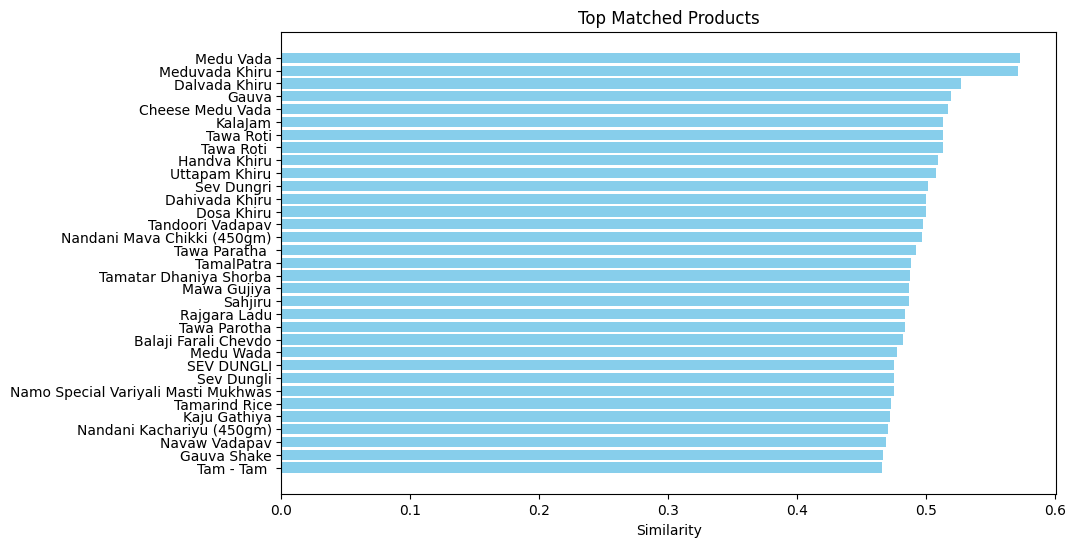

In [ ]:
# Visualization
top_n = 50  # Number of top products to visualize
top_similarities = [x[0] for x in similar_products[:top_n]]
top_titles = [df['title'][x[1]] for x in similar_products[:top_n]]

plt.figure(figsize=(10, 6))
plt.barh(top_titles, top_similarities, color='skyblue')
plt.xlabel('Similarity')
plt.title('Top Matched Products')
plt.gca().invert_yaxis()  # Highest similarity on top
plt.show()